USE 'pip install catboost' TO INSTALL CATBOOST 

In [1]:
# pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=a8bc38186913b889fa5698e06a75439dc4a23c3bea26b11460d86dd15e486667
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


## INTRODUCTION

“CatBoost” name comes from two words “Category” and “Boosting”.The library works well with multiple Categories of data, such as audio, text, image and is based on gradient boosting.

# Importing Libraries

In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.metrics import f1_score,classification_report

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#reading the data
data=pd.read_csv('Loan data cleaned.csv')

In [3]:
#shape of the data
data.shape

(4368, 64)

In [4]:
#first five rows of the data
data.head()

loannumber  loanamount  totaldue  termdays good_bad_flag bank_account_type  \
0          12     30000.0   34500.0        30          Good             Other   
1           2     15000.0   17250.0        30          Good           Savings   
2           7     20000.0   22250.0        15          Good             Other   
3           3     10000.0   11500.0        15          Good           Savings   
4           9     40000.0   44000.0        30          Good             Other   

   longitude_gps  latitude_gps bank_name_clients employment_status_clients  \
0       3.432010      6.433055      Diamond Bank                 Permanent   
1       3.885298      7.320700           GT Bank                 Permanent   
2      11.139350     10.292041           EcoBank                 Permanent   
3       3.985770      7.491708        First Bank                 Permanent   
4       7.457913      9.076574           GT Bank                 Permanent   

   ...  ploan_additional charges_50%_x  ploan_additional charges_75%_x  \
0  ...                     3800.000000                     4500.000000   
1  ...                     2665.558293                     3037.525723   
2  ...                     1500.000000                     1500.000000   
3  ...                     2250.000000                     2625.000000   
4  ...                     3800.000000                     5100.000000   

   ploan_additional charges_max_x  ploan_additional charges_mean_y  \
0                     4500.000000                      3900.000000   
1                     3543.851778                      2730.359972   
2                     3000.000000                      1750.000000   
3                     3000.000000                      2250.000000   
4                     9000.000000                      4800.000000   

   ploan_additional charges_min_y  ploan_additional charges_25%_y  \
0                     3000.000000                     3400.000000   
1                     2102.661161                     2364.738902   
2                     1500.000000                     1500.000000   
3                     1500.000000                     1875.000000   
4                     3000.000000                     3000.000000   

   ploan_additional charges_50%_y  ploan_additional charges_75%_y  \
0                     3800.000000                     4500.000000   
1                     2665.558293                     3037.525723   
2                     1500.000000                     1500.000000   
3                     2250.000000                     2625.000000   
4                     3800.000000                     5100.000000   

   ploan_additional charges_max_y  not_repaid_percentage  
0                     4500.000000              64.000000  
1                     3543.851778              63.573297  
2                     3000.000000              50.000000  
3                     3000.000000               0.000000  
4                     9000.000000             100.000000  

[5 rows x 64 columns]

In [5]:
#checking missing values in the data
data.isnull().sum()

loannumber                        0
loanamount                        0
totaldue                          0
termdays                          0
good_bad_flag                     0
                                 ..
ploan_additional charges_25%_y    0
ploan_additional charges_50%_y    0
ploan_additional charges_75%_y    0
ploan_additional charges_max_y    0
not_repaid_percentage             0
Length: 64, dtype: int64

In [6]:
data.columns

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'approval_time',
       'creationdate_dow', 'additional_charges', 'is_referred', 'age',
       'ploan_loanamount_mean', 'ploan_loanamount_min', 'ploan_loanamount_25%',
       'ploan_loanamount_50%', 'ploan_loanamount_75%', 'ploan_loanamount_max',
       'ploan_totaldue_mean', 'ploan_totaldue_min', 'ploan_totaldue_25%',
       'ploan_totaldue_50%', 'ploan_totaldue_75%', 'ploan_totaldue_max',
       'ploan_termdays_mean', 'ploan_termdays_min', 'ploan_termdays_25%',
       'ploan_termdays_50%', 'ploan_termdays_75%', 'ploan_termdays_max',
       'ploan_approval_time_mean', 'ploan_approval_time_min',
       'ploan_approval_time_25%', 'ploan_approval_time_50%',
       'ploan_approval_time_75%', 'ploan_approval_time_max',
       'ploan_return_days_mean', 'ploan_return_days_min',
       'ploan_return_da

In [7]:
data.dtypes

loannumber                          int64
loanamount                        float64
totaldue                          float64
termdays                            int64
good_bad_flag                      object
                                   ...   
ploan_additional charges_25%_y    float64
ploan_additional charges_50%_y    float64
ploan_additional charges_75%_y    float64
ploan_additional charges_max_y    float64
not_repaid_percentage             float64
Length: 64, dtype: object

In [8]:
cat_variables=['bank_account_type','bank_name_clients','employment_status_clients']

### Separating independent and dependent variables.

In [9]:
x = data.drop(['good_bad_flag'], axis=1)
y = data['good_bad_flag'].replace({'Good':0, 'Bad':1})

### Creating the train and test dataset

In [10]:
#import the train-test split
from sklearn.model_selection import train_test_split

In [11]:
#divide into train and test sets
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 101, stratify=y)

## LEARNING RATE

In [13]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = CatBoostClassifier(learning_rate=eta,random_state=101,eval_metric='F1',cat_features=cat_variables)
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    f1_train=f1_score(train_y,train_pred)
    f1_test=f1_score(test_y,test_pred)
    train_results.append(f1_train)
    test_results.append(f1_test)

0:	learn: 0.2237762	total: 23.3ms	remaining: 23.3s
1:	learn: 0.3109244	total: 45.6ms	remaining: 22.8s
2:	learn: 0.3350569	total: 60.6ms	remaining: 20.1s
3:	learn: 0.3276231	total: 75.7ms	remaining: 18.8s
4:	learn: 0.3619247	total: 90.5ms	remaining: 18s
5:	learn: 0.3824131	total: 104ms	remaining: 17.2s
6:	learn: 0.4023553	total: 119ms	remaining: 16.9s
7:	learn: 0.4284342	total: 132ms	remaining: 16.4s
8:	learn: 0.4335938	total: 147ms	remaining: 16.2s
9:	learn: 0.4826291	total: 166ms	remaining: 16.5s
10:	learn: 0.4972171	total: 181ms	remaining: 16.3s
11:	learn: 0.5014032	total: 194ms	remaining: 16s
12:	learn: 0.5409384	total: 209ms	remaining: 15.8s
13:	learn: 0.5716862	total: 225ms	remaining: 15.8s
14:	learn: 0.5782918	total: 243ms	remaining: 15.9s
15:	learn: 0.5828877	total: 259ms	remaining: 15.9s
16:	learn: 0.6126761	total: 277ms	remaining: 16s
17:	learn: 0.6161972	total: 293ms	remaining: 16s
18:	learn: 0.6180860	total: 309ms	remaining: 16s
19:	learn: 0.6330435	total: 323ms	remaining: 1

163:	learn: 1.0000000	total: 2.53s	remaining: 12.9s
164:	learn: 1.0000000	total: 2.54s	remaining: 12.9s
165:	learn: 1.0000000	total: 2.56s	remaining: 12.9s
166:	learn: 1.0000000	total: 2.57s	remaining: 12.8s
167:	learn: 1.0000000	total: 2.59s	remaining: 12.8s
168:	learn: 1.0000000	total: 2.6s	remaining: 12.8s
169:	learn: 1.0000000	total: 2.61s	remaining: 12.8s
170:	learn: 1.0000000	total: 2.63s	remaining: 12.7s
171:	learn: 1.0000000	total: 2.64s	remaining: 12.7s
172:	learn: 1.0000000	total: 2.65s	remaining: 12.7s
173:	learn: 1.0000000	total: 2.67s	remaining: 12.7s
174:	learn: 1.0000000	total: 2.68s	remaining: 12.7s
175:	learn: 1.0000000	total: 2.69s	remaining: 12.6s
176:	learn: 1.0000000	total: 2.71s	remaining: 12.6s
177:	learn: 1.0000000	total: 2.73s	remaining: 12.6s
178:	learn: 1.0000000	total: 2.74s	remaining: 12.6s
179:	learn: 1.0000000	total: 2.77s	remaining: 12.6s
180:	learn: 1.0000000	total: 2.78s	remaining: 12.6s
181:	learn: 1.0000000	total: 2.79s	remaining: 12.6s
182:	learn: 1

332:	learn: 1.0000000	total: 5.09s	remaining: 10.2s
333:	learn: 1.0000000	total: 5.1s	remaining: 10.2s
334:	learn: 1.0000000	total: 5.12s	remaining: 10.2s
335:	learn: 1.0000000	total: 5.13s	remaining: 10.1s
336:	learn: 1.0000000	total: 5.14s	remaining: 10.1s
337:	learn: 1.0000000	total: 5.15s	remaining: 10.1s
338:	learn: 1.0000000	total: 5.17s	remaining: 10.1s
339:	learn: 1.0000000	total: 5.18s	remaining: 10.1s
340:	learn: 1.0000000	total: 5.2s	remaining: 10s
341:	learn: 1.0000000	total: 5.21s	remaining: 10s
342:	learn: 1.0000000	total: 5.22s	remaining: 10s
343:	learn: 1.0000000	total: 5.23s	remaining: 9.98s
344:	learn: 1.0000000	total: 5.25s	remaining: 9.97s
345:	learn: 1.0000000	total: 5.26s	remaining: 9.95s
346:	learn: 1.0000000	total: 5.28s	remaining: 9.94s
347:	learn: 1.0000000	total: 5.29s	remaining: 9.92s
348:	learn: 1.0000000	total: 5.3s	remaining: 9.9s
349:	learn: 1.0000000	total: 5.32s	remaining: 9.87s
350:	learn: 1.0000000	total: 5.33s	remaining: 9.85s
351:	learn: 1.0000000	

500:	learn: 1.0000000	total: 7.18s	remaining: 7.15s
501:	learn: 1.0000000	total: 7.21s	remaining: 7.15s
502:	learn: 1.0000000	total: 7.23s	remaining: 7.14s
503:	learn: 1.0000000	total: 7.24s	remaining: 7.12s
504:	learn: 1.0000000	total: 7.25s	remaining: 7.11s
505:	learn: 1.0000000	total: 7.26s	remaining: 7.09s
506:	learn: 1.0000000	total: 7.28s	remaining: 7.08s
507:	learn: 1.0000000	total: 7.29s	remaining: 7.06s
508:	learn: 1.0000000	total: 7.3s	remaining: 7.05s
509:	learn: 1.0000000	total: 7.32s	remaining: 7.03s
510:	learn: 1.0000000	total: 7.33s	remaining: 7.01s
511:	learn: 1.0000000	total: 7.34s	remaining: 7s
512:	learn: 1.0000000	total: 7.36s	remaining: 6.99s
513:	learn: 1.0000000	total: 7.38s	remaining: 6.97s
514:	learn: 1.0000000	total: 7.39s	remaining: 6.96s
515:	learn: 1.0000000	total: 7.4s	remaining: 6.94s
516:	learn: 1.0000000	total: 7.42s	remaining: 6.93s
517:	learn: 1.0000000	total: 7.42s	remaining: 6.91s
518:	learn: 1.0000000	total: 7.44s	remaining: 6.89s
519:	learn: 1.000

664:	learn: 1.0000000	total: 9.28s	remaining: 4.68s
665:	learn: 1.0000000	total: 9.3s	remaining: 4.66s
666:	learn: 1.0000000	total: 9.31s	remaining: 4.65s
667:	learn: 1.0000000	total: 9.32s	remaining: 4.63s
668:	learn: 1.0000000	total: 9.34s	remaining: 4.62s
669:	learn: 1.0000000	total: 9.35s	remaining: 4.61s
670:	learn: 1.0000000	total: 9.37s	remaining: 4.59s
671:	learn: 1.0000000	total: 9.38s	remaining: 4.58s
672:	learn: 1.0000000	total: 9.39s	remaining: 4.56s
673:	learn: 1.0000000	total: 9.4s	remaining: 4.55s
674:	learn: 1.0000000	total: 9.42s	remaining: 4.53s
675:	learn: 1.0000000	total: 9.43s	remaining: 4.52s
676:	learn: 1.0000000	total: 9.45s	remaining: 4.51s
677:	learn: 1.0000000	total: 9.46s	remaining: 4.49s
678:	learn: 1.0000000	total: 9.47s	remaining: 4.48s
679:	learn: 1.0000000	total: 9.49s	remaining: 4.46s
680:	learn: 1.0000000	total: 9.49s	remaining: 4.45s
681:	learn: 1.0000000	total: 9.51s	remaining: 4.43s
682:	learn: 1.0000000	total: 9.52s	remaining: 4.42s
683:	learn: 1.

829:	learn: 1.0000000	total: 11.4s	remaining: 2.33s
830:	learn: 1.0000000	total: 11.4s	remaining: 2.31s
831:	learn: 1.0000000	total: 11.4s	remaining: 2.3s
832:	learn: 1.0000000	total: 11.4s	remaining: 2.28s
833:	learn: 1.0000000	total: 11.4s	remaining: 2.27s
834:	learn: 1.0000000	total: 11.4s	remaining: 2.25s
835:	learn: 1.0000000	total: 11.4s	remaining: 2.24s
836:	learn: 1.0000000	total: 11.4s	remaining: 2.23s
837:	learn: 1.0000000	total: 11.5s	remaining: 2.21s
838:	learn: 1.0000000	total: 11.5s	remaining: 2.2s
839:	learn: 1.0000000	total: 11.5s	remaining: 2.19s
840:	learn: 1.0000000	total: 11.5s	remaining: 2.17s
841:	learn: 1.0000000	total: 11.5s	remaining: 2.16s
842:	learn: 1.0000000	total: 11.5s	remaining: 2.14s
843:	learn: 1.0000000	total: 11.5s	remaining: 2.13s
844:	learn: 1.0000000	total: 11.5s	remaining: 2.12s
845:	learn: 1.0000000	total: 11.5s	remaining: 2.1s
846:	learn: 1.0000000	total: 11.6s	remaining: 2.09s
847:	learn: 1.0000000	total: 11.6s	remaining: 2.07s
848:	learn: 1.0

989:	learn: 1.0000000	total: 13.5s	remaining: 136ms
990:	learn: 1.0000000	total: 13.5s	remaining: 122ms
991:	learn: 1.0000000	total: 13.5s	remaining: 109ms
992:	learn: 1.0000000	total: 13.5s	remaining: 95.2ms
993:	learn: 1.0000000	total: 13.5s	remaining: 81.6ms
994:	learn: 1.0000000	total: 13.5s	remaining: 68ms
995:	learn: 1.0000000	total: 13.5s	remaining: 54.4ms
996:	learn: 1.0000000	total: 13.6s	remaining: 40.8ms
997:	learn: 1.0000000	total: 13.6s	remaining: 27.2ms
998:	learn: 1.0000000	total: 13.6s	remaining: 13.6ms
999:	learn: 1.0000000	total: 13.6s	remaining: 0us
0:	learn: 0.2237762	total: 16.1ms	remaining: 16.1s
1:	learn: 0.2860286	total: 31.8ms	remaining: 15.8s
2:	learn: 0.2984749	total: 47.6ms	remaining: 15.8s
3:	learn: 0.3003264	total: 61.1ms	remaining: 15.2s
4:	learn: 0.3058568	total: 75.9ms	remaining: 15.1s
5:	learn: 0.3164693	total: 81.8ms	remaining: 13.6s
6:	learn: 0.3301179	total: 95.1ms	remaining: 13.5s
7:	learn: 0.3333333	total: 110ms	remaining: 13.6s
8:	learn: 0.350104

160:	learn: 0.9814815	total: 2.37s	remaining: 12.3s
161:	learn: 0.9836532	total: 2.39s	remaining: 12.4s
162:	learn: 0.9836532	total: 2.4s	remaining: 12.3s
163:	learn: 0.9829303	total: 2.42s	remaining: 12.3s
164:	learn: 0.9836532	total: 2.43s	remaining: 12.3s
165:	learn: 0.9843750	total: 2.45s	remaining: 12.3s
166:	learn: 0.9858156	total: 2.46s	remaining: 12.3s
167:	learn: 0.9858156	total: 2.48s	remaining: 12.3s
168:	learn: 0.9865344	total: 2.49s	remaining: 12.3s
169:	learn: 0.9865344	total: 2.51s	remaining: 12.2s
170:	learn: 0.9829545	total: 2.52s	remaining: 12.2s
171:	learn: 0.9843750	total: 2.53s	remaining: 12.2s
172:	learn: 0.9836764	total: 2.54s	remaining: 12.2s
173:	learn: 0.9858357	total: 2.56s	remaining: 12.2s
174:	learn: 0.9887006	total: 2.58s	remaining: 12.1s
175:	learn: 0.9893843	total: 2.59s	remaining: 12.1s
176:	learn: 0.9900990	total: 2.6s	remaining: 12.1s
177:	learn: 0.9893843	total: 2.62s	remaining: 12.1s
178:	learn: 0.9886846	total: 2.63s	remaining: 12.1s
179:	learn: 0.

321:	learn: 1.0000000	total: 4.74s	remaining: 9.97s
322:	learn: 1.0000000	total: 4.75s	remaining: 9.96s
323:	learn: 1.0000000	total: 4.76s	remaining: 9.94s
324:	learn: 1.0000000	total: 4.79s	remaining: 9.94s
325:	learn: 1.0000000	total: 4.8s	remaining: 9.93s
326:	learn: 1.0000000	total: 4.82s	remaining: 9.91s
327:	learn: 1.0000000	total: 4.83s	remaining: 9.89s
328:	learn: 1.0000000	total: 4.84s	remaining: 9.87s
329:	learn: 1.0000000	total: 4.86s	remaining: 9.86s
330:	learn: 1.0000000	total: 4.87s	remaining: 9.84s
331:	learn: 1.0000000	total: 4.88s	remaining: 9.83s
332:	learn: 1.0000000	total: 4.9s	remaining: 9.81s
333:	learn: 1.0000000	total: 4.91s	remaining: 9.79s
334:	learn: 1.0000000	total: 4.92s	remaining: 9.78s
335:	learn: 1.0000000	total: 4.93s	remaining: 9.75s
336:	learn: 1.0000000	total: 4.95s	remaining: 9.73s
337:	learn: 1.0000000	total: 4.96s	remaining: 9.72s
338:	learn: 1.0000000	total: 4.97s	remaining: 9.7s
339:	learn: 1.0000000	total: 4.99s	remaining: 9.68s
340:	learn: 1.0

483:	learn: 1.0000000	total: 7.21s	remaining: 7.68s
484:	learn: 1.0000000	total: 7.22s	remaining: 7.67s
485:	learn: 1.0000000	total: 7.24s	remaining: 7.65s
486:	learn: 1.0000000	total: 7.25s	remaining: 7.64s
487:	learn: 1.0000000	total: 7.27s	remaining: 7.62s
488:	learn: 1.0000000	total: 7.28s	remaining: 7.61s
489:	learn: 1.0000000	total: 7.3s	remaining: 7.6s
490:	learn: 1.0000000	total: 7.31s	remaining: 7.58s
491:	learn: 1.0000000	total: 7.33s	remaining: 7.56s
492:	learn: 1.0000000	total: 7.34s	remaining: 7.55s
493:	learn: 1.0000000	total: 7.35s	remaining: 7.53s
494:	learn: 1.0000000	total: 7.37s	remaining: 7.52s
495:	learn: 1.0000000	total: 7.38s	remaining: 7.5s
496:	learn: 1.0000000	total: 7.39s	remaining: 7.48s
497:	learn: 1.0000000	total: 7.41s	remaining: 7.47s
498:	learn: 1.0000000	total: 7.42s	remaining: 7.45s
499:	learn: 1.0000000	total: 7.43s	remaining: 7.43s
500:	learn: 1.0000000	total: 7.44s	remaining: 7.41s
501:	learn: 1.0000000	total: 7.46s	remaining: 7.4s
502:	learn: 1.00

645:	learn: 1.0000000	total: 9.35s	remaining: 5.12s
646:	learn: 1.0000000	total: 9.37s	remaining: 5.11s
647:	learn: 1.0000000	total: 9.38s	remaining: 5.1s
648:	learn: 1.0000000	total: 9.39s	remaining: 5.08s
649:	learn: 1.0000000	total: 9.41s	remaining: 5.07s
650:	learn: 1.0000000	total: 9.42s	remaining: 5.05s
651:	learn: 1.0000000	total: 9.44s	remaining: 5.04s
652:	learn: 1.0000000	total: 9.45s	remaining: 5.02s
653:	learn: 1.0000000	total: 9.46s	remaining: 5.01s
654:	learn: 1.0000000	total: 9.48s	remaining: 4.99s
655:	learn: 1.0000000	total: 9.49s	remaining: 4.98s
656:	learn: 1.0000000	total: 9.5s	remaining: 4.96s
657:	learn: 1.0000000	total: 9.52s	remaining: 4.95s
658:	learn: 1.0000000	total: 9.53s	remaining: 4.93s
659:	learn: 1.0000000	total: 9.55s	remaining: 4.92s
660:	learn: 1.0000000	total: 9.56s	remaining: 4.9s
661:	learn: 1.0000000	total: 9.57s	remaining: 4.89s
662:	learn: 1.0000000	total: 9.59s	remaining: 4.87s
663:	learn: 1.0000000	total: 9.6s	remaining: 4.86s
664:	learn: 1.00

808:	learn: 1.0000000	total: 11.6s	remaining: 2.75s
809:	learn: 1.0000000	total: 11.7s	remaining: 2.74s
810:	learn: 1.0000000	total: 11.7s	remaining: 2.72s
811:	learn: 1.0000000	total: 11.7s	remaining: 2.71s
812:	learn: 1.0000000	total: 11.7s	remaining: 2.69s
813:	learn: 1.0000000	total: 11.7s	remaining: 2.68s
814:	learn: 1.0000000	total: 11.7s	remaining: 2.66s
815:	learn: 1.0000000	total: 11.7s	remaining: 2.65s
816:	learn: 1.0000000	total: 11.7s	remaining: 2.63s
817:	learn: 1.0000000	total: 11.8s	remaining: 2.62s
818:	learn: 1.0000000	total: 11.8s	remaining: 2.6s
819:	learn: 1.0000000	total: 11.8s	remaining: 2.58s
820:	learn: 1.0000000	total: 11.8s	remaining: 2.57s
821:	learn: 1.0000000	total: 11.8s	remaining: 2.56s
822:	learn: 1.0000000	total: 11.8s	remaining: 2.54s
823:	learn: 1.0000000	total: 11.8s	remaining: 2.52s
824:	learn: 1.0000000	total: 11.8s	remaining: 2.51s
825:	learn: 1.0000000	total: 11.8s	remaining: 2.49s
826:	learn: 1.0000000	total: 11.8s	remaining: 2.48s
827:	learn: 1

978:	learn: 1.0000000	total: 13.8s	remaining: 295ms
979:	learn: 1.0000000	total: 13.8s	remaining: 281ms
980:	learn: 1.0000000	total: 13.8s	remaining: 267ms
981:	learn: 1.0000000	total: 13.8s	remaining: 253ms
982:	learn: 1.0000000	total: 13.8s	remaining: 239ms
983:	learn: 1.0000000	total: 13.8s	remaining: 225ms
984:	learn: 1.0000000	total: 13.8s	remaining: 211ms
985:	learn: 1.0000000	total: 13.9s	remaining: 197ms
986:	learn: 1.0000000	total: 13.9s	remaining: 183ms
987:	learn: 1.0000000	total: 13.9s	remaining: 169ms
988:	learn: 1.0000000	total: 13.9s	remaining: 155ms
989:	learn: 1.0000000	total: 13.9s	remaining: 141ms
990:	learn: 1.0000000	total: 13.9s	remaining: 126ms
991:	learn: 1.0000000	total: 13.9s	remaining: 112ms
992:	learn: 1.0000000	total: 14s	remaining: 98.4ms
993:	learn: 1.0000000	total: 14s	remaining: 84.3ms
994:	learn: 1.0000000	total: 14s	remaining: 70.2ms
995:	learn: 1.0000000	total: 14s	remaining: 56.2ms
996:	learn: 1.0000000	total: 14s	remaining: 42.1ms
997:	learn: 1.000

147:	learn: 0.8668243	total: 2.17s	remaining: 12.5s
148:	learn: 0.8643533	total: 2.19s	remaining: 12.5s
149:	learn: 0.8643533	total: 2.2s	remaining: 12.5s
150:	learn: 0.8688138	total: 2.21s	remaining: 12.5s
151:	learn: 0.8688138	total: 2.23s	remaining: 12.4s
152:	learn: 0.8697017	total: 2.24s	remaining: 12.4s
153:	learn: 0.8688138	total: 2.26s	remaining: 12.4s
154:	learn: 0.8697017	total: 2.27s	remaining: 12.4s
155:	learn: 0.8705882	total: 2.29s	remaining: 12.4s
156:	learn: 0.8714734	total: 2.3s	remaining: 12.4s
157:	learn: 0.8741204	total: 2.32s	remaining: 12.4s
158:	learn: 0.8741204	total: 2.33s	remaining: 12.3s
159:	learn: 0.8737255	total: 2.35s	remaining: 12.3s
160:	learn: 0.8737255	total: 2.36s	remaining: 12.3s
161:	learn: 0.8737255	total: 2.38s	remaining: 12.3s
162:	learn: 0.8737255	total: 2.39s	remaining: 12.3s
163:	learn: 0.8746082	total: 2.41s	remaining: 12.3s
164:	learn: 0.8763693	total: 2.42s	remaining: 12.2s
165:	learn: 0.8772478	total: 2.44s	remaining: 12.2s
166:	learn: 0.

313:	learn: 0.9829060	total: 4.71s	remaining: 10.3s
314:	learn: 0.9843528	total: 4.73s	remaining: 10.3s
315:	learn: 0.9850746	total: 4.75s	remaining: 10.3s
316:	learn: 0.9850746	total: 4.76s	remaining: 10.3s
317:	learn: 0.9850746	total: 4.79s	remaining: 10.3s
318:	learn: 0.9850746	total: 4.81s	remaining: 10.3s
319:	learn: 0.9850746	total: 4.83s	remaining: 10.3s
320:	learn: 0.9857955	total: 4.85s	remaining: 10.3s
321:	learn: 0.9857955	total: 4.87s	remaining: 10.3s
322:	learn: 0.9865153	total: 4.93s	remaining: 10.3s
323:	learn: 0.9865153	total: 4.95s	remaining: 10.3s
324:	learn: 0.9872340	total: 4.96s	remaining: 10.3s
325:	learn: 0.9857955	total: 4.98s	remaining: 10.3s
326:	learn: 0.9865153	total: 4.99s	remaining: 10.3s
327:	learn: 0.9872340	total: 5.01s	remaining: 10.3s
328:	learn: 0.9872340	total: 5.02s	remaining: 10.2s
329:	learn: 0.9872340	total: 5.04s	remaining: 10.2s
330:	learn: 0.9872340	total: 5.05s	remaining: 10.2s
331:	learn: 0.9872340	total: 5.07s	remaining: 10.2s
332:	learn: 

480:	learn: 0.9992992	total: 7.39s	remaining: 7.98s
481:	learn: 0.9992992	total: 7.41s	remaining: 7.96s
482:	learn: 0.9992992	total: 7.42s	remaining: 7.95s
483:	learn: 0.9992992	total: 7.44s	remaining: 7.93s
484:	learn: 0.9992992	total: 7.45s	remaining: 7.91s
485:	learn: 0.9992992	total: 7.48s	remaining: 7.91s
486:	learn: 0.9992992	total: 7.5s	remaining: 7.9s
487:	learn: 0.9992992	total: 7.51s	remaining: 7.88s
488:	learn: 0.9992992	total: 7.53s	remaining: 7.87s
489:	learn: 0.9992992	total: 7.54s	remaining: 7.85s
490:	learn: 0.9992992	total: 7.56s	remaining: 7.84s
491:	learn: 0.9992992	total: 7.58s	remaining: 7.82s
492:	learn: 0.9992992	total: 7.59s	remaining: 7.81s
493:	learn: 0.9992992	total: 7.6s	remaining: 7.79s
494:	learn: 0.9992992	total: 7.62s	remaining: 7.77s
495:	learn: 0.9992992	total: 7.63s	remaining: 7.75s
496:	learn: 0.9992992	total: 7.64s	remaining: 7.73s
497:	learn: 0.9992992	total: 7.66s	remaining: 7.72s
498:	learn: 0.9992992	total: 7.67s	remaining: 7.7s
499:	learn: 0.99

641:	learn: 1.0000000	total: 9.9s	remaining: 5.52s
642:	learn: 1.0000000	total: 9.92s	remaining: 5.51s
643:	learn: 1.0000000	total: 9.94s	remaining: 5.49s
644:	learn: 1.0000000	total: 9.95s	remaining: 5.48s
645:	learn: 1.0000000	total: 9.97s	remaining: 5.46s
646:	learn: 1.0000000	total: 9.99s	remaining: 5.45s
647:	learn: 1.0000000	total: 10s	remaining: 5.44s
648:	learn: 1.0000000	total: 10s	remaining: 5.42s
649:	learn: 1.0000000	total: 10s	remaining: 5.41s
650:	learn: 1.0000000	total: 10.1s	remaining: 5.39s
651:	learn: 1.0000000	total: 10.1s	remaining: 5.38s
652:	learn: 1.0000000	total: 10.1s	remaining: 5.36s
653:	learn: 1.0000000	total: 10.1s	remaining: 5.34s
654:	learn: 1.0000000	total: 10.1s	remaining: 5.34s
655:	learn: 1.0000000	total: 10.2s	remaining: 5.32s
656:	learn: 1.0000000	total: 10.2s	remaining: 5.31s
657:	learn: 1.0000000	total: 10.2s	remaining: 5.29s
658:	learn: 1.0000000	total: 10.2s	remaining: 5.27s
659:	learn: 1.0000000	total: 10.2s	remaining: 5.26s
660:	learn: 1.00000

810:	learn: 1.0000000	total: 12.6s	remaining: 2.93s
811:	learn: 1.0000000	total: 12.6s	remaining: 2.92s
812:	learn: 1.0000000	total: 12.6s	remaining: 2.9s
813:	learn: 1.0000000	total: 12.6s	remaining: 2.88s
814:	learn: 1.0000000	total: 12.6s	remaining: 2.87s
815:	learn: 1.0000000	total: 12.7s	remaining: 2.85s
816:	learn: 1.0000000	total: 12.7s	remaining: 2.84s
817:	learn: 1.0000000	total: 12.7s	remaining: 2.82s
818:	learn: 1.0000000	total: 12.7s	remaining: 2.81s
819:	learn: 1.0000000	total: 12.7s	remaining: 2.79s
820:	learn: 1.0000000	total: 12.7s	remaining: 2.77s
821:	learn: 1.0000000	total: 12.8s	remaining: 2.76s
822:	learn: 1.0000000	total: 12.8s	remaining: 2.75s
823:	learn: 1.0000000	total: 12.8s	remaining: 2.73s
824:	learn: 1.0000000	total: 12.8s	remaining: 2.71s
825:	learn: 1.0000000	total: 12.8s	remaining: 2.7s
826:	learn: 1.0000000	total: 12.8s	remaining: 2.68s
827:	learn: 1.0000000	total: 12.8s	remaining: 2.67s
828:	learn: 1.0000000	total: 12.9s	remaining: 2.65s
829:	learn: 1.

975:	learn: 1.0000000	total: 15.1s	remaining: 372ms
976:	learn: 1.0000000	total: 15.1s	remaining: 356ms
977:	learn: 1.0000000	total: 15.1s	remaining: 341ms
978:	learn: 1.0000000	total: 15.2s	remaining: 325ms
979:	learn: 1.0000000	total: 15.2s	remaining: 310ms
980:	learn: 1.0000000	total: 15.2s	remaining: 294ms
981:	learn: 1.0000000	total: 15.2s	remaining: 279ms
982:	learn: 1.0000000	total: 15.2s	remaining: 263ms
983:	learn: 1.0000000	total: 15.2s	remaining: 248ms
984:	learn: 1.0000000	total: 15.3s	remaining: 232ms
985:	learn: 1.0000000	total: 15.3s	remaining: 217ms
986:	learn: 1.0000000	total: 15.3s	remaining: 201ms
987:	learn: 1.0000000	total: 15.3s	remaining: 186ms
988:	learn: 1.0000000	total: 15.3s	remaining: 170ms
989:	learn: 1.0000000	total: 15.3s	remaining: 155ms
990:	learn: 1.0000000	total: 15.4s	remaining: 139ms
991:	learn: 1.0000000	total: 15.4s	remaining: 124ms
992:	learn: 1.0000000	total: 15.4s	remaining: 109ms
993:	learn: 1.0000000	total: 15.4s	remaining: 93.1ms
994:	learn:

140:	learn: 0.5502439	total: 2.18s	remaining: 13.3s
141:	learn: 0.5509214	total: 2.19s	remaining: 13.3s
142:	learn: 0.5556631	total: 2.21s	remaining: 13.2s
143:	learn: 0.5564202	total: 2.23s	remaining: 13.2s
144:	learn: 0.5564202	total: 2.24s	remaining: 13.2s
145:	learn: 0.5564202	total: 2.25s	remaining: 13.2s
146:	learn: 0.5592233	total: 2.27s	remaining: 13.2s
147:	learn: 0.5606208	total: 2.28s	remaining: 13.1s
148:	learn: 0.5603113	total: 2.29s	remaining: 13.1s
149:	learn: 0.5636540	total: 2.31s	remaining: 13.1s
150:	learn: 0.5678295	total: 2.32s	remaining: 13s
151:	learn: 0.5664403	total: 2.33s	remaining: 13s
152:	learn: 0.5719807	total: 2.35s	remaining: 13s
153:	learn: 0.5719807	total: 2.36s	remaining: 13s
154:	learn: 0.5719807	total: 2.37s	remaining: 12.9s
155:	learn: 0.5741811	total: 2.39s	remaining: 12.9s
156:	learn: 0.5750000	total: 2.42s	remaining: 13s
157:	learn: 0.5831740	total: 2.43s	remaining: 13s
158:	learn: 0.5818182	total: 2.45s	remaining: 13s
159:	learn: 0.5845272	tota

301:	learn: 0.7825357	total: 4.67s	remaining: 10.8s
302:	learn: 0.7835570	total: 4.68s	remaining: 10.8s
303:	learn: 0.7845767	total: 4.7s	remaining: 10.8s
304:	learn: 0.7862531	total: 4.72s	remaining: 10.8s
305:	learn: 0.7872697	total: 4.74s	remaining: 10.7s
306:	learn: 0.7882845	total: 4.75s	remaining: 10.7s
307:	learn: 0.7882845	total: 4.76s	remaining: 10.7s
308:	learn: 0.7882845	total: 4.78s	remaining: 10.7s
309:	learn: 0.7892977	total: 4.79s	remaining: 10.7s
310:	learn: 0.7892977	total: 4.8s	remaining: 10.6s
311:	learn: 0.7892977	total: 4.82s	remaining: 10.6s
312:	learn: 0.7913189	total: 4.83s	remaining: 10.6s
313:	learn: 0.7913189	total: 4.85s	remaining: 10.6s
314:	learn: 0.7933333	total: 4.87s	remaining: 10.6s
315:	learn: 0.7950000	total: 4.88s	remaining: 10.6s
316:	learn: 0.7960033	total: 4.89s	remaining: 10.5s
317:	learn: 0.7953216	total: 4.91s	remaining: 10.5s
318:	learn: 0.7993339	total: 4.93s	remaining: 10.5s
319:	learn: 0.8003328	total: 4.94s	remaining: 10.5s
320:	learn: 0.

461:	learn: 0.9029794	total: 7.17s	remaining: 8.35s
462:	learn: 0.9029794	total: 7.18s	remaining: 8.33s
463:	learn: 0.9029794	total: 7.2s	remaining: 8.31s
464:	learn: 0.9029794	total: 7.21s	remaining: 8.3s
465:	learn: 0.9038168	total: 7.23s	remaining: 8.28s
466:	learn: 0.9054878	total: 7.24s	remaining: 8.26s
467:	learn: 0.9054878	total: 7.25s	remaining: 8.24s
468:	learn: 0.9046529	total: 7.27s	remaining: 8.23s
469:	learn: 0.9054878	total: 7.28s	remaining: 8.21s
470:	learn: 0.9054878	total: 7.3s	remaining: 8.19s
471:	learn: 0.9046529	total: 7.31s	remaining: 8.18s
472:	learn: 0.9046529	total: 7.32s	remaining: 8.16s
473:	learn: 0.9046529	total: 7.34s	remaining: 8.14s
474:	learn: 0.9046529	total: 7.36s	remaining: 8.13s
475:	learn: 0.9046529	total: 7.4s	remaining: 8.15s
476:	learn: 0.9046529	total: 7.41s	remaining: 8.13s
477:	learn: 0.9046529	total: 7.43s	remaining: 8.11s
478:	learn: 0.9046529	total: 7.44s	remaining: 8.1s
479:	learn: 0.9046529	total: 7.46s	remaining: 8.08s
480:	learn: 0.904

628:	learn: 0.9584851	total: 9.75s	remaining: 5.75s
629:	learn: 0.9584851	total: 9.77s	remaining: 5.74s
630:	learn: 0.9592431	total: 9.79s	remaining: 5.72s
631:	learn: 0.9592431	total: 9.8s	remaining: 5.71s
632:	learn: 0.9592431	total: 9.82s	remaining: 5.69s
633:	learn: 0.9600000	total: 9.83s	remaining: 5.67s
634:	learn: 0.9600000	total: 9.84s	remaining: 5.66s
635:	learn: 0.9600000	total: 9.85s	remaining: 5.64s
636:	learn: 0.9606987	total: 9.87s	remaining: 5.62s
637:	learn: 0.9606987	total: 9.88s	remaining: 5.61s
638:	learn: 0.9606987	total: 9.9s	remaining: 5.59s
639:	learn: 0.9606987	total: 9.91s	remaining: 5.58s
640:	learn: 0.9629630	total: 9.93s	remaining: 5.56s
641:	learn: 0.9629630	total: 9.94s	remaining: 5.54s
642:	learn: 0.9615105	total: 9.96s	remaining: 5.53s
643:	learn: 0.9615105	total: 9.97s	remaining: 5.51s
644:	learn: 0.9615105	total: 9.99s	remaining: 5.5s
645:	learn: 0.9615105	total: 10s	remaining: 5.48s
646:	learn: 0.9622642	total: 10s	remaining: 5.46s
647:	learn: 0.96301

794:	learn: 0.9814551	total: 12.3s	remaining: 3.18s
795:	learn: 0.9821810	total: 12.3s	remaining: 3.16s
796:	learn: 0.9821810	total: 12.4s	remaining: 3.15s
797:	learn: 0.9821810	total: 12.4s	remaining: 3.13s
798:	learn: 0.9821810	total: 12.4s	remaining: 3.12s
799:	learn: 0.9821810	total: 12.4s	remaining: 3.1s
800:	learn: 0.9821810	total: 12.4s	remaining: 3.08s
801:	learn: 0.9829060	total: 12.4s	remaining: 3.07s
802:	learn: 0.9821810	total: 12.4s	remaining: 3.05s
803:	learn: 0.9829060	total: 12.5s	remaining: 3.04s
804:	learn: 0.9836299	total: 12.5s	remaining: 3.02s
805:	learn: 0.9836299	total: 12.5s	remaining: 3.01s
806:	learn: 0.9836299	total: 12.5s	remaining: 3s
807:	learn: 0.9836299	total: 12.5s	remaining: 2.98s
808:	learn: 0.9836299	total: 12.6s	remaining: 2.96s
809:	learn: 0.9836299	total: 12.6s	remaining: 2.95s
810:	learn: 0.9836299	total: 12.6s	remaining: 2.93s
811:	learn: 0.9836299	total: 12.6s	remaining: 2.92s
812:	learn: 0.9836299	total: 12.6s	remaining: 2.9s
813:	learn: 0.983

953:	learn: 0.9929478	total: 14.8s	remaining: 713ms
954:	learn: 0.9922371	total: 14.8s	remaining: 697ms
955:	learn: 0.9929478	total: 14.8s	remaining: 682ms
956:	learn: 0.9929478	total: 14.8s	remaining: 666ms
957:	learn: 0.9936575	total: 14.8s	remaining: 651ms
958:	learn: 0.9936575	total: 14.9s	remaining: 635ms
959:	learn: 0.9929478	total: 14.9s	remaining: 619ms
960:	learn: 0.9929478	total: 14.9s	remaining: 604ms
961:	learn: 0.9929478	total: 14.9s	remaining: 588ms
962:	learn: 0.9929478	total: 14.9s	remaining: 573ms
963:	learn: 0.9929478	total: 14.9s	remaining: 557ms
964:	learn: 0.9929478	total: 14.9s	remaining: 542ms
965:	learn: 0.9929478	total: 15s	remaining: 526ms
966:	learn: 0.9929478	total: 15s	remaining: 511ms
967:	learn: 0.9929478	total: 15s	remaining: 495ms
968:	learn: 0.9929478	total: 15s	remaining: 480ms
969:	learn: 0.9929478	total: 15s	remaining: 464ms
970:	learn: 0.9936575	total: 15s	remaining: 449ms
971:	learn: 0.9936575	total: 15s	remaining: 433ms
972:	learn: 0.9936575	tota

127:	learn: 0.3907563	total: 1.98s	remaining: 13.5s
128:	learn: 0.3907563	total: 2s	remaining: 13.5s
129:	learn: 0.3890641	total: 2.01s	remaining: 13.4s
130:	learn: 0.3907563	total: 2.02s	remaining: 13.4s
131:	learn: 0.3907563	total: 2.04s	remaining: 13.4s
132:	learn: 0.3907563	total: 2.05s	remaining: 13.4s
133:	learn: 0.3911672	total: 2.07s	remaining: 13.4s
134:	learn: 0.3966422	total: 2.08s	remaining: 13.3s
135:	learn: 0.3991597	total: 2.09s	remaining: 13.3s
136:	learn: 0.3949580	total: 2.11s	remaining: 13.3s
137:	learn: 0.3966422	total: 2.12s	remaining: 13.3s
138:	learn: 0.3966422	total: 2.13s	remaining: 13.2s
139:	learn: 0.3966422	total: 2.15s	remaining: 13.2s
140:	learn: 0.3962264	total: 2.16s	remaining: 13.2s
141:	learn: 0.3995816	total: 2.18s	remaining: 13.2s
142:	learn: 0.4012539	total: 2.19s	remaining: 13.1s
143:	learn: 0.4012539	total: 2.21s	remaining: 13.1s
144:	learn: 0.4029228	total: 2.22s	remaining: 13.1s
145:	learn: 0.4020942	total: 2.23s	remaining: 13.1s
146:	learn: 0.4

299:	learn: 0.5780347	total: 4.52s	remaining: 10.6s
300:	learn: 0.5802113	total: 4.54s	remaining: 10.6s
301:	learn: 0.5826923	total: 4.56s	remaining: 10.5s
302:	learn: 0.5834933	total: 4.58s	remaining: 10.5s
303:	learn: 0.5842912	total: 4.59s	remaining: 10.5s
304:	learn: 0.5856459	total: 4.6s	remaining: 10.5s
305:	learn: 0.5856459	total: 4.62s	remaining: 10.5s
306:	learn: 0.5869981	total: 4.63s	remaining: 10.5s
307:	learn: 0.5869981	total: 4.65s	remaining: 10.4s
308:	learn: 0.5869981	total: 4.66s	remaining: 10.4s
309:	learn: 0.5896947	total: 4.67s	remaining: 10.4s
310:	learn: 0.5896947	total: 4.69s	remaining: 10.4s
311:	learn: 0.5923810	total: 4.71s	remaining: 10.4s
312:	learn: 0.5918173	total: 4.72s	remaining: 10.4s
313:	learn: 0.5931559	total: 4.75s	remaining: 10.4s
314:	learn: 0.5948522	total: 4.77s	remaining: 10.4s
315:	learn: 0.5948522	total: 4.78s	remaining: 10.3s
316:	learn: 0.5956232	total: 4.79s	remaining: 10.3s
317:	learn: 0.6009479	total: 4.81s	remaining: 10.3s
318:	learn: 0

468:	learn: 0.7066190	total: 7.11s	remaining: 8.05s
469:	learn: 0.7066190	total: 7.13s	remaining: 8.04s
470:	learn: 0.7077748	total: 7.14s	remaining: 8.02s
471:	learn: 0.7089286	total: 7.16s	remaining: 8.01s
472:	learn: 0.7100803	total: 7.17s	remaining: 7.99s
473:	learn: 0.7112299	total: 7.19s	remaining: 7.98s
474:	learn: 0.7112299	total: 7.2s	remaining: 7.96s
475:	learn: 0.7100803	total: 7.22s	remaining: 7.95s
476:	learn: 0.7118644	total: 7.23s	remaining: 7.93s
477:	learn: 0.7130125	total: 7.25s	remaining: 7.92s
478:	learn: 0.7141585	total: 7.26s	remaining: 7.9s
479:	learn: 0.7175844	total: 7.28s	remaining: 7.88s
480:	learn: 0.7164444	total: 7.29s	remaining: 7.87s
481:	learn: 0.7175844	total: 7.31s	remaining: 7.85s
482:	learn: 0.7187223	total: 7.32s	remaining: 7.84s
483:	learn: 0.7187223	total: 7.34s	remaining: 7.83s
484:	learn: 0.7198582	total: 7.36s	remaining: 7.81s
485:	learn: 0.7221239	total: 7.37s	remaining: 7.8s
486:	learn: 0.7266314	total: 7.39s	remaining: 7.78s
487:	learn: 0.7

636:	learn: 0.8096426	total: 9.66s	remaining: 5.51s
637:	learn: 0.8086522	total: 9.68s	remaining: 5.49s
638:	learn: 0.8096426	total: 9.69s	remaining: 5.47s
639:	learn: 0.8116183	total: 9.71s	remaining: 5.46s
640:	learn: 0.8116183	total: 9.72s	remaining: 5.44s
641:	learn: 0.8126036	total: 9.74s	remaining: 5.43s
642:	learn: 0.8126036	total: 9.75s	remaining: 5.41s
643:	learn: 0.8145695	total: 9.77s	remaining: 5.4s
644:	learn: 0.8135874	total: 9.78s	remaining: 5.38s
645:	learn: 0.8145695	total: 9.8s	remaining: 5.37s
646:	learn: 0.8145695	total: 9.81s	remaining: 5.35s
647:	learn: 0.8155500	total: 9.82s	remaining: 5.34s
648:	learn: 0.8155500	total: 9.84s	remaining: 5.32s
649:	learn: 0.8165289	total: 9.86s	remaining: 5.31s
650:	learn: 0.8165289	total: 9.87s	remaining: 5.29s
651:	learn: 0.8165289	total: 9.89s	remaining: 5.28s
652:	learn: 0.8165289	total: 9.9s	remaining: 5.26s
653:	learn: 0.8155500	total: 9.92s	remaining: 5.25s
654:	learn: 0.8155500	total: 9.93s	remaining: 5.23s
655:	learn: 0.8

799:	learn: 0.8672986	total: 12.2s	remaining: 3.06s
800:	learn: 0.8672986	total: 12.2s	remaining: 3.04s
801:	learn: 0.8672986	total: 12.3s	remaining: 3.02s
802:	learn: 0.8672986	total: 12.3s	remaining: 3.01s
803:	learn: 0.8655063	total: 12.3s	remaining: 2.99s
804:	learn: 0.8664032	total: 12.3s	remaining: 2.98s
805:	learn: 0.8664032	total: 12.3s	remaining: 2.96s
806:	learn: 0.8672986	total: 12.3s	remaining: 2.95s
807:	learn: 0.8672986	total: 12.3s	remaining: 2.93s
808:	learn: 0.8681926	total: 12.4s	remaining: 2.92s
809:	learn: 0.8690852	total: 12.4s	remaining: 2.9s
810:	learn: 0.8690852	total: 12.4s	remaining: 2.89s
811:	learn: 0.8699764	total: 12.4s	remaining: 2.87s
812:	learn: 0.8708661	total: 12.4s	remaining: 2.86s
813:	learn: 0.8708661	total: 12.4s	remaining: 2.84s
814:	learn: 0.8708661	total: 12.5s	remaining: 2.83s
815:	learn: 0.8726415	total: 12.5s	remaining: 2.81s
816:	learn: 0.8726415	total: 12.5s	remaining: 2.79s
817:	learn: 0.8735271	total: 12.5s	remaining: 2.78s
818:	learn: 0

959:	learn: 0.9082569	total: 14.6s	remaining: 609ms
960:	learn: 0.9090909	total: 14.7s	remaining: 595ms
961:	learn: 0.9090909	total: 14.7s	remaining: 579ms
962:	learn: 0.9090909	total: 14.7s	remaining: 564ms
963:	learn: 0.9090909	total: 14.7s	remaining: 549ms
964:	learn: 0.9082569	total: 14.7s	remaining: 533ms
965:	learn: 0.9090909	total: 14.7s	remaining: 518ms
966:	learn: 0.9082569	total: 14.7s	remaining: 503ms
967:	learn: 0.9082569	total: 14.7s	remaining: 488ms
968:	learn: 0.9090909	total: 14.8s	remaining: 472ms
969:	learn: 0.9090909	total: 14.8s	remaining: 457ms
970:	learn: 0.9107551	total: 14.8s	remaining: 442ms
971:	learn: 0.9107551	total: 14.8s	remaining: 427ms
972:	learn: 0.9107551	total: 14.8s	remaining: 411ms
973:	learn: 0.9107551	total: 14.8s	remaining: 396ms
974:	learn: 0.9092296	total: 14.9s	remaining: 381ms
975:	learn: 0.9092296	total: 14.9s	remaining: 366ms
976:	learn: 0.9092296	total: 14.9s	remaining: 350ms
977:	learn: 0.9100610	total: 14.9s	remaining: 335ms
978:	learn: 

121:	learn: 0.3001095	total: 1.98s	remaining: 14.2s
122:	learn: 0.2963776	total: 1.99s	remaining: 14.2s
123:	learn: 0.2982456	total: 2.01s	remaining: 14.2s
124:	learn: 0.3019694	total: 2.02s	remaining: 14.2s
125:	learn: 0.3019694	total: 2.04s	remaining: 14.1s
126:	learn: 0.3023001	total: 2.05s	remaining: 14.1s
127:	learn: 0.3004386	total: 2.07s	remaining: 14.1s
128:	learn: 0.3023001	total: 2.08s	remaining: 14.1s
129:	learn: 0.3023001	total: 2.09s	remaining: 14s
130:	learn: 0.3004386	total: 2.1s	remaining: 13.9s
131:	learn: 0.3023001	total: 2.12s	remaining: 13.9s
132:	learn: 0.3023001	total: 2.13s	remaining: 13.9s
133:	learn: 0.3019694	total: 2.15s	remaining: 13.9s
134:	learn: 0.3019694	total: 2.16s	remaining: 13.9s
135:	learn: 0.3023001	total: 2.18s	remaining: 13.8s
136:	learn: 0.3023001	total: 2.19s	remaining: 13.8s
137:	learn: 0.3023001	total: 2.21s	remaining: 13.8s
138:	learn: 0.3019694	total: 2.22s	remaining: 13.8s
139:	learn: 0.3019694	total: 2.24s	remaining: 13.8s
140:	learn: 0.3

288:	learn: 0.3275862	total: 4.52s	remaining: 11.1s
289:	learn: 0.3293864	total: 4.54s	remaining: 11.1s
290:	learn: 0.3293864	total: 4.57s	remaining: 11.1s
291:	learn: 0.3293864	total: 4.58s	remaining: 11.1s
292:	learn: 0.3293864	total: 4.59s	remaining: 11.1s
293:	learn: 0.3293864	total: 4.61s	remaining: 11.1s
294:	learn: 0.3297414	total: 4.63s	remaining: 11.1s
295:	learn: 0.3279396	total: 4.64s	remaining: 11s
296:	learn: 0.3315393	total: 4.66s	remaining: 11s
297:	learn: 0.3297414	total: 4.67s	remaining: 11s
298:	learn: 0.3279396	total: 4.68s	remaining: 11s
299:	learn: 0.3279396	total: 4.71s	remaining: 11s
300:	learn: 0.3311828	total: 4.73s	remaining: 11s
301:	learn: 0.3297414	total: 4.74s	remaining: 11s
302:	learn: 0.3297414	total: 4.76s	remaining: 10.9s
303:	learn: 0.3300971	total: 4.77s	remaining: 10.9s
304:	learn: 0.3282937	total: 4.79s	remaining: 10.9s
305:	learn: 0.3293864	total: 4.8s	remaining: 10.9s
306:	learn: 0.3293864	total: 4.82s	remaining: 10.9s
307:	learn: 0.3297414	total

459:	learn: 0.3529412	total: 7.19s	remaining: 8.44s
460:	learn: 0.3529412	total: 7.22s	remaining: 8.44s
461:	learn: 0.3529412	total: 7.23s	remaining: 8.42s
462:	learn: 0.3529412	total: 7.25s	remaining: 8.4s
463:	learn: 0.3529412	total: 7.26s	remaining: 8.39s
464:	learn: 0.3529412	total: 7.28s	remaining: 8.37s
465:	learn: 0.3547009	total: 7.29s	remaining: 8.35s
466:	learn: 0.3547009	total: 7.3s	remaining: 8.34s
467:	learn: 0.3547009	total: 7.32s	remaining: 8.32s
468:	learn: 0.3547009	total: 7.33s	remaining: 8.3s
469:	learn: 0.3547009	total: 7.34s	remaining: 8.28s
470:	learn: 0.3547009	total: 7.36s	remaining: 8.27s
471:	learn: 0.3547009	total: 7.38s	remaining: 8.25s
472:	learn: 0.3547009	total: 7.39s	remaining: 8.24s
473:	learn: 0.3547009	total: 7.41s	remaining: 8.22s
474:	learn: 0.3564568	total: 7.42s	remaining: 8.21s
475:	learn: 0.3564568	total: 7.44s	remaining: 8.19s
476:	learn: 0.3564568	total: 7.45s	remaining: 8.17s
477:	learn: 0.3564568	total: 7.47s	remaining: 8.15s
478:	learn: 0.3

623:	learn: 0.3887147	total: 9.64s	remaining: 5.81s
624:	learn: 0.3887147	total: 9.65s	remaining: 5.79s
625:	learn: 0.3887147	total: 9.67s	remaining: 5.78s
626:	learn: 0.3887147	total: 9.68s	remaining: 5.76s
627:	learn: 0.3887147	total: 9.7s	remaining: 5.74s
628:	learn: 0.3870293	total: 9.71s	remaining: 5.73s
629:	learn: 0.3887147	total: 9.72s	remaining: 5.71s
630:	learn: 0.3887147	total: 9.74s	remaining: 5.7s
631:	learn: 0.3887147	total: 9.75s	remaining: 5.68s
632:	learn: 0.3887147	total: 9.77s	remaining: 5.67s
633:	learn: 0.3887147	total: 9.79s	remaining: 5.65s
634:	learn: 0.3887147	total: 9.8s	remaining: 5.63s
635:	learn: 0.3883090	total: 9.82s	remaining: 5.62s
636:	learn: 0.3883090	total: 9.83s	remaining: 5.6s
637:	learn: 0.3887147	total: 9.85s	remaining: 5.59s
638:	learn: 0.3879041	total: 9.87s	remaining: 5.57s
639:	learn: 0.3887147	total: 9.88s	remaining: 5.56s
640:	learn: 0.3883090	total: 9.89s	remaining: 5.54s
641:	learn: 0.3883090	total: 9.91s	remaining: 5.53s
642:	learn: 0.38

790:	learn: 0.4234327	total: 12.1s	remaining: 3.21s
791:	learn: 0.4234327	total: 12.1s	remaining: 3.19s
792:	learn: 0.4234327	total: 12.2s	remaining: 3.17s
793:	learn: 0.4250513	total: 12.2s	remaining: 3.16s
794:	learn: 0.4254882	total: 12.2s	remaining: 3.14s
795:	learn: 0.4254882	total: 12.2s	remaining: 3.13s
796:	learn: 0.4238683	total: 12.2s	remaining: 3.11s
797:	learn: 0.4238683	total: 12.2s	remaining: 3.1s
798:	learn: 0.4238683	total: 12.3s	remaining: 3.08s
799:	learn: 0.4238683	total: 12.3s	remaining: 3.07s
800:	learn: 0.4238683	total: 12.3s	remaining: 3.05s
801:	learn: 0.4254882	total: 12.3s	remaining: 3.03s
802:	learn: 0.4271047	total: 12.3s	remaining: 3.02s
803:	learn: 0.4271047	total: 12.3s	remaining: 3s
804:	learn: 0.4291581	total: 12.3s	remaining: 2.99s
805:	learn: 0.4291581	total: 12.3s	remaining: 2.97s
806:	learn: 0.4291581	total: 12.4s	remaining: 2.96s
807:	learn: 0.4291581	total: 12.4s	remaining: 2.94s
808:	learn: 0.4291581	total: 12.4s	remaining: 2.93s
809:	learn: 0.42

961:	learn: 0.4527919	total: 14.6s	remaining: 578ms
962:	learn: 0.4527919	total: 14.6s	remaining: 562ms
963:	learn: 0.4527919	total: 14.7s	remaining: 547ms
964:	learn: 0.4543611	total: 14.7s	remaining: 532ms
965:	learn: 0.4554656	total: 14.7s	remaining: 517ms
966:	learn: 0.4554656	total: 14.7s	remaining: 502ms
967:	learn: 0.4585859	total: 14.7s	remaining: 487ms
968:	learn: 0.4570273	total: 14.7s	remaining: 471ms
969:	learn: 0.4585859	total: 14.8s	remaining: 456ms
970:	learn: 0.4570273	total: 14.8s	remaining: 441ms
971:	learn: 0.4570273	total: 14.8s	remaining: 426ms
972:	learn: 0.4570273	total: 14.8s	remaining: 411ms
973:	learn: 0.4570273	total: 14.8s	remaining: 395ms
974:	learn: 0.4570273	total: 14.8s	remaining: 380ms
975:	learn: 0.4570273	total: 14.8s	remaining: 365ms
976:	learn: 0.4570273	total: 14.8s	remaining: 350ms
977:	learn: 0.4570273	total: 14.9s	remaining: 334ms
978:	learn: 0.4585859	total: 14.9s	remaining: 319ms
979:	learn: 0.4585859	total: 14.9s	remaining: 304ms
980:	learn: 

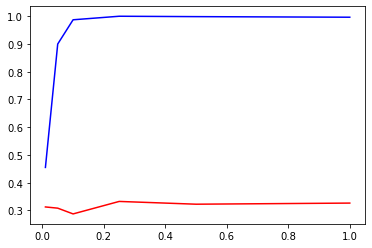

In [14]:
plt.plot(learning_rates, train_results, 'b', label="Train F1")
plt.plot(learning_rates, test_results, 'r', label="Test F1")

### n-estimators

In [13]:
n_estimators = [ 32, 64, 100, 200,400,500,525]
train_results = []
test_results = []
for estimator in n_estimators:
    model = CatBoostClassifier(n_estimators=estimator,random_state=101,eval_metric='F1',cat_features=cat_variables)
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    f1_train=f1_score(train_y,train_pred)
    f1_test=f1_score(test_y,test_pred)
    train_results.append(f1_train)
    test_results.append(f1_test)

Learning rate set to 0.401572
0:	learn: 0.2841880	total: 173ms	remaining: 5.36s
1:	learn: 0.2896699	total: 196ms	remaining: 2.94s
2:	learn: 0.2878465	total: 202ms	remaining: 1.96s
3:	learn: 0.3020063	total: 210ms	remaining: 1.47s
4:	learn: 0.3023256	total: 217ms	remaining: 1.17s
5:	learn: 0.3086681	total: 223ms	remaining: 964ms
6:	learn: 0.3193277	total: 229ms	remaining: 818ms
7:	learn: 0.3196635	total: 234ms	remaining: 702ms
8:	learn: 0.3240938	total: 240ms	remaining: 614ms
9:	learn: 0.3276596	total: 246ms	remaining: 540ms
10:	learn: 0.3424947	total: 251ms	remaining: 480ms
11:	learn: 0.3567681	total: 257ms	remaining: 428ms
12:	learn: 0.3674322	total: 263ms	remaining: 385ms
13:	learn: 0.3830228	total: 268ms	remaining: 344ms
14:	learn: 0.3946281	total: 274ms	remaining: 310ms
15:	learn: 0.4032922	total: 278ms	remaining: 278ms
16:	learn: 0.4086242	total: 284ms	remaining: 251ms
17:	learn: 0.4082051	total: 289ms	remaining: 225ms
18:	learn: 0.4259635	total: 294ms	remaining: 201ms
19:	learn: 

90:	learn: 0.5491723	total: 519ms	remaining: 51.3ms
91:	learn: 0.5575992	total: 524ms	remaining: 45.6ms
92:	learn: 0.5565217	total: 531ms	remaining: 40ms
93:	learn: 0.5579151	total: 536ms	remaining: 34.2ms
94:	learn: 0.5648415	total: 542ms	remaining: 28.5ms
95:	learn: 0.5648415	total: 548ms	remaining: 22.8ms
96:	learn: 0.5662188	total: 554ms	remaining: 17.1ms
97:	learn: 0.5667627	total: 559ms	remaining: 11.4ms
98:	learn: 0.5675935	total: 564ms	remaining: 5.7ms
99:	learn: 0.5727969	total: 570ms	remaining: 0us
Learning rate set to 0.074807
0:	learn: 0.2237762	total: 17.8ms	remaining: 3.55s
1:	learn: 0.2613511	total: 35.4ms	remaining: 3.51s
2:	learn: 0.2443439	total: 53.5ms	remaining: 3.51s
3:	learn: 0.2545045	total: 72.9ms	remaining: 3.57s
4:	learn: 0.2589286	total: 90.2ms	remaining: 3.52s
5:	learn: 0.2672606	total: 105ms	remaining: 3.4s
6:	learn: 0.2775330	total: 120ms	remaining: 3.3s
7:	learn: 0.2787611	total: 133ms	remaining: 3.18s
8:	learn: 0.2785088	total: 147ms	remaining: 3.11s
9:	

150:	learn: 0.5142296	total: 2.27s	remaining: 737ms
151:	learn: 0.5113078	total: 2.29s	remaining: 723ms
152:	learn: 0.5127701	total: 2.31s	remaining: 709ms
153:	learn: 0.5113078	total: 2.33s	remaining: 695ms
154:	learn: 0.5113078	total: 2.34s	remaining: 680ms
155:	learn: 0.5103042	total: 2.36s	remaining: 666ms
156:	learn: 0.5156863	total: 2.37s	remaining: 650ms
157:	learn: 0.5209756	total: 2.39s	remaining: 635ms
158:	learn: 0.5229268	total: 2.4s	remaining: 619ms
159:	learn: 0.5209756	total: 2.42s	remaining: 604ms
160:	learn: 0.5224172	total: 2.43s	remaining: 588ms
161:	learn: 0.5243665	total: 2.44s	remaining: 573ms
162:	learn: 0.5234375	total: 2.46s	remaining: 558ms
163:	learn: 0.5248780	total: 2.47s	remaining: 543ms
164:	learn: 0.5234375	total: 2.49s	remaining: 528ms
165:	learn: 0.5205479	total: 2.5s	remaining: 513ms
166:	learn: 0.5219941	total: 2.51s	remaining: 497ms
167:	learn: 0.5291829	total: 2.53s	remaining: 481ms
168:	learn: 0.5334627	total: 2.54s	remaining: 466ms
169:	learn: 0.

111:	learn: 0.3443850	total: 1.77s	remaining: 4.55s
112:	learn: 0.3443850	total: 1.78s	remaining: 4.53s
113:	learn: 0.3461538	total: 1.8s	remaining: 4.52s
114:	learn: 0.3443850	total: 1.81s	remaining: 4.5s
115:	learn: 0.3461538	total: 1.83s	remaining: 4.48s
116:	learn: 0.3479189	total: 1.84s	remaining: 4.46s
117:	learn: 0.3496802	total: 1.86s	remaining: 4.44s
118:	learn: 0.3475480	total: 1.87s	remaining: 4.42s
119:	learn: 0.3489362	total: 1.88s	remaining: 4.39s
120:	learn: 0.3493078	total: 1.9s	remaining: 4.37s
121:	learn: 0.3479189	total: 1.91s	remaining: 4.35s
122:	learn: 0.3482906	total: 1.92s	remaining: 4.33s
123:	learn: 0.3479189	total: 1.94s	remaining: 4.31s
124:	learn: 0.3482906	total: 1.95s	remaining: 4.29s
125:	learn: 0.3535676	total: 1.97s	remaining: 4.28s
126:	learn: 0.3535676	total: 1.98s	remaining: 4.26s
127:	learn: 0.3518124	total: 2s	remaining: 4.25s
128:	learn: 0.3518124	total: 2.02s	remaining: 4.24s
129:	learn: 0.3570670	total: 2.04s	remaining: 4.23s
130:	learn: 0.3553

274:	learn: 0.4914055	total: 4.09s	remaining: 1.86s
275:	learn: 0.4914055	total: 4.11s	remaining: 1.84s
276:	learn: 0.4909091	total: 4.12s	remaining: 1.83s
277:	learn: 0.4924319	total: 4.13s	remaining: 1.81s
278:	learn: 0.4924319	total: 4.15s	remaining: 1.8s
279:	learn: 0.4924319	total: 4.16s	remaining: 1.78s
280:	learn: 0.4954683	total: 4.17s	remaining: 1.77s
281:	learn: 0.4959677	total: 4.18s	remaining: 1.75s
282:	learn: 0.4959677	total: 4.2s	remaining: 1.74s
283:	learn: 0.4989940	total: 4.21s	remaining: 1.72s
284:	learn: 0.5005025	total: 4.22s	remaining: 1.7s
285:	learn: 0.5005025	total: 4.24s	remaining: 1.69s
286:	learn: 0.5005025	total: 4.25s	remaining: 1.67s
287:	learn: 0.5005025	total: 4.27s	remaining: 1.66s
288:	learn: 0.5005025	total: 4.29s	remaining: 1.65s
289:	learn: 0.5005025	total: 4.31s	remaining: 1.64s
290:	learn: 0.5020080	total: 4.34s	remaining: 1.63s
291:	learn: 0.5035105	total: 4.35s	remaining: 1.61s
292:	learn: 0.5035105	total: 4.37s	remaining: 1.6s
293:	learn: 0.50

43:	learn: 0.3048246	total: 666ms	remaining: 6.9s
44:	learn: 0.3051592	total: 693ms	remaining: 7s
45:	learn: 0.3051592	total: 714ms	remaining: 7.05s
46:	learn: 0.3085339	total: 728ms	remaining: 7.02s
47:	learn: 0.3066813	total: 741ms	remaining: 6.98s
48:	learn: 0.3044907	total: 756ms	remaining: 6.96s
49:	learn: 0.3085339	total: 768ms	remaining: 6.91s
50:	learn: 0.3029638	total: 781ms	remaining: 6.88s
51:	learn: 0.3029638	total: 796ms	remaining: 6.85s
52:	learn: 0.3070175	total: 809ms	remaining: 6.82s
53:	learn: 0.3066813	total: 822ms	remaining: 6.79s
54:	learn: 0.3103825	total: 836ms	remaining: 6.77s
55:	learn: 0.3100437	total: 850ms	remaining: 6.74s
56:	learn: 0.3100437	total: 867ms	remaining: 6.74s
57:	learn: 0.3081967	total: 882ms	remaining: 6.72s
58:	learn: 0.3063457	total: 897ms	remaining: 6.7s
59:	learn: 0.3063457	total: 911ms	remaining: 6.68s
60:	learn: 0.3100437	total: 925ms	remaining: 6.66s
61:	learn: 0.3081967	total: 939ms	remaining: 6.63s
62:	learn: 0.3115468	total: 954ms	re

210:	learn: 0.3941606	total: 3.03s	remaining: 4.14s
211:	learn: 0.3941606	total: 3.03s	remaining: 4.12s
212:	learn: 0.3941606	total: 3.04s	remaining: 4.1s
213:	learn: 0.3945720	total: 3.06s	remaining: 4.09s
214:	learn: 0.3945720	total: 3.07s	remaining: 4.08s
215:	learn: 0.3945720	total: 3.09s	remaining: 4.06s
216:	learn: 0.3945720	total: 3.1s	remaining: 4.04s
217:	learn: 0.3962461	total: 3.11s	remaining: 4.03s
218:	learn: 0.3962461	total: 3.12s	remaining: 4.01s
219:	learn: 0.3962461	total: 3.14s	remaining: 3.99s
220:	learn: 0.3962461	total: 3.15s	remaining: 3.98s
221:	learn: 0.3979167	total: 3.16s	remaining: 3.96s
222:	learn: 0.4029076	total: 3.18s	remaining: 3.95s
223:	learn: 0.4029076	total: 3.19s	remaining: 3.93s
224:	learn: 0.4024896	total: 3.2s	remaining: 3.91s
225:	learn: 0.4008307	total: 3.22s	remaining: 3.9s
226:	learn: 0.4008307	total: 3.23s	remaining: 3.88s
227:	learn: 0.4029076	total: 3.24s	remaining: 3.87s
228:	learn: 0.4029076	total: 3.26s	remaining: 3.85s
229:	learn: 0.40

381:	learn: 0.5225049	total: 5.4s	remaining: 1.67s
382:	learn: 0.5253906	total: 5.42s	remaining: 1.65s
383:	learn: 0.5253906	total: 5.43s	remaining: 1.64s
384:	learn: 0.5249755	total: 5.44s	remaining: 1.63s
385:	learn: 0.5249755	total: 5.46s	remaining: 1.61s
386:	learn: 0.5259042	total: 5.47s	remaining: 1.6s
387:	learn: 0.5244618	total: 5.49s	remaining: 1.58s
388:	learn: 0.5287805	total: 5.5s	remaining: 1.57s
389:	learn: 0.5287805	total: 5.52s	remaining: 1.56s
390:	learn: 0.5307317	total: 5.53s	remaining: 1.54s
391:	learn: 0.5307317	total: 5.55s	remaining: 1.53s
392:	learn: 0.5302144	total: 5.56s	remaining: 1.51s
393:	learn: 0.5335930	total: 5.58s	remaining: 1.5s
394:	learn: 0.5355404	total: 5.6s	remaining: 1.49s
395:	learn: 0.5321637	total: 5.61s	remaining: 1.47s
396:	learn: 0.5321637	total: 5.63s	remaining: 1.46s
397:	learn: 0.5321637	total: 5.64s	remaining: 1.45s
398:	learn: 0.5321637	total: 5.66s	remaining: 1.43s
399:	learn: 0.5335930	total: 5.67s	remaining: 1.42s
400:	learn: 0.533

40:	learn: 0.3098592	total: 605ms	remaining: 7.14s
41:	learn: 0.3095238	total: 619ms	remaining: 7.11s
42:	learn: 0.3050109	total: 633ms	remaining: 7.1s
43:	learn: 0.3038251	total: 645ms	remaining: 7.05s
44:	learn: 0.3019694	total: 659ms	remaining: 7.03s
45:	learn: 0.3038251	total: 672ms	remaining: 7s
46:	learn: 0.2982456	total: 687ms	remaining: 6.98s
47:	learn: 0.3034934	total: 700ms	remaining: 6.96s
48:	learn: 0.3031625	total: 713ms	remaining: 6.93s
49:	learn: 0.3046790	total: 727ms	remaining: 6.9s
50:	learn: 0.3061889	total: 742ms	remaining: 6.89s
51:	learn: 0.3098592	total: 755ms	remaining: 6.87s
52:	learn: 0.3098592	total: 770ms	remaining: 6.86s
53:	learn: 0.3128371	total: 782ms	remaining: 6.82s
54:	learn: 0.3125000	total: 800ms	remaining: 6.84s
55:	learn: 0.3110151	total: 812ms	remaining: 6.8s
56:	learn: 0.3146552	total: 827ms	remaining: 6.79s
57:	learn: 0.3131749	total: 840ms	remaining: 6.76s
58:	learn: 0.3113514	total: 855ms	remaining: 6.75s
59:	learn: 0.3138528	total: 867ms	rem

210:	learn: 0.3816475	total: 3s	remaining: 4.47s
211:	learn: 0.3816475	total: 3.02s	remaining: 4.46s
212:	learn: 0.3816475	total: 3.04s	remaining: 4.45s
213:	learn: 0.3833333	total: 3.05s	remaining: 4.43s
214:	learn: 0.3833333	total: 3.06s	remaining: 4.42s
215:	learn: 0.3833333	total: 3.08s	remaining: 4.4s
216:	learn: 0.3866944	total: 3.09s	remaining: 4.38s
217:	learn: 0.3883697	total: 3.1s	remaining: 4.37s
218:	learn: 0.3883697	total: 3.12s	remaining: 4.36s
219:	learn: 0.3883697	total: 3.13s	remaining: 4.34s
220:	learn: 0.3900415	total: 3.14s	remaining: 4.32s
221:	learn: 0.3917098	total: 3.16s	remaining: 4.31s
222:	learn: 0.3921162	total: 3.17s	remaining: 4.3s
223:	learn: 0.3921162	total: 3.19s	remaining: 4.28s
224:	learn: 0.3941909	total: 3.2s	remaining: 4.27s
225:	learn: 0.3941909	total: 3.22s	remaining: 4.26s
226:	learn: 0.3941909	total: 3.23s	remaining: 4.24s
227:	learn: 0.3991727	total: 3.25s	remaining: 4.23s
228:	learn: 0.3991727	total: 3.26s	remaining: 4.21s
229:	learn: 0.40124

371:	learn: 0.4874624	total: 5.31s	remaining: 2.18s
372:	learn: 0.4889780	total: 5.32s	remaining: 2.17s
373:	learn: 0.4889780	total: 5.34s	remaining: 2.15s
374:	learn: 0.4904905	total: 5.35s	remaining: 2.14s
375:	learn: 0.4935065	total: 5.37s	remaining: 2.13s
376:	learn: 0.4950100	total: 5.38s	remaining: 2.11s
377:	learn: 0.4965105	total: 5.39s	remaining: 2.1s
378:	learn: 0.4940000	total: 5.4s	remaining: 2.08s
379:	learn: 0.4975025	total: 5.42s	remaining: 2.07s
380:	learn: 0.4990020	total: 5.43s	remaining: 2.05s
381:	learn: 0.4990020	total: 5.44s	remaining: 2.04s
382:	learn: 0.5004985	total: 5.46s	remaining: 2.02s
383:	learn: 0.5019920	total: 5.47s	remaining: 2.01s
384:	learn: 0.5019920	total: 5.48s	remaining: 1.99s
385:	learn: 0.5034826	total: 5.49s	remaining: 1.98s
386:	learn: 0.5054726	total: 5.51s	remaining: 1.96s
387:	learn: 0.5054726	total: 5.52s	remaining: 1.95s
388:	learn: 0.5054726	total: 5.54s	remaining: 1.94s
389:	learn: 0.5054726	total: 5.55s	remaining: 1.92s
390:	learn: 0.

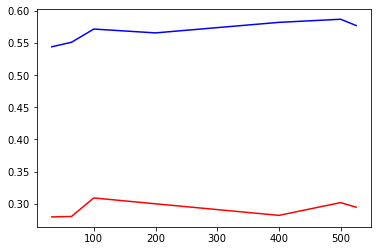

In [14]:
plt.plot(n_estimators, train_results, 'b', label="Train F1")
plt.plot(n_estimators, test_results, 'r', label="Test F1")

## Building a Model

In [18]:
clf= CatBoostClassifier(eval_metric='F1',cat_features=cat_variables)

In [16]:
clf.fit(train_x,train_y,eval_set=(test_x, test_y),plot=True)
print('\n Model Trainied')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.042481
0:	learn: 0.1146497	test: 0.0937500	best: 0.0937500 (0)	total: 171ms	remaining: 2m 50s
1:	learn: 0.2542182	test: 0.2336770	best: 0.2336770 (1)	total: 194ms	remaining: 1m 36s
2:	learn: 0.2519685	test: 0.2465753	best: 0.2465753 (2)	total: 216ms	remaining: 1m 11s
3:	learn: 0.2511312	test: 0.2482759	best: 0.2482759 (3)	total: 240ms	remaining: 59.8s
4:	learn: 0.2564679	test: 0.2352941	best: 0.2482759 (3)	total: 263ms	remaining: 52.3s
5:	learn: 0.2436195	test: 0.2007168	best: 0.2482759 (3)	total: 284ms	remaining: 47.1s
6:	learn: 0.2497110	test: 0.2000000	best: 0.2482759 (3)	total: 306ms	remaining: 43.4s
7:	learn: 0.2427746	test: 0.2000000	best: 0.2482759 (3)	total: 327ms	remaining: 40.5s
8:	learn: 0.2540046	test: 0.2000000	best: 0.2482759 (3)	total: 355ms	remaining: 39.1s
9:	learn: 0.2471396	test: 0.2007168	best: 0.2482759 (3)	total: 371ms	remaining: 36.7s
10:	learn: 0.2320186	test: 0.1811594	best: 0.2482759 (3)	total: 377ms	remaining: 33.9s
11:	learn: 0.2355658

97:	learn: 0.3486631	test: 0.2801303	best: 0.2810458 (83)	total: 2.21s	remaining: 20.3s
98:	learn: 0.3451233	test: 0.2801303	best: 0.2810458 (83)	total: 2.23s	remaining: 20.3s
99:	learn: 0.3465241	test: 0.2801303	best: 0.2810458 (83)	total: 2.26s	remaining: 20.4s
100:	learn: 0.3500534	test: 0.2801303	best: 0.2810458 (83)	total: 2.29s	remaining: 20.4s
101:	learn: 0.3514377	test: 0.2875817	best: 0.2875817 (101)	total: 2.33s	remaining: 20.6s
102:	learn: 0.3514377	test: 0.2810458	best: 0.2875817 (101)	total: 2.36s	remaining: 20.6s
103:	learn: 0.3521878	test: 0.2810458	best: 0.2875817 (101)	total: 2.39s	remaining: 20.6s
104:	learn: 0.3521878	test: 0.2810458	best: 0.2875817 (101)	total: 2.41s	remaining: 20.6s
105:	learn: 0.3521878	test: 0.2810458	best: 0.2875817 (101)	total: 2.43s	remaining: 20.5s
106:	learn: 0.3556976	test: 0.2801303	best: 0.2875817 (101)	total: 2.46s	remaining: 20.5s
107:	learn: 0.3570670	test: 0.2810458	best: 0.2875817 (101)	total: 2.48s	remaining: 20.5s
108:	learn: 0.357

191:	learn: 0.4329268	test: 0.3003195	best: 0.3067093 (144)	total: 4.31s	remaining: 18.1s
192:	learn: 0.4329268	test: 0.2993631	best: 0.3067093 (144)	total: 4.32s	remaining: 18.1s
193:	learn: 0.4365482	test: 0.3037975	best: 0.3067093 (144)	total: 4.36s	remaining: 18.1s
194:	learn: 0.4349593	test: 0.3037975	best: 0.3067093 (144)	total: 4.38s	remaining: 18.1s
195:	learn: 0.4356636	test: 0.3037975	best: 0.3067093 (144)	total: 4.4s	remaining: 18.1s
196:	learn: 0.4361055	test: 0.3037975	best: 0.3067093 (144)	total: 4.42s	remaining: 18s
197:	learn: 0.4361055	test: 0.3037975	best: 0.3067093 (144)	total: 4.43s	remaining: 18s
198:	learn: 0.4376900	test: 0.3091483	best: 0.3091483 (198)	total: 4.46s	remaining: 17.9s
199:	learn: 0.4401623	test: 0.3101266	best: 0.3101266 (199)	total: 4.47s	remaining: 17.9s
200:	learn: 0.4430894	test: 0.3047619	best: 0.3101266 (199)	total: 4.49s	remaining: 17.9s
201:	learn: 0.4415056	test: 0.3047619	best: 0.3101266 (199)	total: 4.51s	remaining: 17.8s
202:	learn: 0.4

288:	learn: 0.5386876	test: 0.3154574	best: 0.3164557 (277)	total: 6.41s	remaining: 15.8s
289:	learn: 0.5386876	test: 0.3164557	best: 0.3164557 (277)	total: 6.42s	remaining: 15.7s
290:	learn: 0.5401174	test: 0.3174603	best: 0.3174603 (290)	total: 6.45s	remaining: 15.7s
291:	learn: 0.5415445	test: 0.3174603	best: 0.3174603 (290)	total: 6.47s	remaining: 15.7s
292:	learn: 0.5426053	test: 0.3174603	best: 0.3174603 (290)	total: 6.49s	remaining: 15.7s
293:	learn: 0.5426053	test: 0.3174603	best: 0.3174603 (290)	total: 6.51s	remaining: 15.6s
294:	learn: 0.5440313	test: 0.3174603	best: 0.3174603 (290)	total: 6.52s	remaining: 15.6s
295:	learn: 0.5454545	test: 0.3130990	best: 0.3174603 (290)	total: 6.54s	remaining: 15.6s
296:	learn: 0.5454545	test: 0.3130990	best: 0.3174603 (290)	total: 6.56s	remaining: 15.5s
297:	learn: 0.5454545	test: 0.3130990	best: 0.3174603 (290)	total: 6.58s	remaining: 15.5s
298:	learn: 0.5477583	test: 0.3130990	best: 0.3174603 (290)	total: 6.6s	remaining: 15.5s
299:	learn:

380:	learn: 0.6030246	test: 0.3130990	best: 0.3227848 (330)	total: 8.25s	remaining: 13.4s
381:	learn: 0.6056604	test: 0.3130990	best: 0.3227848 (330)	total: 8.27s	remaining: 13.4s
382:	learn: 0.6056604	test: 0.3130990	best: 0.3227848 (330)	total: 8.29s	remaining: 13.4s
383:	learn: 0.6056604	test: 0.3130990	best: 0.3227848 (330)	total: 8.33s	remaining: 13.4s
384:	learn: 0.6069746	test: 0.3130990	best: 0.3227848 (330)	total: 8.35s	remaining: 13.3s
385:	learn: 0.6082863	test: 0.3130990	best: 0.3227848 (330)	total: 8.38s	remaining: 13.3s
386:	learn: 0.6082863	test: 0.3130990	best: 0.3227848 (330)	total: 8.4s	remaining: 13.3s
387:	learn: 0.6095955	test: 0.3130990	best: 0.3227848 (330)	total: 8.43s	remaining: 13.3s
388:	learn: 0.6095955	test: 0.3130990	best: 0.3227848 (330)	total: 8.45s	remaining: 13.3s
389:	learn: 0.6127820	test: 0.3130990	best: 0.3227848 (330)	total: 8.47s	remaining: 13.2s
390:	learn: 0.6140845	test: 0.3130990	best: 0.3227848 (330)	total: 8.49s	remaining: 13.2s
391:	learn:

472:	learn: 0.6721014	test: 0.3076923	best: 0.3227848 (330)	total: 10.3s	remaining: 11.4s
473:	learn: 0.6745027	test: 0.3076923	best: 0.3227848 (330)	total: 10.3s	remaining: 11.4s
474:	learn: 0.6750903	test: 0.3022508	best: 0.3227848 (330)	total: 10.3s	remaining: 11.4s
475:	learn: 0.6750903	test: 0.3022508	best: 0.3227848 (330)	total: 10.3s	remaining: 11.4s
476:	learn: 0.6780884	test: 0.3012821	best: 0.3227848 (330)	total: 10.3s	remaining: 11.3s
477:	learn: 0.6774775	test: 0.3022508	best: 0.3227848 (330)	total: 10.4s	remaining: 11.3s
478:	learn: 0.6774775	test: 0.3022508	best: 0.3227848 (330)	total: 10.4s	remaining: 11.3s
479:	learn: 0.6798561	test: 0.3012821	best: 0.3227848 (330)	total: 10.4s	remaining: 11.3s
480:	learn: 0.6804680	test: 0.3012821	best: 0.3227848 (330)	total: 10.5s	remaining: 11.3s
481:	learn: 0.6810422	test: 0.3012821	best: 0.3227848 (330)	total: 10.5s	remaining: 11.3s
482:	learn: 0.6804680	test: 0.3003195	best: 0.3227848 (330)	total: 10.5s	remaining: 11.3s
483:	learn

567:	learn: 0.7391304	test: 0.3028391	best: 0.3227848 (330)	total: 12.4s	remaining: 9.41s
568:	learn: 0.7402259	test: 0.3028391	best: 0.3227848 (330)	total: 12.4s	remaining: 9.39s
569:	learn: 0.7413194	test: 0.3028391	best: 0.3227848 (330)	total: 12.4s	remaining: 9.36s
570:	learn: 0.7402259	test: 0.3028391	best: 0.3227848 (330)	total: 12.4s	remaining: 9.34s
571:	learn: 0.7402259	test: 0.3028391	best: 0.3227848 (330)	total: 12.5s	remaining: 9.32s
572:	learn: 0.7424111	test: 0.3028391	best: 0.3227848 (330)	total: 12.5s	remaining: 9.3s
573:	learn: 0.7428571	test: 0.3028391	best: 0.3227848 (330)	total: 12.5s	remaining: 9.27s
574:	learn: 0.7428571	test: 0.3028391	best: 0.3227848 (330)	total: 12.5s	remaining: 9.25s
575:	learn: 0.7417678	test: 0.3081761	best: 0.3227848 (330)	total: 12.5s	remaining: 9.22s
576:	learn: 0.7417678	test: 0.3081761	best: 0.3227848 (330)	total: 12.5s	remaining: 9.2s
577:	learn: 0.7417678	test: 0.3081761	best: 0.3227848 (330)	total: 12.6s	remaining: 9.17s
578:	learn: 

664:	learn: 0.7807757	test: 0.2902208	best: 0.3227848 (330)	total: 14.2s	remaining: 7.17s
665:	learn: 0.7804054	test: 0.2902208	best: 0.3227848 (330)	total: 14.3s	remaining: 7.15s
666:	learn: 0.7814346	test: 0.2911392	best: 0.3227848 (330)	total: 14.3s	remaining: 7.13s
667:	learn: 0.7814346	test: 0.2902208	best: 0.3227848 (330)	total: 14.3s	remaining: 7.1s
668:	learn: 0.7814346	test: 0.2902208	best: 0.3227848 (330)	total: 14.3s	remaining: 7.08s
669:	learn: 0.7810651	test: 0.2911392	best: 0.3227848 (330)	total: 14.3s	remaining: 7.05s
670:	learn: 0.7797468	test: 0.2911392	best: 0.3227848 (330)	total: 14.3s	remaining: 7.03s
671:	learn: 0.7810651	test: 0.2965300	best: 0.3227848 (330)	total: 14.4s	remaining: 7.01s
672:	learn: 0.7820946	test: 0.2955975	best: 0.3227848 (330)	total: 14.4s	remaining: 6.98s
673:	learn: 0.7820946	test: 0.2946708	best: 0.3227848 (330)	total: 14.4s	remaining: 6.96s
674:	learn: 0.7831224	test: 0.3000000	best: 0.3227848 (330)	total: 14.4s	remaining: 6.94s
675:	learn:

763:	learn: 0.8219852	test: 0.2893082	best: 0.3227848 (330)	total: 16.1s	remaining: 4.96s
764:	learn: 0.8213115	test: 0.2893082	best: 0.3227848 (330)	total: 16.1s	remaining: 4.94s
765:	learn: 0.8213115	test: 0.2893082	best: 0.3227848 (330)	total: 16.1s	remaining: 4.92s
766:	learn: 0.8219852	test: 0.2893082	best: 0.3227848 (330)	total: 16.1s	remaining: 4.9s
767:	learn: 0.8219852	test: 0.2893082	best: 0.3227848 (330)	total: 16.1s	remaining: 4.88s
768:	learn: 0.8229508	test: 0.2946708	best: 0.3227848 (330)	total: 16.2s	remaining: 4.85s
769:	learn: 0.8258381	test: 0.2946708	best: 0.3227848 (330)	total: 16.2s	remaining: 4.83s
770:	learn: 0.8258381	test: 0.2946708	best: 0.3227848 (330)	total: 16.2s	remaining: 4.81s
771:	learn: 0.8258381	test: 0.2946708	best: 0.3227848 (330)	total: 16.2s	remaining: 4.79s
772:	learn: 0.8258381	test: 0.2893082	best: 0.3227848 (330)	total: 16.2s	remaining: 4.77s
773:	learn: 0.8258381	test: 0.2893082	best: 0.3227848 (330)	total: 16.3s	remaining: 4.75s
774:	learn:

858:	learn: 0.8442292	test: 0.3105590	best: 0.3227848 (330)	total: 17.9s	remaining: 2.94s
859:	learn: 0.8442292	test: 0.3052960	best: 0.3227848 (330)	total: 17.9s	remaining: 2.92s
860:	learn: 0.8442292	test: 0.3052960	best: 0.3227848 (330)	total: 17.9s	remaining: 2.89s
861:	learn: 0.8451613	test: 0.3052960	best: 0.3227848 (330)	total: 17.9s	remaining: 2.87s
862:	learn: 0.8460919	test: 0.3062500	best: 0.3227848 (330)	total: 18s	remaining: 2.85s
863:	learn: 0.8460919	test: 0.3000000	best: 0.3227848 (330)	total: 18s	remaining: 2.83s
864:	learn: 0.8460919	test: 0.3000000	best: 0.3227848 (330)	total: 18s	remaining: 2.81s
865:	learn: 0.8479485	test: 0.3009404	best: 0.3227848 (330)	total: 18s	remaining: 2.79s
866:	learn: 0.8479485	test: 0.3009404	best: 0.3227848 (330)	total: 18s	remaining: 2.77s
867:	learn: 0.8488746	test: 0.3009404	best: 0.3227848 (330)	total: 18.1s	remaining: 2.75s
868:	learn: 0.8470209	test: 0.3009404	best: 0.3227848 (330)	total: 18.1s	remaining: 2.73s
869:	learn: 0.848874

951:	learn: 0.8706625	test: 0.3115265	best: 0.3227848 (330)	total: 19.7s	remaining: 994ms
952:	learn: 0.8706625	test: 0.3115265	best: 0.3227848 (330)	total: 19.7s	remaining: 973ms
953:	learn: 0.8697711	test: 0.3062500	best: 0.3227848 (330)	total: 19.7s	remaining: 952ms
954:	learn: 0.8697711	test: 0.3072100	best: 0.3227848 (330)	total: 19.8s	remaining: 931ms
955:	learn: 0.8697711	test: 0.3072100	best: 0.3227848 (330)	total: 19.8s	remaining: 911ms
956:	learn: 0.8706625	test: 0.3018868	best: 0.3227848 (330)	total: 19.8s	remaining: 890ms
957:	learn: 0.8715524	test: 0.3018868	best: 0.3227848 (330)	total: 19.8s	remaining: 869ms
958:	learn: 0.8715524	test: 0.3072100	best: 0.3227848 (330)	total: 19.8s	remaining: 848ms
959:	learn: 0.8724409	test: 0.3072100	best: 0.3227848 (330)	total: 19.9s	remaining: 827ms
960:	learn: 0.8742138	test: 0.3018868	best: 0.3227848 (330)	total: 19.9s	remaining: 807ms
961:	learn: 0.8742138	test: 0.3018868	best: 0.3227848 (330)	total: 19.9s	remaining: 786ms
962:	learn

In [16]:
pred_train=clf.predict(train_x)
pred_test=clf.predict(test_x)

In [17]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2956
           1       0.41      0.91      0.56       320

    accuracy                           0.86      3276
   macro avg       0.70      0.88      0.74      3276
weighted avg       0.93      0.86      0.88      3276



In [18]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1014
           1       0.21      0.65      0.32        78

    accuracy                           0.80      1092
   macro avg       0.59      0.73      0.60      1092
weighted avg       0.91      0.80      0.85      1092



### LEARNING RATE AND n_estimators_

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [13]:
model= CatBoostClassifier(random_state=101,cat_features=cat_variables)

In [15]:
para = {'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],'n_estimators':[100, 200,300,400,500]}
clf = GridSearchCV(estimator=model,param_grid=para,scoring='f1',cv=StratifiedKFold(10))
clf=clf.fit(train_x, train_y)

0:	learn: 0.4922095	total: 170ms	remaining: 16.8s
1:	learn: 0.4669627	total: 184ms	remaining: 9.02s
2:	learn: 0.4563465	total: 191ms	remaining: 6.18s
3:	learn: 0.4443542	total: 199ms	remaining: 4.77s
4:	learn: 0.4372295	total: 205ms	remaining: 3.89s
5:	learn: 0.4212825	total: 210ms	remaining: 3.29s
6:	learn: 0.4162820	total: 214ms	remaining: 2.85s
7:	learn: 0.4071751	total: 219ms	remaining: 2.51s
8:	learn: 0.3963966	total: 224ms	remaining: 2.27s
9:	learn: 0.3875062	total: 229ms	remaining: 2.06s
10:	learn: 0.3762796	total: 233ms	remaining: 1.89s
11:	learn: 0.3702020	total: 238ms	remaining: 1.74s
12:	learn: 0.3602927	total: 244ms	remaining: 1.63s
13:	learn: 0.3523100	total: 248ms	remaining: 1.52s
14:	learn: 0.3462595	total: 252ms	remaining: 1.43s
15:	learn: 0.3372131	total: 257ms	remaining: 1.35s
16:	learn: 0.3366721	total: 263ms	remaining: 1.28s
17:	learn: 0.3275630	total: 268ms	remaining: 1.22s
18:	learn: 0.3163182	total: 272ms	remaining: 1.16s
19:	learn: 0.3074633	total: 277ms	remaini

61:	learn: 0.1230687	total: 373ms	remaining: 228ms
62:	learn: 0.1209283	total: 378ms	remaining: 222ms
63:	learn: 0.1202142	total: 383ms	remaining: 215ms
64:	learn: 0.1186801	total: 390ms	remaining: 210ms
65:	learn: 0.1178372	total: 396ms	remaining: 204ms
66:	learn: 0.1170377	total: 400ms	remaining: 197ms
67:	learn: 0.1141367	total: 405ms	remaining: 190ms
68:	learn: 0.1129852	total: 411ms	remaining: 185ms
69:	learn: 0.1113578	total: 415ms	remaining: 178ms
70:	learn: 0.1100993	total: 420ms	remaining: 171ms
71:	learn: 0.1073156	total: 424ms	remaining: 165ms
72:	learn: 0.1047422	total: 430ms	remaining: 159ms
73:	learn: 0.1028561	total: 435ms	remaining: 153ms
74:	learn: 0.1007335	total: 439ms	remaining: 146ms
75:	learn: 0.0982572	total: 444ms	remaining: 140ms
76:	learn: 0.0964231	total: 450ms	remaining: 134ms
77:	learn: 0.0950506	total: 454ms	remaining: 128ms
78:	learn: 0.0925612	total: 459ms	remaining: 122ms
79:	learn: 0.0896890	total: 464ms	remaining: 116ms
80:	learn: 0.0877047	total: 469

31:	learn: 0.2434555	total: 214ms	remaining: 454ms
32:	learn: 0.2393529	total: 220ms	remaining: 448ms
33:	learn: 0.2311347	total: 225ms	remaining: 437ms
34:	learn: 0.2246397	total: 231ms	remaining: 428ms
35:	learn: 0.2188867	total: 236ms	remaining: 419ms
36:	learn: 0.2128928	total: 243ms	remaining: 414ms
37:	learn: 0.2087077	total: 248ms	remaining: 405ms
38:	learn: 0.2085487	total: 253ms	remaining: 395ms
39:	learn: 0.2024520	total: 257ms	remaining: 386ms
40:	learn: 0.1977645	total: 264ms	remaining: 380ms
41:	learn: 0.1973244	total: 269ms	remaining: 371ms
42:	learn: 0.1891999	total: 273ms	remaining: 362ms
43:	learn: 0.1842661	total: 278ms	remaining: 354ms
44:	learn: 0.1805652	total: 284ms	remaining: 347ms
45:	learn: 0.1738741	total: 289ms	remaining: 339ms
46:	learn: 0.1737151	total: 293ms	remaining: 331ms
47:	learn: 0.1713218	total: 298ms	remaining: 323ms
48:	learn: 0.1668574	total: 304ms	remaining: 317ms
49:	learn: 0.1631895	total: 309ms	remaining: 309ms
50:	learn: 0.1586732	total: 314

0:	learn: 0.4913604	total: 24.7ms	remaining: 2.44s
1:	learn: 0.4731649	total: 45.4ms	remaining: 2.23s
2:	learn: 0.4591264	total: 61.3ms	remaining: 1.98s
3:	learn: 0.4477390	total: 80.7ms	remaining: 1.94s
4:	learn: 0.4383832	total: 97.3ms	remaining: 1.85s
5:	learn: 0.4321100	total: 108ms	remaining: 1.69s
6:	learn: 0.4204293	total: 117ms	remaining: 1.55s
7:	learn: 0.4123824	total: 124ms	remaining: 1.42s
8:	learn: 0.4010667	total: 132ms	remaining: 1.33s
9:	learn: 0.3915200	total: 138ms	remaining: 1.24s
10:	learn: 0.3836263	total: 143ms	remaining: 1.15s
11:	learn: 0.3758192	total: 147ms	remaining: 1.08s
12:	learn: 0.3691985	total: 152ms	remaining: 1.02s
13:	learn: 0.3552210	total: 157ms	remaining: 965ms
14:	learn: 0.3477432	total: 162ms	remaining: 917ms
15:	learn: 0.3391831	total: 166ms	remaining: 874ms
16:	learn: 0.3281219	total: 172ms	remaining: 841ms
17:	learn: 0.3262297	total: 177ms	remaining: 804ms
18:	learn: 0.3168950	total: 181ms	remaining: 773ms
19:	learn: 0.3094185	total: 186ms	re

74:	learn: 0.0908688	total: 378ms	remaining: 126ms
75:	learn: 0.0882276	total: 383ms	remaining: 121ms
76:	learn: 0.0864233	total: 390ms	remaining: 116ms
77:	learn: 0.0849141	total: 395ms	remaining: 112ms
78:	learn: 0.0820501	total: 400ms	remaining: 106ms
79:	learn: 0.0801020	total: 405ms	remaining: 101ms
80:	learn: 0.0790286	total: 411ms	remaining: 96.3ms
81:	learn: 0.0776604	total: 415ms	remaining: 91.1ms
82:	learn: 0.0762873	total: 419ms	remaining: 85.9ms
83:	learn: 0.0749603	total: 424ms	remaining: 80.8ms
84:	learn: 0.0744294	total: 430ms	remaining: 75.8ms
85:	learn: 0.0731558	total: 434ms	remaining: 70.7ms
86:	learn: 0.0711832	total: 439ms	remaining: 65.6ms
87:	learn: 0.0696476	total: 444ms	remaining: 60.5ms
88:	learn: 0.0679367	total: 450ms	remaining: 55.6ms
89:	learn: 0.0662713	total: 454ms	remaining: 50.4ms
90:	learn: 0.0641724	total: 458ms	remaining: 45.3ms
91:	learn: 0.0641428	total: 463ms	remaining: 40.2ms
92:	learn: 0.0637620	total: 469ms	remaining: 35.3ms
93:	learn: 0.06078

68:	learn: 0.1021780	total: 398ms	remaining: 179ms
69:	learn: 0.1001018	total: 403ms	remaining: 173ms
70:	learn: 0.0987178	total: 408ms	remaining: 167ms
71:	learn: 0.0938659	total: 413ms	remaining: 161ms
72:	learn: 0.0911060	total: 420ms	remaining: 156ms
73:	learn: 0.0899077	total: 425ms	remaining: 149ms
74:	learn: 0.0862683	total: 430ms	remaining: 143ms
75:	learn: 0.0844996	total: 435ms	remaining: 137ms
76:	learn: 0.0823171	total: 441ms	remaining: 132ms
77:	learn: 0.0800517	total: 445ms	remaining: 126ms
78:	learn: 0.0787286	total: 450ms	remaining: 120ms
79:	learn: 0.0758507	total: 454ms	remaining: 114ms
80:	learn: 0.0745024	total: 460ms	remaining: 108ms
81:	learn: 0.0735170	total: 465ms	remaining: 102ms
82:	learn: 0.0715179	total: 469ms	remaining: 96.1ms
83:	learn: 0.0687374	total: 474ms	remaining: 90.2ms
84:	learn: 0.0680617	total: 480ms	remaining: 84.6ms
85:	learn: 0.0665378	total: 484ms	remaining: 78.8ms
86:	learn: 0.0658262	total: 489ms	remaining: 73.1ms
87:	learn: 0.0641011	total

38:	learn: 0.2109926	total: 641ms	remaining: 2.65s
39:	learn: 0.2046212	total: 656ms	remaining: 2.63s
40:	learn: 0.2023488	total: 670ms	remaining: 2.6s
41:	learn: 0.2014740	total: 684ms	remaining: 2.57s
42:	learn: 0.1959512	total: 697ms	remaining: 2.54s
43:	learn: 0.1906558	total: 712ms	remaining: 2.52s
44:	learn: 0.1838793	total: 726ms	remaining: 2.5s
45:	learn: 0.1766971	total: 742ms	remaining: 2.48s
46:	learn: 0.1722708	total: 758ms	remaining: 2.47s
47:	learn: 0.1703452	total: 772ms	remaining: 2.44s
48:	learn: 0.1669887	total: 785ms	remaining: 2.42s
49:	learn: 0.1633557	total: 798ms	remaining: 2.4s
50:	learn: 0.1589328	total: 811ms	remaining: 2.37s
51:	learn: 0.1562485	total: 825ms	remaining: 2.35s
52:	learn: 0.1521415	total: 857ms	remaining: 2.38s
53:	learn: 0.1451721	total: 872ms	remaining: 2.36s
54:	learn: 0.1413399	total: 884ms	remaining: 2.33s
55:	learn: 0.1388078	total: 898ms	remaining: 2.31s
56:	learn: 0.1334215	total: 911ms	remaining: 2.29s
57:	learn: 0.1298069	total: 925ms	

198:	learn: 0.0146917	total: 2.87s	remaining: 14.4ms
199:	learn: 0.0146756	total: 2.88s	remaining: 0us
0:	learn: 0.4862025	total: 15.3ms	remaining: 3.05s
1:	learn: 0.4700305	total: 29.9ms	remaining: 2.96s
2:	learn: 0.4565433	total: 45.8ms	remaining: 3s
3:	learn: 0.4450297	total: 57.1ms	remaining: 2.8s
4:	learn: 0.4371103	total: 75.7ms	remaining: 2.95s
5:	learn: 0.4267398	total: 89.1ms	remaining: 2.88s
6:	learn: 0.4143012	total: 102ms	remaining: 2.81s
7:	learn: 0.4057589	total: 115ms	remaining: 2.76s
8:	learn: 0.3951981	total: 129ms	remaining: 2.74s
9:	learn: 0.3876618	total: 142ms	remaining: 2.7s
10:	learn: 0.3709621	total: 157ms	remaining: 2.69s
11:	learn: 0.3614886	total: 169ms	remaining: 2.65s
12:	learn: 0.3591738	total: 183ms	remaining: 2.64s
13:	learn: 0.3486517	total: 196ms	remaining: 2.61s
14:	learn: 0.3354016	total: 210ms	remaining: 2.6s
15:	learn: 0.3247053	total: 223ms	remaining: 2.57s
16:	learn: 0.3127584	total: 238ms	remaining: 2.56s
17:	learn: 0.3070697	total: 249ms	remain

166:	learn: 0.0207150	total: 2.28s	remaining: 451ms
167:	learn: 0.0207002	total: 2.3s	remaining: 438ms
168:	learn: 0.0205713	total: 2.31s	remaining: 424ms
169:	learn: 0.0201666	total: 2.33s	remaining: 411ms
170:	learn: 0.0199189	total: 2.34s	remaining: 397ms
171:	learn: 0.0196491	total: 2.35s	remaining: 383ms
172:	learn: 0.0194486	total: 2.37s	remaining: 370ms
173:	learn: 0.0192326	total: 2.38s	remaining: 356ms
174:	learn: 0.0189022	total: 2.4s	remaining: 342ms
175:	learn: 0.0188355	total: 2.41s	remaining: 328ms
176:	learn: 0.0186031	total: 2.42s	remaining: 315ms
177:	learn: 0.0182844	total: 2.43s	remaining: 301ms
178:	learn: 0.0181249	total: 2.45s	remaining: 287ms
179:	learn: 0.0179831	total: 2.46s	remaining: 274ms
180:	learn: 0.0179831	total: 2.48s	remaining: 260ms
181:	learn: 0.0177763	total: 2.49s	remaining: 247ms
182:	learn: 0.0176325	total: 2.51s	remaining: 233ms
183:	learn: 0.0173762	total: 2.52s	remaining: 219ms
184:	learn: 0.0173314	total: 2.54s	remaining: 206ms
185:	learn: 0.

127:	learn: 0.0377175	total: 1.83s	remaining: 1.03s
128:	learn: 0.0377171	total: 1.85s	remaining: 1.02s
129:	learn: 0.0375250	total: 1.86s	remaining: 1s
130:	learn: 0.0368748	total: 1.88s	remaining: 988ms
131:	learn: 0.0356723	total: 1.89s	remaining: 973ms
132:	learn: 0.0352261	total: 1.9s	remaining: 958ms
133:	learn: 0.0349722	total: 1.92s	remaining: 948ms
134:	learn: 0.0348482	total: 1.94s	remaining: 933ms
135:	learn: 0.0338585	total: 1.95s	remaining: 918ms
136:	learn: 0.0335310	total: 1.97s	remaining: 904ms
137:	learn: 0.0332179	total: 1.98s	remaining: 889ms
138:	learn: 0.0331203	total: 1.99s	remaining: 875ms
139:	learn: 0.0331071	total: 2.01s	remaining: 861ms
140:	learn: 0.0324652	total: 2.03s	remaining: 851ms
141:	learn: 0.0323106	total: 2.05s	remaining: 837ms
142:	learn: 0.0318784	total: 2.07s	remaining: 824ms
143:	learn: 0.0308411	total: 2.08s	remaining: 810ms
144:	learn: 0.0302561	total: 2.1s	remaining: 797ms
145:	learn: 0.0298965	total: 2.12s	remaining: 784ms
146:	learn: 0.029

92:	learn: 0.0658755	total: 1.51s	remaining: 1.74s
93:	learn: 0.0648408	total: 1.53s	remaining: 1.73s
94:	learn: 0.0633804	total: 1.54s	remaining: 1.71s
95:	learn: 0.0621450	total: 1.56s	remaining: 1.69s
96:	learn: 0.0603688	total: 1.57s	remaining: 1.67s
97:	learn: 0.0600186	total: 1.58s	remaining: 1.65s
98:	learn: 0.0580419	total: 1.6s	remaining: 1.63s
99:	learn: 0.0578428	total: 1.61s	remaining: 1.61s
100:	learn: 0.0569780	total: 1.63s	remaining: 1.59s
101:	learn: 0.0565341	total: 1.64s	remaining: 1.57s
102:	learn: 0.0556045	total: 1.65s	remaining: 1.56s
103:	learn: 0.0539303	total: 1.67s	remaining: 1.54s
104:	learn: 0.0531327	total: 1.68s	remaining: 1.52s
105:	learn: 0.0518712	total: 1.7s	remaining: 1.51s
106:	learn: 0.0513233	total: 1.72s	remaining: 1.49s
107:	learn: 0.0501225	total: 1.73s	remaining: 1.47s
108:	learn: 0.0500677	total: 1.75s	remaining: 1.46s
109:	learn: 0.0495213	total: 1.76s	remaining: 1.44s
110:	learn: 0.0490055	total: 1.77s	remaining: 1.42s
111:	learn: 0.0487498	

62:	learn: 0.1145969	total: 1.14s	remaining: 2.48s
63:	learn: 0.1129084	total: 1.16s	remaining: 2.46s
64:	learn: 0.1117142	total: 1.17s	remaining: 2.44s
65:	learn: 0.1099497	total: 1.19s	remaining: 2.42s
66:	learn: 0.1096537	total: 1.21s	remaining: 2.4s
67:	learn: 0.1075545	total: 1.23s	remaining: 2.38s
68:	learn: 0.1050047	total: 1.25s	remaining: 2.38s
69:	learn: 0.1015540	total: 1.27s	remaining: 2.36s
70:	learn: 0.0994701	total: 1.29s	remaining: 2.34s
71:	learn: 0.0983473	total: 1.3s	remaining: 2.32s
72:	learn: 0.0979567	total: 1.32s	remaining: 2.3s
73:	learn: 0.0963911	total: 1.34s	remaining: 2.28s
74:	learn: 0.0933247	total: 1.36s	remaining: 2.26s
75:	learn: 0.0921034	total: 1.37s	remaining: 2.24s
76:	learn: 0.0904229	total: 1.39s	remaining: 2.22s
77:	learn: 0.0899666	total: 1.4s	remaining: 2.19s
78:	learn: 0.0888759	total: 1.42s	remaining: 2.17s
79:	learn: 0.0858718	total: 1.44s	remaining: 2.16s
80:	learn: 0.0857694	total: 1.45s	remaining: 2.13s
81:	learn: 0.0833019	total: 1.47s	r

22:	learn: 0.2894664	total: 444ms	remaining: 3.41s
23:	learn: 0.2818351	total: 462ms	remaining: 3.39s
24:	learn: 0.2780450	total: 479ms	remaining: 3.35s
25:	learn: 0.2701736	total: 497ms	remaining: 3.33s
26:	learn: 0.2684747	total: 509ms	remaining: 3.26s
27:	learn: 0.2638486	total: 525ms	remaining: 3.23s
28:	learn: 0.2574980	total: 545ms	remaining: 3.21s
29:	learn: 0.2479444	total: 562ms	remaining: 3.18s
30:	learn: 0.2433872	total: 581ms	remaining: 3.17s
31:	learn: 0.2332216	total: 598ms	remaining: 3.14s
32:	learn: 0.2276815	total: 617ms	remaining: 3.12s
33:	learn: 0.2241404	total: 633ms	remaining: 3.09s
34:	learn: 0.2178377	total: 670ms	remaining: 3.16s
35:	learn: 0.2120800	total: 688ms	remaining: 3.13s
36:	learn: 0.2076636	total: 706ms	remaining: 3.11s
37:	learn: 0.1998674	total: 720ms	remaining: 3.07s
38:	learn: 0.1966182	total: 736ms	remaining: 3.04s
39:	learn: 0.1923766	total: 751ms	remaining: 3s
40:	learn: 0.1894075	total: 766ms	remaining: 2.97s
41:	learn: 0.1864394	total: 779ms	

182:	learn: 0.0182112	total: 3.01s	remaining: 280ms
183:	learn: 0.0180737	total: 3.03s	remaining: 264ms
184:	learn: 0.0177987	total: 3.04s	remaining: 247ms
185:	learn: 0.0176517	total: 3.06s	remaining: 230ms
186:	learn: 0.0176242	total: 3.07s	remaining: 214ms
187:	learn: 0.0173748	total: 3.08s	remaining: 197ms
188:	learn: 0.0171289	total: 3.1s	remaining: 180ms
189:	learn: 0.0169502	total: 3.11s	remaining: 164ms
190:	learn: 0.0167595	total: 3.13s	remaining: 147ms
191:	learn: 0.0165342	total: 3.14s	remaining: 131ms
192:	learn: 0.0161508	total: 3.15s	remaining: 114ms
193:	learn: 0.0159387	total: 3.17s	remaining: 98ms
194:	learn: 0.0157251	total: 3.18s	remaining: 81.6ms
195:	learn: 0.0156318	total: 3.2s	remaining: 65.2ms
196:	learn: 0.0153836	total: 3.21s	remaining: 48.9ms
197:	learn: 0.0153783	total: 3.23s	remaining: 32.6ms
198:	learn: 0.0151990	total: 3.24s	remaining: 16.3ms
199:	learn: 0.0148357	total: 3.25s	remaining: 0us
0:	learn: 0.4840477	total: 19.3ms	remaining: 3.84s
1:	learn: 0.4

151:	learn: 0.0205350	total: 2.06s	remaining: 651ms
152:	learn: 0.0203174	total: 2.08s	remaining: 638ms
153:	learn: 0.0199160	total: 2.09s	remaining: 624ms
154:	learn: 0.0198272	total: 2.1s	remaining: 611ms
155:	learn: 0.0197104	total: 2.12s	remaining: 597ms
156:	learn: 0.0195427	total: 2.13s	remaining: 583ms
157:	learn: 0.0193853	total: 2.14s	remaining: 570ms
158:	learn: 0.0193206	total: 2.16s	remaining: 556ms
159:	learn: 0.0191530	total: 2.17s	remaining: 542ms
160:	learn: 0.0189959	total: 2.18s	remaining: 529ms
161:	learn: 0.0186807	total: 2.2s	remaining: 515ms
162:	learn: 0.0183560	total: 2.21s	remaining: 501ms
163:	learn: 0.0182136	total: 2.22s	remaining: 488ms
164:	learn: 0.0180180	total: 2.23s	remaining: 474ms
165:	learn: 0.0177301	total: 2.25s	remaining: 461ms
166:	learn: 0.0176961	total: 2.26s	remaining: 447ms
167:	learn: 0.0174469	total: 2.28s	remaining: 434ms
168:	learn: 0.0172629	total: 2.29s	remaining: 421ms
169:	learn: 0.0171070	total: 2.31s	remaining: 407ms
170:	learn: 0.

115:	learn: 0.0444952	total: 1.63s	remaining: 1.18s
116:	learn: 0.0438099	total: 1.64s	remaining: 1.17s
117:	learn: 0.0437078	total: 1.66s	remaining: 1.16s
118:	learn: 0.0436725	total: 1.68s	remaining: 1.14s
119:	learn: 0.0436382	total: 1.69s	remaining: 1.13s
120:	learn: 0.0429871	total: 1.71s	remaining: 1.11s
121:	learn: 0.0424311	total: 1.72s	remaining: 1.1s
122:	learn: 0.0423876	total: 1.73s	remaining: 1.08s
123:	learn: 0.0412797	total: 1.74s	remaining: 1.07s
124:	learn: 0.0402552	total: 1.75s	remaining: 1.05s
125:	learn: 0.0394685	total: 1.77s	remaining: 1.04s
126:	learn: 0.0388175	total: 1.78s	remaining: 1.02s
127:	learn: 0.0382136	total: 1.8s	remaining: 1.01s
128:	learn: 0.0374648	total: 1.81s	remaining: 995ms
129:	learn: 0.0364977	total: 1.82s	remaining: 983ms
130:	learn: 0.0361775	total: 1.84s	remaining: 969ms
131:	learn: 0.0357104	total: 1.85s	remaining: 954ms
132:	learn: 0.0355009	total: 1.86s	remaining: 939ms
133:	learn: 0.0350701	total: 1.88s	remaining: 925ms
134:	learn: 0.

86:	learn: 0.0613018	total: 1.22s	remaining: 1.59s
87:	learn: 0.0601672	total: 1.23s	remaining: 1.57s
88:	learn: 0.0593288	total: 1.25s	remaining: 1.56s
89:	learn: 0.0569671	total: 1.26s	remaining: 1.54s
90:	learn: 0.0561436	total: 1.28s	remaining: 1.53s
91:	learn: 0.0558332	total: 1.29s	remaining: 1.51s
92:	learn: 0.0551032	total: 1.3s	remaining: 1.5s
93:	learn: 0.0542065	total: 1.31s	remaining: 1.48s
94:	learn: 0.0526225	total: 1.33s	remaining: 1.47s
95:	learn: 0.0519807	total: 1.34s	remaining: 1.45s
96:	learn: 0.0519455	total: 1.35s	remaining: 1.44s
97:	learn: 0.0510656	total: 1.36s	remaining: 1.42s
98:	learn: 0.0493826	total: 1.38s	remaining: 1.41s
99:	learn: 0.0493158	total: 1.39s	remaining: 1.39s
100:	learn: 0.0476336	total: 1.41s	remaining: 1.38s
101:	learn: 0.0470204	total: 1.43s	remaining: 1.37s
102:	learn: 0.0456418	total: 1.44s	remaining: 1.36s
103:	learn: 0.0440341	total: 1.46s	remaining: 1.34s
104:	learn: 0.0425935	total: 1.47s	remaining: 1.33s
105:	learn: 0.0425680	total:

51:	learn: 0.1360056	total: 961ms	remaining: 2.73s
52:	learn: 0.1354574	total: 975ms	remaining: 2.7s
53:	learn: 0.1333276	total: 990ms	remaining: 2.67s
54:	learn: 0.1311438	total: 1s	remaining: 2.64s
55:	learn: 0.1309528	total: 1.02s	remaining: 2.62s
56:	learn: 0.1297192	total: 1.03s	remaining: 2.58s
57:	learn: 0.1289390	total: 1.04s	remaining: 2.56s
58:	learn: 0.1267592	total: 1.05s	remaining: 2.52s
59:	learn: 0.1243816	total: 1.07s	remaining: 2.5s
60:	learn: 0.1207002	total: 1.08s	remaining: 2.47s
61:	learn: 0.1179521	total: 1.1s	remaining: 2.44s
62:	learn: 0.1136790	total: 1.11s	remaining: 2.41s
63:	learn: 0.1131749	total: 1.12s	remaining: 2.39s
64:	learn: 0.1086061	total: 1.14s	remaining: 2.36s
65:	learn: 0.1058162	total: 1.15s	remaining: 2.34s
66:	learn: 0.1049352	total: 1.16s	remaining: 2.31s
67:	learn: 0.1032816	total: 1.18s	remaining: 2.28s
68:	learn: 0.1029265	total: 1.19s	remaining: 2.26s
69:	learn: 0.0996393	total: 1.2s	remaining: 2.23s
70:	learn: 0.0985952	total: 1.22s	rema

15:	learn: 0.3453792	total: 222ms	remaining: 3.94s
16:	learn: 0.3404992	total: 238ms	remaining: 3.96s
17:	learn: 0.3297746	total: 251ms	remaining: 3.93s
18:	learn: 0.3228349	total: 265ms	remaining: 3.92s
19:	learn: 0.3150601	total: 278ms	remaining: 3.89s
20:	learn: 0.3085135	total: 292ms	remaining: 3.88s
21:	learn: 0.3006221	total: 305ms	remaining: 3.86s
22:	learn: 0.2905237	total: 320ms	remaining: 3.85s
23:	learn: 0.2839242	total: 331ms	remaining: 3.81s
24:	learn: 0.2787483	total: 346ms	remaining: 3.8s
25:	learn: 0.2723374	total: 359ms	remaining: 3.78s
26:	learn: 0.2637818	total: 373ms	remaining: 3.77s
27:	learn: 0.2593417	total: 386ms	remaining: 3.75s
28:	learn: 0.2535050	total: 397ms	remaining: 3.71s
29:	learn: 0.2497129	total: 408ms	remaining: 3.67s
30:	learn: 0.2465581	total: 425ms	remaining: 3.69s
31:	learn: 0.2464624	total: 439ms	remaining: 3.67s
32:	learn: 0.2446685	total: 449ms	remaining: 3.63s
33:	learn: 0.2356112	total: 462ms	remaining: 3.61s
34:	learn: 0.2292861	total: 475m

180:	learn: 0.0181998	total: 2.84s	remaining: 1.87s
181:	learn: 0.0179028	total: 2.86s	remaining: 1.85s
182:	learn: 0.0177648	total: 2.87s	remaining: 1.83s
183:	learn: 0.0176563	total: 2.88s	remaining: 1.82s
184:	learn: 0.0174340	total: 2.89s	remaining: 1.8s
185:	learn: 0.0170505	total: 2.91s	remaining: 1.78s
186:	learn: 0.0168836	total: 2.92s	remaining: 1.76s
187:	learn: 0.0167512	total: 2.93s	remaining: 1.75s
188:	learn: 0.0166662	total: 2.94s	remaining: 1.73s
189:	learn: 0.0163985	total: 2.95s	remaining: 1.71s
190:	learn: 0.0161162	total: 2.97s	remaining: 1.69s
191:	learn: 0.0157777	total: 2.98s	remaining: 1.68s
192:	learn: 0.0156309	total: 2.99s	remaining: 1.66s
193:	learn: 0.0156105	total: 3.01s	remaining: 1.65s
194:	learn: 0.0152748	total: 3.04s	remaining: 1.63s
195:	learn: 0.0150260	total: 3.05s	remaining: 1.62s
196:	learn: 0.0148227	total: 3.07s	remaining: 1.6s
197:	learn: 0.0147687	total: 3.09s	remaining: 1.59s
198:	learn: 0.0146917	total: 3.1s	remaining: 1.57s
199:	learn: 0.0

47:	learn: 0.1425834	total: 695ms	remaining: 3.65s
48:	learn: 0.1404560	total: 735ms	remaining: 3.76s
49:	learn: 0.1370251	total: 755ms	remaining: 3.78s
50:	learn: 0.1330792	total: 778ms	remaining: 3.8s
51:	learn: 0.1281448	total: 799ms	remaining: 3.81s
52:	learn: 0.1264299	total: 821ms	remaining: 3.83s
53:	learn: 0.1256464	total: 839ms	remaining: 3.82s
54:	learn: 0.1231732	total: 863ms	remaining: 3.85s
55:	learn: 0.1192862	total: 884ms	remaining: 3.85s
56:	learn: 0.1156229	total: 904ms	remaining: 3.85s
57:	learn: 0.1122710	total: 917ms	remaining: 3.82s
58:	learn: 0.1087445	total: 931ms	remaining: 3.8s
59:	learn: 0.1060505	total: 943ms	remaining: 3.77s
60:	learn: 0.1032780	total: 958ms	remaining: 3.75s
61:	learn: 0.1020742	total: 971ms	remaining: 3.73s
62:	learn: 0.1001862	total: 985ms	remaining: 3.71s
63:	learn: 0.0965739	total: 998ms	remaining: 3.68s
64:	learn: 0.0952025	total: 1.01s	remaining: 3.66s
65:	learn: 0.0932297	total: 1.02s	remaining: 3.63s
66:	learn: 0.0895577	total: 1.04s

211:	learn: 0.0129112	total: 3.31s	remaining: 1.38s
212:	learn: 0.0127953	total: 3.33s	remaining: 1.36s
213:	learn: 0.0127223	total: 3.35s	remaining: 1.34s
214:	learn: 0.0125798	total: 3.36s	remaining: 1.33s
215:	learn: 0.0123725	total: 3.38s	remaining: 1.31s
216:	learn: 0.0123724	total: 3.39s	remaining: 1.3s
217:	learn: 0.0123388	total: 3.41s	remaining: 1.28s
218:	learn: 0.0122446	total: 3.42s	remaining: 1.27s
219:	learn: 0.0120900	total: 3.44s	remaining: 1.25s
220:	learn: 0.0119752	total: 3.46s	remaining: 1.24s
221:	learn: 0.0119641	total: 3.47s	remaining: 1.22s
222:	learn: 0.0118555	total: 3.49s	remaining: 1.2s
223:	learn: 0.0117014	total: 3.5s	remaining: 1.19s
224:	learn: 0.0116534	total: 3.52s	remaining: 1.17s
225:	learn: 0.0115496	total: 3.54s	remaining: 1.16s
226:	learn: 0.0114538	total: 3.55s	remaining: 1.14s
227:	learn: 0.0113776	total: 3.57s	remaining: 1.13s
228:	learn: 0.0112935	total: 3.58s	remaining: 1.11s
229:	learn: 0.0110871	total: 3.6s	remaining: 1.09s
230:	learn: 0.01

83:	learn: 0.0732898	total: 1.22s	remaining: 3.14s
84:	learn: 0.0720457	total: 1.23s	remaining: 3.12s
85:	learn: 0.0710837	total: 1.25s	remaining: 3.11s
86:	learn: 0.0700953	total: 1.26s	remaining: 3.1s
87:	learn: 0.0690206	total: 1.29s	remaining: 3.1s
88:	learn: 0.0683714	total: 1.31s	remaining: 3.1s
89:	learn: 0.0667433	total: 1.33s	remaining: 3.1s
90:	learn: 0.0658090	total: 1.35s	remaining: 3.1s
91:	learn: 0.0643281	total: 1.38s	remaining: 3.12s
92:	learn: 0.0632200	total: 1.4s	remaining: 3.11s
93:	learn: 0.0629655	total: 1.42s	remaining: 3.1s
94:	learn: 0.0600229	total: 1.43s	remaining: 3.09s
95:	learn: 0.0583201	total: 1.45s	remaining: 3.07s
96:	learn: 0.0568362	total: 1.46s	remaining: 3.06s
97:	learn: 0.0566561	total: 1.47s	remaining: 3.04s
98:	learn: 0.0557697	total: 1.49s	remaining: 3.03s
99:	learn: 0.0550150	total: 1.5s	remaining: 3.01s
100:	learn: 0.0537362	total: 1.52s	remaining: 3s
101:	learn: 0.0523917	total: 1.53s	remaining: 2.98s
102:	learn: 0.0518753	total: 1.55s	remai

252:	learn: 0.0099018	total: 3.95s	remaining: 734ms
253:	learn: 0.0098816	total: 3.97s	remaining: 720ms
254:	learn: 0.0098816	total: 4s	remaining: 706ms
255:	learn: 0.0098816	total: 4.02s	remaining: 690ms
256:	learn: 0.0098815	total: 4.03s	remaining: 675ms
257:	learn: 0.0098813	total: 4.05s	remaining: 659ms
258:	learn: 0.0098303	total: 4.07s	remaining: 644ms
259:	learn: 0.0097020	total: 4.09s	remaining: 629ms
260:	learn: 0.0095095	total: 4.11s	remaining: 614ms
261:	learn: 0.0093079	total: 4.13s	remaining: 598ms
262:	learn: 0.0091326	total: 4.14s	remaining: 583ms
263:	learn: 0.0090512	total: 4.16s	remaining: 567ms
264:	learn: 0.0090173	total: 4.17s	remaining: 551ms
265:	learn: 0.0088878	total: 4.19s	remaining: 535ms
266:	learn: 0.0088597	total: 4.21s	remaining: 520ms
267:	learn: 0.0087579	total: 4.22s	remaining: 504ms
268:	learn: 0.0086723	total: 4.23s	remaining: 488ms
269:	learn: 0.0086075	total: 4.25s	remaining: 472ms
270:	learn: 0.0085545	total: 4.26s	remaining: 456ms
271:	learn: 0.0

113:	learn: 0.0460871	total: 1.69s	remaining: 2.76s
114:	learn: 0.0453562	total: 1.7s	remaining: 2.74s
115:	learn: 0.0444158	total: 1.72s	remaining: 2.72s
116:	learn: 0.0434032	total: 1.73s	remaining: 2.71s
117:	learn: 0.0432556	total: 1.74s	remaining: 2.69s
118:	learn: 0.0427030	total: 1.76s	remaining: 2.67s
119:	learn: 0.0423857	total: 1.77s	remaining: 2.65s
120:	learn: 0.0419935	total: 1.78s	remaining: 2.63s
121:	learn: 0.0413769	total: 1.79s	remaining: 2.62s
122:	learn: 0.0408834	total: 1.81s	remaining: 2.6s
123:	learn: 0.0405613	total: 1.82s	remaining: 2.58s
124:	learn: 0.0404317	total: 1.83s	remaining: 2.57s
125:	learn: 0.0395281	total: 1.85s	remaining: 2.55s
126:	learn: 0.0390805	total: 1.86s	remaining: 2.54s
127:	learn: 0.0390499	total: 1.88s	remaining: 2.52s
128:	learn: 0.0388290	total: 1.89s	remaining: 2.51s
129:	learn: 0.0384566	total: 1.91s	remaining: 2.49s
130:	learn: 0.0379654	total: 1.93s	remaining: 2.49s
131:	learn: 0.0376017	total: 1.95s	remaining: 2.48s
132:	learn: 0.

280:	learn: 0.0090089	total: 4.11s	remaining: 278ms
281:	learn: 0.0089506	total: 4.13s	remaining: 264ms
282:	learn: 0.0088806	total: 4.15s	remaining: 250ms
283:	learn: 0.0088264	total: 4.17s	remaining: 235ms
284:	learn: 0.0088159	total: 4.19s	remaining: 221ms
285:	learn: 0.0086942	total: 4.2s	remaining: 206ms
286:	learn: 0.0086333	total: 4.22s	remaining: 191ms
287:	learn: 0.0085986	total: 4.23s	remaining: 176ms
288:	learn: 0.0085986	total: 4.25s	remaining: 162ms
289:	learn: 0.0085983	total: 4.26s	remaining: 147ms
290:	learn: 0.0085982	total: 4.27s	remaining: 132ms
291:	learn: 0.0085976	total: 4.28s	remaining: 117ms
292:	learn: 0.0085918	total: 4.31s	remaining: 103ms
293:	learn: 0.0085918	total: 4.34s	remaining: 88.6ms
294:	learn: 0.0085918	total: 4.35s	remaining: 73.8ms
295:	learn: 0.0085918	total: 4.36s	remaining: 58.9ms
296:	learn: 0.0085917	total: 4.37s	remaining: 44.2ms
297:	learn: 0.0085694	total: 4.38s	remaining: 29.4ms
298:	learn: 0.0085688	total: 4.4s	remaining: 14.7ms
299:	lea

148:	learn: 0.0290317	total: 2.01s	remaining: 2.04s
149:	learn: 0.0284822	total: 2.02s	remaining: 2.02s
150:	learn: 0.0280186	total: 2.04s	remaining: 2.01s
151:	learn: 0.0276656	total: 2.05s	remaining: 2s
152:	learn: 0.0269230	total: 2.06s	remaining: 1.98s
153:	learn: 0.0264408	total: 2.08s	remaining: 1.97s
154:	learn: 0.0262188	total: 2.09s	remaining: 1.95s
155:	learn: 0.0259260	total: 2.1s	remaining: 1.94s
156:	learn: 0.0257129	total: 2.12s	remaining: 1.93s
157:	learn: 0.0253580	total: 2.13s	remaining: 1.91s
158:	learn: 0.0249059	total: 2.14s	remaining: 1.9s
159:	learn: 0.0244847	total: 2.15s	remaining: 1.89s
160:	learn: 0.0243659	total: 2.17s	remaining: 1.87s
161:	learn: 0.0243562	total: 2.18s	remaining: 1.86s
162:	learn: 0.0242205	total: 2.19s	remaining: 1.84s
163:	learn: 0.0239459	total: 2.21s	remaining: 1.83s
164:	learn: 0.0234137	total: 2.22s	remaining: 1.82s
165:	learn: 0.0230682	total: 2.23s	remaining: 1.8s
166:	learn: 0.0224750	total: 2.25s	remaining: 1.79s
167:	learn: 0.0219

13:	learn: 0.3568190	total: 202ms	remaining: 4.13s
14:	learn: 0.3545143	total: 221ms	remaining: 4.19s
15:	learn: 0.3425580	total: 240ms	remaining: 4.25s
16:	learn: 0.3346473	total: 258ms	remaining: 4.29s
17:	learn: 0.3311953	total: 272ms	remaining: 4.26s
18:	learn: 0.3181070	total: 289ms	remaining: 4.28s
19:	learn: 0.3081269	total: 305ms	remaining: 4.27s
20:	learn: 0.2978333	total: 322ms	remaining: 4.28s
21:	learn: 0.2937985	total: 339ms	remaining: 4.28s
22:	learn: 0.2894664	total: 350ms	remaining: 4.22s
23:	learn: 0.2818351	total: 366ms	remaining: 4.2s
24:	learn: 0.2780450	total: 383ms	remaining: 4.22s
25:	learn: 0.2701736	total: 405ms	remaining: 4.27s
26:	learn: 0.2684747	total: 415ms	remaining: 4.19s
27:	learn: 0.2638486	total: 432ms	remaining: 4.2s
28:	learn: 0.2574980	total: 447ms	remaining: 4.17s
29:	learn: 0.2479444	total: 460ms	remaining: 4.14s
30:	learn: 0.2433872	total: 474ms	remaining: 4.12s
31:	learn: 0.2332216	total: 488ms	remaining: 4.08s
32:	learn: 0.2276815	total: 505ms

177:	learn: 0.0192684	total: 2.57s	remaining: 1.76s
178:	learn: 0.0191767	total: 2.58s	remaining: 1.75s
179:	learn: 0.0189552	total: 2.6s	remaining: 1.73s
180:	learn: 0.0186815	total: 2.61s	remaining: 1.72s
181:	learn: 0.0184303	total: 2.63s	remaining: 1.7s
182:	learn: 0.0182112	total: 2.64s	remaining: 1.69s
183:	learn: 0.0180737	total: 2.65s	remaining: 1.67s
184:	learn: 0.0177987	total: 2.67s	remaining: 1.66s
185:	learn: 0.0176517	total: 2.68s	remaining: 1.64s
186:	learn: 0.0176242	total: 2.69s	remaining: 1.63s
187:	learn: 0.0173748	total: 2.71s	remaining: 1.61s
188:	learn: 0.0171289	total: 2.74s	remaining: 1.61s
189:	learn: 0.0169502	total: 2.76s	remaining: 1.6s
190:	learn: 0.0167595	total: 2.78s	remaining: 1.58s
191:	learn: 0.0165342	total: 2.8s	remaining: 1.57s
192:	learn: 0.0161508	total: 2.82s	remaining: 1.56s
193:	learn: 0.0159387	total: 2.84s	remaining: 1.55s
194:	learn: 0.0157251	total: 2.86s	remaining: 1.54s
195:	learn: 0.0156318	total: 2.88s	remaining: 1.53s
196:	learn: 0.01

50:	learn: 0.1291626	total: 680ms	remaining: 3.32s
51:	learn: 0.1250574	total: 691ms	remaining: 3.29s
52:	learn: 0.1240930	total: 703ms	remaining: 3.28s
53:	learn: 0.1211247	total: 716ms	remaining: 3.26s
54:	learn: 0.1186198	total: 727ms	remaining: 3.24s
55:	learn: 0.1156970	total: 738ms	remaining: 3.22s
56:	learn: 0.1125479	total: 750ms	remaining: 3.2s
57:	learn: 0.1118972	total: 764ms	remaining: 3.19s
58:	learn: 0.1071993	total: 777ms	remaining: 3.17s
59:	learn: 0.1022770	total: 790ms	remaining: 3.16s
60:	learn: 0.0993768	total: 803ms	remaining: 3.15s
61:	learn: 0.0957392	total: 817ms	remaining: 3.14s
62:	learn: 0.0931642	total: 830ms	remaining: 3.12s
63:	learn: 0.0891016	total: 846ms	remaining: 3.12s
64:	learn: 0.0881407	total: 861ms	remaining: 3.11s
65:	learn: 0.0858271	total: 882ms	remaining: 3.13s
66:	learn: 0.0844406	total: 894ms	remaining: 3.11s
67:	learn: 0.0818231	total: 913ms	remaining: 3.12s
68:	learn: 0.0801057	total: 933ms	remaining: 3.12s
69:	learn: 0.0791113	total: 955m

219:	learn: 0.0100889	total: 3.04s	remaining: 1.11s
220:	learn: 0.0100888	total: 3.05s	remaining: 1.09s
221:	learn: 0.0100443	total: 3.07s	remaining: 1.08s
222:	learn: 0.0100442	total: 3.08s	remaining: 1.06s
223:	learn: 0.0100372	total: 3.1s	remaining: 1.05s
224:	learn: 0.0100302	total: 3.11s	remaining: 1.04s
225:	learn: 0.0099340	total: 3.13s	remaining: 1.02s
226:	learn: 0.0098652	total: 3.14s	remaining: 1.01s
227:	learn: 0.0096890	total: 3.15s	remaining: 997ms
228:	learn: 0.0095146	total: 3.17s	remaining: 982ms
229:	learn: 0.0093754	total: 3.18s	remaining: 969ms
230:	learn: 0.0093117	total: 3.2s	remaining: 955ms
231:	learn: 0.0091609	total: 3.21s	remaining: 942ms
232:	learn: 0.0090496	total: 3.23s	remaining: 929ms
233:	learn: 0.0090492	total: 3.25s	remaining: 916ms
234:	learn: 0.0090367	total: 3.27s	remaining: 904ms
235:	learn: 0.0090364	total: 3.28s	remaining: 890ms
236:	learn: 0.0090121	total: 3.3s	remaining: 878ms
237:	learn: 0.0089495	total: 3.32s	remaining: 865ms
238:	learn: 0.0

83:	learn: 0.0820798	total: 1.67s	remaining: 4.3s
84:	learn: 0.0804425	total: 1.7s	remaining: 4.29s
85:	learn: 0.0771674	total: 1.72s	remaining: 4.29s
86:	learn: 0.0746796	total: 1.74s	remaining: 4.26s
87:	learn: 0.0723022	total: 1.77s	remaining: 4.25s
88:	learn: 0.0713302	total: 1.79s	remaining: 4.24s
89:	learn: 0.0685486	total: 1.81s	remaining: 4.22s
90:	learn: 0.0665346	total: 1.83s	remaining: 4.21s
91:	learn: 0.0640860	total: 1.85s	remaining: 4.19s
92:	learn: 0.0640543	total: 1.87s	remaining: 4.17s
93:	learn: 0.0639560	total: 1.9s	remaining: 4.15s
94:	learn: 0.0638755	total: 1.91s	remaining: 4.12s
95:	learn: 0.0620039	total: 1.93s	remaining: 4.09s
96:	learn: 0.0601035	total: 1.94s	remaining: 4.07s
97:	learn: 0.0595386	total: 1.96s	remaining: 4.04s
98:	learn: 0.0594974	total: 1.98s	remaining: 4.02s
99:	learn: 0.0587893	total: 2s	remaining: 4s
100:	learn: 0.0578475	total: 2.02s	remaining: 3.98s
101:	learn: 0.0571450	total: 2.04s	remaining: 3.96s
102:	learn: 0.0558241	total: 2.06s	rem

252:	learn: 0.0112763	total: 4.68s	remaining: 869ms
253:	learn: 0.0110099	total: 4.7s	remaining: 850ms
254:	learn: 0.0108132	total: 4.71s	remaining: 831ms
255:	learn: 0.0108132	total: 4.72s	remaining: 812ms
256:	learn: 0.0107553	total: 4.74s	remaining: 793ms
257:	learn: 0.0107552	total: 4.75s	remaining: 773ms
258:	learn: 0.0106779	total: 4.76s	remaining: 754ms
259:	learn: 0.0106481	total: 4.78s	remaining: 736ms
260:	learn: 0.0106481	total: 4.8s	remaining: 717ms
261:	learn: 0.0106480	total: 4.81s	remaining: 698ms
262:	learn: 0.0106056	total: 4.83s	remaining: 679ms
263:	learn: 0.0105598	total: 4.84s	remaining: 661ms
264:	learn: 0.0104045	total: 4.86s	remaining: 642ms
265:	learn: 0.0102784	total: 4.88s	remaining: 624ms
266:	learn: 0.0102403	total: 4.9s	remaining: 606ms
267:	learn: 0.0102336	total: 4.92s	remaining: 587ms
268:	learn: 0.0101083	total: 4.93s	remaining: 568ms
269:	learn: 0.0098689	total: 4.95s	remaining: 550ms
270:	learn: 0.0097587	total: 4.96s	remaining: 531ms
271:	learn: 0.0

126:	learn: 0.0315745	total: 2.24s	remaining: 3.05s
127:	learn: 0.0314491	total: 2.25s	remaining: 3.02s
128:	learn: 0.0313671	total: 2.26s	remaining: 3s
129:	learn: 0.0306841	total: 2.28s	remaining: 2.98s
130:	learn: 0.0304457	total: 2.29s	remaining: 2.95s
131:	learn: 0.0302336	total: 2.3s	remaining: 2.93s
132:	learn: 0.0299423	total: 2.31s	remaining: 2.91s
133:	learn: 0.0296306	total: 2.33s	remaining: 2.89s
134:	learn: 0.0291451	total: 2.34s	remaining: 2.86s
135:	learn: 0.0285599	total: 2.36s	remaining: 2.84s
136:	learn: 0.0280659	total: 2.38s	remaining: 2.83s
137:	learn: 0.0275167	total: 2.39s	remaining: 2.81s
138:	learn: 0.0271276	total: 2.4s	remaining: 2.79s
139:	learn: 0.0261715	total: 2.42s	remaining: 2.76s
140:	learn: 0.0259824	total: 2.43s	remaining: 2.74s
141:	learn: 0.0257504	total: 2.44s	remaining: 2.72s
142:	learn: 0.0257424	total: 2.46s	remaining: 2.7s
143:	learn: 0.0257146	total: 2.47s	remaining: 2.67s
144:	learn: 0.0255093	total: 2.48s	remaining: 2.65s
145:	learn: 0.0250

0:	learn: 0.4831679	total: 15.1ms	remaining: 4.51s
1:	learn: 0.4696985	total: 29.7ms	remaining: 4.43s
2:	learn: 0.4588844	total: 52.2ms	remaining: 5.17s
3:	learn: 0.4483374	total: 76.3ms	remaining: 5.65s
4:	learn: 0.4440573	total: 94.3ms	remaining: 5.56s
5:	learn: 0.4351857	total: 111ms	remaining: 5.43s
6:	learn: 0.4279305	total: 126ms	remaining: 5.27s
7:	learn: 0.4127102	total: 137ms	remaining: 5.01s
8:	learn: 0.4033280	total: 151ms	remaining: 4.89s
9:	learn: 0.3904912	total: 164ms	remaining: 4.76s
10:	learn: 0.3744271	total: 178ms	remaining: 4.68s
11:	learn: 0.3584940	total: 211ms	remaining: 5.06s
12:	learn: 0.3446227	total: 225ms	remaining: 4.98s
13:	learn: 0.3330570	total: 238ms	remaining: 4.87s
14:	learn: 0.3230314	total: 253ms	remaining: 4.8s
15:	learn: 0.3142159	total: 264ms	remaining: 4.69s
16:	learn: 0.3105286	total: 278ms	remaining: 4.64s
17:	learn: 0.3095927	total: 291ms	remaining: 4.56s
18:	learn: 0.2995640	total: 318ms	remaining: 4.71s
19:	learn: 0.2895802	total: 342ms	rem

166:	learn: 0.0193615	total: 2.55s	remaining: 2.03s
167:	learn: 0.0191927	total: 2.56s	remaining: 2.02s
168:	learn: 0.0191751	total: 2.58s	remaining: 2s
169:	learn: 0.0189518	total: 2.6s	remaining: 1.99s
170:	learn: 0.0185884	total: 2.61s	remaining: 1.97s
171:	learn: 0.0183627	total: 2.62s	remaining: 1.95s
172:	learn: 0.0182637	total: 2.64s	remaining: 1.94s
173:	learn: 0.0181430	total: 2.66s	remaining: 1.92s
174:	learn: 0.0180563	total: 2.67s	remaining: 1.91s
175:	learn: 0.0177549	total: 2.69s	remaining: 1.89s
176:	learn: 0.0176160	total: 2.7s	remaining: 1.88s
177:	learn: 0.0175064	total: 2.71s	remaining: 1.86s
178:	learn: 0.0173106	total: 2.73s	remaining: 1.84s
179:	learn: 0.0170491	total: 2.74s	remaining: 1.83s
180:	learn: 0.0168313	total: 2.76s	remaining: 1.81s
181:	learn: 0.0166131	total: 2.77s	remaining: 1.8s
182:	learn: 0.0163459	total: 2.79s	remaining: 1.78s
183:	learn: 0.0162233	total: 2.8s	remaining: 1.77s
184:	learn: 0.0161081	total: 2.82s	remaining: 1.75s
185:	learn: 0.01609

31:	learn: 0.2464624	total: 433ms	remaining: 4.98s
32:	learn: 0.2446685	total: 443ms	remaining: 4.92s
33:	learn: 0.2356112	total: 456ms	remaining: 4.9s
34:	learn: 0.2292861	total: 469ms	remaining: 4.89s
35:	learn: 0.2250955	total: 484ms	remaining: 4.89s
36:	learn: 0.2224439	total: 495ms	remaining: 4.86s
37:	learn: 0.2191882	total: 513ms	remaining: 4.89s
38:	learn: 0.2109926	total: 529ms	remaining: 4.9s
39:	learn: 0.2046212	total: 544ms	remaining: 4.89s
40:	learn: 0.2023488	total: 556ms	remaining: 4.87s
41:	learn: 0.2014740	total: 571ms	remaining: 4.86s
42:	learn: 0.1959512	total: 584ms	remaining: 4.85s
43:	learn: 0.1906558	total: 598ms	remaining: 4.84s
44:	learn: 0.1838793	total: 611ms	remaining: 4.82s
45:	learn: 0.1766971	total: 626ms	remaining: 4.82s
46:	learn: 0.1722708	total: 639ms	remaining: 4.8s
47:	learn: 0.1703452	total: 653ms	remaining: 4.79s
48:	learn: 0.1669887	total: 667ms	remaining: 4.78s
49:	learn: 0.1633557	total: 681ms	remaining: 4.77s
50:	learn: 0.1589328	total: 696ms	

199:	learn: 0.0146756	total: 2.81s	remaining: 2.81s
200:	learn: 0.0146750	total: 2.82s	remaining: 2.79s
201:	learn: 0.0145330	total: 2.84s	remaining: 2.78s
202:	learn: 0.0145021	total: 2.85s	remaining: 2.77s
203:	learn: 0.0144624	total: 2.87s	remaining: 2.75s
204:	learn: 0.0143435	total: 2.88s	remaining: 2.74s
205:	learn: 0.0141984	total: 2.89s	remaining: 2.72s
206:	learn: 0.0140116	total: 2.9s	remaining: 2.71s
207:	learn: 0.0139448	total: 2.92s	remaining: 2.69s
208:	learn: 0.0136737	total: 2.93s	remaining: 2.68s
209:	learn: 0.0135430	total: 2.95s	remaining: 2.67s
210:	learn: 0.0132311	total: 2.96s	remaining: 2.65s
211:	learn: 0.0132311	total: 2.97s	remaining: 2.63s
212:	learn: 0.0131545	total: 2.98s	remaining: 2.62s
213:	learn: 0.0130828	total: 3s	remaining: 2.6s
214:	learn: 0.0129053	total: 3.01s	remaining: 2.59s
215:	learn: 0.0127989	total: 3.02s	remaining: 2.58s
216:	learn: 0.0127290	total: 3.04s	remaining: 2.56s
217:	learn: 0.0126043	total: 3.05s	remaining: 2.55s
218:	learn: 0.012

360:	learn: 0.0062614	total: 4.95s	remaining: 534ms
361:	learn: 0.0062233	total: 4.96s	remaining: 521ms
362:	learn: 0.0062232	total: 4.97s	remaining: 507ms
363:	learn: 0.0062232	total: 4.99s	remaining: 493ms
364:	learn: 0.0062232	total: 5s	remaining: 479ms
365:	learn: 0.0061981	total: 5.01s	remaining: 466ms
366:	learn: 0.0061981	total: 5.02s	remaining: 452ms
367:	learn: 0.0061981	total: 5.04s	remaining: 438ms
368:	learn: 0.0061981	total: 5.05s	remaining: 424ms
369:	learn: 0.0061659	total: 5.06s	remaining: 410ms
370:	learn: 0.0061659	total: 5.07s	remaining: 397ms
371:	learn: 0.0061658	total: 5.08s	remaining: 383ms
372:	learn: 0.0061658	total: 5.1s	remaining: 369ms
373:	learn: 0.0061658	total: 5.11s	remaining: 355ms
374:	learn: 0.0061657	total: 5.12s	remaining: 341ms
375:	learn: 0.0061657	total: 5.13s	remaining: 328ms
376:	learn: 0.0061657	total: 5.15s	remaining: 314ms
377:	learn: 0.0061197	total: 5.16s	remaining: 300ms
378:	learn: 0.0061197	total: 5.17s	remaining: 287ms
379:	learn: 0.00

124:	learn: 0.0341558	total: 2.1s	remaining: 4.62s
125:	learn: 0.0338478	total: 2.11s	remaining: 4.59s
126:	learn: 0.0324453	total: 2.13s	remaining: 4.57s
127:	learn: 0.0318285	total: 2.14s	remaining: 4.55s
128:	learn: 0.0314252	total: 2.16s	remaining: 4.54s
129:	learn: 0.0311267	total: 2.18s	remaining: 4.52s
130:	learn: 0.0307515	total: 2.2s	remaining: 4.51s
131:	learn: 0.0303452	total: 2.21s	remaining: 4.49s
132:	learn: 0.0300085	total: 2.23s	remaining: 4.48s
133:	learn: 0.0293652	total: 2.24s	remaining: 4.45s
134:	learn: 0.0287310	total: 2.26s	remaining: 4.44s
135:	learn: 0.0283527	total: 2.28s	remaining: 4.42s
136:	learn: 0.0281915	total: 2.3s	remaining: 4.41s
137:	learn: 0.0276669	total: 2.31s	remaining: 4.39s
138:	learn: 0.0272863	total: 2.33s	remaining: 4.37s
139:	learn: 0.0268755	total: 2.34s	remaining: 4.35s
140:	learn: 0.0264470	total: 2.36s	remaining: 4.33s
141:	learn: 0.0264166	total: 2.37s	remaining: 4.31s
142:	learn: 0.0261154	total: 2.39s	remaining: 4.3s
143:	learn: 0.02

295:	learn: 0.0073568	total: 4.49s	remaining: 1.58s
296:	learn: 0.0073567	total: 4.5s	remaining: 1.56s
297:	learn: 0.0073534	total: 4.52s	remaining: 1.55s
298:	learn: 0.0073534	total: 4.53s	remaining: 1.53s
299:	learn: 0.0073308	total: 4.54s	remaining: 1.51s
300:	learn: 0.0073308	total: 4.56s	remaining: 1.5s
301:	learn: 0.0073306	total: 4.57s	remaining: 1.48s
302:	learn: 0.0072962	total: 4.58s	remaining: 1.47s
303:	learn: 0.0072677	total: 4.59s	remaining: 1.45s
304:	learn: 0.0072576	total: 4.61s	remaining: 1.44s
305:	learn: 0.0072397	total: 4.62s	remaining: 1.42s
306:	learn: 0.0072193	total: 4.63s	remaining: 1.4s
307:	learn: 0.0071888	total: 4.65s	remaining: 1.39s
308:	learn: 0.0071887	total: 4.66s	remaining: 1.37s
309:	learn: 0.0071886	total: 4.67s	remaining: 1.35s
310:	learn: 0.0070645	total: 4.68s	remaining: 1.34s
311:	learn: 0.0070416	total: 4.7s	remaining: 1.32s
312:	learn: 0.0069702	total: 4.71s	remaining: 1.31s
313:	learn: 0.0068966	total: 4.72s	remaining: 1.29s
314:	learn: 0.00

60:	learn: 0.1200612	total: 844ms	remaining: 4.69s
61:	learn: 0.1163321	total: 857ms	remaining: 4.67s
62:	learn: 0.1139851	total: 871ms	remaining: 4.66s
63:	learn: 0.1139003	total: 884ms	remaining: 4.64s
64:	learn: 0.1127329	total: 897ms	remaining: 4.63s
65:	learn: 0.1111597	total: 913ms	remaining: 4.62s
66:	learn: 0.1068177	total: 926ms	remaining: 4.6s
67:	learn: 0.1045676	total: 939ms	remaining: 4.59s
68:	learn: 0.1028250	total: 954ms	remaining: 4.58s
69:	learn: 0.1021770	total: 967ms	remaining: 4.56s
70:	learn: 0.1010860	total: 978ms	remaining: 4.53s
71:	learn: 0.1001369	total: 991ms	remaining: 4.51s
72:	learn: 0.0978456	total: 1s	remaining: 4.5s
73:	learn: 0.0968816	total: 1.01s	remaining: 4.46s
74:	learn: 0.0934795	total: 1.02s	remaining: 4.44s
75:	learn: 0.0933371	total: 1.04s	remaining: 4.43s
76:	learn: 0.0890433	total: 1.05s	remaining: 4.41s
77:	learn: 0.0850275	total: 1.07s	remaining: 4.4s
78:	learn: 0.0834117	total: 1.08s	remaining: 4.38s
79:	learn: 0.0803309	total: 1.09s	rem

226:	learn: 0.0119782	total: 3.2s	remaining: 2.44s
227:	learn: 0.0119424	total: 3.21s	remaining: 2.42s
228:	learn: 0.0118517	total: 3.22s	remaining: 2.41s
229:	learn: 0.0117212	total: 3.24s	remaining: 2.39s
230:	learn: 0.0116848	total: 3.25s	remaining: 2.38s
231:	learn: 0.0116233	total: 3.26s	remaining: 2.36s
232:	learn: 0.0115218	total: 3.27s	remaining: 2.35s
233:	learn: 0.0113224	total: 3.29s	remaining: 2.33s
234:	learn: 0.0110874	total: 3.3s	remaining: 2.31s
235:	learn: 0.0110535	total: 3.31s	remaining: 2.3s
236:	learn: 0.0110013	total: 3.32s	remaining: 2.29s
237:	learn: 0.0108833	total: 3.34s	remaining: 2.27s
238:	learn: 0.0108352	total: 3.35s	remaining: 2.26s
239:	learn: 0.0108352	total: 3.36s	remaining: 2.24s
240:	learn: 0.0108263	total: 3.37s	remaining: 2.23s
241:	learn: 0.0108262	total: 3.39s	remaining: 2.21s
242:	learn: 0.0108198	total: 3.4s	remaining: 2.19s
243:	learn: 0.0107021	total: 3.41s	remaining: 2.18s
244:	learn: 0.0106368	total: 3.42s	remaining: 2.17s
245:	learn: 0.01

393:	learn: 0.0059619	total: 5.59s	remaining: 85.1ms
394:	learn: 0.0059598	total: 5.6s	remaining: 70.9ms
395:	learn: 0.0058957	total: 5.62s	remaining: 56.7ms
396:	learn: 0.0058360	total: 5.64s	remaining: 42.6ms
397:	learn: 0.0058359	total: 5.66s	remaining: 28.4ms
398:	learn: 0.0058359	total: 5.67s	remaining: 14.2ms
399:	learn: 0.0058358	total: 5.69s	remaining: 0us
0:	learn: 0.4840482	total: 23.9ms	remaining: 9.54s
1:	learn: 0.4679127	total: 48.5ms	remaining: 9.65s
2:	learn: 0.4571852	total: 74.1ms	remaining: 9.8s
3:	learn: 0.4437230	total: 94.3ms	remaining: 9.34s
4:	learn: 0.4327323	total: 118ms	remaining: 9.35s
5:	learn: 0.4172351	total: 143ms	remaining: 9.38s
6:	learn: 0.4111211	total: 169ms	remaining: 9.52s
7:	learn: 0.4058553	total: 194ms	remaining: 9.5s
8:	learn: 0.3953048	total: 214ms	remaining: 9.28s
9:	learn: 0.3847631	total: 229ms	remaining: 8.92s
10:	learn: 0.3782270	total: 245ms	remaining: 8.66s
11:	learn: 0.3640275	total: 258ms	remaining: 8.33s
12:	learn: 0.3479129	total: 2

162:	learn: 0.0253105	total: 2.78s	remaining: 4.04s
163:	learn: 0.0249228	total: 2.8s	remaining: 4.03s
164:	learn: 0.0247649	total: 2.81s	remaining: 4.01s
165:	learn: 0.0244564	total: 2.83s	remaining: 3.99s
166:	learn: 0.0242994	total: 2.84s	remaining: 3.97s
167:	learn: 0.0241359	total: 2.86s	remaining: 3.94s
168:	learn: 0.0240374	total: 2.87s	remaining: 3.92s
169:	learn: 0.0236448	total: 2.88s	remaining: 3.9s
170:	learn: 0.0231885	total: 2.9s	remaining: 3.88s
171:	learn: 0.0230245	total: 2.91s	remaining: 3.86s
172:	learn: 0.0225040	total: 2.92s	remaining: 3.84s
173:	learn: 0.0222316	total: 2.94s	remaining: 3.81s
174:	learn: 0.0220361	total: 2.95s	remaining: 3.79s
175:	learn: 0.0220307	total: 2.96s	remaining: 3.77s
176:	learn: 0.0220204	total: 2.98s	remaining: 3.75s
177:	learn: 0.0218146	total: 2.99s	remaining: 3.73s
178:	learn: 0.0214088	total: 3.01s	remaining: 3.72s
179:	learn: 0.0210707	total: 3.02s	remaining: 3.7s
180:	learn: 0.0209057	total: 3.04s	remaining: 3.68s
181:	learn: 0.02

321:	learn: 0.0077282	total: 5s	remaining: 1.21s
322:	learn: 0.0077281	total: 5.01s	remaining: 1.2s
323:	learn: 0.0076940	total: 5.03s	remaining: 1.18s
324:	learn: 0.0075890	total: 5.04s	remaining: 1.16s
325:	learn: 0.0075889	total: 5.06s	remaining: 1.15s
326:	learn: 0.0075374	total: 5.07s	remaining: 1.13s
327:	learn: 0.0074072	total: 5.09s	remaining: 1.12s
328:	learn: 0.0073506	total: 5.1s	remaining: 1.1s
329:	learn: 0.0073494	total: 5.11s	remaining: 1.08s
330:	learn: 0.0072923	total: 5.13s	remaining: 1.07s
331:	learn: 0.0072922	total: 5.14s	remaining: 1.05s
332:	learn: 0.0072744	total: 5.16s	remaining: 1.04s
333:	learn: 0.0072471	total: 5.17s	remaining: 1.02s
334:	learn: 0.0072057	total: 5.19s	remaining: 1.01s
335:	learn: 0.0071756	total: 5.2s	remaining: 991ms
336:	learn: 0.0071397	total: 5.22s	remaining: 975ms
337:	learn: 0.0070915	total: 5.23s	remaining: 960ms
338:	learn: 0.0070914	total: 5.25s	remaining: 944ms
339:	learn: 0.0070913	total: 5.26s	remaining: 928ms
340:	learn: 0.00709

82:	learn: 0.0817553	total: 1.21s	remaining: 4.64s
83:	learn: 0.0808301	total: 1.23s	remaining: 4.62s
84:	learn: 0.0797688	total: 1.24s	remaining: 4.6s
85:	learn: 0.0792249	total: 1.25s	remaining: 4.58s
86:	learn: 0.0780886	total: 1.27s	remaining: 4.56s
87:	learn: 0.0767006	total: 1.28s	remaining: 4.54s
88:	learn: 0.0746106	total: 1.29s	remaining: 4.52s
89:	learn: 0.0732496	total: 1.31s	remaining: 4.51s
90:	learn: 0.0725517	total: 1.32s	remaining: 4.49s
91:	learn: 0.0722785	total: 1.34s	remaining: 4.48s
92:	learn: 0.0715088	total: 1.35s	remaining: 4.47s
93:	learn: 0.0714262	total: 1.36s	remaining: 4.44s
94:	learn: 0.0713047	total: 1.38s	remaining: 4.42s
95:	learn: 0.0712253	total: 1.39s	remaining: 4.4s
96:	learn: 0.0701310	total: 1.4s	remaining: 4.38s
97:	learn: 0.0685854	total: 1.42s	remaining: 4.36s
98:	learn: 0.0672948	total: 1.43s	remaining: 4.35s
99:	learn: 0.0657065	total: 1.44s	remaining: 4.33s
100:	learn: 0.0646929	total: 1.46s	remaining: 4.32s
101:	learn: 0.0623138	total: 1.47

243:	learn: 0.0114174	total: 3.4s	remaining: 2.17s
244:	learn: 0.0112209	total: 3.42s	remaining: 2.16s
245:	learn: 0.0112206	total: 3.43s	remaining: 2.15s
246:	learn: 0.0112203	total: 3.44s	remaining: 2.13s
247:	learn: 0.0111780	total: 3.46s	remaining: 2.12s
248:	learn: 0.0110547	total: 3.47s	remaining: 2.1s
249:	learn: 0.0110547	total: 3.49s	remaining: 2.09s
250:	learn: 0.0110210	total: 3.51s	remaining: 2.08s
251:	learn: 0.0110210	total: 3.52s	remaining: 2.06s
252:	learn: 0.0110210	total: 3.53s	remaining: 2.05s
253:	learn: 0.0109755	total: 3.54s	remaining: 2.04s
254:	learn: 0.0107434	total: 3.55s	remaining: 2.02s
255:	learn: 0.0107433	total: 3.56s	remaining: 2s
256:	learn: 0.0106389	total: 3.58s	remaining: 1.99s
257:	learn: 0.0106060	total: 3.59s	remaining: 1.97s
258:	learn: 0.0105656	total: 3.6s	remaining: 1.96s
259:	learn: 0.0105063	total: 3.61s	remaining: 1.95s
260:	learn: 0.0103667	total: 3.63s	remaining: 1.93s
261:	learn: 0.0103232	total: 3.64s	remaining: 1.92s
262:	learn: 0.0102

13:	learn: 0.3568190	total: 227ms	remaining: 6.26s
14:	learn: 0.3545143	total: 238ms	remaining: 6.12s
15:	learn: 0.3425580	total: 252ms	remaining: 6.04s
16:	learn: 0.3346473	total: 269ms	remaining: 6.06s
17:	learn: 0.3311953	total: 283ms	remaining: 6.01s
18:	learn: 0.3181070	total: 300ms	remaining: 6.02s
19:	learn: 0.3081269	total: 315ms	remaining: 5.99s
20:	learn: 0.2978333	total: 332ms	remaining: 5.99s
21:	learn: 0.2937985	total: 347ms	remaining: 5.97s
22:	learn: 0.2894664	total: 358ms	remaining: 5.87s
23:	learn: 0.2818351	total: 373ms	remaining: 5.84s
24:	learn: 0.2780450	total: 387ms	remaining: 5.8s
25:	learn: 0.2701736	total: 403ms	remaining: 5.8s
26:	learn: 0.2684747	total: 412ms	remaining: 5.69s
27:	learn: 0.2638486	total: 427ms	remaining: 5.67s
28:	learn: 0.2574980	total: 442ms	remaining: 5.65s
29:	learn: 0.2479444	total: 457ms	remaining: 5.63s
30:	learn: 0.2433872	total: 472ms	remaining: 5.62s
31:	learn: 0.2332216	total: 487ms	remaining: 5.6s
32:	learn: 0.2276815	total: 503ms	

183:	learn: 0.0180737	total: 2.67s	remaining: 3.14s
184:	learn: 0.0177987	total: 2.69s	remaining: 3.12s
185:	learn: 0.0176517	total: 2.71s	remaining: 3.11s
186:	learn: 0.0176242	total: 2.72s	remaining: 3.1s
187:	learn: 0.0173748	total: 2.73s	remaining: 3.08s
188:	learn: 0.0171289	total: 2.75s	remaining: 3.06s
189:	learn: 0.0169502	total: 2.76s	remaining: 3.05s
190:	learn: 0.0167595	total: 2.78s	remaining: 3.04s
191:	learn: 0.0165342	total: 2.79s	remaining: 3.02s
192:	learn: 0.0161508	total: 2.8s	remaining: 3.01s
193:	learn: 0.0159387	total: 2.82s	remaining: 2.99s
194:	learn: 0.0157251	total: 2.83s	remaining: 2.98s
195:	learn: 0.0156318	total: 2.85s	remaining: 2.96s
196:	learn: 0.0153836	total: 2.86s	remaining: 2.95s
197:	learn: 0.0153783	total: 2.87s	remaining: 2.93s
198:	learn: 0.0151990	total: 2.89s	remaining: 2.92s
199:	learn: 0.0148357	total: 2.9s	remaining: 2.9s
200:	learn: 0.0147035	total: 2.91s	remaining: 2.88s
201:	learn: 0.0146199	total: 2.93s	remaining: 2.87s
202:	learn: 0.01

351:	learn: 0.0054449	total: 5.02s	remaining: 685ms
352:	learn: 0.0054447	total: 5.04s	remaining: 670ms
353:	learn: 0.0054447	total: 5.05s	remaining: 656ms
354:	learn: 0.0054437	total: 5.06s	remaining: 641ms
355:	learn: 0.0054436	total: 5.07s	remaining: 627ms
356:	learn: 0.0054436	total: 5.08s	remaining: 612ms
357:	learn: 0.0054433	total: 5.09s	remaining: 598ms
358:	learn: 0.0054431	total: 5.11s	remaining: 583ms
359:	learn: 0.0054431	total: 5.12s	remaining: 569ms
360:	learn: 0.0054381	total: 5.13s	remaining: 554ms
361:	learn: 0.0054380	total: 5.14s	remaining: 540ms
362:	learn: 0.0054380	total: 5.15s	remaining: 525ms
363:	learn: 0.0054380	total: 5.17s	remaining: 511ms
364:	learn: 0.0054380	total: 5.18s	remaining: 496ms
365:	learn: 0.0054105	total: 5.19s	remaining: 482ms
366:	learn: 0.0054105	total: 5.2s	remaining: 467ms
367:	learn: 0.0054105	total: 5.21s	remaining: 453ms
368:	learn: 0.0053964	total: 5.22s	remaining: 438ms
369:	learn: 0.0053964	total: 5.23s	remaining: 424ms
370:	learn: 0

113:	learn: 0.0349484	total: 1.59s	remaining: 3.98s
114:	learn: 0.0345638	total: 1.6s	remaining: 3.97s
115:	learn: 0.0341272	total: 1.62s	remaining: 3.96s
116:	learn: 0.0335622	total: 1.63s	remaining: 3.95s
117:	learn: 0.0328310	total: 1.65s	remaining: 3.93s
118:	learn: 0.0317573	total: 1.66s	remaining: 3.92s
119:	learn: 0.0313127	total: 1.68s	remaining: 3.91s
120:	learn: 0.0308109	total: 1.69s	remaining: 3.9s
121:	learn: 0.0304524	total: 1.71s	remaining: 3.89s
122:	learn: 0.0296964	total: 1.72s	remaining: 3.87s
123:	learn: 0.0296081	total: 1.73s	remaining: 3.86s
124:	learn: 0.0291712	total: 1.75s	remaining: 3.85s
125:	learn: 0.0284946	total: 1.76s	remaining: 3.84s
126:	learn: 0.0284844	total: 1.78s	remaining: 3.83s
127:	learn: 0.0284751	total: 1.8s	remaining: 3.83s
128:	learn: 0.0280682	total: 1.82s	remaining: 3.82s
129:	learn: 0.0278265	total: 1.83s	remaining: 3.81s
130:	learn: 0.0272769	total: 1.85s	remaining: 3.8s
131:	learn: 0.0269192	total: 1.87s	remaining: 3.79s
132:	learn: 0.02

273:	learn: 0.0071709	total: 4.19s	remaining: 1.93s
274:	learn: 0.0071047	total: 4.21s	remaining: 1.91s
275:	learn: 0.0071046	total: 4.22s	remaining: 1.9s
276:	learn: 0.0070945	total: 4.23s	remaining: 1.88s
277:	learn: 0.0070675	total: 4.25s	remaining: 1.86s
278:	learn: 0.0069915	total: 4.26s	remaining: 1.85s
279:	learn: 0.0069267	total: 4.28s	remaining: 1.83s
280:	learn: 0.0068838	total: 4.29s	remaining: 1.82s
281:	learn: 0.0067966	total: 4.3s	remaining: 1.8s
282:	learn: 0.0067964	total: 4.32s	remaining: 1.78s
283:	learn: 0.0067964	total: 4.33s	remaining: 1.77s
284:	learn: 0.0067952	total: 4.34s	remaining: 1.75s
285:	learn: 0.0067950	total: 4.36s	remaining: 1.74s
286:	learn: 0.0067771	total: 4.37s	remaining: 1.72s
287:	learn: 0.0067629	total: 4.38s	remaining: 1.71s
288:	learn: 0.0067207	total: 4.4s	remaining: 1.69s
289:	learn: 0.0067135	total: 4.41s	remaining: 1.67s
290:	learn: 0.0066795	total: 4.43s	remaining: 1.66s
291:	learn: 0.0066440	total: 4.44s	remaining: 1.64s
292:	learn: 0.00

34:	learn: 0.2145051	total: 487ms	remaining: 5.08s
35:	learn: 0.2090069	total: 502ms	remaining: 5.07s
36:	learn: 0.2087677	total: 513ms	remaining: 5.03s
37:	learn: 0.2044666	total: 527ms	remaining: 5.02s
38:	learn: 0.2041467	total: 540ms	remaining: 5s
39:	learn: 0.2002719	total: 554ms	remaining: 4.99s
40:	learn: 0.1963221	total: 567ms	remaining: 4.97s
41:	learn: 0.1909721	total: 582ms	remaining: 4.96s
42:	learn: 0.1880037	total: 595ms	remaining: 4.94s
43:	learn: 0.1822332	total: 609ms	remaining: 4.93s
44:	learn: 0.1815251	total: 622ms	remaining: 4.9s
45:	learn: 0.1754141	total: 636ms	remaining: 4.9s
46:	learn: 0.1704116	total: 648ms	remaining: 4.87s
47:	learn: 0.1658419	total: 662ms	remaining: 4.86s
48:	learn: 0.1593702	total: 676ms	remaining: 4.84s
49:	learn: 0.1563848	total: 690ms	remaining: 4.83s
50:	learn: 0.1540912	total: 702ms	remaining: 4.8s
51:	learn: 0.1483546	total: 717ms	remaining: 4.79s
52:	learn: 0.1460362	total: 729ms	remaining: 4.77s
53:	learn: 0.1455524	total: 743ms	rem

197:	learn: 0.0167570	total: 2.69s	remaining: 2.74s
198:	learn: 0.0164920	total: 2.7s	remaining: 2.73s
199:	learn: 0.0164918	total: 2.71s	remaining: 2.71s
200:	learn: 0.0162918	total: 2.73s	remaining: 2.7s
201:	learn: 0.0161904	total: 2.74s	remaining: 2.69s
202:	learn: 0.0160466	total: 2.75s	remaining: 2.67s
203:	learn: 0.0159104	total: 2.77s	remaining: 2.66s
204:	learn: 0.0158518	total: 2.78s	remaining: 2.65s
205:	learn: 0.0158516	total: 2.79s	remaining: 2.63s
206:	learn: 0.0158516	total: 2.8s	remaining: 2.61s
207:	learn: 0.0158455	total: 2.81s	remaining: 2.59s
208:	learn: 0.0156012	total: 2.82s	remaining: 2.58s
209:	learn: 0.0154880	total: 2.84s	remaining: 2.57s
210:	learn: 0.0154233	total: 2.85s	remaining: 2.56s
211:	learn: 0.0154233	total: 2.86s	remaining: 2.54s
212:	learn: 0.0154139	total: 2.87s	remaining: 2.52s
213:	learn: 0.0153711	total: 2.89s	remaining: 2.51s
214:	learn: 0.0152030	total: 2.9s	remaining: 2.5s
215:	learn: 0.0150007	total: 2.92s	remaining: 2.48s
216:	learn: 0.014

370:	learn: 0.0060300	total: 5.05s	remaining: 395ms
371:	learn: 0.0060300	total: 5.07s	remaining: 381ms
372:	learn: 0.0060299	total: 5.08s	remaining: 368ms
373:	learn: 0.0059989	total: 5.09s	remaining: 354ms
374:	learn: 0.0059989	total: 5.11s	remaining: 340ms
375:	learn: 0.0059817	total: 5.12s	remaining: 327ms
376:	learn: 0.0059479	total: 5.13s	remaining: 313ms
377:	learn: 0.0059237	total: 5.14s	remaining: 299ms
378:	learn: 0.0059237	total: 5.16s	remaining: 286ms
379:	learn: 0.0059236	total: 5.17s	remaining: 272ms
380:	learn: 0.0059236	total: 5.18s	remaining: 258ms
381:	learn: 0.0059235	total: 5.19s	remaining: 245ms
382:	learn: 0.0058987	total: 5.21s	remaining: 231ms
383:	learn: 0.0058837	total: 5.22s	remaining: 218ms
384:	learn: 0.0058836	total: 5.23s	remaining: 204ms
385:	learn: 0.0058736	total: 5.25s	remaining: 190ms
386:	learn: 0.0058630	total: 5.25s	remaining: 176ms
387:	learn: 0.0058626	total: 5.27s	remaining: 163ms
388:	learn: 0.0058557	total: 5.28s	remaining: 149ms
389:	learn: 

134:	learn: 0.0291451	total: 2.23s	remaining: 4.38s
135:	learn: 0.0285599	total: 2.25s	remaining: 4.37s
136:	learn: 0.0280659	total: 2.26s	remaining: 4.34s
137:	learn: 0.0275167	total: 2.28s	remaining: 4.32s
138:	learn: 0.0271276	total: 2.29s	remaining: 4.31s
139:	learn: 0.0261715	total: 2.31s	remaining: 4.29s
140:	learn: 0.0259824	total: 2.32s	remaining: 4.27s
141:	learn: 0.0257504	total: 2.34s	remaining: 4.25s
142:	learn: 0.0257424	total: 2.35s	remaining: 4.22s
143:	learn: 0.0257146	total: 2.36s	remaining: 4.2s
144:	learn: 0.0255093	total: 2.38s	remaining: 4.18s
145:	learn: 0.0250979	total: 2.39s	remaining: 4.16s
146:	learn: 0.0246280	total: 2.4s	remaining: 4.14s
147:	learn: 0.0242742	total: 2.42s	remaining: 4.12s
148:	learn: 0.0242544	total: 2.43s	remaining: 4.1s
149:	learn: 0.0240038	total: 2.45s	remaining: 4.08s
150:	learn: 0.0235906	total: 2.46s	remaining: 4.06s
151:	learn: 0.0231818	total: 2.5s	remaining: 4.07s
152:	learn: 0.0228103	total: 2.51s	remaining: 4.05s
153:	learn: 0.02

302:	learn: 0.0083003	total: 4.61s	remaining: 1.47s
303:	learn: 0.0082533	total: 4.62s	remaining: 1.46s
304:	learn: 0.0081542	total: 4.64s	remaining: 1.44s
305:	learn: 0.0081099	total: 4.65s	remaining: 1.43s
306:	learn: 0.0080313	total: 4.67s	remaining: 1.41s
307:	learn: 0.0079596	total: 4.68s	remaining: 1.4s
308:	learn: 0.0078546	total: 4.69s	remaining: 1.38s
309:	learn: 0.0078233	total: 4.7s	remaining: 1.36s
310:	learn: 0.0077850	total: 4.72s	remaining: 1.35s
311:	learn: 0.0077198	total: 4.73s	remaining: 1.33s
312:	learn: 0.0076728	total: 4.75s	remaining: 1.32s
313:	learn: 0.0076069	total: 4.76s	remaining: 1.3s
314:	learn: 0.0075459	total: 4.77s	remaining: 1.29s
315:	learn: 0.0074798	total: 4.79s	remaining: 1.27s
316:	learn: 0.0074753	total: 4.8s	remaining: 1.26s
317:	learn: 0.0074418	total: 4.82s	remaining: 1.24s
318:	learn: 0.0074417	total: 4.83s	remaining: 1.23s
319:	learn: 0.0073842	total: 4.85s	remaining: 1.21s
320:	learn: 0.0073234	total: 4.86s	remaining: 1.2s
321:	learn: 0.007

63:	learn: 0.1131749	total: 1.02s	remaining: 5.38s
64:	learn: 0.1086061	total: 1.04s	remaining: 5.36s
65:	learn: 0.1058162	total: 1.05s	remaining: 5.33s
66:	learn: 0.1049352	total: 1.07s	remaining: 5.31s
67:	learn: 0.1032816	total: 1.08s	remaining: 5.29s
68:	learn: 0.1029265	total: 1.1s	remaining: 5.27s
69:	learn: 0.0996393	total: 1.11s	remaining: 5.26s
70:	learn: 0.0985952	total: 1.13s	remaining: 5.25s
71:	learn: 0.0984951	total: 1.15s	remaining: 5.24s
72:	learn: 0.0934518	total: 1.17s	remaining: 5.23s
73:	learn: 0.0918399	total: 1.19s	remaining: 5.25s
74:	learn: 0.0892067	total: 1.21s	remaining: 5.24s
75:	learn: 0.0879724	total: 1.23s	remaining: 5.25s
76:	learn: 0.0864180	total: 1.25s	remaining: 5.25s
77:	learn: 0.0845485	total: 1.27s	remaining: 5.24s
78:	learn: 0.0830228	total: 1.29s	remaining: 5.24s
79:	learn: 0.0826926	total: 1.31s	remaining: 5.24s
80:	learn: 0.0819568	total: 1.33s	remaining: 5.23s
81:	learn: 0.0801503	total: 1.35s	remaining: 5.23s
82:	learn: 0.0785217	total: 1.36

229:	learn: 0.0115734	total: 3.85s	remaining: 2.84s
230:	learn: 0.0114215	total: 3.86s	remaining: 2.83s
231:	learn: 0.0112876	total: 3.88s	remaining: 2.81s
232:	learn: 0.0112153	total: 3.89s	remaining: 2.79s
233:	learn: 0.0110762	total: 3.9s	remaining: 2.77s
234:	learn: 0.0109576	total: 3.92s	remaining: 2.75s
235:	learn: 0.0108853	total: 3.93s	remaining: 2.73s
236:	learn: 0.0107652	total: 3.94s	remaining: 2.71s
237:	learn: 0.0105691	total: 3.96s	remaining: 2.69s
238:	learn: 0.0105019	total: 3.97s	remaining: 2.67s
239:	learn: 0.0104957	total: 3.98s	remaining: 2.66s
240:	learn: 0.0104956	total: 4s	remaining: 2.63s
241:	learn: 0.0104644	total: 4.01s	remaining: 2.62s
242:	learn: 0.0104029	total: 4.02s	remaining: 2.6s
243:	learn: 0.0103063	total: 4.04s	remaining: 2.58s
244:	learn: 0.0101588	total: 4.05s	remaining: 2.56s
245:	learn: 0.0100473	total: 4.07s	remaining: 2.55s
246:	learn: 0.0099719	total: 4.09s	remaining: 2.53s
247:	learn: 0.0097700	total: 4.11s	remaining: 2.52s
248:	learn: 0.009

391:	learn: 0.0055417	total: 6.41s	remaining: 131ms
392:	learn: 0.0055417	total: 6.44s	remaining: 115ms
393:	learn: 0.0054963	total: 6.46s	remaining: 98.4ms
394:	learn: 0.0054345	total: 6.48s	remaining: 82ms
395:	learn: 0.0054344	total: 6.5s	remaining: 65.7ms
396:	learn: 0.0054258	total: 6.52s	remaining: 49.2ms
397:	learn: 0.0054257	total: 6.53s	remaining: 32.8ms
398:	learn: 0.0053984	total: 6.54s	remaining: 16.4ms
399:	learn: 0.0053901	total: 6.56s	remaining: 0us
0:	learn: 0.4869922	total: 25.2ms	remaining: 12.6s
1:	learn: 0.4675753	total: 48.7ms	remaining: 12.1s
2:	learn: 0.4583187	total: 74.4ms	remaining: 12.3s
3:	learn: 0.4474143	total: 95.2ms	remaining: 11.8s
4:	learn: 0.4444717	total: 118ms	remaining: 11.7s
5:	learn: 0.4342676	total: 140ms	remaining: 11.5s
6:	learn: 0.4259276	total: 160ms	remaining: 11.2s
7:	learn: 0.4222256	total: 174ms	remaining: 10.7s
8:	learn: 0.4139851	total: 189ms	remaining: 10.3s
9:	learn: 0.4043926	total: 202ms	remaining: 9.92s
10:	learn: 0.3911880	total:

156:	learn: 0.0234236	total: 2.41s	remaining: 5.26s
157:	learn: 0.0231504	total: 2.43s	remaining: 5.26s
158:	learn: 0.0226420	total: 2.44s	remaining: 5.24s
159:	learn: 0.0223853	total: 2.46s	remaining: 5.23s
160:	learn: 0.0221487	total: 2.48s	remaining: 5.21s
161:	learn: 0.0216613	total: 2.49s	remaining: 5.2s
162:	learn: 0.0215008	total: 2.5s	remaining: 5.17s
163:	learn: 0.0211486	total: 2.52s	remaining: 5.16s
164:	learn: 0.0208084	total: 2.53s	remaining: 5.14s
165:	learn: 0.0206627	total: 2.54s	remaining: 5.11s
166:	learn: 0.0202535	total: 2.55s	remaining: 5.09s
167:	learn: 0.0201120	total: 2.57s	remaining: 5.08s
168:	learn: 0.0197930	total: 2.58s	remaining: 5.06s
169:	learn: 0.0196138	total: 2.6s	remaining: 5.04s
170:	learn: 0.0192568	total: 2.61s	remaining: 5.03s
171:	learn: 0.0190288	total: 2.63s	remaining: 5.01s
172:	learn: 0.0189419	total: 2.65s	remaining: 5s
173:	learn: 0.0188422	total: 2.66s	remaining: 4.99s
174:	learn: 0.0185087	total: 2.68s	remaining: 4.97s
175:	learn: 0.0183

327:	learn: 0.0067438	total: 4.98s	remaining: 2.61s
328:	learn: 0.0067438	total: 4.99s	remaining: 2.59s
329:	learn: 0.0067430	total: 5.01s	remaining: 2.58s
330:	learn: 0.0067317	total: 5.02s	remaining: 2.56s
331:	learn: 0.0067317	total: 5.04s	remaining: 2.55s
332:	learn: 0.0067316	total: 5.05s	remaining: 2.53s
333:	learn: 0.0067160	total: 5.06s	remaining: 2.52s
334:	learn: 0.0066577	total: 5.07s	remaining: 2.5s
335:	learn: 0.0066082	total: 5.09s	remaining: 2.48s
336:	learn: 0.0065808	total: 5.1s	remaining: 2.47s
337:	learn: 0.0065021	total: 5.12s	remaining: 2.45s
338:	learn: 0.0064769	total: 5.13s	remaining: 2.44s
339:	learn: 0.0064769	total: 5.14s	remaining: 2.42s
340:	learn: 0.0064115	total: 5.16s	remaining: 2.4s
341:	learn: 0.0063711	total: 5.17s	remaining: 2.39s
342:	learn: 0.0063711	total: 5.19s	remaining: 2.38s
343:	learn: 0.0063711	total: 5.21s	remaining: 2.36s
344:	learn: 0.0063484	total: 5.22s	remaining: 2.35s
345:	learn: 0.0063031	total: 5.24s	remaining: 2.33s
346:	learn: 0.0

487:	learn: 0.0057273	total: 7.13s	remaining: 175ms
488:	learn: 0.0057267	total: 7.16s	remaining: 161ms
489:	learn: 0.0057267	total: 7.17s	remaining: 146ms
490:	learn: 0.0057214	total: 7.19s	remaining: 132ms
491:	learn: 0.0057214	total: 7.2s	remaining: 117ms
492:	learn: 0.0057212	total: 7.22s	remaining: 102ms
493:	learn: 0.0057212	total: 7.23s	remaining: 87.8ms
494:	learn: 0.0057211	total: 7.25s	remaining: 73.2ms
495:	learn: 0.0057211	total: 7.25s	remaining: 58.5ms
496:	learn: 0.0057210	total: 7.27s	remaining: 43.9ms
497:	learn: 0.0057209	total: 7.28s	remaining: 29.2ms
498:	learn: 0.0057209	total: 7.3s	remaining: 14.6ms
499:	learn: 0.0057198	total: 7.31s	remaining: 0us
0:	learn: 0.4862025	total: 32.1ms	remaining: 16s
1:	learn: 0.4700305	total: 63.8ms	remaining: 15.9s
2:	learn: 0.4565433	total: 97.3ms	remaining: 16.1s
3:	learn: 0.4450297	total: 120ms	remaining: 14.8s
4:	learn: 0.4371103	total: 139ms	remaining: 13.7s
5:	learn: 0.4267398	total: 153ms	remaining: 12.6s
6:	learn: 0.4143012	t

154:	learn: 0.0232299	total: 2.39s	remaining: 5.31s
155:	learn: 0.0231578	total: 2.4s	remaining: 5.3s
156:	learn: 0.0231577	total: 2.42s	remaining: 5.29s
157:	learn: 0.0229341	total: 2.43s	remaining: 5.27s
158:	learn: 0.0229051	total: 2.45s	remaining: 5.25s
159:	learn: 0.0224140	total: 2.46s	remaining: 5.24s
160:	learn: 0.0219863	total: 2.48s	remaining: 5.22s
161:	learn: 0.0217645	total: 2.49s	remaining: 5.21s
162:	learn: 0.0213777	total: 2.51s	remaining: 5.19s
163:	learn: 0.0212653	total: 2.52s	remaining: 5.17s
164:	learn: 0.0210681	total: 2.54s	remaining: 5.16s
165:	learn: 0.0207196	total: 2.55s	remaining: 5.14s
166:	learn: 0.0207150	total: 2.57s	remaining: 5.12s
167:	learn: 0.0207002	total: 2.58s	remaining: 5.1s
168:	learn: 0.0205713	total: 2.6s	remaining: 5.09s
169:	learn: 0.0201666	total: 2.62s	remaining: 5.08s
170:	learn: 0.0199189	total: 2.63s	remaining: 5.07s
171:	learn: 0.0196491	total: 2.65s	remaining: 5.06s
172:	learn: 0.0194486	total: 2.67s	remaining: 5.04s
173:	learn: 0.01

322:	learn: 0.0067852	total: 4.97s	remaining: 2.73s
323:	learn: 0.0067850	total: 4.99s	remaining: 2.71s
324:	learn: 0.0067850	total: 5s	remaining: 2.69s
325:	learn: 0.0067850	total: 5.02s	remaining: 2.68s
326:	learn: 0.0067849	total: 5.03s	remaining: 2.66s
327:	learn: 0.0067848	total: 5.04s	remaining: 2.64s
328:	learn: 0.0067848	total: 5.04s	remaining: 2.62s
329:	learn: 0.0067848	total: 5.05s	remaining: 2.6s
330:	learn: 0.0067664	total: 5.07s	remaining: 2.59s
331:	learn: 0.0067139	total: 5.08s	remaining: 2.57s
332:	learn: 0.0066287	total: 5.09s	remaining: 2.55s
333:	learn: 0.0065918	total: 5.11s	remaining: 2.54s
334:	learn: 0.0065383	total: 5.12s	remaining: 2.52s
335:	learn: 0.0064841	total: 5.13s	remaining: 2.5s
336:	learn: 0.0064840	total: 5.15s	remaining: 2.49s
337:	learn: 0.0064839	total: 5.16s	remaining: 2.47s
338:	learn: 0.0064838	total: 5.17s	remaining: 2.46s
339:	learn: 0.0064838	total: 5.19s	remaining: 2.44s
340:	learn: 0.0064838	total: 5.2s	remaining: 2.42s
341:	learn: 0.0064

484:	learn: 0.0050079	total: 7.17s	remaining: 222ms
485:	learn: 0.0049696	total: 7.18s	remaining: 207ms
486:	learn: 0.0049182	total: 7.19s	remaining: 192ms
487:	learn: 0.0048552	total: 7.21s	remaining: 177ms
488:	learn: 0.0048306	total: 7.22s	remaining: 162ms
489:	learn: 0.0048290	total: 7.23s	remaining: 148ms
490:	learn: 0.0048289	total: 7.25s	remaining: 133ms
491:	learn: 0.0048287	total: 7.26s	remaining: 118ms
492:	learn: 0.0048287	total: 7.27s	remaining: 103ms
493:	learn: 0.0048285	total: 7.28s	remaining: 88.5ms
494:	learn: 0.0048285	total: 7.3s	remaining: 73.7ms
495:	learn: 0.0048277	total: 7.31s	remaining: 59ms
496:	learn: 0.0048277	total: 7.32s	remaining: 44.2ms
497:	learn: 0.0048273	total: 7.33s	remaining: 29.4ms
498:	learn: 0.0048272	total: 7.34s	remaining: 14.7ms
499:	learn: 0.0048271	total: 7.35s	remaining: 0us
0:	learn: 0.4837977	total: 15.6ms	remaining: 7.8s
1:	learn: 0.4690259	total: 30.9ms	remaining: 7.68s
2:	learn: 0.4519423	total: 47.5ms	remaining: 7.86s
3:	learn: 0.443

149:	learn: 0.0271783	total: 2.32s	remaining: 5.42s
150:	learn: 0.0269089	total: 2.36s	remaining: 5.46s
151:	learn: 0.0266605	total: 2.38s	remaining: 5.44s
152:	learn: 0.0266093	total: 2.39s	remaining: 5.42s
153:	learn: 0.0263574	total: 2.4s	remaining: 5.4s
154:	learn: 0.0262175	total: 2.42s	remaining: 5.38s
155:	learn: 0.0260540	total: 2.43s	remaining: 5.36s
156:	learn: 0.0252681	total: 2.44s	remaining: 5.34s
157:	learn: 0.0248170	total: 2.45s	remaining: 5.31s
158:	learn: 0.0244822	total: 2.47s	remaining: 5.3s
159:	learn: 0.0241322	total: 2.48s	remaining: 5.28s
160:	learn: 0.0238433	total: 2.5s	remaining: 5.26s
161:	learn: 0.0236063	total: 2.51s	remaining: 5.24s
162:	learn: 0.0234100	total: 2.53s	remaining: 5.22s
163:	learn: 0.0233745	total: 2.55s	remaining: 5.22s
164:	learn: 0.0233328	total: 2.56s	remaining: 5.21s
165:	learn: 0.0232250	total: 2.58s	remaining: 5.19s
166:	learn: 0.0232096	total: 2.59s	remaining: 5.17s
167:	learn: 0.0228543	total: 2.6s	remaining: 5.15s
168:	learn: 0.022

316:	learn: 0.0075268	total: 4.96s	remaining: 2.87s
317:	learn: 0.0075266	total: 4.98s	remaining: 2.85s
318:	learn: 0.0074138	total: 5s	remaining: 2.84s
319:	learn: 0.0072830	total: 5.02s	remaining: 2.82s
320:	learn: 0.0072224	total: 5.03s	remaining: 2.81s
321:	learn: 0.0071891	total: 5.05s	remaining: 2.79s
322:	learn: 0.0071692	total: 5.06s	remaining: 2.77s
323:	learn: 0.0071444	total: 5.08s	remaining: 2.76s
324:	learn: 0.0071443	total: 5.09s	remaining: 2.74s
325:	learn: 0.0071443	total: 5.1s	remaining: 2.72s
326:	learn: 0.0071215	total: 5.12s	remaining: 2.71s
327:	learn: 0.0071214	total: 5.13s	remaining: 2.69s
328:	learn: 0.0071214	total: 5.14s	remaining: 2.67s
329:	learn: 0.0071139	total: 5.15s	remaining: 2.65s
330:	learn: 0.0071139	total: 5.17s	remaining: 2.64s
331:	learn: 0.0071138	total: 5.18s	remaining: 2.62s
332:	learn: 0.0071133	total: 5.19s	remaining: 2.6s
333:	learn: 0.0071133	total: 5.2s	remaining: 2.59s
334:	learn: 0.0071132	total: 5.22s	remaining: 2.57s
335:	learn: 0.0070

477:	learn: 0.0053475	total: 7.32s	remaining: 337ms
478:	learn: 0.0053474	total: 7.33s	remaining: 321ms
479:	learn: 0.0053473	total: 7.34s	remaining: 306ms
480:	learn: 0.0053473	total: 7.35s	remaining: 290ms
481:	learn: 0.0053473	total: 7.36s	remaining: 275ms
482:	learn: 0.0053473	total: 7.37s	remaining: 259ms
483:	learn: 0.0053473	total: 7.37s	remaining: 244ms
484:	learn: 0.0053472	total: 7.38s	remaining: 228ms
485:	learn: 0.0053471	total: 7.39s	remaining: 213ms
486:	learn: 0.0053220	total: 7.4s	remaining: 198ms
487:	learn: 0.0053220	total: 7.42s	remaining: 182ms
488:	learn: 0.0053218	total: 7.44s	remaining: 167ms
489:	learn: 0.0053217	total: 7.45s	remaining: 152ms
490:	learn: 0.0053217	total: 7.46s	remaining: 137ms
491:	learn: 0.0053216	total: 7.47s	remaining: 121ms
492:	learn: 0.0053215	total: 7.48s	remaining: 106ms
493:	learn: 0.0053215	total: 7.48s	remaining: 90.9ms
494:	learn: 0.0053215	total: 7.49s	remaining: 75.7ms
495:	learn: 0.0053215	total: 7.5s	remaining: 60.5ms
496:	learn:

146:	learn: 0.0306739	total: 2.25s	remaining: 5.42s
147:	learn: 0.0303404	total: 2.27s	remaining: 5.41s
148:	learn: 0.0299535	total: 2.29s	remaining: 5.4s
149:	learn: 0.0296672	total: 2.31s	remaining: 5.38s
150:	learn: 0.0295280	total: 2.32s	remaining: 5.36s
151:	learn: 0.0286830	total: 2.35s	remaining: 5.38s
152:	learn: 0.0282930	total: 2.37s	remaining: 5.37s
153:	learn: 0.0277944	total: 2.38s	remaining: 5.35s
154:	learn: 0.0273568	total: 2.42s	remaining: 5.38s
155:	learn: 0.0273395	total: 2.44s	remaining: 5.38s
156:	learn: 0.0273177	total: 2.46s	remaining: 5.39s
157:	learn: 0.0272958	total: 2.49s	remaining: 5.39s
158:	learn: 0.0267986	total: 2.52s	remaining: 5.4s
159:	learn: 0.0262212	total: 2.54s	remaining: 5.39s
160:	learn: 0.0256249	total: 2.56s	remaining: 5.39s
161:	learn: 0.0253340	total: 2.58s	remaining: 5.38s
162:	learn: 0.0253105	total: 2.6s	remaining: 5.38s
163:	learn: 0.0249228	total: 2.62s	remaining: 5.38s
164:	learn: 0.0247649	total: 2.65s	remaining: 5.38s
165:	learn: 0.0

315:	learn: 0.0079130	total: 5.11s	remaining: 2.97s
316:	learn: 0.0078869	total: 5.12s	remaining: 2.96s
317:	learn: 0.0078610	total: 5.14s	remaining: 2.94s
318:	learn: 0.0078378	total: 5.15s	remaining: 2.92s
319:	learn: 0.0077878	total: 5.16s	remaining: 2.9s
320:	learn: 0.0077877	total: 5.18s	remaining: 2.89s
321:	learn: 0.0077282	total: 5.19s	remaining: 2.87s
322:	learn: 0.0077281	total: 5.2s	remaining: 2.85s
323:	learn: 0.0076940	total: 5.21s	remaining: 2.83s
324:	learn: 0.0075890	total: 5.23s	remaining: 2.81s
325:	learn: 0.0075889	total: 5.24s	remaining: 2.8s
326:	learn: 0.0075374	total: 5.26s	remaining: 2.78s
327:	learn: 0.0074072	total: 5.27s	remaining: 2.76s
328:	learn: 0.0073506	total: 5.29s	remaining: 2.75s
329:	learn: 0.0073494	total: 5.3s	remaining: 2.73s
330:	learn: 0.0072923	total: 5.32s	remaining: 2.71s
331:	learn: 0.0072922	total: 5.33s	remaining: 2.7s
332:	learn: 0.0072744	total: 5.34s	remaining: 2.68s
333:	learn: 0.0072471	total: 5.36s	remaining: 2.66s
334:	learn: 0.007

479:	learn: 0.0057098	total: 7.29s	remaining: 304ms
480:	learn: 0.0057091	total: 7.3s	remaining: 289ms
481:	learn: 0.0057090	total: 7.32s	remaining: 273ms
482:	learn: 0.0057085	total: 7.33s	remaining: 258ms
483:	learn: 0.0056916	total: 7.34s	remaining: 243ms
484:	learn: 0.0056522	total: 7.36s	remaining: 228ms
485:	learn: 0.0056369	total: 7.37s	remaining: 212ms
486:	learn: 0.0056203	total: 7.39s	remaining: 197ms
487:	learn: 0.0055854	total: 7.4s	remaining: 182ms
488:	learn: 0.0055703	total: 7.41s	remaining: 167ms
489:	learn: 0.0055703	total: 7.43s	remaining: 152ms
490:	learn: 0.0055703	total: 7.44s	remaining: 136ms
491:	learn: 0.0055702	total: 7.45s	remaining: 121ms
492:	learn: 0.0055700	total: 7.47s	remaining: 106ms
493:	learn: 0.0055698	total: 7.48s	remaining: 90.9ms
494:	learn: 0.0055697	total: 7.5s	remaining: 75.7ms
495:	learn: 0.0055697	total: 7.51s	remaining: 60.6ms
496:	learn: 0.0055696	total: 7.52s	remaining: 45.4ms
497:	learn: 0.0055696	total: 7.53s	remaining: 30.3ms
498:	learn

142:	learn: 0.0316630	total: 2.48s	remaining: 6.2s
143:	learn: 0.0314773	total: 2.5s	remaining: 6.18s
144:	learn: 0.0303382	total: 2.53s	remaining: 6.18s
145:	learn: 0.0299937	total: 2.54s	remaining: 6.17s
146:	learn: 0.0299935	total: 2.56s	remaining: 6.14s
147:	learn: 0.0296496	total: 2.57s	remaining: 6.11s
148:	learn: 0.0290317	total: 2.58s	remaining: 6.09s
149:	learn: 0.0284822	total: 2.6s	remaining: 6.06s
150:	learn: 0.0280186	total: 2.61s	remaining: 6.04s
151:	learn: 0.0276656	total: 2.64s	remaining: 6.05s
152:	learn: 0.0269230	total: 2.66s	remaining: 6.03s
153:	learn: 0.0264408	total: 2.67s	remaining: 6s
154:	learn: 0.0262188	total: 2.69s	remaining: 5.99s
155:	learn: 0.0259260	total: 2.7s	remaining: 5.96s
156:	learn: 0.0257129	total: 2.72s	remaining: 5.94s
157:	learn: 0.0253580	total: 2.73s	remaining: 5.91s
158:	learn: 0.0249059	total: 2.75s	remaining: 5.89s
159:	learn: 0.0244847	total: 2.76s	remaining: 5.86s
160:	learn: 0.0243659	total: 2.77s	remaining: 5.84s
161:	learn: 0.02435

310:	learn: 0.0088072	total: 4.89s	remaining: 2.97s
311:	learn: 0.0087439	total: 4.9s	remaining: 2.95s
312:	learn: 0.0086400	total: 4.92s	remaining: 2.94s
313:	learn: 0.0085662	total: 4.93s	remaining: 2.92s
314:	learn: 0.0085295	total: 4.95s	remaining: 2.9s
315:	learn: 0.0085059	total: 4.96s	remaining: 2.89s
316:	learn: 0.0084799	total: 4.97s	remaining: 2.87s
317:	learn: 0.0084096	total: 4.99s	remaining: 2.85s
318:	learn: 0.0084086	total: 5s	remaining: 2.84s
319:	learn: 0.0084084	total: 5.01s	remaining: 2.82s
320:	learn: 0.0084084	total: 5.03s	remaining: 2.8s
321:	learn: 0.0083403	total: 5.04s	remaining: 2.78s
322:	learn: 0.0082551	total: 5.05s	remaining: 2.77s
323:	learn: 0.0082546	total: 5.06s	remaining: 2.75s
324:	learn: 0.0082546	total: 5.07s	remaining: 2.73s
325:	learn: 0.0082287	total: 5.09s	remaining: 2.72s
326:	learn: 0.0081820	total: 5.11s	remaining: 2.7s
327:	learn: 0.0081346	total: 5.12s	remaining: 2.68s
328:	learn: 0.0080826	total: 5.13s	remaining: 2.67s
329:	learn: 0.00805

474:	learn: 0.0048365	total: 7.47s	remaining: 393ms
475:	learn: 0.0048364	total: 7.48s	remaining: 377ms
476:	learn: 0.0048364	total: 7.49s	remaining: 361ms
477:	learn: 0.0048363	total: 7.5s	remaining: 345ms
478:	learn: 0.0048363	total: 7.51s	remaining: 329ms
479:	learn: 0.0047870	total: 7.53s	remaining: 314ms
480:	learn: 0.0047626	total: 7.55s	remaining: 298ms
481:	learn: 0.0047441	total: 7.57s	remaining: 283ms
482:	learn: 0.0047441	total: 7.59s	remaining: 267ms
483:	learn: 0.0047357	total: 7.61s	remaining: 252ms
484:	learn: 0.0047093	total: 7.63s	remaining: 236ms
485:	learn: 0.0047055	total: 7.65s	remaining: 220ms
486:	learn: 0.0047055	total: 7.68s	remaining: 205ms
487:	learn: 0.0047052	total: 7.7s	remaining: 189ms
488:	learn: 0.0047052	total: 7.72s	remaining: 174ms
489:	learn: 0.0047052	total: 7.74s	remaining: 158ms
490:	learn: 0.0047051	total: 7.75s	remaining: 142ms
491:	learn: 0.0047049	total: 7.77s	remaining: 126ms
492:	learn: 0.0047049	total: 7.79s	remaining: 111ms
493:	learn: 0.

135:	learn: 0.0316227	total: 2.09s	remaining: 5.6s
136:	learn: 0.0309401	total: 2.11s	remaining: 5.58s
137:	learn: 0.0307576	total: 2.12s	remaining: 5.56s
138:	learn: 0.0307238	total: 2.13s	remaining: 5.54s
139:	learn: 0.0299170	total: 2.15s	remaining: 5.53s
140:	learn: 0.0293733	total: 2.17s	remaining: 5.51s
141:	learn: 0.0288513	total: 2.18s	remaining: 5.5s
142:	learn: 0.0285330	total: 2.2s	remaining: 5.49s
143:	learn: 0.0279073	total: 2.21s	remaining: 5.46s
144:	learn: 0.0274241	total: 2.22s	remaining: 5.44s
145:	learn: 0.0273842	total: 2.23s	remaining: 5.41s
146:	learn: 0.0267120	total: 2.25s	remaining: 5.39s
147:	learn: 0.0265845	total: 2.26s	remaining: 5.37s
148:	learn: 0.0263984	total: 2.27s	remaining: 5.35s
149:	learn: 0.0261375	total: 2.29s	remaining: 5.33s
150:	learn: 0.0261120	total: 2.3s	remaining: 5.32s
151:	learn: 0.0260240	total: 2.31s	remaining: 5.3s
152:	learn: 0.0255847	total: 2.33s	remaining: 5.28s
153:	learn: 0.0252605	total: 2.34s	remaining: 5.25s
154:	learn: 0.024

302:	learn: 0.0065494	total: 4.47s	remaining: 2.9s
303:	learn: 0.0065291	total: 4.48s	remaining: 2.89s
304:	learn: 0.0064982	total: 4.49s	remaining: 2.87s
305:	learn: 0.0064223	total: 4.51s	remaining: 2.86s
306:	learn: 0.0063840	total: 4.52s	remaining: 2.84s
307:	learn: 0.0063717	total: 4.54s	remaining: 2.83s
308:	learn: 0.0063716	total: 4.55s	remaining: 2.81s
309:	learn: 0.0063277	total: 4.56s	remaining: 2.8s
310:	learn: 0.0063276	total: 4.57s	remaining: 2.78s
311:	learn: 0.0063275	total: 4.58s	remaining: 2.76s
312:	learn: 0.0063039	total: 4.6s	remaining: 2.75s
313:	learn: 0.0062677	total: 4.61s	remaining: 2.73s
314:	learn: 0.0062677	total: 4.63s	remaining: 2.72s
315:	learn: 0.0062321	total: 4.64s	remaining: 2.7s
316:	learn: 0.0062226	total: 4.65s	remaining: 2.69s
317:	learn: 0.0062103	total: 4.67s	remaining: 2.67s
318:	learn: 0.0061786	total: 4.68s	remaining: 2.66s
319:	learn: 0.0061452	total: 4.7s	remaining: 2.64s
320:	learn: 0.0060420	total: 4.71s	remaining: 2.63s
321:	learn: 0.006

471:	learn: 0.0047297	total: 6.64s	remaining: 394ms
472:	learn: 0.0047296	total: 6.65s	remaining: 380ms
473:	learn: 0.0047295	total: 6.66s	remaining: 365ms
474:	learn: 0.0047288	total: 6.67s	remaining: 351ms
475:	learn: 0.0047288	total: 6.68s	remaining: 337ms
476:	learn: 0.0047287	total: 6.7s	remaining: 323ms
477:	learn: 0.0047285	total: 6.71s	remaining: 309ms
478:	learn: 0.0047283	total: 6.72s	remaining: 295ms
479:	learn: 0.0047283	total: 6.73s	remaining: 281ms
480:	learn: 0.0047282	total: 6.75s	remaining: 266ms
481:	learn: 0.0047282	total: 6.76s	remaining: 252ms
482:	learn: 0.0047281	total: 6.76s	remaining: 238ms
483:	learn: 0.0047277	total: 6.77s	remaining: 224ms
484:	learn: 0.0047277	total: 6.79s	remaining: 210ms
485:	learn: 0.0047276	total: 6.8s	remaining: 196ms
486:	learn: 0.0047271	total: 6.81s	remaining: 182ms
487:	learn: 0.0047269	total: 6.82s	remaining: 168ms
488:	learn: 0.0047269	total: 6.84s	remaining: 154ms
489:	learn: 0.0047269	total: 6.85s	remaining: 140ms
490:	learn: 0.

136:	learn: 0.0258541	total: 1.96s	remaining: 5.18s
137:	learn: 0.0251443	total: 1.97s	remaining: 5.18s
138:	learn: 0.0244800	total: 1.99s	remaining: 5.17s
139:	learn: 0.0241840	total: 2s	remaining: 5.15s
140:	learn: 0.0239183	total: 2.02s	remaining: 5.14s
141:	learn: 0.0236384	total: 2.03s	remaining: 5.13s
142:	learn: 0.0236051	total: 2.05s	remaining: 5.11s
143:	learn: 0.0233707	total: 2.06s	remaining: 5.09s
144:	learn: 0.0229956	total: 2.07s	remaining: 5.08s
145:	learn: 0.0226680	total: 2.09s	remaining: 5.06s
146:	learn: 0.0223949	total: 2.1s	remaining: 5.05s
147:	learn: 0.0220769	total: 2.12s	remaining: 5.03s
148:	learn: 0.0216764	total: 2.13s	remaining: 5.02s
149:	learn: 0.0212872	total: 2.14s	remaining: 5s
150:	learn: 0.0208358	total: 2.16s	remaining: 5s
151:	learn: 0.0205350	total: 2.18s	remaining: 4.98s
152:	learn: 0.0203174	total: 2.19s	remaining: 4.97s
153:	learn: 0.0199160	total: 2.21s	remaining: 4.96s
154:	learn: 0.0198272	total: 2.22s	remaining: 4.94s
155:	learn: 0.0197104	

307:	learn: 0.0065818	total: 4.31s	remaining: 2.69s
308:	learn: 0.0065818	total: 4.33s	remaining: 2.67s
309:	learn: 0.0065071	total: 4.34s	remaining: 2.66s
310:	learn: 0.0064944	total: 4.35s	remaining: 2.65s
311:	learn: 0.0064944	total: 4.37s	remaining: 2.63s
312:	learn: 0.0064625	total: 4.38s	remaining: 2.62s
313:	learn: 0.0064453	total: 4.39s	remaining: 2.6s
314:	learn: 0.0064452	total: 4.4s	remaining: 2.59s
315:	learn: 0.0064098	total: 4.42s	remaining: 2.57s
316:	learn: 0.0064098	total: 4.43s	remaining: 2.56s
317:	learn: 0.0064097	total: 4.44s	remaining: 2.54s
318:	learn: 0.0064096	total: 4.46s	remaining: 2.53s
319:	learn: 0.0063631	total: 4.47s	remaining: 2.51s
320:	learn: 0.0062859	total: 4.48s	remaining: 2.5s
321:	learn: 0.0062532	total: 4.49s	remaining: 2.48s
322:	learn: 0.0062267	total: 4.51s	remaining: 2.47s
323:	learn: 0.0061096	total: 4.53s	remaining: 2.46s
324:	learn: 0.0060264	total: 4.54s	remaining: 2.44s
325:	learn: 0.0059962	total: 4.55s	remaining: 2.43s
326:	learn: 0.0

477:	learn: 0.0044811	total: 6.52s	remaining: 300ms
478:	learn: 0.0043888	total: 6.54s	remaining: 287ms
479:	learn: 0.0043758	total: 6.55s	remaining: 273ms
480:	learn: 0.0043755	total: 6.56s	remaining: 259ms
481:	learn: 0.0043755	total: 6.58s	remaining: 246ms
482:	learn: 0.0043755	total: 6.59s	remaining: 232ms
483:	learn: 0.0043755	total: 6.6s	remaining: 218ms
484:	learn: 0.0043755	total: 6.62s	remaining: 205ms
485:	learn: 0.0043754	total: 6.63s	remaining: 191ms
486:	learn: 0.0043753	total: 6.64s	remaining: 177ms
487:	learn: 0.0043753	total: 6.65s	remaining: 164ms
488:	learn: 0.0043752	total: 6.67s	remaining: 150ms
489:	learn: 0.0043752	total: 6.69s	remaining: 136ms
490:	learn: 0.0043752	total: 6.7s	remaining: 123ms
491:	learn: 0.0043751	total: 6.71s	remaining: 109ms
492:	learn: 0.0043750	total: 6.72s	remaining: 95.5ms
493:	learn: 0.0043749	total: 6.74s	remaining: 81.8ms
494:	learn: 0.0043743	total: 6.76s	remaining: 68.3ms
495:	learn: 0.0043741	total: 6.77s	remaining: 54.6ms
496:	learn

139:	learn: 0.0325205	total: 2s	remaining: 5.14s
140:	learn: 0.0313246	total: 2.02s	remaining: 5.13s
141:	learn: 0.0307425	total: 2.03s	remaining: 5.11s
142:	learn: 0.0302720	total: 2.05s	remaining: 5.12s
143:	learn: 0.0293537	total: 2.07s	remaining: 5.12s
144:	learn: 0.0289567	total: 2.09s	remaining: 5.12s
145:	learn: 0.0285053	total: 2.12s	remaining: 5.13s
146:	learn: 0.0282459	total: 2.14s	remaining: 5.13s
147:	learn: 0.0282183	total: 2.17s	remaining: 5.16s
148:	learn: 0.0275485	total: 2.19s	remaining: 5.15s
149:	learn: 0.0272547	total: 2.2s	remaining: 5.13s
150:	learn: 0.0267056	total: 2.22s	remaining: 5.13s
151:	learn: 0.0265166	total: 2.24s	remaining: 5.13s
152:	learn: 0.0262822	total: 2.26s	remaining: 5.13s
153:	learn: 0.0252550	total: 2.28s	remaining: 5.12s
154:	learn: 0.0243630	total: 2.3s	remaining: 5.12s
155:	learn: 0.0242363	total: 2.32s	remaining: 5.12s
156:	learn: 0.0242080	total: 2.34s	remaining: 5.11s
157:	learn: 0.0237525	total: 2.35s	remaining: 5.1s
158:	learn: 0.0235

308:	learn: 0.0079989	total: 4.56s	remaining: 2.82s
309:	learn: 0.0079805	total: 4.58s	remaining: 2.8s
310:	learn: 0.0079430	total: 4.59s	remaining: 2.79s
311:	learn: 0.0079318	total: 4.6s	remaining: 2.77s
312:	learn: 0.0079316	total: 4.61s	remaining: 2.76s
313:	learn: 0.0079314	total: 4.63s	remaining: 2.74s
314:	learn: 0.0079314	total: 4.64s	remaining: 2.73s
315:	learn: 0.0079310	total: 4.65s	remaining: 2.71s
316:	learn: 0.0079308	total: 4.67s	remaining: 2.69s
317:	learn: 0.0079307	total: 4.68s	remaining: 2.68s
318:	learn: 0.0078881	total: 4.69s	remaining: 2.66s
319:	learn: 0.0078558	total: 4.71s	remaining: 2.65s
320:	learn: 0.0078050	total: 4.72s	remaining: 2.63s
321:	learn: 0.0077794	total: 4.74s	remaining: 2.62s
322:	learn: 0.0077794	total: 4.75s	remaining: 2.6s
323:	learn: 0.0077597	total: 4.77s	remaining: 2.59s
324:	learn: 0.0076917	total: 4.79s	remaining: 2.58s
325:	learn: 0.0076348	total: 4.8s	remaining: 2.56s
326:	learn: 0.0074914	total: 4.82s	remaining: 2.55s
327:	learn: 0.00

467:	learn: 0.0051033	total: 7.2s	remaining: 492ms
468:	learn: 0.0050632	total: 7.21s	remaining: 477ms
469:	learn: 0.0050367	total: 7.22s	remaining: 461ms
470:	learn: 0.0050367	total: 7.24s	remaining: 446ms
471:	learn: 0.0050330	total: 7.25s	remaining: 430ms
472:	learn: 0.0050330	total: 7.26s	remaining: 415ms
473:	learn: 0.0050328	total: 7.27s	remaining: 399ms
474:	learn: 0.0050327	total: 7.29s	remaining: 383ms
475:	learn: 0.0049859	total: 7.3s	remaining: 368ms
476:	learn: 0.0049657	total: 7.31s	remaining: 352ms
477:	learn: 0.0049155	total: 7.32s	remaining: 337ms
478:	learn: 0.0048774	total: 7.34s	remaining: 322ms
479:	learn: 0.0048771	total: 7.35s	remaining: 306ms
480:	learn: 0.0048683	total: 7.36s	remaining: 291ms
481:	learn: 0.0048631	total: 7.38s	remaining: 275ms
482:	learn: 0.0048630	total: 7.39s	remaining: 260ms
483:	learn: 0.0048630	total: 7.4s	remaining: 245ms
484:	learn: 0.0048474	total: 7.42s	remaining: 229ms
485:	learn: 0.0048472	total: 7.43s	remaining: 214ms
486:	learn: 0.0

136:	learn: 0.0280659	total: 2.3s	remaining: 6.1s
137:	learn: 0.0275167	total: 2.32s	remaining: 6.1s
138:	learn: 0.0271276	total: 2.34s	remaining: 6.08s
139:	learn: 0.0261715	total: 2.36s	remaining: 6.06s
140:	learn: 0.0259824	total: 2.38s	remaining: 6.05s
141:	learn: 0.0257504	total: 2.39s	remaining: 6.03s
142:	learn: 0.0257424	total: 2.41s	remaining: 6.01s
143:	learn: 0.0257146	total: 2.42s	remaining: 5.99s
144:	learn: 0.0255093	total: 2.44s	remaining: 5.96s
145:	learn: 0.0250979	total: 2.45s	remaining: 5.95s
146:	learn: 0.0246280	total: 2.47s	remaining: 5.93s
147:	learn: 0.0242742	total: 2.49s	remaining: 5.92s
148:	learn: 0.0242544	total: 2.51s	remaining: 5.91s
149:	learn: 0.0240038	total: 2.52s	remaining: 5.89s
150:	learn: 0.0235906	total: 2.55s	remaining: 5.89s
151:	learn: 0.0231818	total: 2.6s	remaining: 5.95s
152:	learn: 0.0228103	total: 2.63s	remaining: 5.95s
153:	learn: 0.0225817	total: 2.64s	remaining: 5.94s
154:	learn: 0.0220289	total: 2.67s	remaining: 5.95s
155:	learn: 0.02

295:	learn: 0.0085313	total: 4.64s	remaining: 3.2s
296:	learn: 0.0085284	total: 4.65s	remaining: 3.18s
297:	learn: 0.0085284	total: 4.67s	remaining: 3.16s
298:	learn: 0.0084995	total: 4.68s	remaining: 3.15s
299:	learn: 0.0084741	total: 4.69s	remaining: 3.13s
300:	learn: 0.0084561	total: 4.7s	remaining: 3.11s
301:	learn: 0.0083852	total: 4.72s	remaining: 3.09s
302:	learn: 0.0083003	total: 4.74s	remaining: 3.08s
303:	learn: 0.0082533	total: 4.75s	remaining: 3.06s
304:	learn: 0.0081542	total: 4.76s	remaining: 3.05s
305:	learn: 0.0081099	total: 4.78s	remaining: 3.03s
306:	learn: 0.0080313	total: 4.79s	remaining: 3.01s
307:	learn: 0.0079596	total: 4.81s	remaining: 3s
308:	learn: 0.0078546	total: 4.82s	remaining: 2.98s
309:	learn: 0.0078233	total: 4.83s	remaining: 2.96s
310:	learn: 0.0077850	total: 4.85s	remaining: 2.95s
311:	learn: 0.0077198	total: 4.86s	remaining: 2.93s
312:	learn: 0.0076728	total: 4.88s	remaining: 2.91s
313:	learn: 0.0076069	total: 4.89s	remaining: 2.9s
314:	learn: 0.0075

465:	learn: 0.0046877	total: 7.71s	remaining: 562ms
466:	learn: 0.0046877	total: 7.72s	remaining: 545ms
467:	learn: 0.0046877	total: 7.73s	remaining: 529ms
468:	learn: 0.0046525	total: 7.75s	remaining: 512ms
469:	learn: 0.0046513	total: 7.76s	remaining: 495ms
470:	learn: 0.0046511	total: 7.77s	remaining: 479ms
471:	learn: 0.0046511	total: 7.78s	remaining: 462ms
472:	learn: 0.0046510	total: 7.79s	remaining: 445ms
473:	learn: 0.0046508	total: 7.81s	remaining: 428ms
474:	learn: 0.0046507	total: 7.82s	remaining: 412ms
475:	learn: 0.0046503	total: 7.83s	remaining: 395ms
476:	learn: 0.0046497	total: 7.85s	remaining: 379ms
477:	learn: 0.0046497	total: 7.86s	remaining: 362ms
478:	learn: 0.0046497	total: 7.88s	remaining: 345ms
479:	learn: 0.0046485	total: 7.89s	remaining: 329ms
480:	learn: 0.0046241	total: 7.9s	remaining: 312ms
481:	learn: 0.0046241	total: 7.91s	remaining: 296ms
482:	learn: 0.0046239	total: 7.93s	remaining: 279ms
483:	learn: 0.0045889	total: 7.94s	remaining: 262ms
484:	learn: 0

132:	learn: 0.0304278	total: 1.97s	remaining: 5.45s
133:	learn: 0.0295395	total: 1.98s	remaining: 5.42s
134:	learn: 0.0293012	total: 2s	remaining: 5.4s
135:	learn: 0.0285953	total: 2.01s	remaining: 5.38s
136:	learn: 0.0279628	total: 2.02s	remaining: 5.36s
137:	learn: 0.0270043	total: 2.04s	remaining: 5.35s
138:	learn: 0.0266958	total: 2.05s	remaining: 5.33s
139:	learn: 0.0263553	total: 2.07s	remaining: 5.31s
140:	learn: 0.0262341	total: 2.08s	remaining: 5.29s
141:	learn: 0.0254925	total: 2.09s	remaining: 5.28s
142:	learn: 0.0253119	total: 2.11s	remaining: 5.26s
143:	learn: 0.0250120	total: 2.12s	remaining: 5.25s
144:	learn: 0.0246422	total: 2.13s	remaining: 5.22s
145:	learn: 0.0240929	total: 2.15s	remaining: 5.21s
146:	learn: 0.0236909	total: 2.16s	remaining: 5.19s
147:	learn: 0.0234916	total: 2.18s	remaining: 5.18s
148:	learn: 0.0233473	total: 2.19s	remaining: 5.17s
149:	learn: 0.0232987	total: 2.21s	remaining: 5.17s
150:	learn: 0.0232584	total: 2.23s	remaining: 5.16s
151:	learn: 0.02

296:	learn: 0.0073843	total: 4.62s	remaining: 3.16s
297:	learn: 0.0073025	total: 4.63s	remaining: 3.14s
298:	learn: 0.0073025	total: 4.65s	remaining: 3.13s
299:	learn: 0.0073024	total: 4.67s	remaining: 3.11s
300:	learn: 0.0073024	total: 4.68s	remaining: 3.1s
301:	learn: 0.0073024	total: 4.7s	remaining: 3.08s
302:	learn: 0.0073024	total: 4.72s	remaining: 3.07s
303:	learn: 0.0073023	total: 4.73s	remaining: 3.05s
304:	learn: 0.0073008	total: 4.74s	remaining: 3.03s
305:	learn: 0.0073008	total: 4.76s	remaining: 3.02s
306:	learn: 0.0073007	total: 4.77s	remaining: 3s
307:	learn: 0.0073004	total: 4.79s	remaining: 2.98s
308:	learn: 0.0073004	total: 4.8s	remaining: 2.97s
309:	learn: 0.0073004	total: 4.82s	remaining: 2.95s
310:	learn: 0.0073003	total: 4.82s	remaining: 2.93s
311:	learn: 0.0073002	total: 4.84s	remaining: 2.91s
312:	learn: 0.0073002	total: 4.85s	remaining: 2.9s
313:	learn: 0.0073001	total: 4.86s	remaining: 2.88s
314:	learn: 0.0073001	total: 4.87s	remaining: 2.86s
315:	learn: 0.00730

468:	learn: 0.0046238	total: 6.94s	remaining: 459ms
469:	learn: 0.0046192	total: 6.95s	remaining: 444ms
470:	learn: 0.0046001	total: 6.97s	remaining: 429ms
471:	learn: 0.0046001	total: 6.98s	remaining: 414ms
472:	learn: 0.0046001	total: 6.99s	remaining: 399ms
473:	learn: 0.0045999	total: 7.01s	remaining: 384ms
474:	learn: 0.0045998	total: 7.02s	remaining: 369ms
475:	learn: 0.0045998	total: 7.03s	remaining: 355ms
476:	learn: 0.0045996	total: 7.04s	remaining: 340ms
477:	learn: 0.0045890	total: 7.06s	remaining: 325ms
478:	learn: 0.0045883	total: 7.07s	remaining: 310ms
479:	learn: 0.0045883	total: 7.09s	remaining: 295ms
480:	learn: 0.0045882	total: 7.1s	remaining: 280ms
481:	learn: 0.0045881	total: 7.11s	remaining: 266ms
482:	learn: 0.0045881	total: 7.12s	remaining: 251ms
483:	learn: 0.0045880	total: 7.13s	remaining: 236ms
484:	learn: 0.0045878	total: 7.14s	remaining: 221ms
485:	learn: 0.0045725	total: 7.16s	remaining: 206ms
486:	learn: 0.0045724	total: 7.17s	remaining: 191ms
487:	learn: 0

29:	learn: 0.3288521	total: 201ms	remaining: 468ms
30:	learn: 0.3237640	total: 205ms	remaining: 457ms
31:	learn: 0.3201938	total: 210ms	remaining: 445ms
32:	learn: 0.3147075	total: 216ms	remaining: 438ms
33:	learn: 0.3115738	total: 220ms	remaining: 427ms
34:	learn: 0.3066442	total: 225ms	remaining: 417ms
35:	learn: 0.3034792	total: 229ms	remaining: 408ms
36:	learn: 0.3000105	total: 235ms	remaining: 401ms
37:	learn: 0.2965745	total: 240ms	remaining: 391ms
38:	learn: 0.2931447	total: 244ms	remaining: 382ms
39:	learn: 0.2915939	total: 249ms	remaining: 373ms
40:	learn: 0.2861851	total: 255ms	remaining: 367ms
41:	learn: 0.2818811	total: 260ms	remaining: 359ms
42:	learn: 0.2773806	total: 265ms	remaining: 351ms
43:	learn: 0.2727990	total: 269ms	remaining: 343ms
44:	learn: 0.2703413	total: 275ms	remaining: 336ms
45:	learn: 0.2700816	total: 280ms	remaining: 329ms
46:	learn: 0.2656669	total: 285ms	remaining: 322ms
47:	learn: 0.2627304	total: 290ms	remaining: 314ms
48:	learn: 0.2548039	total: 296

98:	learn: 0.1271345	total: 741ms	remaining: 7.48ms
99:	learn: 0.1256453	total: 746ms	remaining: 0us
0:	learn: 0.5341862	total: 7.27ms	remaining: 720ms
1:	learn: 0.4901104	total: 13.4ms	remaining: 657ms
2:	learn: 0.4758213	total: 18.4ms	remaining: 595ms
3:	learn: 0.4649224	total: 24.4ms	remaining: 586ms
4:	learn: 0.4544843	total: 30.6ms	remaining: 582ms
5:	learn: 0.4483325	total: 35.6ms	remaining: 557ms
6:	learn: 0.4435380	total: 40.5ms	remaining: 538ms
7:	learn: 0.4410209	total: 45ms	remaining: 517ms
8:	learn: 0.4357879	total: 50.8ms	remaining: 514ms
9:	learn: 0.4312439	total: 55.2ms	remaining: 497ms
10:	learn: 0.4232196	total: 59.8ms	remaining: 484ms
11:	learn: 0.4177496	total: 64.5ms	remaining: 473ms
12:	learn: 0.4131479	total: 70.4ms	remaining: 471ms
13:	learn: 0.4080671	total: 75.1ms	remaining: 461ms
14:	learn: 0.4061862	total: 79.7ms	remaining: 451ms
15:	learn: 0.4029521	total: 84.2ms	remaining: 442ms
16:	learn: 0.4009180	total: 90.6ms	remaining: 442ms
17:	learn: 0.3997823	total:

59:	learn: 0.2192614	total: 756ms	remaining: 504ms
60:	learn: 0.2166461	total: 776ms	remaining: 496ms
61:	learn: 0.2129966	total: 788ms	remaining: 483ms
62:	learn: 0.2114900	total: 800ms	remaining: 470ms
63:	learn: 0.2089059	total: 812ms	remaining: 457ms
64:	learn: 0.2060573	total: 826ms	remaining: 445ms
65:	learn: 0.2026349	total: 838ms	remaining: 432ms
66:	learn: 0.2003360	total: 850ms	remaining: 419ms
67:	learn: 0.2002345	total: 860ms	remaining: 405ms
68:	learn: 0.1961955	total: 872ms	remaining: 392ms
69:	learn: 0.1944945	total: 882ms	remaining: 378ms
70:	learn: 0.1920107	total: 892ms	remaining: 364ms
71:	learn: 0.1890694	total: 902ms	remaining: 351ms
72:	learn: 0.1873118	total: 914ms	remaining: 338ms
73:	learn: 0.1856675	total: 924ms	remaining: 325ms
74:	learn: 0.1846540	total: 933ms	remaining: 311ms
75:	learn: 0.1811825	total: 943ms	remaining: 298ms
76:	learn: 0.1774143	total: 955ms	remaining: 285ms
77:	learn: 0.1763516	total: 965ms	remaining: 272ms
78:	learn: 0.1725865	total: 974

27:	learn: 0.3381617	total: 212ms	remaining: 544ms
28:	learn: 0.3283746	total: 217ms	remaining: 532ms
29:	learn: 0.3211952	total: 222ms	remaining: 518ms
30:	learn: 0.3176936	total: 226ms	remaining: 504ms
31:	learn: 0.3150238	total: 231ms	remaining: 491ms
32:	learn: 0.3107799	total: 237ms	remaining: 481ms
33:	learn: 0.3070124	total: 242ms	remaining: 469ms
34:	learn: 0.3057156	total: 246ms	remaining: 456ms
35:	learn: 0.2988834	total: 250ms	remaining: 445ms
36:	learn: 0.2957086	total: 256ms	remaining: 436ms
37:	learn: 0.2926186	total: 261ms	remaining: 426ms
38:	learn: 0.2880652	total: 266ms	remaining: 415ms
39:	learn: 0.2836717	total: 270ms	remaining: 405ms
40:	learn: 0.2809074	total: 276ms	remaining: 397ms
41:	learn: 0.2798101	total: 280ms	remaining: 387ms
42:	learn: 0.2757623	total: 285ms	remaining: 378ms
43:	learn: 0.2731470	total: 290ms	remaining: 369ms
44:	learn: 0.2669679	total: 295ms	remaining: 361ms
45:	learn: 0.2601973	total: 300ms	remaining: 352ms
46:	learn: 0.2573728	total: 305

89:	learn: 0.1508564	total: 740ms	remaining: 82.2ms
90:	learn: 0.1485077	total: 751ms	remaining: 74.3ms
91:	learn: 0.1476428	total: 766ms	remaining: 66.6ms
92:	learn: 0.1455010	total: 780ms	remaining: 58.7ms
93:	learn: 0.1443628	total: 791ms	remaining: 50.5ms
94:	learn: 0.1432025	total: 801ms	remaining: 42.2ms
95:	learn: 0.1417262	total: 813ms	remaining: 33.9ms
96:	learn: 0.1391870	total: 832ms	remaining: 25.7ms
97:	learn: 0.1373846	total: 842ms	remaining: 17.2ms
98:	learn: 0.1370991	total: 854ms	remaining: 8.62ms
99:	learn: 0.1354369	total: 868ms	remaining: 0us
0:	learn: 0.5302132	total: 16.4ms	remaining: 1.63s
1:	learn: 0.4897655	total: 32.5ms	remaining: 1.59s
2:	learn: 0.4786598	total: 44.1ms	remaining: 1.43s
3:	learn: 0.4613907	total: 57.8ms	remaining: 1.39s
4:	learn: 0.4548935	total: 70.6ms	remaining: 1.34s
5:	learn: 0.4493366	total: 83ms	remaining: 1.3s
6:	learn: 0.4431198	total: 95.4ms	remaining: 1.27s
7:	learn: 0.4365490	total: 106ms	remaining: 1.22s
8:	learn: 0.4305128	total: 

51:	learn: 0.2511861	total: 606ms	remaining: 560ms
52:	learn: 0.2476329	total: 618ms	remaining: 548ms
53:	learn: 0.2453264	total: 628ms	remaining: 535ms
54:	learn: 0.2424398	total: 638ms	remaining: 522ms
55:	learn: 0.2368763	total: 647ms	remaining: 509ms
56:	learn: 0.2353695	total: 659ms	remaining: 497ms
57:	learn: 0.2318517	total: 669ms	remaining: 484ms
58:	learn: 0.2312272	total: 679ms	remaining: 472ms
59:	learn: 0.2295128	total: 690ms	remaining: 460ms
60:	learn: 0.2284441	total: 703ms	remaining: 449ms
61:	learn: 0.2266086	total: 712ms	remaining: 437ms
62:	learn: 0.2231858	total: 723ms	remaining: 424ms
63:	learn: 0.2205343	total: 732ms	remaining: 412ms
64:	learn: 0.2202485	total: 744ms	remaining: 401ms
65:	learn: 0.2180843	total: 753ms	remaining: 388ms
66:	learn: 0.2159241	total: 762ms	remaining: 376ms
67:	learn: 0.2112821	total: 772ms	remaining: 363ms
68:	learn: 0.2099147	total: 784ms	remaining: 352ms
69:	learn: 0.2084289	total: 795ms	remaining: 341ms
70:	learn: 0.2059376	total: 808

119:	learn: 0.1041791	total: 2.98s	remaining: 1.99s
120:	learn: 0.1030613	total: 2.99s	remaining: 1.95s
121:	learn: 0.1027256	total: 3.01s	remaining: 1.92s
122:	learn: 0.1008802	total: 3.02s	remaining: 1.89s
123:	learn: 0.0996816	total: 3.04s	remaining: 1.86s
124:	learn: 0.0979547	total: 3.05s	remaining: 1.83s
125:	learn: 0.0973957	total: 3.06s	remaining: 1.8s
126:	learn: 0.0971218	total: 3.08s	remaining: 1.77s
127:	learn: 0.0970607	total: 3.09s	remaining: 1.74s
128:	learn: 0.0952973	total: 3.1s	remaining: 1.71s
129:	learn: 0.0947892	total: 3.11s	remaining: 1.68s
130:	learn: 0.0925378	total: 3.13s	remaining: 1.65s
131:	learn: 0.0908545	total: 3.14s	remaining: 1.62s
132:	learn: 0.0896571	total: 3.15s	remaining: 1.59s
133:	learn: 0.0886217	total: 3.17s	remaining: 1.56s
134:	learn: 0.0876623	total: 3.18s	remaining: 1.53s
135:	learn: 0.0861816	total: 3.2s	remaining: 1.51s
136:	learn: 0.0848425	total: 3.22s	remaining: 1.48s
137:	learn: 0.0846510	total: 3.25s	remaining: 1.46s
138:	learn: 0.0

82:	learn: 0.1763993	total: 1.43s	remaining: 2.01s
83:	learn: 0.1741956	total: 1.44s	remaining: 1.99s
84:	learn: 0.1723791	total: 1.45s	remaining: 1.97s
85:	learn: 0.1715190	total: 1.47s	remaining: 1.95s
86:	learn: 0.1702284	total: 1.48s	remaining: 1.93s
87:	learn: 0.1692191	total: 1.5s	remaining: 1.9s
88:	learn: 0.1668364	total: 1.51s	remaining: 1.88s
89:	learn: 0.1662352	total: 1.52s	remaining: 1.86s
90:	learn: 0.1640945	total: 1.54s	remaining: 1.84s
91:	learn: 0.1636021	total: 1.55s	remaining: 1.82s
92:	learn: 0.1618103	total: 1.56s	remaining: 1.8s
93:	learn: 0.1588752	total: 1.58s	remaining: 1.78s
94:	learn: 0.1573019	total: 1.59s	remaining: 1.76s
95:	learn: 0.1560524	total: 1.61s	remaining: 1.74s
96:	learn: 0.1543886	total: 1.63s	remaining: 1.73s
97:	learn: 0.1517079	total: 1.64s	remaining: 1.71s
98:	learn: 0.1477544	total: 1.66s	remaining: 1.69s
99:	learn: 0.1465815	total: 1.68s	remaining: 1.68s
100:	learn: 0.1464742	total: 1.69s	remaining: 1.65s
101:	learn: 0.1442204	total: 1.7s

49:	learn: 0.2439840	total: 790ms	remaining: 2.37s
50:	learn: 0.2409199	total: 806ms	remaining: 2.35s
51:	learn: 0.2380698	total: 821ms	remaining: 2.33s
52:	learn: 0.2347057	total: 837ms	remaining: 2.32s
53:	learn: 0.2333141	total: 852ms	remaining: 2.3s
54:	learn: 0.2297195	total: 869ms	remaining: 2.29s
55:	learn: 0.2249637	total: 884ms	remaining: 2.27s
56:	learn: 0.2229228	total: 897ms	remaining: 2.25s
57:	learn: 0.2212958	total: 910ms	remaining: 2.23s
58:	learn: 0.2174849	total: 925ms	remaining: 2.21s
59:	learn: 0.2125384	total: 942ms	remaining: 2.2s
60:	learn: 0.2120621	total: 955ms	remaining: 2.18s
61:	learn: 0.2073976	total: 976ms	remaining: 2.17s
62:	learn: 0.2056805	total: 992ms	remaining: 2.16s
63:	learn: 0.2029164	total: 1.01s	remaining: 2.14s
64:	learn: 0.2025717	total: 1.02s	remaining: 2.12s
65:	learn: 0.1995267	total: 1.04s	remaining: 2.11s
66:	learn: 0.1966635	total: 1.05s	remaining: 2.09s
67:	learn: 0.1939994	total: 1.07s	remaining: 2.07s
68:	learn: 0.1908556	total: 1.08s

14:	learn: 0.3994248	total: 219ms	remaining: 2.7s
15:	learn: 0.3939199	total: 233ms	remaining: 2.67s
16:	learn: 0.3883790	total: 250ms	remaining: 2.69s
17:	learn: 0.3828325	total: 266ms	remaining: 2.69s
18:	learn: 0.3763567	total: 282ms	remaining: 2.69s
19:	learn: 0.3703894	total: 297ms	remaining: 2.67s
20:	learn: 0.3663134	total: 312ms	remaining: 2.66s
21:	learn: 0.3624046	total: 327ms	remaining: 2.64s
22:	learn: 0.3593728	total: 343ms	remaining: 2.64s
23:	learn: 0.3527596	total: 357ms	remaining: 2.62s
24:	learn: 0.3462102	total: 371ms	remaining: 2.6s
25:	learn: 0.3434256	total: 384ms	remaining: 2.57s
26:	learn: 0.3422806	total: 401ms	remaining: 2.57s
27:	learn: 0.3404049	total: 414ms	remaining: 2.54s
28:	learn: 0.3356314	total: 431ms	remaining: 2.54s
29:	learn: 0.3329060	total: 443ms	remaining: 2.51s
30:	learn: 0.3300700	total: 461ms	remaining: 2.52s
31:	learn: 0.3252858	total: 478ms	remaining: 2.51s
32:	learn: 0.3194378	total: 491ms	remaining: 2.48s
33:	learn: 0.3153419	total: 504ms

188:	learn: 0.0582527	total: 2.97s	remaining: 173ms
189:	learn: 0.0575996	total: 2.98s	remaining: 157ms
190:	learn: 0.0571911	total: 3s	remaining: 141ms
191:	learn: 0.0561933	total: 3.01s	remaining: 126ms
192:	learn: 0.0559007	total: 3.03s	remaining: 110ms
193:	learn: 0.0557591	total: 3.04s	remaining: 94ms
194:	learn: 0.0552687	total: 3.06s	remaining: 78.3ms
195:	learn: 0.0551598	total: 3.07s	remaining: 62.6ms
196:	learn: 0.0545097	total: 3.08s	remaining: 46.9ms
197:	learn: 0.0538051	total: 3.09s	remaining: 31.3ms
198:	learn: 0.0524590	total: 3.11s	remaining: 15.6ms
199:	learn: 0.0520085	total: 3.12s	remaining: 0us
0:	learn: 0.5304778	total: 15.5ms	remaining: 3.08s
1:	learn: 0.4861025	total: 30.1ms	remaining: 2.98s
2:	learn: 0.4729951	total: 45.8ms	remaining: 3s
3:	learn: 0.4630717	total: 58.8ms	remaining: 2.88s
4:	learn: 0.4527479	total: 73.3ms	remaining: 2.86s
5:	learn: 0.4464481	total: 86.4ms	remaining: 2.79s
6:	learn: 0.4402538	total: 104ms	remaining: 2.88s
7:	learn: 0.4281037	tota

151:	learn: 0.0861345	total: 2.4s	remaining: 758ms
152:	learn: 0.0853067	total: 2.42s	remaining: 743ms
153:	learn: 0.0851098	total: 2.45s	remaining: 731ms
154:	learn: 0.0837651	total: 2.46s	remaining: 716ms
155:	learn: 0.0824330	total: 2.48s	remaining: 700ms
156:	learn: 0.0819236	total: 2.5s	remaining: 685ms
157:	learn: 0.0819151	total: 2.52s	remaining: 669ms
158:	learn: 0.0818812	total: 2.53s	remaining: 652ms
159:	learn: 0.0817847	total: 2.54s	remaining: 636ms
160:	learn: 0.0807112	total: 2.56s	remaining: 621ms
161:	learn: 0.0793369	total: 2.58s	remaining: 605ms
162:	learn: 0.0789979	total: 2.6s	remaining: 590ms
163:	learn: 0.0773827	total: 2.62s	remaining: 575ms
164:	learn: 0.0765536	total: 2.64s	remaining: 560ms
165:	learn: 0.0755501	total: 2.67s	remaining: 546ms
166:	learn: 0.0742417	total: 2.69s	remaining: 531ms
167:	learn: 0.0730973	total: 2.71s	remaining: 516ms
168:	learn: 0.0726577	total: 2.73s	remaining: 501ms
169:	learn: 0.0723871	total: 2.75s	remaining: 485ms
170:	learn: 0.0

122:	learn: 0.0991039	total: 1.76s	remaining: 1.1s
123:	learn: 0.0974031	total: 1.78s	remaining: 1.09s
124:	learn: 0.0967711	total: 1.79s	remaining: 1.07s
125:	learn: 0.0955321	total: 1.81s	remaining: 1.06s
126:	learn: 0.0941204	total: 1.82s	remaining: 1.05s
127:	learn: 0.0918542	total: 1.83s	remaining: 1.03s
128:	learn: 0.0917985	total: 1.85s	remaining: 1.02s
129:	learn: 0.0908361	total: 1.86s	remaining: 1s
130:	learn: 0.0895282	total: 1.88s	remaining: 989ms
131:	learn: 0.0884989	total: 1.9s	remaining: 976ms
132:	learn: 0.0872104	total: 1.91s	remaining: 961ms
133:	learn: 0.0866712	total: 1.92s	remaining: 945ms
134:	learn: 0.0863039	total: 1.93s	remaining: 930ms
135:	learn: 0.0842931	total: 1.95s	remaining: 916ms
136:	learn: 0.0832596	total: 1.96s	remaining: 901ms
137:	learn: 0.0821933	total: 1.97s	remaining: 886ms
138:	learn: 0.0816641	total: 1.99s	remaining: 872ms
139:	learn: 0.0812436	total: 2s	remaining: 857ms
140:	learn: 0.0803022	total: 2.01s	remaining: 842ms
141:	learn: 0.078579

90:	learn: 0.1511624	total: 1.42s	remaining: 1.7s
91:	learn: 0.1494667	total: 1.44s	remaining: 1.69s
92:	learn: 0.1471178	total: 1.45s	remaining: 1.67s
93:	learn: 0.1463353	total: 1.47s	remaining: 1.65s
94:	learn: 0.1447347	total: 1.48s	remaining: 1.64s
95:	learn: 0.1429798	total: 1.5s	remaining: 1.62s
96:	learn: 0.1418336	total: 1.51s	remaining: 1.6s
97:	learn: 0.1398869	total: 1.52s	remaining: 1.59s
98:	learn: 0.1375372	total: 1.54s	remaining: 1.57s
99:	learn: 0.1364411	total: 1.55s	remaining: 1.55s
100:	learn: 0.1363136	total: 1.56s	remaining: 1.53s
101:	learn: 0.1342687	total: 1.58s	remaining: 1.51s
102:	learn: 0.1328768	total: 1.59s	remaining: 1.5s
103:	learn: 0.1306092	total: 1.6s	remaining: 1.48s
104:	learn: 0.1299869	total: 1.62s	remaining: 1.46s
105:	learn: 0.1287208	total: 1.63s	remaining: 1.45s
106:	learn: 0.1264322	total: 1.65s	remaining: 1.43s
107:	learn: 0.1256195	total: 1.67s	remaining: 1.42s
108:	learn: 0.1229096	total: 1.68s	remaining: 1.4s
109:	learn: 0.1227735	total:

50:	learn: 0.2526069	total: 700ms	remaining: 2.04s
51:	learn: 0.2524568	total: 712ms	remaining: 2.02s
52:	learn: 0.2455251	total: 726ms	remaining: 2.01s
53:	learn: 0.2408704	total: 739ms	remaining: 2s
54:	learn: 0.2389091	total: 753ms	remaining: 1.99s
55:	learn: 0.2365691	total: 769ms	remaining: 1.98s
56:	learn: 0.2335616	total: 786ms	remaining: 1.97s
57:	learn: 0.2321757	total: 800ms	remaining: 1.96s
58:	learn: 0.2310010	total: 814ms	remaining: 1.95s
59:	learn: 0.2306305	total: 828ms	remaining: 1.93s
60:	learn: 0.2272767	total: 842ms	remaining: 1.92s
61:	learn: 0.2257068	total: 854ms	remaining: 1.9s
62:	learn: 0.2244601	total: 868ms	remaining: 1.89s
63:	learn: 0.2220168	total: 881ms	remaining: 1.87s
64:	learn: 0.2186503	total: 896ms	remaining: 1.86s
65:	learn: 0.2176104	total: 909ms	remaining: 1.85s
66:	learn: 0.2143407	total: 924ms	remaining: 1.83s
67:	learn: 0.2115238	total: 938ms	remaining: 1.82s
68:	learn: 0.2069838	total: 952ms	remaining: 1.81s
69:	learn: 0.2048592	total: 965ms	r

14:	learn: 0.4019754	total: 212ms	remaining: 2.62s
15:	learn: 0.3967963	total: 226ms	remaining: 2.6s
16:	learn: 0.3945645	total: 239ms	remaining: 2.58s
17:	learn: 0.3890333	total: 250ms	remaining: 2.52s
18:	learn: 0.3807869	total: 262ms	remaining: 2.5s
19:	learn: 0.3747804	total: 272ms	remaining: 2.45s
20:	learn: 0.3735655	total: 281ms	remaining: 2.4s
21:	learn: 0.3672490	total: 295ms	remaining: 2.39s
22:	learn: 0.3592663	total: 308ms	remaining: 2.37s
23:	learn: 0.3512767	total: 323ms	remaining: 2.37s
24:	learn: 0.3474681	total: 336ms	remaining: 2.35s
25:	learn: 0.3426393	total: 350ms	remaining: 2.34s
26:	learn: 0.3378769	total: 363ms	remaining: 2.33s
27:	learn: 0.3338600	total: 378ms	remaining: 2.32s
28:	learn: 0.3290656	total: 391ms	remaining: 2.3s
29:	learn: 0.3230577	total: 406ms	remaining: 2.3s
30:	learn: 0.3181282	total: 419ms	remaining: 2.28s
31:	learn: 0.3136081	total: 432ms	remaining: 2.27s
32:	learn: 0.3106734	total: 445ms	remaining: 2.25s
33:	learn: 0.3095048	total: 458ms	re

185:	learn: 0.0570065	total: 2.71s	remaining: 204ms
186:	learn: 0.0558061	total: 2.73s	remaining: 190ms
187:	learn: 0.0556325	total: 2.74s	remaining: 175ms
188:	learn: 0.0554149	total: 2.76s	remaining: 161ms
189:	learn: 0.0553677	total: 2.77s	remaining: 146ms
190:	learn: 0.0553019	total: 2.79s	remaining: 131ms
191:	learn: 0.0549990	total: 2.8s	remaining: 117ms
192:	learn: 0.0541192	total: 2.82s	remaining: 102ms
193:	learn: 0.0539755	total: 2.83s	remaining: 87.7ms
194:	learn: 0.0536025	total: 2.85s	remaining: 73.1ms
195:	learn: 0.0535238	total: 2.86s	remaining: 58.4ms
196:	learn: 0.0531175	total: 2.88s	remaining: 43.8ms
197:	learn: 0.0523787	total: 2.89s	remaining: 29.2ms
198:	learn: 0.0519110	total: 2.9s	remaining: 14.6ms
199:	learn: 0.0516828	total: 2.92s	remaining: 0us
0:	learn: 0.5289008	total: 15.3ms	remaining: 3.04s
1:	learn: 0.4890870	total: 29.8ms	remaining: 2.95s
2:	learn: 0.4717886	total: 44.1ms	remaining: 2.9s
3:	learn: 0.4616986	total: 57.2ms	remaining: 2.81s
4:	learn: 0.453

154:	learn: 0.0748998	total: 2.23s	remaining: 649ms
155:	learn: 0.0743046	total: 2.25s	remaining: 634ms
156:	learn: 0.0724985	total: 2.26s	remaining: 620ms
157:	learn: 0.0720451	total: 2.28s	remaining: 605ms
158:	learn: 0.0716864	total: 2.29s	remaining: 591ms
159:	learn: 0.0714535	total: 2.31s	remaining: 577ms
160:	learn: 0.0712762	total: 2.32s	remaining: 562ms
161:	learn: 0.0704752	total: 2.33s	remaining: 548ms
162:	learn: 0.0697944	total: 2.35s	remaining: 533ms
163:	learn: 0.0692301	total: 2.36s	remaining: 518ms
164:	learn: 0.0690288	total: 2.37s	remaining: 504ms
165:	learn: 0.0681051	total: 2.39s	remaining: 489ms
166:	learn: 0.0671599	total: 2.4s	remaining: 474ms
167:	learn: 0.0671378	total: 2.42s	remaining: 460ms
168:	learn: 0.0661263	total: 2.43s	remaining: 445ms
169:	learn: 0.0658154	total: 2.44s	remaining: 431ms
170:	learn: 0.0652288	total: 2.46s	remaining: 417ms
171:	learn: 0.0650151	total: 2.47s	remaining: 403ms
172:	learn: 0.0645898	total: 2.49s	remaining: 388ms
173:	learn: 0

120:	learn: 0.1030613	total: 1.83s	remaining: 2.71s
121:	learn: 0.1027256	total: 1.85s	remaining: 2.7s
122:	learn: 0.1008802	total: 1.86s	remaining: 2.68s
123:	learn: 0.0996816	total: 1.88s	remaining: 2.67s
124:	learn: 0.0979547	total: 1.89s	remaining: 2.65s
125:	learn: 0.0973957	total: 1.91s	remaining: 2.63s
126:	learn: 0.0971218	total: 1.92s	remaining: 2.61s
127:	learn: 0.0970607	total: 1.93s	remaining: 2.6s
128:	learn: 0.0952973	total: 1.94s	remaining: 2.58s
129:	learn: 0.0947892	total: 1.95s	remaining: 2.56s
130:	learn: 0.0925378	total: 1.97s	remaining: 2.54s
131:	learn: 0.0908545	total: 1.98s	remaining: 2.52s
132:	learn: 0.0896571	total: 2s	remaining: 2.5s
133:	learn: 0.0886217	total: 2.01s	remaining: 2.49s
134:	learn: 0.0876623	total: 2.02s	remaining: 2.47s
135:	learn: 0.0861816	total: 2.04s	remaining: 2.46s
136:	learn: 0.0848425	total: 2.05s	remaining: 2.44s
137:	learn: 0.0846510	total: 2.06s	remaining: 2.42s
138:	learn: 0.0835799	total: 2.08s	remaining: 2.41s
139:	learn: 0.0828

292:	learn: 0.0257790	total: 4.22s	remaining: 101ms
293:	learn: 0.0253919	total: 4.24s	remaining: 86.5ms
294:	learn: 0.0250352	total: 4.25s	remaining: 72ms
295:	learn: 0.0248403	total: 4.26s	remaining: 57.6ms
296:	learn: 0.0246221	total: 4.27s	remaining: 43.2ms
297:	learn: 0.0246062	total: 4.29s	remaining: 28.8ms
298:	learn: 0.0243895	total: 4.3s	remaining: 14.4ms
299:	learn: 0.0242535	total: 4.31s	remaining: 0us
0:	learn: 0.5311539	total: 17.6ms	remaining: 5.26s
1:	learn: 0.4865243	total: 36.8ms	remaining: 5.48s
2:	learn: 0.4728221	total: 55.4ms	remaining: 5.49s
3:	learn: 0.4585381	total: 72.1ms	remaining: 5.33s
4:	learn: 0.4494628	total: 88.4ms	remaining: 5.21s
5:	learn: 0.4425514	total: 103ms	remaining: 5.02s
6:	learn: 0.4382652	total: 117ms	remaining: 4.92s
7:	learn: 0.4326400	total: 131ms	remaining: 4.77s
8:	learn: 0.4266164	total: 161ms	remaining: 5.21s
9:	learn: 0.4240485	total: 174ms	remaining: 5.05s
10:	learn: 0.4220328	total: 188ms	remaining: 4.95s
11:	learn: 0.4163608	total:

156:	learn: 0.0821126	total: 2.39s	remaining: 2.18s
157:	learn: 0.0820711	total: 2.41s	remaining: 2.17s
158:	learn: 0.0818070	total: 2.43s	remaining: 2.15s
159:	learn: 0.0802043	total: 2.44s	remaining: 2.14s
160:	learn: 0.0793521	total: 2.46s	remaining: 2.12s
161:	learn: 0.0781731	total: 2.47s	remaining: 2.1s
162:	learn: 0.0779415	total: 2.48s	remaining: 2.09s
163:	learn: 0.0773156	total: 2.5s	remaining: 2.07s
164:	learn: 0.0768152	total: 2.51s	remaining: 2.06s
165:	learn: 0.0763065	total: 2.53s	remaining: 2.04s
166:	learn: 0.0752534	total: 2.54s	remaining: 2.02s
167:	learn: 0.0743213	total: 2.56s	remaining: 2.01s
168:	learn: 0.0735622	total: 2.57s	remaining: 1.99s
169:	learn: 0.0728339	total: 2.59s	remaining: 1.98s
170:	learn: 0.0718308	total: 2.6s	remaining: 1.96s
171:	learn: 0.0704612	total: 2.62s	remaining: 1.95s
172:	learn: 0.0698521	total: 2.63s	remaining: 1.93s
173:	learn: 0.0686857	total: 2.64s	remaining: 1.91s
174:	learn: 0.0686774	total: 2.66s	remaining: 1.9s
175:	learn: 0.06

15:	learn: 0.3932215	total: 309ms	remaining: 5.49s
16:	learn: 0.3894854	total: 324ms	remaining: 5.39s
17:	learn: 0.3860977	total: 338ms	remaining: 5.29s
18:	learn: 0.3819460	total: 352ms	remaining: 5.2s
19:	learn: 0.3790887	total: 365ms	remaining: 5.11s
20:	learn: 0.3735582	total: 380ms	remaining: 5.05s
21:	learn: 0.3694062	total: 398ms	remaining: 5.02s
22:	learn: 0.3652139	total: 415ms	remaining: 5s
23:	learn: 0.3627534	total: 430ms	remaining: 4.94s
24:	learn: 0.3550664	total: 445ms	remaining: 4.89s
25:	learn: 0.3506486	total: 457ms	remaining: 4.82s
26:	learn: 0.3431864	total: 472ms	remaining: 4.77s
27:	learn: 0.3358769	total: 485ms	remaining: 4.71s
28:	learn: 0.3295545	total: 501ms	remaining: 4.68s
29:	learn: 0.3208080	total: 514ms	remaining: 4.62s
30:	learn: 0.3133793	total: 530ms	remaining: 4.6s
31:	learn: 0.3095518	total: 545ms	remaining: 4.56s
32:	learn: 0.3092577	total: 559ms	remaining: 4.52s
33:	learn: 0.3051434	total: 573ms	remaining: 4.48s
34:	learn: 0.3005828	total: 589ms	re

185:	learn: 0.0582654	total: 3.08s	remaining: 1.89s
186:	learn: 0.0576282	total: 3.1s	remaining: 1.87s
187:	learn: 0.0568334	total: 3.11s	remaining: 1.85s
188:	learn: 0.0561950	total: 3.13s	remaining: 1.84s
189:	learn: 0.0559162	total: 3.14s	remaining: 1.82s
190:	learn: 0.0551869	total: 3.16s	remaining: 1.8s
191:	learn: 0.0542889	total: 3.17s	remaining: 1.79s
192:	learn: 0.0538193	total: 3.19s	remaining: 1.77s
193:	learn: 0.0530735	total: 3.21s	remaining: 1.75s
194:	learn: 0.0528608	total: 3.22s	remaining: 1.74s
195:	learn: 0.0518901	total: 3.24s	remaining: 1.72s
196:	learn: 0.0514982	total: 3.25s	remaining: 1.7s
197:	learn: 0.0513052	total: 3.27s	remaining: 1.68s
198:	learn: 0.0512367	total: 3.28s	remaining: 1.67s
199:	learn: 0.0506912	total: 3.3s	remaining: 1.65s
200:	learn: 0.0499980	total: 3.31s	remaining: 1.63s
201:	learn: 0.0498710	total: 3.33s	remaining: 1.61s
202:	learn: 0.0498278	total: 3.34s	remaining: 1.6s
203:	learn: 0.0497997	total: 3.36s	remaining: 1.58s
204:	learn: 0.049

47:	learn: 0.2730044	total: 838ms	remaining: 4.4s
48:	learn: 0.2663310	total: 857ms	remaining: 4.39s
49:	learn: 0.2654371	total: 879ms	remaining: 4.4s
50:	learn: 0.2630883	total: 898ms	remaining: 4.39s
51:	learn: 0.2564274	total: 920ms	remaining: 4.38s
52:	learn: 0.2562593	total: 939ms	remaining: 4.38s
53:	learn: 0.2522969	total: 962ms	remaining: 4.38s
54:	learn: 0.2485636	total: 983ms	remaining: 4.38s
55:	learn: 0.2456361	total: 1s	remaining: 4.38s
56:	learn: 0.2448411	total: 1.03s	remaining: 4.38s
57:	learn: 0.2424649	total: 1.05s	remaining: 4.38s
58:	learn: 0.2397637	total: 1.07s	remaining: 4.37s
59:	learn: 0.2371200	total: 1.08s	remaining: 4.33s
60:	learn: 0.2333754	total: 1.1s	remaining: 4.32s
61:	learn: 0.2291575	total: 1.12s	remaining: 4.31s
62:	learn: 0.2276133	total: 1.14s	remaining: 4.28s
63:	learn: 0.2237526	total: 1.16s	remaining: 4.26s
64:	learn: 0.2209811	total: 1.17s	remaining: 4.24s
65:	learn: 0.2200873	total: 1.19s	remaining: 4.22s
66:	learn: 0.2178238	total: 1.2s	rema

207:	learn: 0.0501151	total: 3.63s	remaining: 1.6s
208:	learn: 0.0498942	total: 3.65s	remaining: 1.59s
209:	learn: 0.0496290	total: 3.67s	remaining: 1.57s
210:	learn: 0.0490818	total: 3.7s	remaining: 1.56s
211:	learn: 0.0488558	total: 3.72s	remaining: 1.54s
212:	learn: 0.0485068	total: 3.74s	remaining: 1.53s
213:	learn: 0.0481896	total: 3.75s	remaining: 1.51s
214:	learn: 0.0477917	total: 3.77s	remaining: 1.49s
215:	learn: 0.0476731	total: 3.79s	remaining: 1.47s
216:	learn: 0.0473243	total: 3.81s	remaining: 1.46s
217:	learn: 0.0471486	total: 3.83s	remaining: 1.44s
218:	learn: 0.0467865	total: 3.84s	remaining: 1.42s
219:	learn: 0.0459160	total: 3.86s	remaining: 1.4s
220:	learn: 0.0458551	total: 3.88s	remaining: 1.39s
221:	learn: 0.0457789	total: 3.9s	remaining: 1.37s
222:	learn: 0.0454022	total: 3.92s	remaining: 1.35s
223:	learn: 0.0452772	total: 3.94s	remaining: 1.33s
224:	learn: 0.0445152	total: 3.96s	remaining: 1.32s
225:	learn: 0.0437997	total: 3.98s	remaining: 1.3s
226:	learn: 0.043

76:	learn: 0.1737923	total: 1.22s	remaining: 3.53s
77:	learn: 0.1720055	total: 1.23s	remaining: 3.5s
78:	learn: 0.1688874	total: 1.24s	remaining: 3.48s
79:	learn: 0.1666910	total: 1.26s	remaining: 3.46s
80:	learn: 0.1653050	total: 1.27s	remaining: 3.44s
81:	learn: 0.1643371	total: 1.28s	remaining: 3.41s
82:	learn: 0.1638377	total: 1.29s	remaining: 3.38s
83:	learn: 0.1634468	total: 1.31s	remaining: 3.36s
84:	learn: 0.1631119	total: 1.32s	remaining: 3.33s
85:	learn: 0.1617819	total: 1.33s	remaining: 3.31s
86:	learn: 0.1602439	total: 1.34s	remaining: 3.29s
87:	learn: 0.1572057	total: 1.35s	remaining: 3.27s
88:	learn: 0.1556891	total: 1.37s	remaining: 3.25s
89:	learn: 0.1538076	total: 1.38s	remaining: 3.23s
90:	learn: 0.1516443	total: 1.4s	remaining: 3.21s
91:	learn: 0.1512171	total: 1.41s	remaining: 3.19s
92:	learn: 0.1494605	total: 1.42s	remaining: 3.16s
93:	learn: 0.1478495	total: 1.44s	remaining: 3.15s
94:	learn: 0.1467671	total: 1.45s	remaining: 3.13s
95:	learn: 0.1460148	total: 1.47s

241:	learn: 0.0397072	total: 3.54s	remaining: 847ms
242:	learn: 0.0391438	total: 3.55s	remaining: 832ms
243:	learn: 0.0385392	total: 3.56s	remaining: 817ms
244:	learn: 0.0380057	total: 3.58s	remaining: 803ms
245:	learn: 0.0376800	total: 3.59s	remaining: 788ms
246:	learn: 0.0373994	total: 3.61s	remaining: 775ms
247:	learn: 0.0370985	total: 3.62s	remaining: 760ms
248:	learn: 0.0370767	total: 3.64s	remaining: 745ms
249:	learn: 0.0366973	total: 3.65s	remaining: 730ms
250:	learn: 0.0366595	total: 3.66s	remaining: 715ms
251:	learn: 0.0365146	total: 3.67s	remaining: 699ms
252:	learn: 0.0362652	total: 3.68s	remaining: 685ms
253:	learn: 0.0360193	total: 3.7s	remaining: 670ms
254:	learn: 0.0356080	total: 3.71s	remaining: 655ms
255:	learn: 0.0354666	total: 3.72s	remaining: 640ms
256:	learn: 0.0350785	total: 3.74s	remaining: 625ms
257:	learn: 0.0348298	total: 3.75s	remaining: 611ms
258:	learn: 0.0345286	total: 3.76s	remaining: 596ms
259:	learn: 0.0342304	total: 3.78s	remaining: 582ms
260:	learn: 0

112:	learn: 0.1108688	total: 1.89s	remaining: 3.12s
113:	learn: 0.1097461	total: 1.9s	remaining: 3.1s
114:	learn: 0.1084098	total: 1.91s	remaining: 3.08s
115:	learn: 0.1074014	total: 1.93s	remaining: 3.06s
116:	learn: 0.1059430	total: 1.94s	remaining: 3.03s
117:	learn: 0.1057008	total: 1.95s	remaining: 3.01s
118:	learn: 0.1054039	total: 1.97s	remaining: 2.99s
119:	learn: 0.1037962	total: 1.98s	remaining: 2.98s
120:	learn: 0.1027239	total: 2s	remaining: 2.95s
121:	learn: 0.1013731	total: 2.01s	remaining: 2.94s
122:	learn: 0.0991039	total: 2.03s	remaining: 2.92s
123:	learn: 0.0974031	total: 2.04s	remaining: 2.9s
124:	learn: 0.0967711	total: 2.05s	remaining: 2.88s
125:	learn: 0.0955321	total: 2.07s	remaining: 2.86s
126:	learn: 0.0941204	total: 2.08s	remaining: 2.84s
127:	learn: 0.0918542	total: 2.1s	remaining: 2.82s
128:	learn: 0.0917985	total: 2.13s	remaining: 2.82s
129:	learn: 0.0908361	total: 2.14s	remaining: 2.8s
130:	learn: 0.0895282	total: 2.15s	remaining: 2.77s
131:	learn: 0.088498

279:	learn: 0.0254212	total: 4.64s	remaining: 332ms
280:	learn: 0.0252999	total: 4.66s	remaining: 315ms
281:	learn: 0.0250313	total: 4.69s	remaining: 299ms
282:	learn: 0.0247946	total: 4.71s	remaining: 283ms
283:	learn: 0.0247821	total: 4.74s	remaining: 267ms
284:	learn: 0.0245350	total: 4.76s	remaining: 251ms
285:	learn: 0.0245285	total: 4.78s	remaining: 234ms
286:	learn: 0.0244348	total: 4.79s	remaining: 217ms
287:	learn: 0.0242939	total: 4.81s	remaining: 200ms
288:	learn: 0.0241762	total: 4.83s	remaining: 184ms
289:	learn: 0.0241333	total: 4.84s	remaining: 167ms
290:	learn: 0.0241318	total: 4.86s	remaining: 150ms
291:	learn: 0.0241265	total: 4.88s	remaining: 134ms
292:	learn: 0.0239975	total: 4.89s	remaining: 117ms
293:	learn: 0.0239063	total: 4.91s	remaining: 100ms
294:	learn: 0.0237640	total: 4.93s	remaining: 83.6ms
295:	learn: 0.0236708	total: 4.95s	remaining: 66.8ms
296:	learn: 0.0235796	total: 4.96s	remaining: 50.1ms
297:	learn: 0.0234744	total: 4.97s	remaining: 33.4ms
298:	lea

149:	learn: 0.0849065	total: 2.43s	remaining: 2.43s
150:	learn: 0.0843003	total: 2.44s	remaining: 2.41s
151:	learn: 0.0837334	total: 2.46s	remaining: 2.4s
152:	learn: 0.0826786	total: 2.47s	remaining: 2.38s
153:	learn: 0.0807044	total: 2.49s	remaining: 2.36s
154:	learn: 0.0793930	total: 2.5s	remaining: 2.34s
155:	learn: 0.0787369	total: 2.51s	remaining: 2.32s
156:	learn: 0.0774752	total: 2.53s	remaining: 2.3s
157:	learn: 0.0773528	total: 2.54s	remaining: 2.28s
158:	learn: 0.0769183	total: 2.55s	remaining: 2.26s
159:	learn: 0.0761493	total: 2.57s	remaining: 2.25s
160:	learn: 0.0752105	total: 2.58s	remaining: 2.23s
161:	learn: 0.0744420	total: 2.6s	remaining: 2.21s
162:	learn: 0.0730693	total: 2.61s	remaining: 2.19s
163:	learn: 0.0726329	total: 2.62s	remaining: 2.18s
164:	learn: 0.0719914	total: 2.63s	remaining: 2.16s
165:	learn: 0.0714410	total: 2.65s	remaining: 2.14s
166:	learn: 0.0710223	total: 2.66s	remaining: 2.12s
167:	learn: 0.0703268	total: 2.67s	remaining: 2.1s
168:	learn: 0.069

15:	learn: 0.3879849	total: 234ms	remaining: 4.15s
16:	learn: 0.3868637	total: 249ms	remaining: 4.14s
17:	learn: 0.3810502	total: 263ms	remaining: 4.12s
18:	learn: 0.3800610	total: 285ms	remaining: 4.22s
19:	learn: 0.3741198	total: 306ms	remaining: 4.28s
20:	learn: 0.3686996	total: 323ms	remaining: 4.29s
21:	learn: 0.3681558	total: 337ms	remaining: 4.25s
22:	learn: 0.3598619	total: 352ms	remaining: 4.24s
23:	learn: 0.3564697	total: 364ms	remaining: 4.19s
24:	learn: 0.3523941	total: 377ms	remaining: 4.15s
25:	learn: 0.3449375	total: 391ms	remaining: 4.12s
26:	learn: 0.3342907	total: 406ms	remaining: 4.11s
27:	learn: 0.3300472	total: 420ms	remaining: 4.08s
28:	learn: 0.3271102	total: 436ms	remaining: 4.08s
29:	learn: 0.3229769	total: 450ms	remaining: 4.05s
30:	learn: 0.3144104	total: 463ms	remaining: 4.02s
31:	learn: 0.3102374	total: 475ms	remaining: 3.98s
32:	learn: 0.3078615	total: 491ms	remaining: 3.97s
33:	learn: 0.3049685	total: 505ms	remaining: 3.95s
34:	learn: 0.3027841	total: 520

175:	learn: 0.0637123	total: 2.63s	remaining: 1.85s
176:	learn: 0.0634657	total: 2.65s	remaining: 1.84s
177:	learn: 0.0620751	total: 2.66s	remaining: 1.83s
178:	learn: 0.0613119	total: 2.68s	remaining: 1.81s
179:	learn: 0.0611179	total: 2.69s	remaining: 1.8s
180:	learn: 0.0611099	total: 2.71s	remaining: 1.78s
181:	learn: 0.0610102	total: 2.72s	remaining: 1.76s
182:	learn: 0.0608277	total: 2.73s	remaining: 1.75s
183:	learn: 0.0601255	total: 2.75s	remaining: 1.73s
184:	learn: 0.0596686	total: 2.76s	remaining: 1.72s
185:	learn: 0.0591123	total: 2.78s	remaining: 1.7s
186:	learn: 0.0589920	total: 2.79s	remaining: 1.69s
187:	learn: 0.0581705	total: 2.8s	remaining: 1.67s
188:	learn: 0.0578283	total: 2.82s	remaining: 1.66s
189:	learn: 0.0566460	total: 2.83s	remaining: 1.64s
190:	learn: 0.0553974	total: 2.85s	remaining: 1.63s
191:	learn: 0.0548590	total: 2.86s	remaining: 1.61s
192:	learn: 0.0545415	total: 2.88s	remaining: 1.59s
193:	learn: 0.0536388	total: 2.89s	remaining: 1.58s
194:	learn: 0.0

39:	learn: 0.2877031	total: 588ms	remaining: 3.82s
40:	learn: 0.2857184	total: 602ms	remaining: 3.8s
41:	learn: 0.2784192	total: 617ms	remaining: 3.79s
42:	learn: 0.2732007	total: 632ms	remaining: 3.78s
43:	learn: 0.2674964	total: 646ms	remaining: 3.76s
44:	learn: 0.2636064	total: 659ms	remaining: 3.73s
45:	learn: 0.2602099	total: 671ms	remaining: 3.71s
46:	learn: 0.2578813	total: 683ms	remaining: 3.68s
47:	learn: 0.2562453	total: 698ms	remaining: 3.67s
48:	learn: 0.2503434	total: 713ms	remaining: 3.65s
49:	learn: 0.2494655	total: 727ms	remaining: 3.63s
50:	learn: 0.2464752	total: 739ms	remaining: 3.61s
51:	learn: 0.2447970	total: 755ms	remaining: 3.6s
52:	learn: 0.2394378	total: 768ms	remaining: 3.58s
53:	learn: 0.2386978	total: 783ms	remaining: 3.57s
54:	learn: 0.2350185	total: 797ms	remaining: 3.55s
55:	learn: 0.2283598	total: 811ms	remaining: 3.53s
56:	learn: 0.2265989	total: 824ms	remaining: 3.51s
57:	learn: 0.2234067	total: 839ms	remaining: 3.5s
58:	learn: 0.2201360	total: 853ms	

202:	learn: 0.0506934	total: 2.98s	remaining: 1.42s
203:	learn: 0.0500262	total: 2.99s	remaining: 1.41s
204:	learn: 0.0495752	total: 3.01s	remaining: 1.39s
205:	learn: 0.0493551	total: 3.02s	remaining: 1.38s
206:	learn: 0.0492446	total: 3.04s	remaining: 1.36s
207:	learn: 0.0488374	total: 3.05s	remaining: 1.35s
208:	learn: 0.0486007	total: 3.06s	remaining: 1.33s
209:	learn: 0.0478881	total: 3.08s	remaining: 1.32s
210:	learn: 0.0476696	total: 3.1s	remaining: 1.31s
211:	learn: 0.0471830	total: 3.11s	remaining: 1.29s
212:	learn: 0.0465696	total: 3.13s	remaining: 1.28s
213:	learn: 0.0460824	total: 3.14s	remaining: 1.26s
214:	learn: 0.0455302	total: 3.16s	remaining: 1.25s
215:	learn: 0.0451284	total: 3.17s	remaining: 1.23s
216:	learn: 0.0449464	total: 3.19s	remaining: 1.22s
217:	learn: 0.0443041	total: 3.2s	remaining: 1.2s
218:	learn: 0.0436378	total: 3.22s	remaining: 1.19s
219:	learn: 0.0433563	total: 3.23s	remaining: 1.18s
220:	learn: 0.0432115	total: 3.25s	remaining: 1.16s
221:	learn: 0.0

75:	learn: 0.1847635	total: 1.1s	remaining: 3.25s
76:	learn: 0.1823012	total: 1.12s	remaining: 3.24s
77:	learn: 0.1789441	total: 1.13s	remaining: 3.22s
78:	learn: 0.1780960	total: 1.15s	remaining: 3.2s
79:	learn: 0.1770016	total: 1.16s	remaining: 3.18s
80:	learn: 0.1751140	total: 1.17s	remaining: 3.17s
81:	learn: 0.1734037	total: 1.19s	remaining: 3.15s
82:	learn: 0.1686355	total: 1.2s	remaining: 3.13s
83:	learn: 0.1654909	total: 1.21s	remaining: 3.11s
84:	learn: 0.1633365	total: 1.22s	remaining: 3.1s
85:	learn: 0.1609967	total: 1.24s	remaining: 3.09s
86:	learn: 0.1599243	total: 1.26s	remaining: 3.08s
87:	learn: 0.1581475	total: 1.27s	remaining: 3.06s
88:	learn: 0.1577678	total: 1.28s	remaining: 3.05s
89:	learn: 0.1568727	total: 1.3s	remaining: 3.03s
90:	learn: 0.1544822	total: 1.31s	remaining: 3.02s
91:	learn: 0.1531558	total: 1.33s	remaining: 3s
92:	learn: 0.1508400	total: 1.34s	remaining: 2.99s
93:	learn: 0.1475448	total: 1.36s	remaining: 2.97s
94:	learn: 0.1452636	total: 1.37s	remai

240:	learn: 0.0362857	total: 3.45s	remaining: 845ms
241:	learn: 0.0362831	total: 3.47s	remaining: 831ms
242:	learn: 0.0361453	total: 3.48s	remaining: 815ms
243:	learn: 0.0359721	total: 3.49s	remaining: 801ms
244:	learn: 0.0359509	total: 3.5s	remaining: 787ms
245:	learn: 0.0358227	total: 3.52s	remaining: 773ms
246:	learn: 0.0357535	total: 3.53s	remaining: 757ms
247:	learn: 0.0355782	total: 3.55s	remaining: 744ms
248:	learn: 0.0354442	total: 3.57s	remaining: 731ms
249:	learn: 0.0351886	total: 3.58s	remaining: 717ms
250:	learn: 0.0350204	total: 3.6s	remaining: 702ms
251:	learn: 0.0347215	total: 3.62s	remaining: 689ms
252:	learn: 0.0345314	total: 3.63s	remaining: 675ms
253:	learn: 0.0342128	total: 3.64s	remaining: 660ms
254:	learn: 0.0340861	total: 3.66s	remaining: 646ms
255:	learn: 0.0338695	total: 3.67s	remaining: 631ms
256:	learn: 0.0337808	total: 3.69s	remaining: 617ms
257:	learn: 0.0335452	total: 3.7s	remaining: 602ms
258:	learn: 0.0334008	total: 3.71s	remaining: 588ms
259:	learn: 0.0

112:	learn: 0.1150328	total: 1.79s	remaining: 4.54s
113:	learn: 0.1130155	total: 1.8s	remaining: 4.52s
114:	learn: 0.1112506	total: 1.81s	remaining: 4.5s
115:	learn: 0.1100143	total: 1.83s	remaining: 4.47s
116:	learn: 0.1079239	total: 1.84s	remaining: 4.46s
117:	learn: 0.1066301	total: 1.86s	remaining: 4.44s
118:	learn: 0.1048522	total: 1.87s	remaining: 4.42s
119:	learn: 0.1041791	total: 1.89s	remaining: 4.41s
120:	learn: 0.1030613	total: 1.9s	remaining: 4.39s
121:	learn: 0.1027256	total: 1.92s	remaining: 4.37s
122:	learn: 0.1008802	total: 1.93s	remaining: 4.36s
123:	learn: 0.0996816	total: 1.95s	remaining: 4.35s
124:	learn: 0.0979547	total: 1.97s	remaining: 4.33s
125:	learn: 0.0973957	total: 1.99s	remaining: 4.33s
126:	learn: 0.0971218	total: 2s	remaining: 4.31s
127:	learn: 0.0970607	total: 2.02s	remaining: 4.3s
128:	learn: 0.0952973	total: 2.03s	remaining: 4.27s
129:	learn: 0.0947892	total: 2.05s	remaining: 4.25s
130:	learn: 0.0925378	total: 2.06s	remaining: 4.23s
131:	learn: 0.09085

274:	learn: 0.0294920	total: 4.42s	remaining: 2.01s
275:	learn: 0.0292328	total: 4.44s	remaining: 1.99s
276:	learn: 0.0289982	total: 4.45s	remaining: 1.98s
277:	learn: 0.0288447	total: 4.47s	remaining: 1.96s
278:	learn: 0.0284621	total: 4.49s	remaining: 1.95s
279:	learn: 0.0281013	total: 4.51s	remaining: 1.93s
280:	learn: 0.0280476	total: 4.53s	remaining: 1.92s
281:	learn: 0.0280225	total: 4.55s	remaining: 1.9s
282:	learn: 0.0278228	total: 4.57s	remaining: 1.89s
283:	learn: 0.0276756	total: 4.59s	remaining: 1.87s
284:	learn: 0.0275120	total: 4.61s	remaining: 1.86s
285:	learn: 0.0271859	total: 4.65s	remaining: 1.85s
286:	learn: 0.0267607	total: 4.66s	remaining: 1.84s
287:	learn: 0.0264773	total: 4.68s	remaining: 1.82s
288:	learn: 0.0262886	total: 4.7s	remaining: 1.81s
289:	learn: 0.0261488	total: 4.72s	remaining: 1.79s
290:	learn: 0.0260522	total: 4.74s	remaining: 1.78s
291:	learn: 0.0258737	total: 4.77s	remaining: 1.76s
292:	learn: 0.0257790	total: 4.79s	remaining: 1.75s
293:	learn: 0.

41:	learn: 0.2883005	total: 594ms	remaining: 5.06s
42:	learn: 0.2861372	total: 608ms	remaining: 5.05s
43:	learn: 0.2832468	total: 621ms	remaining: 5.03s
44:	learn: 0.2811323	total: 631ms	remaining: 4.98s
45:	learn: 0.2754276	total: 644ms	remaining: 4.96s
46:	learn: 0.2733769	total: 656ms	remaining: 4.92s
47:	learn: 0.2704499	total: 669ms	remaining: 4.9s
48:	learn: 0.2642826	total: 682ms	remaining: 4.89s
49:	learn: 0.2604091	total: 700ms	remaining: 4.9s
50:	learn: 0.2539793	total: 714ms	remaining: 4.89s
51:	learn: 0.2486811	total: 730ms	remaining: 4.88s
52:	learn: 0.2466493	total: 743ms	remaining: 4.86s
53:	learn: 0.2405839	total: 756ms	remaining: 4.84s
54:	learn: 0.2372930	total: 769ms	remaining: 4.82s
55:	learn: 0.2341966	total: 783ms	remaining: 4.81s
56:	learn: 0.2311337	total: 797ms	remaining: 4.79s
57:	learn: 0.2297313	total: 811ms	remaining: 4.78s
58:	learn: 0.2255180	total: 824ms	remaining: 4.76s
59:	learn: 0.2251681	total: 837ms	remaining: 4.74s
60:	learn: 0.2228073	total: 848ms

215:	learn: 0.0444354	total: 3s	remaining: 2.55s
216:	learn: 0.0442080	total: 3.01s	remaining: 2.54s
217:	learn: 0.0436531	total: 3.02s	remaining: 2.52s
218:	learn: 0.0428056	total: 3.04s	remaining: 2.51s
219:	learn: 0.0427286	total: 3.05s	remaining: 2.5s
220:	learn: 0.0424958	total: 3.07s	remaining: 2.48s
221:	learn: 0.0422700	total: 3.08s	remaining: 2.47s
222:	learn: 0.0421114	total: 3.1s	remaining: 2.46s
223:	learn: 0.0416973	total: 3.11s	remaining: 2.44s
224:	learn: 0.0413513	total: 3.12s	remaining: 2.43s
225:	learn: 0.0410408	total: 3.14s	remaining: 2.42s
226:	learn: 0.0404380	total: 3.15s	remaining: 2.4s
227:	learn: 0.0402883	total: 3.16s	remaining: 2.39s
228:	learn: 0.0396438	total: 3.18s	remaining: 2.37s
229:	learn: 0.0393271	total: 3.19s	remaining: 2.36s
230:	learn: 0.0392062	total: 3.21s	remaining: 2.34s
231:	learn: 0.0384978	total: 3.22s	remaining: 2.33s
232:	learn: 0.0382580	total: 3.23s	remaining: 2.32s
233:	learn: 0.0380915	total: 3.25s	remaining: 2.31s
234:	learn: 0.0377

383:	learn: 0.0162877	total: 5.71s	remaining: 238ms
384:	learn: 0.0161377	total: 5.72s	remaining: 223ms
385:	learn: 0.0160871	total: 5.74s	remaining: 208ms
386:	learn: 0.0160172	total: 5.75s	remaining: 193ms
387:	learn: 0.0159092	total: 5.76s	remaining: 178ms
388:	learn: 0.0157414	total: 5.78s	remaining: 163ms
389:	learn: 0.0156534	total: 5.79s	remaining: 148ms
390:	learn: 0.0156534	total: 5.8s	remaining: 134ms
391:	learn: 0.0156497	total: 5.81s	remaining: 119ms
392:	learn: 0.0156495	total: 5.83s	remaining: 104ms
393:	learn: 0.0155234	total: 5.84s	remaining: 89ms
394:	learn: 0.0153949	total: 5.86s	remaining: 74.1ms
395:	learn: 0.0153949	total: 5.87s	remaining: 59.3ms
396:	learn: 0.0153937	total: 5.88s	remaining: 44.5ms
397:	learn: 0.0153924	total: 5.9s	remaining: 29.6ms
398:	learn: 0.0153917	total: 5.91s	remaining: 14.8ms
399:	learn: 0.0153819	total: 5.92s	remaining: 0us
0:	learn: 0.5294763	total: 16ms	remaining: 6.38s
1:	learn: 0.4840696	total: 31.3ms	remaining: 6.22s
2:	learn: 0.4628

148:	learn: 0.0774752	total: 2.52s	remaining: 4.25s
149:	learn: 0.0771337	total: 2.55s	remaining: 4.25s
150:	learn: 0.0763363	total: 2.57s	remaining: 4.23s
151:	learn: 0.0761757	total: 2.59s	remaining: 4.22s
152:	learn: 0.0758175	total: 2.61s	remaining: 4.21s
153:	learn: 0.0752094	total: 2.63s	remaining: 4.2s
154:	learn: 0.0749191	total: 2.64s	remaining: 4.18s
155:	learn: 0.0742169	total: 2.66s	remaining: 4.17s
156:	learn: 0.0730052	total: 2.68s	remaining: 4.15s
157:	learn: 0.0725555	total: 2.7s	remaining: 4.13s
158:	learn: 0.0718379	total: 2.72s	remaining: 4.12s
159:	learn: 0.0714150	total: 2.74s	remaining: 4.1s
160:	learn: 0.0710405	total: 2.75s	remaining: 4.09s
161:	learn: 0.0703873	total: 2.77s	remaining: 4.07s
162:	learn: 0.0691873	total: 2.79s	remaining: 4.06s
163:	learn: 0.0688709	total: 2.8s	remaining: 4.03s
164:	learn: 0.0688534	total: 2.83s	remaining: 4.02s
165:	learn: 0.0688177	total: 2.85s	remaining: 4.01s
166:	learn: 0.0680556	total: 2.87s	remaining: 4s
167:	learn: 0.06744

317:	learn: 0.0222282	total: 5.11s	remaining: 1.32s
318:	learn: 0.0221619	total: 5.12s	remaining: 1.3s
319:	learn: 0.0220563	total: 5.13s	remaining: 1.28s
320:	learn: 0.0220158	total: 5.16s	remaining: 1.27s
321:	learn: 0.0218987	total: 5.17s	remaining: 1.25s
322:	learn: 0.0216390	total: 5.18s	remaining: 1.24s
323:	learn: 0.0215148	total: 5.2s	remaining: 1.22s
324:	learn: 0.0215043	total: 5.22s	remaining: 1.2s
325:	learn: 0.0214193	total: 5.23s	remaining: 1.19s
326:	learn: 0.0214027	total: 5.25s	remaining: 1.17s
327:	learn: 0.0212628	total: 5.26s	remaining: 1.16s
328:	learn: 0.0211924	total: 5.28s	remaining: 1.14s
329:	learn: 0.0211719	total: 5.29s	remaining: 1.12s
330:	learn: 0.0211709	total: 5.31s	remaining: 1.11s
331:	learn: 0.0210268	total: 5.33s	remaining: 1.09s
332:	learn: 0.0208970	total: 5.34s	remaining: 1.07s
333:	learn: 0.0207785	total: 5.36s	remaining: 1.06s
334:	learn: 0.0206771	total: 5.37s	remaining: 1.04s
335:	learn: 0.0205837	total: 5.38s	remaining: 1.02s
336:	learn: 0.0

79:	learn: 0.1897559	total: 1.35s	remaining: 5.42s
80:	learn: 0.1860776	total: 1.38s	remaining: 5.42s
81:	learn: 0.1851245	total: 1.4s	remaining: 5.42s
82:	learn: 0.1826802	total: 1.42s	remaining: 5.4s
83:	learn: 0.1797978	total: 1.44s	remaining: 5.4s
84:	learn: 0.1769524	total: 1.46s	remaining: 5.39s
85:	learn: 0.1752835	total: 1.48s	remaining: 5.38s
86:	learn: 0.1734591	total: 1.49s	remaining: 5.36s
87:	learn: 0.1691632	total: 1.51s	remaining: 5.35s
88:	learn: 0.1670323	total: 1.53s	remaining: 5.33s
89:	learn: 0.1651924	total: 1.54s	remaining: 5.32s
90:	learn: 0.1623752	total: 1.56s	remaining: 5.31s
91:	learn: 0.1604734	total: 1.58s	remaining: 5.3s
92:	learn: 0.1593244	total: 1.61s	remaining: 5.31s
93:	learn: 0.1565515	total: 1.63s	remaining: 5.29s
94:	learn: 0.1525097	total: 1.65s	remaining: 5.29s
95:	learn: 0.1502727	total: 1.66s	remaining: 5.27s
96:	learn: 0.1483697	total: 1.68s	remaining: 5.25s
97:	learn: 0.1471373	total: 1.7s	remaining: 5.23s
98:	learn: 0.1469091	total: 1.71s	re

242:	learn: 0.0382860	total: 4.1s	remaining: 2.65s
243:	learn: 0.0379832	total: 4.12s	remaining: 2.64s
244:	learn: 0.0376315	total: 4.15s	remaining: 2.62s
245:	learn: 0.0373559	total: 4.17s	remaining: 2.61s
246:	learn: 0.0368020	total: 4.19s	remaining: 2.59s
247:	learn: 0.0362892	total: 4.21s	remaining: 2.58s
248:	learn: 0.0360796	total: 4.23s	remaining: 2.56s
249:	learn: 0.0358170	total: 4.25s	remaining: 2.55s
250:	learn: 0.0355900	total: 4.27s	remaining: 2.53s
251:	learn: 0.0352499	total: 4.29s	remaining: 2.52s
252:	learn: 0.0351231	total: 4.31s	remaining: 2.5s
253:	learn: 0.0349557	total: 4.33s	remaining: 2.49s
254:	learn: 0.0347034	total: 4.35s	remaining: 2.47s
255:	learn: 0.0343819	total: 4.37s	remaining: 2.46s
256:	learn: 0.0340106	total: 4.38s	remaining: 2.44s
257:	learn: 0.0339603	total: 4.4s	remaining: 2.42s
258:	learn: 0.0336835	total: 4.43s	remaining: 2.41s
259:	learn: 0.0335380	total: 4.45s	remaining: 2.39s
260:	learn: 0.0332954	total: 4.46s	remaining: 2.38s
261:	learn: 0.0

3:	learn: 0.4630717	total: 135ms	remaining: 13.4s
4:	learn: 0.4527479	total: 165ms	remaining: 13s
5:	learn: 0.4464481	total: 192ms	remaining: 12.6s
6:	learn: 0.4402538	total: 216ms	remaining: 12.1s
7:	learn: 0.4281037	total: 231ms	remaining: 11.3s
8:	learn: 0.4266276	total: 247ms	remaining: 10.7s
9:	learn: 0.4208744	total: 261ms	remaining: 10.2s
10:	learn: 0.4174800	total: 273ms	remaining: 9.65s
11:	learn: 0.4102482	total: 285ms	remaining: 9.22s
12:	learn: 0.4085734	total: 299ms	remaining: 8.9s
13:	learn: 0.4061456	total: 315ms	remaining: 8.7s
14:	learn: 0.4023442	total: 334ms	remaining: 8.57s
15:	learn: 0.3958576	total: 350ms	remaining: 8.41s
16:	learn: 0.3926073	total: 367ms	remaining: 8.26s
17:	learn: 0.3804342	total: 380ms	remaining: 8.06s
18:	learn: 0.3756641	total: 396ms	remaining: 7.93s
19:	learn: 0.3755261	total: 402ms	remaining: 7.64s
20:	learn: 0.3668036	total: 417ms	remaining: 7.52s
21:	learn: 0.3604431	total: 432ms	remaining: 7.43s
22:	learn: 0.3511335	total: 447ms	remainin

174:	learn: 0.0691694	total: 2.93s	remaining: 3.77s
175:	learn: 0.0687529	total: 2.95s	remaining: 3.76s
176:	learn: 0.0679338	total: 2.97s	remaining: 3.74s
177:	learn: 0.0674050	total: 2.99s	remaining: 3.73s
178:	learn: 0.0668228	total: 3s	remaining: 3.71s
179:	learn: 0.0667945	total: 3.02s	remaining: 3.69s
180:	learn: 0.0660420	total: 3.03s	remaining: 3.67s
181:	learn: 0.0648566	total: 3.05s	remaining: 3.65s
182:	learn: 0.0641415	total: 3.06s	remaining: 3.63s
183:	learn: 0.0636442	total: 3.08s	remaining: 3.61s
184:	learn: 0.0632580	total: 3.09s	remaining: 3.59s
185:	learn: 0.0630551	total: 3.1s	remaining: 3.57s
186:	learn: 0.0617097	total: 3.12s	remaining: 3.55s
187:	learn: 0.0615944	total: 3.13s	remaining: 3.53s
188:	learn: 0.0611450	total: 3.15s	remaining: 3.51s
189:	learn: 0.0600265	total: 3.16s	remaining: 3.49s
190:	learn: 0.0594655	total: 3.18s	remaining: 3.48s
191:	learn: 0.0589071	total: 3.19s	remaining: 3.46s
192:	learn: 0.0580372	total: 3.2s	remaining: 3.44s
193:	learn: 0.057

343:	learn: 0.0209865	total: 5.51s	remaining: 897ms
344:	learn: 0.0209175	total: 5.52s	remaining: 881ms
345:	learn: 0.0207982	total: 5.55s	remaining: 866ms
346:	learn: 0.0207865	total: 5.56s	remaining: 850ms
347:	learn: 0.0206548	total: 5.58s	remaining: 834ms
348:	learn: 0.0206536	total: 5.6s	remaining: 818ms
349:	learn: 0.0205972	total: 5.62s	remaining: 803ms
350:	learn: 0.0204099	total: 5.65s	remaining: 789ms
351:	learn: 0.0202078	total: 5.67s	remaining: 773ms
352:	learn: 0.0200705	total: 5.68s	remaining: 756ms
353:	learn: 0.0200180	total: 5.69s	remaining: 739ms
354:	learn: 0.0199723	total: 5.7s	remaining: 723ms
355:	learn: 0.0198366	total: 5.72s	remaining: 707ms
356:	learn: 0.0198175	total: 5.73s	remaining: 690ms
357:	learn: 0.0197827	total: 5.74s	remaining: 674ms
358:	learn: 0.0196220	total: 5.76s	remaining: 658ms
359:	learn: 0.0195972	total: 5.77s	remaining: 641ms
360:	learn: 0.0195972	total: 5.78s	remaining: 625ms
361:	learn: 0.0195579	total: 5.79s	remaining: 608ms
362:	learn: 0.

114:	learn: 0.1084098	total: 1.59s	remaining: 3.94s
115:	learn: 0.1074014	total: 1.6s	remaining: 3.93s
116:	learn: 0.1059430	total: 1.62s	remaining: 3.91s
117:	learn: 0.1057008	total: 1.63s	remaining: 3.9s
118:	learn: 0.1054039	total: 1.64s	remaining: 3.88s
119:	learn: 0.1037962	total: 1.66s	remaining: 3.87s
120:	learn: 0.1027239	total: 1.67s	remaining: 3.85s
121:	learn: 0.1013731	total: 1.68s	remaining: 3.84s
122:	learn: 0.0991039	total: 1.7s	remaining: 3.82s
123:	learn: 0.0974031	total: 1.71s	remaining: 3.81s
124:	learn: 0.0967711	total: 1.73s	remaining: 3.79s
125:	learn: 0.0955321	total: 1.74s	remaining: 3.78s
126:	learn: 0.0941204	total: 1.75s	remaining: 3.77s
127:	learn: 0.0918542	total: 1.77s	remaining: 3.76s
128:	learn: 0.0917985	total: 1.78s	remaining: 3.75s
129:	learn: 0.0908361	total: 1.8s	remaining: 3.73s
130:	learn: 0.0895282	total: 1.81s	remaining: 3.72s
131:	learn: 0.0884989	total: 1.83s	remaining: 3.71s
132:	learn: 0.0872104	total: 1.84s	remaining: 3.7s
133:	learn: 0.086

280:	learn: 0.0252999	total: 3.95s	remaining: 1.67s
281:	learn: 0.0250313	total: 3.99s	remaining: 1.67s
282:	learn: 0.0247946	total: 4.03s	remaining: 1.67s
283:	learn: 0.0247821	total: 4.06s	remaining: 1.66s
284:	learn: 0.0245350	total: 4.1s	remaining: 1.65s
285:	learn: 0.0245285	total: 4.13s	remaining: 1.64s
286:	learn: 0.0244348	total: 4.15s	remaining: 1.64s
287:	learn: 0.0242939	total: 4.18s	remaining: 1.63s
288:	learn: 0.0241762	total: 4.21s	remaining: 1.62s
289:	learn: 0.0241333	total: 4.23s	remaining: 1.61s
290:	learn: 0.0241318	total: 4.26s	remaining: 1.59s
291:	learn: 0.0241265	total: 4.28s	remaining: 1.58s
292:	learn: 0.0239975	total: 4.3s	remaining: 1.57s
293:	learn: 0.0239063	total: 4.33s	remaining: 1.56s
294:	learn: 0.0237640	total: 4.34s	remaining: 1.54s
295:	learn: 0.0236708	total: 4.35s	remaining: 1.53s
296:	learn: 0.0235796	total: 4.37s	remaining: 1.51s
297:	learn: 0.0234744	total: 4.39s	remaining: 1.5s
298:	learn: 0.0234622	total: 4.41s	remaining: 1.49s
299:	learn: 0.0

42:	learn: 0.2736005	total: 599ms	remaining: 4.97s
43:	learn: 0.2694838	total: 612ms	remaining: 4.95s
44:	learn: 0.2673331	total: 625ms	remaining: 4.93s
45:	learn: 0.2660838	total: 639ms	remaining: 4.91s
46:	learn: 0.2642152	total: 653ms	remaining: 4.91s
47:	learn: 0.2608872	total: 666ms	remaining: 4.89s
48:	learn: 0.2548914	total: 681ms	remaining: 4.88s
49:	learn: 0.2503845	total: 693ms	remaining: 4.85s
50:	learn: 0.2455323	total: 708ms	remaining: 4.84s
51:	learn: 0.2438245	total: 717ms	remaining: 4.8s
52:	learn: 0.2409825	total: 728ms	remaining: 4.77s
53:	learn: 0.2377927	total: 741ms	remaining: 4.75s
54:	learn: 0.2368195	total: 759ms	remaining: 4.76s
55:	learn: 0.2363534	total: 774ms	remaining: 4.76s
56:	learn: 0.2330321	total: 796ms	remaining: 4.79s
57:	learn: 0.2310888	total: 810ms	remaining: 4.78s
58:	learn: 0.2272799	total: 825ms	remaining: 4.77s
59:	learn: 0.2223685	total: 838ms	remaining: 4.75s
60:	learn: 0.2194072	total: 852ms	remaining: 4.74s
61:	learn: 0.2160398	total: 865m

211:	learn: 0.0445431	total: 2.97s	remaining: 2.63s
212:	learn: 0.0443486	total: 2.99s	remaining: 2.62s
213:	learn: 0.0443413	total: 3s	remaining: 2.61s
214:	learn: 0.0438535	total: 3.02s	remaining: 2.6s
215:	learn: 0.0438062	total: 3.03s	remaining: 2.58s
216:	learn: 0.0436440	total: 3.05s	remaining: 2.57s
217:	learn: 0.0431699	total: 3.06s	remaining: 2.56s
218:	learn: 0.0427893	total: 3.08s	remaining: 2.54s
219:	learn: 0.0427732	total: 3.09s	remaining: 2.52s
220:	learn: 0.0419397	total: 3.1s	remaining: 2.51s
221:	learn: 0.0414867	total: 3.11s	remaining: 2.49s
222:	learn: 0.0410379	total: 3.12s	remaining: 2.48s
223:	learn: 0.0407836	total: 3.14s	remaining: 2.46s
224:	learn: 0.0405315	total: 3.15s	remaining: 2.45s
225:	learn: 0.0401626	total: 3.17s	remaining: 2.44s
226:	learn: 0.0398789	total: 3.18s	remaining: 2.42s
227:	learn: 0.0398528	total: 3.19s	remaining: 2.41s
228:	learn: 0.0396604	total: 3.2s	remaining: 2.39s
229:	learn: 0.0393362	total: 3.21s	remaining: 2.37s
230:	learn: 0.0393

376:	learn: 0.0163722	total: 5.3s	remaining: 323ms
377:	learn: 0.0163277	total: 5.31s	remaining: 309ms
378:	learn: 0.0162419	total: 5.33s	remaining: 295ms
379:	learn: 0.0162419	total: 5.34s	remaining: 281ms
380:	learn: 0.0162136	total: 5.35s	remaining: 267ms
381:	learn: 0.0161976	total: 5.36s	remaining: 253ms
382:	learn: 0.0161388	total: 5.38s	remaining: 239ms
383:	learn: 0.0161173	total: 5.39s	remaining: 225ms
384:	learn: 0.0159388	total: 5.4s	remaining: 211ms
385:	learn: 0.0158080	total: 5.42s	remaining: 196ms
386:	learn: 0.0156787	total: 5.43s	remaining: 182ms
387:	learn: 0.0156571	total: 5.45s	remaining: 168ms
388:	learn: 0.0156571	total: 5.46s	remaining: 155ms
389:	learn: 0.0156539	total: 5.48s	remaining: 140ms
390:	learn: 0.0155756	total: 5.49s	remaining: 126ms
391:	learn: 0.0155624	total: 5.5s	remaining: 112ms
392:	learn: 0.0155613	total: 5.52s	remaining: 98.3ms
393:	learn: 0.0155557	total: 5.53s	remaining: 84.2ms
394:	learn: 0.0155409	total: 5.54s	remaining: 70.2ms
395:	learn: 

142:	learn: 0.0883831	total: 1.96s	remaining: 3.52s
143:	learn: 0.0869164	total: 1.97s	remaining: 3.5s
144:	learn: 0.0861909	total: 1.98s	remaining: 3.49s
145:	learn: 0.0847543	total: 2s	remaining: 3.47s
146:	learn: 0.0847391	total: 2.01s	remaining: 3.46s
147:	learn: 0.0838096	total: 2.02s	remaining: 3.44s
148:	learn: 0.0826175	total: 2.04s	remaining: 3.43s
149:	learn: 0.0812778	total: 2.05s	remaining: 3.42s
150:	learn: 0.0808722	total: 2.06s	remaining: 3.4s
151:	learn: 0.0792225	total: 2.08s	remaining: 3.4s
152:	learn: 0.0788537	total: 2.1s	remaining: 3.39s
153:	learn: 0.0777401	total: 2.11s	remaining: 3.37s
154:	learn: 0.0769218	total: 2.13s	remaining: 3.36s
155:	learn: 0.0769032	total: 2.14s	remaining: 3.35s
156:	learn: 0.0765505	total: 2.15s	remaining: 3.33s
157:	learn: 0.0760157	total: 2.17s	remaining: 3.32s
158:	learn: 0.0749580	total: 2.19s	remaining: 3.31s
159:	learn: 0.0739380	total: 2.21s	remaining: 3.31s
160:	learn: 0.0736954	total: 2.22s	remaining: 3.3s
161:	learn: 0.072665

301:	learn: 0.0251239	total: 4.71s	remaining: 1.53s
302:	learn: 0.0249421	total: 4.73s	remaining: 1.51s
303:	learn: 0.0247931	total: 4.75s	remaining: 1.5s
304:	learn: 0.0247180	total: 4.77s	remaining: 1.48s
305:	learn: 0.0246668	total: 4.79s	remaining: 1.47s
306:	learn: 0.0246355	total: 4.81s	remaining: 1.46s
307:	learn: 0.0245972	total: 4.83s	remaining: 1.44s
308:	learn: 0.0244004	total: 4.85s	remaining: 1.43s
309:	learn: 0.0240961	total: 4.89s	remaining: 1.42s
310:	learn: 0.0239622	total: 4.91s	remaining: 1.41s
311:	learn: 0.0238062	total: 4.93s	remaining: 1.39s
312:	learn: 0.0237348	total: 4.95s	remaining: 1.38s
313:	learn: 0.0235741	total: 4.97s	remaining: 1.36s
314:	learn: 0.0234002	total: 5s	remaining: 1.35s
315:	learn: 0.0232285	total: 5.02s	remaining: 1.33s
316:	learn: 0.0230838	total: 5.04s	remaining: 1.32s
317:	learn: 0.0229928	total: 5.06s	remaining: 1.3s
318:	learn: 0.0228677	total: 5.08s	remaining: 1.29s
319:	learn: 0.0227776	total: 5.11s	remaining: 1.28s
320:	learn: 0.022

70:	learn: 0.1890666	total: 1.21s	remaining: 5.6s
71:	learn: 0.1881051	total: 1.22s	remaining: 5.56s
72:	learn: 0.1867710	total: 1.23s	remaining: 5.53s
73:	learn: 0.1859932	total: 1.25s	remaining: 5.51s
74:	learn: 0.1837373	total: 1.27s	remaining: 5.49s
75:	learn: 0.1813998	total: 1.29s	remaining: 5.49s
76:	learn: 0.1813105	total: 1.3s	remaining: 5.46s
77:	learn: 0.1803533	total: 1.32s	remaining: 5.43s
78:	learn: 0.1792326	total: 1.33s	remaining: 5.4s
79:	learn: 0.1760958	total: 1.34s	remaining: 5.38s
80:	learn: 0.1759075	total: 1.36s	remaining: 5.35s
81:	learn: 0.1733356	total: 1.37s	remaining: 5.33s
82:	learn: 0.1706656	total: 1.39s	remaining: 5.3s
83:	learn: 0.1684179	total: 1.4s	remaining: 5.28s
84:	learn: 0.1667575	total: 1.42s	remaining: 5.25s
85:	learn: 0.1657195	total: 1.43s	remaining: 5.23s
86:	learn: 0.1634398	total: 1.45s	remaining: 5.21s
87:	learn: 0.1622521	total: 1.46s	remaining: 5.19s
88:	learn: 0.1621805	total: 1.49s	remaining: 5.21s
89:	learn: 0.1615303	total: 1.51s	re

239:	learn: 0.0374514	total: 3.81s	remaining: 2.54s
240:	learn: 0.0371230	total: 3.83s	remaining: 2.52s
241:	learn: 0.0365206	total: 3.84s	remaining: 2.51s
242:	learn: 0.0362067	total: 3.86s	remaining: 2.49s
243:	learn: 0.0360485	total: 3.87s	remaining: 2.47s
244:	learn: 0.0360279	total: 3.88s	remaining: 2.46s
245:	learn: 0.0358361	total: 3.9s	remaining: 2.44s
246:	learn: 0.0354836	total: 3.91s	remaining: 2.42s
247:	learn: 0.0352899	total: 3.92s	remaining: 2.4s
248:	learn: 0.0349469	total: 3.93s	remaining: 2.38s
249:	learn: 0.0348628	total: 3.95s	remaining: 2.37s
250:	learn: 0.0345093	total: 3.96s	remaining: 2.35s
251:	learn: 0.0339311	total: 3.97s	remaining: 2.33s
252:	learn: 0.0338726	total: 3.99s	remaining: 2.32s
253:	learn: 0.0338338	total: 4s	remaining: 2.3s
254:	learn: 0.0336117	total: 4.01s	remaining: 2.28s
255:	learn: 0.0332999	total: 4.03s	remaining: 2.27s
256:	learn: 0.0330837	total: 4.04s	remaining: 2.25s
257:	learn: 0.0329603	total: 4.06s	remaining: 2.23s
258:	learn: 0.0329

0:	learn: 0.5289008	total: 27.8ms	remaining: 11.1s
1:	learn: 0.4890870	total: 54.8ms	remaining: 10.9s
2:	learn: 0.4717886	total: 73.9ms	remaining: 9.79s
3:	learn: 0.4616986	total: 88.7ms	remaining: 8.79s
4:	learn: 0.4534858	total: 107ms	remaining: 8.44s
5:	learn: 0.4386446	total: 122ms	remaining: 8s
6:	learn: 0.4378853	total: 128ms	remaining: 7.16s
7:	learn: 0.4340579	total: 143ms	remaining: 7s
8:	learn: 0.4295318	total: 158ms	remaining: 6.84s
9:	learn: 0.4280563	total: 167ms	remaining: 6.51s
10:	learn: 0.4252333	total: 182ms	remaining: 6.42s
11:	learn: 0.4207378	total: 198ms	remaining: 6.39s
12:	learn: 0.4171726	total: 212ms	remaining: 6.32s
13:	learn: 0.4129190	total: 229ms	remaining: 6.3s
14:	learn: 0.4090282	total: 242ms	remaining: 6.22s
15:	learn: 0.4014496	total: 257ms	remaining: 6.17s
16:	learn: 0.3987370	total: 274ms	remaining: 6.17s
17:	learn: 0.3940012	total: 289ms	remaining: 6.13s
18:	learn: 0.3916535	total: 301ms	remaining: 6.04s
19:	learn: 0.3889022	total: 313ms	remaining:

169:	learn: 0.0658154	total: 2.87s	remaining: 3.89s
170:	learn: 0.0652288	total: 2.89s	remaining: 3.87s
171:	learn: 0.0650151	total: 2.9s	remaining: 3.85s
172:	learn: 0.0645898	total: 2.92s	remaining: 3.83s
173:	learn: 0.0641908	total: 2.93s	remaining: 3.81s
174:	learn: 0.0636702	total: 2.94s	remaining: 3.79s
175:	learn: 0.0632489	total: 2.96s	remaining: 3.77s
176:	learn: 0.0625407	total: 2.98s	remaining: 3.75s
177:	learn: 0.0615672	total: 2.99s	remaining: 3.73s
178:	learn: 0.0607406	total: 3.01s	remaining: 3.71s
179:	learn: 0.0604405	total: 3.02s	remaining: 3.69s
180:	learn: 0.0595335	total: 3.03s	remaining: 3.67s
181:	learn: 0.0589998	total: 3.05s	remaining: 3.65s
182:	learn: 0.0584203	total: 3.06s	remaining: 3.63s
183:	learn: 0.0576029	total: 3.08s	remaining: 3.61s
184:	learn: 0.0572443	total: 3.09s	remaining: 3.59s
185:	learn: 0.0564352	total: 3.11s	remaining: 3.58s
186:	learn: 0.0558777	total: 3.12s	remaining: 3.56s
187:	learn: 0.0555060	total: 3.15s	remaining: 3.55s
188:	learn: 0

341:	learn: 0.0197541	total: 5.45s	remaining: 924ms
342:	learn: 0.0196005	total: 5.46s	remaining: 908ms
343:	learn: 0.0195066	total: 5.47s	remaining: 891ms
344:	learn: 0.0195033	total: 5.51s	remaining: 879ms
345:	learn: 0.0193468	total: 5.53s	remaining: 863ms
346:	learn: 0.0192838	total: 5.55s	remaining: 848ms
347:	learn: 0.0192127	total: 5.56s	remaining: 831ms
348:	learn: 0.0189564	total: 5.58s	remaining: 815ms
349:	learn: 0.0187948	total: 5.59s	remaining: 799ms
350:	learn: 0.0187622	total: 5.6s	remaining: 782ms
351:	learn: 0.0186783	total: 5.62s	remaining: 766ms
352:	learn: 0.0186032	total: 5.63s	remaining: 750ms
353:	learn: 0.0185495	total: 5.64s	remaining: 734ms
354:	learn: 0.0185401	total: 5.66s	remaining: 717ms
355:	learn: 0.0185395	total: 5.67s	remaining: 701ms
356:	learn: 0.0184446	total: 5.68s	remaining: 685ms
357:	learn: 0.0183975	total: 5.7s	remaining: 669ms
358:	learn: 0.0183974	total: 5.71s	remaining: 652ms
359:	learn: 0.0182919	total: 5.72s	remaining: 636ms
360:	learn: 0.

113:	learn: 0.1130155	total: 1.59s	remaining: 5.39s
114:	learn: 0.1112506	total: 1.6s	remaining: 5.38s
115:	learn: 0.1100143	total: 1.62s	remaining: 5.35s
116:	learn: 0.1079239	total: 1.63s	remaining: 5.33s
117:	learn: 0.1066301	total: 1.64s	remaining: 5.32s
118:	learn: 0.1048522	total: 1.66s	remaining: 5.3s
119:	learn: 0.1041791	total: 1.67s	remaining: 5.29s
120:	learn: 0.1030613	total: 1.68s	remaining: 5.27s
121:	learn: 0.1027256	total: 1.7s	remaining: 5.27s
122:	learn: 0.1008802	total: 1.72s	remaining: 5.26s
123:	learn: 0.0996816	total: 1.73s	remaining: 5.25s
124:	learn: 0.0979547	total: 1.75s	remaining: 5.24s
125:	learn: 0.0973957	total: 1.76s	remaining: 5.22s
126:	learn: 0.0971218	total: 1.77s	remaining: 5.21s
127:	learn: 0.0970607	total: 1.79s	remaining: 5.19s
128:	learn: 0.0952973	total: 1.8s	remaining: 5.17s
129:	learn: 0.0947892	total: 1.81s	remaining: 5.15s
130:	learn: 0.0925378	total: 1.82s	remaining: 5.13s
131:	learn: 0.0908545	total: 1.84s	remaining: 5.12s
132:	learn: 0.08

281:	learn: 0.0280225	total: 3.98s	remaining: 3.07s
282:	learn: 0.0278228	total: 3.99s	remaining: 3.06s
283:	learn: 0.0276756	total: 4s	remaining: 3.04s
284:	learn: 0.0275120	total: 4.02s	remaining: 3.03s
285:	learn: 0.0271859	total: 4.03s	remaining: 3.02s
286:	learn: 0.0267607	total: 4.04s	remaining: 3s
287:	learn: 0.0264773	total: 4.06s	remaining: 2.99s
288:	learn: 0.0262886	total: 4.08s	remaining: 2.98s
289:	learn: 0.0261488	total: 4.1s	remaining: 2.97s
290:	learn: 0.0260522	total: 4.11s	remaining: 2.95s
291:	learn: 0.0258737	total: 4.13s	remaining: 2.94s
292:	learn: 0.0257790	total: 4.14s	remaining: 2.92s
293:	learn: 0.0253919	total: 4.15s	remaining: 2.91s
294:	learn: 0.0250352	total: 4.17s	remaining: 2.9s
295:	learn: 0.0248403	total: 4.18s	remaining: 2.88s
296:	learn: 0.0246221	total: 4.19s	remaining: 2.87s
297:	learn: 0.0246062	total: 4.21s	remaining: 2.85s
298:	learn: 0.0243895	total: 4.22s	remaining: 2.84s
299:	learn: 0.0242535	total: 4.23s	remaining: 2.82s
300:	learn: 0.024048

440:	learn: 0.0126814	total: 6.59s	remaining: 882ms
441:	learn: 0.0126631	total: 6.6s	remaining: 866ms
442:	learn: 0.0126409	total: 6.62s	remaining: 852ms
443:	learn: 0.0125993	total: 6.63s	remaining: 837ms
444:	learn: 0.0125960	total: 6.65s	remaining: 822ms
445:	learn: 0.0125349	total: 6.66s	remaining: 807ms
446:	learn: 0.0125322	total: 6.67s	remaining: 791ms
447:	learn: 0.0125322	total: 6.69s	remaining: 776ms
448:	learn: 0.0124932	total: 6.72s	remaining: 763ms
449:	learn: 0.0124772	total: 6.74s	remaining: 748ms
450:	learn: 0.0124273	total: 6.75s	remaining: 734ms
451:	learn: 0.0123175	total: 6.77s	remaining: 719ms
452:	learn: 0.0122374	total: 6.78s	remaining: 704ms
453:	learn: 0.0122016	total: 6.8s	remaining: 689ms
454:	learn: 0.0121242	total: 6.81s	remaining: 674ms
455:	learn: 0.0120889	total: 6.82s	remaining: 658ms
456:	learn: 0.0120393	total: 6.84s	remaining: 643ms
457:	learn: 0.0120034	total: 6.85s	remaining: 628ms
458:	learn: 0.0119796	total: 6.87s	remaining: 613ms
459:	learn: 0.

100:	learn: 0.1464742	total: 1.47s	remaining: 5.8s
101:	learn: 0.1442204	total: 1.48s	remaining: 5.79s
102:	learn: 0.1436530	total: 1.5s	remaining: 5.78s
103:	learn: 0.1412550	total: 1.52s	remaining: 5.78s
104:	learn: 0.1402779	total: 1.53s	remaining: 5.77s
105:	learn: 0.1371394	total: 1.54s	remaining: 5.74s
106:	learn: 0.1352518	total: 1.56s	remaining: 5.73s
107:	learn: 0.1342725	total: 1.57s	remaining: 5.72s
108:	learn: 0.1325512	total: 1.59s	remaining: 5.69s
109:	learn: 0.1325023	total: 1.6s	remaining: 5.68s
110:	learn: 0.1313375	total: 1.61s	remaining: 5.66s
111:	learn: 0.1301923	total: 1.63s	remaining: 5.65s
112:	learn: 0.1298644	total: 1.64s	remaining: 5.63s
113:	learn: 0.1280456	total: 1.66s	remaining: 5.62s
114:	learn: 0.1268201	total: 1.67s	remaining: 5.61s
115:	learn: 0.1263927	total: 1.69s	remaining: 5.59s
116:	learn: 0.1253042	total: 1.7s	remaining: 5.58s
117:	learn: 0.1231823	total: 1.72s	remaining: 5.55s
118:	learn: 0.1223249	total: 1.73s	remaining: 5.53s
119:	learn: 0.11

261:	learn: 0.0298041	total: 4.81s	remaining: 4.37s
262:	learn: 0.0296696	total: 4.84s	remaining: 4.36s
263:	learn: 0.0291457	total: 4.86s	remaining: 4.35s
264:	learn: 0.0291412	total: 4.88s	remaining: 4.33s
265:	learn: 0.0287767	total: 4.91s	remaining: 4.32s
266:	learn: 0.0287697	total: 4.93s	remaining: 4.3s
267:	learn: 0.0286565	total: 4.95s	remaining: 4.29s
268:	learn: 0.0286062	total: 4.98s	remaining: 4.27s
269:	learn: 0.0285607	total: 5s	remaining: 4.26s
270:	learn: 0.0284584	total: 5.02s	remaining: 4.25s
271:	learn: 0.0283967	total: 5.05s	remaining: 4.24s
272:	learn: 0.0283838	total: 5.08s	remaining: 4.22s
273:	learn: 0.0283141	total: 5.1s	remaining: 4.21s
274:	learn: 0.0280398	total: 5.12s	remaining: 4.19s
275:	learn: 0.0280379	total: 5.14s	remaining: 4.17s
276:	learn: 0.0280337	total: 5.16s	remaining: 4.16s
277:	learn: 0.0280248	total: 5.19s	remaining: 4.14s
278:	learn: 0.0280101	total: 5.21s	remaining: 4.13s
279:	learn: 0.0279274	total: 5.24s	remaining: 4.12s
280:	learn: 0.027

428:	learn: 0.0136105	total: 9.01s	remaining: 1.49s
429:	learn: 0.0134958	total: 9.04s	remaining: 1.47s
430:	learn: 0.0134513	total: 9.06s	remaining: 1.45s
431:	learn: 0.0133945	total: 9.08s	remaining: 1.43s
432:	learn: 0.0133405	total: 9.11s	remaining: 1.41s
433:	learn: 0.0133405	total: 9.13s	remaining: 1.39s
434:	learn: 0.0133277	total: 9.16s	remaining: 1.37s
435:	learn: 0.0133082	total: 9.18s	remaining: 1.35s
436:	learn: 0.0133081	total: 9.2s	remaining: 1.33s
437:	learn: 0.0133079	total: 9.22s	remaining: 1.3s
438:	learn: 0.0133013	total: 9.25s	remaining: 1.28s
439:	learn: 0.0132796	total: 9.27s	remaining: 1.26s
440:	learn: 0.0132796	total: 9.29s	remaining: 1.24s
441:	learn: 0.0132794	total: 9.31s	remaining: 1.22s
442:	learn: 0.0132760	total: 9.32s	remaining: 1.2s
443:	learn: 0.0132579	total: 9.34s	remaining: 1.18s
444:	learn: 0.0132578	total: 9.36s	remaining: 1.16s
445:	learn: 0.0132578	total: 9.38s	remaining: 1.14s
446:	learn: 0.0132097	total: 9.4s	remaining: 1.11s
447:	learn: 0.01

88:	learn: 0.1531687	total: 1.63s	remaining: 7.54s
89:	learn: 0.1522395	total: 1.65s	remaining: 7.51s
90:	learn: 0.1511691	total: 1.67s	remaining: 7.5s
91:	learn: 0.1503833	total: 1.69s	remaining: 7.49s
92:	learn: 0.1484767	total: 1.71s	remaining: 7.47s
93:	learn: 0.1484174	total: 1.73s	remaining: 7.45s
94:	learn: 0.1454389	total: 1.75s	remaining: 7.45s
95:	learn: 0.1433233	total: 1.77s	remaining: 7.44s
96:	learn: 0.1418818	total: 1.79s	remaining: 7.42s
97:	learn: 0.1392499	total: 1.81s	remaining: 7.42s
98:	learn: 0.1372773	total: 1.83s	remaining: 7.41s
99:	learn: 0.1351210	total: 1.85s	remaining: 7.41s
100:	learn: 0.1334366	total: 1.87s	remaining: 7.4s
101:	learn: 0.1333777	total: 1.9s	remaining: 7.4s
102:	learn: 0.1331093	total: 1.92s	remaining: 7.39s
103:	learn: 0.1307368	total: 1.94s	remaining: 7.4s
104:	learn: 0.1288334	total: 1.96s	remaining: 7.38s
105:	learn: 0.1275621	total: 1.98s	remaining: 7.37s
106:	learn: 0.1264704	total: 2s	remaining: 7.34s
107:	learn: 0.1247548	total: 2.0

257:	learn: 0.0320885	total: 4.42s	remaining: 4.15s
258:	learn: 0.0316537	total: 4.43s	remaining: 4.13s
259:	learn: 0.0313934	total: 4.45s	remaining: 4.11s
260:	learn: 0.0310871	total: 4.47s	remaining: 4.09s
261:	learn: 0.0310870	total: 4.48s	remaining: 4.07s
262:	learn: 0.0309872	total: 4.5s	remaining: 4.05s
263:	learn: 0.0309024	total: 4.51s	remaining: 4.03s
264:	learn: 0.0304614	total: 4.52s	remaining: 4.01s
265:	learn: 0.0304093	total: 4.54s	remaining: 3.99s
266:	learn: 0.0300147	total: 4.55s	remaining: 3.97s
267:	learn: 0.0296976	total: 4.56s	remaining: 3.95s
268:	learn: 0.0294498	total: 4.58s	remaining: 3.93s
269:	learn: 0.0290575	total: 4.59s	remaining: 3.91s
270:	learn: 0.0290187	total: 4.6s	remaining: 3.89s
271:	learn: 0.0288958	total: 4.62s	remaining: 3.87s
272:	learn: 0.0288903	total: 4.63s	remaining: 3.85s
273:	learn: 0.0287125	total: 4.64s	remaining: 3.83s
274:	learn: 0.0284572	total: 4.66s	remaining: 3.81s
275:	learn: 0.0284342	total: 4.67s	remaining: 3.79s
276:	learn: 0.

422:	learn: 0.0136035	total: 7.15s	remaining: 1.3s
423:	learn: 0.0135530	total: 7.16s	remaining: 1.28s
424:	learn: 0.0135160	total: 7.17s	remaining: 1.27s
425:	learn: 0.0134240	total: 7.19s	remaining: 1.25s
426:	learn: 0.0133591	total: 7.2s	remaining: 1.23s
427:	learn: 0.0133183	total: 7.21s	remaining: 1.21s
428:	learn: 0.0132166	total: 7.23s	remaining: 1.2s
429:	learn: 0.0132166	total: 7.24s	remaining: 1.18s
430:	learn: 0.0131439	total: 7.26s	remaining: 1.16s
431:	learn: 0.0130938	total: 7.27s	remaining: 1.15s
432:	learn: 0.0130812	total: 7.29s	remaining: 1.13s
433:	learn: 0.0129345	total: 7.3s	remaining: 1.11s
434:	learn: 0.0128892	total: 7.32s	remaining: 1.09s
435:	learn: 0.0127441	total: 7.33s	remaining: 1.08s
436:	learn: 0.0127315	total: 7.35s	remaining: 1.06s
437:	learn: 0.0126853	total: 7.37s	remaining: 1.04s
438:	learn: 0.0126561	total: 7.39s	remaining: 1.03s
439:	learn: 0.0126017	total: 7.41s	remaining: 1.01s
440:	learn: 0.0125821	total: 7.42s	remaining: 993ms
441:	learn: 0.01

90:	learn: 0.1623752	total: 1.66s	remaining: 7.47s
91:	learn: 0.1604734	total: 1.68s	remaining: 7.45s
92:	learn: 0.1593244	total: 1.7s	remaining: 7.42s
93:	learn: 0.1565515	total: 1.71s	remaining: 7.4s
94:	learn: 0.1525097	total: 1.73s	remaining: 7.39s
95:	learn: 0.1502727	total: 1.75s	remaining: 7.37s
96:	learn: 0.1483697	total: 1.76s	remaining: 7.33s
97:	learn: 0.1471373	total: 1.78s	remaining: 7.3s
98:	learn: 0.1469091	total: 1.79s	remaining: 7.25s
99:	learn: 0.1449699	total: 1.8s	remaining: 7.22s
100:	learn: 0.1430484	total: 1.82s	remaining: 7.19s
101:	learn: 0.1408962	total: 1.83s	remaining: 7.16s
102:	learn: 0.1385469	total: 1.85s	remaining: 7.13s
103:	learn: 0.1369245	total: 1.86s	remaining: 7.09s
104:	learn: 0.1358630	total: 1.88s	remaining: 7.06s
105:	learn: 0.1349768	total: 1.89s	remaining: 7.03s
106:	learn: 0.1337709	total: 1.91s	remaining: 7s
107:	learn: 0.1320925	total: 1.92s	remaining: 6.97s
108:	learn: 0.1308495	total: 1.94s	remaining: 6.94s
109:	learn: 0.1290401	total: 

262:	learn: 0.0328343	total: 4.26s	remaining: 3.84s
263:	learn: 0.0325358	total: 4.28s	remaining: 3.82s
264:	learn: 0.0321362	total: 4.29s	remaining: 3.81s
265:	learn: 0.0317976	total: 4.3s	remaining: 3.79s
266:	learn: 0.0315089	total: 4.32s	remaining: 3.77s
267:	learn: 0.0311709	total: 4.33s	remaining: 3.75s
268:	learn: 0.0307634	total: 4.35s	remaining: 3.73s
269:	learn: 0.0306678	total: 4.37s	remaining: 3.72s
270:	learn: 0.0304585	total: 4.38s	remaining: 3.7s
271:	learn: 0.0304307	total: 4.4s	remaining: 3.69s
272:	learn: 0.0303811	total: 4.42s	remaining: 3.67s
273:	learn: 0.0302571	total: 4.45s	remaining: 3.67s
274:	learn: 0.0301295	total: 4.46s	remaining: 3.65s
275:	learn: 0.0300101	total: 4.48s	remaining: 3.63s
276:	learn: 0.0298438	total: 4.49s	remaining: 3.61s
277:	learn: 0.0297784	total: 4.5s	remaining: 3.6s
278:	learn: 0.0297783	total: 4.52s	remaining: 3.58s
279:	learn: 0.0296689	total: 4.53s	remaining: 3.56s
280:	learn: 0.0296187	total: 4.55s	remaining: 3.54s
281:	learn: 0.029

424:	learn: 0.0145220	total: 6.62s	remaining: 1.17s
425:	learn: 0.0144760	total: 6.64s	remaining: 1.15s
426:	learn: 0.0144404	total: 6.65s	remaining: 1.14s
427:	learn: 0.0143782	total: 6.67s	remaining: 1.12s
428:	learn: 0.0142960	total: 6.68s	remaining: 1.1s
429:	learn: 0.0142254	total: 6.7s	remaining: 1.09s
430:	learn: 0.0141908	total: 6.71s	remaining: 1.07s
431:	learn: 0.0141312	total: 6.73s	remaining: 1.06s
432:	learn: 0.0140934	total: 6.74s	remaining: 1.04s
433:	learn: 0.0139728	total: 6.76s	remaining: 1.03s
434:	learn: 0.0139310	total: 6.77s	remaining: 1.01s
435:	learn: 0.0139310	total: 6.78s	remaining: 996ms
436:	learn: 0.0138929	total: 6.8s	remaining: 980ms
437:	learn: 0.0138929	total: 6.81s	remaining: 964ms
438:	learn: 0.0138817	total: 6.82s	remaining: 948ms
439:	learn: 0.0138754	total: 6.84s	remaining: 933ms
440:	learn: 0.0137703	total: 6.85s	remaining: 916ms
441:	learn: 0.0137194	total: 6.86s	remaining: 901ms
442:	learn: 0.0136661	total: 6.88s	remaining: 885ms
443:	learn: 0.0

84:	learn: 0.1631119	total: 1.39s	remaining: 6.8s
85:	learn: 0.1617819	total: 1.41s	remaining: 6.77s
86:	learn: 0.1602439	total: 1.42s	remaining: 6.75s
87:	learn: 0.1572057	total: 1.44s	remaining: 6.73s
88:	learn: 0.1556891	total: 1.45s	remaining: 6.71s
89:	learn: 0.1538076	total: 1.47s	remaining: 6.69s
90:	learn: 0.1516443	total: 1.48s	remaining: 6.67s
91:	learn: 0.1512171	total: 1.5s	remaining: 6.64s
92:	learn: 0.1494605	total: 1.51s	remaining: 6.62s
93:	learn: 0.1478495	total: 1.53s	remaining: 6.6s
94:	learn: 0.1467671	total: 1.54s	remaining: 6.57s
95:	learn: 0.1460148	total: 1.55s	remaining: 6.55s
96:	learn: 0.1440474	total: 1.57s	remaining: 6.52s
97:	learn: 0.1432146	total: 1.58s	remaining: 6.5s
98:	learn: 0.1409563	total: 1.6s	remaining: 6.48s
99:	learn: 0.1393055	total: 1.62s	remaining: 6.46s
100:	learn: 0.1362679	total: 1.63s	remaining: 6.44s
101:	learn: 0.1358929	total: 1.64s	remaining: 6.41s
102:	learn: 0.1345038	total: 1.66s	remaining: 6.39s
103:	learn: 0.1340709	total: 1.67

245:	learn: 0.0376800	total: 3.77s	remaining: 3.89s
246:	learn: 0.0373994	total: 3.79s	remaining: 3.88s
247:	learn: 0.0370985	total: 3.8s	remaining: 3.86s
248:	learn: 0.0370767	total: 3.81s	remaining: 3.85s
249:	learn: 0.0366973	total: 3.83s	remaining: 3.83s
250:	learn: 0.0366595	total: 3.85s	remaining: 3.82s
251:	learn: 0.0365146	total: 3.86s	remaining: 3.8s
252:	learn: 0.0362652	total: 3.87s	remaining: 3.78s
253:	learn: 0.0360193	total: 3.89s	remaining: 3.76s
254:	learn: 0.0356080	total: 3.9s	remaining: 3.75s
255:	learn: 0.0354666	total: 3.91s	remaining: 3.73s
256:	learn: 0.0350785	total: 3.92s	remaining: 3.71s
257:	learn: 0.0348298	total: 3.94s	remaining: 3.69s
258:	learn: 0.0345286	total: 3.95s	remaining: 3.68s
259:	learn: 0.0342304	total: 3.97s	remaining: 3.66s
260:	learn: 0.0338788	total: 3.98s	remaining: 3.65s
261:	learn: 0.0336349	total: 4s	remaining: 3.63s
262:	learn: 0.0331911	total: 4.01s	remaining: 3.61s
263:	learn: 0.0326719	total: 4.03s	remaining: 3.6s
264:	learn: 0.03250

414:	learn: 0.0157715	total: 6.29s	remaining: 1.29s
415:	learn: 0.0156825	total: 6.31s	remaining: 1.27s
416:	learn: 0.0155827	total: 6.33s	remaining: 1.26s
417:	learn: 0.0155737	total: 6.35s	remaining: 1.25s
418:	learn: 0.0155737	total: 6.36s	remaining: 1.23s
419:	learn: 0.0155691	total: 6.37s	remaining: 1.21s
420:	learn: 0.0155691	total: 6.39s	remaining: 1.2s
421:	learn: 0.0154958	total: 6.41s	remaining: 1.18s
422:	learn: 0.0154288	total: 6.42s	remaining: 1.17s
423:	learn: 0.0153398	total: 6.43s	remaining: 1.15s
424:	learn: 0.0152870	total: 6.45s	remaining: 1.14s
425:	learn: 0.0152755	total: 6.46s	remaining: 1.12s
426:	learn: 0.0151694	total: 6.48s	remaining: 1.11s
427:	learn: 0.0151108	total: 6.49s	remaining: 1.09s
428:	learn: 0.0151108	total: 6.5s	remaining: 1.08s
429:	learn: 0.0150891	total: 6.52s	remaining: 1.06s
430:	learn: 0.0150385	total: 6.53s	remaining: 1.04s
431:	learn: 0.0150096	total: 6.54s	remaining: 1.03s
432:	learn: 0.0149612	total: 6.56s	remaining: 1.01s
433:	learn: 0.

85:	learn: 0.1552635	total: 1.28s	remaining: 6.15s
86:	learn: 0.1545281	total: 1.29s	remaining: 6.13s
87:	learn: 0.1530773	total: 1.31s	remaining: 6.12s
88:	learn: 0.1509109	total: 1.32s	remaining: 6.11s
89:	learn: 0.1479254	total: 1.34s	remaining: 6.1s
90:	learn: 0.1467219	total: 1.35s	remaining: 6.09s
91:	learn: 0.1447777	total: 1.37s	remaining: 6.08s
92:	learn: 0.1430379	total: 1.39s	remaining: 6.07s
93:	learn: 0.1405519	total: 1.4s	remaining: 6.05s
94:	learn: 0.1370719	total: 1.42s	remaining: 6.04s
95:	learn: 0.1346130	total: 1.43s	remaining: 6.03s
96:	learn: 0.1324009	total: 1.45s	remaining: 6.02s
97:	learn: 0.1309974	total: 1.47s	remaining: 6.01s
98:	learn: 0.1282067	total: 1.48s	remaining: 6s
99:	learn: 0.1262253	total: 1.49s	remaining: 5.98s
100:	learn: 0.1250338	total: 1.51s	remaining: 5.95s
101:	learn: 0.1236628	total: 1.52s	remaining: 5.93s
102:	learn: 0.1215400	total: 1.53s	remaining: 5.92s
103:	learn: 0.1206782	total: 1.55s	remaining: 5.91s
104:	learn: 0.1204114	total: 1.5

244:	learn: 0.0331667	total: 3.65s	remaining: 3.8s
245:	learn: 0.0326835	total: 3.67s	remaining: 3.79s
246:	learn: 0.0324401	total: 3.68s	remaining: 3.77s
247:	learn: 0.0321274	total: 3.7s	remaining: 3.76s
248:	learn: 0.0321120	total: 3.71s	remaining: 3.74s
249:	learn: 0.0318939	total: 3.73s	remaining: 3.73s
250:	learn: 0.0317545	total: 3.74s	remaining: 3.71s
251:	learn: 0.0316117	total: 3.75s	remaining: 3.69s
252:	learn: 0.0313691	total: 3.77s	remaining: 3.68s
253:	learn: 0.0309267	total: 3.79s	remaining: 3.67s
254:	learn: 0.0308880	total: 3.8s	remaining: 3.65s
255:	learn: 0.0306412	total: 3.82s	remaining: 3.64s
256:	learn: 0.0299742	total: 3.83s	remaining: 3.62s
257:	learn: 0.0295637	total: 3.84s	remaining: 3.6s
258:	learn: 0.0294364	total: 3.86s	remaining: 3.59s
259:	learn: 0.0294136	total: 3.87s	remaining: 3.58s
260:	learn: 0.0290564	total: 3.89s	remaining: 3.56s
261:	learn: 0.0289374	total: 3.9s	remaining: 3.54s
262:	learn: 0.0286861	total: 3.92s	remaining: 3.53s
263:	learn: 0.028

415:	learn: 0.0124910	total: 6.2s	remaining: 1.25s
416:	learn: 0.0124479	total: 6.22s	remaining: 1.24s
417:	learn: 0.0124022	total: 6.24s	remaining: 1.22s
418:	learn: 0.0123500	total: 6.25s	remaining: 1.21s
419:	learn: 0.0123051	total: 6.26s	remaining: 1.19s
420:	learn: 0.0122640	total: 6.28s	remaining: 1.18s
421:	learn: 0.0121905	total: 6.29s	remaining: 1.16s
422:	learn: 0.0121546	total: 6.3s	remaining: 1.15s
423:	learn: 0.0120956	total: 6.32s	remaining: 1.13s
424:	learn: 0.0120704	total: 6.33s	remaining: 1.12s
425:	learn: 0.0119866	total: 6.35s	remaining: 1.1s
426:	learn: 0.0119084	total: 6.36s	remaining: 1.09s
427:	learn: 0.0118356	total: 6.38s	remaining: 1.07s
428:	learn: 0.0117829	total: 6.39s	remaining: 1.06s
429:	learn: 0.0117718	total: 6.41s	remaining: 1.04s
430:	learn: 0.0117565	total: 6.42s	remaining: 1.03s
431:	learn: 0.0117407	total: 6.44s	remaining: 1.01s
432:	learn: 0.0117255	total: 6.45s	remaining: 998ms
433:	learn: 0.0117255	total: 6.46s	remaining: 983ms
434:	learn: 0.0

81:	learn: 0.1656940	total: 1.25s	remaining: 6.35s
82:	learn: 0.1646079	total: 1.26s	remaining: 6.34s
83:	learn: 0.1627602	total: 1.28s	remaining: 6.32s
84:	learn: 0.1606821	total: 1.29s	remaining: 6.3s
85:	learn: 0.1597026	total: 1.3s	remaining: 6.26s
86:	learn: 0.1578826	total: 1.31s	remaining: 6.24s
87:	learn: 0.1563836	total: 1.33s	remaining: 6.21s
88:	learn: 0.1545411	total: 1.34s	remaining: 6.2s
89:	learn: 0.1526539	total: 1.35s	remaining: 6.18s
90:	learn: 0.1511624	total: 1.37s	remaining: 6.16s
91:	learn: 0.1494667	total: 1.38s	remaining: 6.14s
92:	learn: 0.1471178	total: 1.4s	remaining: 6.11s
93:	learn: 0.1463353	total: 1.41s	remaining: 6.09s
94:	learn: 0.1447347	total: 1.43s	remaining: 6.08s
95:	learn: 0.1429798	total: 1.44s	remaining: 6.06s
96:	learn: 0.1418336	total: 1.45s	remaining: 6.04s
97:	learn: 0.1398869	total: 1.48s	remaining: 6.09s
98:	learn: 0.1375372	total: 1.5s	remaining: 6.08s
99:	learn: 0.1364411	total: 1.51s	remaining: 6.05s
100:	learn: 0.1363136	total: 1.53s	r

244:	learn: 0.0367675	total: 3.65s	remaining: 3.8s
245:	learn: 0.0363533	total: 3.66s	remaining: 3.78s
246:	learn: 0.0359512	total: 3.67s	remaining: 3.76s
247:	learn: 0.0357405	total: 3.69s	remaining: 3.75s
248:	learn: 0.0356470	total: 3.7s	remaining: 3.73s
249:	learn: 0.0351494	total: 3.72s	remaining: 3.72s
250:	learn: 0.0344818	total: 3.73s	remaining: 3.7s
251:	learn: 0.0342808	total: 3.75s	remaining: 3.69s
252:	learn: 0.0341571	total: 3.76s	remaining: 3.67s
253:	learn: 0.0339116	total: 3.77s	remaining: 3.65s
254:	learn: 0.0335039	total: 3.79s	remaining: 3.64s
255:	learn: 0.0331987	total: 3.8s	remaining: 3.62s
256:	learn: 0.0325344	total: 3.82s	remaining: 3.61s
257:	learn: 0.0324056	total: 3.83s	remaining: 3.6s
258:	learn: 0.0323458	total: 3.85s	remaining: 3.58s
259:	learn: 0.0320669	total: 3.86s	remaining: 3.56s
260:	learn: 0.0319586	total: 3.87s	remaining: 3.55s
261:	learn: 0.0316172	total: 3.89s	remaining: 3.53s
262:	learn: 0.0312734	total: 3.9s	remaining: 3.52s
263:	learn: 0.0312

415:	learn: 0.0140339	total: 6.21s	remaining: 1.25s
416:	learn: 0.0139510	total: 6.22s	remaining: 1.24s
417:	learn: 0.0139332	total: 6.24s	remaining: 1.22s
418:	learn: 0.0139329	total: 6.25s	remaining: 1.21s
419:	learn: 0.0138621	total: 6.26s	remaining: 1.19s
420:	learn: 0.0137318	total: 6.28s	remaining: 1.18s
421:	learn: 0.0136543	total: 6.29s	remaining: 1.16s
422:	learn: 0.0134695	total: 6.3s	remaining: 1.15s
423:	learn: 0.0134011	total: 6.32s	remaining: 1.13s
424:	learn: 0.0133262	total: 6.33s	remaining: 1.12s
425:	learn: 0.0132380	total: 6.35s	remaining: 1.1s
426:	learn: 0.0131517	total: 6.36s	remaining: 1.09s
427:	learn: 0.0130429	total: 6.38s	remaining: 1.07s
428:	learn: 0.0129273	total: 6.39s	remaining: 1.06s
429:	learn: 0.0128923	total: 6.4s	remaining: 1.04s
430:	learn: 0.0128642	total: 6.42s	remaining: 1.03s
431:	learn: 0.0127966	total: 6.43s	remaining: 1.01s
432:	learn: 0.0127389	total: 6.44s	remaining: 997ms
433:	learn: 0.0126548	total: 6.46s	remaining: 982ms
434:	learn: 0.0

83:	learn: 0.1732185	total: 1.24s	remaining: 6.14s
84:	learn: 0.1717792	total: 1.25s	remaining: 6.11s
85:	learn: 0.1709846	total: 1.26s	remaining: 6.09s
86:	learn: 0.1695437	total: 1.28s	remaining: 6.07s
87:	learn: 0.1672765	total: 1.29s	remaining: 6.06s
88:	learn: 0.1649030	total: 1.31s	remaining: 6.04s
89:	learn: 0.1628378	total: 1.32s	remaining: 6.02s
90:	learn: 0.1586272	total: 1.33s	remaining: 6s
91:	learn: 0.1559374	total: 1.35s	remaining: 5.99s
92:	learn: 0.1546981	total: 1.36s	remaining: 5.96s
93:	learn: 0.1512233	total: 1.38s	remaining: 5.94s
94:	learn: 0.1504377	total: 1.39s	remaining: 5.92s
95:	learn: 0.1500916	total: 1.4s	remaining: 5.91s
96:	learn: 0.1497982	total: 1.42s	remaining: 5.89s
97:	learn: 0.1485434	total: 1.43s	remaining: 5.87s
98:	learn: 0.1461655	total: 1.44s	remaining: 5.85s
99:	learn: 0.1450582	total: 1.46s	remaining: 5.84s
100:	learn: 0.1434642	total: 1.47s	remaining: 5.82s
101:	learn: 0.1419028	total: 1.49s	remaining: 5.81s
102:	learn: 0.1418603	total: 1.5s

254:	learn: 0.0352816	total: 3.81s	remaining: 3.66s
255:	learn: 0.0351026	total: 3.82s	remaining: 3.64s
256:	learn: 0.0347991	total: 3.83s	remaining: 3.62s
257:	learn: 0.0345915	total: 3.85s	remaining: 3.61s
258:	learn: 0.0342194	total: 3.86s	remaining: 3.59s
259:	learn: 0.0337931	total: 3.88s	remaining: 3.58s
260:	learn: 0.0335001	total: 3.9s	remaining: 3.57s
261:	learn: 0.0332937	total: 3.92s	remaining: 3.56s
262:	learn: 0.0331881	total: 3.93s	remaining: 3.54s
263:	learn: 0.0328733	total: 3.95s	remaining: 3.53s
264:	learn: 0.0324489	total: 3.96s	remaining: 3.51s
265:	learn: 0.0322246	total: 3.98s	remaining: 3.5s
266:	learn: 0.0320029	total: 4.01s	remaining: 3.5s
267:	learn: 0.0317689	total: 4.03s	remaining: 3.49s
268:	learn: 0.0316358	total: 4.04s	remaining: 3.47s
269:	learn: 0.0313945	total: 4.07s	remaining: 3.46s
270:	learn: 0.0313267	total: 4.09s	remaining: 3.45s
271:	learn: 0.0311413	total: 4.11s	remaining: 3.44s
272:	learn: 0.0310659	total: 4.13s	remaining: 3.43s
273:	learn: 0.0

425:	learn: 0.0144233	total: 6.59s	remaining: 1.15s
426:	learn: 0.0144015	total: 6.61s	remaining: 1.13s
427:	learn: 0.0143381	total: 6.62s	remaining: 1.11s
428:	learn: 0.0143381	total: 6.63s	remaining: 1.1s
429:	learn: 0.0143100	total: 6.64s	remaining: 1.08s
430:	learn: 0.0142948	total: 6.66s	remaining: 1.06s
431:	learn: 0.0142948	total: 6.67s	remaining: 1.05s
432:	learn: 0.0142300	total: 6.68s	remaining: 1.03s
433:	learn: 0.0141989	total: 6.69s	remaining: 1.02s
434:	learn: 0.0141690	total: 6.71s	remaining: 1s
435:	learn: 0.0141094	total: 6.72s	remaining: 987ms
436:	learn: 0.0140123	total: 6.74s	remaining: 971ms
437:	learn: 0.0140004	total: 6.75s	remaining: 955ms
438:	learn: 0.0139678	total: 6.76s	remaining: 940ms
439:	learn: 0.0139185	total: 6.78s	remaining: 924ms
440:	learn: 0.0139053	total: 6.79s	remaining: 909ms
441:	learn: 0.0139003	total: 6.81s	remaining: 893ms
442:	learn: 0.0137949	total: 6.83s	remaining: 878ms
443:	learn: 0.0137359	total: 6.84s	remaining: 863ms
444:	learn: 0.01

93:	learn: 0.1528656	total: 1.47s	remaining: 6.36s
94:	learn: 0.1507883	total: 1.49s	remaining: 6.35s
95:	learn: 0.1498197	total: 1.5s	remaining: 6.33s
96:	learn: 0.1483112	total: 1.52s	remaining: 6.31s
97:	learn: 0.1482373	total: 1.53s	remaining: 6.29s
98:	learn: 0.1458914	total: 1.55s	remaining: 6.26s
99:	learn: 0.1440634	total: 1.56s	remaining: 6.25s
100:	learn: 0.1439953	total: 1.57s	remaining: 6.22s
101:	learn: 0.1433705	total: 1.59s	remaining: 6.2s
102:	learn: 0.1410501	total: 1.6s	remaining: 6.16s
103:	learn: 0.1381033	total: 1.61s	remaining: 6.14s
104:	learn: 0.1369626	total: 1.63s	remaining: 6.12s
105:	learn: 0.1360954	total: 1.64s	remaining: 6.1s
106:	learn: 0.1346747	total: 1.65s	remaining: 6.08s
107:	learn: 0.1335872	total: 1.67s	remaining: 6.06s
108:	learn: 0.1315223	total: 1.68s	remaining: 6.04s
109:	learn: 0.1300792	total: 1.7s	remaining: 6.04s
110:	learn: 0.1285911	total: 1.72s	remaining: 6.02s
111:	learn: 0.1275812	total: 1.73s	remaining: 6.01s
112:	learn: 0.1263014	to

252:	learn: 0.0338726	total: 4.05s	remaining: 3.96s
253:	learn: 0.0338338	total: 4.07s	remaining: 3.95s
254:	learn: 0.0336117	total: 4.1s	remaining: 3.94s
255:	learn: 0.0332999	total: 4.12s	remaining: 3.93s
256:	learn: 0.0330837	total: 4.15s	remaining: 3.92s
257:	learn: 0.0329603	total: 4.17s	remaining: 3.91s
258:	learn: 0.0329157	total: 4.2s	remaining: 3.9s
259:	learn: 0.0326220	total: 4.22s	remaining: 3.9s
260:	learn: 0.0322743	total: 4.25s	remaining: 3.89s
261:	learn: 0.0320999	total: 4.27s	remaining: 3.88s
262:	learn: 0.0316248	total: 4.3s	remaining: 3.87s
263:	learn: 0.0314349	total: 4.33s	remaining: 3.87s
264:	learn: 0.0313261	total: 4.36s	remaining: 3.86s
265:	learn: 0.0310170	total: 4.38s	remaining: 3.85s
266:	learn: 0.0307986	total: 4.4s	remaining: 3.84s
267:	learn: 0.0307128	total: 4.42s	remaining: 3.83s
268:	learn: 0.0305686	total: 4.45s	remaining: 3.82s
269:	learn: 0.0303952	total: 4.47s	remaining: 3.81s
270:	learn: 0.0302547	total: 4.5s	remaining: 3.8s
271:	learn: 0.030184

413:	learn: 0.0146539	total: 8.47s	remaining: 1.76s
414:	learn: 0.0146049	total: 8.49s	remaining: 1.74s
415:	learn: 0.0146049	total: 8.51s	remaining: 1.72s
416:	learn: 0.0145305	total: 8.53s	remaining: 1.7s
417:	learn: 0.0144019	total: 8.56s	remaining: 1.68s
418:	learn: 0.0143099	total: 8.58s	remaining: 1.66s
419:	learn: 0.0142980	total: 8.61s	remaining: 1.64s
420:	learn: 0.0142755	total: 8.63s	remaining: 1.62s
421:	learn: 0.0141855	total: 8.66s	remaining: 1.6s
422:	learn: 0.0140686	total: 8.68s	remaining: 1.58s
423:	learn: 0.0140669	total: 8.7s	remaining: 1.56s
424:	learn: 0.0139958	total: 8.73s	remaining: 1.54s
425:	learn: 0.0139189	total: 8.76s	remaining: 1.52s
426:	learn: 0.0138886	total: 8.78s	remaining: 1.5s
427:	learn: 0.0138040	total: 8.8s	remaining: 1.48s
428:	learn: 0.0137477	total: 8.83s	remaining: 1.46s
429:	learn: 0.0135984	total: 8.85s	remaining: 1.44s
430:	learn: 0.0135658	total: 8.88s	remaining: 1.42s
431:	learn: 0.0135341	total: 8.9s	remaining: 1.4s
432:	learn: 0.01345

85:	learn: 0.1609967	total: 1.24s	remaining: 5.96s
86:	learn: 0.1599243	total: 1.25s	remaining: 5.95s
87:	learn: 0.1581475	total: 1.26s	remaining: 5.93s
88:	learn: 0.1577678	total: 1.28s	remaining: 5.91s
89:	learn: 0.1568727	total: 1.29s	remaining: 5.88s
90:	learn: 0.1544822	total: 1.31s	remaining: 5.87s
91:	learn: 0.1531558	total: 1.32s	remaining: 5.84s
92:	learn: 0.1508400	total: 1.33s	remaining: 5.83s
93:	learn: 0.1475448	total: 1.34s	remaining: 5.81s
94:	learn: 0.1452636	total: 1.36s	remaining: 5.79s
95:	learn: 0.1435202	total: 1.37s	remaining: 5.77s
96:	learn: 0.1411690	total: 1.39s	remaining: 5.76s
97:	learn: 0.1403997	total: 1.4s	remaining: 5.73s
98:	learn: 0.1393901	total: 1.41s	remaining: 5.72s
99:	learn: 0.1379202	total: 1.43s	remaining: 5.7s
100:	learn: 0.1366320	total: 1.44s	remaining: 5.68s
101:	learn: 0.1350466	total: 1.45s	remaining: 5.66s
102:	learn: 0.1326167	total: 1.46s	remaining: 5.64s
103:	learn: 0.1303487	total: 1.48s	remaining: 5.62s
104:	learn: 0.1298425	total: 

256:	learn: 0.0337808	total: 3.61s	remaining: 3.41s
257:	learn: 0.0335452	total: 3.62s	remaining: 3.4s
258:	learn: 0.0334008	total: 3.64s	remaining: 3.38s
259:	learn: 0.0332195	total: 3.65s	remaining: 3.37s
260:	learn: 0.0331234	total: 3.66s	remaining: 3.35s
261:	learn: 0.0328647	total: 3.68s	remaining: 3.34s
262:	learn: 0.0325180	total: 3.69s	remaining: 3.33s
263:	learn: 0.0319652	total: 3.7s	remaining: 3.31s
264:	learn: 0.0314905	total: 3.72s	remaining: 3.3s
265:	learn: 0.0314038	total: 3.73s	remaining: 3.28s
266:	learn: 0.0310303	total: 3.75s	remaining: 3.27s
267:	learn: 0.0309739	total: 3.76s	remaining: 3.25s
268:	learn: 0.0308146	total: 3.77s	remaining: 3.24s
269:	learn: 0.0305912	total: 3.79s	remaining: 3.23s
270:	learn: 0.0304730	total: 3.8s	remaining: 3.21s
271:	learn: 0.0303525	total: 3.82s	remaining: 3.2s
272:	learn: 0.0302465	total: 3.83s	remaining: 3.19s
273:	learn: 0.0301792	total: 3.85s	remaining: 3.17s
274:	learn: 0.0299373	total: 3.86s	remaining: 3.16s
275:	learn: 0.029

426:	learn: 0.0134064	total: 6.15s	remaining: 1.05s
427:	learn: 0.0133402	total: 6.17s	remaining: 1.04s
428:	learn: 0.0132696	total: 6.18s	remaining: 1.02s
429:	learn: 0.0132304	total: 6.2s	remaining: 1.01s
430:	learn: 0.0131814	total: 6.21s	remaining: 995ms
431:	learn: 0.0131532	total: 6.23s	remaining: 981ms
432:	learn: 0.0131151	total: 6.25s	remaining: 966ms
433:	learn: 0.0130919	total: 6.28s	remaining: 955ms
434:	learn: 0.0130688	total: 6.29s	remaining: 941ms
435:	learn: 0.0130487	total: 6.31s	remaining: 926ms
436:	learn: 0.0130463	total: 6.32s	remaining: 911ms
437:	learn: 0.0130202	total: 6.33s	remaining: 897ms
438:	learn: 0.0129508	total: 6.35s	remaining: 882ms
439:	learn: 0.0129364	total: 6.36s	remaining: 868ms
440:	learn: 0.0129159	total: 6.37s	remaining: 853ms
441:	learn: 0.0129080	total: 6.39s	remaining: 838ms
442:	learn: 0.0128874	total: 6.4s	remaining: 824ms
443:	learn: 0.0127593	total: 6.42s	remaining: 809ms
444:	learn: 0.0127266	total: 6.43s	remaining: 795ms
445:	learn: 0.

0:	learn: 0.5997714	total: 15ms	remaining: 1.49s
1:	learn: 0.5439115	total: 28.6ms	remaining: 1.4s
2:	learn: 0.5148412	total: 39.7ms	remaining: 1.28s
3:	learn: 0.4951788	total: 53.9ms	remaining: 1.29s
4:	learn: 0.4810983	total: 68.4ms	remaining: 1.3s
5:	learn: 0.4713254	total: 79.6ms	remaining: 1.25s
6:	learn: 0.4634407	total: 90.6ms	remaining: 1.2s
7:	learn: 0.4575464	total: 121ms	remaining: 1.39s
8:	learn: 0.4516377	total: 147ms	remaining: 1.49s
9:	learn: 0.4467319	total: 159ms	remaining: 1.43s
10:	learn: 0.4430084	total: 171ms	remaining: 1.38s
11:	learn: 0.4382025	total: 182ms	remaining: 1.33s
12:	learn: 0.4360033	total: 196ms	remaining: 1.31s
13:	learn: 0.4335334	total: 207ms	remaining: 1.27s
14:	learn: 0.4276628	total: 218ms	remaining: 1.24s
15:	learn: 0.4236872	total: 229ms	remaining: 1.2s
16:	learn: 0.4198410	total: 240ms	remaining: 1.17s
17:	learn: 0.4174491	total: 247ms	remaining: 1.13s
18:	learn: 0.4144691	total: 253ms	remaining: 1.08s
19:	learn: 0.4136296	total: 258ms	remain

69:	learn: 0.2897506	total: 382ms	remaining: 164ms
70:	learn: 0.2869496	total: 386ms	remaining: 158ms
71:	learn: 0.2842254	total: 392ms	remaining: 152ms
72:	learn: 0.2813730	total: 397ms	remaining: 147ms
73:	learn: 0.2794287	total: 402ms	remaining: 141ms
74:	learn: 0.2763240	total: 408ms	remaining: 136ms
75:	learn: 0.2749335	total: 412ms	remaining: 130ms
76:	learn: 0.2731094	total: 418ms	remaining: 125ms
77:	learn: 0.2708295	total: 424ms	remaining: 120ms
78:	learn: 0.2707895	total: 429ms	remaining: 114ms
79:	learn: 0.2697250	total: 433ms	remaining: 108ms
80:	learn: 0.2681116	total: 441ms	remaining: 103ms
81:	learn: 0.2659818	total: 446ms	remaining: 97.9ms
82:	learn: 0.2641027	total: 451ms	remaining: 92.3ms
83:	learn: 0.2629263	total: 459ms	remaining: 87.3ms
84:	learn: 0.2613387	total: 474ms	remaining: 83.7ms
85:	learn: 0.2585896	total: 479ms	remaining: 78ms
86:	learn: 0.2570848	total: 484ms	remaining: 72.3ms
87:	learn: 0.2554851	total: 492ms	remaining: 67.1ms
88:	learn: 0.2534440	total

50:	learn: 0.3378853	total: 395ms	remaining: 380ms
51:	learn: 0.3350145	total: 400ms	remaining: 370ms
52:	learn: 0.3349111	total: 407ms	remaining: 361ms
53:	learn: 0.3335335	total: 412ms	remaining: 351ms
54:	learn: 0.3298740	total: 417ms	remaining: 342ms
55:	learn: 0.3266465	total: 422ms	remaining: 332ms
56:	learn: 0.3265832	total: 430ms	remaining: 324ms
57:	learn: 0.3225586	total: 435ms	remaining: 315ms
58:	learn: 0.3184321	total: 440ms	remaining: 306ms
59:	learn: 0.3161132	total: 446ms	remaining: 297ms
60:	learn: 0.3153579	total: 453ms	remaining: 290ms
61:	learn: 0.3120239	total: 458ms	remaining: 281ms
62:	learn: 0.3095817	total: 463ms	remaining: 272ms
63:	learn: 0.3079407	total: 468ms	remaining: 263ms
64:	learn: 0.3055034	total: 474ms	remaining: 255ms
65:	learn: 0.3021388	total: 480ms	remaining: 247ms
66:	learn: 0.3014212	total: 486ms	remaining: 239ms
67:	learn: 0.2990979	total: 491ms	remaining: 231ms
68:	learn: 0.2975299	total: 497ms	remaining: 223ms
69:	learn: 0.2973602	total: 502

33:	learn: 0.3840891	total: 188ms	remaining: 366ms
34:	learn: 0.3801017	total: 193ms	remaining: 359ms
35:	learn: 0.3758283	total: 198ms	remaining: 352ms
36:	learn: 0.3720154	total: 206ms	remaining: 351ms
37:	learn: 0.3693567	total: 212ms	remaining: 345ms
38:	learn: 0.3683642	total: 217ms	remaining: 339ms
39:	learn: 0.3646732	total: 224ms	remaining: 337ms
40:	learn: 0.3611062	total: 231ms	remaining: 332ms
41:	learn: 0.3602879	total: 237ms	remaining: 328ms
42:	learn: 0.3575775	total: 242ms	remaining: 321ms
43:	learn: 0.3566461	total: 247ms	remaining: 315ms
44:	learn: 0.3537046	total: 268ms	remaining: 328ms
45:	learn: 0.3514564	total: 273ms	remaining: 321ms
46:	learn: 0.3498209	total: 278ms	remaining: 313ms
47:	learn: 0.3475985	total: 283ms	remaining: 306ms
48:	learn: 0.3456468	total: 288ms	remaining: 300ms
49:	learn: 0.3438801	total: 293ms	remaining: 293ms
50:	learn: 0.3414492	total: 298ms	remaining: 286ms
51:	learn: 0.3402548	total: 303ms	remaining: 279ms
52:	learn: 0.3379192	total: 309

0:	learn: 0.5949187	total: 13.8ms	remaining: 1.37s
1:	learn: 0.5415977	total: 26.4ms	remaining: 1.29s
2:	learn: 0.5162491	total: 36.2ms	remaining: 1.17s
3:	learn: 0.4947934	total: 49.3ms	remaining: 1.18s
4:	learn: 0.4819720	total: 62.7ms	remaining: 1.19s
5:	learn: 0.4730535	total: 80.9ms	remaining: 1.27s
6:	learn: 0.4629817	total: 101ms	remaining: 1.34s
7:	learn: 0.4575942	total: 112ms	remaining: 1.29s
8:	learn: 0.4524187	total: 125ms	remaining: 1.26s
9:	learn: 0.4479319	total: 136ms	remaining: 1.23s
10:	learn: 0.4431710	total: 148ms	remaining: 1.19s
11:	learn: 0.4402556	total: 158ms	remaining: 1.16s
12:	learn: 0.4370372	total: 170ms	remaining: 1.14s
13:	learn: 0.4343222	total: 179ms	remaining: 1.1s
14:	learn: 0.4305826	total: 189ms	remaining: 1.07s
15:	learn: 0.4258434	total: 199ms	remaining: 1.04s
16:	learn: 0.4243562	total: 210ms	remaining: 1.02s
17:	learn: 0.4209102	total: 219ms	remaining: 1000ms
18:	learn: 0.4198247	total: 228ms	remaining: 974ms
19:	learn: 0.4141058	total: 238ms	r

69:	learn: 0.2938386	total: 956ms	remaining: 410ms
70:	learn: 0.2920040	total: 970ms	remaining: 396ms
71:	learn: 0.2900516	total: 989ms	remaining: 385ms
72:	learn: 0.2888792	total: 1s	remaining: 372ms
73:	learn: 0.2881816	total: 1.02s	remaining: 358ms
74:	learn: 0.2845943	total: 1.03s	remaining: 344ms
75:	learn: 0.2819175	total: 1.05s	remaining: 331ms
76:	learn: 0.2809379	total: 1.06s	remaining: 318ms
77:	learn: 0.2792400	total: 1.07s	remaining: 303ms
78:	learn: 0.2752930	total: 1.09s	remaining: 289ms
79:	learn: 0.2733387	total: 1.1s	remaining: 275ms
80:	learn: 0.2720037	total: 1.11s	remaining: 262ms
81:	learn: 0.2719388	total: 1.13s	remaining: 248ms
82:	learn: 0.2709502	total: 1.14s	remaining: 234ms
83:	learn: 0.2690807	total: 1.15s	remaining: 220ms
84:	learn: 0.2684243	total: 1.17s	remaining: 206ms
85:	learn: 0.2667060	total: 1.18s	remaining: 192ms
86:	learn: 0.2644600	total: 1.19s	remaining: 178ms
87:	learn: 0.2626869	total: 1.2s	remaining: 164ms
88:	learn: 0.2610076	total: 1.22s	re

130:	learn: 0.1859427	total: 3.88s	remaining: 2.04s
131:	learn: 0.1853221	total: 3.89s	remaining: 2.01s
132:	learn: 0.1848418	total: 3.91s	remaining: 1.97s
133:	learn: 0.1830839	total: 3.92s	remaining: 1.93s
134:	learn: 0.1826113	total: 3.93s	remaining: 1.89s
135:	learn: 0.1820138	total: 3.95s	remaining: 1.86s
136:	learn: 0.1812149	total: 3.96s	remaining: 1.82s
137:	learn: 0.1811653	total: 3.97s	remaining: 1.78s
138:	learn: 0.1804866	total: 3.98s	remaining: 1.75s
139:	learn: 0.1792477	total: 4s	remaining: 1.71s
140:	learn: 0.1779690	total: 4.01s	remaining: 1.68s
141:	learn: 0.1768299	total: 4.03s	remaining: 1.64s
142:	learn: 0.1754882	total: 4.04s	remaining: 1.61s
143:	learn: 0.1747701	total: 4.05s	remaining: 1.58s
144:	learn: 0.1746839	total: 4.07s	remaining: 1.54s
145:	learn: 0.1732679	total: 4.08s	remaining: 1.51s
146:	learn: 0.1729746	total: 4.09s	remaining: 1.48s
147:	learn: 0.1721644	total: 4.11s	remaining: 1.45s
148:	learn: 0.1703457	total: 4.13s	remaining: 1.41s
149:	learn: 0.1

99:	learn: 0.2471933	total: 1.46s	remaining: 1.46s
100:	learn: 0.2444649	total: 1.48s	remaining: 1.45s
101:	learn: 0.2426235	total: 1.49s	remaining: 1.43s
102:	learn: 0.2407395	total: 1.5s	remaining: 1.42s
103:	learn: 0.2392652	total: 1.52s	remaining: 1.4s
104:	learn: 0.2385178	total: 1.53s	remaining: 1.39s
105:	learn: 0.2378804	total: 1.55s	remaining: 1.38s
106:	learn: 0.2370697	total: 1.57s	remaining: 1.36s
107:	learn: 0.2356974	total: 1.59s	remaining: 1.35s
108:	learn: 0.2340351	total: 1.6s	remaining: 1.34s
109:	learn: 0.2319153	total: 1.62s	remaining: 1.32s
110:	learn: 0.2303053	total: 1.63s	remaining: 1.31s
111:	learn: 0.2289668	total: 1.64s	remaining: 1.29s
112:	learn: 0.2283202	total: 1.66s	remaining: 1.28s
113:	learn: 0.2278609	total: 1.67s	remaining: 1.26s
114:	learn: 0.2267048	total: 1.68s	remaining: 1.24s
115:	learn: 0.2255125	total: 1.69s	remaining: 1.23s
116:	learn: 0.2247288	total: 1.71s	remaining: 1.21s
117:	learn: 0.2237481	total: 1.72s	remaining: 1.2s
118:	learn: 0.222

67:	learn: 0.2948948	total: 1.01s	remaining: 1.96s
68:	learn: 0.2922597	total: 1.02s	remaining: 1.94s
69:	learn: 0.2905283	total: 1.04s	remaining: 1.93s
70:	learn: 0.2893250	total: 1.05s	remaining: 1.91s
71:	learn: 0.2881512	total: 1.06s	remaining: 1.89s
72:	learn: 0.2858807	total: 1.08s	remaining: 1.87s
73:	learn: 0.2845094	total: 1.09s	remaining: 1.85s
74:	learn: 0.2837486	total: 1.1s	remaining: 1.84s
75:	learn: 0.2822871	total: 1.11s	remaining: 1.82s
76:	learn: 0.2792164	total: 1.14s	remaining: 1.81s
77:	learn: 0.2763112	total: 1.15s	remaining: 1.8s
78:	learn: 0.2731603	total: 1.16s	remaining: 1.78s
79:	learn: 0.2729843	total: 1.18s	remaining: 1.77s
80:	learn: 0.2704333	total: 1.19s	remaining: 1.75s
81:	learn: 0.2684895	total: 1.2s	remaining: 1.73s
82:	learn: 0.2648728	total: 1.22s	remaining: 1.72s
83:	learn: 0.2625534	total: 1.24s	remaining: 1.71s
84:	learn: 0.2594790	total: 1.25s	remaining: 1.69s
85:	learn: 0.2582081	total: 1.26s	remaining: 1.67s
86:	learn: 0.2564676	total: 1.28s	

36:	learn: 0.3757554	total: 629ms	remaining: 2.77s
37:	learn: 0.3745360	total: 645ms	remaining: 2.75s
38:	learn: 0.3710008	total: 690ms	remaining: 2.85s
39:	learn: 0.3675699	total: 707ms	remaining: 2.83s
40:	learn: 0.3652853	total: 740ms	remaining: 2.87s
41:	learn: 0.3620158	total: 759ms	remaining: 2.85s
42:	learn: 0.3590180	total: 785ms	remaining: 2.87s
43:	learn: 0.3563488	total: 804ms	remaining: 2.85s
44:	learn: 0.3528656	total: 827ms	remaining: 2.85s
45:	learn: 0.3494200	total: 850ms	remaining: 2.84s
46:	learn: 0.3470324	total: 872ms	remaining: 2.84s
47:	learn: 0.3457285	total: 894ms	remaining: 2.83s
48:	learn: 0.3452079	total: 909ms	remaining: 2.8s
49:	learn: 0.3446246	total: 928ms	remaining: 2.78s
50:	learn: 0.3411216	total: 948ms	remaining: 2.77s
51:	learn: 0.3383381	total: 968ms	remaining: 2.76s
52:	learn: 0.3347047	total: 993ms	remaining: 2.75s
53:	learn: 0.3319686	total: 1.01s	remaining: 2.74s
54:	learn: 0.3289503	total: 1.03s	remaining: 2.73s
55:	learn: 0.3257998	total: 1.06

0:	learn: 0.5947325	total: 18.3ms	remaining: 3.64s
1:	learn: 0.5394183	total: 42.8ms	remaining: 4.24s
2:	learn: 0.5122994	total: 75.7ms	remaining: 4.97s
3:	learn: 0.4920039	total: 102ms	remaining: 5s
4:	learn: 0.4774151	total: 125ms	remaining: 4.89s
5:	learn: 0.4705287	total: 148ms	remaining: 4.77s
6:	learn: 0.4628137	total: 168ms	remaining: 4.63s
7:	learn: 0.4587785	total: 191ms	remaining: 4.58s
8:	learn: 0.4542929	total: 215ms	remaining: 4.56s
9:	learn: 0.4503041	total: 233ms	remaining: 4.43s
10:	learn: 0.4469864	total: 255ms	remaining: 4.38s
11:	learn: 0.4423945	total: 276ms	remaining: 4.32s
12:	learn: 0.4409911	total: 298ms	remaining: 4.29s
13:	learn: 0.4383412	total: 319ms	remaining: 4.24s
14:	learn: 0.4356588	total: 342ms	remaining: 4.21s
15:	learn: 0.4323575	total: 358ms	remaining: 4.12s
16:	learn: 0.4307582	total: 378ms	remaining: 4.07s
17:	learn: 0.4260071	total: 394ms	remaining: 3.98s
18:	learn: 0.4228677	total: 414ms	remaining: 3.95s
19:	learn: 0.4191899	total: 435ms	remaini

168:	learn: 0.1656515	total: 2.86s	remaining: 524ms
169:	learn: 0.1643098	total: 2.87s	remaining: 507ms
170:	learn: 0.1636620	total: 2.9s	remaining: 491ms
171:	learn: 0.1625532	total: 2.91s	remaining: 474ms
172:	learn: 0.1622588	total: 2.94s	remaining: 458ms
173:	learn: 0.1599156	total: 2.95s	remaining: 441ms
174:	learn: 0.1598403	total: 2.97s	remaining: 424ms
175:	learn: 0.1593931	total: 2.99s	remaining: 408ms
176:	learn: 0.1582596	total: 3.01s	remaining: 391ms
177:	learn: 0.1570648	total: 3.03s	remaining: 375ms
178:	learn: 0.1555975	total: 3.05s	remaining: 358ms
179:	learn: 0.1542811	total: 3.07s	remaining: 341ms
180:	learn: 0.1537852	total: 3.08s	remaining: 324ms
181:	learn: 0.1530555	total: 3.1s	remaining: 307ms
182:	learn: 0.1524419	total: 3.12s	remaining: 290ms
183:	learn: 0.1515708	total: 3.15s	remaining: 274ms
184:	learn: 0.1506676	total: 3.16s	remaining: 257ms
185:	learn: 0.1499020	total: 3.18s	remaining: 240ms
186:	learn: 0.1482998	total: 3.2s	remaining: 223ms
187:	learn: 0.1

129:	learn: 0.2021738	total: 2.03s	remaining: 1.09s
130:	learn: 0.2009479	total: 2.06s	remaining: 1.08s
131:	learn: 0.2001925	total: 2.07s	remaining: 1.07s
132:	learn: 0.1985292	total: 2.09s	remaining: 1.05s
133:	learn: 0.1976841	total: 2.1s	remaining: 1.03s
134:	learn: 0.1975709	total: 2.12s	remaining: 1.02s
135:	learn: 0.1975255	total: 2.13s	remaining: 1s
136:	learn: 0.1962684	total: 2.14s	remaining: 985ms
137:	learn: 0.1958485	total: 2.16s	remaining: 969ms
138:	learn: 0.1949848	total: 2.17s	remaining: 952ms
139:	learn: 0.1927836	total: 2.19s	remaining: 936ms
140:	learn: 0.1914458	total: 2.2s	remaining: 920ms
141:	learn: 0.1904295	total: 2.21s	remaining: 904ms
142:	learn: 0.1876837	total: 2.23s	remaining: 889ms
143:	learn: 0.1862459	total: 2.25s	remaining: 875ms
144:	learn: 0.1856954	total: 2.26s	remaining: 859ms
145:	learn: 0.1842668	total: 2.28s	remaining: 843ms
146:	learn: 0.1832694	total: 2.3s	remaining: 830ms
147:	learn: 0.1821206	total: 2.32s	remaining: 815ms
148:	learn: 0.1810

95:	learn: 0.2412663	total: 1.44s	remaining: 1.56s
96:	learn: 0.2398314	total: 1.46s	remaining: 1.55s
97:	learn: 0.2394058	total: 1.48s	remaining: 1.54s
98:	learn: 0.2378864	total: 1.5s	remaining: 1.53s
99:	learn: 0.2362436	total: 1.51s	remaining: 1.51s
100:	learn: 0.2338741	total: 1.53s	remaining: 1.5s
101:	learn: 0.2325784	total: 1.54s	remaining: 1.48s
102:	learn: 0.2313737	total: 1.56s	remaining: 1.47s
103:	learn: 0.2304784	total: 1.57s	remaining: 1.45s
104:	learn: 0.2286178	total: 1.58s	remaining: 1.43s
105:	learn: 0.2262519	total: 1.6s	remaining: 1.42s
106:	learn: 0.2250514	total: 1.61s	remaining: 1.4s
107:	learn: 0.2245171	total: 1.63s	remaining: 1.39s
108:	learn: 0.2206387	total: 1.65s	remaining: 1.38s
109:	learn: 0.2202343	total: 1.66s	remaining: 1.36s
110:	learn: 0.2194013	total: 1.69s	remaining: 1.35s
111:	learn: 0.2193085	total: 1.7s	remaining: 1.34s
112:	learn: 0.2190991	total: 1.72s	remaining: 1.32s
113:	learn: 0.2184676	total: 1.73s	remaining: 1.3s
114:	learn: 0.2183346	t

59:	learn: 0.3233119	total: 997ms	remaining: 2.33s
60:	learn: 0.3197014	total: 1.01s	remaining: 2.31s
61:	learn: 0.3170731	total: 1.03s	remaining: 2.29s
62:	learn: 0.3141666	total: 1.04s	remaining: 2.27s
63:	learn: 0.3136189	total: 1.06s	remaining: 2.25s
64:	learn: 0.3103361	total: 1.07s	remaining: 2.23s
65:	learn: 0.3080569	total: 1.09s	remaining: 2.21s
66:	learn: 0.3078891	total: 1.1s	remaining: 2.19s
67:	learn: 0.3044645	total: 1.11s	remaining: 2.17s
68:	learn: 0.3033613	total: 1.13s	remaining: 2.14s
69:	learn: 0.3008638	total: 1.14s	remaining: 2.12s
70:	learn: 0.2988764	total: 1.15s	remaining: 2.09s
71:	learn: 0.2940986	total: 1.17s	remaining: 2.07s
72:	learn: 0.2908444	total: 1.18s	remaining: 2.05s
73:	learn: 0.2896789	total: 1.2s	remaining: 2.04s
74:	learn: 0.2860729	total: 1.21s	remaining: 2.02s
75:	learn: 0.2840038	total: 1.23s	remaining: 2s
76:	learn: 0.2828300	total: 1.24s	remaining: 1.98s
77:	learn: 0.2816873	total: 1.25s	remaining: 1.96s
78:	learn: 0.2807557	total: 1.27s	re

19:	learn: 0.4183572	total: 317ms	remaining: 2.85s
20:	learn: 0.4158090	total: 340ms	remaining: 2.9s
21:	learn: 0.4139560	total: 361ms	remaining: 2.92s
22:	learn: 0.4113759	total: 380ms	remaining: 2.92s
23:	learn: 0.4086601	total: 396ms	remaining: 2.9s
24:	learn: 0.4057618	total: 414ms	remaining: 2.9s
25:	learn: 0.4013043	total: 428ms	remaining: 2.86s
26:	learn: 0.3993604	total: 442ms	remaining: 2.83s
27:	learn: 0.3956363	total: 456ms	remaining: 2.8s
28:	learn: 0.3945336	total: 470ms	remaining: 2.77s
29:	learn: 0.3926678	total: 498ms	remaining: 2.82s
30:	learn: 0.3883554	total: 514ms	remaining: 2.8s
31:	learn: 0.3874839	total: 528ms	remaining: 2.77s
32:	learn: 0.3857673	total: 542ms	remaining: 2.74s
33:	learn: 0.3844338	total: 554ms	remaining: 2.7s
34:	learn: 0.3829360	total: 568ms	remaining: 2.68s
35:	learn: 0.3798421	total: 582ms	remaining: 2.65s
36:	learn: 0.3789286	total: 595ms	remaining: 2.62s
37:	learn: 0.3773914	total: 608ms	remaining: 2.59s
38:	learn: 0.3747581	total: 623ms	rem

186:	learn: 0.1406920	total: 2.88s	remaining: 200ms
187:	learn: 0.1399027	total: 2.89s	remaining: 185ms
188:	learn: 0.1391034	total: 2.91s	remaining: 169ms
189:	learn: 0.1377620	total: 2.93s	remaining: 154ms
190:	learn: 0.1365235	total: 2.95s	remaining: 139ms
191:	learn: 0.1352537	total: 2.96s	remaining: 123ms
192:	learn: 0.1348204	total: 2.97s	remaining: 108ms
193:	learn: 0.1336660	total: 2.98s	remaining: 92.3ms
194:	learn: 0.1332084	total: 3s	remaining: 76.9ms
195:	learn: 0.1322417	total: 3.01s	remaining: 61.5ms
196:	learn: 0.1314952	total: 3.03s	remaining: 46.1ms
197:	learn: 0.1308148	total: 3.04s	remaining: 30.7ms
198:	learn: 0.1297095	total: 3.06s	remaining: 15.4ms
199:	learn: 0.1282290	total: 3.07s	remaining: 0us
0:	learn: 0.5940390	total: 49.9ms	remaining: 9.93s
1:	learn: 0.5408790	total: 80.1ms	remaining: 7.93s
2:	learn: 0.5085056	total: 111ms	remaining: 7.27s
3:	learn: 0.4899967	total: 141ms	remaining: 6.89s
4:	learn: 0.4779390	total: 170ms	remaining: 6.62s
5:	learn: 0.4678957

152:	learn: 0.1810099	total: 2.9s	remaining: 890ms
153:	learn: 0.1799584	total: 2.92s	remaining: 871ms
154:	learn: 0.1790459	total: 2.93s	remaining: 851ms
155:	learn: 0.1789740	total: 2.95s	remaining: 833ms
156:	learn: 0.1778499	total: 2.98s	remaining: 817ms
157:	learn: 0.1765034	total: 3s	remaining: 797ms
158:	learn: 0.1756413	total: 3.02s	remaining: 778ms
159:	learn: 0.1738664	total: 3.04s	remaining: 759ms
160:	learn: 0.1717694	total: 3.06s	remaining: 740ms
161:	learn: 0.1701678	total: 3.07s	remaining: 721ms
162:	learn: 0.1689561	total: 3.09s	remaining: 702ms
163:	learn: 0.1679376	total: 3.11s	remaining: 684ms
164:	learn: 0.1675998	total: 3.13s	remaining: 665ms
165:	learn: 0.1671134	total: 3.15s	remaining: 646ms
166:	learn: 0.1670581	total: 3.17s	remaining: 627ms
167:	learn: 0.1657122	total: 3.19s	remaining: 608ms
168:	learn: 0.1654423	total: 3.21s	remaining: 589ms
169:	learn: 0.1637825	total: 3.23s	remaining: 570ms
170:	learn: 0.1618370	total: 3.25s	remaining: 551ms
171:	learn: 0.16

117:	learn: 0.2024316	total: 2.45s	remaining: 3.78s
118:	learn: 0.2009380	total: 2.47s	remaining: 3.76s
119:	learn: 0.1990330	total: 2.49s	remaining: 3.74s
120:	learn: 0.1981642	total: 2.51s	remaining: 3.71s
121:	learn: 0.1964640	total: 2.53s	remaining: 3.69s
122:	learn: 0.1950396	total: 2.55s	remaining: 3.67s
123:	learn: 0.1946628	total: 2.57s	remaining: 3.65s
124:	learn: 0.1928109	total: 2.59s	remaining: 3.62s
125:	learn: 0.1906621	total: 2.61s	remaining: 3.6s
126:	learn: 0.1905070	total: 2.62s	remaining: 3.57s
127:	learn: 0.1895376	total: 2.64s	remaining: 3.55s
128:	learn: 0.1894970	total: 2.67s	remaining: 3.53s
129:	learn: 0.1878614	total: 2.69s	remaining: 3.52s
130:	learn: 0.1859427	total: 2.7s	remaining: 3.49s
131:	learn: 0.1853221	total: 2.72s	remaining: 3.47s
132:	learn: 0.1848418	total: 2.74s	remaining: 3.44s
133:	learn: 0.1830839	total: 2.76s	remaining: 3.42s
134:	learn: 0.1826113	total: 2.77s	remaining: 3.39s
135:	learn: 0.1820138	total: 2.79s	remaining: 3.37s
136:	learn: 0.

282:	learn: 0.0830251	total: 5.53s	remaining: 332ms
283:	learn: 0.0824584	total: 5.54s	remaining: 312ms
284:	learn: 0.0818053	total: 5.58s	remaining: 294ms
285:	learn: 0.0811538	total: 5.6s	remaining: 274ms
286:	learn: 0.0808991	total: 5.62s	remaining: 255ms
287:	learn: 0.0808725	total: 5.64s	remaining: 235ms
288:	learn: 0.0801188	total: 5.67s	remaining: 216ms
289:	learn: 0.0795490	total: 5.69s	remaining: 196ms
290:	learn: 0.0788998	total: 5.71s	remaining: 177ms
291:	learn: 0.0787720	total: 5.74s	remaining: 157ms
292:	learn: 0.0779880	total: 5.76s	remaining: 138ms
293:	learn: 0.0778145	total: 5.78s	remaining: 118ms
294:	learn: 0.0775489	total: 5.81s	remaining: 98.5ms
295:	learn: 0.0773590	total: 5.83s	remaining: 78.9ms
296:	learn: 0.0772118	total: 5.85s	remaining: 59.1ms
297:	learn: 0.0761999	total: 5.87s	remaining: 39.4ms
298:	learn: 0.0757168	total: 5.89s	remaining: 19.7ms
299:	learn: 0.0751478	total: 5.91s	remaining: 0us
0:	learn: 0.5948558	total: 18.5ms	remaining: 5.54s
1:	learn: 0

149:	learn: 0.1818951	total: 2.81s	remaining: 2.81s
150:	learn: 0.1807931	total: 2.83s	remaining: 2.79s
151:	learn: 0.1796988	total: 2.85s	remaining: 2.78s
152:	learn: 0.1782424	total: 2.87s	remaining: 2.76s
153:	learn: 0.1779593	total: 2.89s	remaining: 2.74s
154:	learn: 0.1775248	total: 2.91s	remaining: 2.72s
155:	learn: 0.1760680	total: 2.92s	remaining: 2.7s
156:	learn: 0.1754083	total: 2.94s	remaining: 2.68s
157:	learn: 0.1731906	total: 2.96s	remaining: 2.66s
158:	learn: 0.1712950	total: 2.97s	remaining: 2.64s
159:	learn: 0.1707570	total: 2.99s	remaining: 2.62s
160:	learn: 0.1693917	total: 3.02s	remaining: 2.6s
161:	learn: 0.1681427	total: 3.03s	remaining: 2.58s
162:	learn: 0.1674584	total: 3.05s	remaining: 2.56s
163:	learn: 0.1664827	total: 3.06s	remaining: 2.54s
164:	learn: 0.1650847	total: 3.08s	remaining: 2.52s
165:	learn: 0.1645625	total: 3.1s	remaining: 2.5s
166:	learn: 0.1638153	total: 3.11s	remaining: 2.48s
167:	learn: 0.1633280	total: 3.13s	remaining: 2.46s
168:	learn: 0.16

18:	learn: 0.4122762	total: 293ms	remaining: 4.33s
19:	learn: 0.4105472	total: 308ms	remaining: 4.32s
20:	learn: 0.4077781	total: 324ms	remaining: 4.31s
21:	learn: 0.4048315	total: 338ms	remaining: 4.27s
22:	learn: 0.4025625	total: 353ms	remaining: 4.25s
23:	learn: 0.4008105	total: 367ms	remaining: 4.22s
24:	learn: 0.3995852	total: 381ms	remaining: 4.2s
25:	learn: 0.3976811	total: 395ms	remaining: 4.16s
26:	learn: 0.3964346	total: 409ms	remaining: 4.13s
27:	learn: 0.3948666	total: 417ms	remaining: 4.05s
28:	learn: 0.3927401	total: 431ms	remaining: 4.03s
29:	learn: 0.3907091	total: 444ms	remaining: 4s
30:	learn: 0.3878183	total: 457ms	remaining: 3.97s
31:	learn: 0.3861837	total: 472ms	remaining: 3.96s
32:	learn: 0.3836982	total: 486ms	remaining: 3.93s
33:	learn: 0.3803598	total: 503ms	remaining: 3.94s
34:	learn: 0.3782259	total: 516ms	remaining: 3.9s
35:	learn: 0.3767526	total: 531ms	remaining: 3.9s
36:	learn: 0.3740549	total: 545ms	remaining: 3.88s
37:	learn: 0.3712246	total: 560ms	rem

183:	learn: 0.1403501	total: 3.16s	remaining: 1.99s
184:	learn: 0.1396029	total: 3.18s	remaining: 1.98s
185:	learn: 0.1381022	total: 3.2s	remaining: 1.96s
186:	learn: 0.1360277	total: 3.21s	remaining: 1.94s
187:	learn: 0.1353165	total: 3.23s	remaining: 1.93s
188:	learn: 0.1350055	total: 3.25s	remaining: 1.91s
189:	learn: 0.1337814	total: 3.27s	remaining: 1.9s
190:	learn: 0.1335197	total: 3.29s	remaining: 1.88s
191:	learn: 0.1327586	total: 3.31s	remaining: 1.86s
192:	learn: 0.1320690	total: 3.32s	remaining: 1.84s
193:	learn: 0.1306770	total: 3.34s	remaining: 1.83s
194:	learn: 0.1300650	total: 3.36s	remaining: 1.81s
195:	learn: 0.1291997	total: 3.39s	remaining: 1.8s
196:	learn: 0.1287457	total: 3.41s	remaining: 1.78s
197:	learn: 0.1285142	total: 3.43s	remaining: 1.77s
198:	learn: 0.1274344	total: 3.46s	remaining: 1.76s
199:	learn: 0.1269348	total: 3.48s	remaining: 1.74s
200:	learn: 0.1269159	total: 3.5s	remaining: 1.72s
201:	learn: 0.1268086	total: 3.52s	remaining: 1.71s
202:	learn: 0.12

49:	learn: 0.3446246	total: 858ms	remaining: 4.29s
50:	learn: 0.3411216	total: 876ms	remaining: 4.28s
51:	learn: 0.3383381	total: 893ms	remaining: 4.26s
52:	learn: 0.3347047	total: 910ms	remaining: 4.24s
53:	learn: 0.3319686	total: 924ms	remaining: 4.21s
54:	learn: 0.3289503	total: 938ms	remaining: 4.18s
55:	learn: 0.3257998	total: 955ms	remaining: 4.16s
56:	learn: 0.3256621	total: 970ms	remaining: 4.13s
57:	learn: 0.3219364	total: 986ms	remaining: 4.11s
58:	learn: 0.3192567	total: 997ms	remaining: 4.07s
59:	learn: 0.3169858	total: 1.01s	remaining: 4.04s
60:	learn: 0.3149523	total: 1.02s	remaining: 4.01s
61:	learn: 0.3148110	total: 1.04s	remaining: 3.99s
62:	learn: 0.3147303	total: 1.05s	remaining: 3.96s
63:	learn: 0.3133561	total: 1.07s	remaining: 3.94s
64:	learn: 0.3116667	total: 1.09s	remaining: 3.94s
65:	learn: 0.3113882	total: 1.11s	remaining: 3.92s
66:	learn: 0.3088564	total: 1.12s	remaining: 3.91s
67:	learn: 0.3063478	total: 1.14s	remaining: 3.9s
68:	learn: 0.3062863	total: 1.16

211:	learn: 0.1232502	total: 3.62s	remaining: 1.5s
212:	learn: 0.1223660	total: 3.64s	remaining: 1.49s
213:	learn: 0.1215673	total: 3.65s	remaining: 1.47s
214:	learn: 0.1209649	total: 3.67s	remaining: 1.45s
215:	learn: 0.1206275	total: 3.69s	remaining: 1.44s
216:	learn: 0.1191627	total: 3.71s	remaining: 1.42s
217:	learn: 0.1182438	total: 3.72s	remaining: 1.4s
218:	learn: 0.1181282	total: 3.73s	remaining: 1.38s
219:	learn: 0.1177210	total: 3.75s	remaining: 1.36s
220:	learn: 0.1170831	total: 3.76s	remaining: 1.34s
221:	learn: 0.1167601	total: 3.77s	remaining: 1.32s
222:	learn: 0.1167208	total: 3.78s	remaining: 1.3s
223:	learn: 0.1162393	total: 3.8s	remaining: 1.29s
224:	learn: 0.1156927	total: 3.81s	remaining: 1.27s
225:	learn: 0.1156135	total: 3.83s	remaining: 1.25s
226:	learn: 0.1152009	total: 3.84s	remaining: 1.24s
227:	learn: 0.1142628	total: 3.85s	remaining: 1.22s
228:	learn: 0.1137019	total: 3.87s	remaining: 1.2s
229:	learn: 0.1130103	total: 3.88s	remaining: 1.18s
230:	learn: 0.112

77:	learn: 0.2895677	total: 1.19s	remaining: 3.38s
78:	learn: 0.2882874	total: 1.21s	remaining: 3.38s
79:	learn: 0.2851182	total: 1.22s	remaining: 3.36s
80:	learn: 0.2834496	total: 1.24s	remaining: 3.34s
81:	learn: 0.2828588	total: 1.25s	remaining: 3.31s
82:	learn: 0.2813240	total: 1.26s	remaining: 3.29s
83:	learn: 0.2805453	total: 1.27s	remaining: 3.27s
84:	learn: 0.2778782	total: 1.28s	remaining: 3.25s
85:	learn: 0.2766449	total: 1.3s	remaining: 3.23s
86:	learn: 0.2741828	total: 1.31s	remaining: 3.21s
87:	learn: 0.2714385	total: 1.32s	remaining: 3.19s
88:	learn: 0.2713411	total: 1.34s	remaining: 3.17s
89:	learn: 0.2691397	total: 1.36s	remaining: 3.16s
90:	learn: 0.2660668	total: 1.38s	remaining: 3.17s
91:	learn: 0.2647727	total: 1.4s	remaining: 3.16s
92:	learn: 0.2608063	total: 1.41s	remaining: 3.15s
93:	learn: 0.2602639	total: 1.44s	remaining: 3.15s
94:	learn: 0.2588460	total: 1.45s	remaining: 3.14s
95:	learn: 0.2562710	total: 1.48s	remaining: 3.14s
96:	learn: 0.2558013	total: 1.5s	

244:	learn: 0.1104085	total: 3.8s	remaining: 852ms
245:	learn: 0.1100378	total: 3.81s	remaining: 837ms
246:	learn: 0.1099972	total: 3.83s	remaining: 821ms
247:	learn: 0.1091159	total: 3.84s	remaining: 806ms
248:	learn: 0.1087503	total: 3.86s	remaining: 791ms
249:	learn: 0.1081523	total: 3.88s	remaining: 776ms
250:	learn: 0.1075843	total: 3.9s	remaining: 760ms
251:	learn: 0.1065264	total: 3.91s	remaining: 745ms
252:	learn: 0.1060995	total: 3.93s	remaining: 730ms
253:	learn: 0.1054760	total: 3.94s	remaining: 715ms
254:	learn: 0.1043376	total: 3.96s	remaining: 699ms
255:	learn: 0.1035604	total: 3.98s	remaining: 684ms
256:	learn: 0.1031192	total: 3.99s	remaining: 668ms
257:	learn: 0.1028290	total: 4.01s	remaining: 653ms
258:	learn: 0.1023991	total: 4.03s	remaining: 638ms
259:	learn: 0.1018498	total: 4.05s	remaining: 623ms
260:	learn: 0.1015222	total: 4.07s	remaining: 608ms
261:	learn: 0.1012251	total: 4.09s	remaining: 593ms
262:	learn: 0.1005128	total: 4.1s	remaining: 577ms
263:	learn: 0.1

109:	learn: 0.2253847	total: 2.4s	remaining: 4.14s
110:	learn: 0.2242776	total: 2.41s	remaining: 4.11s
111:	learn: 0.2233990	total: 2.43s	remaining: 4.08s
112:	learn: 0.2219329	total: 2.44s	remaining: 4.04s
113:	learn: 0.2213072	total: 2.46s	remaining: 4.01s
114:	learn: 0.2199528	total: 2.48s	remaining: 3.98s
115:	learn: 0.2193586	total: 2.5s	remaining: 3.96s
116:	learn: 0.2189574	total: 2.51s	remaining: 3.92s
117:	learn: 0.2176775	total: 2.53s	remaining: 3.9s
118:	learn: 0.2162261	total: 2.54s	remaining: 3.86s
119:	learn: 0.2160969	total: 2.56s	remaining: 3.84s
120:	learn: 0.2138339	total: 2.57s	remaining: 3.81s
121:	learn: 0.2115473	total: 2.59s	remaining: 3.78s
122:	learn: 0.2100587	total: 2.6s	remaining: 3.75s
123:	learn: 0.2092144	total: 2.62s	remaining: 3.72s
124:	learn: 0.2082953	total: 2.63s	remaining: 3.69s
125:	learn: 0.2076871	total: 2.65s	remaining: 3.66s
126:	learn: 0.2056973	total: 2.66s	remaining: 3.63s
127:	learn: 0.2050217	total: 2.68s	remaining: 3.6s
128:	learn: 0.203

272:	learn: 0.0988250	total: 5.67s	remaining: 561ms
273:	learn: 0.0985768	total: 5.68s	remaining: 540ms
274:	learn: 0.0982887	total: 5.71s	remaining: 519ms
275:	learn: 0.0981522	total: 5.72s	remaining: 498ms
276:	learn: 0.0975579	total: 5.74s	remaining: 477ms
277:	learn: 0.0969143	total: 5.76s	remaining: 456ms
278:	learn: 0.0958047	total: 5.78s	remaining: 435ms
279:	learn: 0.0950902	total: 5.79s	remaining: 414ms
280:	learn: 0.0946259	total: 5.81s	remaining: 393ms
281:	learn: 0.0939439	total: 5.82s	remaining: 372ms
282:	learn: 0.0930355	total: 5.84s	remaining: 351ms
283:	learn: 0.0928199	total: 5.85s	remaining: 330ms
284:	learn: 0.0925195	total: 5.87s	remaining: 309ms
285:	learn: 0.0923085	total: 5.88s	remaining: 288ms
286:	learn: 0.0918029	total: 5.9s	remaining: 267ms
287:	learn: 0.0907499	total: 5.91s	remaining: 246ms
288:	learn: 0.0905406	total: 5.93s	remaining: 226ms
289:	learn: 0.0899707	total: 5.94s	remaining: 205ms
290:	learn: 0.0892943	total: 5.96s	remaining: 184ms
291:	learn: 0

137:	learn: 0.1847221	total: 2.44s	remaining: 2.87s
138:	learn: 0.1833372	total: 2.46s	remaining: 2.86s
139:	learn: 0.1818668	total: 2.48s	remaining: 2.84s
140:	learn: 0.1805475	total: 2.51s	remaining: 2.83s
141:	learn: 0.1787361	total: 2.53s	remaining: 2.81s
142:	learn: 0.1782000	total: 2.55s	remaining: 2.8s
143:	learn: 0.1773021	total: 2.58s	remaining: 2.8s
144:	learn: 0.1758252	total: 2.61s	remaining: 2.79s
145:	learn: 0.1748561	total: 2.63s	remaining: 2.77s
146:	learn: 0.1728204	total: 2.65s	remaining: 2.76s
147:	learn: 0.1710352	total: 2.68s	remaining: 2.75s
148:	learn: 0.1694396	total: 2.7s	remaining: 2.73s
149:	learn: 0.1689183	total: 2.72s	remaining: 2.72s
150:	learn: 0.1683081	total: 2.75s	remaining: 2.72s
151:	learn: 0.1671344	total: 2.79s	remaining: 2.72s
152:	learn: 0.1661332	total: 2.81s	remaining: 2.7s
153:	learn: 0.1652831	total: 2.83s	remaining: 2.68s
154:	learn: 0.1640015	total: 2.85s	remaining: 2.67s
155:	learn: 0.1636953	total: 2.87s	remaining: 2.65s
156:	learn: 0.16

0:	learn: 0.5977634	total: 15ms	remaining: 4.47s
1:	learn: 0.5419477	total: 29.7ms	remaining: 4.42s
2:	learn: 0.5084671	total: 48.4ms	remaining: 4.79s
3:	learn: 0.4904789	total: 63.5ms	remaining: 4.7s
4:	learn: 0.4776984	total: 81ms	remaining: 4.78s
5:	learn: 0.4663113	total: 94.4ms	remaining: 4.62s
6:	learn: 0.4591107	total: 108ms	remaining: 4.5s
7:	learn: 0.4556640	total: 121ms	remaining: 4.41s
8:	learn: 0.4520137	total: 135ms	remaining: 4.37s
9:	learn: 0.4480791	total: 150ms	remaining: 4.36s
10:	learn: 0.4441531	total: 169ms	remaining: 4.45s
11:	learn: 0.4398796	total: 188ms	remaining: 4.5s
12:	learn: 0.4368105	total: 210ms	remaining: 4.63s
13:	learn: 0.4352856	total: 230ms	remaining: 4.69s
14:	learn: 0.4330417	total: 251ms	remaining: 4.76s
15:	learn: 0.4306218	total: 269ms	remaining: 4.77s
16:	learn: 0.4255852	total: 289ms	remaining: 4.82s
17:	learn: 0.4237818	total: 311ms	remaining: 4.87s
18:	learn: 0.4219103	total: 331ms	remaining: 4.9s
19:	learn: 0.4188295	total: 354ms	remaining

168:	learn: 0.1612003	total: 3.3s	remaining: 2.56s
169:	learn: 0.1596258	total: 3.32s	remaining: 2.54s
170:	learn: 0.1589563	total: 3.34s	remaining: 2.52s
171:	learn: 0.1580033	total: 3.36s	remaining: 2.5s
172:	learn: 0.1576766	total: 3.39s	remaining: 2.49s
173:	learn: 0.1566648	total: 3.41s	remaining: 2.47s
174:	learn: 0.1553378	total: 3.43s	remaining: 2.45s
175:	learn: 0.1550336	total: 3.45s	remaining: 2.43s
176:	learn: 0.1549488	total: 3.47s	remaining: 2.41s
177:	learn: 0.1544340	total: 3.49s	remaining: 2.39s
178:	learn: 0.1531047	total: 3.51s	remaining: 2.37s
179:	learn: 0.1518872	total: 3.53s	remaining: 2.35s
180:	learn: 0.1510228	total: 3.55s	remaining: 2.34s
181:	learn: 0.1492147	total: 3.57s	remaining: 2.32s
182:	learn: 0.1478128	total: 3.6s	remaining: 2.3s
183:	learn: 0.1467005	total: 3.61s	remaining: 2.28s
184:	learn: 0.1460641	total: 3.63s	remaining: 2.26s
185:	learn: 0.1456210	total: 3.65s	remaining: 2.24s
186:	learn: 0.1452006	total: 3.67s	remaining: 2.22s
187:	learn: 0.14

27:	learn: 0.3956363	total: 472ms	remaining: 4.58s
28:	learn: 0.3945336	total: 493ms	remaining: 4.61s
29:	learn: 0.3926678	total: 512ms	remaining: 4.61s
30:	learn: 0.3883554	total: 531ms	remaining: 4.6s
31:	learn: 0.3874839	total: 552ms	remaining: 4.62s
32:	learn: 0.3857673	total: 572ms	remaining: 4.62s
33:	learn: 0.3844338	total: 588ms	remaining: 4.6s
34:	learn: 0.3829360	total: 608ms	remaining: 4.6s
35:	learn: 0.3798421	total: 627ms	remaining: 4.6s
36:	learn: 0.3789286	total: 645ms	remaining: 4.58s
37:	learn: 0.3773914	total: 662ms	remaining: 4.57s
38:	learn: 0.3747581	total: 686ms	remaining: 4.59s
39:	learn: 0.3701552	total: 703ms	remaining: 4.57s
40:	learn: 0.3663603	total: 722ms	remaining: 4.56s
41:	learn: 0.3636203	total: 737ms	remaining: 4.53s
42:	learn: 0.3614999	total: 753ms	remaining: 4.5s
43:	learn: 0.3592620	total: 766ms	remaining: 4.46s
44:	learn: 0.3582614	total: 782ms	remaining: 4.43s
45:	learn: 0.3543872	total: 798ms	remaining: 4.41s
46:	learn: 0.3507422	total: 814ms	re

201:	learn: 0.1272473	total: 3.45s	remaining: 1.68s
202:	learn: 0.1268512	total: 3.47s	remaining: 1.66s
203:	learn: 0.1262293	total: 3.48s	remaining: 1.64s
204:	learn: 0.1256189	total: 3.5s	remaining: 1.62s
205:	learn: 0.1244817	total: 3.51s	remaining: 1.6s
206:	learn: 0.1237044	total: 3.53s	remaining: 1.58s
207:	learn: 0.1227460	total: 3.54s	remaining: 1.56s
208:	learn: 0.1221140	total: 3.55s	remaining: 1.55s
209:	learn: 0.1208335	total: 3.57s	remaining: 1.53s
210:	learn: 0.1200827	total: 3.58s	remaining: 1.51s
211:	learn: 0.1197871	total: 3.6s	remaining: 1.49s
212:	learn: 0.1194853	total: 3.61s	remaining: 1.48s
213:	learn: 0.1186445	total: 3.63s	remaining: 1.46s
214:	learn: 0.1181802	total: 3.65s	remaining: 1.44s
215:	learn: 0.1176202	total: 3.67s	remaining: 1.43s
216:	learn: 0.1160762	total: 3.68s	remaining: 1.41s
217:	learn: 0.1153621	total: 3.7s	remaining: 1.39s
218:	learn: 0.1150161	total: 3.72s	remaining: 1.38s
219:	learn: 0.1144764	total: 3.73s	remaining: 1.36s
220:	learn: 0.11

65:	learn: 0.3078681	total: 918ms	remaining: 3.25s
66:	learn: 0.3065883	total: 929ms	remaining: 3.23s
67:	learn: 0.3049904	total: 943ms	remaining: 3.22s
68:	learn: 0.3031337	total: 956ms	remaining: 3.2s
69:	learn: 0.3028511	total: 971ms	remaining: 3.19s
70:	learn: 0.3003897	total: 984ms	remaining: 3.17s
71:	learn: 0.2995035	total: 997ms	remaining: 3.16s
72:	learn: 0.2985109	total: 1.01s	remaining: 3.14s
73:	learn: 0.2966105	total: 1.02s	remaining: 3.12s
74:	learn: 0.2927061	total: 1.03s	remaining: 3.1s
75:	learn: 0.2903205	total: 1.04s	remaining: 3.08s
76:	learn: 0.2902291	total: 1.05s	remaining: 3.06s
77:	learn: 0.2881818	total: 1.07s	remaining: 3.04s
78:	learn: 0.2861535	total: 1.08s	remaining: 3.02s
79:	learn: 0.2822002	total: 1.1s	remaining: 3.01s
80:	learn: 0.2798849	total: 1.11s	remaining: 3s
81:	learn: 0.2781163	total: 1.12s	remaining: 2.99s
82:	learn: 0.2757562	total: 1.15s	remaining: 3s
83:	learn: 0.2734030	total: 1.16s	remaining: 2.99s
84:	learn: 0.2702063	total: 1.18s	remain

230:	learn: 0.1113533	total: 3.22s	remaining: 962ms
231:	learn: 0.1111275	total: 3.23s	remaining: 948ms
232:	learn: 0.1100257	total: 3.24s	remaining: 933ms
233:	learn: 0.1091537	total: 3.25s	remaining: 918ms
234:	learn: 0.1091313	total: 3.27s	remaining: 904ms
235:	learn: 0.1087458	total: 3.28s	remaining: 890ms
236:	learn: 0.1080551	total: 3.3s	remaining: 876ms
237:	learn: 0.1070961	total: 3.31s	remaining: 862ms
238:	learn: 0.1068166	total: 3.32s	remaining: 848ms
239:	learn: 0.1060848	total: 3.33s	remaining: 834ms
240:	learn: 0.1058388	total: 3.35s	remaining: 820ms
241:	learn: 0.1051999	total: 3.36s	remaining: 806ms
242:	learn: 0.1046082	total: 3.38s	remaining: 792ms
243:	learn: 0.1039470	total: 3.39s	remaining: 778ms
244:	learn: 0.1031659	total: 3.4s	remaining: 764ms
245:	learn: 0.1028453	total: 3.42s	remaining: 750ms
246:	learn: 0.1024980	total: 3.43s	remaining: 736ms
247:	learn: 0.1021593	total: 3.44s	remaining: 722ms
248:	learn: 0.1017257	total: 3.46s	remaining: 709ms
249:	learn: 0.

101:	learn: 0.2327656	total: 1.39s	remaining: 4.06s
102:	learn: 0.2303631	total: 1.4s	remaining: 4.05s
103:	learn: 0.2292723	total: 1.42s	remaining: 4.03s
104:	learn: 0.2276528	total: 1.43s	remaining: 4.02s
105:	learn: 0.2235730	total: 1.45s	remaining: 4.01s
106:	learn: 0.2223235	total: 1.46s	remaining: 4s
107:	learn: 0.2202523	total: 1.47s	remaining: 3.98s
108:	learn: 0.2185048	total: 1.49s	remaining: 3.97s
109:	learn: 0.2180207	total: 1.5s	remaining: 3.95s
110:	learn: 0.2154931	total: 1.51s	remaining: 3.93s
111:	learn: 0.2130597	total: 1.52s	remaining: 3.91s
112:	learn: 0.2104491	total: 1.54s	remaining: 3.9s
113:	learn: 0.2093613	total: 1.55s	remaining: 3.89s
114:	learn: 0.2078202	total: 1.56s	remaining: 3.88s
115:	learn: 0.2057629	total: 1.58s	remaining: 3.86s
116:	learn: 0.2036516	total: 1.59s	remaining: 3.85s
117:	learn: 0.2024316	total: 1.6s	remaining: 3.84s
118:	learn: 0.2009380	total: 1.62s	remaining: 3.83s
119:	learn: 0.1990330	total: 1.63s	remaining: 3.81s
120:	learn: 0.19816

267:	learn: 0.0905632	total: 3.72s	remaining: 1.83s
268:	learn: 0.0896108	total: 3.73s	remaining: 1.82s
269:	learn: 0.0892362	total: 3.75s	remaining: 1.8s
270:	learn: 0.0889446	total: 3.76s	remaining: 1.79s
271:	learn: 0.0884674	total: 3.78s	remaining: 1.78s
272:	learn: 0.0881534	total: 3.79s	remaining: 1.76s
273:	learn: 0.0877741	total: 3.81s	remaining: 1.75s
274:	learn: 0.0874511	total: 3.82s	remaining: 1.74s
275:	learn: 0.0865697	total: 3.83s	remaining: 1.72s
276:	learn: 0.0853138	total: 3.84s	remaining: 1.71s
277:	learn: 0.0850019	total: 3.86s	remaining: 1.69s
278:	learn: 0.0848431	total: 3.87s	remaining: 1.68s
279:	learn: 0.0840703	total: 3.89s	remaining: 1.67s
280:	learn: 0.0838397	total: 3.9s	remaining: 1.65s
281:	learn: 0.0835567	total: 3.91s	remaining: 1.64s
282:	learn: 0.0830251	total: 3.93s	remaining: 1.62s
283:	learn: 0.0824584	total: 3.94s	remaining: 1.61s
284:	learn: 0.0818053	total: 3.96s	remaining: 1.6s
285:	learn: 0.0811538	total: 3.97s	remaining: 1.58s
286:	learn: 0.0

35:	learn: 0.3772576	total: 480ms	remaining: 4.85s
36:	learn: 0.3729025	total: 493ms	remaining: 4.84s
37:	learn: 0.3684205	total: 508ms	remaining: 4.84s
38:	learn: 0.3666001	total: 520ms	remaining: 4.81s
39:	learn: 0.3653819	total: 534ms	remaining: 4.8s
40:	learn: 0.3635700	total: 546ms	remaining: 4.78s
41:	learn: 0.3589962	total: 559ms	remaining: 4.76s
42:	learn: 0.3567505	total: 573ms	remaining: 4.75s
43:	learn: 0.3541513	total: 590ms	remaining: 4.77s
44:	learn: 0.3503724	total: 604ms	remaining: 4.76s
45:	learn: 0.3466145	total: 619ms	remaining: 4.76s
46:	learn: 0.3433794	total: 630ms	remaining: 4.73s
47:	learn: 0.3412640	total: 644ms	remaining: 4.72s
48:	learn: 0.3388211	total: 658ms	remaining: 4.71s
49:	learn: 0.3374613	total: 672ms	remaining: 4.7s
50:	learn: 0.3323343	total: 684ms	remaining: 4.68s
51:	learn: 0.3312330	total: 695ms	remaining: 4.65s
52:	learn: 0.3278681	total: 708ms	remaining: 4.64s
53:	learn: 0.3276135	total: 717ms	remaining: 4.6s
54:	learn: 0.3239704	total: 729ms	

197:	learn: 0.1391496	total: 2.66s	remaining: 2.72s
198:	learn: 0.1380051	total: 2.68s	remaining: 2.7s
199:	learn: 0.1375606	total: 2.69s	remaining: 2.69s
200:	learn: 0.1368315	total: 2.7s	remaining: 2.68s
201:	learn: 0.1359221	total: 2.72s	remaining: 2.66s
202:	learn: 0.1355693	total: 2.73s	remaining: 2.65s
203:	learn: 0.1344855	total: 2.74s	remaining: 2.64s
204:	learn: 0.1334470	total: 2.76s	remaining: 2.62s
205:	learn: 0.1327756	total: 2.77s	remaining: 2.61s
206:	learn: 0.1323346	total: 2.78s	remaining: 2.6s
207:	learn: 0.1318877	total: 2.79s	remaining: 2.58s
208:	learn: 0.1301629	total: 2.81s	remaining: 2.57s
209:	learn: 0.1291666	total: 2.82s	remaining: 2.55s
210:	learn: 0.1282531	total: 2.84s	remaining: 2.54s
211:	learn: 0.1271998	total: 2.85s	remaining: 2.53s
212:	learn: 0.1265607	total: 2.86s	remaining: 2.51s
213:	learn: 0.1254989	total: 2.88s	remaining: 2.5s
214:	learn: 0.1238286	total: 2.89s	remaining: 2.49s
215:	learn: 0.1229339	total: 2.9s	remaining: 2.47s
216:	learn: 0.122

359:	learn: 0.0608279	total: 4.97s	remaining: 553ms
360:	learn: 0.0602571	total: 4.99s	remaining: 539ms
361:	learn: 0.0599903	total: 5s	remaining: 525ms
362:	learn: 0.0597967	total: 5.02s	remaining: 511ms
363:	learn: 0.0593163	total: 5.03s	remaining: 497ms
364:	learn: 0.0588643	total: 5.04s	remaining: 484ms
365:	learn: 0.0586330	total: 5.05s	remaining: 470ms
366:	learn: 0.0579601	total: 5.07s	remaining: 456ms
367:	learn: 0.0576998	total: 5.08s	remaining: 442ms
368:	learn: 0.0574108	total: 5.09s	remaining: 428ms
369:	learn: 0.0573245	total: 5.11s	remaining: 414ms
370:	learn: 0.0572838	total: 5.12s	remaining: 400ms
371:	learn: 0.0571786	total: 5.14s	remaining: 387ms
372:	learn: 0.0567721	total: 5.15s	remaining: 373ms
373:	learn: 0.0565107	total: 5.16s	remaining: 359ms
374:	learn: 0.0561120	total: 5.18s	remaining: 345ms
375:	learn: 0.0556895	total: 5.19s	remaining: 331ms
376:	learn: 0.0556172	total: 5.21s	remaining: 318ms
377:	learn: 0.0551909	total: 5.22s	remaining: 304ms
378:	learn: 0.0

129:	learn: 0.1909496	total: 1.8s	remaining: 3.73s
130:	learn: 0.1899625	total: 1.81s	remaining: 3.72s
131:	learn: 0.1895255	total: 1.82s	remaining: 3.71s
132:	learn: 0.1885152	total: 1.84s	remaining: 3.7s
133:	learn: 0.1876994	total: 1.86s	remaining: 3.69s
134:	learn: 0.1874237	total: 1.87s	remaining: 3.67s
135:	learn: 0.1863430	total: 1.88s	remaining: 3.65s
136:	learn: 0.1858783	total: 1.9s	remaining: 3.64s
137:	learn: 0.1845903	total: 1.91s	remaining: 3.62s
138:	learn: 0.1830979	total: 1.92s	remaining: 3.61s
139:	learn: 0.1830295	total: 1.93s	remaining: 3.59s
140:	learn: 0.1814679	total: 1.95s	remaining: 3.58s
141:	learn: 0.1805554	total: 1.96s	remaining: 3.56s
142:	learn: 0.1804194	total: 1.98s	remaining: 3.55s
143:	learn: 0.1792803	total: 1.99s	remaining: 3.54s
144:	learn: 0.1774983	total: 2s	remaining: 3.52s
145:	learn: 0.1758769	total: 2.02s	remaining: 3.51s
146:	learn: 0.1743549	total: 2.03s	remaining: 3.5s
147:	learn: 0.1739893	total: 2.04s	remaining: 3.48s
148:	learn: 0.17282

295:	learn: 0.0788375	total: 4.62s	remaining: 1.62s
296:	learn: 0.0785861	total: 4.65s	remaining: 1.61s
297:	learn: 0.0785577	total: 4.67s	remaining: 1.6s
298:	learn: 0.0781279	total: 4.7s	remaining: 1.59s
299:	learn: 0.0778564	total: 4.72s	remaining: 1.57s
300:	learn: 0.0775382	total: 4.74s	remaining: 1.56s
301:	learn: 0.0770918	total: 4.77s	remaining: 1.55s
302:	learn: 0.0767873	total: 4.8s	remaining: 1.53s
303:	learn: 0.0763913	total: 4.82s	remaining: 1.52s
304:	learn: 0.0761217	total: 4.84s	remaining: 1.51s
305:	learn: 0.0760946	total: 4.87s	remaining: 1.49s
306:	learn: 0.0756322	total: 4.89s	remaining: 1.48s
307:	learn: 0.0755607	total: 4.91s	remaining: 1.47s
308:	learn: 0.0754395	total: 4.93s	remaining: 1.45s
309:	learn: 0.0747424	total: 4.96s	remaining: 1.44s
310:	learn: 0.0744590	total: 4.98s	remaining: 1.43s
311:	learn: 0.0739592	total: 5s	remaining: 1.41s
312:	learn: 0.0739536	total: 5.03s	remaining: 1.4s
313:	learn: 0.0739456	total: 5.05s	remaining: 1.38s
314:	learn: 0.07382

63:	learn: 0.3133561	total: 1.7s	remaining: 8.91s
64:	learn: 0.3116667	total: 1.72s	remaining: 8.87s
65:	learn: 0.3113882	total: 1.75s	remaining: 8.84s
66:	learn: 0.3088564	total: 1.77s	remaining: 8.8s
67:	learn: 0.3063478	total: 1.79s	remaining: 8.77s
68:	learn: 0.3062863	total: 1.82s	remaining: 8.71s
69:	learn: 0.3041925	total: 1.84s	remaining: 8.68s
70:	learn: 0.3033212	total: 1.86s	remaining: 8.63s
71:	learn: 0.2997926	total: 1.89s	remaining: 8.6s
72:	learn: 0.2969297	total: 1.91s	remaining: 8.55s
73:	learn: 0.2939932	total: 1.94s	remaining: 8.56s
74:	learn: 0.2913167	total: 1.97s	remaining: 8.52s
75:	learn: 0.2907999	total: 1.99s	remaining: 8.49s
76:	learn: 0.2864041	total: 2.02s	remaining: 8.46s
77:	learn: 0.2827291	total: 2.04s	remaining: 8.43s
78:	learn: 0.2813414	total: 2.06s	remaining: 8.39s
79:	learn: 0.2801696	total: 2.09s	remaining: 8.36s
80:	learn: 0.2787855	total: 2.11s	remaining: 8.32s
81:	learn: 0.2753228	total: 2.14s	remaining: 8.29s
82:	learn: 0.2731067	total: 2.16s	

224:	learn: 0.1156927	total: 4.97s	remaining: 3.87s
225:	learn: 0.1156135	total: 4.99s	remaining: 3.84s
226:	learn: 0.1152009	total: 5s	remaining: 3.81s
227:	learn: 0.1142628	total: 5.02s	remaining: 3.78s
228:	learn: 0.1137019	total: 5.03s	remaining: 3.76s
229:	learn: 0.1130103	total: 5.04s	remaining: 3.73s
230:	learn: 0.1120306	total: 5.05s	remaining: 3.7s
231:	learn: 0.1119349	total: 5.07s	remaining: 3.67s
232:	learn: 0.1114262	total: 5.08s	remaining: 3.64s
233:	learn: 0.1109632	total: 5.09s	remaining: 3.61s
234:	learn: 0.1097580	total: 5.11s	remaining: 3.59s
235:	learn: 0.1092196	total: 5.12s	remaining: 3.56s
236:	learn: 0.1083158	total: 5.13s	remaining: 3.53s
237:	learn: 0.1071910	total: 5.14s	remaining: 3.5s
238:	learn: 0.1063374	total: 5.16s	remaining: 3.48s
239:	learn: 0.1061888	total: 5.18s	remaining: 3.45s
240:	learn: 0.1052814	total: 5.19s	remaining: 3.43s
241:	learn: 0.1049671	total: 5.21s	remaining: 3.4s
242:	learn: 0.1044902	total: 5.22s	remaining: 3.37s
243:	learn: 0.1034

390:	learn: 0.0529156	total: 7.31s	remaining: 168ms
391:	learn: 0.0528583	total: 7.32s	remaining: 149ms
392:	learn: 0.0525930	total: 7.34s	remaining: 131ms
393:	learn: 0.0521984	total: 7.35s	remaining: 112ms
394:	learn: 0.0520315	total: 7.36s	remaining: 93.2ms
395:	learn: 0.0516933	total: 7.38s	remaining: 74.5ms
396:	learn: 0.0515853	total: 7.39s	remaining: 55.9ms
397:	learn: 0.0514287	total: 7.4s	remaining: 37.2ms
398:	learn: 0.0513507	total: 7.42s	remaining: 18.6ms
399:	learn: 0.0512233	total: 7.43s	remaining: 0us
0:	learn: 0.5947325	total: 19.7ms	remaining: 7.88s
1:	learn: 0.5394183	total: 35.2ms	remaining: 7.01s
2:	learn: 0.5122994	total: 51ms	remaining: 6.74s
3:	learn: 0.4920039	total: 64ms	remaining: 6.34s
4:	learn: 0.4774151	total: 78.4ms	remaining: 6.19s
5:	learn: 0.4705287	total: 99.9ms	remaining: 6.56s
6:	learn: 0.4628137	total: 115ms	remaining: 6.44s
7:	learn: 0.4587785	total: 128ms	remaining: 6.27s
8:	learn: 0.4542929	total: 142ms	remaining: 6.18s
9:	learn: 0.4503041	total:

151:	learn: 0.1812031	total: 2.01s	remaining: 3.27s
152:	learn: 0.1810898	total: 2.02s	remaining: 3.25s
153:	learn: 0.1798454	total: 2.03s	remaining: 3.24s
154:	learn: 0.1783623	total: 2.04s	remaining: 3.23s
155:	learn: 0.1777148	total: 2.06s	remaining: 3.22s
156:	learn: 0.1768668	total: 2.07s	remaining: 3.21s
157:	learn: 0.1761040	total: 2.08s	remaining: 3.19s
158:	learn: 0.1755815	total: 2.1s	remaining: 3.18s
159:	learn: 0.1748976	total: 2.11s	remaining: 3.16s
160:	learn: 0.1735870	total: 2.12s	remaining: 3.15s
161:	learn: 0.1724619	total: 2.13s	remaining: 3.13s
162:	learn: 0.1708973	total: 2.15s	remaining: 3.12s
163:	learn: 0.1703557	total: 2.16s	remaining: 3.11s
164:	learn: 0.1696139	total: 2.17s	remaining: 3.1s
165:	learn: 0.1683531	total: 2.19s	remaining: 3.08s
166:	learn: 0.1672541	total: 2.2s	remaining: 3.07s
167:	learn: 0.1667515	total: 2.21s	remaining: 3.05s
168:	learn: 0.1656515	total: 2.22s	remaining: 3.04s
169:	learn: 0.1643098	total: 2.23s	remaining: 3.02s
170:	learn: 0.1

324:	learn: 0.0780598	total: 4.35s	remaining: 1s
325:	learn: 0.0776015	total: 4.37s	remaining: 991ms
326:	learn: 0.0773590	total: 4.38s	remaining: 978ms
327:	learn: 0.0768208	total: 4.39s	remaining: 964ms
328:	learn: 0.0764649	total: 4.4s	remaining: 950ms
329:	learn: 0.0761356	total: 4.42s	remaining: 937ms
330:	learn: 0.0756503	total: 4.43s	remaining: 924ms
331:	learn: 0.0750288	total: 4.44s	remaining: 910ms
332:	learn: 0.0744793	total: 4.46s	remaining: 897ms
333:	learn: 0.0740697	total: 4.47s	remaining: 883ms
334:	learn: 0.0734271	total: 4.49s	remaining: 870ms
335:	learn: 0.0728747	total: 4.5s	remaining: 858ms
336:	learn: 0.0723757	total: 4.52s	remaining: 844ms
337:	learn: 0.0723395	total: 4.53s	remaining: 831ms
338:	learn: 0.0723357	total: 4.54s	remaining: 818ms
339:	learn: 0.0721474	total: 4.56s	remaining: 804ms
340:	learn: 0.0720638	total: 4.57s	remaining: 791ms
341:	learn: 0.0720592	total: 4.58s	remaining: 777ms
342:	learn: 0.0720472	total: 4.6s	remaining: 764ms
343:	learn: 0.0715

93:	learn: 0.2531388	total: 1.27s	remaining: 4.13s
94:	learn: 0.2504395	total: 1.28s	remaining: 4.11s
95:	learn: 0.2489234	total: 1.29s	remaining: 4.1s
96:	learn: 0.2472057	total: 1.31s	remaining: 4.08s
97:	learn: 0.2453612	total: 1.32s	remaining: 4.07s
98:	learn: 0.2435782	total: 1.33s	remaining: 4.06s
99:	learn: 0.2407728	total: 1.38s	remaining: 4.13s
100:	learn: 0.2390018	total: 1.39s	remaining: 4.12s
101:	learn: 0.2383799	total: 1.4s	remaining: 4.09s
102:	learn: 0.2383194	total: 1.42s	remaining: 4.08s
103:	learn: 0.2374221	total: 1.43s	remaining: 4.07s
104:	learn: 0.2355830	total: 1.44s	remaining: 4.05s
105:	learn: 0.2352480	total: 1.45s	remaining: 4.03s
106:	learn: 0.2348127	total: 1.47s	remaining: 4.01s
107:	learn: 0.2323865	total: 1.48s	remaining: 4s
108:	learn: 0.2282484	total: 1.49s	remaining: 3.99s
109:	learn: 0.2253847	total: 1.51s	remaining: 3.98s
110:	learn: 0.2242776	total: 1.52s	remaining: 3.96s
111:	learn: 0.2233990	total: 1.53s	remaining: 3.94s
112:	learn: 0.2219329	to

260:	learn: 0.1028637	total: 3.62s	remaining: 1.93s
261:	learn: 0.1028504	total: 3.64s	remaining: 1.92s
262:	learn: 0.1023776	total: 3.65s	remaining: 1.9s
263:	learn: 0.1016687	total: 3.67s	remaining: 1.89s
264:	learn: 0.1013359	total: 3.68s	remaining: 1.87s
265:	learn: 0.1007945	total: 3.69s	remaining: 1.86s
266:	learn: 0.1003833	total: 3.7s	remaining: 1.84s
267:	learn: 0.1003160	total: 3.72s	remaining: 1.83s
268:	learn: 0.1000083	total: 3.73s	remaining: 1.82s
269:	learn: 0.0995453	total: 3.74s	remaining: 1.8s
270:	learn: 0.0993755	total: 3.76s	remaining: 1.79s
271:	learn: 0.0988440	total: 3.77s	remaining: 1.77s
272:	learn: 0.0988250	total: 3.78s	remaining: 1.76s
273:	learn: 0.0985768	total: 3.79s	remaining: 1.74s
274:	learn: 0.0982887	total: 3.81s	remaining: 1.73s
275:	learn: 0.0981522	total: 3.82s	remaining: 1.72s
276:	learn: 0.0975579	total: 3.83s	remaining: 1.7s
277:	learn: 0.0969143	total: 3.84s	remaining: 1.69s
278:	learn: 0.0958047	total: 3.86s	remaining: 1.67s
279:	learn: 0.09

20:	learn: 0.4108491	total: 293ms	remaining: 5.29s
21:	learn: 0.4086149	total: 306ms	remaining: 5.26s
22:	learn: 0.4080451	total: 317ms	remaining: 5.2s
23:	learn: 0.4036404	total: 330ms	remaining: 5.18s
24:	learn: 0.4017236	total: 342ms	remaining: 5.13s
25:	learn: 0.3979655	total: 356ms	remaining: 5.12s
26:	learn: 0.3971838	total: 369ms	remaining: 5.1s
27:	learn: 0.3958428	total: 381ms	remaining: 5.06s
28:	learn: 0.3939721	total: 391ms	remaining: 5s
29:	learn: 0.3932664	total: 404ms	remaining: 4.98s
30:	learn: 0.3904111	total: 418ms	remaining: 4.97s
31:	learn: 0.3885101	total: 429ms	remaining: 4.93s
32:	learn: 0.3849505	total: 442ms	remaining: 4.91s
33:	learn: 0.3829687	total: 454ms	remaining: 4.89s
34:	learn: 0.3807214	total: 467ms	remaining: 4.87s
35:	learn: 0.3788341	total: 479ms	remaining: 4.85s
36:	learn: 0.3744984	total: 494ms	remaining: 4.84s
37:	learn: 0.3721716	total: 507ms	remaining: 4.83s
38:	learn: 0.3709885	total: 521ms	remaining: 4.83s
39:	learn: 0.3673253	total: 534ms	re

191:	learn: 0.1302128	total: 2.64s	remaining: 2.86s
192:	learn: 0.1297234	total: 2.65s	remaining: 2.85s
193:	learn: 0.1288119	total: 2.67s	remaining: 2.83s
194:	learn: 0.1285279	total: 2.68s	remaining: 2.82s
195:	learn: 0.1281065	total: 2.7s	remaining: 2.81s
196:	learn: 0.1276155	total: 2.71s	remaining: 2.79s
197:	learn: 0.1262006	total: 2.72s	remaining: 2.78s
198:	learn: 0.1255264	total: 2.73s	remaining: 2.76s
199:	learn: 0.1249455	total: 2.75s	remaining: 2.75s
200:	learn: 0.1246963	total: 2.76s	remaining: 2.73s
201:	learn: 0.1232598	total: 2.77s	remaining: 2.72s
202:	learn: 0.1228447	total: 2.79s	remaining: 2.7s
203:	learn: 0.1222598	total: 2.8s	remaining: 2.69s
204:	learn: 0.1216381	total: 2.81s	remaining: 2.67s
205:	learn: 0.1213269	total: 2.82s	remaining: 2.66s
206:	learn: 0.1199904	total: 2.84s	remaining: 2.65s
207:	learn: 0.1199554	total: 2.85s	remaining: 2.63s
208:	learn: 0.1191360	total: 2.86s	remaining: 2.62s
209:	learn: 0.1186701	total: 2.88s	remaining: 2.6s
210:	learn: 0.11

363:	learn: 0.0576879	total: 4.96s	remaining: 491ms
364:	learn: 0.0573897	total: 4.97s	remaining: 477ms
365:	learn: 0.0571992	total: 4.99s	remaining: 463ms
366:	learn: 0.0571823	total: 5s	remaining: 450ms
367:	learn: 0.0567065	total: 5.01s	remaining: 436ms
368:	learn: 0.0565044	total: 5.03s	remaining: 422ms
369:	learn: 0.0560214	total: 5.04s	remaining: 409ms
370:	learn: 0.0559514	total: 5.05s	remaining: 395ms
371:	learn: 0.0556906	total: 5.07s	remaining: 381ms
372:	learn: 0.0554703	total: 5.08s	remaining: 368ms
373:	learn: 0.0553555	total: 5.09s	remaining: 354ms
374:	learn: 0.0552071	total: 5.11s	remaining: 341ms
375:	learn: 0.0548973	total: 5.12s	remaining: 327ms
376:	learn: 0.0546960	total: 5.14s	remaining: 313ms
377:	learn: 0.0546174	total: 5.14s	remaining: 299ms
378:	learn: 0.0541814	total: 5.16s	remaining: 286ms
379:	learn: 0.0539044	total: 5.17s	remaining: 272ms
380:	learn: 0.0536404	total: 5.18s	remaining: 258ms
381:	learn: 0.0533447	total: 5.2s	remaining: 245ms
382:	learn: 0.05

130:	learn: 0.2004590	total: 1.82s	remaining: 3.73s
131:	learn: 0.1992865	total: 1.83s	remaining: 3.72s
132:	learn: 0.1971229	total: 1.86s	remaining: 3.73s
133:	learn: 0.1962870	total: 1.89s	remaining: 3.74s
134:	learn: 0.1949361	total: 1.92s	remaining: 3.76s
135:	learn: 0.1934639	total: 1.94s	remaining: 3.77s
136:	learn: 0.1921797	total: 1.97s	remaining: 3.78s
137:	learn: 0.1907930	total: 1.99s	remaining: 3.78s
138:	learn: 0.1904095	total: 2.02s	remaining: 3.79s
139:	learn: 0.1892140	total: 2.04s	remaining: 3.79s
140:	learn: 0.1875111	total: 2.06s	remaining: 3.78s
141:	learn: 0.1868719	total: 2.08s	remaining: 3.78s
142:	learn: 0.1862625	total: 2.1s	remaining: 3.78s
143:	learn: 0.1839193	total: 2.13s	remaining: 3.78s
144:	learn: 0.1833354	total: 2.15s	remaining: 3.78s
145:	learn: 0.1824384	total: 2.17s	remaining: 3.78s
146:	learn: 0.1822626	total: 2.19s	remaining: 3.78s
147:	learn: 0.1808872	total: 2.22s	remaining: 3.78s
148:	learn: 0.1801414	total: 2.24s	remaining: 3.78s
149:	learn: 0

295:	learn: 0.0862793	total: 6.07s	remaining: 2.13s
296:	learn: 0.0857713	total: 6.1s	remaining: 2.11s
297:	learn: 0.0850178	total: 6.13s	remaining: 2.1s
298:	learn: 0.0842814	total: 6.15s	remaining: 2.08s
299:	learn: 0.0837478	total: 6.18s	remaining: 2.06s
300:	learn: 0.0836826	total: 6.2s	remaining: 2.04s
301:	learn: 0.0834925	total: 6.22s	remaining: 2.02s
302:	learn: 0.0827860	total: 6.24s	remaining: 2s
303:	learn: 0.0823485	total: 6.27s	remaining: 1.98s
304:	learn: 0.0821463	total: 6.29s	remaining: 1.96s
305:	learn: 0.0820255	total: 6.32s	remaining: 1.94s
306:	learn: 0.0819660	total: 6.33s	remaining: 1.92s
307:	learn: 0.0819035	total: 6.36s	remaining: 1.9s
308:	learn: 0.0817442	total: 6.38s	remaining: 1.88s
309:	learn: 0.0814105	total: 6.4s	remaining: 1.86s
310:	learn: 0.0807816	total: 6.43s	remaining: 1.84s
311:	learn: 0.0802129	total: 6.46s	remaining: 1.82s
312:	learn: 0.0792826	total: 6.48s	remaining: 1.8s
313:	learn: 0.0788290	total: 6.51s	remaining: 1.78s
314:	learn: 0.0784725

67:	learn: 0.2994120	total: 1.46s	remaining: 7.13s
68:	learn: 0.2989040	total: 1.47s	remaining: 7.07s
69:	learn: 0.2980317	total: 1.49s	remaining: 7.01s
70:	learn: 0.2960800	total: 1.5s	remaining: 6.95s
71:	learn: 0.2924830	total: 1.51s	remaining: 6.88s
72:	learn: 0.2891790	total: 1.52s	remaining: 6.83s
73:	learn: 0.2870436	total: 1.53s	remaining: 6.76s
74:	learn: 0.2837970	total: 1.55s	remaining: 6.71s
75:	learn: 0.2832810	total: 1.56s	remaining: 6.66s
76:	learn: 0.2821210	total: 1.57s	remaining: 6.6s
77:	learn: 0.2796030	total: 1.59s	remaining: 6.55s
78:	learn: 0.2782385	total: 1.6s	remaining: 6.49s
79:	learn: 0.2758062	total: 1.61s	remaining: 6.45s
80:	learn: 0.2745205	total: 1.63s	remaining: 6.4s
81:	learn: 0.2732555	total: 1.64s	remaining: 6.35s
82:	learn: 0.2723009	total: 1.65s	remaining: 6.3s
83:	learn: 0.2701842	total: 1.66s	remaining: 6.26s
84:	learn: 0.2670741	total: 1.68s	remaining: 6.21s
85:	learn: 0.2641107	total: 1.69s	remaining: 6.17s
86:	learn: 0.2639976	total: 1.7s	rem

235:	learn: 0.1057136	total: 3.84s	remaining: 2.67s
236:	learn: 0.1050386	total: 3.85s	remaining: 2.65s
237:	learn: 0.1043859	total: 3.86s	remaining: 2.63s
238:	learn: 0.1036449	total: 3.88s	remaining: 2.61s
239:	learn: 0.1030328	total: 3.89s	remaining: 2.59s
240:	learn: 0.1024087	total: 3.9s	remaining: 2.58s
241:	learn: 0.1020897	total: 3.92s	remaining: 2.56s
242:	learn: 0.1006938	total: 3.93s	remaining: 2.54s
243:	learn: 0.1001559	total: 3.94s	remaining: 2.52s
244:	learn: 0.1000936	total: 3.96s	remaining: 2.5s
245:	learn: 0.0996290	total: 3.97s	remaining: 2.49s
246:	learn: 0.0993137	total: 3.99s	remaining: 2.47s
247:	learn: 0.0984906	total: 4.01s	remaining: 2.46s
248:	learn: 0.0978147	total: 4.02s	remaining: 2.44s
249:	learn: 0.0961428	total: 4.04s	remaining: 2.42s
250:	learn: 0.0949124	total: 4.05s	remaining: 2.4s
251:	learn: 0.0943767	total: 4.06s	remaining: 2.39s
252:	learn: 0.0938394	total: 4.08s	remaining: 2.37s
253:	learn: 0.0938284	total: 4.09s	remaining: 2.35s
254:	learn: 0.0

395:	learn: 0.0488676	total: 6.01s	remaining: 60.7ms
396:	learn: 0.0488145	total: 6.02s	remaining: 45.5ms
397:	learn: 0.0486206	total: 6.03s	remaining: 30.3ms
398:	learn: 0.0484265	total: 6.05s	remaining: 15.2ms
399:	learn: 0.0481122	total: 6.08s	remaining: 0us
0:	learn: 0.5940390	total: 14.7ms	remaining: 5.86s
1:	learn: 0.5408790	total: 30ms	remaining: 5.97s
2:	learn: 0.5085056	total: 44.5ms	remaining: 5.89s
3:	learn: 0.4899967	total: 59.2ms	remaining: 5.86s
4:	learn: 0.4779390	total: 75.2ms	remaining: 5.94s
5:	learn: 0.4678957	total: 88.4ms	remaining: 5.8s
6:	learn: 0.4582864	total: 101ms	remaining: 5.68s
7:	learn: 0.4534036	total: 114ms	remaining: 5.6s
8:	learn: 0.4501498	total: 129ms	remaining: 5.59s
9:	learn: 0.4461455	total: 142ms	remaining: 5.53s
10:	learn: 0.4430801	total: 156ms	remaining: 5.51s
11:	learn: 0.4391628	total: 169ms	remaining: 5.47s
12:	learn: 0.4343008	total: 183ms	remaining: 5.46s
13:	learn: 0.4296919	total: 196ms	remaining: 5.42s
14:	learn: 0.4255433	total: 227m

161:	learn: 0.1701678	total: 2.2s	remaining: 3.24s
162:	learn: 0.1689561	total: 2.22s	remaining: 3.23s
163:	learn: 0.1679376	total: 2.24s	remaining: 3.22s
164:	learn: 0.1675998	total: 2.26s	remaining: 3.21s
165:	learn: 0.1671134	total: 2.27s	remaining: 3.2s
166:	learn: 0.1670581	total: 2.29s	remaining: 3.19s
167:	learn: 0.1657122	total: 2.3s	remaining: 3.18s
168:	learn: 0.1654423	total: 2.32s	remaining: 3.17s
169:	learn: 0.1637825	total: 2.34s	remaining: 3.16s
170:	learn: 0.1618370	total: 2.35s	remaining: 3.15s
171:	learn: 0.1611477	total: 2.36s	remaining: 3.13s
172:	learn: 0.1608378	total: 2.38s	remaining: 3.12s
173:	learn: 0.1597679	total: 2.4s	remaining: 3.11s
174:	learn: 0.1586944	total: 2.41s	remaining: 3.1s
175:	learn: 0.1586863	total: 2.43s	remaining: 3.09s
176:	learn: 0.1574973	total: 2.44s	remaining: 3.08s
177:	learn: 0.1562489	total: 2.46s	remaining: 3.06s
178:	learn: 0.1551747	total: 2.47s	remaining: 3.05s
179:	learn: 0.1546619	total: 2.48s	remaining: 3.04s
180:	learn: 0.154

323:	learn: 0.0715246	total: 4.59s	remaining: 1.08s
324:	learn: 0.0715142	total: 4.61s	remaining: 1.06s
325:	learn: 0.0711441	total: 4.62s	remaining: 1.05s
326:	learn: 0.0710083	total: 4.63s	remaining: 1.03s
327:	learn: 0.0707418	total: 4.65s	remaining: 1.02s
328:	learn: 0.0705450	total: 4.66s	remaining: 1.01s
329:	learn: 0.0705380	total: 4.68s	remaining: 993ms
330:	learn: 0.0702679	total: 4.69s	remaining: 978ms
331:	learn: 0.0701099	total: 4.71s	remaining: 964ms
332:	learn: 0.0701030	total: 4.72s	remaining: 950ms
333:	learn: 0.0699622	total: 4.73s	remaining: 935ms
334:	learn: 0.0697645	total: 4.75s	remaining: 921ms
335:	learn: 0.0697584	total: 4.76s	remaining: 907ms
336:	learn: 0.0695859	total: 4.77s	remaining: 892ms
337:	learn: 0.0694807	total: 4.78s	remaining: 878ms
338:	learn: 0.0692693	total: 4.8s	remaining: 864ms
339:	learn: 0.0689896	total: 4.81s	remaining: 849ms
340:	learn: 0.0686904	total: 4.82s	remaining: 835ms
341:	learn: 0.0680103	total: 4.83s	remaining: 820ms
342:	learn: 0

88:	learn: 0.2543978	total: 1.23s	remaining: 5.69s
89:	learn: 0.2523196	total: 1.25s	remaining: 5.67s
90:	learn: 0.2509737	total: 1.26s	remaining: 5.66s
91:	learn: 0.2492531	total: 1.27s	remaining: 5.63s
92:	learn: 0.2491293	total: 1.28s	remaining: 5.62s
93:	learn: 0.2466761	total: 1.3s	remaining: 5.61s
94:	learn: 0.2449103	total: 1.31s	remaining: 5.59s
95:	learn: 0.2412148	total: 1.32s	remaining: 5.58s
96:	learn: 0.2394793	total: 1.34s	remaining: 5.56s
97:	learn: 0.2386967	total: 1.35s	remaining: 5.54s
98:	learn: 0.2371471	total: 1.36s	remaining: 5.53s
99:	learn: 0.2356931	total: 1.38s	remaining: 5.51s
100:	learn: 0.2336961	total: 1.39s	remaining: 5.5s
101:	learn: 0.2327656	total: 1.41s	remaining: 5.48s
102:	learn: 0.2303631	total: 1.42s	remaining: 5.47s
103:	learn: 0.2292723	total: 1.43s	remaining: 5.46s
104:	learn: 0.2276528	total: 1.45s	remaining: 5.45s
105:	learn: 0.2235730	total: 1.46s	remaining: 5.43s
106:	learn: 0.2223235	total: 1.48s	remaining: 5.42s
107:	learn: 0.2202523	tota

255:	learn: 0.0954314	total: 3.57s	remaining: 3.4s
256:	learn: 0.0948251	total: 3.58s	remaining: 3.39s
257:	learn: 0.0945845	total: 3.6s	remaining: 3.38s
258:	learn: 0.0945028	total: 3.61s	remaining: 3.36s
259:	learn: 0.0938074	total: 3.63s	remaining: 3.35s
260:	learn: 0.0934983	total: 3.64s	remaining: 3.33s
261:	learn: 0.0933273	total: 3.65s	remaining: 3.32s
262:	learn: 0.0929526	total: 3.67s	remaining: 3.3s
263:	learn: 0.0926842	total: 3.68s	remaining: 3.29s
264:	learn: 0.0918915	total: 3.69s	remaining: 3.27s
265:	learn: 0.0910817	total: 3.71s	remaining: 3.26s
266:	learn: 0.0909817	total: 3.72s	remaining: 3.25s
267:	learn: 0.0905632	total: 3.73s	remaining: 3.23s
268:	learn: 0.0896108	total: 3.75s	remaining: 3.22s
269:	learn: 0.0892362	total: 3.76s	remaining: 3.21s
270:	learn: 0.0889446	total: 3.78s	remaining: 3.19s
271:	learn: 0.0884674	total: 3.79s	remaining: 3.18s
272:	learn: 0.0881534	total: 3.81s	remaining: 3.17s
273:	learn: 0.0877741	total: 3.82s	remaining: 3.15s
274:	learn: 0.0

414:	learn: 0.0462793	total: 5.75s	remaining: 1.18s
415:	learn: 0.0462734	total: 5.77s	remaining: 1.16s
416:	learn: 0.0462001	total: 5.78s	remaining: 1.15s
417:	learn: 0.0459434	total: 5.8s	remaining: 1.14s
418:	learn: 0.0458796	total: 5.8s	remaining: 1.12s
419:	learn: 0.0456420	total: 5.82s	remaining: 1.11s
420:	learn: 0.0452661	total: 5.83s	remaining: 1.09s
421:	learn: 0.0450145	total: 5.85s	remaining: 1.08s
422:	learn: 0.0447859	total: 5.86s	remaining: 1.07s
423:	learn: 0.0445483	total: 5.87s	remaining: 1.05s
424:	learn: 0.0444644	total: 5.89s	remaining: 1.04s
425:	learn: 0.0444046	total: 5.89s	remaining: 1.02s
426:	learn: 0.0441278	total: 5.91s	remaining: 1.01s
427:	learn: 0.0440447	total: 5.92s	remaining: 996ms
428:	learn: 0.0438749	total: 5.93s	remaining: 982ms
429:	learn: 0.0438367	total: 5.95s	remaining: 968ms
430:	learn: 0.0435739	total: 5.96s	remaining: 955ms
431:	learn: 0.0434436	total: 5.98s	remaining: 941ms
432:	learn: 0.0431810	total: 5.99s	remaining: 927ms
433:	learn: 0.

82:	learn: 0.2805070	total: 1.22s	remaining: 6.15s
83:	learn: 0.2779916	total: 1.24s	remaining: 6.13s
84:	learn: 0.2769679	total: 1.25s	remaining: 6.11s
85:	learn: 0.2759882	total: 1.26s	remaining: 6.09s
86:	learn: 0.2732485	total: 1.28s	remaining: 6.07s
87:	learn: 0.2716013	total: 1.29s	remaining: 6.05s
88:	learn: 0.2697713	total: 1.3s	remaining: 6.03s
89:	learn: 0.2678824	total: 1.32s	remaining: 6.01s
90:	learn: 0.2665298	total: 1.33s	remaining: 5.97s
91:	learn: 0.2663190	total: 1.34s	remaining: 5.95s
92:	learn: 0.2638529	total: 1.35s	remaining: 5.93s
93:	learn: 0.2637560	total: 1.36s	remaining: 5.9s
94:	learn: 0.2622502	total: 1.38s	remaining: 5.88s
95:	learn: 0.2604326	total: 1.39s	remaining: 5.86s
96:	learn: 0.2580508	total: 1.41s	remaining: 5.84s
97:	learn: 0.2541267	total: 1.42s	remaining: 5.83s
98:	learn: 0.2511797	total: 1.43s	remaining: 5.81s
99:	learn: 0.2471933	total: 1.45s	remaining: 5.79s
100:	learn: 0.2444649	total: 1.46s	remaining: 5.76s
101:	learn: 0.2426235	total: 1.4

245:	learn: 0.1030632	total: 3.41s	remaining: 3.52s
246:	learn: 0.1027054	total: 3.42s	remaining: 3.51s
247:	learn: 0.1022116	total: 3.44s	remaining: 3.49s
248:	learn: 0.1016356	total: 3.45s	remaining: 3.48s
249:	learn: 0.1011762	total: 3.46s	remaining: 3.46s
250:	learn: 0.1011348	total: 3.48s	remaining: 3.45s
251:	learn: 0.1008568	total: 3.49s	remaining: 3.43s
252:	learn: 0.1003978	total: 3.5s	remaining: 3.42s
253:	learn: 0.1001276	total: 3.52s	remaining: 3.41s
254:	learn: 0.0998232	total: 3.53s	remaining: 3.4s
255:	learn: 0.0987474	total: 3.55s	remaining: 3.38s
256:	learn: 0.0984552	total: 3.56s	remaining: 3.37s
257:	learn: 0.0980055	total: 3.58s	remaining: 3.35s
258:	learn: 0.0974176	total: 3.59s	remaining: 3.34s
259:	learn: 0.0966798	total: 3.6s	remaining: 3.33s
260:	learn: 0.0965600	total: 3.62s	remaining: 3.31s
261:	learn: 0.0959214	total: 3.63s	remaining: 3.3s
262:	learn: 0.0954743	total: 3.65s	remaining: 3.29s
263:	learn: 0.0947272	total: 3.66s	remaining: 3.27s
264:	learn: 0.09

409:	learn: 0.0496316	total: 6.33s	remaining: 1.39s
410:	learn: 0.0494842	total: 6.38s	remaining: 1.38s
411:	learn: 0.0493868	total: 6.41s	remaining: 1.37s
412:	learn: 0.0493062	total: 6.45s	remaining: 1.36s
413:	learn: 0.0490261	total: 6.48s	remaining: 1.34s
414:	learn: 0.0488529	total: 6.5s	remaining: 1.33s
415:	learn: 0.0486381	total: 6.52s	remaining: 1.32s
416:	learn: 0.0483813	total: 6.55s	remaining: 1.3s
417:	learn: 0.0482266	total: 6.57s	remaining: 1.29s
418:	learn: 0.0480726	total: 6.6s	remaining: 1.27s
419:	learn: 0.0477809	total: 6.62s	remaining: 1.26s
420:	learn: 0.0477466	total: 6.65s	remaining: 1.25s
421:	learn: 0.0475961	total: 6.67s	remaining: 1.23s
422:	learn: 0.0474408	total: 6.7s	remaining: 1.22s
423:	learn: 0.0473373	total: 6.72s	remaining: 1.2s
424:	learn: 0.0473024	total: 6.75s	remaining: 1.19s
425:	learn: 0.0469921	total: 6.77s	remaining: 1.18s
426:	learn: 0.0469802	total: 6.79s	remaining: 1.16s
427:	learn: 0.0468723	total: 6.81s	remaining: 1.15s
428:	learn: 0.046

75:	learn: 0.2822871	total: 1.94s	remaining: 10.8s
76:	learn: 0.2792164	total: 1.96s	remaining: 10.8s
77:	learn: 0.2763112	total: 1.98s	remaining: 10.7s
78:	learn: 0.2731603	total: 2s	remaining: 10.7s
79:	learn: 0.2729843	total: 2.03s	remaining: 10.7s
80:	learn: 0.2704333	total: 2.05s	remaining: 10.6s
81:	learn: 0.2684895	total: 2.07s	remaining: 10.6s
82:	learn: 0.2648728	total: 2.1s	remaining: 10.5s
83:	learn: 0.2625534	total: 2.13s	remaining: 10.6s
84:	learn: 0.2594790	total: 2.16s	remaining: 10.5s
85:	learn: 0.2582081	total: 2.18s	remaining: 10.5s
86:	learn: 0.2564676	total: 2.22s	remaining: 10.5s
87:	learn: 0.2550138	total: 2.26s	remaining: 10.6s
88:	learn: 0.2538457	total: 2.29s	remaining: 10.6s
89:	learn: 0.2514252	total: 2.34s	remaining: 10.7s
90:	learn: 0.2489981	total: 2.38s	remaining: 10.7s
91:	learn: 0.2471277	total: 2.41s	remaining: 10.7s
92:	learn: 0.2455751	total: 2.45s	remaining: 10.7s
93:	learn: 0.2433933	total: 2.49s	remaining: 10.8s
94:	learn: 0.2431437	total: 2.53s	r

246:	learn: 0.1006505	total: 5.68s	remaining: 5.81s
247:	learn: 0.0998017	total: 5.69s	remaining: 5.78s
248:	learn: 0.0992720	total: 5.7s	remaining: 5.75s
249:	learn: 0.0989891	total: 5.71s	remaining: 5.71s
250:	learn: 0.0985660	total: 5.73s	remaining: 5.68s
251:	learn: 0.0978370	total: 5.74s	remaining: 5.65s
252:	learn: 0.0972277	total: 5.77s	remaining: 5.63s
253:	learn: 0.0971380	total: 5.79s	remaining: 5.6s
254:	learn: 0.0967369	total: 5.8s	remaining: 5.57s
255:	learn: 0.0962161	total: 5.81s	remaining: 5.54s
256:	learn: 0.0956456	total: 5.82s	remaining: 5.51s
257:	learn: 0.0946548	total: 5.84s	remaining: 5.47s
258:	learn: 0.0936922	total: 5.85s	remaining: 5.44s
259:	learn: 0.0927033	total: 5.86s	remaining: 5.41s
260:	learn: 0.0918019	total: 5.88s	remaining: 5.38s
261:	learn: 0.0907532	total: 5.89s	remaining: 5.35s
262:	learn: 0.0900740	total: 5.91s	remaining: 5.32s
263:	learn: 0.0897400	total: 5.92s	remaining: 5.29s
264:	learn: 0.0892750	total: 5.93s	remaining: 5.26s
265:	learn: 0.0

415:	learn: 0.0474095	total: 8.04s	remaining: 1.62s
416:	learn: 0.0471449	total: 8.06s	remaining: 1.6s
417:	learn: 0.0466311	total: 8.07s	remaining: 1.58s
418:	learn: 0.0463205	total: 8.08s	remaining: 1.56s
419:	learn: 0.0462272	total: 8.09s	remaining: 1.54s
420:	learn: 0.0459283	total: 8.11s	remaining: 1.52s
421:	learn: 0.0457178	total: 8.12s	remaining: 1.5s
422:	learn: 0.0456435	total: 8.13s	remaining: 1.48s
423:	learn: 0.0454499	total: 8.15s	remaining: 1.46s
424:	learn: 0.0450873	total: 8.16s	remaining: 1.44s
425:	learn: 0.0449710	total: 8.17s	remaining: 1.42s
426:	learn: 0.0449020	total: 8.19s	remaining: 1.4s
427:	learn: 0.0446250	total: 8.2s	remaining: 1.38s
428:	learn: 0.0444935	total: 8.21s	remaining: 1.36s
429:	learn: 0.0442228	total: 8.23s	remaining: 1.34s
430:	learn: 0.0438660	total: 8.24s	remaining: 1.32s
431:	learn: 0.0437080	total: 8.26s	remaining: 1.3s
432:	learn: 0.0436295	total: 8.27s	remaining: 1.28s
433:	learn: 0.0434095	total: 8.28s	remaining: 1.26s
434:	learn: 0.043

85:	learn: 0.2675105	total: 1.19s	remaining: 5.73s
86:	learn: 0.2635532	total: 1.2s	remaining: 5.7s
87:	learn: 0.2626085	total: 1.22s	remaining: 5.69s
88:	learn: 0.2600659	total: 1.23s	remaining: 5.67s
89:	learn: 0.2575206	total: 1.24s	remaining: 5.65s
90:	learn: 0.2562657	total: 1.25s	remaining: 5.63s
91:	learn: 0.2561695	total: 1.27s	remaining: 5.62s
92:	learn: 0.2550548	total: 1.28s	remaining: 5.6s
93:	learn: 0.2527459	total: 1.29s	remaining: 5.58s
94:	learn: 0.2520270	total: 1.31s	remaining: 5.57s
95:	learn: 0.2508035	total: 1.32s	remaining: 5.56s
96:	learn: 0.2502672	total: 1.33s	remaining: 5.54s
97:	learn: 0.2495186	total: 1.34s	remaining: 5.52s
98:	learn: 0.2486903	total: 1.36s	remaining: 5.5s
99:	learn: 0.2474984	total: 1.37s	remaining: 5.49s
100:	learn: 0.2461994	total: 1.39s	remaining: 5.47s
101:	learn: 0.2444044	total: 1.4s	remaining: 5.46s
102:	learn: 0.2441663	total: 1.41s	remaining: 5.43s
103:	learn: 0.2423180	total: 1.42s	remaining: 5.42s
104:	learn: 0.2398133	total: 1.4

256:	learn: 0.0972305	total: 3.54s	remaining: 3.35s
257:	learn: 0.0969771	total: 3.55s	remaining: 3.33s
258:	learn: 0.0962791	total: 3.57s	remaining: 3.32s
259:	learn: 0.0957972	total: 3.58s	remaining: 3.3s
260:	learn: 0.0953118	total: 3.59s	remaining: 3.29s
261:	learn: 0.0949475	total: 3.6s	remaining: 3.27s
262:	learn: 0.0945773	total: 3.62s	remaining: 3.26s
263:	learn: 0.0941541	total: 3.63s	remaining: 3.25s
264:	learn: 0.0937977	total: 3.65s	remaining: 3.23s
265:	learn: 0.0934468	total: 3.66s	remaining: 3.22s
266:	learn: 0.0930998	total: 3.67s	remaining: 3.21s
267:	learn: 0.0927970	total: 3.68s	remaining: 3.19s
268:	learn: 0.0925529	total: 3.7s	remaining: 3.17s
269:	learn: 0.0922418	total: 3.71s	remaining: 3.16s
270:	learn: 0.0918455	total: 3.72s	remaining: 3.15s
271:	learn: 0.0913501	total: 3.74s	remaining: 3.13s
272:	learn: 0.0910788	total: 3.75s	remaining: 3.12s
273:	learn: 0.0908653	total: 3.77s	remaining: 3.11s
274:	learn: 0.0904612	total: 3.78s	remaining: 3.09s
275:	learn: 0.0

416:	learn: 0.0474773	total: 5.72s	remaining: 1.14s
417:	learn: 0.0474752	total: 5.74s	remaining: 1.13s
418:	learn: 0.0474560	total: 5.75s	remaining: 1.11s
419:	learn: 0.0473741	total: 5.76s	remaining: 1.1s
420:	learn: 0.0472164	total: 5.78s	remaining: 1.08s
421:	learn: 0.0469220	total: 5.8s	remaining: 1.07s
422:	learn: 0.0468414	total: 5.82s	remaining: 1.06s
423:	learn: 0.0468326	total: 5.83s	remaining: 1.04s
424:	learn: 0.0462663	total: 5.84s	remaining: 1.03s
425:	learn: 0.0461310	total: 5.86s	remaining: 1.02s
426:	learn: 0.0460643	total: 5.87s	remaining: 1s
427:	learn: 0.0457749	total: 5.88s	remaining: 990ms
428:	learn: 0.0456190	total: 5.9s	remaining: 976ms
429:	learn: 0.0454344	total: 5.91s	remaining: 962ms
430:	learn: 0.0452633	total: 5.92s	remaining: 948ms
431:	learn: 0.0452617	total: 5.93s	remaining: 934ms
432:	learn: 0.0451148	total: 5.95s	remaining: 921ms
433:	learn: 0.0450512	total: 5.96s	remaining: 907ms
434:	learn: 0.0449063	total: 5.98s	remaining: 893ms
435:	learn: 0.0448

83:	learn: 0.2805453	total: 1.17s	remaining: 5.79s
84:	learn: 0.2778782	total: 1.18s	remaining: 5.77s
85:	learn: 0.2766449	total: 1.19s	remaining: 5.75s
86:	learn: 0.2741828	total: 1.21s	remaining: 5.73s
87:	learn: 0.2714385	total: 1.22s	remaining: 5.72s
88:	learn: 0.2713411	total: 1.23s	remaining: 5.69s
89:	learn: 0.2691397	total: 1.24s	remaining: 5.67s
90:	learn: 0.2660668	total: 1.26s	remaining: 5.65s
91:	learn: 0.2647727	total: 1.27s	remaining: 5.63s
92:	learn: 0.2608063	total: 1.28s	remaining: 5.61s
93:	learn: 0.2602639	total: 1.3s	remaining: 5.6s
94:	learn: 0.2588460	total: 1.31s	remaining: 5.58s
95:	learn: 0.2562710	total: 1.32s	remaining: 5.57s
96:	learn: 0.2558013	total: 1.34s	remaining: 5.55s
97:	learn: 0.2557647	total: 1.35s	remaining: 5.53s
98:	learn: 0.2535532	total: 1.36s	remaining: 5.51s
99:	learn: 0.2504004	total: 1.38s	remaining: 5.5s
100:	learn: 0.2480460	total: 1.39s	remaining: 5.48s
101:	learn: 0.2477120	total: 1.4s	remaining: 5.46s
102:	learn: 0.2460044	total: 1.41

244:	learn: 0.1104085	total: 3.31s	remaining: 3.44s
245:	learn: 0.1100378	total: 3.32s	remaining: 3.43s
246:	learn: 0.1099972	total: 3.33s	remaining: 3.41s
247:	learn: 0.1091159	total: 3.35s	remaining: 3.4s
248:	learn: 0.1087503	total: 3.36s	remaining: 3.38s
249:	learn: 0.1081523	total: 3.37s	remaining: 3.37s
250:	learn: 0.1075843	total: 3.38s	remaining: 3.36s
251:	learn: 0.1065264	total: 3.4s	remaining: 3.34s
252:	learn: 0.1060995	total: 3.41s	remaining: 3.33s
253:	learn: 0.1054760	total: 3.43s	remaining: 3.32s
254:	learn: 0.1043376	total: 3.45s	remaining: 3.31s
255:	learn: 0.1035604	total: 3.46s	remaining: 3.3s
256:	learn: 0.1031192	total: 3.47s	remaining: 3.28s
257:	learn: 0.1028290	total: 3.48s	remaining: 3.27s
258:	learn: 0.1023991	total: 3.5s	remaining: 3.25s
259:	learn: 0.1018498	total: 3.51s	remaining: 3.24s
260:	learn: 0.1015222	total: 3.53s	remaining: 3.23s
261:	learn: 0.1012251	total: 3.54s	remaining: 3.22s
262:	learn: 0.1005128	total: 3.56s	remaining: 3.2s
263:	learn: 0.100

403:	learn: 0.0554115	total: 5.47s	remaining: 1.3s
404:	learn: 0.0553035	total: 5.49s	remaining: 1.29s
405:	learn: 0.0549605	total: 5.5s	remaining: 1.27s
406:	learn: 0.0545589	total: 5.52s	remaining: 1.26s
407:	learn: 0.0543890	total: 5.54s	remaining: 1.25s
408:	learn: 0.0543156	total: 5.56s	remaining: 1.24s
409:	learn: 0.0541075	total: 5.57s	remaining: 1.22s
410:	learn: 0.0539746	total: 5.59s	remaining: 1.21s
411:	learn: 0.0536788	total: 5.6s	remaining: 1.2s
412:	learn: 0.0535169	total: 5.62s	remaining: 1.18s
413:	learn: 0.0532358	total: 5.64s	remaining: 1.17s
414:	learn: 0.0530721	total: 5.65s	remaining: 1.16s
415:	learn: 0.0528660	total: 5.67s	remaining: 1.15s
416:	learn: 0.0527410	total: 5.69s	remaining: 1.13s
417:	learn: 0.0523513	total: 5.7s	remaining: 1.12s
418:	learn: 0.0521666	total: 5.72s	remaining: 1.1s
419:	learn: 0.0519813	total: 5.74s	remaining: 1.09s
420:	learn: 0.0519247	total: 5.75s	remaining: 1.08s
421:	learn: 0.0518925	total: 5.77s	remaining: 1.07s
422:	learn: 0.0515

71:	learn: 0.2973038	total: 1.75s	remaining: 10.4s
72:	learn: 0.2959457	total: 1.77s	remaining: 10.4s
73:	learn: 0.2920589	total: 1.79s	remaining: 10.3s
74:	learn: 0.2881083	total: 1.81s	remaining: 10.3s
75:	learn: 0.2867139	total: 1.84s	remaining: 10.3s
76:	learn: 0.2842728	total: 1.86s	remaining: 10.2s
77:	learn: 0.2826125	total: 1.88s	remaining: 10.2s
78:	learn: 0.2798144	total: 1.91s	remaining: 10.2s
79:	learn: 0.2783270	total: 1.93s	remaining: 10.1s
80:	learn: 0.2770028	total: 1.96s	remaining: 10.1s
81:	learn: 0.2747641	total: 1.98s	remaining: 10.1s
82:	learn: 0.2734833	total: 2s	remaining: 10.1s
83:	learn: 0.2707743	total: 2.03s	remaining: 10.1s
84:	learn: 0.2688068	total: 2.05s	remaining: 10s
85:	learn: 0.2672302	total: 2.07s	remaining: 9.98s
86:	learn: 0.2653859	total: 2.1s	remaining: 9.95s
87:	learn: 0.2632156	total: 2.12s	remaining: 9.93s
88:	learn: 0.2616304	total: 2.15s	remaining: 9.9s
89:	learn: 0.2589370	total: 2.17s	remaining: 9.89s
90:	learn: 0.2568137	total: 2.19s	rema

233:	learn: 0.1181306	total: 5.92s	remaining: 6.73s
234:	learn: 0.1174703	total: 5.95s	remaining: 6.7s
235:	learn: 0.1162076	total: 5.97s	remaining: 6.68s
236:	learn: 0.1157918	total: 5.99s	remaining: 6.65s
237:	learn: 0.1154219	total: 6.02s	remaining: 6.63s
238:	learn: 0.1148306	total: 6.04s	remaining: 6.59s
239:	learn: 0.1144459	total: 6.06s	remaining: 6.57s
240:	learn: 0.1140271	total: 6.09s	remaining: 6.54s
241:	learn: 0.1128963	total: 6.11s	remaining: 6.52s
242:	learn: 0.1123302	total: 6.14s	remaining: 6.49s
243:	learn: 0.1120831	total: 6.17s	remaining: 6.47s
244:	learn: 0.1115282	total: 6.19s	remaining: 6.44s
245:	learn: 0.1112611	total: 6.21s	remaining: 6.42s
246:	learn: 0.1112176	total: 6.25s	remaining: 6.41s
247:	learn: 0.1106421	total: 6.3s	remaining: 6.4s
248:	learn: 0.1101406	total: 6.33s	remaining: 6.38s
249:	learn: 0.1101017	total: 6.37s	remaining: 6.37s
250:	learn: 0.1096413	total: 6.41s	remaining: 6.35s
251:	learn: 0.1093327	total: 6.44s	remaining: 6.34s
252:	learn: 0.1

398:	learn: 0.0552024	total: 8.78s	remaining: 2.22s
399:	learn: 0.0549251	total: 8.79s	remaining: 2.2s
400:	learn: 0.0544606	total: 8.8s	remaining: 2.17s
401:	learn: 0.0544304	total: 8.82s	remaining: 2.15s
402:	learn: 0.0543123	total: 8.83s	remaining: 2.13s
403:	learn: 0.0542304	total: 8.84s	remaining: 2.1s
404:	learn: 0.0538613	total: 8.86s	remaining: 2.08s
405:	learn: 0.0537149	total: 8.87s	remaining: 2.05s
406:	learn: 0.0533212	total: 8.88s	remaining: 2.03s
407:	learn: 0.0528350	total: 8.9s	remaining: 2.01s
408:	learn: 0.0527127	total: 8.91s	remaining: 1.98s
409:	learn: 0.0526968	total: 8.92s	remaining: 1.96s
410:	learn: 0.0524468	total: 8.94s	remaining: 1.94s
411:	learn: 0.0522431	total: 8.95s	remaining: 1.91s
412:	learn: 0.0516672	total: 8.96s	remaining: 1.89s
413:	learn: 0.0513814	total: 8.98s	remaining: 1.86s
414:	learn: 0.0513663	total: 8.99s	remaining: 1.84s
415:	learn: 0.0508665	total: 9.01s	remaining: 1.82s
416:	learn: 0.0506027	total: 9.02s	remaining: 1.79s
417:	learn: 0.05

58:	learn: 0.3186045	total: 802ms	remaining: 5.99s
59:	learn: 0.3152980	total: 813ms	remaining: 5.96s
60:	learn: 0.3119248	total: 827ms	remaining: 5.95s
61:	learn: 0.3091244	total: 837ms	remaining: 5.91s
62:	learn: 0.3081423	total: 850ms	remaining: 5.9s
63:	learn: 0.3053105	total: 863ms	remaining: 5.88s
64:	learn: 0.3032516	total: 876ms	remaining: 5.86s
65:	learn: 0.3000368	total: 889ms	remaining: 5.85s
66:	learn: 0.2980670	total: 904ms	remaining: 5.84s
67:	learn: 0.2962791	total: 917ms	remaining: 5.83s
68:	learn: 0.2943366	total: 932ms	remaining: 5.82s
69:	learn: 0.2913333	total: 946ms	remaining: 5.81s
70:	learn: 0.2906535	total: 961ms	remaining: 5.8s
71:	learn: 0.2877227	total: 974ms	remaining: 5.79s
72:	learn: 0.2857498	total: 988ms	remaining: 5.78s
73:	learn: 0.2832878	total: 1000ms	remaining: 5.76s
74:	learn: 0.2815795	total: 1.01s	remaining: 5.75s
75:	learn: 0.2793252	total: 1.02s	remaining: 5.71s
76:	learn: 0.2772084	total: 1.03s	remaining: 5.67s
77:	learn: 0.2743255	total: 1.05

220:	learn: 0.1120488	total: 2.98s	remaining: 3.76s
221:	learn: 0.1109658	total: 2.99s	remaining: 3.75s
222:	learn: 0.1108659	total: 3s	remaining: 3.73s
223:	learn: 0.1102114	total: 3.02s	remaining: 3.72s
224:	learn: 0.1099011	total: 3.03s	remaining: 3.71s
225:	learn: 0.1095194	total: 3.05s	remaining: 3.69s
226:	learn: 0.1090682	total: 3.06s	remaining: 3.68s
227:	learn: 0.1082075	total: 3.08s	remaining: 3.67s
228:	learn: 0.1073289	total: 3.09s	remaining: 3.66s
229:	learn: 0.1072936	total: 3.11s	remaining: 3.65s
230:	learn: 0.1068262	total: 3.12s	remaining: 3.64s
231:	learn: 0.1061274	total: 3.13s	remaining: 3.62s
232:	learn: 0.1056910	total: 3.15s	remaining: 3.61s
233:	learn: 0.1053979	total: 3.16s	remaining: 3.59s
234:	learn: 0.1053817	total: 3.17s	remaining: 3.58s
235:	learn: 0.1050608	total: 3.19s	remaining: 3.56s
236:	learn: 0.1046622	total: 3.2s	remaining: 3.55s
237:	learn: 0.1039756	total: 3.21s	remaining: 3.53s
238:	learn: 0.1034217	total: 3.23s	remaining: 3.52s
239:	learn: 0.10

386:	learn: 0.0521187	total: 5.32s	remaining: 1.55s
387:	learn: 0.0517742	total: 5.33s	remaining: 1.54s
388:	learn: 0.0515201	total: 5.34s	remaining: 1.52s
389:	learn: 0.0512169	total: 5.36s	remaining: 1.51s
390:	learn: 0.0510602	total: 5.37s	remaining: 1.5s
391:	learn: 0.0509047	total: 5.38s	remaining: 1.48s
392:	learn: 0.0507618	total: 5.4s	remaining: 1.47s
393:	learn: 0.0506194	total: 5.41s	remaining: 1.46s
394:	learn: 0.0504560	total: 5.43s	remaining: 1.44s
395:	learn: 0.0500733	total: 5.44s	remaining: 1.43s
396:	learn: 0.0497266	total: 5.45s	remaining: 1.41s
397:	learn: 0.0496138	total: 5.46s	remaining: 1.4s
398:	learn: 0.0496107	total: 5.48s	remaining: 1.39s
399:	learn: 0.0495195	total: 5.49s	remaining: 1.37s
400:	learn: 0.0493029	total: 5.5s	remaining: 1.36s
401:	learn: 0.0491788	total: 5.52s	remaining: 1.34s
402:	learn: 0.0487667	total: 5.53s	remaining: 1.33s
403:	learn: 0.0486851	total: 5.55s	remaining: 1.32s
404:	learn: 0.0483359	total: 5.57s	remaining: 1.3s
405:	learn: 0.048

56:	learn: 0.3305799	total: 807ms	remaining: 6.27s
57:	learn: 0.3272104	total: 820ms	remaining: 6.25s
58:	learn: 0.3255232	total: 833ms	remaining: 6.23s
59:	learn: 0.3233119	total: 846ms	remaining: 6.21s
60:	learn: 0.3197014	total: 861ms	remaining: 6.2s
61:	learn: 0.3170731	total: 874ms	remaining: 6.18s
62:	learn: 0.3141666	total: 888ms	remaining: 6.16s
63:	learn: 0.3136189	total: 901ms	remaining: 6.14s
64:	learn: 0.3103361	total: 915ms	remaining: 6.13s
65:	learn: 0.3080569	total: 928ms	remaining: 6.1s
66:	learn: 0.3078891	total: 943ms	remaining: 6.09s
67:	learn: 0.3044645	total: 954ms	remaining: 6.06s
68:	learn: 0.3033613	total: 966ms	remaining: 6.03s
69:	learn: 0.3008638	total: 979ms	remaining: 6.01s
70:	learn: 0.2988764	total: 991ms	remaining: 5.99s
71:	learn: 0.2940986	total: 1.01s	remaining: 5.98s
72:	learn: 0.2908444	total: 1.02s	remaining: 5.96s
73:	learn: 0.2896789	total: 1.03s	remaining: 5.94s
74:	learn: 0.2860729	total: 1.04s	remaining: 5.92s
75:	learn: 0.2840038	total: 1.06s

223:	learn: 0.1233188	total: 3.14s	remaining: 3.87s
224:	learn: 0.1226954	total: 3.15s	remaining: 3.85s
225:	learn: 0.1226785	total: 3.16s	remaining: 3.83s
226:	learn: 0.1213046	total: 3.17s	remaining: 3.82s
227:	learn: 0.1204773	total: 3.19s	remaining: 3.8s
228:	learn: 0.1197587	total: 3.2s	remaining: 3.79s
229:	learn: 0.1193525	total: 3.22s	remaining: 3.78s
230:	learn: 0.1180544	total: 3.23s	remaining: 3.76s
231:	learn: 0.1171473	total: 3.24s	remaining: 3.75s
232:	learn: 0.1165006	total: 3.26s	remaining: 3.73s
233:	learn: 0.1153987	total: 3.29s	remaining: 3.73s
234:	learn: 0.1147702	total: 3.3s	remaining: 3.72s
235:	learn: 0.1138565	total: 3.31s	remaining: 3.71s
236:	learn: 0.1126784	total: 3.33s	remaining: 3.69s
237:	learn: 0.1126529	total: 3.34s	remaining: 3.68s
238:	learn: 0.1125571	total: 3.35s	remaining: 3.66s
239:	learn: 0.1117029	total: 3.37s	remaining: 3.65s
240:	learn: 0.1114602	total: 3.38s	remaining: 3.63s
241:	learn: 0.1114446	total: 3.39s	remaining: 3.62s
242:	learn: 0.1

392:	learn: 0.0551954	total: 5.47s	remaining: 1.49s
393:	learn: 0.0551059	total: 5.48s	remaining: 1.48s
394:	learn: 0.0550158	total: 5.5s	remaining: 1.46s
395:	learn: 0.0548757	total: 5.51s	remaining: 1.45s
396:	learn: 0.0545574	total: 5.53s	remaining: 1.43s
397:	learn: 0.0543390	total: 5.54s	remaining: 1.42s
398:	learn: 0.0540359	total: 5.55s	remaining: 1.41s
399:	learn: 0.0537759	total: 5.57s	remaining: 1.39s
400:	learn: 0.0536376	total: 5.58s	remaining: 1.38s
401:	learn: 0.0536190	total: 5.59s	remaining: 1.36s
402:	learn: 0.0533019	total: 5.61s	remaining: 1.35s
403:	learn: 0.0529005	total: 5.62s	remaining: 1.33s
404:	learn: 0.0528207	total: 5.63s	remaining: 1.32s
405:	learn: 0.0527080	total: 5.65s	remaining: 1.31s
406:	learn: 0.0524804	total: 5.66s	remaining: 1.29s
407:	learn: 0.0524021	total: 5.67s	remaining: 1.28s
408:	learn: 0.0521859	total: 5.69s	remaining: 1.26s
409:	learn: 0.0520543	total: 5.7s	remaining: 1.25s
410:	learn: 0.0519815	total: 5.71s	remaining: 1.24s
411:	learn: 0.

56:	learn: 0.3264961	total: 856ms	remaining: 6.65s
57:	learn: 0.3229531	total: 871ms	remaining: 6.64s
58:	learn: 0.3197727	total: 883ms	remaining: 6.6s
59:	learn: 0.3176289	total: 898ms	remaining: 6.58s
60:	learn: 0.3135670	total: 911ms	remaining: 6.56s
61:	learn: 0.3099724	total: 926ms	remaining: 6.54s
62:	learn: 0.3079815	total: 940ms	remaining: 6.52s
63:	learn: 0.3064132	total: 954ms	remaining: 6.5s
64:	learn: 0.3055791	total: 967ms	remaining: 6.47s
65:	learn: 0.3032682	total: 987ms	remaining: 6.49s
66:	learn: 0.3006348	total: 1s	remaining: 6.49s
67:	learn: 0.2994120	total: 1.03s	remaining: 6.53s
68:	learn: 0.2989040	total: 1.05s	remaining: 6.54s
69:	learn: 0.2980317	total: 1.06s	remaining: 6.54s
70:	learn: 0.2960800	total: 1.08s	remaining: 6.55s
71:	learn: 0.2924830	total: 1.1s	remaining: 6.54s
72:	learn: 0.2891790	total: 1.13s	remaining: 6.62s
73:	learn: 0.2870436	total: 1.15s	remaining: 6.61s
74:	learn: 0.2837970	total: 1.17s	remaining: 6.62s
75:	learn: 0.2832810	total: 1.18s	rem

225:	learn: 0.1114325	total: 3.64s	remaining: 4.41s
226:	learn: 0.1107589	total: 3.66s	remaining: 4.4s
227:	learn: 0.1107432	total: 3.67s	remaining: 4.38s
228:	learn: 0.1104102	total: 3.69s	remaining: 4.36s
229:	learn: 0.1099656	total: 3.7s	remaining: 4.35s
230:	learn: 0.1096597	total: 3.72s	remaining: 4.33s
231:	learn: 0.1093694	total: 3.74s	remaining: 4.32s
232:	learn: 0.1085294	total: 3.75s	remaining: 4.3s
233:	learn: 0.1076503	total: 3.77s	remaining: 4.28s
234:	learn: 0.1063800	total: 3.78s	remaining: 4.27s
235:	learn: 0.1057136	total: 3.8s	remaining: 4.25s
236:	learn: 0.1050386	total: 3.81s	remaining: 4.23s
237:	learn: 0.1043859	total: 3.83s	remaining: 4.21s
238:	learn: 0.1036449	total: 3.84s	remaining: 4.19s
239:	learn: 0.1030328	total: 3.85s	remaining: 4.17s
240:	learn: 0.1024087	total: 3.87s	remaining: 4.16s
241:	learn: 0.1020897	total: 3.88s	remaining: 4.14s
242:	learn: 0.1006938	total: 3.9s	remaining: 4.12s
243:	learn: 0.1001559	total: 3.91s	remaining: 4.1s
244:	learn: 0.1000

390:	learn: 0.0500420	total: 6.48s	remaining: 1.81s
391:	learn: 0.0499203	total: 6.49s	remaining: 1.79s
392:	learn: 0.0498210	total: 6.51s	remaining: 1.77s
393:	learn: 0.0497057	total: 6.53s	remaining: 1.75s
394:	learn: 0.0491722	total: 6.54s	remaining: 1.74s
395:	learn: 0.0488676	total: 6.55s	remaining: 1.72s
396:	learn: 0.0488145	total: 6.57s	remaining: 1.7s
397:	learn: 0.0486206	total: 6.59s	remaining: 1.69s
398:	learn: 0.0484265	total: 6.6s	remaining: 1.67s
399:	learn: 0.0481122	total: 6.62s	remaining: 1.65s
400:	learn: 0.0479242	total: 6.63s	remaining: 1.64s
401:	learn: 0.0478276	total: 6.64s	remaining: 1.62s
402:	learn: 0.0477895	total: 6.66s	remaining: 1.6s
403:	learn: 0.0477590	total: 6.67s	remaining: 1.58s
404:	learn: 0.0477557	total: 6.69s	remaining: 1.57s
405:	learn: 0.0476271	total: 6.71s	remaining: 1.55s
406:	learn: 0.0475889	total: 6.72s	remaining: 1.53s
407:	learn: 0.0474534	total: 6.73s	remaining: 1.52s
408:	learn: 0.0473886	total: 6.75s	remaining: 1.5s
409:	learn: 0.04

59:	learn: 0.3190122	total: 1.04s	remaining: 7.62s
60:	learn: 0.3177374	total: 1.06s	remaining: 7.6s
61:	learn: 0.3153640	total: 1.07s	remaining: 7.6s
62:	learn: 0.3126059	total: 1.09s	remaining: 7.58s
63:	learn: 0.3103366	total: 1.11s	remaining: 7.56s
64:	learn: 0.3079894	total: 1.13s	remaining: 7.53s
65:	learn: 0.3078681	total: 1.15s	remaining: 7.57s
66:	learn: 0.3065883	total: 1.18s	remaining: 7.63s
67:	learn: 0.3049904	total: 1.2s	remaining: 7.65s
68:	learn: 0.3031337	total: 1.22s	remaining: 7.62s
69:	learn: 0.3028511	total: 1.24s	remaining: 7.59s
70:	learn: 0.3003897	total: 1.26s	remaining: 7.59s
71:	learn: 0.2995035	total: 1.28s	remaining: 7.58s
72:	learn: 0.2985109	total: 1.3s	remaining: 7.6s
73:	learn: 0.2966105	total: 1.31s	remaining: 7.56s
74:	learn: 0.2927061	total: 1.33s	remaining: 7.53s
75:	learn: 0.2903205	total: 1.34s	remaining: 7.5s
76:	learn: 0.2902291	total: 1.36s	remaining: 7.45s
77:	learn: 0.2881818	total: 1.38s	remaining: 7.45s
78:	learn: 0.2861535	total: 1.39s	rem

223:	learn: 0.1164946	total: 4.1s	remaining: 5.05s
224:	learn: 0.1157003	total: 4.12s	remaining: 5.04s
225:	learn: 0.1150454	total: 4.14s	remaining: 5.01s
226:	learn: 0.1145255	total: 4.15s	remaining: 5s
227:	learn: 0.1133386	total: 4.17s	remaining: 4.98s
228:	learn: 0.1122159	total: 4.19s	remaining: 4.96s
229:	learn: 0.1117015	total: 4.21s	remaining: 4.94s
230:	learn: 0.1113533	total: 4.22s	remaining: 4.92s
231:	learn: 0.1111275	total: 4.24s	remaining: 4.9s
232:	learn: 0.1100257	total: 4.25s	remaining: 4.87s
233:	learn: 0.1091537	total: 4.26s	remaining: 4.84s
234:	learn: 0.1091313	total: 4.28s	remaining: 4.82s
235:	learn: 0.1087458	total: 4.29s	remaining: 4.8s
236:	learn: 0.1080551	total: 4.31s	remaining: 4.78s
237:	learn: 0.1070961	total: 4.32s	remaining: 4.76s
238:	learn: 0.1068166	total: 4.34s	remaining: 4.74s
239:	learn: 0.1060848	total: 4.36s	remaining: 4.73s
240:	learn: 0.1058388	total: 4.38s	remaining: 4.71s
241:	learn: 0.1051999	total: 4.39s	remaining: 4.68s
242:	learn: 0.1046

389:	learn: 0.0557283	total: 6.9s	remaining: 1.95s
390:	learn: 0.0555612	total: 6.93s	remaining: 1.93s
391:	learn: 0.0554830	total: 6.95s	remaining: 1.91s
392:	learn: 0.0554339	total: 6.96s	remaining: 1.9s
393:	learn: 0.0551747	total: 6.98s	remaining: 1.88s
394:	learn: 0.0550144	total: 7s	remaining: 1.86s
395:	learn: 0.0550080	total: 7.02s	remaining: 1.84s
396:	learn: 0.0549697	total: 7.04s	remaining: 1.82s
397:	learn: 0.0546752	total: 7.06s	remaining: 1.81s
398:	learn: 0.0545015	total: 7.07s	remaining: 1.79s
399:	learn: 0.0543303	total: 7.1s	remaining: 1.77s
400:	learn: 0.0542982	total: 7.12s	remaining: 1.76s
401:	learn: 0.0541884	total: 7.14s	remaining: 1.74s
402:	learn: 0.0537533	total: 7.15s	remaining: 1.72s
403:	learn: 0.0537433	total: 7.17s	remaining: 1.7s
404:	learn: 0.0535684	total: 7.19s	remaining: 1.69s
405:	learn: 0.0533397	total: 7.21s	remaining: 1.67s
406:	learn: 0.0530725	total: 7.22s	remaining: 1.65s
407:	learn: 0.0528854	total: 7.24s	remaining: 1.63s
408:	learn: 0.05280

75:	learn: 0.3976451	total: 362ms	remaining: 114ms
76:	learn: 0.3967106	total: 368ms	remaining: 110ms
77:	learn: 0.3955146	total: 377ms	remaining: 106ms
78:	learn: 0.3932452	total: 382ms	remaining: 102ms
79:	learn: 0.3923565	total: 388ms	remaining: 97ms
80:	learn: 0.3908709	total: 394ms	remaining: 92.5ms
81:	learn: 0.3905126	total: 399ms	remaining: 87.5ms
82:	learn: 0.3899913	total: 403ms	remaining: 82.6ms
83:	learn: 0.3893983	total: 408ms	remaining: 77.6ms
84:	learn: 0.3887858	total: 413ms	remaining: 73ms
85:	learn: 0.3881346	total: 418ms	remaining: 68.1ms
86:	learn: 0.3871956	total: 423ms	remaining: 63.2ms
87:	learn: 0.3856247	total: 427ms	remaining: 58.2ms
88:	learn: 0.3850285	total: 433ms	remaining: 53.5ms
89:	learn: 0.3823088	total: 438ms	remaining: 48.7ms
90:	learn: 0.3810265	total: 442ms	remaining: 43.7ms
91:	learn: 0.3799912	total: 447ms	remaining: 38.8ms
92:	learn: 0.3788870	total: 452ms	remaining: 34.1ms
93:	learn: 0.3775490	total: 457ms	remaining: 29.2ms
94:	learn: 0.3766095

60:	learn: 0.4012112	total: 379ms	remaining: 242ms
61:	learn: 0.4003706	total: 384ms	remaining: 235ms
62:	learn: 0.3993774	total: 388ms	remaining: 228ms
63:	learn: 0.3982017	total: 393ms	remaining: 221ms
64:	learn: 0.3976312	total: 400ms	remaining: 215ms
65:	learn: 0.3967215	total: 404ms	remaining: 208ms
66:	learn: 0.3956281	total: 409ms	remaining: 202ms
67:	learn: 0.3950964	total: 414ms	remaining: 195ms
68:	learn: 0.3939477	total: 420ms	remaining: 189ms
69:	learn: 0.3928145	total: 425ms	remaining: 182ms
70:	learn: 0.3925986	total: 429ms	remaining: 175ms
71:	learn: 0.3920571	total: 434ms	remaining: 169ms
72:	learn: 0.3901591	total: 440ms	remaining: 163ms
73:	learn: 0.3892495	total: 445ms	remaining: 156ms
74:	learn: 0.3887203	total: 449ms	remaining: 150ms
75:	learn: 0.3881164	total: 454ms	remaining: 143ms
76:	learn: 0.3867939	total: 460ms	remaining: 137ms
77:	learn: 0.3858721	total: 465ms	remaining: 131ms
78:	learn: 0.3847148	total: 470ms	remaining: 125ms
79:	learn: 0.3842991	total: 474

25:	learn: 0.4444230	total: 220ms	remaining: 627ms
26:	learn: 0.4443742	total: 222ms	remaining: 601ms
27:	learn: 0.4427163	total: 227ms	remaining: 585ms
28:	learn: 0.4409336	total: 233ms	remaining: 570ms
29:	learn: 0.4380887	total: 240ms	remaining: 560ms
30:	learn: 0.4369695	total: 245ms	remaining: 545ms
31:	learn: 0.4351218	total: 250ms	remaining: 531ms
32:	learn: 0.4346399	total: 255ms	remaining: 517ms
33:	learn: 0.4331269	total: 262ms	remaining: 508ms
34:	learn: 0.4324268	total: 267ms	remaining: 495ms
35:	learn: 0.4306595	total: 272ms	remaining: 483ms
36:	learn: 0.4299858	total: 278ms	remaining: 473ms
37:	learn: 0.4286354	total: 286ms	remaining: 466ms
38:	learn: 0.4276457	total: 290ms	remaining: 454ms
39:	learn: 0.4268690	total: 295ms	remaining: 443ms
40:	learn: 0.4248527	total: 301ms	remaining: 433ms
41:	learn: 0.4228787	total: 308ms	remaining: 425ms
42:	learn: 0.4221768	total: 313ms	remaining: 415ms
43:	learn: 0.4208952	total: 318ms	remaining: 405ms
44:	learn: 0.4197407	total: 323

96:	learn: 0.3709699	total: 1.11s	remaining: 34.3ms
97:	learn: 0.3700608	total: 1.12s	remaining: 22.8ms
98:	learn: 0.3685514	total: 1.13s	remaining: 11.4ms
99:	learn: 0.3678164	total: 1.14s	remaining: 0us
0:	learn: 0.6487443	total: 24.1ms	remaining: 2.38s
1:	learn: 0.6142575	total: 46ms	remaining: 2.25s
2:	learn: 0.5870038	total: 62.9ms	remaining: 2.03s
3:	learn: 0.5635250	total: 85.1ms	remaining: 2.04s
4:	learn: 0.5442803	total: 106ms	remaining: 2.01s
5:	learn: 0.5303673	total: 119ms	remaining: 1.87s
6:	learn: 0.5173773	total: 133ms	remaining: 1.76s
7:	learn: 0.5077225	total: 145ms	remaining: 1.66s
8:	learn: 0.4995461	total: 157ms	remaining: 1.59s
9:	learn: 0.4923067	total: 167ms	remaining: 1.5s
10:	learn: 0.4856873	total: 177ms	remaining: 1.44s
11:	learn: 0.4806641	total: 187ms	remaining: 1.37s
12:	learn: 0.4747509	total: 199ms	remaining: 1.33s
13:	learn: 0.4704800	total: 208ms	remaining: 1.28s
14:	learn: 0.4687994	total: 219ms	remaining: 1.24s
15:	learn: 0.4650431	total: 229ms	remai

66:	learn: 0.3980373	total: 746ms	remaining: 367ms
67:	learn: 0.3971777	total: 755ms	remaining: 355ms
68:	learn: 0.3957556	total: 768ms	remaining: 345ms
69:	learn: 0.3948103	total: 777ms	remaining: 333ms
70:	learn: 0.3937292	total: 786ms	remaining: 321ms
71:	learn: 0.3928289	total: 796ms	remaining: 310ms
72:	learn: 0.3923224	total: 808ms	remaining: 299ms
73:	learn: 0.3910507	total: 818ms	remaining: 287ms
74:	learn: 0.3897262	total: 827ms	remaining: 276ms
75:	learn: 0.3883721	total: 837ms	remaining: 264ms
76:	learn: 0.3872071	total: 850ms	remaining: 254ms
77:	learn: 0.3866391	total: 860ms	remaining: 243ms
78:	learn: 0.3864181	total: 870ms	remaining: 231ms
79:	learn: 0.3854861	total: 880ms	remaining: 220ms
80:	learn: 0.3846925	total: 892ms	remaining: 209ms
81:	learn: 0.3838938	total: 901ms	remaining: 198ms
82:	learn: 0.3835951	total: 911ms	remaining: 187ms
83:	learn: 0.3826443	total: 923ms	remaining: 176ms
84:	learn: 0.3823086	total: 939ms	remaining: 166ms
85:	learn: 0.3810107	total: 953

32:	learn: 0.4272878	total: 411ms	remaining: 835ms
33:	learn: 0.4259192	total: 420ms	remaining: 816ms
34:	learn: 0.4249107	total: 430ms	remaining: 799ms
35:	learn: 0.4239158	total: 439ms	remaining: 780ms
36:	learn: 0.4228325	total: 451ms	remaining: 767ms
37:	learn: 0.4216351	total: 460ms	remaining: 751ms
38:	learn: 0.4208377	total: 470ms	remaining: 735ms
39:	learn: 0.4199648	total: 479ms	remaining: 719ms
40:	learn: 0.4187999	total: 491ms	remaining: 707ms
41:	learn: 0.4169083	total: 501ms	remaining: 692ms
42:	learn: 0.4164391	total: 512ms	remaining: 679ms
43:	learn: 0.4154581	total: 522ms	remaining: 664ms
44:	learn: 0.4139180	total: 534ms	remaining: 653ms
45:	learn: 0.4130347	total: 544ms	remaining: 638ms
46:	learn: 0.4123399	total: 553ms	remaining: 624ms
47:	learn: 0.4105992	total: 562ms	remaining: 609ms
48:	learn: 0.4099666	total: 574ms	remaining: 598ms
49:	learn: 0.4093328	total: 585ms	remaining: 585ms
50:	learn: 0.4081922	total: 594ms	remaining: 571ms
51:	learn: 0.4061259	total: 605

95:	learn: 0.3641015	total: 1.88s	remaining: 2.04s
96:	learn: 0.3639293	total: 1.9s	remaining: 2.02s
97:	learn: 0.3629581	total: 1.92s	remaining: 2s
98:	learn: 0.3606679	total: 1.93s	remaining: 1.97s
99:	learn: 0.3600798	total: 1.95s	remaining: 1.95s
100:	learn: 0.3583295	total: 1.96s	remaining: 1.92s
101:	learn: 0.3566751	total: 1.98s	remaining: 1.9s
102:	learn: 0.3553677	total: 1.99s	remaining: 1.87s
103:	learn: 0.3540395	total: 2.01s	remaining: 1.85s
104:	learn: 0.3519451	total: 2.02s	remaining: 1.83s
105:	learn: 0.3512386	total: 2.04s	remaining: 1.81s
106:	learn: 0.3511664	total: 2.05s	remaining: 1.78s
107:	learn: 0.3498634	total: 2.07s	remaining: 1.76s
108:	learn: 0.3485398	total: 2.09s	remaining: 1.74s
109:	learn: 0.3471227	total: 2.1s	remaining: 1.72s
110:	learn: 0.3465499	total: 2.12s	remaining: 1.7s
111:	learn: 0.3448889	total: 2.13s	remaining: 1.68s
112:	learn: 0.3443104	total: 2.15s	remaining: 1.65s
113:	learn: 0.3430665	total: 2.16s	remaining: 1.63s
114:	learn: 0.3424049	to

62:	learn: 0.4018209	total: 1.28s	remaining: 2.79s
63:	learn: 0.4009319	total: 1.3s	remaining: 2.77s
64:	learn: 0.3998094	total: 1.32s	remaining: 2.73s
65:	learn: 0.3987026	total: 1.33s	remaining: 2.71s
66:	learn: 0.3978018	total: 1.35s	remaining: 2.69s
67:	learn: 0.3968334	total: 1.37s	remaining: 2.66s
68:	learn: 0.3946655	total: 1.39s	remaining: 2.64s
69:	learn: 0.3936881	total: 1.41s	remaining: 2.61s
70:	learn: 0.3927769	total: 1.42s	remaining: 2.58s
71:	learn: 0.3921221	total: 1.44s	remaining: 2.56s
72:	learn: 0.3907919	total: 1.46s	remaining: 2.53s
73:	learn: 0.3899425	total: 1.47s	remaining: 2.51s
74:	learn: 0.3895598	total: 1.49s	remaining: 2.48s
75:	learn: 0.3887839	total: 1.5s	remaining: 2.45s
76:	learn: 0.3872286	total: 1.52s	remaining: 2.42s
77:	learn: 0.3862299	total: 1.53s	remaining: 2.4s
78:	learn: 0.3853362	total: 1.55s	remaining: 2.37s
79:	learn: 0.3841931	total: 1.56s	remaining: 2.34s
80:	learn: 0.3836081	total: 1.57s	remaining: 2.31s
81:	learn: 0.3821823	total: 1.58s	

33:	learn: 0.4288419	total: 492ms	remaining: 2.4s
34:	learn: 0.4280007	total: 505ms	remaining: 2.38s
35:	learn: 0.4258975	total: 516ms	remaining: 2.35s
36:	learn: 0.4242602	total: 530ms	remaining: 2.34s
37:	learn: 0.4226175	total: 543ms	remaining: 2.32s
38:	learn: 0.4211124	total: 558ms	remaining: 2.3s
39:	learn: 0.4196841	total: 570ms	remaining: 2.28s
40:	learn: 0.4184521	total: 585ms	remaining: 2.27s
41:	learn: 0.4178462	total: 598ms	remaining: 2.25s
42:	learn: 0.4158097	total: 611ms	remaining: 2.23s
43:	learn: 0.4145304	total: 624ms	remaining: 2.21s
44:	learn: 0.4129852	total: 637ms	remaining: 2.19s
45:	learn: 0.4123606	total: 650ms	remaining: 2.18s
46:	learn: 0.4113665	total: 665ms	remaining: 2.16s
47:	learn: 0.4105378	total: 677ms	remaining: 2.14s
48:	learn: 0.4098333	total: 688ms	remaining: 2.12s
49:	learn: 0.4082371	total: 701ms	remaining: 2.1s
50:	learn: 0.4070109	total: 718ms	remaining: 2.1s
51:	learn: 0.4056295	total: 735ms	remaining: 2.09s
52:	learn: 0.4043968	total: 750ms	r

198:	learn: 0.2662261	total: 2.88s	remaining: 14.5ms
199:	learn: 0.2649732	total: 2.9s	remaining: 0us
0:	learn: 0.6490461	total: 16.1ms	remaining: 3.19s
1:	learn: 0.6148286	total: 31.7ms	remaining: 3.14s
2:	learn: 0.5877375	total: 48.7ms	remaining: 3.2s
3:	learn: 0.5652471	total: 62.8ms	remaining: 3.08s
4:	learn: 0.5470374	total: 78.5ms	remaining: 3.06s
5:	learn: 0.5330164	total: 92.7ms	remaining: 3s
6:	learn: 0.5207541	total: 117ms	remaining: 3.23s
7:	learn: 0.5117145	total: 131ms	remaining: 3.14s
8:	learn: 0.5036958	total: 146ms	remaining: 3.1s
9:	learn: 0.4952688	total: 160ms	remaining: 3.05s
10:	learn: 0.4898773	total: 175ms	remaining: 3.01s
11:	learn: 0.4846756	total: 189ms	remaining: 2.96s
12:	learn: 0.4796289	total: 205ms	remaining: 2.94s
13:	learn: 0.4765015	total: 219ms	remaining: 2.91s
14:	learn: 0.4725483	total: 234ms	remaining: 2.88s
15:	learn: 0.4700220	total: 250ms	remaining: 2.87s
16:	learn: 0.4669393	total: 268ms	remaining: 2.89s
17:	learn: 0.4638557	total: 282ms	remain

167:	learn: 0.2976616	total: 2.46s	remaining: 469ms
168:	learn: 0.2964123	total: 2.48s	remaining: 455ms
169:	learn: 0.2956350	total: 2.49s	remaining: 440ms
170:	learn: 0.2954041	total: 2.51s	remaining: 426ms
171:	learn: 0.2943513	total: 2.52s	remaining: 411ms
172:	learn: 0.2937306	total: 2.53s	remaining: 395ms
173:	learn: 0.2927982	total: 2.55s	remaining: 381ms
174:	learn: 0.2916033	total: 2.56s	remaining: 366ms
175:	learn: 0.2906809	total: 2.58s	remaining: 351ms
176:	learn: 0.2898126	total: 2.59s	remaining: 337ms
177:	learn: 0.2896582	total: 2.6s	remaining: 322ms
178:	learn: 0.2891446	total: 2.63s	remaining: 308ms
179:	learn: 0.2886956	total: 2.64s	remaining: 294ms
180:	learn: 0.2886676	total: 2.66s	remaining: 279ms
181:	learn: 0.2876869	total: 2.67s	remaining: 264ms
182:	learn: 0.2876437	total: 2.69s	remaining: 250ms
183:	learn: 0.2870737	total: 2.7s	remaining: 235ms
184:	learn: 0.2861972	total: 2.72s	remaining: 220ms
185:	learn: 0.2848801	total: 2.73s	remaining: 206ms
186:	learn: 0.

138:	learn: 0.3337616	total: 2.06s	remaining: 903ms
139:	learn: 0.3322091	total: 2.07s	remaining: 888ms
140:	learn: 0.3317705	total: 2.08s	remaining: 872ms
141:	learn: 0.3314189	total: 2.1s	remaining: 857ms
142:	learn: 0.3307057	total: 2.11s	remaining: 842ms
143:	learn: 0.3301000	total: 2.13s	remaining: 827ms
144:	learn: 0.3290144	total: 2.14s	remaining: 812ms
145:	learn: 0.3285006	total: 2.16s	remaining: 798ms
146:	learn: 0.3277277	total: 2.17s	remaining: 783ms
147:	learn: 0.3264348	total: 2.19s	remaining: 768ms
148:	learn: 0.3254309	total: 2.2s	remaining: 753ms
149:	learn: 0.3253128	total: 2.21s	remaining: 738ms
150:	learn: 0.3251507	total: 2.23s	remaining: 723ms
151:	learn: 0.3241698	total: 2.24s	remaining: 708ms
152:	learn: 0.3230602	total: 2.25s	remaining: 692ms
153:	learn: 0.3215610	total: 2.27s	remaining: 677ms
154:	learn: 0.3214355	total: 2.28s	remaining: 661ms
155:	learn: 0.3208736	total: 2.29s	remaining: 647ms
156:	learn: 0.3205383	total: 2.31s	remaining: 632ms
157:	learn: 0.

103:	learn: 0.3564612	total: 1.57s	remaining: 1.45s
104:	learn: 0.3556270	total: 1.58s	remaining: 1.43s
105:	learn: 0.3547965	total: 1.6s	remaining: 1.42s
106:	learn: 0.3523638	total: 1.61s	remaining: 1.4s
107:	learn: 0.3515842	total: 1.62s	remaining: 1.38s
108:	learn: 0.3511353	total: 1.63s	remaining: 1.36s
109:	learn: 0.3497888	total: 1.65s	remaining: 1.35s
110:	learn: 0.3491441	total: 1.66s	remaining: 1.33s
111:	learn: 0.3484949	total: 1.68s	remaining: 1.32s
112:	learn: 0.3467402	total: 1.69s	remaining: 1.3s
113:	learn: 0.3462103	total: 1.71s	remaining: 1.29s
114:	learn: 0.3451251	total: 1.72s	remaining: 1.27s
115:	learn: 0.3441648	total: 1.73s	remaining: 1.25s
116:	learn: 0.3425448	total: 1.74s	remaining: 1.24s
117:	learn: 0.3408628	total: 1.76s	remaining: 1.22s
118:	learn: 0.3384365	total: 1.77s	remaining: 1.21s
119:	learn: 0.3375865	total: 1.79s	remaining: 1.19s
120:	learn: 0.3365818	total: 1.8s	remaining: 1.18s
121:	learn: 0.3360150	total: 1.81s	remaining: 1.16s
122:	learn: 0.33

68:	learn: 0.3869692	total: 1.07s	remaining: 2.03s
69:	learn: 0.3859033	total: 1.09s	remaining: 2.02s
70:	learn: 0.3849331	total: 1.11s	remaining: 2.01s
71:	learn: 0.3837254	total: 1.12s	remaining: 1.99s
72:	learn: 0.3829770	total: 1.13s	remaining: 1.97s
73:	learn: 0.3815394	total: 1.15s	remaining: 1.95s
74:	learn: 0.3811075	total: 1.16s	remaining: 1.94s
75:	learn: 0.3800267	total: 1.17s	remaining: 1.92s
76:	learn: 0.3796805	total: 1.19s	remaining: 1.89s
77:	learn: 0.3780934	total: 1.2s	remaining: 1.88s
78:	learn: 0.3771279	total: 1.21s	remaining: 1.86s
79:	learn: 0.3753764	total: 1.22s	remaining: 1.84s
80:	learn: 0.3746770	total: 1.24s	remaining: 1.82s
81:	learn: 0.3736393	total: 1.25s	remaining: 1.8s
82:	learn: 0.3720613	total: 1.26s	remaining: 1.78s
83:	learn: 0.3717936	total: 1.28s	remaining: 1.76s
84:	learn: 0.3702860	total: 1.3s	remaining: 1.76s
85:	learn: 0.3693371	total: 1.31s	remaining: 1.74s
86:	learn: 0.3681217	total: 1.32s	remaining: 1.72s
87:	learn: 0.3675974	total: 1.34s	

34:	learn: 0.4307252	total: 633ms	remaining: 2.98s
35:	learn: 0.4286557	total: 647ms	remaining: 2.95s
36:	learn: 0.4269917	total: 662ms	remaining: 2.91s
37:	learn: 0.4268899	total: 666ms	remaining: 2.84s
38:	learn: 0.4255870	total: 679ms	remaining: 2.8s
39:	learn: 0.4244558	total: 692ms	remaining: 2.77s
40:	learn: 0.4227608	total: 707ms	remaining: 2.74s
41:	learn: 0.4216410	total: 722ms	remaining: 2.72s
42:	learn: 0.4215727	total: 729ms	remaining: 2.66s
43:	learn: 0.4198669	total: 743ms	remaining: 2.63s
44:	learn: 0.4190521	total: 754ms	remaining: 2.6s
45:	learn: 0.4179676	total: 768ms	remaining: 2.57s
46:	learn: 0.4173163	total: 779ms	remaining: 2.54s
47:	learn: 0.4165049	total: 794ms	remaining: 2.51s
48:	learn: 0.4159144	total: 808ms	remaining: 2.49s
49:	learn: 0.4145828	total: 823ms	remaining: 2.47s
50:	learn: 0.4132808	total: 838ms	remaining: 2.45s
51:	learn: 0.4120380	total: 853ms	remaining: 2.43s
52:	learn: 0.4100970	total: 866ms	remaining: 2.4s
53:	learn: 0.4088457	total: 881ms	

198:	learn: 0.2772520	total: 3.03s	remaining: 15.3ms
199:	learn: 0.2766706	total: 3.05s	remaining: 0us
0:	learn: 0.6495265	total: 17.6ms	remaining: 3.51s
1:	learn: 0.6142495	total: 35.9ms	remaining: 3.56s
2:	learn: 0.5857073	total: 50.9ms	remaining: 3.34s
3:	learn: 0.5633210	total: 64.4ms	remaining: 3.15s
4:	learn: 0.5446627	total: 81.4ms	remaining: 3.18s
5:	learn: 0.5294743	total: 95.7ms	remaining: 3.1s
6:	learn: 0.5161349	total: 112ms	remaining: 3.1s
7:	learn: 0.5061533	total: 135ms	remaining: 3.25s
8:	learn: 0.4987691	total: 150ms	remaining: 3.19s
9:	learn: 0.4905463	total: 164ms	remaining: 3.12s
10:	learn: 0.4842344	total: 177ms	remaining: 3.05s
11:	learn: 0.4785996	total: 199ms	remaining: 3.11s
12:	learn: 0.4744381	total: 214ms	remaining: 3.07s
13:	learn: 0.4696837	total: 228ms	remaining: 3.02s
14:	learn: 0.4660851	total: 243ms	remaining: 3s
15:	learn: 0.4624934	total: 257ms	remaining: 2.96s
16:	learn: 0.4600232	total: 272ms	remaining: 2.93s
17:	learn: 0.4577297	total: 286ms	remai

172:	learn: 0.2975890	total: 2.56s	remaining: 399ms
173:	learn: 0.2969331	total: 2.58s	remaining: 385ms
174:	learn: 0.2963609	total: 2.59s	remaining: 370ms
175:	learn: 0.2957538	total: 2.6s	remaining: 355ms
176:	learn: 0.2942949	total: 2.62s	remaining: 341ms
177:	learn: 0.2933071	total: 2.63s	remaining: 325ms
178:	learn: 0.2923700	total: 2.65s	remaining: 310ms
179:	learn: 0.2913067	total: 2.66s	remaining: 295ms
180:	learn: 0.2903150	total: 2.67s	remaining: 281ms
181:	learn: 0.2895706	total: 2.69s	remaining: 266ms
182:	learn: 0.2890639	total: 2.7s	remaining: 251ms
183:	learn: 0.2883434	total: 2.72s	remaining: 236ms
184:	learn: 0.2869080	total: 2.73s	remaining: 222ms
185:	learn: 0.2866098	total: 2.76s	remaining: 208ms
186:	learn: 0.2860175	total: 2.77s	remaining: 193ms
187:	learn: 0.2856380	total: 2.79s	remaining: 178ms
188:	learn: 0.2849066	total: 2.8s	remaining: 163ms
189:	learn: 0.2847300	total: 2.82s	remaining: 148ms
190:	learn: 0.2834811	total: 2.83s	remaining: 134ms
191:	learn: 0.2

137:	learn: 0.3253640	total: 3.1s	remaining: 1.39s
138:	learn: 0.3246379	total: 3.13s	remaining: 1.37s
139:	learn: 0.3235017	total: 3.15s	remaining: 1.35s
140:	learn: 0.3223860	total: 3.17s	remaining: 1.33s
141:	learn: 0.3222811	total: 3.21s	remaining: 1.31s
142:	learn: 0.3222137	total: 3.23s	remaining: 1.29s
143:	learn: 0.3218883	total: 3.27s	remaining: 1.27s
144:	learn: 0.3209223	total: 3.29s	remaining: 1.25s
145:	learn: 0.3200244	total: 3.33s	remaining: 1.23s
146:	learn: 0.3190384	total: 3.35s	remaining: 1.21s
147:	learn: 0.3181748	total: 3.38s	remaining: 1.19s
148:	learn: 0.3172481	total: 3.4s	remaining: 1.16s
149:	learn: 0.3157333	total: 3.44s	remaining: 1.15s
150:	learn: 0.3147246	total: 3.48s	remaining: 1.13s
151:	learn: 0.3132967	total: 3.5s	remaining: 1.1s
152:	learn: 0.3118406	total: 3.52s	remaining: 1.08s
153:	learn: 0.3105773	total: 3.56s	remaining: 1.06s
154:	learn: 0.3094532	total: 3.58s	remaining: 1.04s
155:	learn: 0.3094169	total: 3.6s	remaining: 1.02s
156:	learn: 0.308

98:	learn: 0.3606679	total: 2.99s	remaining: 6.07s
99:	learn: 0.3600798	total: 3.01s	remaining: 6.03s
100:	learn: 0.3583295	total: 3.03s	remaining: 5.98s
101:	learn: 0.3566751	total: 3.06s	remaining: 5.94s
102:	learn: 0.3553677	total: 3.09s	remaining: 5.9s
103:	learn: 0.3540395	total: 3.13s	remaining: 5.89s
104:	learn: 0.3519451	total: 3.15s	remaining: 5.85s
105:	learn: 0.3512386	total: 3.18s	remaining: 5.82s
106:	learn: 0.3511664	total: 3.2s	remaining: 5.78s
107:	learn: 0.3498634	total: 3.23s	remaining: 5.74s
108:	learn: 0.3485398	total: 3.26s	remaining: 5.71s
109:	learn: 0.3471227	total: 3.3s	remaining: 5.69s
110:	learn: 0.3465499	total: 3.32s	remaining: 5.66s
111:	learn: 0.3448889	total: 3.35s	remaining: 5.63s
112:	learn: 0.3443104	total: 3.37s	remaining: 5.58s
113:	learn: 0.3430665	total: 3.4s	remaining: 5.54s
114:	learn: 0.3424049	total: 3.42s	remaining: 5.5s
115:	learn: 0.3414245	total: 3.45s	remaining: 5.47s
116:	learn: 0.3400022	total: 3.47s	remaining: 5.43s
117:	learn: 0.33924

267:	learn: 0.2216265	total: 6.53s	remaining: 780ms
268:	learn: 0.2207259	total: 6.55s	remaining: 755ms
269:	learn: 0.2201659	total: 6.57s	remaining: 730ms
270:	learn: 0.2197923	total: 6.59s	remaining: 705ms
271:	learn: 0.2196475	total: 6.6s	remaining: 680ms
272:	learn: 0.2191350	total: 6.62s	remaining: 655ms
273:	learn: 0.2185539	total: 6.64s	remaining: 630ms
274:	learn: 0.2180911	total: 6.66s	remaining: 605ms
275:	learn: 0.2178840	total: 6.67s	remaining: 580ms
276:	learn: 0.2171226	total: 6.69s	remaining: 555ms
277:	learn: 0.2159972	total: 6.7s	remaining: 530ms
278:	learn: 0.2156337	total: 6.72s	remaining: 506ms
279:	learn: 0.2149102	total: 6.74s	remaining: 481ms
280:	learn: 0.2144325	total: 6.76s	remaining: 457ms
281:	learn: 0.2140177	total: 6.78s	remaining: 432ms
282:	learn: 0.2136355	total: 6.79s	remaining: 408ms
283:	learn: 0.2133064	total: 6.81s	remaining: 384ms
284:	learn: 0.2126665	total: 6.82s	remaining: 359ms
285:	learn: 0.2123261	total: 6.83s	remaining: 335ms
286:	learn: 0.

138:	learn: 0.3265054	total: 2.24s	remaining: 2.6s
139:	learn: 0.3253991	total: 2.26s	remaining: 2.59s
140:	learn: 0.3246188	total: 2.28s	remaining: 2.57s
141:	learn: 0.3242094	total: 2.29s	remaining: 2.55s
142:	learn: 0.3227512	total: 2.31s	remaining: 2.53s
143:	learn: 0.3217817	total: 2.32s	remaining: 2.52s
144:	learn: 0.3216769	total: 2.34s	remaining: 2.5s
145:	learn: 0.3208920	total: 2.35s	remaining: 2.48s
146:	learn: 0.3195733	total: 2.37s	remaining: 2.46s
147:	learn: 0.3191512	total: 2.38s	remaining: 2.44s
148:	learn: 0.3179087	total: 2.39s	remaining: 2.42s
149:	learn: 0.3164277	total: 2.4s	remaining: 2.4s
150:	learn: 0.3158018	total: 2.42s	remaining: 2.39s
151:	learn: 0.3145851	total: 2.44s	remaining: 2.37s
152:	learn: 0.3136787	total: 2.44s	remaining: 2.35s
153:	learn: 0.3129062	total: 2.46s	remaining: 2.33s
154:	learn: 0.3112370	total: 2.47s	remaining: 2.31s
155:	learn: 0.3103966	total: 2.49s	remaining: 2.29s
156:	learn: 0.3096328	total: 2.5s	remaining: 2.28s
157:	learn: 0.308

0:	learn: 0.6492334	total: 18.6ms	remaining: 5.57s
1:	learn: 0.6138583	total: 34.7ms	remaining: 5.17s
2:	learn: 0.5848519	total: 53ms	remaining: 5.25s
3:	learn: 0.5628501	total: 67.8ms	remaining: 5.02s
4:	learn: 0.5442213	total: 84.5ms	remaining: 4.99s
5:	learn: 0.5302508	total: 100ms	remaining: 4.91s
6:	learn: 0.5175700	total: 117ms	remaining: 4.91s
7:	learn: 0.5078758	total: 131ms	remaining: 4.79s
8:	learn: 0.5003633	total: 146ms	remaining: 4.73s
9:	learn: 0.4925295	total: 160ms	remaining: 4.64s
10:	learn: 0.4871015	total: 175ms	remaining: 4.59s
11:	learn: 0.4813452	total: 188ms	remaining: 4.52s
12:	learn: 0.4782965	total: 203ms	remaining: 4.48s
13:	learn: 0.4748447	total: 217ms	remaining: 4.42s
14:	learn: 0.4698879	total: 231ms	remaining: 4.4s
15:	learn: 0.4661224	total: 243ms	remaining: 4.32s
16:	learn: 0.4638799	total: 256ms	remaining: 4.26s
17:	learn: 0.4605818	total: 269ms	remaining: 4.22s
18:	learn: 0.4575533	total: 284ms	remaining: 4.21s
19:	learn: 0.4553987	total: 297ms	remai

169:	learn: 0.2869235	total: 2.38s	remaining: 1.82s
170:	learn: 0.2866162	total: 2.4s	remaining: 1.81s
171:	learn: 0.2858713	total: 2.41s	remaining: 1.8s
172:	learn: 0.2857688	total: 2.44s	remaining: 1.79s
173:	learn: 0.2849642	total: 2.45s	remaining: 1.78s
174:	learn: 0.2840480	total: 2.47s	remaining: 1.76s
175:	learn: 0.2829784	total: 2.48s	remaining: 1.75s
176:	learn: 0.2827681	total: 2.49s	remaining: 1.73s
177:	learn: 0.2821456	total: 2.5s	remaining: 1.72s
178:	learn: 0.2808893	total: 2.52s	remaining: 1.7s
179:	learn: 0.2793886	total: 2.53s	remaining: 1.69s
180:	learn: 0.2781526	total: 2.54s	remaining: 1.67s
181:	learn: 0.2772551	total: 2.56s	remaining: 1.66s
182:	learn: 0.2764248	total: 2.57s	remaining: 1.64s
183:	learn: 0.2757824	total: 2.59s	remaining: 1.63s
184:	learn: 0.2745054	total: 2.6s	remaining: 1.62s
185:	learn: 0.2739994	total: 2.61s	remaining: 1.6s
186:	learn: 0.2734192	total: 2.63s	remaining: 1.59s
187:	learn: 0.2729269	total: 2.64s	remaining: 1.57s
188:	learn: 0.2716

32:	learn: 0.4372872	total: 481ms	remaining: 3.89s
33:	learn: 0.4368542	total: 496ms	remaining: 3.88s
34:	learn: 0.4360439	total: 504ms	remaining: 3.82s
35:	learn: 0.4343884	total: 518ms	remaining: 3.79s
36:	learn: 0.4327498	total: 532ms	remaining: 3.78s
37:	learn: 0.4323183	total: 545ms	remaining: 3.76s
38:	learn: 0.4312282	total: 561ms	remaining: 3.75s
39:	learn: 0.4297417	total: 578ms	remaining: 3.76s
40:	learn: 0.4277647	total: 597ms	remaining: 3.77s
41:	learn: 0.4254741	total: 617ms	remaining: 3.79s
42:	learn: 0.4245697	total: 637ms	remaining: 3.81s
43:	learn: 0.4239593	total: 654ms	remaining: 3.8s
44:	learn: 0.4221695	total: 669ms	remaining: 3.79s
45:	learn: 0.4213319	total: 685ms	remaining: 3.78s
46:	learn: 0.4204270	total: 705ms	remaining: 3.79s
47:	learn: 0.4196250	total: 717ms	remaining: 3.76s
48:	learn: 0.4183877	total: 733ms	remaining: 3.75s
49:	learn: 0.4176700	total: 753ms	remaining: 3.76s
50:	learn: 0.4165836	total: 772ms	remaining: 3.77s
51:	learn: 0.4138518	total: 789m

196:	learn: 0.2749208	total: 2.87s	remaining: 1.5s
197:	learn: 0.2738935	total: 2.88s	remaining: 1.48s
198:	learn: 0.2733252	total: 2.89s	remaining: 1.47s
199:	learn: 0.2729270	total: 2.91s	remaining: 1.46s
200:	learn: 0.2719922	total: 2.93s	remaining: 1.44s
201:	learn: 0.2714316	total: 2.94s	remaining: 1.43s
202:	learn: 0.2704691	total: 2.95s	remaining: 1.41s
203:	learn: 0.2698230	total: 2.96s	remaining: 1.4s
204:	learn: 0.2686799	total: 2.98s	remaining: 1.38s
205:	learn: 0.2678113	total: 2.99s	remaining: 1.36s
206:	learn: 0.2663400	total: 3.01s	remaining: 1.35s
207:	learn: 0.2655145	total: 3.02s	remaining: 1.33s
208:	learn: 0.2647819	total: 3.03s	remaining: 1.32s
209:	learn: 0.2644152	total: 3.04s	remaining: 1.3s
210:	learn: 0.2641332	total: 3.06s	remaining: 1.29s
211:	learn: 0.2631692	total: 3.07s	remaining: 1.27s
212:	learn: 0.2621527	total: 3.08s	remaining: 1.26s
213:	learn: 0.2612640	total: 3.1s	remaining: 1.24s
214:	learn: 0.2606014	total: 3.11s	remaining: 1.23s
215:	learn: 0.25

57:	learn: 0.4072096	total: 835ms	remaining: 3.48s
58:	learn: 0.4062767	total: 848ms	remaining: 3.46s
59:	learn: 0.4053800	total: 865ms	remaining: 3.46s
60:	learn: 0.4037743	total: 880ms	remaining: 3.45s
61:	learn: 0.4031284	total: 894ms	remaining: 3.43s
62:	learn: 0.4021350	total: 908ms	remaining: 3.42s
63:	learn: 0.4008145	total: 923ms	remaining: 3.4s
64:	learn: 0.4002312	total: 936ms	remaining: 3.38s
65:	learn: 0.3990594	total: 952ms	remaining: 3.38s
66:	learn: 0.3984572	total: 967ms	remaining: 3.36s
67:	learn: 0.3975726	total: 983ms	remaining: 3.35s
68:	learn: 0.3967916	total: 998ms	remaining: 3.34s
69:	learn: 0.3959376	total: 1.01s	remaining: 3.33s
70:	learn: 0.3947858	total: 1.03s	remaining: 3.32s
71:	learn: 0.3939843	total: 1.04s	remaining: 3.31s
72:	learn: 0.3928720	total: 1.06s	remaining: 3.3s
73:	learn: 0.3910313	total: 1.08s	remaining: 3.29s
74:	learn: 0.3895217	total: 1.09s	remaining: 3.27s
75:	learn: 0.3888869	total: 1.11s	remaining: 3.27s
76:	learn: 0.3879273	total: 1.13s

230:	learn: 0.2678421	total: 3.39s	remaining: 1.01s
231:	learn: 0.2675029	total: 3.4s	remaining: 998ms
232:	learn: 0.2669667	total: 3.42s	remaining: 983ms
233:	learn: 0.2664346	total: 3.43s	remaining: 968ms
234:	learn: 0.2658036	total: 3.44s	remaining: 953ms
235:	learn: 0.2647820	total: 3.46s	remaining: 938ms
236:	learn: 0.2642053	total: 3.47s	remaining: 923ms
237:	learn: 0.2640123	total: 3.48s	remaining: 907ms
238:	learn: 0.2630494	total: 3.5s	remaining: 893ms
239:	learn: 0.2622527	total: 3.51s	remaining: 878ms
240:	learn: 0.2612969	total: 3.53s	remaining: 864ms
241:	learn: 0.2610663	total: 3.54s	remaining: 850ms
242:	learn: 0.2610567	total: 3.56s	remaining: 836ms
243:	learn: 0.2603946	total: 3.58s	remaining: 821ms
244:	learn: 0.2599052	total: 3.59s	remaining: 806ms
245:	learn: 0.2590901	total: 3.6s	remaining: 791ms
246:	learn: 0.2590707	total: 3.61s	remaining: 775ms
247:	learn: 0.2588007	total: 3.63s	remaining: 760ms
248:	learn: 0.2579254	total: 3.64s	remaining: 745ms
249:	learn: 0.2

96:	learn: 0.3666661	total: 1.43s	remaining: 3s
97:	learn: 0.3651069	total: 1.45s	remaining: 2.99s
98:	learn: 0.3634477	total: 1.47s	remaining: 2.98s
99:	learn: 0.3621757	total: 1.49s	remaining: 2.97s
100:	learn: 0.3604786	total: 1.5s	remaining: 2.95s
101:	learn: 0.3591439	total: 1.51s	remaining: 2.94s
102:	learn: 0.3577540	total: 1.52s	remaining: 2.91s
103:	learn: 0.3564612	total: 1.54s	remaining: 2.9s
104:	learn: 0.3556270	total: 1.56s	remaining: 2.9s
105:	learn: 0.3547965	total: 1.58s	remaining: 2.89s
106:	learn: 0.3523638	total: 1.6s	remaining: 2.88s
107:	learn: 0.3515842	total: 1.61s	remaining: 2.87s
108:	learn: 0.3511353	total: 1.63s	remaining: 2.85s
109:	learn: 0.3497888	total: 1.65s	remaining: 2.85s
110:	learn: 0.3491441	total: 1.67s	remaining: 2.84s
111:	learn: 0.3484949	total: 1.68s	remaining: 2.83s
112:	learn: 0.3467402	total: 1.7s	remaining: 2.81s
113:	learn: 0.3462103	total: 1.72s	remaining: 2.81s
114:	learn: 0.3451251	total: 1.74s	remaining: 2.79s
115:	learn: 0.3441648	to

267:	learn: 0.2348828	total: 3.99s	remaining: 477ms
268:	learn: 0.2345894	total: 4.01s	remaining: 462ms
269:	learn: 0.2341974	total: 4.02s	remaining: 447ms
270:	learn: 0.2335639	total: 4.03s	remaining: 432ms
271:	learn: 0.2335383	total: 4.05s	remaining: 417ms
272:	learn: 0.2326545	total: 4.06s	remaining: 402ms
273:	learn: 0.2322498	total: 4.07s	remaining: 387ms
274:	learn: 0.2316192	total: 4.09s	remaining: 372ms
275:	learn: 0.2309417	total: 4.1s	remaining: 357ms
276:	learn: 0.2305038	total: 4.12s	remaining: 342ms
277:	learn: 0.2299032	total: 4.13s	remaining: 327ms
278:	learn: 0.2286666	total: 4.15s	remaining: 312ms
279:	learn: 0.2283313	total: 4.16s	remaining: 297ms
280:	learn: 0.2275897	total: 4.17s	remaining: 282ms
281:	learn: 0.2265203	total: 4.19s	remaining: 267ms
282:	learn: 0.2261696	total: 4.2s	remaining: 252ms
283:	learn: 0.2259110	total: 4.21s	remaining: 237ms
284:	learn: 0.2257193	total: 4.23s	remaining: 223ms
285:	learn: 0.2248080	total: 4.24s	remaining: 208ms
286:	learn: 0.

139:	learn: 0.3158684	total: 2.01s	remaining: 2.29s
140:	learn: 0.3149413	total: 2.02s	remaining: 2.28s
141:	learn: 0.3147843	total: 2.03s	remaining: 2.26s
142:	learn: 0.3135839	total: 2.05s	remaining: 2.25s
143:	learn: 0.3127409	total: 2.06s	remaining: 2.23s
144:	learn: 0.3125414	total: 2.07s	remaining: 2.22s
145:	learn: 0.3114338	total: 2.09s	remaining: 2.2s
146:	learn: 0.3101821	total: 2.1s	remaining: 2.19s
147:	learn: 0.3089242	total: 2.11s	remaining: 2.17s
148:	learn: 0.3082321	total: 2.12s	remaining: 2.15s
149:	learn: 0.3075589	total: 2.14s	remaining: 2.14s
150:	learn: 0.3064358	total: 2.15s	remaining: 2.12s
151:	learn: 0.3057206	total: 2.16s	remaining: 2.11s
152:	learn: 0.3045187	total: 2.18s	remaining: 2.09s
153:	learn: 0.3035350	total: 2.19s	remaining: 2.08s
154:	learn: 0.3034207	total: 2.21s	remaining: 2.07s
155:	learn: 0.3020758	total: 2.22s	remaining: 2.05s
156:	learn: 0.3007804	total: 2.24s	remaining: 2.04s
157:	learn: 0.3000123	total: 2.25s	remaining: 2.02s
158:	learn: 0.

0:	learn: 0.6509042	total: 27.6ms	remaining: 8.25s
1:	learn: 0.6152885	total: 54.2ms	remaining: 8.08s
2:	learn: 0.5857601	total: 86.9ms	remaining: 8.6s
3:	learn: 0.5632338	total: 123ms	remaining: 9.12s
4:	learn: 0.5450274	total: 153ms	remaining: 9.03s
5:	learn: 0.5298946	total: 176ms	remaining: 8.63s
6:	learn: 0.5170268	total: 203ms	remaining: 8.49s
7:	learn: 0.5085237	total: 228ms	remaining: 8.33s
8:	learn: 0.5013619	total: 254ms	remaining: 8.23s
9:	learn: 0.4926790	total: 278ms	remaining: 8.06s
10:	learn: 0.4862678	total: 308ms	remaining: 8.08s
11:	learn: 0.4800521	total: 334ms	remaining: 8.02s
12:	learn: 0.4758252	total: 362ms	remaining: 8s
13:	learn: 0.4713939	total: 390ms	remaining: 7.97s
14:	learn: 0.4674894	total: 418ms	remaining: 7.94s
15:	learn: 0.4638287	total: 442ms	remaining: 7.85s
16:	learn: 0.4612414	total: 469ms	remaining: 7.81s
17:	learn: 0.4582464	total: 495ms	remaining: 7.75s
18:	learn: 0.4569264	total: 522ms	remaining: 7.71s
19:	learn: 0.4555603	total: 546ms	remainin

165:	learn: 0.3014873	total: 4.74s	remaining: 3.83s
166:	learn: 0.3002761	total: 4.77s	remaining: 3.8s
167:	learn: 0.2998628	total: 4.8s	remaining: 3.77s
168:	learn: 0.2990231	total: 4.82s	remaining: 3.74s
169:	learn: 0.2984137	total: 4.86s	remaining: 3.71s
170:	learn: 0.2976070	total: 4.89s	remaining: 3.69s
171:	learn: 0.2964237	total: 4.91s	remaining: 3.66s
172:	learn: 0.2945583	total: 4.94s	remaining: 3.63s
173:	learn: 0.2940869	total: 4.99s	remaining: 3.61s
174:	learn: 0.2931785	total: 5.02s	remaining: 3.59s
175:	learn: 0.2921996	total: 5.05s	remaining: 3.56s
176:	learn: 0.2902211	total: 5.08s	remaining: 3.53s
177:	learn: 0.2901819	total: 5.12s	remaining: 3.51s
178:	learn: 0.2891738	total: 5.15s	remaining: 3.48s
179:	learn: 0.2884291	total: 5.17s	remaining: 3.45s
180:	learn: 0.2877332	total: 5.2s	remaining: 3.42s
181:	learn: 0.2876792	total: 5.24s	remaining: 3.4s
182:	learn: 0.2870004	total: 5.3s	remaining: 3.39s
183:	learn: 0.2861345	total: 5.34s	remaining: 3.37s
184:	learn: 0.285

34:	learn: 0.4288706	total: 634ms	remaining: 4.8s
35:	learn: 0.4273539	total: 652ms	remaining: 4.78s
36:	learn: 0.4266736	total: 669ms	remaining: 4.75s
37:	learn: 0.4245730	total: 687ms	remaining: 4.74s
38:	learn: 0.4228351	total: 703ms	remaining: 4.7s
39:	learn: 0.4216876	total: 723ms	remaining: 4.7s
40:	learn: 0.4208596	total: 741ms	remaining: 4.68s
41:	learn: 0.4202247	total: 764ms	remaining: 4.69s
42:	learn: 0.4195154	total: 780ms	remaining: 4.66s
43:	learn: 0.4177596	total: 799ms	remaining: 4.65s
44:	learn: 0.4164443	total: 813ms	remaining: 4.61s
45:	learn: 0.4159523	total: 837ms	remaining: 4.62s
46:	learn: 0.4148836	total: 858ms	remaining: 4.62s
47:	learn: 0.4144566	total: 877ms	remaining: 4.6s
48:	learn: 0.4137996	total: 893ms	remaining: 4.58s
49:	learn: 0.4130393	total: 911ms	remaining: 4.55s
50:	learn: 0.4119335	total: 927ms	remaining: 4.53s
51:	learn: 0.4103084	total: 945ms	remaining: 4.51s
52:	learn: 0.4097248	total: 962ms	remaining: 4.48s
53:	learn: 0.4086674	total: 976ms	r

199:	learn: 0.2762968	total: 3.49s	remaining: 1.74s
200:	learn: 0.2761130	total: 3.5s	remaining: 1.72s
201:	learn: 0.2748695	total: 3.52s	remaining: 1.71s
202:	learn: 0.2736183	total: 3.53s	remaining: 1.69s
203:	learn: 0.2730614	total: 3.54s	remaining: 1.67s
204:	learn: 0.2718542	total: 3.56s	remaining: 1.65s
205:	learn: 0.2711068	total: 3.57s	remaining: 1.63s
206:	learn: 0.2705896	total: 3.59s	remaining: 1.61s
207:	learn: 0.2700192	total: 3.6s	remaining: 1.59s
208:	learn: 0.2692470	total: 3.61s	remaining: 1.57s
209:	learn: 0.2687913	total: 3.63s	remaining: 1.55s
210:	learn: 0.2680729	total: 3.64s	remaining: 1.54s
211:	learn: 0.2673041	total: 3.65s	remaining: 1.52s
212:	learn: 0.2669199	total: 3.67s	remaining: 1.5s
213:	learn: 0.2660395	total: 3.69s	remaining: 1.48s
214:	learn: 0.2650965	total: 3.7s	remaining: 1.46s
215:	learn: 0.2646439	total: 3.71s	remaining: 1.44s
216:	learn: 0.2641476	total: 3.73s	remaining: 1.43s
217:	learn: 0.2633109	total: 3.74s	remaining: 1.41s
218:	learn: 0.26

71:	learn: 0.3888291	total: 1.01s	remaining: 3.21s
72:	learn: 0.3874540	total: 1.03s	remaining: 3.19s
73:	learn: 0.3863086	total: 1.04s	remaining: 3.17s
74:	learn: 0.3850243	total: 1.05s	remaining: 3.16s
75:	learn: 0.3837342	total: 1.07s	remaining: 3.14s
76:	learn: 0.3834315	total: 1.08s	remaining: 3.12s
77:	learn: 0.3828946	total: 1.09s	remaining: 3.1s
78:	learn: 0.3813944	total: 1.1s	remaining: 3.09s
79:	learn: 0.3804882	total: 1.12s	remaining: 3.08s
80:	learn: 0.3788413	total: 1.14s	remaining: 3.07s
81:	learn: 0.3773602	total: 1.15s	remaining: 3.06s
82:	learn: 0.3762571	total: 1.17s	remaining: 3.05s
83:	learn: 0.3757655	total: 1.18s	remaining: 3.04s
84:	learn: 0.3744183	total: 1.2s	remaining: 3.03s
85:	learn: 0.3737789	total: 1.22s	remaining: 3.02s
86:	learn: 0.3733149	total: 1.23s	remaining: 3.01s
87:	learn: 0.3732448	total: 1.24s	remaining: 3s
88:	learn: 0.3722577	total: 1.26s	remaining: 2.98s
89:	learn: 0.3720239	total: 1.27s	remaining: 2.98s
90:	learn: 0.3705345	total: 1.29s	rem

241:	learn: 0.2482703	total: 3.42s	remaining: 821ms
242:	learn: 0.2478194	total: 3.44s	remaining: 807ms
243:	learn: 0.2474920	total: 3.46s	remaining: 794ms
244:	learn: 0.2466647	total: 3.48s	remaining: 782ms
245:	learn: 0.2459430	total: 3.51s	remaining: 770ms
246:	learn: 0.2455824	total: 3.53s	remaining: 757ms
247:	learn: 0.2451728	total: 3.55s	remaining: 745ms
248:	learn: 0.2446257	total: 3.58s	remaining: 732ms
249:	learn: 0.2443156	total: 3.6s	remaining: 720ms
250:	learn: 0.2441553	total: 3.62s	remaining: 707ms
251:	learn: 0.2432533	total: 3.64s	remaining: 693ms
252:	learn: 0.2429100	total: 3.65s	remaining: 679ms
253:	learn: 0.2423665	total: 3.67s	remaining: 664ms
254:	learn: 0.2419834	total: 3.69s	remaining: 651ms
255:	learn: 0.2417022	total: 3.71s	remaining: 637ms
256:	learn: 0.2415680	total: 3.72s	remaining: 623ms
257:	learn: 0.2405923	total: 3.74s	remaining: 609ms
258:	learn: 0.2403378	total: 3.76s	remaining: 595ms
259:	learn: 0.2400837	total: 3.78s	remaining: 581ms
260:	learn: 0

103:	learn: 0.3540395	total: 1.85s	remaining: 5.28s
104:	learn: 0.3519451	total: 1.87s	remaining: 5.25s
105:	learn: 0.3512386	total: 1.88s	remaining: 5.22s
106:	learn: 0.3511664	total: 1.9s	remaining: 5.19s
107:	learn: 0.3498634	total: 1.91s	remaining: 5.16s
108:	learn: 0.3485398	total: 1.92s	remaining: 5.13s
109:	learn: 0.3471227	total: 1.94s	remaining: 5.12s
110:	learn: 0.3465499	total: 1.96s	remaining: 5.09s
111:	learn: 0.3448889	total: 1.98s	remaining: 5.08s
112:	learn: 0.3443104	total: 1.99s	remaining: 5.06s
113:	learn: 0.3430665	total: 2.01s	remaining: 5.04s
114:	learn: 0.3424049	total: 2.03s	remaining: 5.03s
115:	learn: 0.3414245	total: 2.05s	remaining: 5.02s
116:	learn: 0.3400022	total: 2.07s	remaining: 5.01s
117:	learn: 0.3392475	total: 2.09s	remaining: 4.99s
118:	learn: 0.3379463	total: 2.1s	remaining: 4.97s
119:	learn: 0.3368722	total: 2.12s	remaining: 4.95s
120:	learn: 0.3353415	total: 2.14s	remaining: 4.94s
121:	learn: 0.3336524	total: 2.16s	remaining: 4.92s
122:	learn: 0.

273:	learn: 0.2185539	total: 4.48s	remaining: 2.06s
274:	learn: 0.2180911	total: 4.51s	remaining: 2.05s
275:	learn: 0.2178840	total: 4.53s	remaining: 2.04s
276:	learn: 0.2171226	total: 4.54s	remaining: 2.02s
277:	learn: 0.2159972	total: 4.56s	remaining: 2s
278:	learn: 0.2156337	total: 4.57s	remaining: 1.98s
279:	learn: 0.2149102	total: 4.58s	remaining: 1.96s
280:	learn: 0.2144325	total: 4.59s	remaining: 1.95s
281:	learn: 0.2140177	total: 4.61s	remaining: 1.93s
282:	learn: 0.2136355	total: 4.62s	remaining: 1.91s
283:	learn: 0.2133064	total: 4.63s	remaining: 1.89s
284:	learn: 0.2126665	total: 4.65s	remaining: 1.88s
285:	learn: 0.2123261	total: 4.66s	remaining: 1.86s
286:	learn: 0.2118866	total: 4.67s	remaining: 1.84s
287:	learn: 0.2115007	total: 4.69s	remaining: 1.82s
288:	learn: 0.2109669	total: 4.7s	remaining: 1.8s
289:	learn: 0.2100229	total: 4.71s	remaining: 1.79s
290:	learn: 0.2093823	total: 4.72s	remaining: 1.77s
291:	learn: 0.2089899	total: 4.74s	remaining: 1.75s
292:	learn: 0.208

40:	learn: 0.4247402	total: 628ms	remaining: 5.5s
41:	learn: 0.4233160	total: 644ms	remaining: 5.49s
42:	learn: 0.4223314	total: 654ms	remaining: 5.43s
43:	learn: 0.4211589	total: 668ms	remaining: 5.4s
44:	learn: 0.4202447	total: 681ms	remaining: 5.37s
45:	learn: 0.4195756	total: 696ms	remaining: 5.36s
46:	learn: 0.4185823	total: 709ms	remaining: 5.33s
47:	learn: 0.4173670	total: 725ms	remaining: 5.31s
48:	learn: 0.4164260	total: 736ms	remaining: 5.27s
49:	learn: 0.4153393	total: 751ms	remaining: 5.26s
50:	learn: 0.4143546	total: 765ms	remaining: 5.23s
51:	learn: 0.4136251	total: 780ms	remaining: 5.22s
52:	learn: 0.4132662	total: 791ms	remaining: 5.18s
53:	learn: 0.4122784	total: 806ms	remaining: 5.16s
54:	learn: 0.4103436	total: 820ms	remaining: 5.14s
55:	learn: 0.4088775	total: 835ms	remaining: 5.13s
56:	learn: 0.4077388	total: 848ms	remaining: 5.1s
57:	learn: 0.4075865	total: 863ms	remaining: 5.09s
58:	learn: 0.4069989	total: 873ms	remaining: 5.05s
59:	learn: 0.4061827	total: 886ms	

204:	learn: 0.2710856	total: 3.01s	remaining: 2.86s
205:	learn: 0.2701030	total: 3.02s	remaining: 2.85s
206:	learn: 0.2694286	total: 3.04s	remaining: 2.83s
207:	learn: 0.2690433	total: 3.05s	remaining: 2.82s
208:	learn: 0.2680578	total: 3.07s	remaining: 2.8s
209:	learn: 0.2671510	total: 3.08s	remaining: 2.79s
210:	learn: 0.2670839	total: 3.09s	remaining: 2.77s
211:	learn: 0.2670291	total: 3.1s	remaining: 2.75s
212:	learn: 0.2661747	total: 3.12s	remaining: 2.74s
213:	learn: 0.2660187	total: 3.13s	remaining: 2.72s
214:	learn: 0.2655008	total: 3.15s	remaining: 2.71s
215:	learn: 0.2654662	total: 3.16s	remaining: 2.69s
216:	learn: 0.2646582	total: 3.17s	remaining: 2.68s
217:	learn: 0.2636098	total: 3.19s	remaining: 2.66s
218:	learn: 0.2625967	total: 3.2s	remaining: 2.65s
219:	learn: 0.2614497	total: 3.22s	remaining: 2.63s
220:	learn: 0.2611101	total: 3.23s	remaining: 2.62s
221:	learn: 0.2598800	total: 3.25s	remaining: 2.6s
222:	learn: 0.2597190	total: 3.26s	remaining: 2.59s
223:	learn: 0.25

371:	learn: 0.1791906	total: 5.59s	remaining: 420ms
372:	learn: 0.1787134	total: 5.6s	remaining: 406ms
373:	learn: 0.1783122	total: 5.62s	remaining: 391ms
374:	learn: 0.1773802	total: 5.63s	remaining: 376ms
375:	learn: 0.1769142	total: 5.65s	remaining: 361ms
376:	learn: 0.1765886	total: 5.67s	remaining: 346ms
377:	learn: 0.1757504	total: 5.69s	remaining: 331ms
378:	learn: 0.1753063	total: 5.71s	remaining: 316ms
379:	learn: 0.1746039	total: 5.73s	remaining: 301ms
380:	learn: 0.1742387	total: 5.75s	remaining: 287ms
381:	learn: 0.1736236	total: 5.77s	remaining: 272ms
382:	learn: 0.1730619	total: 5.79s	remaining: 257ms
383:	learn: 0.1724172	total: 5.81s	remaining: 242ms
384:	learn: 0.1715345	total: 5.83s	remaining: 227ms
385:	learn: 0.1712549	total: 5.85s	remaining: 212ms
386:	learn: 0.1711843	total: 5.88s	remaining: 197ms
387:	learn: 0.1707986	total: 5.89s	remaining: 182ms
388:	learn: 0.1701337	total: 5.91s	remaining: 167ms
389:	learn: 0.1698494	total: 5.93s	remaining: 152ms
390:	learn: 0

139:	learn: 0.3124739	total: 2.03s	remaining: 3.77s
140:	learn: 0.3124422	total: 2.05s	remaining: 3.76s
141:	learn: 0.3119084	total: 2.06s	remaining: 3.74s
142:	learn: 0.3101828	total: 2.08s	remaining: 3.74s
143:	learn: 0.3091327	total: 2.09s	remaining: 3.72s
144:	learn: 0.3078175	total: 2.11s	remaining: 3.71s
145:	learn: 0.3069801	total: 2.12s	remaining: 3.69s
146:	learn: 0.3060337	total: 2.14s	remaining: 3.68s
147:	learn: 0.3051881	total: 2.15s	remaining: 3.66s
148:	learn: 0.3043711	total: 2.16s	remaining: 3.65s
149:	learn: 0.3041915	total: 2.19s	remaining: 3.65s
150:	learn: 0.3033899	total: 2.2s	remaining: 3.63s
151:	learn: 0.3023386	total: 2.21s	remaining: 3.61s
152:	learn: 0.3018505	total: 2.23s	remaining: 3.6s
153:	learn: 0.3006715	total: 2.24s	remaining: 3.58s
154:	learn: 0.2998842	total: 2.26s	remaining: 3.56s
155:	learn: 0.2983733	total: 2.27s	remaining: 3.55s
156:	learn: 0.2980554	total: 2.28s	remaining: 3.53s
157:	learn: 0.2970794	total: 2.3s	remaining: 3.52s
158:	learn: 0.2

302:	learn: 0.2018566	total: 4.39s	remaining: 1.4s
303:	learn: 0.2013928	total: 4.4s	remaining: 1.39s
304:	learn: 0.2012829	total: 4.41s	remaining: 1.37s
305:	learn: 0.2003869	total: 4.42s	remaining: 1.36s
306:	learn: 0.1993009	total: 4.44s	remaining: 1.34s
307:	learn: 0.1982009	total: 4.45s	remaining: 1.33s
308:	learn: 0.1981717	total: 4.46s	remaining: 1.31s
309:	learn: 0.1975840	total: 4.48s	remaining: 1.3s
310:	learn: 0.1973659	total: 4.49s	remaining: 1.28s
311:	learn: 0.1969199	total: 4.51s	remaining: 1.27s
312:	learn: 0.1962333	total: 4.52s	remaining: 1.26s
313:	learn: 0.1957571	total: 4.54s	remaining: 1.24s
314:	learn: 0.1955084	total: 4.55s	remaining: 1.23s
315:	learn: 0.1947098	total: 4.56s	remaining: 1.21s
316:	learn: 0.1946456	total: 4.58s	remaining: 1.2s
317:	learn: 0.1940974	total: 4.59s	remaining: 1.18s
318:	learn: 0.1935458	total: 4.61s	remaining: 1.17s
319:	learn: 0.1929443	total: 4.62s	remaining: 1.15s
320:	learn: 0.1927622	total: 4.63s	remaining: 1.14s
321:	learn: 0.19

76:	learn: 0.3908022	total: 1.06s	remaining: 4.46s
77:	learn: 0.3900263	total: 1.08s	remaining: 4.45s
78:	learn: 0.3898092	total: 1.09s	remaining: 4.43s
79:	learn: 0.3882482	total: 1.1s	remaining: 4.42s
80:	learn: 0.3863565	total: 1.12s	remaining: 4.41s
81:	learn: 0.3857744	total: 1.13s	remaining: 4.39s
82:	learn: 0.3841626	total: 1.15s	remaining: 4.38s
83:	learn: 0.3826433	total: 1.16s	remaining: 4.36s
84:	learn: 0.3818781	total: 1.17s	remaining: 4.35s
85:	learn: 0.3811987	total: 1.19s	remaining: 4.34s
86:	learn: 0.3805512	total: 1.2s	remaining: 4.32s
87:	learn: 0.3791120	total: 1.22s	remaining: 4.31s
88:	learn: 0.3785418	total: 1.24s	remaining: 4.32s
89:	learn: 0.3778052	total: 1.25s	remaining: 4.31s
90:	learn: 0.3769092	total: 1.26s	remaining: 4.29s
91:	learn: 0.3762188	total: 1.28s	remaining: 4.28s
92:	learn: 0.3750384	total: 1.29s	remaining: 4.26s
93:	learn: 0.3739656	total: 1.3s	remaining: 4.24s
94:	learn: 0.3726606	total: 1.31s	remaining: 4.22s
95:	learn: 0.3716059	total: 1.33s	

237:	learn: 0.2448694	total: 3.64s	remaining: 2.48s
238:	learn: 0.2443886	total: 3.65s	remaining: 2.46s
239:	learn: 0.2437882	total: 3.67s	remaining: 2.44s
240:	learn: 0.2428347	total: 3.68s	remaining: 2.43s
241:	learn: 0.2420021	total: 3.7s	remaining: 2.41s
242:	learn: 0.2416668	total: 3.71s	remaining: 2.4s
243:	learn: 0.2411042	total: 3.73s	remaining: 2.38s
244:	learn: 0.2404166	total: 3.74s	remaining: 2.37s
245:	learn: 0.2397093	total: 3.76s	remaining: 2.35s
246:	learn: 0.2387664	total: 3.78s	remaining: 2.34s
247:	learn: 0.2379482	total: 3.79s	remaining: 2.32s
248:	learn: 0.2372407	total: 3.81s	remaining: 2.31s
249:	learn: 0.2368253	total: 3.82s	remaining: 2.29s
250:	learn: 0.2365940	total: 3.84s	remaining: 2.28s
251:	learn: 0.2361428	total: 3.85s	remaining: 2.26s
252:	learn: 0.2356087	total: 3.87s	remaining: 2.25s
253:	learn: 0.2351178	total: 3.89s	remaining: 2.23s
254:	learn: 0.2350948	total: 3.91s	remaining: 2.22s
255:	learn: 0.2342547	total: 3.92s	remaining: 2.21s
256:	learn: 0.

396:	learn: 0.1712336	total: 6.28s	remaining: 47.4ms
397:	learn: 0.1711962	total: 6.29s	remaining: 31.6ms
398:	learn: 0.1710081	total: 6.31s	remaining: 15.8ms
399:	learn: 0.1706527	total: 6.32s	remaining: 0us
0:	learn: 0.6494827	total: 17.1ms	remaining: 6.83s
1:	learn: 0.6140285	total: 34.4ms	remaining: 6.84s
2:	learn: 0.5877898	total: 53.3ms	remaining: 7.05s
3:	learn: 0.5660584	total: 69.8ms	remaining: 6.91s
4:	learn: 0.5466690	total: 86.1ms	remaining: 6.8s
5:	learn: 0.5306545	total: 101ms	remaining: 6.65s
6:	learn: 0.5187627	total: 117ms	remaining: 6.58s
7:	learn: 0.5082584	total: 133ms	remaining: 6.54s
8:	learn: 0.5007505	total: 152ms	remaining: 6.6s
9:	learn: 0.4933667	total: 168ms	remaining: 6.56s
10:	learn: 0.4877276	total: 185ms	remaining: 6.54s
11:	learn: 0.4809673	total: 200ms	remaining: 6.45s
12:	learn: 0.4754446	total: 215ms	remaining: 6.41s
13:	learn: 0.4714148	total: 232ms	remaining: 6.4s
14:	learn: 0.4681452	total: 247ms	remaining: 6.35s
15:	learn: 0.4653759	total: 262ms	

157:	learn: 0.3205037	total: 2.49s	remaining: 3.81s
158:	learn: 0.3199952	total: 2.5s	remaining: 3.79s
159:	learn: 0.3177206	total: 2.51s	remaining: 3.77s
160:	learn: 0.3166884	total: 2.53s	remaining: 3.75s
161:	learn: 0.3161398	total: 2.54s	remaining: 3.73s
162:	learn: 0.3150239	total: 2.55s	remaining: 3.71s
163:	learn: 0.3142017	total: 2.57s	remaining: 3.7s
164:	learn: 0.3132503	total: 2.58s	remaining: 3.68s
165:	learn: 0.3126103	total: 2.6s	remaining: 3.66s
166:	learn: 0.3120031	total: 2.61s	remaining: 3.65s
167:	learn: 0.3109295	total: 2.63s	remaining: 3.63s
168:	learn: 0.3107176	total: 2.64s	remaining: 3.61s
169:	learn: 0.3098735	total: 2.66s	remaining: 3.6s
170:	learn: 0.3089423	total: 2.67s	remaining: 3.58s
171:	learn: 0.3078948	total: 2.69s	remaining: 3.57s
172:	learn: 0.3070257	total: 2.7s	remaining: 3.55s
173:	learn: 0.3062929	total: 2.71s	remaining: 3.53s
174:	learn: 0.3050530	total: 2.73s	remaining: 3.51s
175:	learn: 0.3043596	total: 2.74s	remaining: 3.49s
176:	learn: 0.303

326:	learn: 0.2104960	total: 4.9s	remaining: 1.09s
327:	learn: 0.2102716	total: 4.91s	remaining: 1.08s
328:	learn: 0.2099804	total: 4.92s	remaining: 1.06s
329:	learn: 0.2095451	total: 4.94s	remaining: 1.05s
330:	learn: 0.2090891	total: 4.95s	remaining: 1.03s
331:	learn: 0.2083794	total: 4.96s	remaining: 1.02s
332:	learn: 0.2079689	total: 4.98s	remaining: 1s
333:	learn: 0.2079604	total: 4.99s	remaining: 986ms
334:	learn: 0.2075031	total: 5s	remaining: 970ms
335:	learn: 0.2067731	total: 5.01s	remaining: 955ms
336:	learn: 0.2060374	total: 5.03s	remaining: 940ms
337:	learn: 0.2054577	total: 5.04s	remaining: 924ms
338:	learn: 0.2049029	total: 5.05s	remaining: 909ms
339:	learn: 0.2047924	total: 5.07s	remaining: 894ms
340:	learn: 0.2043633	total: 5.08s	remaining: 879ms
341:	learn: 0.2036760	total: 5.11s	remaining: 866ms
342:	learn: 0.2033988	total: 5.12s	remaining: 851ms
343:	learn: 0.2025512	total: 5.14s	remaining: 837ms
344:	learn: 0.2014559	total: 5.16s	remaining: 822ms
345:	learn: 0.20136

92:	learn: 0.3709584	total: 3.59s	remaining: 11.8s
93:	learn: 0.3707093	total: 3.62s	remaining: 11.8s
94:	learn: 0.3689053	total: 3.66s	remaining: 11.7s
95:	learn: 0.3684161	total: 3.69s	remaining: 11.7s
96:	learn: 0.3666661	total: 3.73s	remaining: 11.7s
97:	learn: 0.3651069	total: 3.78s	remaining: 11.6s
98:	learn: 0.3634477	total: 3.82s	remaining: 11.6s
99:	learn: 0.3621757	total: 3.85s	remaining: 11.6s
100:	learn: 0.3604786	total: 3.89s	remaining: 11.5s
101:	learn: 0.3591439	total: 3.92s	remaining: 11.4s
102:	learn: 0.3577540	total: 3.94s	remaining: 11.4s
103:	learn: 0.3564612	total: 3.97s	remaining: 11.3s
104:	learn: 0.3556270	total: 3.99s	remaining: 11.2s
105:	learn: 0.3547965	total: 4.02s	remaining: 11.2s
106:	learn: 0.3523638	total: 4.05s	remaining: 11.1s
107:	learn: 0.3515842	total: 4.09s	remaining: 11s
108:	learn: 0.3511353	total: 4.11s	remaining: 11s
109:	learn: 0.3497888	total: 4.13s	remaining: 10.9s
110:	learn: 0.3491441	total: 4.17s	remaining: 10.8s
111:	learn: 0.3484949	to

257:	learn: 0.2413925	total: 8.16s	remaining: 4.49s
258:	learn: 0.2406695	total: 8.19s	remaining: 4.46s
259:	learn: 0.2392881	total: 8.21s	remaining: 4.42s
260:	learn: 0.2383319	total: 8.24s	remaining: 4.39s
261:	learn: 0.2376880	total: 8.26s	remaining: 4.35s
262:	learn: 0.2369398	total: 8.29s	remaining: 4.32s
263:	learn: 0.2364488	total: 8.32s	remaining: 4.29s
264:	learn: 0.2358758	total: 8.35s	remaining: 4.25s
265:	learn: 0.2356247	total: 8.37s	remaining: 4.22s
266:	learn: 0.2352794	total: 8.4s	remaining: 4.18s
267:	learn: 0.2348828	total: 8.42s	remaining: 4.15s
268:	learn: 0.2345894	total: 8.45s	remaining: 4.12s
269:	learn: 0.2341974	total: 8.48s	remaining: 4.08s
270:	learn: 0.2335639	total: 8.51s	remaining: 4.05s
271:	learn: 0.2335383	total: 8.53s	remaining: 4.01s
272:	learn: 0.2326545	total: 8.56s	remaining: 3.98s
273:	learn: 0.2322498	total: 8.58s	remaining: 3.95s
274:	learn: 0.2316192	total: 8.61s	remaining: 3.92s
275:	learn: 0.2309417	total: 8.64s	remaining: 3.88s
276:	learn: 0

26:	learn: 0.4408435	total: 420ms	remaining: 5.8s
27:	learn: 0.4391542	total: 445ms	remaining: 5.91s
28:	learn: 0.4376997	total: 460ms	remaining: 5.89s
29:	learn: 0.4370519	total: 467ms	remaining: 5.76s
30:	learn: 0.4350405	total: 481ms	remaining: 5.72s
31:	learn: 0.4337449	total: 494ms	remaining: 5.68s
32:	learn: 0.4321798	total: 506ms	remaining: 5.63s
33:	learn: 0.4301856	total: 519ms	remaining: 5.59s
34:	learn: 0.4284689	total: 533ms	remaining: 5.56s
35:	learn: 0.4279167	total: 549ms	remaining: 5.55s
36:	learn: 0.4273912	total: 568ms	remaining: 5.57s
37:	learn: 0.4264833	total: 583ms	remaining: 5.55s
38:	learn: 0.4248810	total: 599ms	remaining: 5.55s
39:	learn: 0.4234890	total: 611ms	remaining: 5.5s
40:	learn: 0.4217228	total: 627ms	remaining: 5.49s
41:	learn: 0.4211436	total: 643ms	remaining: 5.48s
42:	learn: 0.4194791	total: 660ms	remaining: 5.48s
43:	learn: 0.4183705	total: 681ms	remaining: 5.51s
44:	learn: 0.4166743	total: 696ms	remaining: 5.49s
45:	learn: 0.4161111	total: 715ms

191:	learn: 0.2724252	total: 2.96s	remaining: 3.2s
192:	learn: 0.2716249	total: 2.97s	remaining: 3.19s
193:	learn: 0.2709196	total: 2.99s	remaining: 3.17s
194:	learn: 0.2695766	total: 3s	remaining: 3.15s
195:	learn: 0.2691548	total: 3.02s	remaining: 3.14s
196:	learn: 0.2685039	total: 3.03s	remaining: 3.12s
197:	learn: 0.2677419	total: 3.04s	remaining: 3.1s
198:	learn: 0.2666993	total: 3.06s	remaining: 3.09s
199:	learn: 0.2663073	total: 3.07s	remaining: 3.07s
200:	learn: 0.2659772	total: 3.08s	remaining: 3.06s
201:	learn: 0.2653835	total: 3.1s	remaining: 3.04s
202:	learn: 0.2643933	total: 3.11s	remaining: 3.02s
203:	learn: 0.2635739	total: 3.13s	remaining: 3s
204:	learn: 0.2633192	total: 3.14s	remaining: 2.98s
205:	learn: 0.2618186	total: 3.15s	remaining: 2.97s
206:	learn: 0.2614195	total: 3.17s	remaining: 2.96s
207:	learn: 0.2599783	total: 3.19s	remaining: 2.94s
208:	learn: 0.2594550	total: 3.21s	remaining: 2.93s
209:	learn: 0.2589081	total: 3.23s	remaining: 2.92s
210:	learn: 0.2574444

361:	learn: 0.1747768	total: 5.54s	remaining: 582ms
362:	learn: 0.1741299	total: 5.55s	remaining: 566ms
363:	learn: 0.1735644	total: 5.57s	remaining: 551ms
364:	learn: 0.1727298	total: 5.58s	remaining: 535ms
365:	learn: 0.1723352	total: 5.6s	remaining: 520ms
366:	learn: 0.1723084	total: 5.61s	remaining: 504ms
367:	learn: 0.1715922	total: 5.62s	remaining: 489ms
368:	learn: 0.1714189	total: 5.63s	remaining: 473ms
369:	learn: 0.1708891	total: 5.65s	remaining: 458ms
370:	learn: 0.1704968	total: 5.66s	remaining: 443ms
371:	learn: 0.1698608	total: 5.68s	remaining: 428ms
372:	learn: 0.1693302	total: 5.7s	remaining: 412ms
373:	learn: 0.1686595	total: 5.71s	remaining: 397ms
374:	learn: 0.1683780	total: 5.72s	remaining: 382ms
375:	learn: 0.1683140	total: 5.74s	remaining: 366ms
376:	learn: 0.1681132	total: 5.75s	remaining: 351ms
377:	learn: 0.1676403	total: 5.77s	remaining: 336ms
378:	learn: 0.1669180	total: 5.79s	remaining: 321ms
379:	learn: 0.1660641	total: 5.8s	remaining: 305ms
380:	learn: 0.1

122:	learn: 0.3389179	total: 1.86s	remaining: 4.18s
123:	learn: 0.3384516	total: 1.87s	remaining: 4.17s
124:	learn: 0.3375458	total: 1.89s	remaining: 4.16s
125:	learn: 0.3365502	total: 1.9s	remaining: 4.14s
126:	learn: 0.3353384	total: 1.91s	remaining: 4.11s
127:	learn: 0.3338603	total: 1.93s	remaining: 4.1s
128:	learn: 0.3322223	total: 1.94s	remaining: 4.08s
129:	learn: 0.3318709	total: 1.96s	remaining: 4.08s
130:	learn: 0.3313469	total: 1.98s	remaining: 4.06s
131:	learn: 0.3303373	total: 2s	remaining: 4.05s
132:	learn: 0.3289818	total: 2.01s	remaining: 4.04s
133:	learn: 0.3279870	total: 2.02s	remaining: 4.02s
134:	learn: 0.3270344	total: 2.04s	remaining: 4s
135:	learn: 0.3260115	total: 2.05s	remaining: 3.98s
136:	learn: 0.3244587	total: 2.06s	remaining: 3.96s
137:	learn: 0.3234878	total: 2.08s	remaining: 3.95s
138:	learn: 0.3225881	total: 2.09s	remaining: 3.93s
139:	learn: 0.3215404	total: 2.11s	remaining: 3.92s
140:	learn: 0.3213655	total: 2.12s	remaining: 3.9s
141:	learn: 0.3204607

289:	learn: 0.2230732	total: 4.47s	remaining: 1.7s
290:	learn: 0.2224827	total: 4.49s	remaining: 1.68s
291:	learn: 0.2218563	total: 4.5s	remaining: 1.67s
292:	learn: 0.2217693	total: 4.51s	remaining: 1.65s
293:	learn: 0.2210952	total: 4.53s	remaining: 1.63s
294:	learn: 0.2205560	total: 4.54s	remaining: 1.62s
295:	learn: 0.2205461	total: 4.56s	remaining: 1.6s
296:	learn: 0.2199628	total: 4.57s	remaining: 1.58s
297:	learn: 0.2194864	total: 4.58s	remaining: 1.57s
298:	learn: 0.2191086	total: 4.6s	remaining: 1.55s
299:	learn: 0.2190953	total: 4.61s	remaining: 1.54s
300:	learn: 0.2185489	total: 4.63s	remaining: 1.52s
301:	learn: 0.2181041	total: 4.64s	remaining: 1.5s
302:	learn: 0.2175477	total: 4.66s	remaining: 1.49s
303:	learn: 0.2167145	total: 4.67s	remaining: 1.48s
304:	learn: 0.2162750	total: 4.69s	remaining: 1.46s
305:	learn: 0.2157137	total: 4.72s	remaining: 1.45s
306:	learn: 0.2150209	total: 4.74s	remaining: 1.44s
307:	learn: 0.2146179	total: 4.76s	remaining: 1.42s
308:	learn: 0.213

55:	learn: 0.4069104	total: 855ms	remaining: 5.25s
56:	learn: 0.4059073	total: 869ms	remaining: 5.23s
57:	learn: 0.4051407	total: 884ms	remaining: 5.21s
58:	learn: 0.4046797	total: 897ms	remaining: 5.18s
59:	learn: 0.4038005	total: 912ms	remaining: 5.17s
60:	learn: 0.4026764	total: 941ms	remaining: 5.23s
61:	learn: 0.4006584	total: 955ms	remaining: 5.21s
62:	learn: 0.3995411	total: 970ms	remaining: 5.19s
63:	learn: 0.3983846	total: 985ms	remaining: 5.17s
64:	learn: 0.3976591	total: 999ms	remaining: 5.15s
65:	learn: 0.3962190	total: 1.01s	remaining: 5.12s
66:	learn: 0.3956599	total: 1.03s	remaining: 5.1s
67:	learn: 0.3950099	total: 1.04s	remaining: 5.09s
68:	learn: 0.3942143	total: 1.06s	remaining: 5.07s
69:	learn: 0.3936546	total: 1.07s	remaining: 5.06s
70:	learn: 0.3929132	total: 1.09s	remaining: 5.05s
71:	learn: 0.3920774	total: 1.11s	remaining: 5.06s
72:	learn: 0.3913398	total: 1.13s	remaining: 5.05s
73:	learn: 0.3900453	total: 1.14s	remaining: 5.03s
74:	learn: 0.3894113	total: 1.16

221:	learn: 0.2594366	total: 3.46s	remaining: 2.77s
222:	learn: 0.2587729	total: 3.48s	remaining: 2.76s
223:	learn: 0.2576383	total: 3.5s	remaining: 2.75s
224:	learn: 0.2573724	total: 3.52s	remaining: 2.74s
225:	learn: 0.2568877	total: 3.54s	remaining: 2.72s
226:	learn: 0.2567059	total: 3.56s	remaining: 2.71s
227:	learn: 0.2564541	total: 3.58s	remaining: 2.7s
228:	learn: 0.2563117	total: 3.6s	remaining: 2.69s
229:	learn: 0.2560641	total: 3.62s	remaining: 2.67s
230:	learn: 0.2552557	total: 3.64s	remaining: 2.66s
231:	learn: 0.2547408	total: 3.66s	remaining: 2.65s
232:	learn: 0.2542895	total: 3.67s	remaining: 2.63s
233:	learn: 0.2534768	total: 3.69s	remaining: 2.62s
234:	learn: 0.2523891	total: 3.7s	remaining: 2.6s
235:	learn: 0.2514545	total: 3.72s	remaining: 2.59s
236:	learn: 0.2509118	total: 3.74s	remaining: 2.57s
237:	learn: 0.2505475	total: 3.75s	remaining: 2.56s
238:	learn: 0.2499300	total: 3.77s	remaining: 2.54s
239:	learn: 0.2496002	total: 3.79s	remaining: 2.52s
240:	learn: 0.249

391:	learn: 0.1689272	total: 6.11s	remaining: 125ms
392:	learn: 0.1683491	total: 6.12s	remaining: 109ms
393:	learn: 0.1677793	total: 6.13s	remaining: 93.4ms
394:	learn: 0.1672972	total: 6.15s	remaining: 77.9ms
395:	learn: 0.1671223	total: 6.16s	remaining: 62.3ms
396:	learn: 0.1664842	total: 6.18s	remaining: 46.7ms
397:	learn: 0.1663787	total: 6.19s	remaining: 31.1ms
398:	learn: 0.1663429	total: 6.21s	remaining: 15.6ms
399:	learn: 0.1659672	total: 6.22s	remaining: 0us
0:	learn: 0.6492638	total: 16.2ms	remaining: 6.47s
1:	learn: 0.6147118	total: 32.6ms	remaining: 6.49s
2:	learn: 0.5858667	total: 47.9ms	remaining: 6.34s
3:	learn: 0.5623027	total: 62.1ms	remaining: 6.14s
4:	learn: 0.5446827	total: 78.8ms	remaining: 6.23s
5:	learn: 0.5294768	total: 93ms	remaining: 6.11s
6:	learn: 0.5171753	total: 108ms	remaining: 6.08s
7:	learn: 0.5085315	total: 122ms	remaining: 6s
8:	learn: 0.5016273	total: 142ms	remaining: 6.17s
9:	learn: 0.4932395	total: 159ms	remaining: 6.2s
10:	learn: 0.4864375	total: 

156:	learn: 0.3081661	total: 3.04s	remaining: 4.71s
157:	learn: 0.3073878	total: 3.08s	remaining: 4.71s
158:	learn: 0.3068336	total: 3.1s	remaining: 4.7s
159:	learn: 0.3062290	total: 3.13s	remaining: 4.7s
160:	learn: 0.3051081	total: 3.16s	remaining: 4.7s
161:	learn: 0.3037813	total: 3.19s	remaining: 4.69s
162:	learn: 0.3030770	total: 3.22s	remaining: 4.68s
163:	learn: 0.3025547	total: 3.25s	remaining: 4.67s
164:	learn: 0.3014955	total: 3.27s	remaining: 4.66s
165:	learn: 0.3005398	total: 3.3s	remaining: 4.65s
166:	learn: 0.3000585	total: 3.32s	remaining: 4.64s
167:	learn: 0.2992194	total: 3.35s	remaining: 4.63s
168:	learn: 0.2979179	total: 3.38s	remaining: 4.62s
169:	learn: 0.2978234	total: 3.4s	remaining: 4.6s
170:	learn: 0.2977740	total: 3.42s	remaining: 4.58s
171:	learn: 0.2967372	total: 3.44s	remaining: 4.56s
172:	learn: 0.2966305	total: 3.47s	remaining: 4.56s
173:	learn: 0.2955863	total: 3.5s	remaining: 4.54s
174:	learn: 0.2943565	total: 3.52s	remaining: 4.53s
175:	learn: 0.293446

321:	learn: 0.2083750	total: 7.29s	remaining: 1.77s
322:	learn: 0.2077300	total: 7.32s	remaining: 1.74s
323:	learn: 0.2071158	total: 7.34s	remaining: 1.72s
324:	learn: 0.2062126	total: 7.36s	remaining: 1.7s
325:	learn: 0.2056283	total: 7.39s	remaining: 1.68s
326:	learn: 0.2047614	total: 7.42s	remaining: 1.66s
327:	learn: 0.2044530	total: 7.45s	remaining: 1.63s
328:	learn: 0.2043576	total: 7.47s	remaining: 1.61s
329:	learn: 0.2038983	total: 7.5s	remaining: 1.59s
330:	learn: 0.2034206	total: 7.53s	remaining: 1.57s
331:	learn: 0.2032732	total: 7.55s	remaining: 1.54s
332:	learn: 0.2023487	total: 7.57s	remaining: 1.52s
333:	learn: 0.2016081	total: 7.6s	remaining: 1.5s
334:	learn: 0.2010991	total: 7.62s	remaining: 1.48s
335:	learn: 0.2008691	total: 7.65s	remaining: 1.46s
336:	learn: 0.2002523	total: 7.68s	remaining: 1.43s
337:	learn: 0.1997865	total: 7.7s	remaining: 1.41s
338:	learn: 0.1991610	total: 7.73s	remaining: 1.39s
339:	learn: 0.1985775	total: 7.75s	remaining: 1.37s
340:	learn: 0.197

90:	learn: 0.3675523	total: 1.68s	remaining: 7.55s
91:	learn: 0.3665650	total: 1.7s	remaining: 7.52s
92:	learn: 0.3659956	total: 1.71s	remaining: 7.5s
93:	learn: 0.3656671	total: 1.73s	remaining: 7.47s
94:	learn: 0.3649629	total: 1.74s	remaining: 7.42s
95:	learn: 0.3641015	total: 1.75s	remaining: 7.38s
96:	learn: 0.3639293	total: 1.77s	remaining: 7.35s
97:	learn: 0.3629581	total: 1.78s	remaining: 7.32s
98:	learn: 0.3606679	total: 1.8s	remaining: 7.28s
99:	learn: 0.3600798	total: 1.81s	remaining: 7.25s
100:	learn: 0.3583295	total: 1.83s	remaining: 7.22s
101:	learn: 0.3566751	total: 1.84s	remaining: 7.2s
102:	learn: 0.3553677	total: 1.86s	remaining: 7.16s
103:	learn: 0.3540395	total: 1.87s	remaining: 7.14s
104:	learn: 0.3519451	total: 1.89s	remaining: 7.11s
105:	learn: 0.3512386	total: 1.91s	remaining: 7.08s
106:	learn: 0.3511664	total: 1.92s	remaining: 7.05s
107:	learn: 0.3498634	total: 1.93s	remaining: 7.02s
108:	learn: 0.3485398	total: 1.95s	remaining: 6.99s
109:	learn: 0.3471227	tota

249:	learn: 0.2329380	total: 4.08s	remaining: 4.08s
250:	learn: 0.2320839	total: 4.09s	remaining: 4.06s
251:	learn: 0.2314383	total: 4.11s	remaining: 4.04s
252:	learn: 0.2313052	total: 4.12s	remaining: 4.02s
253:	learn: 0.2308454	total: 4.13s	remaining: 4s
254:	learn: 0.2299549	total: 4.15s	remaining: 3.98s
255:	learn: 0.2292192	total: 4.16s	remaining: 3.97s
256:	learn: 0.2284776	total: 4.18s	remaining: 3.95s
257:	learn: 0.2274954	total: 4.19s	remaining: 3.93s
258:	learn: 0.2265642	total: 4.21s	remaining: 3.91s
259:	learn: 0.2257818	total: 4.22s	remaining: 3.89s
260:	learn: 0.2246657	total: 4.23s	remaining: 3.87s
261:	learn: 0.2244072	total: 4.24s	remaining: 3.85s
262:	learn: 0.2238903	total: 4.25s	remaining: 3.83s
263:	learn: 0.2234824	total: 4.27s	remaining: 3.82s
264:	learn: 0.2229508	total: 4.29s	remaining: 3.81s
265:	learn: 0.2221637	total: 4.31s	remaining: 3.79s
266:	learn: 0.2220993	total: 4.32s	remaining: 3.77s
267:	learn: 0.2216265	total: 4.34s	remaining: 3.75s
268:	learn: 0.2

416:	learn: 0.1565854	total: 6.68s	remaining: 1.33s
417:	learn: 0.1565744	total: 6.71s	remaining: 1.31s
418:	learn: 0.1563334	total: 6.72s	remaining: 1.3s
419:	learn: 0.1561527	total: 6.74s	remaining: 1.28s
420:	learn: 0.1558367	total: 6.76s	remaining: 1.27s
421:	learn: 0.1554039	total: 6.78s	remaining: 1.25s
422:	learn: 0.1547906	total: 6.79s	remaining: 1.24s
423:	learn: 0.1541011	total: 6.81s	remaining: 1.22s
424:	learn: 0.1536675	total: 6.83s	remaining: 1.2s
425:	learn: 0.1530476	total: 6.84s	remaining: 1.19s
426:	learn: 0.1530393	total: 6.86s	remaining: 1.17s
427:	learn: 0.1529726	total: 6.87s	remaining: 1.16s
428:	learn: 0.1525371	total: 6.89s	remaining: 1.14s
429:	learn: 0.1521056	total: 6.91s	remaining: 1.12s
430:	learn: 0.1519725	total: 6.93s	remaining: 1.11s
431:	learn: 0.1516650	total: 6.95s	remaining: 1.09s
432:	learn: 0.1512061	total: 6.96s	remaining: 1.08s
433:	learn: 0.1508400	total: 6.98s	remaining: 1.06s
434:	learn: 0.1503792	total: 6.99s	remaining: 1.04s
435:	learn: 0.

86:	learn: 0.3784892	total: 1.4s	remaining: 6.63s
87:	learn: 0.3762981	total: 1.41s	remaining: 6.6s
88:	learn: 0.3750906	total: 1.43s	remaining: 6.58s
89:	learn: 0.3749261	total: 1.44s	remaining: 6.57s
90:	learn: 0.3741395	total: 1.46s	remaining: 6.55s
91:	learn: 0.3729483	total: 1.47s	remaining: 6.53s
92:	learn: 0.3728766	total: 1.49s	remaining: 6.5s
93:	learn: 0.3714802	total: 1.5s	remaining: 6.48s
94:	learn: 0.3696516	total: 1.52s	remaining: 6.46s
95:	learn: 0.3686193	total: 1.53s	remaining: 6.45s
96:	learn: 0.3673651	total: 1.55s	remaining: 6.43s
97:	learn: 0.3662966	total: 1.56s	remaining: 6.41s
98:	learn: 0.3657586	total: 1.58s	remaining: 6.38s
99:	learn: 0.3644196	total: 1.59s	remaining: 6.36s
100:	learn: 0.3630507	total: 1.61s	remaining: 6.35s
101:	learn: 0.3612747	total: 1.62s	remaining: 6.34s
102:	learn: 0.3601318	total: 1.64s	remaining: 6.33s
103:	learn: 0.3590921	total: 1.66s	remaining: 6.31s
104:	learn: 0.3579112	total: 1.67s	remaining: 6.3s
105:	learn: 0.3573678	total: 1.

248:	learn: 0.2447054	total: 3.81s	remaining: 3.84s
249:	learn: 0.2435109	total: 3.82s	remaining: 3.82s
250:	learn: 0.2425038	total: 3.84s	remaining: 3.81s
251:	learn: 0.2409545	total: 3.85s	remaining: 3.79s
252:	learn: 0.2407572	total: 3.87s	remaining: 3.77s
253:	learn: 0.2402488	total: 3.88s	remaining: 3.76s
254:	learn: 0.2393277	total: 3.89s	remaining: 3.74s
255:	learn: 0.2391117	total: 3.91s	remaining: 3.72s
256:	learn: 0.2384233	total: 3.92s	remaining: 3.71s
257:	learn: 0.2372766	total: 3.94s	remaining: 3.69s
258:	learn: 0.2367790	total: 3.96s	remaining: 3.68s
259:	learn: 0.2361621	total: 3.97s	remaining: 3.66s
260:	learn: 0.2352484	total: 3.98s	remaining: 3.65s
261:	learn: 0.2352084	total: 4s	remaining: 3.63s
262:	learn: 0.2346130	total: 4.01s	remaining: 3.62s
263:	learn: 0.2345154	total: 4.03s	remaining: 3.6s
264:	learn: 0.2334910	total: 4.04s	remaining: 3.58s
265:	learn: 0.2327707	total: 4.05s	remaining: 3.56s
266:	learn: 0.2319034	total: 4.07s	remaining: 3.55s
267:	learn: 0.23

418:	learn: 0.1594636	total: 6.39s	remaining: 1.23s
419:	learn: 0.1594562	total: 6.4s	remaining: 1.22s
420:	learn: 0.1593368	total: 6.41s	remaining: 1.2s
421:	learn: 0.1592623	total: 6.42s	remaining: 1.19s
422:	learn: 0.1590934	total: 6.44s	remaining: 1.17s
423:	learn: 0.1587913	total: 6.45s	remaining: 1.16s
424:	learn: 0.1582575	total: 6.47s	remaining: 1.14s
425:	learn: 0.1576716	total: 6.48s	remaining: 1.13s
426:	learn: 0.1574558	total: 6.49s	remaining: 1.11s
427:	learn: 0.1572242	total: 6.51s	remaining: 1.09s
428:	learn: 0.1569625	total: 6.52s	remaining: 1.08s
429:	learn: 0.1566659	total: 6.54s	remaining: 1.06s
430:	learn: 0.1564114	total: 6.55s	remaining: 1.05s
431:	learn: 0.1558212	total: 6.57s	remaining: 1.03s
432:	learn: 0.1555704	total: 6.58s	remaining: 1.02s
433:	learn: 0.1553525	total: 6.59s	remaining: 1s
434:	learn: 0.1550792	total: 6.61s	remaining: 988ms
435:	learn: 0.1546754	total: 6.63s	remaining: 973ms
436:	learn: 0.1544321	total: 6.66s	remaining: 960ms
437:	learn: 0.153

80:	learn: 0.3728662	total: 1.24s	remaining: 6.43s
81:	learn: 0.3722005	total: 1.26s	remaining: 6.41s
82:	learn: 0.3715971	total: 1.27s	remaining: 6.41s
83:	learn: 0.3706733	total: 1.29s	remaining: 6.39s
84:	learn: 0.3695077	total: 1.31s	remaining: 6.38s
85:	learn: 0.3684764	total: 1.32s	remaining: 6.34s
86:	learn: 0.3672192	total: 1.33s	remaining: 6.33s
87:	learn: 0.3664067	total: 1.35s	remaining: 6.33s
88:	learn: 0.3655492	total: 1.37s	remaining: 6.31s
89:	learn: 0.3654670	total: 1.38s	remaining: 6.3s
90:	learn: 0.3643584	total: 1.39s	remaining: 6.25s
91:	learn: 0.3630400	total: 1.4s	remaining: 6.23s
92:	learn: 0.3625866	total: 1.42s	remaining: 6.2s
93:	learn: 0.3615805	total: 1.43s	remaining: 6.18s
94:	learn: 0.3614011	total: 1.45s	remaining: 6.17s
95:	learn: 0.3609121	total: 1.46s	remaining: 6.13s
96:	learn: 0.3592776	total: 1.47s	remaining: 6.12s
97:	learn: 0.3579715	total: 1.49s	remaining: 6.09s
98:	learn: 0.3570993	total: 1.5s	remaining: 6.08s
99:	learn: 0.3558153	total: 1.51s	r

240:	learn: 0.2376419	total: 3.62s	remaining: 3.89s
241:	learn: 0.2366623	total: 3.63s	remaining: 3.88s
242:	learn: 0.2361267	total: 3.65s	remaining: 3.86s
243:	learn: 0.2351949	total: 3.68s	remaining: 3.86s
244:	learn: 0.2341167	total: 3.69s	remaining: 3.84s
245:	learn: 0.2328622	total: 3.71s	remaining: 3.83s
246:	learn: 0.2325604	total: 3.73s	remaining: 3.81s
247:	learn: 0.2318305	total: 3.74s	remaining: 3.8s
248:	learn: 0.2314997	total: 3.75s	remaining: 3.79s
249:	learn: 0.2306446	total: 3.77s	remaining: 3.77s
250:	learn: 0.2298261	total: 3.79s	remaining: 3.75s
251:	learn: 0.2291686	total: 3.8s	remaining: 3.74s
252:	learn: 0.2280417	total: 3.82s	remaining: 3.73s
253:	learn: 0.2271323	total: 3.83s	remaining: 3.71s
254:	learn: 0.2270821	total: 3.85s	remaining: 3.69s
255:	learn: 0.2265522	total: 3.86s	remaining: 3.68s
256:	learn: 0.2259076	total: 3.87s	remaining: 3.66s
257:	learn: 0.2252832	total: 3.89s	remaining: 3.65s
258:	learn: 0.2247463	total: 3.9s	remaining: 3.63s
259:	learn: 0.2

410:	learn: 0.1544691	total: 6.19s	remaining: 1.34s
411:	learn: 0.1543251	total: 6.21s	remaining: 1.33s
412:	learn: 0.1538908	total: 6.23s	remaining: 1.31s
413:	learn: 0.1535359	total: 6.25s	remaining: 1.3s
414:	learn: 0.1528017	total: 6.26s	remaining: 1.28s
415:	learn: 0.1526879	total: 6.27s	remaining: 1.27s
416:	learn: 0.1520189	total: 6.29s	remaining: 1.25s
417:	learn: 0.1516771	total: 6.3s	remaining: 1.24s
418:	learn: 0.1511695	total: 6.31s	remaining: 1.22s
419:	learn: 0.1508025	total: 6.33s	remaining: 1.21s
420:	learn: 0.1502492	total: 6.34s	remaining: 1.19s
421:	learn: 0.1500173	total: 6.36s	remaining: 1.18s
422:	learn: 0.1494327	total: 6.37s	remaining: 1.16s
423:	learn: 0.1494162	total: 6.38s	remaining: 1.14s
424:	learn: 0.1490475	total: 6.39s	remaining: 1.13s
425:	learn: 0.1483973	total: 6.41s	remaining: 1.11s
426:	learn: 0.1480938	total: 6.42s	remaining: 1.1s
427:	learn: 0.1476131	total: 6.44s	remaining: 1.08s
428:	learn: 0.1473778	total: 6.45s	remaining: 1.07s
429:	learn: 0.1

80:	learn: 0.3863565	total: 1.25s	remaining: 6.47s
81:	learn: 0.3857744	total: 1.26s	remaining: 6.44s
82:	learn: 0.3841626	total: 1.28s	remaining: 6.42s
83:	learn: 0.3826433	total: 1.29s	remaining: 6.39s
84:	learn: 0.3818781	total: 1.31s	remaining: 6.38s
85:	learn: 0.3811987	total: 1.32s	remaining: 6.36s
86:	learn: 0.3805512	total: 1.33s	remaining: 6.33s
87:	learn: 0.3791120	total: 1.35s	remaining: 6.31s
88:	learn: 0.3785418	total: 1.36s	remaining: 6.29s
89:	learn: 0.3778052	total: 1.37s	remaining: 6.26s
90:	learn: 0.3769092	total: 1.39s	remaining: 6.23s
91:	learn: 0.3762188	total: 1.4s	remaining: 6.2s
92:	learn: 0.3750384	total: 1.41s	remaining: 6.17s
93:	learn: 0.3739656	total: 1.42s	remaining: 6.14s
94:	learn: 0.3726606	total: 1.44s	remaining: 6.12s
95:	learn: 0.3716059	total: 1.45s	remaining: 6.1s
96:	learn: 0.3703926	total: 1.47s	remaining: 6.09s
97:	learn: 0.3687803	total: 1.48s	remaining: 6.07s
98:	learn: 0.3673124	total: 1.49s	remaining: 6.05s
99:	learn: 0.3649736	total: 1.51s	

242:	learn: 0.2416668	total: 4.1s	remaining: 4.34s
243:	learn: 0.2411042	total: 4.13s	remaining: 4.33s
244:	learn: 0.2404166	total: 4.15s	remaining: 4.32s
245:	learn: 0.2397093	total: 4.17s	remaining: 4.31s
246:	learn: 0.2387664	total: 4.2s	remaining: 4.3s
247:	learn: 0.2379482	total: 4.22s	remaining: 4.29s
248:	learn: 0.2372407	total: 4.25s	remaining: 4.29s
249:	learn: 0.2368253	total: 4.27s	remaining: 4.27s
250:	learn: 0.2365940	total: 4.29s	remaining: 4.26s
251:	learn: 0.2361428	total: 4.32s	remaining: 4.25s
252:	learn: 0.2356087	total: 4.35s	remaining: 4.24s
253:	learn: 0.2351178	total: 4.37s	remaining: 4.23s
254:	learn: 0.2350948	total: 4.4s	remaining: 4.22s
255:	learn: 0.2342547	total: 4.42s	remaining: 4.21s
256:	learn: 0.2339620	total: 4.45s	remaining: 4.2s
257:	learn: 0.2335707	total: 4.47s	remaining: 4.19s
258:	learn: 0.2328451	total: 4.5s	remaining: 4.18s
259:	learn: 0.2313525	total: 4.52s	remaining: 4.17s
260:	learn: 0.2308145	total: 4.54s	remaining: 4.16s
261:	learn: 0.2302

403:	learn: 0.1688936	total: 8.59s	remaining: 2.04s
404:	learn: 0.1686411	total: 8.63s	remaining: 2.02s
405:	learn: 0.1685030	total: 8.67s	remaining: 2.01s
406:	learn: 0.1680226	total: 8.7s	remaining: 1.99s
407:	learn: 0.1669390	total: 8.72s	remaining: 1.97s
408:	learn: 0.1663412	total: 8.75s	remaining: 1.95s
409:	learn: 0.1659413	total: 8.77s	remaining: 1.93s
410:	learn: 0.1651415	total: 8.8s	remaining: 1.91s
411:	learn: 0.1651289	total: 8.82s	remaining: 1.88s
412:	learn: 0.1648710	total: 8.84s	remaining: 1.86s
413:	learn: 0.1643981	total: 8.87s	remaining: 1.84s
414:	learn: 0.1638418	total: 8.9s	remaining: 1.82s
415:	learn: 0.1636500	total: 8.92s	remaining: 1.8s
416:	learn: 0.1631954	total: 8.94s	remaining: 1.78s
417:	learn: 0.1625640	total: 8.97s	remaining: 1.76s
418:	learn: 0.1623229	total: 9s	remaining: 1.74s
419:	learn: 0.1619928	total: 9.02s	remaining: 1.72s
420:	learn: 0.1615839	total: 9.05s	remaining: 1.7s
421:	learn: 0.1611633	total: 9.08s	remaining: 1.68s
422:	learn: 0.160662

66:	learn: 0.3984572	total: 1.03s	remaining: 6.66s
67:	learn: 0.3975726	total: 1.04s	remaining: 6.64s
68:	learn: 0.3967916	total: 1.06s	remaining: 6.61s
69:	learn: 0.3959376	total: 1.07s	remaining: 6.58s
70:	learn: 0.3947858	total: 1.08s	remaining: 6.56s
71:	learn: 0.3939843	total: 1.1s	remaining: 6.54s
72:	learn: 0.3928720	total: 1.11s	remaining: 6.52s
73:	learn: 0.3910313	total: 1.13s	remaining: 6.5s
74:	learn: 0.3895217	total: 1.14s	remaining: 6.47s
75:	learn: 0.3888869	total: 1.16s	remaining: 6.45s
76:	learn: 0.3879273	total: 1.17s	remaining: 6.43s
77:	learn: 0.3870423	total: 1.18s	remaining: 6.41s
78:	learn: 0.3866988	total: 1.19s	remaining: 6.37s
79:	learn: 0.3854735	total: 1.21s	remaining: 6.35s
80:	learn: 0.3843317	total: 1.22s	remaining: 6.33s
81:	learn: 0.3842263	total: 1.24s	remaining: 6.31s
82:	learn: 0.3834601	total: 1.25s	remaining: 6.29s
83:	learn: 0.3814313	total: 1.27s	remaining: 6.27s
84:	learn: 0.3806357	total: 1.28s	remaining: 6.25s
85:	learn: 0.3790927	total: 1.3s	

232:	learn: 0.2669667	total: 4.11s	remaining: 4.71s
233:	learn: 0.2664346	total: 4.13s	remaining: 4.69s
234:	learn: 0.2658036	total: 4.15s	remaining: 4.68s
235:	learn: 0.2647820	total: 4.16s	remaining: 4.66s
236:	learn: 0.2642053	total: 4.18s	remaining: 4.64s
237:	learn: 0.2640123	total: 4.19s	remaining: 4.62s
238:	learn: 0.2630494	total: 4.21s	remaining: 4.6s
239:	learn: 0.2622527	total: 4.23s	remaining: 4.58s
240:	learn: 0.2612969	total: 4.25s	remaining: 4.56s
241:	learn: 0.2610663	total: 4.26s	remaining: 4.55s
242:	learn: 0.2610567	total: 4.28s	remaining: 4.53s
243:	learn: 0.2603946	total: 4.3s	remaining: 4.51s
244:	learn: 0.2599052	total: 4.31s	remaining: 4.49s
245:	learn: 0.2590901	total: 4.33s	remaining: 4.47s
246:	learn: 0.2590707	total: 4.34s	remaining: 4.44s
247:	learn: 0.2588007	total: 4.36s	remaining: 4.43s
248:	learn: 0.2579254	total: 4.37s	remaining: 4.41s
249:	learn: 0.2570539	total: 4.39s	remaining: 4.39s
250:	learn: 0.2567737	total: 4.4s	remaining: 4.37s
251:	learn: 0.2

398:	learn: 0.1780657	total: 6.78s	remaining: 1.72s
399:	learn: 0.1777253	total: 6.8s	remaining: 1.7s
400:	learn: 0.1770721	total: 6.82s	remaining: 1.68s
401:	learn: 0.1767537	total: 6.83s	remaining: 1.66s
402:	learn: 0.1762857	total: 6.85s	remaining: 1.65s
403:	learn: 0.1762098	total: 6.86s	remaining: 1.63s
404:	learn: 0.1757188	total: 6.88s	remaining: 1.61s
405:	learn: 0.1753094	total: 6.89s	remaining: 1.6s
406:	learn: 0.1748827	total: 6.92s	remaining: 1.58s
407:	learn: 0.1747965	total: 6.94s	remaining: 1.56s
408:	learn: 0.1743494	total: 6.95s	remaining: 1.55s
409:	learn: 0.1741429	total: 6.97s	remaining: 1.53s
410:	learn: 0.1734562	total: 6.98s	remaining: 1.51s
411:	learn: 0.1729633	total: 7s	remaining: 1.49s
412:	learn: 0.1729559	total: 7.01s	remaining: 1.48s
413:	learn: 0.1724487	total: 7.03s	remaining: 1.46s
414:	learn: 0.1723338	total: 7.04s	remaining: 1.44s
415:	learn: 0.1717938	total: 7.06s	remaining: 1.43s
416:	learn: 0.1713875	total: 7.07s	remaining: 1.41s
417:	learn: 0.1707

58:	learn: 0.4060690	total: 829ms	remaining: 6.2s
59:	learn: 0.4057887	total: 845ms	remaining: 6.19s
60:	learn: 0.4046627	total: 858ms	remaining: 6.17s
61:	learn: 0.4039699	total: 873ms	remaining: 6.17s
62:	learn: 0.4028151	total: 887ms	remaining: 6.15s
63:	learn: 0.4014799	total: 901ms	remaining: 6.14s
64:	learn: 0.4001904	total: 915ms	remaining: 6.12s
65:	learn: 0.3984061	total: 930ms	remaining: 6.12s
66:	learn: 0.3979866	total: 945ms	remaining: 6.11s
67:	learn: 0.3968180	total: 961ms	remaining: 6.1s
68:	learn: 0.3952378	total: 973ms	remaining: 6.08s
69:	learn: 0.3941203	total: 986ms	remaining: 6.05s
70:	learn: 0.3931854	total: 999ms	remaining: 6.04s
71:	learn: 0.3919702	total: 1.01s	remaining: 6.03s
72:	learn: 0.3911219	total: 1.03s	remaining: 6.02s
73:	learn: 0.3895047	total: 1.04s	remaining: 6.02s
74:	learn: 0.3891269	total: 1.06s	remaining: 6s
75:	learn: 0.3884767	total: 1.07s	remaining: 5.98s
76:	learn: 0.3872690	total: 1.09s	remaining: 5.97s
77:	learn: 0.3864426	total: 1.1s	rem

219:	learn: 0.2613014	total: 3.22s	remaining: 4.1s
220:	learn: 0.2602521	total: 3.25s	remaining: 4.1s
221:	learn: 0.2590828	total: 3.29s	remaining: 4.12s
222:	learn: 0.2585271	total: 3.33s	remaining: 4.13s
223:	learn: 0.2581117	total: 3.35s	remaining: 4.12s
224:	learn: 0.2577933	total: 3.36s	remaining: 4.11s
225:	learn: 0.2575515	total: 3.38s	remaining: 4.1s
226:	learn: 0.2573474	total: 3.39s	remaining: 4.08s
227:	learn: 0.2572646	total: 3.41s	remaining: 4.07s
228:	learn: 0.2570735	total: 3.42s	remaining: 4.05s
229:	learn: 0.2567624	total: 3.44s	remaining: 4.04s
230:	learn: 0.2558304	total: 3.46s	remaining: 4.03s
231:	learn: 0.2552501	total: 3.47s	remaining: 4.01s
232:	learn: 0.2549639	total: 3.49s	remaining: 4s
233:	learn: 0.2542080	total: 3.51s	remaining: 3.99s
234:	learn: 0.2538848	total: 3.53s	remaining: 3.98s
235:	learn: 0.2533799	total: 3.54s	remaining: 3.96s
236:	learn: 0.2522915	total: 3.56s	remaining: 3.95s
237:	learn: 0.2505629	total: 3.59s	remaining: 3.95s
238:	learn: 0.2500

378:	learn: 0.1840745	total: 5.79s	remaining: 1.85s
379:	learn: 0.1837610	total: 5.81s	remaining: 1.83s
380:	learn: 0.1831606	total: 5.83s	remaining: 1.82s
381:	learn: 0.1829108	total: 5.85s	remaining: 1.8s
382:	learn: 0.1823184	total: 5.87s	remaining: 1.79s
383:	learn: 0.1820615	total: 5.89s	remaining: 1.78s
384:	learn: 0.1815247	total: 5.91s	remaining: 1.76s
385:	learn: 0.1804911	total: 5.93s	remaining: 1.75s
386:	learn: 0.1795179	total: 5.94s	remaining: 1.74s
387:	learn: 0.1790794	total: 5.96s	remaining: 1.72s
388:	learn: 0.1789207	total: 5.97s	remaining: 1.7s
389:	learn: 0.1786311	total: 5.98s	remaining: 1.69s
390:	learn: 0.1783988	total: 6s	remaining: 1.67s
391:	learn: 0.1781247	total: 6.02s	remaining: 1.66s
392:	learn: 0.1777848	total: 6.05s	remaining: 1.65s
393:	learn: 0.1773762	total: 6.07s	remaining: 1.63s
394:	learn: 0.1767851	total: 6.09s	remaining: 1.62s
395:	learn: 0.1762550	total: 6.1s	remaining: 1.6s
396:	learn: 0.1760989	total: 6.12s	remaining: 1.59s
397:	learn: 0.17545

42:	learn: 0.4194791	total: 685ms	remaining: 7.28s
43:	learn: 0.4183705	total: 702ms	remaining: 7.27s
44:	learn: 0.4166743	total: 715ms	remaining: 7.22s
45:	learn: 0.4161111	total: 731ms	remaining: 7.21s
46:	learn: 0.4138590	total: 746ms	remaining: 7.19s
47:	learn: 0.4120775	total: 762ms	remaining: 7.18s
48:	learn: 0.4103314	total: 777ms	remaining: 7.15s
49:	learn: 0.4089071	total: 794ms	remaining: 7.14s
50:	learn: 0.4080722	total: 808ms	remaining: 7.11s
51:	learn: 0.4071569	total: 825ms	remaining: 7.11s
52:	learn: 0.4054632	total: 840ms	remaining: 7.09s
53:	learn: 0.4042095	total: 857ms	remaining: 7.08s
54:	learn: 0.4025479	total: 871ms	remaining: 7.04s
55:	learn: 0.4018992	total: 887ms	remaining: 7.04s
56:	learn: 0.4007209	total: 902ms	remaining: 7.01s
57:	learn: 0.4002012	total: 919ms	remaining: 7s
58:	learn: 0.3989367	total: 934ms	remaining: 6.98s
59:	learn: 0.3984451	total: 950ms	remaining: 6.97s
60:	learn: 0.3972648	total: 965ms	remaining: 6.94s
61:	learn: 0.3957487	total: 981ms	

206:	learn: 0.2614195	total: 4.25s	remaining: 6.02s
207:	learn: 0.2599783	total: 4.28s	remaining: 6s
208:	learn: 0.2594550	total: 4.3s	remaining: 5.99s
209:	learn: 0.2589081	total: 4.33s	remaining: 5.98s
210:	learn: 0.2574444	total: 4.36s	remaining: 5.96s
211:	learn: 0.2571459	total: 4.38s	remaining: 5.95s
212:	learn: 0.2564879	total: 4.41s	remaining: 5.93s
213:	learn: 0.2563336	total: 4.43s	remaining: 5.92s
214:	learn: 0.2558518	total: 4.45s	remaining: 5.9s
215:	learn: 0.2558135	total: 4.48s	remaining: 5.89s
216:	learn: 0.2557049	total: 4.5s	remaining: 5.87s
217:	learn: 0.2551272	total: 4.52s	remaining: 5.85s
218:	learn: 0.2543872	total: 4.55s	remaining: 5.84s
219:	learn: 0.2535477	total: 4.57s	remaining: 5.82s
220:	learn: 0.2529951	total: 4.6s	remaining: 5.81s
221:	learn: 0.2518239	total: 4.62s	remaining: 5.79s
222:	learn: 0.2511073	total: 4.65s	remaining: 5.78s
223:	learn: 0.2503615	total: 4.68s	remaining: 5.76s
224:	learn: 0.2498025	total: 4.71s	remaining: 5.75s
225:	learn: 0.24942

365:	learn: 0.1723352	total: 8.51s	remaining: 3.11s
366:	learn: 0.1723084	total: 8.53s	remaining: 3.09s
367:	learn: 0.1715922	total: 8.55s	remaining: 3.07s
368:	learn: 0.1714189	total: 8.57s	remaining: 3.04s
369:	learn: 0.1708891	total: 8.6s	remaining: 3.02s
370:	learn: 0.1704968	total: 8.62s	remaining: 3s
371:	learn: 0.1698608	total: 8.64s	remaining: 2.97s
372:	learn: 0.1693302	total: 8.67s	remaining: 2.95s
373:	learn: 0.1686595	total: 8.69s	remaining: 2.93s
374:	learn: 0.1683780	total: 8.71s	remaining: 2.9s
375:	learn: 0.1683140	total: 8.74s	remaining: 2.88s
376:	learn: 0.1681132	total: 8.77s	remaining: 2.86s
377:	learn: 0.1676403	total: 8.8s	remaining: 2.84s
378:	learn: 0.1669180	total: 8.83s	remaining: 2.82s
379:	learn: 0.1660641	total: 8.86s	remaining: 2.8s
380:	learn: 0.1660536	total: 8.9s	remaining: 2.78s
381:	learn: 0.1657864	total: 8.93s	remaining: 2.76s
382:	learn: 0.1657721	total: 8.96s	remaining: 2.74s
383:	learn: 0.1654481	total: 8.99s	remaining: 2.72s
384:	learn: 0.164887

25:	learn: 0.4435881	total: 421ms	remaining: 7.67s
26:	learn: 0.4415310	total: 437ms	remaining: 7.65s
27:	learn: 0.4396538	total: 452ms	remaining: 7.61s
28:	learn: 0.4377957	total: 468ms	remaining: 7.6s
29:	learn: 0.4360071	total: 482ms	remaining: 7.55s
30:	learn: 0.4346638	total: 497ms	remaining: 7.51s
31:	learn: 0.4335622	total: 512ms	remaining: 7.49s
32:	learn: 0.4324859	total: 527ms	remaining: 7.46s
33:	learn: 0.4317073	total: 541ms	remaining: 7.42s
34:	learn: 0.4307252	total: 559ms	remaining: 7.42s
35:	learn: 0.4286557	total: 578ms	remaining: 7.45s
36:	learn: 0.4269917	total: 598ms	remaining: 7.48s
37:	learn: 0.4268899	total: 604ms	remaining: 7.34s
38:	learn: 0.4255870	total: 619ms	remaining: 7.31s
39:	learn: 0.4244558	total: 633ms	remaining: 7.28s
40:	learn: 0.4227608	total: 657ms	remaining: 7.36s
41:	learn: 0.4216410	total: 673ms	remaining: 7.33s
42:	learn: 0.4215727	total: 679ms	remaining: 7.22s
43:	learn: 0.4198669	total: 693ms	remaining: 7.18s
44:	learn: 0.4190521	total: 703m

190:	learn: 0.2831699	total: 2.99s	remaining: 4.84s
191:	learn: 0.2824712	total: 3.01s	remaining: 4.83s
192:	learn: 0.2820518	total: 3.04s	remaining: 4.83s
193:	learn: 0.2809396	total: 3.06s	remaining: 4.83s
194:	learn: 0.2798925	total: 3.08s	remaining: 4.81s
195:	learn: 0.2794475	total: 3.1s	remaining: 4.81s
196:	learn: 0.2789334	total: 3.12s	remaining: 4.79s
197:	learn: 0.2784931	total: 3.13s	remaining: 4.77s
198:	learn: 0.2772520	total: 3.14s	remaining: 4.75s
199:	learn: 0.2766706	total: 3.16s	remaining: 4.73s
200:	learn: 0.2762391	total: 3.17s	remaining: 4.71s
201:	learn: 0.2755207	total: 3.18s	remaining: 4.7s
202:	learn: 0.2744748	total: 3.2s	remaining: 4.68s
203:	learn: 0.2731937	total: 3.21s	remaining: 4.66s
204:	learn: 0.2720972	total: 3.23s	remaining: 4.64s
205:	learn: 0.2719366	total: 3.24s	remaining: 4.62s
206:	learn: 0.2706492	total: 3.25s	remaining: 4.61s
207:	learn: 0.2705964	total: 3.27s	remaining: 4.58s
208:	learn: 0.2696400	total: 3.28s	remaining: 4.57s
209:	learn: 0.2

356:	learn: 0.1922412	total: 5.76s	remaining: 2.31s
357:	learn: 0.1919480	total: 5.78s	remaining: 2.29s
358:	learn: 0.1914267	total: 5.8s	remaining: 2.28s
359:	learn: 0.1912831	total: 5.82s	remaining: 2.26s
360:	learn: 0.1906078	total: 5.83s	remaining: 2.24s
361:	learn: 0.1901210	total: 5.84s	remaining: 2.23s
362:	learn: 0.1898808	total: 5.86s	remaining: 2.21s
363:	learn: 0.1894136	total: 5.87s	remaining: 2.19s
364:	learn: 0.1889888	total: 5.89s	remaining: 2.18s
365:	learn: 0.1884595	total: 5.9s	remaining: 2.16s
366:	learn: 0.1882305	total: 5.94s	remaining: 2.15s
367:	learn: 0.1881821	total: 5.96s	remaining: 2.14s
368:	learn: 0.1878087	total: 5.97s	remaining: 2.12s
369:	learn: 0.1870957	total: 5.99s	remaining: 2.1s
370:	learn: 0.1867631	total: 6s	remaining: 2.09s
371:	learn: 0.1860149	total: 6.02s	remaining: 2.07s
372:	learn: 0.1855584	total: 6.03s	remaining: 2.05s
373:	learn: 0.1853926	total: 6.05s	remaining: 2.04s
374:	learn: 0.1848878	total: 6.06s	remaining: 2.02s
375:	learn: 0.1844

26:	learn: 0.4395016	total: 425ms	remaining: 7.45s
27:	learn: 0.4394642	total: 427ms	remaining: 7.19s
28:	learn: 0.4374963	total: 440ms	remaining: 7.15s
29:	learn: 0.4357585	total: 455ms	remaining: 7.13s
30:	learn: 0.4344090	total: 471ms	remaining: 7.12s
31:	learn: 0.4326234	total: 488ms	remaining: 7.14s
32:	learn: 0.4313430	total: 502ms	remaining: 7.11s
33:	learn: 0.4295816	total: 518ms	remaining: 7.1s
34:	learn: 0.4288706	total: 530ms	remaining: 7.04s
35:	learn: 0.4273539	total: 547ms	remaining: 7.05s
36:	learn: 0.4266736	total: 562ms	remaining: 7.03s
37:	learn: 0.4245730	total: 578ms	remaining: 7.02s
38:	learn: 0.4228351	total: 591ms	remaining: 6.99s
39:	learn: 0.4216876	total: 606ms	remaining: 6.97s
40:	learn: 0.4208596	total: 620ms	remaining: 6.94s
41:	learn: 0.4202247	total: 633ms	remaining: 6.91s
42:	learn: 0.4195154	total: 646ms	remaining: 6.86s
43:	learn: 0.4177596	total: 661ms	remaining: 6.85s
44:	learn: 0.4164443	total: 671ms	remaining: 6.78s
45:	learn: 0.4159523	total: 685m

186:	learn: 0.2860175	total: 2.81s	remaining: 4.7s
187:	learn: 0.2856380	total: 2.82s	remaining: 4.68s
188:	learn: 0.2849066	total: 2.84s	remaining: 4.67s
189:	learn: 0.2847300	total: 2.85s	remaining: 4.65s
190:	learn: 0.2834811	total: 2.86s	remaining: 4.63s
191:	learn: 0.2828807	total: 2.88s	remaining: 4.62s
192:	learn: 0.2819643	total: 2.89s	remaining: 4.6s
193:	learn: 0.2805877	total: 2.9s	remaining: 4.58s
194:	learn: 0.2792403	total: 2.92s	remaining: 4.56s
195:	learn: 0.2789806	total: 2.93s	remaining: 4.54s
196:	learn: 0.2780329	total: 2.94s	remaining: 4.53s
197:	learn: 0.2775919	total: 2.96s	remaining: 4.51s
198:	learn: 0.2772758	total: 2.98s	remaining: 4.5s
199:	learn: 0.2762968	total: 3s	remaining: 4.5s
200:	learn: 0.2761130	total: 3.02s	remaining: 4.49s
201:	learn: 0.2748695	total: 3.03s	remaining: 4.47s
202:	learn: 0.2736183	total: 3.05s	remaining: 4.46s
203:	learn: 0.2730614	total: 3.06s	remaining: 4.44s
204:	learn: 0.2718542	total: 3.08s	remaining: 4.43s
205:	learn: 0.271106

356:	learn: 0.1873470	total: 5.63s	remaining: 2.25s
357:	learn: 0.1864537	total: 5.64s	remaining: 2.24s
358:	learn: 0.1856023	total: 5.66s	remaining: 2.22s
359:	learn: 0.1846228	total: 5.68s	remaining: 2.21s
360:	learn: 0.1841117	total: 5.7s	remaining: 2.19s
361:	learn: 0.1830163	total: 5.72s	remaining: 2.18s
362:	learn: 0.1827582	total: 5.73s	remaining: 2.16s
363:	learn: 0.1823285	total: 5.74s	remaining: 2.15s
364:	learn: 0.1821209	total: 5.76s	remaining: 2.13s
365:	learn: 0.1816447	total: 5.78s	remaining: 2.12s
366:	learn: 0.1810474	total: 5.8s	remaining: 2.1s
367:	learn: 0.1805383	total: 5.84s	remaining: 2.1s
368:	learn: 0.1798438	total: 5.86s	remaining: 2.08s
369:	learn: 0.1789697	total: 5.88s	remaining: 2.06s
370:	learn: 0.1779127	total: 5.89s	remaining: 2.05s
371:	learn: 0.1775797	total: 5.91s	remaining: 2.03s
372:	learn: 0.1768214	total: 5.93s	remaining: 2.02s
373:	learn: 0.1762462	total: 5.95s	remaining: 2s
374:	learn: 0.1761153	total: 5.96s	remaining: 1.99s
375:	learn: 0.17559

24:	learn: 0.4462053	total: 434ms	remaining: 8.25s
25:	learn: 0.4436118	total: 449ms	remaining: 8.19s
26:	learn: 0.4427724	total: 466ms	remaining: 8.16s
27:	learn: 0.4414866	total: 481ms	remaining: 8.1s
28:	learn: 0.4403667	total: 497ms	remaining: 8.07s
29:	learn: 0.4380996	total: 514ms	remaining: 8.05s
30:	learn: 0.4368464	total: 531ms	remaining: 8.04s
31:	learn: 0.4361444	total: 545ms	remaining: 7.98s
32:	learn: 0.4347887	total: 562ms	remaining: 7.95s
33:	learn: 0.4322983	total: 576ms	remaining: 7.9s
34:	learn: 0.4312935	total: 592ms	remaining: 7.86s
35:	learn: 0.4301935	total: 604ms	remaining: 7.78s
36:	learn: 0.4286769	total: 619ms	remaining: 7.75s
37:	learn: 0.4273215	total: 633ms	remaining: 7.7s
38:	learn: 0.4263021	total: 648ms	remaining: 7.66s
39:	learn: 0.4243644	total: 666ms	remaining: 7.66s
40:	learn: 0.4233583	total: 681ms	remaining: 7.62s
41:	learn: 0.4219582	total: 695ms	remaining: 7.57s
42:	learn: 0.4208575	total: 709ms	remaining: 7.54s
43:	learn: 0.4185300	total: 723ms	

196:	learn: 0.2793974	total: 3.04s	remaining: 4.68s
197:	learn: 0.2780869	total: 3.06s	remaining: 4.67s
198:	learn: 0.2776366	total: 3.08s	remaining: 4.65s
199:	learn: 0.2770972	total: 3.09s	remaining: 4.63s
200:	learn: 0.2761528	total: 3.1s	remaining: 4.62s
201:	learn: 0.2756690	total: 3.12s	remaining: 4.6s
202:	learn: 0.2745550	total: 3.13s	remaining: 4.58s
203:	learn: 0.2736141	total: 3.14s	remaining: 4.56s
204:	learn: 0.2724456	total: 3.16s	remaining: 4.54s
205:	learn: 0.2714345	total: 3.17s	remaining: 4.53s
206:	learn: 0.2703824	total: 3.19s	remaining: 4.51s
207:	learn: 0.2696667	total: 3.2s	remaining: 4.5s
208:	learn: 0.2688832	total: 3.22s	remaining: 4.48s
209:	learn: 0.2686304	total: 3.24s	remaining: 4.47s
210:	learn: 0.2681580	total: 3.25s	remaining: 4.46s
211:	learn: 0.2677034	total: 3.27s	remaining: 4.44s
212:	learn: 0.2668154	total: 3.28s	remaining: 4.42s
213:	learn: 0.2659371	total: 3.3s	remaining: 4.41s
214:	learn: 0.2655520	total: 3.31s	remaining: 4.39s
215:	learn: 0.265

359:	learn: 0.1897188	total: 5.66s	remaining: 2.2s
360:	learn: 0.1893383	total: 5.67s	remaining: 2.18s
361:	learn: 0.1888775	total: 5.68s	remaining: 2.17s
362:	learn: 0.1882497	total: 5.7s	remaining: 2.15s
363:	learn: 0.1881170	total: 5.71s	remaining: 2.13s
364:	learn: 0.1878585	total: 5.73s	remaining: 2.12s
365:	learn: 0.1873362	total: 5.75s	remaining: 2.1s
366:	learn: 0.1869436	total: 5.76s	remaining: 2.09s
367:	learn: 0.1863757	total: 5.77s	remaining: 2.07s
368:	learn: 0.1857255	total: 5.79s	remaining: 2.06s
369:	learn: 0.1849739	total: 5.8s	remaining: 2.04s
370:	learn: 0.1843195	total: 5.82s	remaining: 2.02s
371:	learn: 0.1837074	total: 5.84s	remaining: 2.01s
372:	learn: 0.1832838	total: 5.85s	remaining: 1.99s
373:	learn: 0.1826788	total: 5.87s	remaining: 1.98s
374:	learn: 0.1822905	total: 5.88s	remaining: 1.96s
375:	learn: 0.1822158	total: 5.9s	remaining: 1.95s
376:	learn: 0.1817114	total: 5.91s	remaining: 1.93s
377:	learn: 0.1812368	total: 5.92s	remaining: 1.91s
378:	learn: 0.180

31:	learn: 0.4702539	total: 190ms	remaining: 404ms
32:	learn: 0.4681449	total: 197ms	remaining: 401ms
33:	learn: 0.4669846	total: 202ms	remaining: 392ms
34:	learn: 0.4656738	total: 207ms	remaining: 385ms
35:	learn: 0.4639679	total: 212ms	remaining: 377ms
36:	learn: 0.4631933	total: 219ms	remaining: 372ms
37:	learn: 0.4619192	total: 224ms	remaining: 365ms
38:	learn: 0.4606956	total: 229ms	remaining: 358ms
39:	learn: 0.4594079	total: 233ms	remaining: 350ms
40:	learn: 0.4576752	total: 240ms	remaining: 345ms
41:	learn: 0.4566141	total: 245ms	remaining: 338ms
42:	learn: 0.4554621	total: 250ms	remaining: 331ms
43:	learn: 0.4546986	total: 255ms	remaining: 324ms
44:	learn: 0.4537542	total: 261ms	remaining: 320ms
45:	learn: 0.4526308	total: 266ms	remaining: 312ms
46:	learn: 0.4512628	total: 271ms	remaining: 306ms
47:	learn: 0.4505757	total: 277ms	remaining: 300ms
48:	learn: 0.4499406	total: 284ms	remaining: 296ms
49:	learn: 0.4490077	total: 289ms	remaining: 289ms
50:	learn: 0.4472777	total: 295

97:	learn: 0.4148699	total: 967ms	remaining: 19.7ms
98:	learn: 0.4143358	total: 983ms	remaining: 9.92ms
99:	learn: 0.4139209	total: 997ms	remaining: 0us
0:	learn: 0.6711252	total: 17.6ms	remaining: 1.74s
1:	learn: 0.6508473	total: 32.7ms	remaining: 1.6s
2:	learn: 0.6334699	total: 46.6ms	remaining: 1.51s
3:	learn: 0.6180186	total: 62ms	remaining: 1.49s
4:	learn: 0.6035532	total: 76.5ms	remaining: 1.45s
5:	learn: 0.5894626	total: 86.4ms	remaining: 1.35s
6:	learn: 0.5774683	total: 98.1ms	remaining: 1.3s
7:	learn: 0.5668067	total: 110ms	remaining: 1.26s
8:	learn: 0.5576931	total: 124ms	remaining: 1.25s
9:	learn: 0.5485102	total: 134ms	remaining: 1.21s
10:	learn: 0.5399238	total: 146ms	remaining: 1.18s
11:	learn: 0.5323035	total: 159ms	remaining: 1.17s
12:	learn: 0.5260988	total: 176ms	remaining: 1.18s
13:	learn: 0.5193515	total: 187ms	remaining: 1.15s
14:	learn: 0.5145355	total: 198ms	remaining: 1.12s
15:	learn: 0.5098519	total: 208ms	remaining: 1.09s
16:	learn: 0.5049693	total: 220ms	rema

61:	learn: 0.4377822	total: 756ms	remaining: 463ms
62:	learn: 0.4364933	total: 770ms	remaining: 452ms
63:	learn: 0.4357108	total: 782ms	remaining: 440ms
64:	learn: 0.4348301	total: 794ms	remaining: 428ms
65:	learn: 0.4341431	total: 804ms	remaining: 414ms
66:	learn: 0.4330423	total: 814ms	remaining: 401ms
67:	learn: 0.4325808	total: 823ms	remaining: 387ms
68:	learn: 0.4320549	total: 836ms	remaining: 376ms
69:	learn: 0.4312046	total: 846ms	remaining: 363ms
70:	learn: 0.4307384	total: 857ms	remaining: 350ms
71:	learn: 0.4303995	total: 867ms	remaining: 337ms
72:	learn: 0.4298287	total: 881ms	remaining: 326ms
73:	learn: 0.4291960	total: 890ms	remaining: 313ms
74:	learn: 0.4289993	total: 899ms	remaining: 300ms
75:	learn: 0.4286592	total: 908ms	remaining: 287ms
76:	learn: 0.4282631	total: 920ms	remaining: 275ms
77:	learn: 0.4279040	total: 930ms	remaining: 262ms
78:	learn: 0.4274683	total: 939ms	remaining: 250ms
79:	learn: 0.4268919	total: 949ms	remaining: 237ms
80:	learn: 0.4266046	total: 960

29:	learn: 0.4704291	total: 396ms	remaining: 923ms
30:	learn: 0.4683657	total: 408ms	remaining: 907ms
31:	learn: 0.4671909	total: 420ms	remaining: 893ms
32:	learn: 0.4653607	total: 437ms	remaining: 887ms
33:	learn: 0.4642551	total: 447ms	remaining: 868ms
34:	learn: 0.4629323	total: 461ms	remaining: 856ms
35:	learn: 0.4619594	total: 470ms	remaining: 836ms
36:	learn: 0.4601666	total: 483ms	remaining: 823ms
37:	learn: 0.4587998	total: 492ms	remaining: 803ms
38:	learn: 0.4575148	total: 501ms	remaining: 784ms
39:	learn: 0.4561344	total: 510ms	remaining: 766ms
40:	learn: 0.4551398	total: 523ms	remaining: 752ms
41:	learn: 0.4542196	total: 532ms	remaining: 735ms
42:	learn: 0.4526025	total: 542ms	remaining: 719ms
43:	learn: 0.4515434	total: 552ms	remaining: 703ms
44:	learn: 0.4498953	total: 565ms	remaining: 690ms
45:	learn: 0.4494141	total: 574ms	remaining: 674ms
46:	learn: 0.4479947	total: 585ms	remaining: 659ms
47:	learn: 0.4468043	total: 595ms	remaining: 645ms
48:	learn: 0.4451888	total: 607

0:	learn: 0.6708648	total: 19.8ms	remaining: 1.96s
1:	learn: 0.6508089	total: 38.9ms	remaining: 1.91s
2:	learn: 0.6340903	total: 53.3ms	remaining: 1.72s
3:	learn: 0.6168976	total: 73ms	remaining: 1.75s
4:	learn: 0.6024109	total: 90.9ms	remaining: 1.73s
5:	learn: 0.5895526	total: 104ms	remaining: 1.63s
6:	learn: 0.5773317	total: 115ms	remaining: 1.53s
7:	learn: 0.5655530	total: 127ms	remaining: 1.46s
8:	learn: 0.5556058	total: 139ms	remaining: 1.41s
9:	learn: 0.5464722	total: 149ms	remaining: 1.34s
10:	learn: 0.5388644	total: 156ms	remaining: 1.26s
11:	learn: 0.5312160	total: 166ms	remaining: 1.22s
12:	learn: 0.5233633	total: 179ms	remaining: 1.2s
13:	learn: 0.5184231	total: 188ms	remaining: 1.15s
14:	learn: 0.5129806	total: 198ms	remaining: 1.12s
15:	learn: 0.5080422	total: 207ms	remaining: 1.09s
16:	learn: 0.5037908	total: 221ms	remaining: 1.08s
17:	learn: 0.4995847	total: 230ms	remaining: 1.05s
18:	learn: 0.4953239	total: 240ms	remaining: 1.02s
19:	learn: 0.4920938	total: 249ms	remai

66:	learn: 0.4322828	total: 734ms	remaining: 362ms
67:	learn: 0.4312522	total: 744ms	remaining: 350ms
68:	learn: 0.4299999	total: 756ms	remaining: 340ms
69:	learn: 0.4294540	total: 766ms	remaining: 328ms
70:	learn: 0.4283324	total: 775ms	remaining: 317ms
71:	learn: 0.4274143	total: 785ms	remaining: 305ms
72:	learn: 0.4270010	total: 797ms	remaining: 295ms
73:	learn: 0.4262817	total: 807ms	remaining: 283ms
74:	learn: 0.4252256	total: 816ms	remaining: 272ms
75:	learn: 0.4244256	total: 826ms	remaining: 261ms
76:	learn: 0.4231930	total: 839ms	remaining: 251ms
77:	learn: 0.4225685	total: 849ms	remaining: 239ms
78:	learn: 0.4221034	total: 858ms	remaining: 228ms
79:	learn: 0.4213165	total: 867ms	remaining: 217ms
80:	learn: 0.4206747	total: 880ms	remaining: 206ms
81:	learn: 0.4201048	total: 889ms	remaining: 195ms
82:	learn: 0.4199015	total: 897ms	remaining: 184ms
83:	learn: 0.4194956	total: 906ms	remaining: 173ms
84:	learn: 0.4190845	total: 919ms	remaining: 162ms
85:	learn: 0.4187539	total: 929

32:	learn: 0.4660982	total: 666ms	remaining: 3.37s
33:	learn: 0.4645821	total: 680ms	remaining: 3.32s
34:	learn: 0.4641946	total: 687ms	remaining: 3.24s
35:	learn: 0.4629623	total: 702ms	remaining: 3.2s
36:	learn: 0.4620563	total: 717ms	remaining: 3.16s
37:	learn: 0.4602239	total: 733ms	remaining: 3.13s
38:	learn: 0.4593852	total: 749ms	remaining: 3.09s
39:	learn: 0.4580989	total: 768ms	remaining: 3.07s
40:	learn: 0.4569746	total: 788ms	remaining: 3.06s
41:	learn: 0.4554916	total: 806ms	remaining: 3.03s
42:	learn: 0.4546671	total: 823ms	remaining: 3s
43:	learn: 0.4533747	total: 842ms	remaining: 2.98s
44:	learn: 0.4527760	total: 859ms	remaining: 2.96s
45:	learn: 0.4518988	total: 879ms	remaining: 2.94s
46:	learn: 0.4509534	total: 897ms	remaining: 2.92s
47:	learn: 0.4499946	total: 916ms	remaining: 2.9s
48:	learn: 0.4490942	total: 933ms	remaining: 2.88s
49:	learn: 0.4481209	total: 951ms	remaining: 2.85s
50:	learn: 0.4471685	total: 968ms	remaining: 2.83s
51:	learn: 0.4461455	total: 986ms	re

198:	learn: 0.3588707	total: 3.3s	remaining: 16.6ms
199:	learn: 0.3582809	total: 3.32s	remaining: 0us
0:	learn: 0.6705521	total: 20ms	remaining: 3.98s
1:	learn: 0.6506575	total: 39.4ms	remaining: 3.9s
2:	learn: 0.6337874	total: 57ms	remaining: 3.74s
3:	learn: 0.6176864	total: 72ms	remaining: 3.53s
4:	learn: 0.6023233	total: 90.2ms	remaining: 3.52s
5:	learn: 0.5886364	total: 108ms	remaining: 3.48s
6:	learn: 0.5767463	total: 124ms	remaining: 3.43s
7:	learn: 0.5658638	total: 139ms	remaining: 3.35s
8:	learn: 0.5565008	total: 155ms	remaining: 3.29s
9:	learn: 0.5472028	total: 170ms	remaining: 3.23s
10:	learn: 0.5396487	total: 185ms	remaining: 3.18s
11:	learn: 0.5320649	total: 199ms	remaining: 3.12s
12:	learn: 0.5255504	total: 215ms	remaining: 3.09s
13:	learn: 0.5198113	total: 229ms	remaining: 3.04s
14:	learn: 0.5150371	total: 244ms	remaining: 3s
15:	learn: 0.5105775	total: 258ms	remaining: 2.96s
16:	learn: 0.5053159	total: 273ms	remaining: 2.94s
17:	learn: 0.5011578	total: 288ms	remaining: 2

161:	learn: 0.3824754	total: 2.77s	remaining: 649ms
162:	learn: 0.3824048	total: 2.79s	remaining: 633ms
163:	learn: 0.3816118	total: 2.81s	remaining: 618ms
164:	learn: 0.3810512	total: 2.83s	remaining: 601ms
165:	learn: 0.3801236	total: 2.86s	remaining: 585ms
166:	learn: 0.3797099	total: 2.89s	remaining: 571ms
167:	learn: 0.3790244	total: 2.91s	remaining: 555ms
168:	learn: 0.3785774	total: 2.93s	remaining: 538ms
169:	learn: 0.3781510	total: 2.96s	remaining: 522ms
170:	learn: 0.3777412	total: 2.98s	remaining: 505ms
171:	learn: 0.3773882	total: 3s	remaining: 489ms
172:	learn: 0.3764352	total: 3.02s	remaining: 471ms
173:	learn: 0.3759647	total: 3.04s	remaining: 454ms
174:	learn: 0.3756894	total: 3.06s	remaining: 438ms
175:	learn: 0.3754316	total: 3.09s	remaining: 421ms
176:	learn: 0.3749064	total: 3.11s	remaining: 404ms
177:	learn: 0.3743563	total: 3.13s	remaining: 387ms
178:	learn: 0.3741276	total: 3.15s	remaining: 370ms
179:	learn: 0.3735636	total: 3.18s	remaining: 353ms
180:	learn: 0.3

132:	learn: 0.3934560	total: 2.23s	remaining: 1.12s
133:	learn: 0.3931425	total: 2.25s	remaining: 1.11s
134:	learn: 0.3928252	total: 2.27s	remaining: 1.09s
135:	learn: 0.3923646	total: 2.28s	remaining: 1.07s
136:	learn: 0.3920004	total: 2.3s	remaining: 1.05s
137:	learn: 0.3915481	total: 2.31s	remaining: 1.04s
138:	learn: 0.3908328	total: 2.33s	remaining: 1.02s
139:	learn: 0.3904010	total: 2.34s	remaining: 1s
140:	learn: 0.3901907	total: 2.35s	remaining: 985ms
141:	learn: 0.3896720	total: 2.37s	remaining: 967ms
142:	learn: 0.3890711	total: 2.38s	remaining: 950ms
143:	learn: 0.3881964	total: 2.4s	remaining: 932ms
144:	learn: 0.3875066	total: 2.41s	remaining: 915ms
145:	learn: 0.3874734	total: 2.43s	remaining: 899ms
146:	learn: 0.3867892	total: 2.45s	remaining: 883ms
147:	learn: 0.3863569	total: 2.46s	remaining: 866ms
148:	learn: 0.3858587	total: 2.48s	remaining: 850ms
149:	learn: 0.3856280	total: 2.51s	remaining: 836ms
150:	learn: 0.3850690	total: 2.53s	remaining: 821ms
151:	learn: 0.384

93:	learn: 0.4200894	total: 1.71s	remaining: 1.93s
94:	learn: 0.4189795	total: 1.73s	remaining: 1.91s
95:	learn: 0.4184213	total: 1.74s	remaining: 1.88s
96:	learn: 0.4178465	total: 1.75s	remaining: 1.86s
97:	learn: 0.4171798	total: 1.76s	remaining: 1.84s
98:	learn: 0.4170279	total: 1.78s	remaining: 1.82s
99:	learn: 0.4164156	total: 1.79s	remaining: 1.79s
100:	learn: 0.4159346	total: 1.81s	remaining: 1.77s
101:	learn: 0.4153597	total: 1.82s	remaining: 1.75s
102:	learn: 0.4146272	total: 1.84s	remaining: 1.74s
103:	learn: 0.4140595	total: 1.86s	remaining: 1.72s
104:	learn: 0.4138690	total: 1.88s	remaining: 1.7s
105:	learn: 0.4132259	total: 1.89s	remaining: 1.68s
106:	learn: 0.4129683	total: 1.9s	remaining: 1.65s
107:	learn: 0.4122214	total: 1.92s	remaining: 1.63s
108:	learn: 0.4115981	total: 1.93s	remaining: 1.61s
109:	learn: 0.4109845	total: 1.95s	remaining: 1.59s
110:	learn: 0.4103140	total: 1.96s	remaining: 1.57s
111:	learn: 0.4099466	total: 1.97s	remaining: 1.55s
112:	learn: 0.4097295

55:	learn: 0.4413723	total: 814ms	remaining: 2.09s
56:	learn: 0.4409372	total: 829ms	remaining: 2.08s
57:	learn: 0.4401436	total: 841ms	remaining: 2.06s
58:	learn: 0.4388857	total: 857ms	remaining: 2.05s
59:	learn: 0.4383819	total: 871ms	remaining: 2.03s
60:	learn: 0.4379855	total: 886ms	remaining: 2.02s
61:	learn: 0.4368754	total: 900ms	remaining: 2s
62:	learn: 0.4359137	total: 915ms	remaining: 1.99s
63:	learn: 0.4345229	total: 927ms	remaining: 1.97s
64:	learn: 0.4331441	total: 950ms	remaining: 1.97s
65:	learn: 0.4325518	total: 965ms	remaining: 1.96s
66:	learn: 0.4314252	total: 979ms	remaining: 1.94s
67:	learn: 0.4310596	total: 1s	remaining: 1.95s
68:	learn: 0.4302923	total: 1.02s	remaining: 1.94s
69:	learn: 0.4297605	total: 1.03s	remaining: 1.92s
70:	learn: 0.4286914	total: 1.05s	remaining: 1.9s
71:	learn: 0.4281065	total: 1.07s	remaining: 1.9s
72:	learn: 0.4272098	total: 1.08s	remaining: 1.89s
73:	learn: 0.4268016	total: 1.1s	remaining: 1.87s
74:	learn: 0.4258717	total: 1.11s	remain

15:	learn: 0.5093059	total: 265ms	remaining: 3.04s
16:	learn: 0.5051144	total: 287ms	remaining: 3.09s
17:	learn: 0.5014646	total: 312ms	remaining: 3.15s
18:	learn: 0.4973763	total: 335ms	remaining: 3.19s
19:	learn: 0.4941692	total: 356ms	remaining: 3.2s
20:	learn: 0.4907513	total: 378ms	remaining: 3.22s
21:	learn: 0.4881728	total: 396ms	remaining: 3.2s
22:	learn: 0.4852260	total: 415ms	remaining: 3.19s
23:	learn: 0.4832376	total: 432ms	remaining: 3.17s
24:	learn: 0.4812403	total: 451ms	remaining: 3.15s
25:	learn: 0.4784896	total: 468ms	remaining: 3.13s
26:	learn: 0.4767693	total: 487ms	remaining: 3.12s
27:	learn: 0.4751342	total: 506ms	remaining: 3.11s
28:	learn: 0.4732900	total: 527ms	remaining: 3.11s
29:	learn: 0.4719119	total: 545ms	remaining: 3.09s
30:	learn: 0.4700008	total: 563ms	remaining: 3.07s
31:	learn: 0.4690342	total: 578ms	remaining: 3.03s
32:	learn: 0.4678714	total: 595ms	remaining: 3.01s
33:	learn: 0.4667802	total: 608ms	remaining: 2.97s
34:	learn: 0.4650315	total: 623ms

179:	learn: 0.3719194	total: 2.86s	remaining: 318ms
180:	learn: 0.3709988	total: 2.88s	remaining: 302ms
181:	learn: 0.3703637	total: 2.89s	remaining: 286ms
182:	learn: 0.3695237	total: 2.91s	remaining: 271ms
183:	learn: 0.3690138	total: 2.93s	remaining: 255ms
184:	learn: 0.3684819	total: 2.95s	remaining: 239ms
185:	learn: 0.3677293	total: 2.97s	remaining: 224ms
186:	learn: 0.3671001	total: 2.98s	remaining: 208ms
187:	learn: 0.3666296	total: 3.01s	remaining: 192ms
188:	learn: 0.3657804	total: 3.03s	remaining: 176ms
189:	learn: 0.3653138	total: 3.04s	remaining: 160ms
190:	learn: 0.3644271	total: 3.06s	remaining: 144ms
191:	learn: 0.3635485	total: 3.08s	remaining: 128ms
192:	learn: 0.3631402	total: 3.1s	remaining: 112ms
193:	learn: 0.3620881	total: 3.11s	remaining: 96.3ms
194:	learn: 0.3613549	total: 3.13s	remaining: 80.2ms
195:	learn: 0.3608406	total: 3.15s	remaining: 64.2ms
196:	learn: 0.3605854	total: 3.16s	remaining: 48.2ms
197:	learn: 0.3596345	total: 3.18s	remaining: 32.1ms
198:	lea

140:	learn: 0.3868923	total: 2.6s	remaining: 1.09s
141:	learn: 0.3865587	total: 2.62s	remaining: 1.07s
142:	learn: 0.3863548	total: 2.63s	remaining: 1.05s
143:	learn: 0.3862633	total: 2.64s	remaining: 1.03s
144:	learn: 0.3858506	total: 2.66s	remaining: 1.01s
145:	learn: 0.3855615	total: 2.67s	remaining: 989ms
146:	learn: 0.3851973	total: 2.69s	remaining: 970ms
147:	learn: 0.3839703	total: 2.7s	remaining: 950ms
148:	learn: 0.3835727	total: 2.72s	remaining: 930ms
149:	learn: 0.3832805	total: 2.73s	remaining: 910ms
150:	learn: 0.3830053	total: 2.74s	remaining: 890ms
151:	learn: 0.3825646	total: 2.76s	remaining: 871ms
152:	learn: 0.3821273	total: 2.77s	remaining: 852ms
153:	learn: 0.3818386	total: 2.79s	remaining: 833ms
154:	learn: 0.3812649	total: 2.8s	remaining: 814ms
155:	learn: 0.3808162	total: 2.81s	remaining: 794ms
156:	learn: 0.3805074	total: 2.83s	remaining: 775ms
157:	learn: 0.3799888	total: 2.84s	remaining: 755ms
158:	learn: 0.3796220	total: 2.86s	remaining: 737ms
159:	learn: 0.3

107:	learn: 0.4106226	total: 1.83s	remaining: 1.56s
108:	learn: 0.4104625	total: 1.86s	remaining: 1.55s
109:	learn: 0.4099223	total: 1.88s	remaining: 1.54s
110:	learn: 0.4096083	total: 1.91s	remaining: 1.53s
111:	learn: 0.4093417	total: 1.93s	remaining: 1.51s
112:	learn: 0.4087392	total: 1.95s	remaining: 1.5s
113:	learn: 0.4083317	total: 1.98s	remaining: 1.49s
114:	learn: 0.4075672	total: 2s	remaining: 1.48s
115:	learn: 0.4072376	total: 2.03s	remaining: 1.47s
116:	learn: 0.4070648	total: 2.06s	remaining: 1.46s
117:	learn: 0.4067843	total: 2.09s	remaining: 1.46s
118:	learn: 0.4061212	total: 2.13s	remaining: 1.45s
119:	learn: 0.4058531	total: 2.16s	remaining: 1.44s
120:	learn: 0.4055626	total: 2.18s	remaining: 1.43s
121:	learn: 0.4051680	total: 2.22s	remaining: 1.42s
122:	learn: 0.4049900	total: 2.25s	remaining: 1.41s
123:	learn: 0.4046955	total: 2.27s	remaining: 1.39s
124:	learn: 0.4041376	total: 2.3s	remaining: 1.38s
125:	learn: 0.4036956	total: 2.32s	remaining: 1.36s
126:	learn: 0.403

72:	learn: 0.4314786	total: 1.28s	remaining: 2.23s
73:	learn: 0.4308250	total: 1.3s	remaining: 2.22s
74:	learn: 0.4306114	total: 1.32s	remaining: 2.2s
75:	learn: 0.4302210	total: 1.34s	remaining: 2.18s
76:	learn: 0.4293445	total: 1.35s	remaining: 2.16s
77:	learn: 0.4286956	total: 1.37s	remaining: 2.15s
78:	learn: 0.4279708	total: 1.39s	remaining: 2.13s
79:	learn: 0.4273219	total: 1.41s	remaining: 2.11s
80:	learn: 0.4268137	total: 1.42s	remaining: 2.09s
81:	learn: 0.4266843	total: 1.44s	remaining: 2.07s
82:	learn: 0.4263222	total: 1.46s	remaining: 2.06s
83:	learn: 0.4258909	total: 1.48s	remaining: 2.04s
84:	learn: 0.4252049	total: 1.49s	remaining: 2.02s
85:	learn: 0.4243876	total: 1.51s	remaining: 2s
86:	learn: 0.4238238	total: 1.52s	remaining: 1.98s
87:	learn: 0.4227017	total: 1.54s	remaining: 1.96s
88:	learn: 0.4222720	total: 1.55s	remaining: 1.94s
89:	learn: 0.4215327	total: 1.57s	remaining: 1.92s
90:	learn: 0.4207408	total: 1.59s	remaining: 1.9s
91:	learn: 0.4203819	total: 1.6s	rema

37:	learn: 0.4604221	total: 642ms	remaining: 2.74s
38:	learn: 0.4592171	total: 663ms	remaining: 2.73s
39:	learn: 0.4576489	total: 679ms	remaining: 2.72s
40:	learn: 0.4564605	total: 696ms	remaining: 2.7s
41:	learn: 0.4551030	total: 711ms	remaining: 2.67s
42:	learn: 0.4538881	total: 729ms	remaining: 2.66s
43:	learn: 0.4532899	total: 745ms	remaining: 2.64s
44:	learn: 0.4523984	total: 761ms	remaining: 2.62s
45:	learn: 0.4513570	total: 775ms	remaining: 2.59s
46:	learn: 0.4496730	total: 791ms	remaining: 2.58s
47:	learn: 0.4491947	total: 806ms	remaining: 2.55s
48:	learn: 0.4481760	total: 822ms	remaining: 2.53s
49:	learn: 0.4469150	total: 837ms	remaining: 2.51s
50:	learn: 0.4462995	total: 854ms	remaining: 2.49s
51:	learn: 0.4453923	total: 868ms	remaining: 2.47s
52:	learn: 0.4442989	total: 884ms	remaining: 2.45s
53:	learn: 0.4431214	total: 899ms	remaining: 2.43s
54:	learn: 0.4423033	total: 914ms	remaining: 2.41s
55:	learn: 0.4411754	total: 929ms	remaining: 2.39s
56:	learn: 0.4402000	total: 945m

0:	learn: 0.6707182	total: 16.7ms	remaining: 4.99s
1:	learn: 0.6507212	total: 32.3ms	remaining: 4.82s
2:	learn: 0.6337573	total: 48.9ms	remaining: 4.84s
3:	learn: 0.6175744	total: 62.6ms	remaining: 4.63s
4:	learn: 0.6025770	total: 78.8ms	remaining: 4.65s
5:	learn: 0.5891949	total: 94ms	remaining: 4.6s
6:	learn: 0.5780304	total: 114ms	remaining: 4.75s
7:	learn: 0.5666487	total: 134ms	remaining: 4.88s
8:	learn: 0.5573500	total: 157ms	remaining: 5.09s
9:	learn: 0.5475462	total: 179ms	remaining: 5.18s
10:	learn: 0.5396065	total: 201ms	remaining: 5.28s
11:	learn: 0.5327629	total: 223ms	remaining: 5.36s
12:	learn: 0.5264407	total: 241ms	remaining: 5.32s
13:	learn: 0.5208578	total: 261ms	remaining: 5.34s
14:	learn: 0.5146105	total: 282ms	remaining: 5.36s
15:	learn: 0.5106782	total: 304ms	remaining: 5.39s
16:	learn: 0.5062046	total: 327ms	remaining: 5.44s
17:	learn: 0.5025218	total: 347ms	remaining: 5.43s
18:	learn: 0.4990425	total: 369ms	remaining: 5.46s
19:	learn: 0.4957045	total: 390ms	rema

168:	learn: 0.3770261	total: 2.8s	remaining: 2.17s
169:	learn: 0.3764741	total: 2.82s	remaining: 2.16s
170:	learn: 0.3753006	total: 2.85s	remaining: 2.15s
171:	learn: 0.3746475	total: 2.87s	remaining: 2.13s
172:	learn: 0.3743052	total: 2.89s	remaining: 2.12s
173:	learn: 0.3732905	total: 2.92s	remaining: 2.12s
174:	learn: 0.3727065	total: 2.94s	remaining: 2.1s
175:	learn: 0.3719115	total: 2.96s	remaining: 2.09s
176:	learn: 0.3716060	total: 2.98s	remaining: 2.07s
177:	learn: 0.3707700	total: 3s	remaining: 2.06s
178:	learn: 0.3699759	total: 3.02s	remaining: 2.04s
179:	learn: 0.3696205	total: 3.04s	remaining: 2.03s
180:	learn: 0.3692262	total: 3.06s	remaining: 2.01s
181:	learn: 0.3681770	total: 3.08s	remaining: 2s
182:	learn: 0.3672204	total: 3.1s	remaining: 1.98s
183:	learn: 0.3671714	total: 3.11s	remaining: 1.96s
184:	learn: 0.3666566	total: 3.13s	remaining: 1.95s
185:	learn: 0.3664741	total: 3.15s	remaining: 1.93s
186:	learn: 0.3659579	total: 3.16s	remaining: 1.91s
187:	learn: 0.3648383

27:	learn: 0.4737243	total: 410ms	remaining: 3.98s
28:	learn: 0.4715916	total: 439ms	remaining: 4.1s
29:	learn: 0.4692118	total: 453ms	remaining: 4.08s
30:	learn: 0.4675225	total: 465ms	remaining: 4.04s
31:	learn: 0.4655298	total: 479ms	remaining: 4.01s
32:	learn: 0.4646515	total: 484ms	remaining: 3.92s
33:	learn: 0.4632428	total: 498ms	remaining: 3.9s
34:	learn: 0.4619527	total: 511ms	remaining: 3.87s
35:	learn: 0.4608519	total: 526ms	remaining: 3.85s
36:	learn: 0.4595584	total: 539ms	remaining: 3.83s
37:	learn: 0.4584995	total: 552ms	remaining: 3.81s
38:	learn: 0.4577324	total: 564ms	remaining: 3.78s
39:	learn: 0.4565935	total: 578ms	remaining: 3.75s
40:	learn: 0.4556668	total: 593ms	remaining: 3.74s
41:	learn: 0.4544754	total: 607ms	remaining: 3.73s
42:	learn: 0.4538094	total: 617ms	remaining: 3.69s
43:	learn: 0.4532639	total: 631ms	remaining: 3.67s
44:	learn: 0.4525457	total: 646ms	remaining: 3.66s
45:	learn: 0.4515052	total: 658ms	remaining: 3.63s
46:	learn: 0.4507695	total: 673ms

196:	learn: 0.3667740	total: 2.95s	remaining: 1.54s
197:	learn: 0.3657287	total: 2.97s	remaining: 1.53s
198:	learn: 0.3648926	total: 2.98s	remaining: 1.51s
199:	learn: 0.3643785	total: 3s	remaining: 1.5s
200:	learn: 0.3638989	total: 3.01s	remaining: 1.48s
201:	learn: 0.3632408	total: 3.02s	remaining: 1.47s
202:	learn: 0.3628367	total: 3.04s	remaining: 1.45s
203:	learn: 0.3621297	total: 3.05s	remaining: 1.43s
204:	learn: 0.3614765	total: 3.06s	remaining: 1.42s
205:	learn: 0.3610016	total: 3.07s	remaining: 1.4s
206:	learn: 0.3601207	total: 3.09s	remaining: 1.39s
207:	learn: 0.3598622	total: 3.1s	remaining: 1.37s
208:	learn: 0.3589561	total: 3.12s	remaining: 1.36s
209:	learn: 0.3581461	total: 3.13s	remaining: 1.34s
210:	learn: 0.3581143	total: 3.15s	remaining: 1.33s
211:	learn: 0.3575144	total: 3.16s	remaining: 1.31s
212:	learn: 0.3570449	total: 3.17s	remaining: 1.29s
213:	learn: 0.3568401	total: 3.19s	remaining: 1.28s
214:	learn: 0.3564553	total: 3.2s	remaining: 1.26s
215:	learn: 0.35588

67:	learn: 0.4295260	total: 935ms	remaining: 3.19s
68:	learn: 0.4286094	total: 950ms	remaining: 3.18s
69:	learn: 0.4274452	total: 964ms	remaining: 3.17s
70:	learn: 0.4271201	total: 977ms	remaining: 3.15s
71:	learn: 0.4262385	total: 991ms	remaining: 3.14s
72:	learn: 0.4258447	total: 1.01s	remaining: 3.13s
73:	learn: 0.4248361	total: 1.02s	remaining: 3.1s
74:	learn: 0.4244826	total: 1.03s	remaining: 3.09s
75:	learn: 0.4235990	total: 1.04s	remaining: 3.08s
76:	learn: 0.4230894	total: 1.06s	remaining: 3.07s
77:	learn: 0.4217228	total: 1.07s	remaining: 3.05s
78:	learn: 0.4213136	total: 1.09s	remaining: 3.04s
79:	learn: 0.4208821	total: 1.1s	remaining: 3.03s
80:	learn: 0.4201447	total: 1.12s	remaining: 3.02s
81:	learn: 0.4196532	total: 1.13s	remaining: 3s
82:	learn: 0.4189701	total: 1.14s	remaining: 2.99s
83:	learn: 0.4183277	total: 1.16s	remaining: 2.98s
84:	learn: 0.4179014	total: 1.17s	remaining: 2.97s
85:	learn: 0.4171546	total: 1.19s	remaining: 2.96s
86:	learn: 0.4162359	total: 1.2s	rem

235:	learn: 0.3408336	total: 3.68s	remaining: 999ms
236:	learn: 0.3400432	total: 3.7s	remaining: 984ms
237:	learn: 0.3399599	total: 3.71s	remaining: 968ms
238:	learn: 0.3393225	total: 3.73s	remaining: 952ms
239:	learn: 0.3384727	total: 3.74s	remaining: 936ms
240:	learn: 0.3381553	total: 3.76s	remaining: 921ms
241:	learn: 0.3374858	total: 3.77s	remaining: 904ms
242:	learn: 0.3367312	total: 3.79s	remaining: 889ms
243:	learn: 0.3366735	total: 3.8s	remaining: 873ms
244:	learn: 0.3360701	total: 3.82s	remaining: 857ms
245:	learn: 0.3356531	total: 3.83s	remaining: 841ms
246:	learn: 0.3349688	total: 3.84s	remaining: 825ms
247:	learn: 0.3345153	total: 3.86s	remaining: 810ms
248:	learn: 0.3341526	total: 3.88s	remaining: 795ms
249:	learn: 0.3336337	total: 3.89s	remaining: 779ms
250:	learn: 0.3330762	total: 3.91s	remaining: 764ms
251:	learn: 0.3326131	total: 3.93s	remaining: 748ms
252:	learn: 0.3322643	total: 3.95s	remaining: 733ms
253:	learn: 0.3312849	total: 3.97s	remaining: 719ms
254:	learn: 0.

108:	learn: 0.4115981	total: 1.66s	remaining: 2.9s
109:	learn: 0.4109845	total: 1.67s	remaining: 2.89s
110:	learn: 0.4103140	total: 1.69s	remaining: 2.87s
111:	learn: 0.4099466	total: 1.7s	remaining: 2.85s
112:	learn: 0.4097295	total: 1.72s	remaining: 2.84s
113:	learn: 0.4092864	total: 1.73s	remaining: 2.83s
114:	learn: 0.4088498	total: 1.75s	remaining: 2.81s
115:	learn: 0.4081787	total: 1.77s	remaining: 2.81s
116:	learn: 0.4077437	total: 1.79s	remaining: 2.8s
117:	learn: 0.4072825	total: 1.81s	remaining: 2.8s
118:	learn: 0.4068094	total: 1.84s	remaining: 2.79s
119:	learn: 0.4066888	total: 1.85s	remaining: 2.78s
120:	learn: 0.4061780	total: 1.87s	remaining: 2.77s
121:	learn: 0.4056476	total: 1.89s	remaining: 2.76s
122:	learn: 0.4052360	total: 1.91s	remaining: 2.75s
123:	learn: 0.4047236	total: 1.93s	remaining: 2.73s
124:	learn: 0.4039557	total: 1.94s	remaining: 2.72s
125:	learn: 0.4038357	total: 1.95s	remaining: 2.7s
126:	learn: 0.4036912	total: 1.97s	remaining: 2.68s
127:	learn: 0.403

276:	learn: 0.3258987	total: 4.62s	remaining: 383ms
277:	learn: 0.3257953	total: 4.63s	remaining: 367ms
278:	learn: 0.3247844	total: 4.65s	remaining: 350ms
279:	learn: 0.3242622	total: 4.66s	remaining: 333ms
280:	learn: 0.3238246	total: 4.67s	remaining: 316ms
281:	learn: 0.3236972	total: 4.69s	remaining: 299ms
282:	learn: 0.3236680	total: 4.7s	remaining: 283ms
283:	learn: 0.3233507	total: 4.72s	remaining: 266ms
284:	learn: 0.3231783	total: 4.73s	remaining: 249ms
285:	learn: 0.3230765	total: 4.75s	remaining: 232ms
286:	learn: 0.3226818	total: 4.76s	remaining: 216ms
287:	learn: 0.3224160	total: 4.77s	remaining: 199ms
288:	learn: 0.3219638	total: 4.79s	remaining: 182ms
289:	learn: 0.3211070	total: 4.8s	remaining: 166ms
290:	learn: 0.3206939	total: 4.82s	remaining: 149ms
291:	learn: 0.3197346	total: 4.83s	remaining: 132ms
292:	learn: 0.3192156	total: 4.85s	remaining: 116ms
293:	learn: 0.3184965	total: 4.87s	remaining: 99.3ms
294:	learn: 0.3178912	total: 4.88s	remaining: 82.8ms
295:	learn: 

145:	learn: 0.3898576	total: 2.45s	remaining: 2.58s
146:	learn: 0.3894957	total: 2.47s	remaining: 2.57s
147:	learn: 0.3890680	total: 2.5s	remaining: 2.57s
148:	learn: 0.3881468	total: 2.52s	remaining: 2.55s
149:	learn: 0.3881138	total: 2.54s	remaining: 2.54s
150:	learn: 0.3875017	total: 2.55s	remaining: 2.52s
151:	learn: 0.3869634	total: 2.57s	remaining: 2.5s
152:	learn: 0.3866472	total: 2.58s	remaining: 2.48s
153:	learn: 0.3859034	total: 2.6s	remaining: 2.46s
154:	learn: 0.3857124	total: 2.61s	remaining: 2.44s
155:	learn: 0.3853817	total: 2.63s	remaining: 2.43s
156:	learn: 0.3850856	total: 2.65s	remaining: 2.41s
157:	learn: 0.3847307	total: 2.66s	remaining: 2.39s
158:	learn: 0.3842680	total: 2.67s	remaining: 2.37s
159:	learn: 0.3829620	total: 2.69s	remaining: 2.35s
160:	learn: 0.3825208	total: 2.71s	remaining: 2.34s
161:	learn: 0.3823110	total: 2.72s	remaining: 2.32s
162:	learn: 0.3819425	total: 2.74s	remaining: 2.31s
163:	learn: 0.3816617	total: 2.76s	remaining: 2.29s
164:	learn: 0.3

8:	learn: 0.5572670	total: 140ms	remaining: 4.52s
9:	learn: 0.5483245	total: 153ms	remaining: 4.45s
10:	learn: 0.5404097	total: 168ms	remaining: 4.42s
11:	learn: 0.5327552	total: 182ms	remaining: 4.37s
12:	learn: 0.5262225	total: 197ms	remaining: 4.36s
13:	learn: 0.5204002	total: 211ms	remaining: 4.31s
14:	learn: 0.5142374	total: 226ms	remaining: 4.3s
15:	learn: 0.5093059	total: 240ms	remaining: 4.26s
16:	learn: 0.5051144	total: 255ms	remaining: 4.25s
17:	learn: 0.5014646	total: 269ms	remaining: 4.21s
18:	learn: 0.4973763	total: 284ms	remaining: 4.2s
19:	learn: 0.4941692	total: 297ms	remaining: 4.16s
20:	learn: 0.4907513	total: 313ms	remaining: 4.15s
21:	learn: 0.4881728	total: 326ms	remaining: 4.12s
22:	learn: 0.4852260	total: 342ms	remaining: 4.12s
23:	learn: 0.4832376	total: 356ms	remaining: 4.09s
24:	learn: 0.4812403	total: 371ms	remaining: 4.08s
25:	learn: 0.4784896	total: 385ms	remaining: 4.06s
26:	learn: 0.4767693	total: 400ms	remaining: 4.05s
27:	learn: 0.4751342	total: 414ms	r

174:	learn: 0.3751064	total: 2.71s	remaining: 1.94s
175:	learn: 0.3748454	total: 2.74s	remaining: 1.93s
176:	learn: 0.3745572	total: 2.76s	remaining: 1.92s
177:	learn: 0.3734875	total: 2.79s	remaining: 1.91s
178:	learn: 0.3720434	total: 2.81s	remaining: 1.9s
179:	learn: 0.3719194	total: 2.83s	remaining: 1.89s
180:	learn: 0.3709988	total: 2.85s	remaining: 1.88s
181:	learn: 0.3703637	total: 2.88s	remaining: 1.86s
182:	learn: 0.3695237	total: 2.9s	remaining: 1.85s
183:	learn: 0.3690138	total: 2.93s	remaining: 1.84s
184:	learn: 0.3684819	total: 2.95s	remaining: 1.83s
185:	learn: 0.3677293	total: 2.98s	remaining: 1.82s
186:	learn: 0.3671001	total: 3s	remaining: 1.81s
187:	learn: 0.3666296	total: 3.02s	remaining: 1.8s
188:	learn: 0.3657804	total: 3.05s	remaining: 1.79s
189:	learn: 0.3653138	total: 3.07s	remaining: 1.78s
190:	learn: 0.3644271	total: 3.1s	remaining: 1.77s
191:	learn: 0.3635485	total: 3.12s	remaining: 1.75s
192:	learn: 0.3631402	total: 3.14s	remaining: 1.74s
193:	learn: 0.36208

33:	learn: 0.4622407	total: 877ms	remaining: 6.86s
34:	learn: 0.4603409	total: 903ms	remaining: 6.84s
35:	learn: 0.4588304	total: 928ms	remaining: 6.8s
36:	learn: 0.4579710	total: 954ms	remaining: 6.78s
37:	learn: 0.4569495	total: 979ms	remaining: 6.75s
38:	learn: 0.4557931	total: 1s	remaining: 6.73s
39:	learn: 0.4550481	total: 1.03s	remaining: 6.7s
40:	learn: 0.4536876	total: 1.06s	remaining: 6.68s
41:	learn: 0.4526794	total: 1.08s	remaining: 6.65s
42:	learn: 0.4513145	total: 1.11s	remaining: 6.63s
43:	learn: 0.4499814	total: 1.13s	remaining: 6.59s
44:	learn: 0.4486887	total: 1.16s	remaining: 6.57s
45:	learn: 0.4475226	total: 1.18s	remaining: 6.54s
46:	learn: 0.4465489	total: 1.21s	remaining: 6.51s
47:	learn: 0.4455446	total: 1.24s	remaining: 6.49s
48:	learn: 0.4447040	total: 1.27s	remaining: 6.49s
49:	learn: 0.4438921	total: 1.29s	remaining: 6.48s
50:	learn: 0.4428099	total: 1.33s	remaining: 6.5s
51:	learn: 0.4418981	total: 1.36s	remaining: 6.49s
52:	learn: 0.4410832	total: 1.4s	rema

195:	learn: 0.3619851	total: 5.57s	remaining: 2.95s
196:	learn: 0.3615594	total: 5.58s	remaining: 2.92s
197:	learn: 0.3607271	total: 5.59s	remaining: 2.88s
198:	learn: 0.3601213	total: 5.61s	remaining: 2.85s
199:	learn: 0.3589876	total: 5.62s	remaining: 2.81s
200:	learn: 0.3582511	total: 5.63s	remaining: 2.77s
201:	learn: 0.3575573	total: 5.65s	remaining: 2.74s
202:	learn: 0.3567801	total: 5.68s	remaining: 2.71s
203:	learn: 0.3562330	total: 5.69s	remaining: 2.68s
204:	learn: 0.3554558	total: 5.71s	remaining: 2.65s
205:	learn: 0.3551730	total: 5.72s	remaining: 2.61s
206:	learn: 0.3551443	total: 5.73s	remaining: 2.58s
207:	learn: 0.3545371	total: 5.75s	remaining: 2.54s
208:	learn: 0.3541846	total: 5.76s	remaining: 2.51s
209:	learn: 0.3531914	total: 5.77s	remaining: 2.47s
210:	learn: 0.3524546	total: 5.79s	remaining: 2.44s
211:	learn: 0.3517957	total: 5.8s	remaining: 2.41s
212:	learn: 0.3510183	total: 5.81s	remaining: 2.37s
213:	learn: 0.3504495	total: 5.83s	remaining: 2.34s
214:	learn: 0

56:	learn: 0.4399836	total: 1.06s	remaining: 4.52s
57:	learn: 0.4395342	total: 1.08s	remaining: 4.49s
58:	learn: 0.4389932	total: 1.09s	remaining: 4.47s
59:	learn: 0.4384319	total: 1.11s	remaining: 4.44s
60:	learn: 0.4378466	total: 1.13s	remaining: 4.41s
61:	learn: 0.4363992	total: 1.14s	remaining: 4.38s
62:	learn: 0.4354737	total: 1.16s	remaining: 4.35s
63:	learn: 0.4343470	total: 1.17s	remaining: 4.32s
64:	learn: 0.4331543	total: 1.19s	remaining: 4.29s
65:	learn: 0.4326253	total: 1.2s	remaining: 4.27s
66:	learn: 0.4320851	total: 1.22s	remaining: 4.23s
67:	learn: 0.4315982	total: 1.23s	remaining: 4.21s
68:	learn: 0.4308089	total: 1.24s	remaining: 4.17s
69:	learn: 0.4293209	total: 1.26s	remaining: 4.14s
70:	learn: 0.4283828	total: 1.27s	remaining: 4.11s
71:	learn: 0.4279400	total: 1.29s	remaining: 4.08s
72:	learn: 0.4275220	total: 1.3s	remaining: 4.05s
73:	learn: 0.4268934	total: 1.32s	remaining: 4.03s
74:	learn: 0.4263588	total: 1.33s	remaining: 4s
75:	learn: 0.4258151	total: 1.35s	re

228:	learn: 0.3499417	total: 3.67s	remaining: 1.14s
229:	learn: 0.3492891	total: 3.68s	remaining: 1.12s
230:	learn: 0.3490547	total: 3.7s	remaining: 1.1s
231:	learn: 0.3485700	total: 3.71s	remaining: 1.09s
232:	learn: 0.3481702	total: 3.73s	remaining: 1.07s
233:	learn: 0.3479156	total: 3.74s	remaining: 1.06s
234:	learn: 0.3471777	total: 3.76s	remaining: 1.04s
235:	learn: 0.3464969	total: 3.77s	remaining: 1.02s
236:	learn: 0.3458008	total: 3.79s	remaining: 1.01s
237:	learn: 0.3455914	total: 3.79s	remaining: 989ms
238:	learn: 0.3455712	total: 3.81s	remaining: 972ms
239:	learn: 0.3446096	total: 3.82s	remaining: 955ms
240:	learn: 0.3442437	total: 3.83s	remaining: 939ms
241:	learn: 0.3441469	total: 3.86s	remaining: 925ms
242:	learn: 0.3436664	total: 3.88s	remaining: 909ms
243:	learn: 0.3432008	total: 3.89s	remaining: 893ms
244:	learn: 0.3427710	total: 3.9s	remaining: 877ms
245:	learn: 0.3425630	total: 3.92s	remaining: 860ms
246:	learn: 0.3420879	total: 3.93s	remaining: 844ms
247:	learn: 0.3

93:	learn: 0.4198338	total: 1.44s	remaining: 3.15s
94:	learn: 0.4194277	total: 1.45s	remaining: 3.13s
95:	learn: 0.4192461	total: 1.47s	remaining: 3.12s
96:	learn: 0.4184399	total: 1.48s	remaining: 3.1s
97:	learn: 0.4175642	total: 1.49s	remaining: 3.08s
98:	learn: 0.4169106	total: 1.51s	remaining: 3.06s
99:	learn: 0.4165952	total: 1.52s	remaining: 3.04s
100:	learn: 0.4155557	total: 1.53s	remaining: 3.02s
101:	learn: 0.4146415	total: 1.55s	remaining: 3.01s
102:	learn: 0.4137335	total: 1.56s	remaining: 2.99s
103:	learn: 0.4132968	total: 1.58s	remaining: 2.98s
104:	learn: 0.4129112	total: 1.59s	remaining: 2.96s
105:	learn: 0.4125537	total: 1.61s	remaining: 2.94s
106:	learn: 0.4118799	total: 1.62s	remaining: 2.92s
107:	learn: 0.4112864	total: 1.63s	remaining: 2.91s
108:	learn: 0.4109051	total: 1.65s	remaining: 2.89s
109:	learn: 0.4100769	total: 1.66s	remaining: 2.87s
110:	learn: 0.4098576	total: 1.68s	remaining: 2.86s
111:	learn: 0.4092078	total: 1.69s	remaining: 2.84s
112:	learn: 0.408859

253:	learn: 0.3347041	total: 3.81s	remaining: 689ms
254:	learn: 0.3339498	total: 3.82s	remaining: 674ms
255:	learn: 0.3335720	total: 3.83s	remaining: 659ms
256:	learn: 0.3330112	total: 3.85s	remaining: 644ms
257:	learn: 0.3327113	total: 3.86s	remaining: 629ms
258:	learn: 0.3323898	total: 3.91s	remaining: 619ms
259:	learn: 0.3323561	total: 3.92s	remaining: 604ms
260:	learn: 0.3318475	total: 3.94s	remaining: 588ms
261:	learn: 0.3310306	total: 3.95s	remaining: 573ms
262:	learn: 0.3308107	total: 3.97s	remaining: 558ms
263:	learn: 0.3302935	total: 3.98s	remaining: 543ms
264:	learn: 0.3296196	total: 4s	remaining: 528ms
265:	learn: 0.3291360	total: 4.01s	remaining: 513ms
266:	learn: 0.3288909	total: 4.03s	remaining: 498ms
267:	learn: 0.3282308	total: 4.04s	remaining: 483ms
268:	learn: 0.3278760	total: 4.05s	remaining: 467ms
269:	learn: 0.3273367	total: 4.07s	remaining: 452ms
270:	learn: 0.3268936	total: 4.08s	remaining: 437ms
271:	learn: 0.3266250	total: 4.11s	remaining: 423ms
272:	learn: 0.3

127:	learn: 0.3964650	total: 1.94s	remaining: 2.6s
128:	learn: 0.3961366	total: 1.95s	remaining: 2.58s
129:	learn: 0.3956898	total: 1.96s	remaining: 2.57s
130:	learn: 0.3946354	total: 1.98s	remaining: 2.55s
131:	learn: 0.3945600	total: 1.99s	remaining: 2.53s
132:	learn: 0.3939175	total: 2s	remaining: 2.52s
133:	learn: 0.3933459	total: 2.02s	remaining: 2.5s
134:	learn: 0.3925826	total: 2.03s	remaining: 2.48s
135:	learn: 0.3921556	total: 2.05s	remaining: 2.47s
136:	learn: 0.3919359	total: 2.06s	remaining: 2.45s
137:	learn: 0.3916513	total: 2.08s	remaining: 2.44s
138:	learn: 0.3910980	total: 2.09s	remaining: 2.42s
139:	learn: 0.3903275	total: 2.1s	remaining: 2.41s
140:	learn: 0.3895727	total: 2.12s	remaining: 2.39s
141:	learn: 0.3892448	total: 2.13s	remaining: 2.37s
142:	learn: 0.3883296	total: 2.15s	remaining: 2.35s
143:	learn: 0.3874169	total: 2.16s	remaining: 2.34s
144:	learn: 0.3867468	total: 2.18s	remaining: 2.33s
145:	learn: 0.3864501	total: 2.19s	remaining: 2.31s
146:	learn: 0.3857

297:	learn: 0.3110230	total: 4.5s	remaining: 30.2ms
298:	learn: 0.3103189	total: 4.51s	remaining: 15.1ms
299:	learn: 0.3099737	total: 4.53s	remaining: 0us
0:	learn: 0.6707182	total: 16.9ms	remaining: 6.76s
1:	learn: 0.6507212	total: 33.2ms	remaining: 6.6s
2:	learn: 0.6337573	total: 49.8ms	remaining: 6.59s
3:	learn: 0.6175744	total: 63.5ms	remaining: 6.29s
4:	learn: 0.6025770	total: 79.1ms	remaining: 6.25s
5:	learn: 0.5891949	total: 92.7ms	remaining: 6.09s
6:	learn: 0.5780304	total: 107ms	remaining: 6.03s
7:	learn: 0.5666487	total: 122ms	remaining: 5.96s
8:	learn: 0.5573500	total: 137ms	remaining: 5.95s
9:	learn: 0.5475462	total: 167ms	remaining: 6.5s
10:	learn: 0.5396065	total: 182ms	remaining: 6.43s
11:	learn: 0.5327629	total: 196ms	remaining: 6.33s
12:	learn: 0.5264407	total: 211ms	remaining: 6.28s
13:	learn: 0.5208578	total: 225ms	remaining: 6.2s
14:	learn: 0.5146105	total: 240ms	remaining: 6.16s
15:	learn: 0.5106782	total: 254ms	remaining: 6.1s
16:	learn: 0.5062046	total: 270ms	rem

170:	learn: 0.3753006	total: 2.68s	remaining: 3.59s
171:	learn: 0.3746475	total: 2.69s	remaining: 3.57s
172:	learn: 0.3743052	total: 2.71s	remaining: 3.56s
173:	learn: 0.3732905	total: 2.72s	remaining: 3.54s
174:	learn: 0.3727065	total: 2.74s	remaining: 3.52s
175:	learn: 0.3719115	total: 2.75s	remaining: 3.5s
176:	learn: 0.3716060	total: 2.76s	remaining: 3.48s
177:	learn: 0.3707700	total: 2.78s	remaining: 3.46s
178:	learn: 0.3699759	total: 2.79s	remaining: 3.45s
179:	learn: 0.3696205	total: 2.81s	remaining: 3.43s
180:	learn: 0.3692262	total: 2.82s	remaining: 3.42s
181:	learn: 0.3681770	total: 2.84s	remaining: 3.4s
182:	learn: 0.3672204	total: 2.85s	remaining: 3.38s
183:	learn: 0.3671714	total: 2.87s	remaining: 3.36s
184:	learn: 0.3666566	total: 2.88s	remaining: 3.35s
185:	learn: 0.3664741	total: 2.9s	remaining: 3.33s
186:	learn: 0.3659579	total: 2.91s	remaining: 3.32s
187:	learn: 0.3648383	total: 2.93s	remaining: 3.31s
188:	learn: 0.3642304	total: 2.95s	remaining: 3.29s
189:	learn: 0.3

333:	learn: 0.2899047	total: 5.01s	remaining: 990ms
334:	learn: 0.2897603	total: 5.03s	remaining: 975ms
335:	learn: 0.2895031	total: 5.04s	remaining: 960ms
336:	learn: 0.2890589	total: 5.06s	remaining: 946ms
337:	learn: 0.2883013	total: 5.08s	remaining: 931ms
338:	learn: 0.2878719	total: 5.09s	remaining: 916ms
339:	learn: 0.2874991	total: 5.11s	remaining: 901ms
340:	learn: 0.2869309	total: 5.12s	remaining: 886ms
341:	learn: 0.2868009	total: 5.14s	remaining: 871ms
342:	learn: 0.2858550	total: 5.15s	remaining: 856ms
343:	learn: 0.2854471	total: 5.17s	remaining: 841ms
344:	learn: 0.2851588	total: 5.2s	remaining: 828ms
345:	learn: 0.2845281	total: 5.21s	remaining: 813ms
346:	learn: 0.2841346	total: 5.22s	remaining: 798ms
347:	learn: 0.2836813	total: 5.24s	remaining: 783ms
348:	learn: 0.2831984	total: 5.25s	remaining: 767ms
349:	learn: 0.2826779	total: 5.26s	remaining: 752ms
350:	learn: 0.2823707	total: 5.28s	remaining: 737ms
351:	learn: 0.2818108	total: 5.3s	remaining: 722ms
352:	learn: 0.

97:	learn: 0.4161821	total: 1.53s	remaining: 4.72s
98:	learn: 0.4158210	total: 1.54s	remaining: 4.7s
99:	learn: 0.4156590	total: 1.56s	remaining: 4.67s
100:	learn: 0.4154261	total: 1.57s	remaining: 4.66s
101:	learn: 0.4151151	total: 1.59s	remaining: 4.64s
102:	learn: 0.4144662	total: 1.6s	remaining: 4.63s
103:	learn: 0.4137074	total: 1.62s	remaining: 4.61s
104:	learn: 0.4132572	total: 1.64s	remaining: 4.59s
105:	learn: 0.4130327	total: 1.65s	remaining: 4.57s
106:	learn: 0.4122974	total: 1.66s	remaining: 4.54s
107:	learn: 0.4116788	total: 1.67s	remaining: 4.52s
108:	learn: 0.4113352	total: 1.7s	remaining: 4.53s
109:	learn: 0.4111899	total: 1.71s	remaining: 4.51s
110:	learn: 0.4106412	total: 1.72s	remaining: 4.49s
111:	learn: 0.4095940	total: 1.74s	remaining: 4.47s
112:	learn: 0.4091477	total: 1.75s	remaining: 4.46s
113:	learn: 0.4086148	total: 1.77s	remaining: 4.44s
114:	learn: 0.4079350	total: 1.78s	remaining: 4.42s
115:	learn: 0.4070342	total: 1.8s	remaining: 4.4s
116:	learn: 0.406641

261:	learn: 0.3323634	total: 3.91s	remaining: 2.06s
262:	learn: 0.3316829	total: 3.92s	remaining: 2.04s
263:	learn: 0.3313737	total: 3.93s	remaining: 2.03s
264:	learn: 0.3305890	total: 3.95s	remaining: 2.01s
265:	learn: 0.3305499	total: 3.96s	remaining: 1.99s
266:	learn: 0.3296650	total: 3.97s	remaining: 1.98s
267:	learn: 0.3289077	total: 3.99s	remaining: 1.96s
268:	learn: 0.3286750	total: 4s	remaining: 1.95s
269:	learn: 0.3279698	total: 4.01s	remaining: 1.93s
270:	learn: 0.3278012	total: 4.03s	remaining: 1.92s
271:	learn: 0.3273419	total: 4.04s	remaining: 1.9s
272:	learn: 0.3268241	total: 4.05s	remaining: 1.89s
273:	learn: 0.3260696	total: 4.07s	remaining: 1.87s
274:	learn: 0.3256975	total: 4.08s	remaining: 1.86s
275:	learn: 0.3247101	total: 4.1s	remaining: 1.84s
276:	learn: 0.3240475	total: 4.12s	remaining: 1.83s
277:	learn: 0.3235028	total: 4.13s	remaining: 1.81s
278:	learn: 0.3234791	total: 4.15s	remaining: 1.8s
279:	learn: 0.3234596	total: 4.16s	remaining: 1.78s
280:	learn: 0.3230

30:	learn: 0.4650683	total: 655ms	remaining: 7.8s
31:	learn: 0.4636842	total: 675ms	remaining: 7.76s
32:	learn: 0.4614928	total: 696ms	remaining: 7.74s
33:	learn: 0.4594660	total: 715ms	remaining: 7.7s
34:	learn: 0.4591660	total: 718ms	remaining: 7.49s
35:	learn: 0.4583000	total: 738ms	remaining: 7.46s
36:	learn: 0.4571241	total: 759ms	remaining: 7.44s
37:	learn: 0.4556330	total: 788ms	remaining: 7.51s
38:	learn: 0.4541523	total: 809ms	remaining: 7.49s
39:	learn: 0.4530275	total: 831ms	remaining: 7.48s
40:	learn: 0.4519675	total: 853ms	remaining: 7.47s
41:	learn: 0.4510294	total: 876ms	remaining: 7.47s
42:	learn: 0.4494671	total: 897ms	remaining: 7.45s
43:	learn: 0.4482385	total: 920ms	remaining: 7.45s
44:	learn: 0.4469483	total: 940ms	remaining: 7.42s
45:	learn: 0.4461950	total: 964ms	remaining: 7.41s
46:	learn: 0.4455267	total: 978ms	remaining: 7.35s
47:	learn: 0.4448007	total: 999ms	remaining: 7.33s
48:	learn: 0.4437757	total: 1.02s	remaining: 7.31s
49:	learn: 0.4435980	total: 1.04s

191:	learn: 0.3645765	total: 3.41s	remaining: 3.7s
192:	learn: 0.3637187	total: 3.43s	remaining: 3.68s
193:	learn: 0.3634166	total: 3.44s	remaining: 3.66s
194:	learn: 0.3622757	total: 3.46s	remaining: 3.64s
195:	learn: 0.3613230	total: 3.48s	remaining: 3.62s
196:	learn: 0.3611648	total: 3.49s	remaining: 3.6s
197:	learn: 0.3605074	total: 3.51s	remaining: 3.58s
198:	learn: 0.3603206	total: 3.52s	remaining: 3.56s
199:	learn: 0.3597437	total: 3.54s	remaining: 3.54s
200:	learn: 0.3596415	total: 3.55s	remaining: 3.52s
201:	learn: 0.3590708	total: 3.57s	remaining: 3.5s
202:	learn: 0.3582649	total: 3.59s	remaining: 3.48s
203:	learn: 0.3579031	total: 3.61s	remaining: 3.46s
204:	learn: 0.3572418	total: 3.63s	remaining: 3.45s
205:	learn: 0.3571861	total: 3.65s	remaining: 3.43s
206:	learn: 0.3563575	total: 3.68s	remaining: 3.43s
207:	learn: 0.3555222	total: 3.7s	remaining: 3.41s
208:	learn: 0.3546787	total: 3.72s	remaining: 3.4s
209:	learn: 0.3539858	total: 3.73s	remaining: 3.38s
210:	learn: 0.353

360:	learn: 0.2824087	total: 6.33s	remaining: 684ms
361:	learn: 0.2820019	total: 6.34s	remaining: 666ms
362:	learn: 0.2817082	total: 6.36s	remaining: 648ms
363:	learn: 0.2810868	total: 6.37s	remaining: 630ms
364:	learn: 0.2809309	total: 6.39s	remaining: 613ms
365:	learn: 0.2806592	total: 6.41s	remaining: 595ms
366:	learn: 0.2802892	total: 6.42s	remaining: 578ms
367:	learn: 0.2798887	total: 6.44s	remaining: 560ms
368:	learn: 0.2795894	total: 6.45s	remaining: 542ms
369:	learn: 0.2791797	total: 6.47s	remaining: 524ms
370:	learn: 0.2788576	total: 6.48s	remaining: 507ms
371:	learn: 0.2784413	total: 6.5s	remaining: 489ms
372:	learn: 0.2781736	total: 6.51s	remaining: 471ms
373:	learn: 0.2778182	total: 6.52s	remaining: 454ms
374:	learn: 0.2770918	total: 6.54s	remaining: 436ms
375:	learn: 0.2765217	total: 6.55s	remaining: 418ms
376:	learn: 0.2761241	total: 6.57s	remaining: 401ms
377:	learn: 0.2756113	total: 6.58s	remaining: 383ms
378:	learn: 0.2755081	total: 6.6s	remaining: 366ms
379:	learn: 0.

127:	learn: 0.4033817	total: 2.23s	remaining: 4.74s
128:	learn: 0.4026931	total: 2.25s	remaining: 4.72s
129:	learn: 0.4020327	total: 2.26s	remaining: 4.7s
130:	learn: 0.4014490	total: 2.28s	remaining: 4.67s
131:	learn: 0.4013201	total: 2.29s	remaining: 4.66s
132:	learn: 0.4009685	total: 2.31s	remaining: 4.63s
133:	learn: 0.4005256	total: 2.32s	remaining: 4.61s
134:	learn: 0.3998612	total: 2.34s	remaining: 4.59s
135:	learn: 0.3991058	total: 2.35s	remaining: 4.57s
136:	learn: 0.3988527	total: 2.37s	remaining: 4.54s
137:	learn: 0.3983266	total: 2.38s	remaining: 4.53s
138:	learn: 0.3970516	total: 2.4s	remaining: 4.5s
139:	learn: 0.3967500	total: 2.41s	remaining: 4.48s
140:	learn: 0.3963884	total: 2.43s	remaining: 4.46s
141:	learn: 0.3959710	total: 2.44s	remaining: 4.44s
142:	learn: 0.3951715	total: 2.46s	remaining: 4.41s
143:	learn: 0.3949085	total: 2.47s	remaining: 4.39s
144:	learn: 0.3946777	total: 2.48s	remaining: 4.37s
145:	learn: 0.3934342	total: 2.5s	remaining: 4.35s
146:	learn: 0.39

295:	learn: 0.3178759	total: 4.84s	remaining: 1.7s
296:	learn: 0.3173829	total: 4.86s	remaining: 1.69s
297:	learn: 0.3165230	total: 4.88s	remaining: 1.67s
298:	learn: 0.3162431	total: 4.89s	remaining: 1.65s
299:	learn: 0.3154111	total: 4.91s	remaining: 1.64s
300:	learn: 0.3148230	total: 4.93s	remaining: 1.62s
301:	learn: 0.3146299	total: 4.96s	remaining: 1.61s
302:	learn: 0.3140563	total: 4.98s	remaining: 1.59s
303:	learn: 0.3137231	total: 5s	remaining: 1.58s
304:	learn: 0.3133854	total: 5.01s	remaining: 1.56s
305:	learn: 0.3131577	total: 5.03s	remaining: 1.54s
306:	learn: 0.3124104	total: 5.05s	remaining: 1.53s
307:	learn: 0.3119629	total: 5.06s	remaining: 1.51s
308:	learn: 0.3117679	total: 5.08s	remaining: 1.5s
309:	learn: 0.3115128	total: 5.09s	remaining: 1.48s
310:	learn: 0.3114485	total: 5.11s	remaining: 1.46s
311:	learn: 0.3107291	total: 5.12s	remaining: 1.45s
312:	learn: 0.3105870	total: 5.14s	remaining: 1.43s
313:	learn: 0.3099914	total: 5.16s	remaining: 1.41s
314:	learn: 0.309

55:	learn: 0.4413723	total: 1.56s	remaining: 9.59s
56:	learn: 0.4409372	total: 1.59s	remaining: 9.57s
57:	learn: 0.4401436	total: 1.61s	remaining: 9.52s
58:	learn: 0.4388857	total: 1.65s	remaining: 9.52s
59:	learn: 0.4383819	total: 1.68s	remaining: 9.49s
60:	learn: 0.4379855	total: 1.71s	remaining: 9.49s
61:	learn: 0.4368754	total: 1.74s	remaining: 9.46s
62:	learn: 0.4359137	total: 1.77s	remaining: 9.46s
63:	learn: 0.4345229	total: 1.8s	remaining: 9.46s
64:	learn: 0.4331441	total: 1.83s	remaining: 9.46s
65:	learn: 0.4325518	total: 1.86s	remaining: 9.42s
66:	learn: 0.4314252	total: 1.89s	remaining: 9.38s
67:	learn: 0.4310596	total: 1.92s	remaining: 9.36s
68:	learn: 0.4302923	total: 1.95s	remaining: 9.35s
69:	learn: 0.4297605	total: 1.97s	remaining: 9.3s
70:	learn: 0.4286914	total: 2s	remaining: 9.28s
71:	learn: 0.4281065	total: 2.03s	remaining: 9.24s
72:	learn: 0.4272098	total: 2.06s	remaining: 9.22s
73:	learn: 0.4268016	total: 2.08s	remaining: 9.19s
74:	learn: 0.4258717	total: 2.12s	re

217:	learn: 0.3525620	total: 6.15s	remaining: 5.14s
218:	learn: 0.3519509	total: 6.19s	remaining: 5.11s
219:	learn: 0.3517264	total: 6.21s	remaining: 5.08s
220:	learn: 0.3516299	total: 6.25s	remaining: 5.06s
221:	learn: 0.3513371	total: 6.27s	remaining: 5.03s
222:	learn: 0.3512281	total: 6.31s	remaining: 5.01s
223:	learn: 0.3503881	total: 6.34s	remaining: 4.98s
224:	learn: 0.3499893	total: 6.37s	remaining: 4.95s
225:	learn: 0.3489929	total: 6.4s	remaining: 4.92s
226:	learn: 0.3483677	total: 6.42s	remaining: 4.89s
227:	learn: 0.3478789	total: 6.45s	remaining: 4.86s
228:	learn: 0.3474759	total: 6.48s	remaining: 4.84s
229:	learn: 0.3472439	total: 6.5s	remaining: 4.81s
230:	learn: 0.3472007	total: 6.53s	remaining: 4.78s
231:	learn: 0.3465759	total: 6.55s	remaining: 4.75s
232:	learn: 0.3464940	total: 6.58s	remaining: 4.72s
233:	learn: 0.3456980	total: 6.61s	remaining: 4.69s
234:	learn: 0.3452982	total: 6.63s	remaining: 4.66s
235:	learn: 0.3448199	total: 6.66s	remaining: 4.63s
236:	learn: 0.

378:	learn: 0.2827374	total: 10.4s	remaining: 579ms
379:	learn: 0.2824747	total: 10.5s	remaining: 550ms
380:	learn: 0.2823222	total: 10.5s	remaining: 522ms
381:	learn: 0.2821279	total: 10.5s	remaining: 494ms
382:	learn: 0.2818917	total: 10.5s	remaining: 466ms
383:	learn: 0.2814789	total: 10.5s	remaining: 438ms
384:	learn: 0.2811485	total: 10.5s	remaining: 411ms
385:	learn: 0.2809363	total: 10.6s	remaining: 383ms
386:	learn: 0.2804077	total: 10.6s	remaining: 355ms
387:	learn: 0.2797757	total: 10.6s	remaining: 327ms
388:	learn: 0.2797148	total: 10.6s	remaining: 300ms
389:	learn: 0.2796472	total: 10.6s	remaining: 272ms
390:	learn: 0.2791954	total: 10.6s	remaining: 245ms
391:	learn: 0.2786334	total: 10.6s	remaining: 217ms
392:	learn: 0.2784302	total: 10.7s	remaining: 190ms
393:	learn: 0.2778738	total: 10.7s	remaining: 163ms
394:	learn: 0.2774374	total: 10.7s	remaining: 135ms
395:	learn: 0.2767199	total: 10.7s	remaining: 108ms
396:	learn: 0.2764368	total: 10.7s	remaining: 81.1ms
397:	learn:

141:	learn: 0.3917759	total: 2.64s	remaining: 4.79s
142:	learn: 0.3914076	total: 2.66s	remaining: 4.78s
143:	learn: 0.3906930	total: 2.68s	remaining: 4.77s
144:	learn: 0.3899806	total: 2.71s	remaining: 4.77s
145:	learn: 0.3894616	total: 2.73s	remaining: 4.75s
146:	learn: 0.3891991	total: 2.75s	remaining: 4.73s
147:	learn: 0.3889914	total: 2.77s	remaining: 4.71s
148:	learn: 0.3883672	total: 2.79s	remaining: 4.7s
149:	learn: 0.3880576	total: 2.81s	remaining: 4.68s
150:	learn: 0.3878289	total: 2.82s	remaining: 4.65s
151:	learn: 0.3875828	total: 2.84s	remaining: 4.63s
152:	learn: 0.3874713	total: 2.86s	remaining: 4.61s
153:	learn: 0.3866241	total: 2.87s	remaining: 4.59s
154:	learn: 0.3864046	total: 2.89s	remaining: 4.57s
155:	learn: 0.3857087	total: 2.91s	remaining: 4.55s
156:	learn: 0.3852760	total: 2.93s	remaining: 4.54s
157:	learn: 0.3844393	total: 2.95s	remaining: 4.52s
158:	learn: 0.3840758	total: 2.97s	remaining: 4.5s
159:	learn: 0.3835650	total: 2.99s	remaining: 4.49s
160:	learn: 0.

310:	learn: 0.3029377	total: 5.64s	remaining: 1.61s
311:	learn: 0.3025360	total: 5.66s	remaining: 1.6s
312:	learn: 0.3023486	total: 5.68s	remaining: 1.58s
313:	learn: 0.3021634	total: 5.7s	remaining: 1.56s
314:	learn: 0.3018582	total: 5.72s	remaining: 1.54s
315:	learn: 0.3018232	total: 5.74s	remaining: 1.52s
316:	learn: 0.3014822	total: 5.75s	remaining: 1.51s
317:	learn: 0.3007935	total: 5.77s	remaining: 1.49s
318:	learn: 0.3005938	total: 5.79s	remaining: 1.47s
319:	learn: 0.3002774	total: 5.8s	remaining: 1.45s
320:	learn: 0.3000444	total: 5.82s	remaining: 1.43s
321:	learn: 0.2996357	total: 5.84s	remaining: 1.42s
322:	learn: 0.2993794	total: 5.86s	remaining: 1.4s
323:	learn: 0.2988256	total: 5.88s	remaining: 1.38s
324:	learn: 0.2982052	total: 5.91s	remaining: 1.36s
325:	learn: 0.2979581	total: 5.93s	remaining: 1.34s
326:	learn: 0.2976576	total: 5.95s	remaining: 1.33s
327:	learn: 0.2971028	total: 5.97s	remaining: 1.31s
328:	learn: 0.2968204	total: 5.99s	remaining: 1.29s
329:	learn: 0.29

76:	learn: 0.4221289	total: 1.45s	remaining: 6.08s
77:	learn: 0.4217284	total: 1.46s	remaining: 6.04s
78:	learn: 0.4211740	total: 1.48s	remaining: 6.01s
79:	learn: 0.4202740	total: 1.5s	remaining: 5.99s
80:	learn: 0.4195695	total: 1.51s	remaining: 5.95s
81:	learn: 0.4191952	total: 1.53s	remaining: 5.93s
82:	learn: 0.4188543	total: 1.54s	remaining: 5.9s
83:	learn: 0.4184789	total: 1.56s	remaining: 5.87s
84:	learn: 0.4177271	total: 1.57s	remaining: 5.84s
85:	learn: 0.4168099	total: 1.59s	remaining: 5.82s
86:	learn: 0.4163665	total: 1.61s	remaining: 5.8s
87:	learn: 0.4160169	total: 1.63s	remaining: 5.77s
88:	learn: 0.4159008	total: 1.64s	remaining: 5.74s
89:	learn: 0.4154115	total: 1.66s	remaining: 5.71s
90:	learn: 0.4152537	total: 1.67s	remaining: 5.66s
91:	learn: 0.4148746	total: 1.68s	remaining: 5.63s
92:	learn: 0.4143752	total: 1.7s	remaining: 5.6s
93:	learn: 0.4136521	total: 1.71s	remaining: 5.56s
94:	learn: 0.4133622	total: 1.72s	remaining: 5.54s
95:	learn: 0.4126823	total: 1.74s	re

243:	learn: 0.3341874	total: 4.92s	remaining: 3.15s
244:	learn: 0.3335023	total: 4.93s	remaining: 3.12s
245:	learn: 0.3331014	total: 4.95s	remaining: 3.1s
246:	learn: 0.3324828	total: 4.97s	remaining: 3.08s
247:	learn: 0.3319925	total: 4.98s	remaining: 3.05s
248:	learn: 0.3318825	total: 5s	remaining: 3.03s
249:	learn: 0.3308104	total: 5.03s	remaining: 3.02s
250:	learn: 0.3301632	total: 5.07s	remaining: 3.01s
251:	learn: 0.3297492	total: 5.08s	remaining: 2.98s
252:	learn: 0.3292514	total: 5.1s	remaining: 2.96s
253:	learn: 0.3287319	total: 5.12s	remaining: 2.94s
254:	learn: 0.3281542	total: 5.13s	remaining: 2.92s
255:	learn: 0.3279743	total: 5.15s	remaining: 2.9s
256:	learn: 0.3275510	total: 5.17s	remaining: 2.88s
257:	learn: 0.3273438	total: 5.19s	remaining: 2.85s
258:	learn: 0.3267838	total: 5.21s	remaining: 2.83s
259:	learn: 0.3262791	total: 5.23s	remaining: 2.81s
260:	learn: 0.3256372	total: 5.25s	remaining: 2.79s
261:	learn: 0.3252723	total: 5.26s	remaining: 2.77s
262:	learn: 0.3248

10:	learn: 0.5383859	total: 265ms	remaining: 9.37s
11:	learn: 0.5309661	total: 287ms	remaining: 9.27s
12:	learn: 0.5241844	total: 313ms	remaining: 9.32s
13:	learn: 0.5180244	total: 334ms	remaining: 9.21s
14:	learn: 0.5123779	total: 355ms	remaining: 9.12s
15:	learn: 0.5074587	total: 381ms	remaining: 9.15s
16:	learn: 0.5038176	total: 407ms	remaining: 9.16s
17:	learn: 0.4989750	total: 426ms	remaining: 9.04s
18:	learn: 0.4959345	total: 447ms	remaining: 8.97s
19:	learn: 0.4926287	total: 469ms	remaining: 8.91s
20:	learn: 0.4892949	total: 494ms	remaining: 8.91s
21:	learn: 0.4858207	total: 515ms	remaining: 8.85s
22:	learn: 0.4833944	total: 542ms	remaining: 8.88s
23:	learn: 0.4808777	total: 566ms	remaining: 8.86s
24:	learn: 0.4785649	total: 597ms	remaining: 8.95s
25:	learn: 0.4760627	total: 620ms	remaining: 8.91s
26:	learn: 0.4737670	total: 642ms	remaining: 8.87s
27:	learn: 0.4723512	total: 660ms	remaining: 8.77s
28:	learn: 0.4700696	total: 681ms	remaining: 8.71s
29:	learn: 0.4688347	total: 703

177:	learn: 0.3747546	total: 4.89s	remaining: 6.1s
178:	learn: 0.3742168	total: 4.92s	remaining: 6.08s
179:	learn: 0.3739725	total: 4.95s	remaining: 6.05s
180:	learn: 0.3737449	total: 4.98s	remaining: 6.03s
181:	learn: 0.3731378	total: 5.01s	remaining: 6s
182:	learn: 0.3722390	total: 5.04s	remaining: 5.98s
183:	learn: 0.3719977	total: 5.08s	remaining: 5.96s
184:	learn: 0.3717685	total: 5.11s	remaining: 5.94s
185:	learn: 0.3709306	total: 5.14s	remaining: 5.91s
186:	learn: 0.3705093	total: 5.16s	remaining: 5.88s
187:	learn: 0.3698830	total: 5.19s	remaining: 5.85s
188:	learn: 0.3697710	total: 5.22s	remaining: 5.83s
189:	learn: 0.3693293	total: 5.25s	remaining: 5.8s
190:	learn: 0.3687031	total: 5.27s	remaining: 5.77s
191:	learn: 0.3678545	total: 5.3s	remaining: 5.74s
192:	learn: 0.3670840	total: 5.33s	remaining: 5.72s
193:	learn: 0.3669463	total: 5.36s	remaining: 5.69s
194:	learn: 0.3666465	total: 5.39s	remaining: 5.67s
195:	learn: 0.3663401	total: 5.41s	remaining: 5.63s
196:	learn: 0.3660

341:	learn: 0.2987415	total: 9.58s	remaining: 1.62s
342:	learn: 0.2986892	total: 9.61s	remaining: 1.6s
343:	learn: 0.2983461	total: 9.64s	remaining: 1.57s
344:	learn: 0.2976737	total: 9.67s	remaining: 1.54s
345:	learn: 0.2974688	total: 9.69s	remaining: 1.51s
346:	learn: 0.2969601	total: 9.72s	remaining: 1.48s
347:	learn: 0.2961127	total: 9.74s	remaining: 1.46s
348:	learn: 0.2956581	total: 9.78s	remaining: 1.43s
349:	learn: 0.2951580	total: 9.8s	remaining: 1.4s
350:	learn: 0.2948568	total: 9.84s	remaining: 1.37s
351:	learn: 0.2946177	total: 9.87s	remaining: 1.34s
352:	learn: 0.2945928	total: 9.9s	remaining: 1.32s
353:	learn: 0.2940800	total: 9.93s	remaining: 1.29s
354:	learn: 0.2936622	total: 9.97s	remaining: 1.26s
355:	learn: 0.2931663	total: 10s	remaining: 1.24s
356:	learn: 0.2927041	total: 10s	remaining: 1.21s
357:	learn: 0.2924622	total: 10s	remaining: 1.18s
358:	learn: 0.2919295	total: 10.1s	remaining: 1.15s
359:	learn: 0.2915641	total: 10.1s	remaining: 1.12s
360:	learn: 0.2907620	

108:	learn: 0.4109051	total: 2.16s	remaining: 5.76s
109:	learn: 0.4100769	total: 2.18s	remaining: 5.75s
110:	learn: 0.4098576	total: 2.2s	remaining: 5.73s
111:	learn: 0.4092078	total: 2.22s	remaining: 5.72s
112:	learn: 0.4088595	total: 2.25s	remaining: 5.7s
113:	learn: 0.4083375	total: 2.27s	remaining: 5.68s
114:	learn: 0.4077683	total: 2.29s	remaining: 5.67s
115:	learn: 0.4075539	total: 2.31s	remaining: 5.67s
116:	learn: 0.4066844	total: 2.34s	remaining: 5.65s
117:	learn: 0.4061866	total: 2.37s	remaining: 5.65s
118:	learn: 0.4059684	total: 2.38s	remaining: 5.63s
119:	learn: 0.4054820	total: 2.4s	remaining: 5.61s
120:	learn: 0.4046332	total: 2.42s	remaining: 5.58s
121:	learn: 0.4044419	total: 2.44s	remaining: 5.56s
122:	learn: 0.4038494	total: 2.46s	remaining: 5.54s
123:	learn: 0.4034825	total: 2.48s	remaining: 5.53s
124:	learn: 0.4027672	total: 2.5s	remaining: 5.51s
125:	learn: 0.4026102	total: 2.53s	remaining: 5.5s
126:	learn: 0.4023132	total: 2.55s	remaining: 5.48s
127:	learn: 0.401

274:	learn: 0.3249130	total: 5.4s	remaining: 2.45s
275:	learn: 0.3244596	total: 5.42s	remaining: 2.44s
276:	learn: 0.3238883	total: 5.44s	remaining: 2.42s
277:	learn: 0.3227869	total: 5.47s	remaining: 2.4s
278:	learn: 0.3220891	total: 5.48s	remaining: 2.38s
279:	learn: 0.3213317	total: 5.5s	remaining: 2.36s
280:	learn: 0.3209881	total: 5.52s	remaining: 2.34s
281:	learn: 0.3203804	total: 5.53s	remaining: 2.31s
282:	learn: 0.3201080	total: 5.55s	remaining: 2.29s
283:	learn: 0.3196459	total: 5.56s	remaining: 2.27s
284:	learn: 0.3191269	total: 5.59s	remaining: 2.25s
285:	learn: 0.3185103	total: 5.61s	remaining: 2.23s
286:	learn: 0.3179349	total: 5.66s	remaining: 2.23s
287:	learn: 0.3176929	total: 5.67s	remaining: 2.21s
288:	learn: 0.3172193	total: 5.69s	remaining: 2.18s
289:	learn: 0.3167411	total: 5.7s	remaining: 2.16s
290:	learn: 0.3162294	total: 5.72s	remaining: 2.14s
291:	learn: 0.3156529	total: 5.74s	remaining: 2.12s
292:	learn: 0.3153126	total: 5.75s	remaining: 2.1s
293:	learn: 0.314

33:	learn: 0.4655609	total: 621ms	remaining: 6.69s
34:	learn: 0.4638815	total: 641ms	remaining: 6.68s
35:	learn: 0.4629343	total: 657ms	remaining: 6.65s
36:	learn: 0.4617197	total: 675ms	remaining: 6.62s
37:	learn: 0.4604221	total: 691ms	remaining: 6.58s
38:	learn: 0.4592171	total: 708ms	remaining: 6.56s
39:	learn: 0.4576489	total: 725ms	remaining: 6.52s
40:	learn: 0.4564605	total: 743ms	remaining: 6.51s
41:	learn: 0.4551030	total: 758ms	remaining: 6.46s
42:	learn: 0.4538881	total: 776ms	remaining: 6.44s
43:	learn: 0.4532899	total: 791ms	remaining: 6.4s
44:	learn: 0.4523984	total: 807ms	remaining: 6.37s
45:	learn: 0.4513570	total: 823ms	remaining: 6.33s
46:	learn: 0.4496730	total: 841ms	remaining: 6.32s
47:	learn: 0.4491947	total: 858ms	remaining: 6.29s
48:	learn: 0.4481760	total: 876ms	remaining: 6.27s
49:	learn: 0.4469150	total: 894ms	remaining: 6.26s
50:	learn: 0.4462995	total: 911ms	remaining: 6.23s
51:	learn: 0.4453923	total: 927ms	remaining: 6.2s
52:	learn: 0.4442989	total: 945ms

193:	learn: 0.3641685	total: 3.45s	remaining: 3.67s
194:	learn: 0.3639455	total: 3.47s	remaining: 3.65s
195:	learn: 0.3634394	total: 3.49s	remaining: 3.63s
196:	learn: 0.3627130	total: 3.51s	remaining: 3.62s
197:	learn: 0.3621248	total: 3.53s	remaining: 3.6s
198:	learn: 0.3610886	total: 3.56s	remaining: 3.59s
199:	learn: 0.3610593	total: 3.57s	remaining: 3.57s
200:	learn: 0.3600897	total: 3.59s	remaining: 3.56s
201:	learn: 0.3596687	total: 3.6s	remaining: 3.53s
202:	learn: 0.3586845	total: 3.62s	remaining: 3.51s
203:	learn: 0.3582012	total: 3.63s	remaining: 3.49s
204:	learn: 0.3581297	total: 3.65s	remaining: 3.47s
205:	learn: 0.3580174	total: 3.68s	remaining: 3.47s
206:	learn: 0.3572927	total: 3.7s	remaining: 3.45s
207:	learn: 0.3569309	total: 3.71s	remaining: 3.43s
208:	learn: 0.3569078	total: 3.73s	remaining: 3.4s
209:	learn: 0.3561345	total: 3.74s	remaining: 3.38s
210:	learn: 0.3553403	total: 3.75s	remaining: 3.36s
211:	learn: 0.3546847	total: 3.77s	remaining: 3.34s
212:	learn: 0.35

355:	learn: 0.2841929	total: 6.78s	remaining: 838ms
356:	learn: 0.2836915	total: 6.81s	remaining: 820ms
357:	learn: 0.2836679	total: 6.83s	remaining: 802ms
358:	learn: 0.2835287	total: 6.86s	remaining: 784ms
359:	learn: 0.2830063	total: 6.89s	remaining: 766ms
360:	learn: 0.2827551	total: 6.92s	remaining: 748ms
361:	learn: 0.2821728	total: 6.95s	remaining: 729ms
362:	learn: 0.2814563	total: 6.98s	remaining: 711ms
363:	learn: 0.2813990	total: 7s	remaining: 693ms
364:	learn: 0.2808390	total: 7.04s	remaining: 675ms
365:	learn: 0.2804212	total: 7.07s	remaining: 656ms
366:	learn: 0.2800129	total: 7.1s	remaining: 638ms
367:	learn: 0.2798841	total: 7.12s	remaining: 619ms
368:	learn: 0.2795826	total: 7.15s	remaining: 601ms
369:	learn: 0.2789047	total: 7.18s	remaining: 582ms
370:	learn: 0.2783454	total: 7.21s	remaining: 563ms
371:	learn: 0.2782872	total: 7.23s	remaining: 544ms
372:	learn: 0.2778577	total: 7.26s	remaining: 526ms
373:	learn: 0.2772652	total: 7.29s	remaining: 507ms
374:	learn: 0.27

116:	learn: 0.4050731	total: 3.5s	remaining: 11.5s
117:	learn: 0.4042959	total: 3.53s	remaining: 11.4s
118:	learn: 0.4034828	total: 3.56s	remaining: 11.4s
119:	learn: 0.4031502	total: 3.59s	remaining: 11.4s
120:	learn: 0.4025279	total: 3.62s	remaining: 11.3s
121:	learn: 0.4019121	total: 3.65s	remaining: 11.3s
122:	learn: 0.4013663	total: 3.68s	remaining: 11.3s
123:	learn: 0.4006907	total: 3.71s	remaining: 11.2s
124:	learn: 0.4004723	total: 3.74s	remaining: 11.2s
125:	learn: 0.3995857	total: 3.76s	remaining: 11.2s
126:	learn: 0.3991519	total: 3.8s	remaining: 11.1s
127:	learn: 0.3986103	total: 3.82s	remaining: 11.1s
128:	learn: 0.3974624	total: 3.85s	remaining: 11.1s
129:	learn: 0.3973803	total: 3.88s	remaining: 11s
130:	learn: 0.3969319	total: 3.91s	remaining: 11s
131:	learn: 0.3963946	total: 3.94s	remaining: 11s
132:	learn: 0.3960110	total: 3.98s	remaining: 11s
133:	learn: 0.3956257	total: 4.01s	remaining: 10.9s
134:	learn: 0.3952650	total: 4.04s	remaining: 10.9s
135:	learn: 0.3946024	

277:	learn: 0.3137751	total: 7.43s	remaining: 5.94s
278:	learn: 0.3134322	total: 7.45s	remaining: 5.9s
279:	learn: 0.3132365	total: 7.46s	remaining: 5.86s
280:	learn: 0.3128517	total: 7.48s	remaining: 5.83s
281:	learn: 0.3122365	total: 7.49s	remaining: 5.79s
282:	learn: 0.3114373	total: 7.51s	remaining: 5.76s
283:	learn: 0.3109345	total: 7.53s	remaining: 5.72s
284:	learn: 0.3102785	total: 7.54s	remaining: 5.69s
285:	learn: 0.3097057	total: 7.56s	remaining: 5.66s
286:	learn: 0.3089884	total: 7.58s	remaining: 5.63s
287:	learn: 0.3083597	total: 7.59s	remaining: 5.59s
288:	learn: 0.3081372	total: 7.61s	remaining: 5.55s
289:	learn: 0.3079190	total: 7.62s	remaining: 5.52s
290:	learn: 0.3074579	total: 7.64s	remaining: 5.49s
291:	learn: 0.3069996	total: 7.66s	remaining: 5.46s
292:	learn: 0.3068665	total: 7.67s	remaining: 5.42s
293:	learn: 0.3065293	total: 7.69s	remaining: 5.39s
294:	learn: 0.3063319	total: 7.7s	remaining: 5.35s
295:	learn: 0.3057373	total: 7.72s	remaining: 5.32s
296:	learn: 0.

445:	learn: 0.2500221	total: 10.2s	remaining: 1.24s
446:	learn: 0.2494465	total: 10.3s	remaining: 1.22s
447:	learn: 0.2490857	total: 10.3s	remaining: 1.19s
448:	learn: 0.2488018	total: 10.3s	remaining: 1.17s
449:	learn: 0.2486448	total: 10.3s	remaining: 1.15s
450:	learn: 0.2486231	total: 10.3s	remaining: 1.12s
451:	learn: 0.2482885	total: 10.4s	remaining: 1.1s
452:	learn: 0.2481616	total: 10.4s	remaining: 1.07s
453:	learn: 0.2478083	total: 10.4s	remaining: 1.05s
454:	learn: 0.2476141	total: 10.4s	remaining: 1.03s
455:	learn: 0.2471744	total: 10.4s	remaining: 1.01s
456:	learn: 0.2468586	total: 10.4s	remaining: 983ms
457:	learn: 0.2463823	total: 10.5s	remaining: 960ms
458:	learn: 0.2460461	total: 10.5s	remaining: 937ms
459:	learn: 0.2459263	total: 10.5s	remaining: 914ms
460:	learn: 0.2458632	total: 10.5s	remaining: 890ms
461:	learn: 0.2454193	total: 10.5s	remaining: 867ms
462:	learn: 0.2450043	total: 10.6s	remaining: 844ms
463:	learn: 0.2443998	total: 10.6s	remaining: 821ms
464:	learn: 0

109:	learn: 0.4111899	total: 1.86s	remaining: 6.6s
110:	learn: 0.4106412	total: 1.88s	remaining: 6.6s
111:	learn: 0.4095940	total: 1.9s	remaining: 6.59s
112:	learn: 0.4091477	total: 1.92s	remaining: 6.58s
113:	learn: 0.4086148	total: 1.93s	remaining: 6.55s
114:	learn: 0.4079350	total: 1.95s	remaining: 6.53s
115:	learn: 0.4070342	total: 1.97s	remaining: 6.5s
116:	learn: 0.4066414	total: 1.98s	remaining: 6.48s
117:	learn: 0.4061847	total: 2s	remaining: 6.46s
118:	learn: 0.4057740	total: 2.01s	remaining: 6.45s
119:	learn: 0.4055750	total: 2.03s	remaining: 6.42s
120:	learn: 0.4053419	total: 2.04s	remaining: 6.4s
121:	learn: 0.4049839	total: 2.06s	remaining: 6.38s
122:	learn: 0.4044034	total: 2.08s	remaining: 6.38s
123:	learn: 0.4036384	total: 2.1s	remaining: 6.35s
124:	learn: 0.4030596	total: 2.11s	remaining: 6.34s
125:	learn: 0.4028966	total: 2.13s	remaining: 6.32s
126:	learn: 0.4026874	total: 2.14s	remaining: 6.29s
127:	learn: 0.4021076	total: 2.15s	remaining: 6.26s
128:	learn: 0.4013942

271:	learn: 0.3273419	total: 4.5s	remaining: 3.77s
272:	learn: 0.3268241	total: 4.52s	remaining: 3.76s
273:	learn: 0.3260696	total: 4.55s	remaining: 3.75s
274:	learn: 0.3256975	total: 4.58s	remaining: 3.75s
275:	learn: 0.3247101	total: 4.61s	remaining: 3.74s
276:	learn: 0.3240475	total: 4.64s	remaining: 3.73s
277:	learn: 0.3235028	total: 4.66s	remaining: 3.72s
278:	learn: 0.3234791	total: 4.69s	remaining: 3.72s
279:	learn: 0.3234596	total: 4.72s	remaining: 3.71s
280:	learn: 0.3230132	total: 4.75s	remaining: 3.71s
281:	learn: 0.3226017	total: 4.78s	remaining: 3.7s
282:	learn: 0.3222390	total: 4.82s	remaining: 3.69s
283:	learn: 0.3217299	total: 4.84s	remaining: 3.68s
284:	learn: 0.3211674	total: 4.88s	remaining: 3.68s
285:	learn: 0.3206130	total: 4.9s	remaining: 3.67s
286:	learn: 0.3198081	total: 4.93s	remaining: 3.66s
287:	learn: 0.3195240	total: 4.96s	remaining: 3.65s
288:	learn: 0.3194847	total: 4.99s	remaining: 3.65s
289:	learn: 0.3192904	total: 5.01s	remaining: 3.63s
290:	learn: 0.3

431:	learn: 0.2645540	total: 9.11s	remaining: 1.43s
432:	learn: 0.2645311	total: 9.14s	remaining: 1.41s
433:	learn: 0.2641048	total: 9.18s	remaining: 1.4s
434:	learn: 0.2637496	total: 9.21s	remaining: 1.38s
435:	learn: 0.2637125	total: 9.24s	remaining: 1.36s
436:	learn: 0.2636258	total: 9.27s	remaining: 1.34s
437:	learn: 0.2629336	total: 9.3s	remaining: 1.32s
438:	learn: 0.2627089	total: 9.33s	remaining: 1.3s
439:	learn: 0.2622299	total: 9.37s	remaining: 1.28s
440:	learn: 0.2618501	total: 9.4s	remaining: 1.26s
441:	learn: 0.2614906	total: 9.44s	remaining: 1.24s
442:	learn: 0.2611913	total: 9.46s	remaining: 1.22s
443:	learn: 0.2607428	total: 9.49s	remaining: 1.2s
444:	learn: 0.2603458	total: 9.53s	remaining: 1.18s
445:	learn: 0.2598805	total: 9.58s	remaining: 1.16s
446:	learn: 0.2598178	total: 9.61s	remaining: 1.14s
447:	learn: 0.2595343	total: 9.64s	remaining: 1.12s
448:	learn: 0.2593385	total: 9.67s	remaining: 1.1s
449:	learn: 0.2590148	total: 9.71s	remaining: 1.08s
450:	learn: 0.2588

98:	learn: 0.4094771	total: 2.83s	remaining: 11.5s
99:	learn: 0.4091558	total: 2.85s	remaining: 11.4s
100:	learn: 0.4089442	total: 2.87s	remaining: 11.3s
101:	learn: 0.4083666	total: 2.9s	remaining: 11.3s
102:	learn: 0.4080435	total: 2.92s	remaining: 11.3s
103:	learn: 0.4075169	total: 2.94s	remaining: 11.2s
104:	learn: 0.4067671	total: 2.96s	remaining: 11.1s
105:	learn: 0.4059988	total: 2.99s	remaining: 11.1s
106:	learn: 0.4057053	total: 3.02s	remaining: 11.1s
107:	learn: 0.4050890	total: 3.04s	remaining: 11s
108:	learn: 0.4046083	total: 3.07s	remaining: 11s
109:	learn: 0.4037985	total: 3.09s	remaining: 11s
110:	learn: 0.4032973	total: 3.11s	remaining: 10.9s
111:	learn: 0.4027946	total: 3.14s	remaining: 10.9s
112:	learn: 0.4020939	total: 3.16s	remaining: 10.8s
113:	learn: 0.4015507	total: 3.18s	remaining: 10.8s
114:	learn: 0.4012559	total: 3.2s	remaining: 10.7s
115:	learn: 0.4008958	total: 3.23s	remaining: 10.7s
116:	learn: 0.4006191	total: 3.25s	remaining: 10.6s
117:	learn: 0.4002368	

259:	learn: 0.3282954	total: 5.69s	remaining: 5.25s
260:	learn: 0.3275655	total: 5.7s	remaining: 5.22s
261:	learn: 0.3268177	total: 5.72s	remaining: 5.2s
262:	learn: 0.3266432	total: 5.74s	remaining: 5.17s
263:	learn: 0.3256904	total: 5.76s	remaining: 5.15s
264:	learn: 0.3248239	total: 5.77s	remaining: 5.12s
265:	learn: 0.3244681	total: 5.79s	remaining: 5.09s
266:	learn: 0.3241886	total: 5.8s	remaining: 5.06s
267:	learn: 0.3236882	total: 5.82s	remaining: 5.04s
268:	learn: 0.3233118	total: 5.83s	remaining: 5.01s
269:	learn: 0.3229319	total: 5.85s	remaining: 4.99s
270:	learn: 0.3219970	total: 5.87s	remaining: 4.96s
271:	learn: 0.3219457	total: 5.88s	remaining: 4.93s
272:	learn: 0.3214947	total: 5.9s	remaining: 4.91s
273:	learn: 0.3207726	total: 5.92s	remaining: 4.88s
274:	learn: 0.3200574	total: 5.94s	remaining: 4.86s
275:	learn: 0.3196707	total: 5.95s	remaining: 4.83s
276:	learn: 0.3190150	total: 5.97s	remaining: 4.8s
277:	learn: 0.3185606	total: 5.99s	remaining: 4.78s
278:	learn: 0.318

425:	learn: 0.2594761	total: 8.46s	remaining: 1.47s
426:	learn: 0.2592282	total: 8.47s	remaining: 1.45s
427:	learn: 0.2585071	total: 8.49s	remaining: 1.43s
428:	learn: 0.2583385	total: 8.51s	remaining: 1.41s
429:	learn: 0.2578594	total: 8.53s	remaining: 1.39s
430:	learn: 0.2575554	total: 8.54s	remaining: 1.37s
431:	learn: 0.2572984	total: 8.55s	remaining: 1.35s
432:	learn: 0.2570111	total: 8.57s	remaining: 1.32s
433:	learn: 0.2563461	total: 8.59s	remaining: 1.3s
434:	learn: 0.2560001	total: 8.6s	remaining: 1.28s
435:	learn: 0.2558548	total: 8.62s	remaining: 1.26s
436:	learn: 0.2555274	total: 8.64s	remaining: 1.25s
437:	learn: 0.2549636	total: 8.66s	remaining: 1.23s
438:	learn: 0.2545839	total: 8.67s	remaining: 1.2s
439:	learn: 0.2545739	total: 8.69s	remaining: 1.18s
440:	learn: 0.2542474	total: 8.71s	remaining: 1.17s
441:	learn: 0.2535768	total: 8.73s	remaining: 1.15s
442:	learn: 0.2532725	total: 8.75s	remaining: 1.13s
443:	learn: 0.2526771	total: 8.77s	remaining: 1.11s
444:	learn: 0.2

85:	learn: 0.4243583	total: 1.47s	remaining: 7.08s
86:	learn: 0.4234595	total: 1.49s	remaining: 7.07s
87:	learn: 0.4227441	total: 1.51s	remaining: 7.06s
88:	learn: 0.4222509	total: 1.53s	remaining: 7.05s
89:	learn: 0.4219348	total: 1.54s	remaining: 7.03s
90:	learn: 0.4213114	total: 1.56s	remaining: 7.01s
91:	learn: 0.4209206	total: 1.57s	remaining: 6.99s
92:	learn: 0.4205872	total: 1.59s	remaining: 6.97s
93:	learn: 0.4200894	total: 1.61s	remaining: 6.95s
94:	learn: 0.4189795	total: 1.63s	remaining: 6.93s
95:	learn: 0.4184213	total: 1.64s	remaining: 6.91s
96:	learn: 0.4178465	total: 1.66s	remaining: 6.88s
97:	learn: 0.4171798	total: 1.67s	remaining: 6.86s
98:	learn: 0.4170279	total: 1.69s	remaining: 6.85s
99:	learn: 0.4164156	total: 1.71s	remaining: 6.83s
100:	learn: 0.4159346	total: 1.73s	remaining: 6.82s
101:	learn: 0.4153597	total: 1.74s	remaining: 6.8s
102:	learn: 0.4146272	total: 1.76s	remaining: 6.78s
103:	learn: 0.4140595	total: 1.77s	remaining: 6.76s
104:	learn: 0.4138690	total:

250:	learn: 0.3376151	total: 4.95s	remaining: 4.91s
251:	learn: 0.3375404	total: 4.98s	remaining: 4.9s
252:	learn: 0.3368618	total: 5.01s	remaining: 4.89s
253:	learn: 0.3365312	total: 5.04s	remaining: 4.88s
254:	learn: 0.3356742	total: 5.07s	remaining: 4.87s
255:	learn: 0.3352821	total: 5.09s	remaining: 4.85s
256:	learn: 0.3345195	total: 5.12s	remaining: 4.84s
257:	learn: 0.3339753	total: 5.14s	remaining: 4.82s
258:	learn: 0.3334057	total: 5.17s	remaining: 4.82s
259:	learn: 0.3325754	total: 5.2s	remaining: 4.8s
260:	learn: 0.3323113	total: 5.24s	remaining: 4.79s
261:	learn: 0.3318585	total: 5.26s	remaining: 4.78s
262:	learn: 0.3313695	total: 5.29s	remaining: 4.76s
263:	learn: 0.3309896	total: 5.31s	remaining: 4.75s
264:	learn: 0.3304969	total: 5.34s	remaining: 4.73s
265:	learn: 0.3303446	total: 5.37s	remaining: 4.72s
266:	learn: 0.3298086	total: 5.4s	remaining: 4.71s
267:	learn: 0.3293116	total: 5.43s	remaining: 4.7s
268:	learn: 0.3292848	total: 5.46s	remaining: 4.69s
269:	learn: 0.328

414:	learn: 0.2722460	total: 9.69s	remaining: 1.98s
415:	learn: 0.2718574	total: 9.73s	remaining: 1.96s
416:	learn: 0.2713876	total: 9.76s	remaining: 1.94s
417:	learn: 0.2711945	total: 9.79s	remaining: 1.92s
418:	learn: 0.2708794	total: 9.83s	remaining: 1.9s
419:	learn: 0.2703168	total: 9.85s	remaining: 1.88s
420:	learn: 0.2701455	total: 9.88s	remaining: 1.85s
421:	learn: 0.2701041	total: 9.91s	remaining: 1.83s
422:	learn: 0.2699317	total: 9.94s	remaining: 1.81s
423:	learn: 0.2697819	total: 9.98s	remaining: 1.79s
424:	learn: 0.2697738	total: 10s	remaining: 1.77s
425:	learn: 0.2691828	total: 10s	remaining: 1.74s
426:	learn: 0.2689306	total: 10.1s	remaining: 1.72s
427:	learn: 0.2688452	total: 10.1s	remaining: 1.7s
428:	learn: 0.2681438	total: 10.1s	remaining: 1.68s
429:	learn: 0.2680841	total: 10.2s	remaining: 1.65s
430:	learn: 0.2676692	total: 10.2s	remaining: 1.63s
431:	learn: 0.2670959	total: 10.2s	remaining: 1.61s
432:	learn: 0.2668179	total: 10.2s	remaining: 1.58s
433:	learn: 0.2663

80:	learn: 0.4232468	total: 1.65s	remaining: 8.51s
81:	learn: 0.4224172	total: 1.67s	remaining: 8.5s
82:	learn: 0.4213788	total: 1.69s	remaining: 8.48s
83:	learn: 0.4204374	total: 1.7s	remaining: 8.43s
84:	learn: 0.4200871	total: 1.72s	remaining: 8.39s
85:	learn: 0.4197493	total: 1.74s	remaining: 8.36s
86:	learn: 0.4190648	total: 1.75s	remaining: 8.3s
87:	learn: 0.4184596	total: 1.76s	remaining: 8.26s
88:	learn: 0.4178260	total: 1.78s	remaining: 8.22s
89:	learn: 0.4170586	total: 1.8s	remaining: 8.19s
90:	learn: 0.4164890	total: 1.81s	remaining: 8.15s
91:	learn: 0.4158848	total: 1.83s	remaining: 8.11s
92:	learn: 0.4153880	total: 1.85s	remaining: 8.08s
93:	learn: 0.4150922	total: 1.87s	remaining: 8.07s
94:	learn: 0.4145188	total: 1.89s	remaining: 8.04s
95:	learn: 0.4140255	total: 1.9s	remaining: 8.01s
96:	learn: 0.4133694	total: 1.92s	remaining: 7.98s
97:	learn: 0.4128334	total: 1.94s	remaining: 7.94s
98:	learn: 0.4126780	total: 1.95s	remaining: 7.91s
99:	learn: 0.4117386	total: 1.97s	re

251:	learn: 0.3371608	total: 4.43s	remaining: 4.36s
252:	learn: 0.3369697	total: 4.45s	remaining: 4.34s
253:	learn: 0.3362126	total: 4.46s	remaining: 4.32s
254:	learn: 0.3359072	total: 4.48s	remaining: 4.3s
255:	learn: 0.3352042	total: 4.5s	remaining: 4.29s
256:	learn: 0.3348491	total: 4.51s	remaining: 4.27s
257:	learn: 0.3345888	total: 4.53s	remaining: 4.25s
258:	learn: 0.3340606	total: 4.54s	remaining: 4.23s
259:	learn: 0.3337119	total: 4.56s	remaining: 4.21s
260:	learn: 0.3328638	total: 4.58s	remaining: 4.2s
261:	learn: 0.3322566	total: 4.6s	remaining: 4.18s
262:	learn: 0.3320704	total: 4.61s	remaining: 4.16s
263:	learn: 0.3317662	total: 4.63s	remaining: 4.14s
264:	learn: 0.3310879	total: 4.65s	remaining: 4.12s
265:	learn: 0.3304671	total: 4.67s	remaining: 4.1s
266:	learn: 0.3298171	total: 4.68s	remaining: 4.09s
267:	learn: 0.3296566	total: 4.7s	remaining: 4.07s
268:	learn: 0.3289106	total: 4.72s	remaining: 4.05s
269:	learn: 0.3283960	total: 4.73s	remaining: 4.03s
270:	learn: 0.3276

419:	learn: 0.2683227	total: 7.23s	remaining: 1.38s
420:	learn: 0.2676272	total: 7.25s	remaining: 1.36s
421:	learn: 0.2672748	total: 7.27s	remaining: 1.34s
422:	learn: 0.2667780	total: 7.28s	remaining: 1.32s
423:	learn: 0.2666496	total: 7.3s	remaining: 1.31s
424:	learn: 0.2663834	total: 7.32s	remaining: 1.29s
425:	learn: 0.2657763	total: 7.33s	remaining: 1.27s
426:	learn: 0.2657632	total: 7.35s	remaining: 1.26s
427:	learn: 0.2655164	total: 7.36s	remaining: 1.24s
428:	learn: 0.2651476	total: 7.38s	remaining: 1.22s
429:	learn: 0.2651356	total: 7.39s	remaining: 1.2s
430:	learn: 0.2647208	total: 7.42s	remaining: 1.19s
431:	learn: 0.2640570	total: 7.45s	remaining: 1.17s
432:	learn: 0.2637792	total: 7.46s	remaining: 1.15s
433:	learn: 0.2637492	total: 7.48s	remaining: 1.14s
434:	learn: 0.2636348	total: 7.5s	remaining: 1.12s
435:	learn: 0.2635242	total: 7.51s	remaining: 1.1s
436:	learn: 0.2632992	total: 7.53s	remaining: 1.08s
437:	learn: 0.2627588	total: 7.55s	remaining: 1.07s
438:	learn: 0.26

81:	learn: 0.4246313	total: 1.7s	remaining: 8.66s
82:	learn: 0.4242382	total: 1.72s	remaining: 8.65s
83:	learn: 0.4234416	total: 1.76s	remaining: 8.71s
84:	learn: 0.4228335	total: 1.79s	remaining: 8.73s
85:	learn: 0.4216420	total: 1.82s	remaining: 8.76s
86:	learn: 0.4213099	total: 1.85s	remaining: 8.76s
87:	learn: 0.4209235	total: 1.87s	remaining: 8.77s
88:	learn: 0.4204839	total: 1.9s	remaining: 8.76s
89:	learn: 0.4194465	total: 1.93s	remaining: 8.78s
90:	learn: 0.4188400	total: 1.96s	remaining: 8.8s
91:	learn: 0.4183479	total: 1.99s	remaining: 8.82s
92:	learn: 0.4179256	total: 2.02s	remaining: 8.83s
93:	learn: 0.4171759	total: 2.04s	remaining: 8.83s
94:	learn: 0.4164407	total: 2.07s	remaining: 8.84s
95:	learn: 0.4161421	total: 2.1s	remaining: 8.83s
96:	learn: 0.4159062	total: 2.13s	remaining: 8.85s
97:	learn: 0.4154753	total: 2.16s	remaining: 8.85s
98:	learn: 0.4145330	total: 2.19s	remaining: 8.87s
99:	learn: 0.4141568	total: 2.22s	remaining: 8.88s
100:	learn: 0.4131365	total: 2.25s	

240:	learn: 0.3359034	total: 6.27s	remaining: 6.74s
241:	learn: 0.3350401	total: 6.3s	remaining: 6.72s
242:	learn: 0.3343091	total: 6.33s	remaining: 6.69s
243:	learn: 0.3337916	total: 6.36s	remaining: 6.67s
244:	learn: 0.3334051	total: 6.38s	remaining: 6.65s
245:	learn: 0.3324383	total: 6.41s	remaining: 6.62s
246:	learn: 0.3321337	total: 6.44s	remaining: 6.6s
247:	learn: 0.3320203	total: 6.47s	remaining: 6.57s
248:	learn: 0.3314999	total: 6.5s	remaining: 6.55s
249:	learn: 0.3307651	total: 6.53s	remaining: 6.53s
250:	learn: 0.3300903	total: 6.56s	remaining: 6.51s
251:	learn: 0.3294079	total: 6.59s	remaining: 6.49s
252:	learn: 0.3284322	total: 6.62s	remaining: 6.46s
253:	learn: 0.3280606	total: 6.65s	remaining: 6.44s
254:	learn: 0.3275110	total: 6.68s	remaining: 6.42s
255:	learn: 0.3270562	total: 6.71s	remaining: 6.4s
256:	learn: 0.3264315	total: 6.74s	remaining: 6.37s
257:	learn: 0.3261662	total: 6.77s	remaining: 6.35s
258:	learn: 0.3256277	total: 6.8s	remaining: 6.33s
259:	learn: 0.325

399:	learn: 0.2715422	total: 10.8s	remaining: 2.71s
400:	learn: 0.2711387	total: 10.9s	remaining: 2.68s
401:	learn: 0.2708535	total: 10.9s	remaining: 2.65s
402:	learn: 0.2704038	total: 10.9s	remaining: 2.62s
403:	learn: 0.2701837	total: 10.9s	remaining: 2.6s
404:	learn: 0.2700589	total: 10.9s	remaining: 2.56s
405:	learn: 0.2697967	total: 11s	remaining: 2.54s
406:	learn: 0.2692276	total: 11s	remaining: 2.51s
407:	learn: 0.2688645	total: 11s	remaining: 2.48s
408:	learn: 0.2682911	total: 11s	remaining: 2.45s
409:	learn: 0.2679208	total: 11s	remaining: 2.42s
410:	learn: 0.2674848	total: 11s	remaining: 2.39s
411:	learn: 0.2673344	total: 11.1s	remaining: 2.36s
412:	learn: 0.2669287	total: 11.1s	remaining: 2.33s
413:	learn: 0.2667306	total: 11.1s	remaining: 2.31s
414:	learn: 0.2661077	total: 11.1s	remaining: 2.28s
415:	learn: 0.2657640	total: 11.1s	remaining: 2.25s
416:	learn: 0.2654646	total: 11.1s	remaining: 2.22s
417:	learn: 0.2651088	total: 11.2s	remaining: 2.19s
418:	learn: 0.2648634	tot

59:	learn: 0.4343038	total: 1.05s	remaining: 7.73s
60:	learn: 0.4333953	total: 1.07s	remaining: 7.71s
61:	learn: 0.4325751	total: 1.09s	remaining: 7.71s
62:	learn: 0.4320738	total: 1.11s	remaining: 7.69s
63:	learn: 0.4311660	total: 1.12s	remaining: 7.66s
64:	learn: 0.4308361	total: 1.14s	remaining: 7.62s
65:	learn: 0.4299149	total: 1.15s	remaining: 7.59s
66:	learn: 0.4285910	total: 1.17s	remaining: 7.57s
67:	learn: 0.4281586	total: 1.19s	remaining: 7.57s
68:	learn: 0.4270829	total: 1.21s	remaining: 7.54s
69:	learn: 0.4262464	total: 1.23s	remaining: 7.53s
70:	learn: 0.4252876	total: 1.24s	remaining: 7.48s
71:	learn: 0.4245445	total: 1.25s	remaining: 7.46s
72:	learn: 0.4241486	total: 1.27s	remaining: 7.44s
73:	learn: 0.4237805	total: 1.29s	remaining: 7.43s
74:	learn: 0.4234523	total: 1.31s	remaining: 7.42s
75:	learn: 0.4227276	total: 1.33s	remaining: 7.41s
76:	learn: 0.4221289	total: 1.34s	remaining: 7.37s
77:	learn: 0.4217284	total: 1.36s	remaining: 7.34s
78:	learn: 0.4211740	total: 1.3

228:	learn: 0.3434033	total: 3.82s	remaining: 4.52s
229:	learn: 0.3425955	total: 3.83s	remaining: 4.5s
230:	learn: 0.3419241	total: 3.85s	remaining: 4.49s
231:	learn: 0.3416298	total: 3.87s	remaining: 4.47s
232:	learn: 0.3413126	total: 3.89s	remaining: 4.46s
233:	learn: 0.3406460	total: 3.91s	remaining: 4.44s
234:	learn: 0.3397738	total: 3.92s	remaining: 4.43s
235:	learn: 0.3388071	total: 3.94s	remaining: 4.41s
236:	learn: 0.3387341	total: 3.95s	remaining: 4.39s
237:	learn: 0.3381847	total: 3.97s	remaining: 4.37s
238:	learn: 0.3373520	total: 3.99s	remaining: 4.35s
239:	learn: 0.3367990	total: 4s	remaining: 4.33s
240:	learn: 0.3360747	total: 4.02s	remaining: 4.32s
241:	learn: 0.3354332	total: 4.04s	remaining: 4.3s
242:	learn: 0.3350878	total: 4.05s	remaining: 4.29s
243:	learn: 0.3341874	total: 4.06s	remaining: 4.26s
244:	learn: 0.3335023	total: 4.08s	remaining: 4.24s
245:	learn: 0.3331014	total: 4.09s	remaining: 4.22s
246:	learn: 0.3324828	total: 4.11s	remaining: 4.21s
247:	learn: 0.331

389:	learn: 0.2698542	total: 6.42s	remaining: 1.81s
390:	learn: 0.2698021	total: 6.44s	remaining: 1.8s
391:	learn: 0.2691864	total: 6.46s	remaining: 1.78s
392:	learn: 0.2686874	total: 6.48s	remaining: 1.76s
393:	learn: 0.2685960	total: 6.5s	remaining: 1.75s
394:	learn: 0.2679826	total: 6.51s	remaining: 1.73s
395:	learn: 0.2675274	total: 6.53s	remaining: 1.71s
396:	learn: 0.2672633	total: 6.54s	remaining: 1.7s
397:	learn: 0.2672130	total: 6.56s	remaining: 1.68s
398:	learn: 0.2669432	total: 6.57s	remaining: 1.66s
399:	learn: 0.2666598	total: 6.59s	remaining: 1.65s
400:	learn: 0.2660857	total: 6.6s	remaining: 1.63s
401:	learn: 0.2657028	total: 6.62s	remaining: 1.61s
402:	learn: 0.2653106	total: 6.64s	remaining: 1.6s
403:	learn: 0.2651856	total: 6.66s	remaining: 1.58s
404:	learn: 0.2648471	total: 6.67s	remaining: 1.56s
405:	learn: 0.2641432	total: 6.69s	remaining: 1.55s
406:	learn: 0.2638488	total: 6.71s	remaining: 1.53s
407:	learn: 0.2634742	total: 6.72s	remaining: 1.52s
408:	learn: 0.263

51:	learn: 0.4429631	total: 1.38s	remaining: 11.9s
52:	learn: 0.4425602	total: 1.41s	remaining: 11.9s
53:	learn: 0.4419018	total: 1.44s	remaining: 11.9s
54:	learn: 0.4414418	total: 1.46s	remaining: 11.8s
55:	learn: 0.4407835	total: 1.5s	remaining: 11.9s
56:	learn: 0.4399836	total: 1.52s	remaining: 11.8s
57:	learn: 0.4395342	total: 1.55s	remaining: 11.8s
58:	learn: 0.4389932	total: 1.57s	remaining: 11.7s
59:	learn: 0.4384319	total: 1.6s	remaining: 11.7s
60:	learn: 0.4378466	total: 1.63s	remaining: 11.7s
61:	learn: 0.4363992	total: 1.66s	remaining: 11.7s
62:	learn: 0.4354737	total: 1.68s	remaining: 11.7s
63:	learn: 0.4343470	total: 1.71s	remaining: 11.6s
64:	learn: 0.4331543	total: 1.73s	remaining: 11.6s
65:	learn: 0.4326253	total: 1.76s	remaining: 11.6s
66:	learn: 0.4320851	total: 1.78s	remaining: 11.5s
67:	learn: 0.4315982	total: 1.8s	remaining: 11.5s
68:	learn: 0.4308089	total: 1.83s	remaining: 11.4s
69:	learn: 0.4293209	total: 1.85s	remaining: 11.4s
70:	learn: 0.4283828	total: 1.88s	

213:	learn: 0.3579249	total: 5.66s	remaining: 7.56s
214:	learn: 0.3570089	total: 5.68s	remaining: 7.54s
215:	learn: 0.3564873	total: 5.71s	remaining: 7.51s
216:	learn: 0.3559807	total: 5.74s	remaining: 7.48s
217:	learn: 0.3556374	total: 5.77s	remaining: 7.46s
218:	learn: 0.3550520	total: 5.79s	remaining: 7.42s
219:	learn: 0.3546973	total: 5.81s	remaining: 7.39s
220:	learn: 0.3542826	total: 5.83s	remaining: 7.36s
221:	learn: 0.3532166	total: 5.85s	remaining: 7.33s
222:	learn: 0.3529101	total: 5.88s	remaining: 7.3s
223:	learn: 0.3518919	total: 5.9s	remaining: 7.28s
224:	learn: 0.3512292	total: 5.93s	remaining: 7.25s
225:	learn: 0.3505871	total: 5.96s	remaining: 7.23s
226:	learn: 0.3505543	total: 5.99s	remaining: 7.21s
227:	learn: 0.3500591	total: 6.02s	remaining: 7.18s
228:	learn: 0.3499417	total: 6.04s	remaining: 7.15s
229:	learn: 0.3492891	total: 6.07s	remaining: 7.13s
230:	learn: 0.3490547	total: 6.1s	remaining: 7.11s
231:	learn: 0.3485700	total: 6.13s	remaining: 7.08s
232:	learn: 0.3

380:	learn: 0.2839171	total: 9.21s	remaining: 2.88s
381:	learn: 0.2836238	total: 9.23s	remaining: 2.85s
382:	learn: 0.2834027	total: 9.24s	remaining: 2.82s
383:	learn: 0.2833606	total: 9.26s	remaining: 2.8s
384:	learn: 0.2831938	total: 9.27s	remaining: 2.77s
385:	learn: 0.2830201	total: 9.28s	remaining: 2.74s
386:	learn: 0.2825651	total: 9.3s	remaining: 2.71s
387:	learn: 0.2819634	total: 9.31s	remaining: 2.69s
388:	learn: 0.2817096	total: 9.33s	remaining: 2.66s
389:	learn: 0.2809652	total: 9.34s	remaining: 2.63s
390:	learn: 0.2808046	total: 9.35s	remaining: 2.61s
391:	learn: 0.2800518	total: 9.37s	remaining: 2.58s
392:	learn: 0.2797745	total: 9.38s	remaining: 2.55s
393:	learn: 0.2794323	total: 9.4s	remaining: 2.53s
394:	learn: 0.2789667	total: 9.41s	remaining: 2.5s
395:	learn: 0.2786577	total: 9.43s	remaining: 2.48s
396:	learn: 0.2779711	total: 9.44s	remaining: 2.45s
397:	learn: 0.2776363	total: 9.46s	remaining: 2.42s
398:	learn: 0.2772675	total: 9.47s	remaining: 2.4s
399:	learn: 0.276

41:	learn: 0.4545117	total: 623ms	remaining: 6.8s
42:	learn: 0.4533402	total: 642ms	remaining: 6.82s
43:	learn: 0.4525461	total: 657ms	remaining: 6.81s
44:	learn: 0.4516494	total: 671ms	remaining: 6.78s
45:	learn: 0.4504513	total: 686ms	remaining: 6.77s
46:	learn: 0.4497897	total: 700ms	remaining: 6.75s
47:	learn: 0.4488312	total: 715ms	remaining: 6.74s
48:	learn: 0.4477539	total: 729ms	remaining: 6.71s
49:	learn: 0.4467501	total: 744ms	remaining: 6.7s
50:	learn: 0.4458625	total: 758ms	remaining: 6.67s
51:	learn: 0.4449210	total: 772ms	remaining: 6.65s
52:	learn: 0.4442183	total: 785ms	remaining: 6.62s
53:	learn: 0.4437611	total: 800ms	remaining: 6.61s
54:	learn: 0.4433385	total: 817ms	remaining: 6.61s
55:	learn: 0.4424344	total: 837ms	remaining: 6.63s
56:	learn: 0.4414844	total: 852ms	remaining: 6.63s
57:	learn: 0.4414156	total: 857ms	remaining: 6.53s
58:	learn: 0.4404578	total: 872ms	remaining: 6.51s
59:	learn: 0.4398575	total: 884ms	remaining: 6.48s
60:	learn: 0.4391352	total: 899ms

212:	learn: 0.3589681	total: 3.23s	remaining: 4.35s
213:	learn: 0.3587515	total: 3.24s	remaining: 4.33s
214:	learn: 0.3580421	total: 3.25s	remaining: 4.32s
215:	learn: 0.3571863	total: 3.27s	remaining: 4.3s
216:	learn: 0.3560154	total: 3.28s	remaining: 4.28s
217:	learn: 0.3556663	total: 3.3s	remaining: 4.27s
218:	learn: 0.3550557	total: 3.31s	remaining: 4.25s
219:	learn: 0.3547963	total: 3.33s	remaining: 4.23s
220:	learn: 0.3543770	total: 3.34s	remaining: 4.22s
221:	learn: 0.3536416	total: 3.35s	remaining: 4.2s
222:	learn: 0.3535293	total: 3.37s	remaining: 4.18s
223:	learn: 0.3528394	total: 3.38s	remaining: 4.17s
224:	learn: 0.3514051	total: 3.4s	remaining: 4.15s
225:	learn: 0.3504274	total: 3.41s	remaining: 4.13s
226:	learn: 0.3499309	total: 3.43s	remaining: 4.12s
227:	learn: 0.3495505	total: 3.44s	remaining: 4.11s
228:	learn: 0.3490568	total: 3.46s	remaining: 4.09s
229:	learn: 0.3484524	total: 3.48s	remaining: 4.08s
230:	learn: 0.3478122	total: 3.49s	remaining: 4.06s
231:	learn: 0.34

384:	learn: 0.2758260	total: 5.82s	remaining: 1.74s
385:	learn: 0.2751501	total: 5.84s	remaining: 1.72s
386:	learn: 0.2746584	total: 5.85s	remaining: 1.71s
387:	learn: 0.2739241	total: 5.87s	remaining: 1.69s
388:	learn: 0.2735275	total: 5.88s	remaining: 1.68s
389:	learn: 0.2733966	total: 5.9s	remaining: 1.66s
390:	learn: 0.2730922	total: 5.91s	remaining: 1.65s
391:	learn: 0.2725351	total: 5.93s	remaining: 1.63s
392:	learn: 0.2723004	total: 5.94s	remaining: 1.62s
393:	learn: 0.2720827	total: 5.96s	remaining: 1.6s
394:	learn: 0.2718293	total: 5.97s	remaining: 1.59s
395:	learn: 0.2713477	total: 5.99s	remaining: 1.57s
396:	learn: 0.2709063	total: 6.01s	remaining: 1.56s
397:	learn: 0.2702539	total: 6.03s	remaining: 1.54s
398:	learn: 0.2699657	total: 6.04s	remaining: 1.53s
399:	learn: 0.2697993	total: 6.06s	remaining: 1.51s
400:	learn: 0.2691652	total: 6.08s	remaining: 1.5s
401:	learn: 0.2684420	total: 6.09s	remaining: 1.49s
402:	learn: 0.2680137	total: 6.11s	remaining: 1.47s
403:	learn: 0.2

50:	learn: 0.4462995	total: 792ms	remaining: 6.97s
51:	learn: 0.4453923	total: 808ms	remaining: 6.96s
52:	learn: 0.4442989	total: 826ms	remaining: 6.97s
53:	learn: 0.4431214	total: 851ms	remaining: 7.03s
54:	learn: 0.4423033	total: 866ms	remaining: 7.01s
55:	learn: 0.4411754	total: 880ms	remaining: 6.98s
56:	learn: 0.4402000	total: 895ms	remaining: 6.96s
57:	learn: 0.4397739	total: 909ms	remaining: 6.93s
58:	learn: 0.4391139	total: 924ms	remaining: 6.9s
59:	learn: 0.4384241	total: 937ms	remaining: 6.87s
60:	learn: 0.4375489	total: 952ms	remaining: 6.85s
61:	learn: 0.4367588	total: 965ms	remaining: 6.82s
62:	learn: 0.4354770	total: 983ms	remaining: 6.82s
63:	learn: 0.4352410	total: 997ms	remaining: 6.79s
64:	learn: 0.4347220	total: 1.01s	remaining: 6.78s
65:	learn: 0.4339415	total: 1.03s	remaining: 6.76s
66:	learn: 0.4329109	total: 1.04s	remaining: 6.75s
67:	learn: 0.4320362	total: 1.06s	remaining: 6.72s
68:	learn: 0.4307041	total: 1.07s	remaining: 6.69s
69:	learn: 0.4297841	total: 1.08

222:	learn: 0.3489473	total: 3.35s	remaining: 4.16s
223:	learn: 0.3479294	total: 3.36s	remaining: 4.14s
224:	learn: 0.3473743	total: 3.38s	remaining: 4.13s
225:	learn: 0.3468812	total: 3.39s	remaining: 4.11s
226:	learn: 0.3462761	total: 3.4s	remaining: 4.09s
227:	learn: 0.3461472	total: 3.42s	remaining: 4.08s
228:	learn: 0.3457018	total: 3.43s	remaining: 4.06s
229:	learn: 0.3450359	total: 3.44s	remaining: 4.04s
230:	learn: 0.3446154	total: 3.46s	remaining: 4.03s
231:	learn: 0.3438413	total: 3.48s	remaining: 4.02s
232:	learn: 0.3436643	total: 3.49s	remaining: 4s
233:	learn: 0.3433119	total: 3.51s	remaining: 3.99s
234:	learn: 0.3431794	total: 3.52s	remaining: 3.97s
235:	learn: 0.3426293	total: 3.54s	remaining: 3.96s
236:	learn: 0.3417895	total: 3.56s	remaining: 3.95s
237:	learn: 0.3411793	total: 3.58s	remaining: 3.94s
238:	learn: 0.3407656	total: 3.59s	remaining: 3.92s
239:	learn: 0.3403123	total: 3.61s	remaining: 3.91s
240:	learn: 0.3397241	total: 3.62s	remaining: 3.89s
241:	learn: 0.33

386:	learn: 0.2734151	total: 5.74s	remaining: 1.68s
387:	learn: 0.2731645	total: 5.76s	remaining: 1.66s
388:	learn: 0.2729205	total: 5.78s	remaining: 1.65s
389:	learn: 0.2722472	total: 5.79s	remaining: 1.63s
390:	learn: 0.2718533	total: 5.81s	remaining: 1.62s
391:	learn: 0.2713508	total: 5.82s	remaining: 1.6s
392:	learn: 0.2711080	total: 5.84s	remaining: 1.59s
393:	learn: 0.2706547	total: 5.85s	remaining: 1.57s
394:	learn: 0.2702742	total: 5.87s	remaining: 1.56s
395:	learn: 0.2699322	total: 5.88s	remaining: 1.54s
396:	learn: 0.2694709	total: 5.89s	remaining: 1.53s
397:	learn: 0.2689340	total: 5.91s	remaining: 1.51s
398:	learn: 0.2686026	total: 5.92s	remaining: 1.5s
399:	learn: 0.2684071	total: 5.93s	remaining: 1.48s
400:	learn: 0.2681496	total: 5.95s	remaining: 1.47s
401:	learn: 0.2676465	total: 5.97s	remaining: 1.45s
402:	learn: 0.2674067	total: 5.98s	remaining: 1.44s
403:	learn: 0.2670290	total: 5.99s	remaining: 1.42s
404:	learn: 0.2666222	total: 6.01s	remaining: 1.41s
405:	learn: 0.

57:	learn: 0.5376576	total: 368ms	remaining: 266ms
58:	learn: 0.5364888	total: 373ms	remaining: 259ms
59:	learn: 0.5350598	total: 378ms	remaining: 252ms
60:	learn: 0.5337481	total: 384ms	remaining: 246ms
61:	learn: 0.5323188	total: 390ms	remaining: 239ms
62:	learn: 0.5310614	total: 396ms	remaining: 233ms
63:	learn: 0.5297837	total: 402ms	remaining: 226ms
64:	learn: 0.5286123	total: 409ms	remaining: 220ms
65:	learn: 0.5273928	total: 413ms	remaining: 213ms
66:	learn: 0.5261849	total: 418ms	remaining: 206ms
67:	learn: 0.5249456	total: 425ms	remaining: 200ms
68:	learn: 0.5238964	total: 431ms	remaining: 193ms
69:	learn: 0.5227665	total: 435ms	remaining: 186ms
70:	learn: 0.5217466	total: 440ms	remaining: 180ms
71:	learn: 0.5206207	total: 445ms	remaining: 173ms
72:	learn: 0.5194084	total: 451ms	remaining: 167ms
73:	learn: 0.5182885	total: 455ms	remaining: 160ms
74:	learn: 0.5171283	total: 460ms	remaining: 153ms
75:	learn: 0.5162525	total: 465ms	remaining: 147ms
76:	learn: 0.5153078	total: 470

25:	learn: 0.5990343	total: 285ms	remaining: 812ms
26:	learn: 0.5962967	total: 296ms	remaining: 800ms
27:	learn: 0.5936006	total: 306ms	remaining: 788ms
28:	learn: 0.5909914	total: 320ms	remaining: 784ms
29:	learn: 0.5884723	total: 331ms	remaining: 771ms
30:	learn: 0.5861175	total: 340ms	remaining: 757ms
31:	learn: 0.5839490	total: 350ms	remaining: 745ms
32:	learn: 0.5815755	total: 364ms	remaining: 739ms
33:	learn: 0.5793437	total: 377ms	remaining: 732ms
34:	learn: 0.5771157	total: 391ms	remaining: 727ms
35:	learn: 0.5749016	total: 404ms	remaining: 719ms
36:	learn: 0.5727255	total: 417ms	remaining: 711ms
37:	learn: 0.5705547	total: 428ms	remaining: 698ms
38:	learn: 0.5685149	total: 437ms	remaining: 684ms
39:	learn: 0.5666102	total: 447ms	remaining: 670ms
40:	learn: 0.5643667	total: 461ms	remaining: 663ms
41:	learn: 0.5624627	total: 471ms	remaining: 650ms
42:	learn: 0.5603274	total: 481ms	remaining: 638ms
43:	learn: 0.5584633	total: 491ms	remaining: 626ms
44:	learn: 0.5564973	total: 504

87:	learn: 0.5050989	total: 1.11s	remaining: 152ms
88:	learn: 0.5043539	total: 1.13s	remaining: 139ms
89:	learn: 0.5034306	total: 1.14s	remaining: 126ms
90:	learn: 0.5026957	total: 1.15s	remaining: 114ms
91:	learn: 0.5020258	total: 1.16s	remaining: 101ms
92:	learn: 0.5012199	total: 1.18s	remaining: 88.6ms
93:	learn: 0.5004493	total: 1.19s	remaining: 75.8ms
94:	learn: 0.4996840	total: 1.2s	remaining: 63.1ms
95:	learn: 0.4989208	total: 1.21s	remaining: 50.4ms
96:	learn: 0.4981975	total: 1.23s	remaining: 37.9ms
97:	learn: 0.4975591	total: 1.24s	remaining: 25.2ms
98:	learn: 0.4968925	total: 1.25s	remaining: 12.6ms
99:	learn: 0.4962155	total: 1.26s	remaining: 0us
0:	learn: 0.6886478	total: 15.1ms	remaining: 1.5s
1:	learn: 0.6844174	total: 30.3ms	remaining: 1.48s
2:	learn: 0.6800622	total: 43.2ms	remaining: 1.4s
3:	learn: 0.6758077	total: 56.9ms	remaining: 1.37s
4:	learn: 0.6716769	total: 71ms	remaining: 1.35s
5:	learn: 0.6671712	total: 80.7ms	remaining: 1.26s
6:	learn: 0.6629732	total: 90.1

51:	learn: 0.5446600	total: 597ms	remaining: 551ms
52:	learn: 0.5432443	total: 610ms	remaining: 541ms
53:	learn: 0.5416802	total: 620ms	remaining: 529ms
54:	learn: 0.5399865	total: 631ms	remaining: 516ms
55:	learn: 0.5385498	total: 640ms	remaining: 503ms
56:	learn: 0.5371099	total: 654ms	remaining: 493ms
57:	learn: 0.5356697	total: 664ms	remaining: 481ms
58:	learn: 0.5345088	total: 674ms	remaining: 468ms
59:	learn: 0.5330027	total: 685ms	remaining: 457ms
60:	learn: 0.5317379	total: 698ms	remaining: 446ms
61:	learn: 0.5304615	total: 708ms	remaining: 434ms
62:	learn: 0.5290729	total: 719ms	remaining: 422ms
63:	learn: 0.5278857	total: 729ms	remaining: 410ms
64:	learn: 0.5266477	total: 743ms	remaining: 400ms
65:	learn: 0.5254423	total: 753ms	remaining: 388ms
66:	learn: 0.5242268	total: 762ms	remaining: 375ms
67:	learn: 0.5229284	total: 773ms	remaining: 364ms
68:	learn: 0.5219017	total: 787ms	remaining: 354ms
69:	learn: 0.5207334	total: 797ms	remaining: 342ms
70:	learn: 0.5197158	total: 808

20:	learn: 0.6135709	total: 274ms	remaining: 1.03s
21:	learn: 0.6106392	total: 292ms	remaining: 1.03s
22:	learn: 0.6075977	total: 308ms	remaining: 1.03s
23:	learn: 0.6048791	total: 320ms	remaining: 1.01s
24:	learn: 0.6021780	total: 334ms	remaining: 1s
25:	learn: 0.5992203	total: 344ms	remaining: 979ms
26:	learn: 0.5966948	total: 354ms	remaining: 958ms
27:	learn: 0.5938618	total: 366ms	remaining: 940ms
28:	learn: 0.5912675	total: 378ms	remaining: 926ms
29:	learn: 0.5885234	total: 389ms	remaining: 908ms
30:	learn: 0.5860899	total: 400ms	remaining: 890ms
31:	learn: 0.5834065	total: 412ms	remaining: 875ms
32:	learn: 0.5809044	total: 424ms	remaining: 861ms
33:	learn: 0.5785722	total: 434ms	remaining: 842ms
34:	learn: 0.5762996	total: 443ms	remaining: 824ms
35:	learn: 0.5740273	total: 453ms	remaining: 806ms
36:	learn: 0.5718816	total: 466ms	remaining: 793ms
37:	learn: 0.5697726	total: 477ms	remaining: 778ms
38:	learn: 0.5676164	total: 487ms	remaining: 762ms
39:	learn: 0.5656467	total: 499ms	

92:	learn: 0.5000249	total: 598ms	remaining: 45ms
93:	learn: 0.4993102	total: 603ms	remaining: 38.5ms
94:	learn: 0.4985953	total: 609ms	remaining: 32.1ms
95:	learn: 0.4978328	total: 614ms	remaining: 25.6ms
96:	learn: 0.4970166	total: 621ms	remaining: 19.2ms
97:	learn: 0.4964346	total: 626ms	remaining: 12.8ms
98:	learn: 0.4956831	total: 631ms	remaining: 6.37ms
99:	learn: 0.4950512	total: 636ms	remaining: 0us
0:	learn: 0.6884438	total: 6.78ms	remaining: 671ms
1:	learn: 0.6840600	total: 12.9ms	remaining: 633ms
2:	learn: 0.6800271	total: 17.6ms	remaining: 569ms
3:	learn: 0.6755878	total: 23.9ms	remaining: 572ms
4:	learn: 0.6715102	total: 29.6ms	remaining: 563ms
5:	learn: 0.6672598	total: 34ms	remaining: 532ms
6:	learn: 0.6631456	total: 38.4ms	remaining: 510ms
7:	learn: 0.6589961	total: 42.8ms	remaining: 492ms
8:	learn: 0.6551222	total: 48.9ms	remaining: 494ms
9:	learn: 0.6512305	total: 53.4ms	remaining: 481ms
10:	learn: 0.6476398	total: 57ms	remaining: 461ms
11:	learn: 0.6439268	total: 61.

57:	learn: 0.5384226	total: 1.25s	remaining: 3.07s
58:	learn: 0.5370845	total: 1.27s	remaining: 3.04s
59:	learn: 0.5355280	total: 1.29s	remaining: 3s
60:	learn: 0.5346347	total: 1.29s	remaining: 2.94s
61:	learn: 0.5333867	total: 1.31s	remaining: 2.91s
62:	learn: 0.5318800	total: 1.32s	remaining: 2.88s
63:	learn: 0.5305533	total: 1.34s	remaining: 2.84s
64:	learn: 0.5291600	total: 1.35s	remaining: 2.8s
65:	learn: 0.5279993	total: 1.36s	remaining: 2.77s
66:	learn: 0.5268699	total: 1.38s	remaining: 2.73s
67:	learn: 0.5255493	total: 1.39s	remaining: 2.7s
68:	learn: 0.5244077	total: 1.4s	remaining: 2.66s
69:	learn: 0.5233283	total: 1.42s	remaining: 2.63s
70:	learn: 0.5222088	total: 1.43s	remaining: 2.6s
71:	learn: 0.5211648	total: 1.45s	remaining: 2.58s
72:	learn: 0.5200821	total: 1.46s	remaining: 2.55s
73:	learn: 0.5189710	total: 1.48s	remaining: 2.52s
74:	learn: 0.5178377	total: 1.5s	remaining: 2.5s
75:	learn: 0.5167405	total: 1.51s	remaining: 2.47s
76:	learn: 0.5156395	total: 1.53s	remain

24:	learn: 0.6030039	total: 446ms	remaining: 3.12s
25:	learn: 0.6002784	total: 468ms	remaining: 3.13s
26:	learn: 0.5976354	total: 488ms	remaining: 3.13s
27:	learn: 0.5951522	total: 501ms	remaining: 3.08s
28:	learn: 0.5925044	total: 516ms	remaining: 3.04s
29:	learn: 0.5899559	total: 531ms	remaining: 3.01s
30:	learn: 0.5873409	total: 545ms	remaining: 2.97s
31:	learn: 0.5848877	total: 559ms	remaining: 2.93s
32:	learn: 0.5826161	total: 573ms	remaining: 2.9s
33:	learn: 0.5801212	total: 587ms	remaining: 2.87s
34:	learn: 0.5777851	total: 602ms	remaining: 2.84s
35:	learn: 0.5755375	total: 615ms	remaining: 2.8s
36:	learn: 0.5733857	total: 632ms	remaining: 2.78s
37:	learn: 0.5712008	total: 648ms	remaining: 2.76s
38:	learn: 0.5689887	total: 665ms	remaining: 2.75s
39:	learn: 0.5668962	total: 681ms	remaining: 2.73s
40:	learn: 0.5649656	total: 697ms	remaining: 2.7s
41:	learn: 0.5630401	total: 711ms	remaining: 2.67s
42:	learn: 0.5609572	total: 724ms	remaining: 2.65s
43:	learn: 0.5591375	total: 739ms	

187:	learn: 0.4594727	total: 2.82s	remaining: 180ms
188:	learn: 0.4592024	total: 2.84s	remaining: 165ms
189:	learn: 0.4590653	total: 2.86s	remaining: 150ms
190:	learn: 0.4587392	total: 2.87s	remaining: 135ms
191:	learn: 0.4585321	total: 2.89s	remaining: 120ms
192:	learn: 0.4582925	total: 2.9s	remaining: 105ms
193:	learn: 0.4581221	total: 2.92s	remaining: 90.2ms
194:	learn: 0.4577784	total: 2.93s	remaining: 75.1ms
195:	learn: 0.4575675	total: 2.94s	remaining: 60.1ms
196:	learn: 0.4572332	total: 2.96s	remaining: 45ms
197:	learn: 0.4570200	total: 2.97s	remaining: 30ms
198:	learn: 0.4568337	total: 2.98s	remaining: 15ms
199:	learn: 0.4566154	total: 3s	remaining: 0us
0:	learn: 0.6884938	total: 16.6ms	remaining: 3.31s
1:	learn: 0.6838295	total: 32.8ms	remaining: 3.25s
2:	learn: 0.6796097	total: 49.2ms	remaining: 3.23s
3:	learn: 0.6755386	total: 73ms	remaining: 3.58s
4:	learn: 0.6711520	total: 88.3ms	remaining: 3.44s
5:	learn: 0.6669437	total: 104ms	remaining: 3.37s
6:	learn: 0.6629146	total: 

158:	learn: 0.4654510	total: 2.41s	remaining: 622ms
159:	learn: 0.4650214	total: 2.43s	remaining: 608ms
160:	learn: 0.4646729	total: 2.45s	remaining: 594ms
161:	learn: 0.4643242	total: 2.47s	remaining: 580ms
162:	learn: 0.4641066	total: 2.49s	remaining: 564ms
163:	learn: 0.4637951	total: 2.5s	remaining: 549ms
164:	learn: 0.4635257	total: 2.52s	remaining: 534ms
165:	learn: 0.4632688	total: 2.53s	remaining: 518ms
166:	learn: 0.4629087	total: 2.54s	remaining: 502ms
167:	learn: 0.4625982	total: 2.56s	remaining: 487ms
168:	learn: 0.4623352	total: 2.57s	remaining: 471ms
169:	learn: 0.4620164	total: 2.58s	remaining: 456ms
170:	learn: 0.4616105	total: 2.59s	remaining: 440ms
171:	learn: 0.4614763	total: 2.61s	remaining: 425ms
172:	learn: 0.4612101	total: 2.63s	remaining: 410ms
173:	learn: 0.4609363	total: 2.65s	remaining: 395ms
174:	learn: 0.4607215	total: 2.67s	remaining: 381ms
175:	learn: 0.4604567	total: 2.69s	remaining: 366ms
176:	learn: 0.4601932	total: 2.7s	remaining: 351ms
177:	learn: 0.

124:	learn: 0.4806916	total: 1.89s	remaining: 1.14s
125:	learn: 0.4802753	total: 1.91s	remaining: 1.12s
126:	learn: 0.4797606	total: 1.93s	remaining: 1.11s
127:	learn: 0.4792923	total: 1.95s	remaining: 1.1s
128:	learn: 0.4788331	total: 1.97s	remaining: 1.08s
129:	learn: 0.4783961	total: 1.98s	remaining: 1.07s
130:	learn: 0.4780180	total: 2s	remaining: 1.05s
131:	learn: 0.4776310	total: 2.01s	remaining: 1.04s
132:	learn: 0.4773059	total: 2.03s	remaining: 1.02s
133:	learn: 0.4769031	total: 2.04s	remaining: 1.01s
134:	learn: 0.4765456	total: 2.06s	remaining: 993ms
135:	learn: 0.4762100	total: 2.08s	remaining: 977ms
136:	learn: 0.4758434	total: 2.1s	remaining: 964ms
137:	learn: 0.4755112	total: 2.11s	remaining: 949ms
138:	learn: 0.4752007	total: 2.13s	remaining: 935ms
139:	learn: 0.4748332	total: 2.14s	remaining: 919ms
140:	learn: 0.4744648	total: 2.16s	remaining: 903ms
141:	learn: 0.4739886	total: 2.17s	remaining: 887ms
142:	learn: 0.4736821	total: 2.19s	remaining: 872ms
143:	learn: 0.473

90:	learn: 0.5022154	total: 1.4s	remaining: 1.68s
91:	learn: 0.5013854	total: 1.42s	remaining: 1.67s
92:	learn: 0.5007269	total: 1.44s	remaining: 1.65s
93:	learn: 0.5000217	total: 1.45s	remaining: 1.64s
94:	learn: 0.4992066	total: 1.47s	remaining: 1.62s
95:	learn: 0.4984980	total: 1.48s	remaining: 1.6s
96:	learn: 0.4978272	total: 1.5s	remaining: 1.59s
97:	learn: 0.4971603	total: 1.51s	remaining: 1.57s
98:	learn: 0.4965074	total: 1.52s	remaining: 1.56s
99:	learn: 0.4959853	total: 1.53s	remaining: 1.53s
100:	learn: 0.4954397	total: 1.54s	remaining: 1.51s
101:	learn: 0.4948737	total: 1.56s	remaining: 1.5s
102:	learn: 0.4943222	total: 1.57s	remaining: 1.48s
103:	learn: 0.4935238	total: 1.59s	remaining: 1.47s
104:	learn: 0.4929101	total: 1.6s	remaining: 1.45s
105:	learn: 0.4923124	total: 1.64s	remaining: 1.45s
106:	learn: 0.4917094	total: 1.65s	remaining: 1.44s
107:	learn: 0.4909610	total: 1.67s	remaining: 1.42s
108:	learn: 0.4903958	total: 1.68s	remaining: 1.41s
109:	learn: 0.4898215	total

56:	learn: 0.5371837	total: 877ms	remaining: 2.2s
57:	learn: 0.5358530	total: 894ms	remaining: 2.19s
58:	learn: 0.5344796	total: 909ms	remaining: 2.17s
59:	learn: 0.5330086	total: 925ms	remaining: 2.16s
60:	learn: 0.5315966	total: 939ms	remaining: 2.14s
61:	learn: 0.5302897	total: 954ms	remaining: 2.12s
62:	learn: 0.5290238	total: 968ms	remaining: 2.1s
63:	learn: 0.5276794	total: 982ms	remaining: 2.09s
64:	learn: 0.5263106	total: 996ms	remaining: 2.07s
65:	learn: 0.5250485	total: 1.01s	remaining: 2.05s
66:	learn: 0.5238901	total: 1.02s	remaining: 2.03s
67:	learn: 0.5226936	total: 1.04s	remaining: 2.01s
68:	learn: 0.5214421	total: 1.05s	remaining: 1.99s
69:	learn: 0.5201811	total: 1.07s	remaining: 1.98s
70:	learn: 0.5189997	total: 1.08s	remaining: 1.97s
71:	learn: 0.5179245	total: 1.1s	remaining: 1.96s
72:	learn: 0.5168759	total: 1.12s	remaining: 1.94s
73:	learn: 0.5157506	total: 1.13s	remaining: 1.93s
74:	learn: 0.5147185	total: 1.15s	remaining: 1.91s
75:	learn: 0.5137837	total: 1.16s	

25:	learn: 0.5994771	total: 417ms	remaining: 2.79s
26:	learn: 0.5968378	total: 434ms	remaining: 2.78s
27:	learn: 0.5940705	total: 448ms	remaining: 2.75s
28:	learn: 0.5913245	total: 465ms	remaining: 2.74s
29:	learn: 0.5887665	total: 482ms	remaining: 2.73s
30:	learn: 0.5869846	total: 485ms	remaining: 2.65s
31:	learn: 0.5845528	total: 500ms	remaining: 2.62s
32:	learn: 0.5819923	total: 514ms	remaining: 2.6s
33:	learn: 0.5797529	total: 528ms	remaining: 2.58s
34:	learn: 0.5776038	total: 541ms	remaining: 2.55s
35:	learn: 0.5750929	total: 556ms	remaining: 2.53s
36:	learn: 0.5728196	total: 569ms	remaining: 2.51s
37:	learn: 0.5706400	total: 584ms	remaining: 2.49s
38:	learn: 0.5687423	total: 592ms	remaining: 2.44s
39:	learn: 0.5666763	total: 608ms	remaining: 2.43s
40:	learn: 0.5645159	total: 626ms	remaining: 2.43s
41:	learn: 0.5625236	total: 642ms	remaining: 2.42s
42:	learn: 0.5606194	total: 657ms	remaining: 2.4s
43:	learn: 0.5587185	total: 671ms	remaining: 2.38s
44:	learn: 0.5570330	total: 686ms

189:	learn: 0.4579027	total: 2.8s	remaining: 148ms
190:	learn: 0.4576219	total: 2.82s	remaining: 133ms
191:	learn: 0.4573931	total: 2.83s	remaining: 118ms
192:	learn: 0.4571831	total: 2.85s	remaining: 103ms
193:	learn: 0.4569065	total: 2.86s	remaining: 88.5ms
194:	learn: 0.4567835	total: 2.88s	remaining: 73.8ms
195:	learn: 0.4564810	total: 2.89s	remaining: 59ms
196:	learn: 0.4563310	total: 2.9s	remaining: 44.2ms
197:	learn: 0.4560698	total: 2.92s	remaining: 29.4ms
198:	learn: 0.4559749	total: 2.92s	remaining: 14.7ms
199:	learn: 0.4556673	total: 2.94s	remaining: 0us
0:	learn: 0.6886749	total: 18.4ms	remaining: 3.65s
1:	learn: 0.6840906	total: 34ms	remaining: 3.36s
2:	learn: 0.6794453	total: 49.2ms	remaining: 3.23s
3:	learn: 0.6751399	total: 62.6ms	remaining: 3.07s
4:	learn: 0.6708284	total: 78.8ms	remaining: 3.07s
5:	learn: 0.6665882	total: 92.4ms	remaining: 2.99s
6:	learn: 0.6623149	total: 107ms	remaining: 2.95s
7:	learn: 0.6585667	total: 120ms	remaining: 2.88s
8:	learn: 0.6548574	tota

151:	learn: 0.4662896	total: 2.42s	remaining: 763ms
152:	learn: 0.4660000	total: 2.43s	remaining: 747ms
153:	learn: 0.4656931	total: 2.45s	remaining: 732ms
154:	learn: 0.4653590	total: 2.47s	remaining: 716ms
155:	learn: 0.4648554	total: 2.48s	remaining: 700ms
156:	learn: 0.4645921	total: 2.5s	remaining: 684ms
157:	learn: 0.4643167	total: 2.51s	remaining: 668ms
158:	learn: 0.4639560	total: 2.52s	remaining: 651ms
159:	learn: 0.4636037	total: 2.54s	remaining: 635ms
160:	learn: 0.4633179	total: 2.55s	remaining: 619ms
161:	learn: 0.4629349	total: 2.57s	remaining: 603ms
162:	learn: 0.4626767	total: 2.58s	remaining: 586ms
163:	learn: 0.4623477	total: 2.6s	remaining: 570ms
164:	learn: 0.4620514	total: 2.62s	remaining: 555ms
165:	learn: 0.4617617	total: 2.63s	remaining: 540ms
166:	learn: 0.4614113	total: 2.65s	remaining: 524ms
167:	learn: 0.4613341	total: 2.66s	remaining: 506ms
168:	learn: 0.4610711	total: 2.67s	remaining: 490ms
169:	learn: 0.4608315	total: 2.69s	remaining: 474ms
170:	learn: 0.

119:	learn: 0.4826523	total: 2.36s	remaining: 1.57s
120:	learn: 0.4821657	total: 2.39s	remaining: 1.56s
121:	learn: 0.4816822	total: 2.42s	remaining: 1.55s
122:	learn: 0.4809181	total: 2.45s	remaining: 1.53s
123:	learn: 0.4805214	total: 2.47s	remaining: 1.52s
124:	learn: 0.4802310	total: 2.49s	remaining: 1.5s
125:	learn: 0.4797775	total: 2.52s	remaining: 1.48s
126:	learn: 0.4793701	total: 2.54s	remaining: 1.46s
127:	learn: 0.4789994	total: 2.57s	remaining: 1.44s
128:	learn: 0.4785687	total: 2.59s	remaining: 1.43s
129:	learn: 0.4780590	total: 2.62s	remaining: 1.41s
130:	learn: 0.4775893	total: 2.66s	remaining: 1.4s
131:	learn: 0.4772179	total: 2.69s	remaining: 1.38s
132:	learn: 0.4768731	total: 2.71s	remaining: 1.36s
133:	learn: 0.4763083	total: 2.73s	remaining: 1.35s
134:	learn: 0.4758733	total: 2.76s	remaining: 1.33s
135:	learn: 0.4753935	total: 2.79s	remaining: 1.31s
136:	learn: 0.4749920	total: 2.82s	remaining: 1.29s
137:	learn: 0.4746803	total: 2.85s	remaining: 1.28s
138:	learn: 0.

85:	learn: 0.5057502	total: 2.41s	remaining: 3.2s
86:	learn: 0.5049371	total: 2.44s	remaining: 3.17s
87:	learn: 0.5041333	total: 2.47s	remaining: 3.14s
88:	learn: 0.5033068	total: 2.5s	remaining: 3.11s
89:	learn: 0.5025492	total: 2.52s	remaining: 3.08s
90:	learn: 0.5016523	total: 2.55s	remaining: 3.05s
91:	learn: 0.5008036	total: 2.58s	remaining: 3.03s
92:	learn: 0.4999909	total: 2.6s	remaining: 3s
93:	learn: 0.4992851	total: 2.63s	remaining: 2.97s
94:	learn: 0.4988800	total: 2.64s	remaining: 2.92s
95:	learn: 0.4980442	total: 2.67s	remaining: 2.89s
96:	learn: 0.4975253	total: 2.69s	remaining: 2.86s
97:	learn: 0.4968840	total: 2.72s	remaining: 2.83s
98:	learn: 0.4962380	total: 2.75s	remaining: 2.8s
99:	learn: 0.4954134	total: 2.77s	remaining: 2.77s
100:	learn: 0.4947192	total: 2.79s	remaining: 2.74s
101:	learn: 0.4941147	total: 2.82s	remaining: 2.71s
102:	learn: 0.4934654	total: 2.85s	remaining: 2.68s
103:	learn: 0.4929490	total: 2.87s	remaining: 2.65s
104:	learn: 0.4923497	total: 2.9s	

55:	learn: 0.5415287	total: 1.02s	remaining: 4.46s
56:	learn: 0.5401592	total: 1.05s	remaining: 4.46s
57:	learn: 0.5384226	total: 1.06s	remaining: 4.43s
58:	learn: 0.5370845	total: 1.08s	remaining: 4.41s
59:	learn: 0.5355280	total: 1.09s	remaining: 4.37s
60:	learn: 0.5346347	total: 1.1s	remaining: 4.3s
61:	learn: 0.5333867	total: 1.11s	remaining: 4.27s
62:	learn: 0.5318800	total: 1.13s	remaining: 4.24s
63:	learn: 0.5305533	total: 1.14s	remaining: 4.21s
64:	learn: 0.5291600	total: 1.15s	remaining: 4.17s
65:	learn: 0.5279993	total: 1.17s	remaining: 4.13s
66:	learn: 0.5268699	total: 1.18s	remaining: 4.1s
67:	learn: 0.5255493	total: 1.19s	remaining: 4.07s
68:	learn: 0.5244077	total: 1.21s	remaining: 4.04s
69:	learn: 0.5233283	total: 1.23s	remaining: 4.03s
70:	learn: 0.5222088	total: 1.24s	remaining: 4.01s
71:	learn: 0.5211648	total: 1.26s	remaining: 3.99s
72:	learn: 0.5200821	total: 1.27s	remaining: 3.96s
73:	learn: 0.5189710	total: 1.29s	remaining: 3.93s
74:	learn: 0.5178377	total: 1.3s	r

228:	learn: 0.4521963	total: 3.56s	remaining: 1.1s
229:	learn: 0.4519179	total: 3.58s	remaining: 1.09s
230:	learn: 0.4516773	total: 3.6s	remaining: 1.07s
231:	learn: 0.4514056	total: 3.61s	remaining: 1.06s
232:	learn: 0.4512274	total: 3.62s	remaining: 1.04s
233:	learn: 0.4510794	total: 3.64s	remaining: 1.03s
234:	learn: 0.4508650	total: 3.65s	remaining: 1.01s
235:	learn: 0.4506857	total: 3.67s	remaining: 994ms
236:	learn: 0.4504280	total: 3.68s	remaining: 978ms
237:	learn: 0.4502433	total: 3.69s	remaining: 962ms
238:	learn: 0.4501291	total: 3.71s	remaining: 946ms
239:	learn: 0.4498629	total: 3.72s	remaining: 930ms
240:	learn: 0.4497124	total: 3.73s	remaining: 914ms
241:	learn: 0.4495412	total: 3.75s	remaining: 898ms
242:	learn: 0.4493725	total: 3.76s	remaining: 883ms
243:	learn: 0.4492730	total: 3.78s	remaining: 868ms
244:	learn: 0.4489677	total: 3.8s	remaining: 853ms
245:	learn: 0.4487472	total: 3.81s	remaining: 837ms
246:	learn: 0.4485693	total: 3.83s	remaining: 821ms
247:	learn: 0.4

98:	learn: 0.4962873	total: 1.51s	remaining: 3.07s
99:	learn: 0.4955212	total: 1.54s	remaining: 3.09s
100:	learn: 0.4950332	total: 1.56s	remaining: 3.07s
101:	learn: 0.4943008	total: 1.57s	remaining: 3.05s
102:	learn: 0.4935116	total: 1.58s	remaining: 3.03s
103:	learn: 0.4927952	total: 1.6s	remaining: 3.01s
104:	learn: 0.4922050	total: 1.61s	remaining: 2.99s
105:	learn: 0.4914839	total: 1.62s	remaining: 2.97s
106:	learn: 0.4908520	total: 1.63s	remaining: 2.95s
107:	learn: 0.4903254	total: 1.65s	remaining: 2.92s
108:	learn: 0.4897591	total: 1.66s	remaining: 2.91s
109:	learn: 0.4891301	total: 1.67s	remaining: 2.89s
110:	learn: 0.4886298	total: 1.69s	remaining: 2.88s
111:	learn: 0.4881336	total: 1.7s	remaining: 2.86s
112:	learn: 0.4875719	total: 1.72s	remaining: 2.84s
113:	learn: 0.4869728	total: 1.74s	remaining: 2.83s
114:	learn: 0.4865397	total: 1.75s	remaining: 2.82s
115:	learn: 0.4858538	total: 1.77s	remaining: 2.8s
116:	learn: 0.4854514	total: 1.78s	remaining: 2.79s
117:	learn: 0.484

263:	learn: 0.4432014	total: 3.93s	remaining: 535ms
264:	learn: 0.4430500	total: 3.94s	remaining: 521ms
265:	learn: 0.4429199	total: 3.96s	remaining: 506ms
266:	learn: 0.4426256	total: 3.98s	remaining: 492ms
267:	learn: 0.4424196	total: 3.99s	remaining: 477ms
268:	learn: 0.4421366	total: 4.01s	remaining: 462ms
269:	learn: 0.4419456	total: 4.02s	remaining: 447ms
270:	learn: 0.4418399	total: 4.04s	remaining: 432ms
271:	learn: 0.4416689	total: 4.05s	remaining: 417ms
272:	learn: 0.4414109	total: 4.07s	remaining: 402ms
273:	learn: 0.4413099	total: 4.08s	remaining: 388ms
274:	learn: 0.4411202	total: 4.1s	remaining: 373ms
275:	learn: 0.4408951	total: 4.11s	remaining: 358ms
276:	learn: 0.4408243	total: 4.13s	remaining: 343ms
277:	learn: 0.4406225	total: 4.15s	remaining: 328ms
278:	learn: 0.4404423	total: 4.16s	remaining: 313ms
279:	learn: 0.4403268	total: 4.18s	remaining: 299ms
280:	learn: 0.4402079	total: 4.19s	remaining: 284ms
281:	learn: 0.4399914	total: 4.21s	remaining: 269ms
282:	learn: 0

131:	learn: 0.4756237	total: 2.18s	remaining: 2.78s
132:	learn: 0.4753965	total: 2.19s	remaining: 2.75s
133:	learn: 0.4748944	total: 2.21s	remaining: 2.73s
134:	learn: 0.4745055	total: 2.22s	remaining: 2.72s
135:	learn: 0.4739957	total: 2.23s	remaining: 2.69s
136:	learn: 0.4735623	total: 2.25s	remaining: 2.67s
137:	learn: 0.4731493	total: 2.26s	remaining: 2.65s
138:	learn: 0.4726836	total: 2.28s	remaining: 2.64s
139:	learn: 0.4722751	total: 2.29s	remaining: 2.62s
140:	learn: 0.4718970	total: 2.3s	remaining: 2.6s
141:	learn: 0.4715830	total: 2.31s	remaining: 2.58s
142:	learn: 0.4711619	total: 2.33s	remaining: 2.56s
143:	learn: 0.4706885	total: 2.34s	remaining: 2.54s
144:	learn: 0.4701934	total: 2.35s	remaining: 2.52s
145:	learn: 0.4699142	total: 2.37s	remaining: 2.5s
146:	learn: 0.4695245	total: 2.38s	remaining: 2.48s
147:	learn: 0.4691084	total: 2.4s	remaining: 2.46s
148:	learn: 0.4688478	total: 2.42s	remaining: 2.45s
149:	learn: 0.4684281	total: 2.43s	remaining: 2.43s
150:	learn: 0.46

299:	learn: 0.4350367	total: 4.62s	remaining: 0us
0:	learn: 0.6884702	total: 15.6ms	remaining: 4.66s
1:	learn: 0.6839668	total: 30.5ms	remaining: 4.54s
2:	learn: 0.6798459	total: 46.1ms	remaining: 4.57s
3:	learn: 0.6756344	total: 59.4ms	remaining: 4.39s
4:	learn: 0.6712280	total: 74.2ms	remaining: 4.38s
5:	learn: 0.6670102	total: 87.4ms	remaining: 4.28s
6:	learn: 0.6630238	total: 102ms	remaining: 4.27s
7:	learn: 0.6591718	total: 118ms	remaining: 4.3s
8:	learn: 0.6553907	total: 136ms	remaining: 4.39s
9:	learn: 0.6512663	total: 152ms	remaining: 4.4s
10:	learn: 0.6474871	total: 167ms	remaining: 4.39s
11:	learn: 0.6438590	total: 181ms	remaining: 4.34s
12:	learn: 0.6403746	total: 196ms	remaining: 4.32s
13:	learn: 0.6369338	total: 209ms	remaining: 4.27s
14:	learn: 0.6336708	total: 224ms	remaining: 4.25s
15:	learn: 0.6303140	total: 237ms	remaining: 4.21s
16:	learn: 0.6270266	total: 252ms	remaining: 4.2s
17:	learn: 0.6237284	total: 266ms	remaining: 4.17s
18:	learn: 0.6206269	total: 281ms	remai

170:	learn: 0.4650259	total: 2.68s	remaining: 2.02s
171:	learn: 0.4647108	total: 2.69s	remaining: 2s
172:	learn: 0.4644813	total: 2.71s	remaining: 1.99s
173:	learn: 0.4641769	total: 2.73s	remaining: 1.98s
174:	learn: 0.4639435	total: 2.75s	remaining: 1.96s
175:	learn: 0.4637311	total: 2.76s	remaining: 1.95s
176:	learn: 0.4633381	total: 2.78s	remaining: 1.93s
177:	learn: 0.4631221	total: 2.79s	remaining: 1.91s
178:	learn: 0.4628244	total: 2.8s	remaining: 1.9s
179:	learn: 0.4626438	total: 2.82s	remaining: 1.88s
180:	learn: 0.4623041	total: 2.83s	remaining: 1.86s
181:	learn: 0.4620301	total: 2.84s	remaining: 1.84s
182:	learn: 0.4617135	total: 2.86s	remaining: 1.83s
183:	learn: 0.4614770	total: 2.87s	remaining: 1.81s
184:	learn: 0.4611766	total: 2.89s	remaining: 1.8s
185:	learn: 0.4608920	total: 2.9s	remaining: 1.78s
186:	learn: 0.4606633	total: 2.92s	remaining: 1.76s
187:	learn: 0.4604548	total: 2.94s	remaining: 1.75s
188:	learn: 0.4601054	total: 2.95s	remaining: 1.73s
189:	learn: 0.45988

42:	learn: 0.5620237	total: 635ms	remaining: 3.79s
43:	learn: 0.5602320	total: 655ms	remaining: 3.81s
44:	learn: 0.5584621	total: 670ms	remaining: 3.8s
45:	learn: 0.5566184	total: 687ms	remaining: 3.79s
46:	learn: 0.5548628	total: 701ms	remaining: 3.77s
47:	learn: 0.5530859	total: 716ms	remaining: 3.76s
48:	learn: 0.5513770	total: 730ms	remaining: 3.74s
49:	learn: 0.5498104	total: 739ms	remaining: 3.69s
50:	learn: 0.5481914	total: 753ms	remaining: 3.68s
51:	learn: 0.5465527	total: 768ms	remaining: 3.66s
52:	learn: 0.5449613	total: 784ms	remaining: 3.65s
53:	learn: 0.5434962	total: 801ms	remaining: 3.65s
54:	learn: 0.5420553	total: 821ms	remaining: 3.66s
55:	learn: 0.5405531	total: 838ms	remaining: 3.65s
56:	learn: 0.5392935	total: 854ms	remaining: 3.64s
57:	learn: 0.5378533	total: 865ms	remaining: 3.61s
58:	learn: 0.5363719	total: 882ms	remaining: 3.6s
59:	learn: 0.5349513	total: 897ms	remaining: 3.59s
60:	learn: 0.5336366	total: 912ms	remaining: 3.57s
61:	learn: 0.5323981	total: 926ms

204:	learn: 0.4554427	total: 3.24s	remaining: 1.5s
205:	learn: 0.4552811	total: 3.27s	remaining: 1.49s
206:	learn: 0.4550820	total: 3.29s	remaining: 1.48s
207:	learn: 0.4548489	total: 3.32s	remaining: 1.47s
208:	learn: 0.4545591	total: 3.35s	remaining: 1.46s
209:	learn: 0.4542693	total: 3.38s	remaining: 1.45s
210:	learn: 0.4539601	total: 3.42s	remaining: 1.44s
211:	learn: 0.4538028	total: 3.47s	remaining: 1.44s
212:	learn: 0.4535639	total: 3.52s	remaining: 1.44s
213:	learn: 0.4533587	total: 3.56s	remaining: 1.43s
214:	learn: 0.4531961	total: 3.61s	remaining: 1.43s
215:	learn: 0.4530312	total: 3.64s	remaining: 1.42s
216:	learn: 0.4528470	total: 3.67s	remaining: 1.41s
217:	learn: 0.4526902	total: 3.7s	remaining: 1.39s
218:	learn: 0.4524001	total: 3.73s	remaining: 1.38s
219:	learn: 0.4522772	total: 3.78s	remaining: 1.38s
220:	learn: 0.4520793	total: 3.81s	remaining: 1.36s
221:	learn: 0.4518525	total: 3.85s	remaining: 1.35s
222:	learn: 0.4516030	total: 3.87s	remaining: 1.34s
223:	learn: 0.

64:	learn: 0.5263106	total: 1.75s	remaining: 6.34s
65:	learn: 0.5250485	total: 1.78s	remaining: 6.31s
66:	learn: 0.5238901	total: 1.8s	remaining: 6.26s
67:	learn: 0.5226936	total: 1.83s	remaining: 6.23s
68:	learn: 0.5214421	total: 1.85s	remaining: 6.19s
69:	learn: 0.5201811	total: 1.88s	remaining: 6.16s
70:	learn: 0.5189997	total: 1.9s	remaining: 6.12s
71:	learn: 0.5179245	total: 1.93s	remaining: 6.1s
72:	learn: 0.5168759	total: 1.95s	remaining: 6.07s
73:	learn: 0.5157506	total: 1.98s	remaining: 6.04s
74:	learn: 0.5147185	total: 2s	remaining: 6s
75:	learn: 0.5137837	total: 2.02s	remaining: 5.97s
76:	learn: 0.5128552	total: 2.05s	remaining: 5.93s
77:	learn: 0.5119297	total: 2.07s	remaining: 5.9s
78:	learn: 0.5108762	total: 2.1s	remaining: 5.87s
79:	learn: 0.5100013	total: 2.12s	remaining: 5.83s
80:	learn: 0.5088754	total: 2.14s	remaining: 5.8s
81:	learn: 0.5080477	total: 2.17s	remaining: 5.77s
82:	learn: 0.5071100	total: 2.19s	remaining: 5.73s
83:	learn: 0.5063100	total: 2.22s	remaining

232:	learn: 0.4503958	total: 5.92s	remaining: 1.7s
233:	learn: 0.4501784	total: 5.94s	remaining: 1.68s
234:	learn: 0.4500200	total: 5.96s	remaining: 1.65s
235:	learn: 0.4498525	total: 5.99s	remaining: 1.62s
236:	learn: 0.4495126	total: 6.02s	remaining: 1.6s
237:	learn: 0.4493569	total: 6.04s	remaining: 1.57s
238:	learn: 0.4491714	total: 6.06s	remaining: 1.55s
239:	learn: 0.4490245	total: 6.09s	remaining: 1.52s
240:	learn: 0.4488143	total: 6.11s	remaining: 1.5s
241:	learn: 0.4487079	total: 6.13s	remaining: 1.47s
242:	learn: 0.4485113	total: 6.15s	remaining: 1.44s
243:	learn: 0.4482941	total: 6.17s	remaining: 1.42s
244:	learn: 0.4480654	total: 6.19s	remaining: 1.39s
245:	learn: 0.4479345	total: 6.21s	remaining: 1.36s
246:	learn: 0.4477664	total: 6.22s	remaining: 1.33s
247:	learn: 0.4475218	total: 6.24s	remaining: 1.31s
248:	learn: 0.4474328	total: 6.25s	remaining: 1.28s
249:	learn: 0.4471351	total: 6.27s	remaining: 1.25s
250:	learn: 0.4468191	total: 6.28s	remaining: 1.23s
251:	learn: 0.4

95:	learn: 0.4960727	total: 1.4s	remaining: 2.97s
96:	learn: 0.4955093	total: 1.41s	remaining: 2.96s
97:	learn: 0.4949054	total: 1.43s	remaining: 2.94s
98:	learn: 0.4941651	total: 1.44s	remaining: 2.92s
99:	learn: 0.4934396	total: 1.45s	remaining: 2.91s
100:	learn: 0.4928264	total: 1.47s	remaining: 2.89s
101:	learn: 0.4923045	total: 1.48s	remaining: 2.87s
102:	learn: 0.4916401	total: 1.49s	remaining: 2.85s
103:	learn: 0.4909234	total: 1.51s	remaining: 2.84s
104:	learn: 0.4901843	total: 1.52s	remaining: 2.82s
105:	learn: 0.4895643	total: 1.53s	remaining: 2.8s
106:	learn: 0.4890260	total: 1.54s	remaining: 2.78s
107:	learn: 0.4883629	total: 1.55s	remaining: 2.77s
108:	learn: 0.4877733	total: 1.57s	remaining: 2.75s
109:	learn: 0.4871398	total: 1.58s	remaining: 2.73s
110:	learn: 0.4865073	total: 1.6s	remaining: 2.72s
111:	learn: 0.4859779	total: 1.61s	remaining: 2.71s
112:	learn: 0.4854561	total: 1.63s	remaining: 2.69s
113:	learn: 0.4850259	total: 1.63s	remaining: 2.66s
114:	learn: 0.484479

263:	learn: 0.4424680	total: 3.81s	remaining: 520ms
264:	learn: 0.4423305	total: 3.83s	remaining: 506ms
265:	learn: 0.4421539	total: 3.85s	remaining: 492ms
266:	learn: 0.4419313	total: 3.86s	remaining: 477ms
267:	learn: 0.4416901	total: 3.88s	remaining: 463ms
268:	learn: 0.4415856	total: 3.89s	remaining: 448ms
269:	learn: 0.4414615	total: 3.9s	remaining: 434ms
270:	learn: 0.4412167	total: 3.92s	remaining: 419ms
271:	learn: 0.4410216	total: 3.93s	remaining: 405ms
272:	learn: 0.4408403	total: 3.95s	remaining: 391ms
273:	learn: 0.4405878	total: 3.97s	remaining: 376ms
274:	learn: 0.4402911	total: 3.98s	remaining: 362ms
275:	learn: 0.4401029	total: 3.99s	remaining: 347ms
276:	learn: 0.4399805	total: 4.01s	remaining: 333ms
277:	learn: 0.4398346	total: 4.02s	remaining: 318ms
278:	learn: 0.4396467	total: 4.03s	remaining: 304ms
279:	learn: 0.4395489	total: 4.05s	remaining: 289ms
280:	learn: 0.4394263	total: 4.06s	remaining: 274ms
281:	learn: 0.4393294	total: 4.07s	remaining: 260ms
282:	learn: 0

127:	learn: 0.4763210	total: 1.78s	remaining: 2.4s
128:	learn: 0.4759092	total: 1.8s	remaining: 2.38s
129:	learn: 0.4753940	total: 1.81s	remaining: 2.37s
130:	learn: 0.4748978	total: 1.82s	remaining: 2.35s
131:	learn: 0.4744484	total: 1.84s	remaining: 2.34s
132:	learn: 0.4739656	total: 1.85s	remaining: 2.33s
133:	learn: 0.4733941	total: 1.87s	remaining: 2.31s
134:	learn: 0.4729701	total: 1.88s	remaining: 2.3s
135:	learn: 0.4725045	total: 1.9s	remaining: 2.29s
136:	learn: 0.4719962	total: 1.91s	remaining: 2.27s
137:	learn: 0.4716095	total: 1.92s	remaining: 2.26s
138:	learn: 0.4710778	total: 1.94s	remaining: 2.24s
139:	learn: 0.4707584	total: 1.95s	remaining: 2.23s
140:	learn: 0.4702493	total: 1.97s	remaining: 2.22s
141:	learn: 0.4699179	total: 1.98s	remaining: 2.2s
142:	learn: 0.4694866	total: 1.99s	remaining: 2.19s
143:	learn: 0.4691655	total: 2s	remaining: 2.17s
144:	learn: 0.4689291	total: 2.02s	remaining: 2.15s
145:	learn: 0.4685948	total: 2.03s	remaining: 2.14s
146:	learn: 0.468312

293:	learn: 0.4359450	total: 4.18s	remaining: 85.3ms
294:	learn: 0.4357976	total: 4.19s	remaining: 71.1ms
295:	learn: 0.4357147	total: 4.21s	remaining: 56.9ms
296:	learn: 0.4355750	total: 4.22s	remaining: 42.6ms
297:	learn: 0.4353457	total: 4.23s	remaining: 28.4ms
298:	learn: 0.4352077	total: 4.25s	remaining: 14.2ms
299:	learn: 0.4351036	total: 4.26s	remaining: 0us
0:	learn: 0.6885313	total: 15.3ms	remaining: 4.57s
1:	learn: 0.6839744	total: 30.2ms	remaining: 4.5s
2:	learn: 0.6795173	total: 44.8ms	remaining: 4.43s
3:	learn: 0.6752395	total: 58.6ms	remaining: 4.34s
4:	learn: 0.6710123	total: 75ms	remaining: 4.43s
5:	learn: 0.6668069	total: 88.9ms	remaining: 4.36s
6:	learn: 0.6626930	total: 104ms	remaining: 4.33s
7:	learn: 0.6589687	total: 118ms	remaining: 4.31s
8:	learn: 0.6553445	total: 134ms	remaining: 4.34s
9:	learn: 0.6514131	total: 149ms	remaining: 4.33s
10:	learn: 0.6476706	total: 171ms	remaining: 4.49s
11:	learn: 0.6438128	total: 187ms	remaining: 4.5s
12:	learn: 0.6403940	total: 

157:	learn: 0.4679821	total: 2.23s	remaining: 2s
158:	learn: 0.4676965	total: 2.24s	remaining: 1.99s
159:	learn: 0.4674213	total: 2.25s	remaining: 1.97s
160:	learn: 0.4669977	total: 2.27s	remaining: 1.96s
161:	learn: 0.4667867	total: 2.28s	remaining: 1.94s
162:	learn: 0.4664490	total: 2.29s	remaining: 1.93s
163:	learn: 0.4660574	total: 2.31s	remaining: 1.92s
164:	learn: 0.4657507	total: 2.32s	remaining: 1.9s
165:	learn: 0.4654380	total: 2.34s	remaining: 1.89s
166:	learn: 0.4651145	total: 2.35s	remaining: 1.87s
167:	learn: 0.4648329	total: 2.37s	remaining: 1.86s
168:	learn: 0.4645822	total: 2.38s	remaining: 1.84s
169:	learn: 0.4643740	total: 2.39s	remaining: 1.83s
170:	learn: 0.4641359	total: 2.41s	remaining: 1.81s
171:	learn: 0.4638412	total: 2.42s	remaining: 1.8s
172:	learn: 0.4637329	total: 2.43s	remaining: 1.78s
173:	learn: 0.4634164	total: 2.44s	remaining: 1.77s
174:	learn: 0.4631867	total: 2.45s	remaining: 1.75s
175:	learn: 0.4628733	total: 2.47s	remaining: 1.74s
176:	learn: 0.462

29:	learn: 0.5897999	total: 424ms	remaining: 3.81s
30:	learn: 0.5880132	total: 426ms	remaining: 3.7s
31:	learn: 0.5854159	total: 440ms	remaining: 3.68s
32:	learn: 0.5827739	total: 453ms	remaining: 3.67s
33:	learn: 0.5805477	total: 468ms	remaining: 3.66s
34:	learn: 0.5784071	total: 480ms	remaining: 3.64s
35:	learn: 0.5758794	total: 495ms	remaining: 3.63s
36:	learn: 0.5736253	total: 508ms	remaining: 3.61s
37:	learn: 0.5714391	total: 523ms	remaining: 3.61s
38:	learn: 0.5693398	total: 537ms	remaining: 3.59s
39:	learn: 0.5671567	total: 551ms	remaining: 3.58s
40:	learn: 0.5652065	total: 565ms	remaining: 3.57s
41:	learn: 0.5633407	total: 577ms	remaining: 3.55s
42:	learn: 0.5613384	total: 591ms	remaining: 3.53s
43:	learn: 0.5594121	total: 606ms	remaining: 3.52s
44:	learn: 0.5575169	total: 620ms	remaining: 3.51s
45:	learn: 0.5557928	total: 634ms	remaining: 3.5s
46:	learn: 0.5538823	total: 647ms	remaining: 3.48s
47:	learn: 0.5522097	total: 662ms	remaining: 3.48s
48:	learn: 0.5504867	total: 675ms

198:	learn: 0.4568462	total: 2.78s	remaining: 1.41s
199:	learn: 0.4565641	total: 2.79s	remaining: 1.4s
200:	learn: 0.4563710	total: 2.8s	remaining: 1.38s
201:	learn: 0.4560017	total: 2.82s	remaining: 1.37s
202:	learn: 0.4557771	total: 2.83s	remaining: 1.35s
203:	learn: 0.4555672	total: 2.85s	remaining: 1.34s
204:	learn: 0.4553719	total: 2.86s	remaining: 1.32s
205:	learn: 0.4551401	total: 2.87s	remaining: 1.31s
206:	learn: 0.4549099	total: 2.89s	remaining: 1.3s
207:	learn: 0.4546333	total: 2.9s	remaining: 1.28s
208:	learn: 0.4544698	total: 2.91s	remaining: 1.27s
209:	learn: 0.4543525	total: 2.93s	remaining: 1.25s
210:	learn: 0.4540808	total: 2.94s	remaining: 1.24s
211:	learn: 0.4538818	total: 2.95s	remaining: 1.23s
212:	learn: 0.4536166	total: 2.97s	remaining: 1.21s
213:	learn: 0.4533782	total: 2.98s	remaining: 1.2s
214:	learn: 0.4530743	total: 2.99s	remaining: 1.18s
215:	learn: 0.4529388	total: 3.01s	remaining: 1.17s
216:	learn: 0.4527233	total: 3.02s	remaining: 1.16s
217:	learn: 0.452

70:	learn: 0.5222088	total: 1.02s	remaining: 4.74s
71:	learn: 0.5211648	total: 1.04s	remaining: 4.73s
72:	learn: 0.5200821	total: 1.05s	remaining: 4.7s
73:	learn: 0.5189710	total: 1.06s	remaining: 4.69s
74:	learn: 0.5178377	total: 1.08s	remaining: 4.67s
75:	learn: 0.5167405	total: 1.09s	remaining: 4.66s
76:	learn: 0.5156395	total: 1.1s	remaining: 4.64s
77:	learn: 0.5146790	total: 1.12s	remaining: 4.63s
78:	learn: 0.5135673	total: 1.13s	remaining: 4.61s
79:	learn: 0.5125149	total: 1.15s	remaining: 4.59s
80:	learn: 0.5117208	total: 1.16s	remaining: 4.57s
81:	learn: 0.5109008	total: 1.18s	remaining: 4.56s
82:	learn: 0.5100556	total: 1.19s	remaining: 4.54s
83:	learn: 0.5091088	total: 1.2s	remaining: 4.53s
84:	learn: 0.5082376	total: 1.22s	remaining: 4.51s
85:	learn: 0.5073979	total: 1.23s	remaining: 4.5s
86:	learn: 0.5066524	total: 1.25s	remaining: 4.49s
87:	learn: 0.5058851	total: 1.26s	remaining: 4.48s
88:	learn: 0.5049502	total: 1.28s	remaining: 4.46s
89:	learn: 0.5042561	total: 1.29s	r

235:	learn: 0.4506857	total: 3.9s	remaining: 2.71s
236:	learn: 0.4504280	total: 3.92s	remaining: 2.7s
237:	learn: 0.4502433	total: 3.95s	remaining: 2.69s
238:	learn: 0.4501291	total: 3.97s	remaining: 2.67s
239:	learn: 0.4498629	total: 4s	remaining: 2.66s
240:	learn: 0.4497124	total: 4.02s	remaining: 2.65s
241:	learn: 0.4495412	total: 4.04s	remaining: 2.64s
242:	learn: 0.4493725	total: 4.06s	remaining: 2.63s
243:	learn: 0.4492730	total: 4.09s	remaining: 2.61s
244:	learn: 0.4489677	total: 4.11s	remaining: 2.6s
245:	learn: 0.4487472	total: 4.14s	remaining: 2.59s
246:	learn: 0.4485693	total: 4.16s	remaining: 2.58s
247:	learn: 0.4483117	total: 4.19s	remaining: 2.57s
248:	learn: 0.4481387	total: 4.21s	remaining: 2.55s
249:	learn: 0.4479227	total: 4.24s	remaining: 2.54s
250:	learn: 0.4477556	total: 4.25s	remaining: 2.52s
251:	learn: 0.4476754	total: 4.27s	remaining: 2.51s
252:	learn: 0.4474567	total: 4.3s	remaining: 2.5s
253:	learn: 0.4473567	total: 4.33s	remaining: 2.49s
254:	learn: 0.446971

396:	learn: 0.4262391	total: 7.9s	remaining: 59.7ms
397:	learn: 0.4261518	total: 7.92s	remaining: 39.8ms
398:	learn: 0.4260311	total: 7.95s	remaining: 19.9ms
399:	learn: 0.4259872	total: 7.96s	remaining: 0us
0:	learn: 0.6885091	total: 31.8ms	remaining: 12.7s
1:	learn: 0.6840079	total: 68.2ms	remaining: 13.6s
2:	learn: 0.6798624	total: 104ms	remaining: 13.7s
3:	learn: 0.6755922	total: 130ms	remaining: 12.9s
4:	learn: 0.6711923	total: 174ms	remaining: 13.7s
5:	learn: 0.6669132	total: 200ms	remaining: 13.1s
6:	learn: 0.6629588	total: 229ms	remaining: 12.9s
7:	learn: 0.6588926	total: 256ms	remaining: 12.6s
8:	learn: 0.6550441	total: 286ms	remaining: 12.4s
9:	learn: 0.6511926	total: 313ms	remaining: 12.2s
10:	learn: 0.6474909	total: 343ms	remaining: 12.1s
11:	learn: 0.6439166	total: 375ms	remaining: 12.1s
12:	learn: 0.6403610	total: 403ms	remaining: 12s
13:	learn: 0.6367440	total: 445ms	remaining: 12.3s
14:	learn: 0.6333073	total: 486ms	remaining: 12.5s
15:	learn: 0.6299699	total: 526ms	rem

166:	learn: 0.4654915	total: 3.77s	remaining: 5.25s
167:	learn: 0.4651522	total: 3.78s	remaining: 5.22s
168:	learn: 0.4648175	total: 3.79s	remaining: 5.18s
169:	learn: 0.4644253	total: 3.81s	remaining: 5.15s
170:	learn: 0.4640750	total: 3.82s	remaining: 5.12s
171:	learn: 0.4637125	total: 3.84s	remaining: 5.09s
172:	learn: 0.4633840	total: 3.85s	remaining: 5.05s
173:	learn: 0.4631364	total: 3.87s	remaining: 5.02s
174:	learn: 0.4629267	total: 3.88s	remaining: 4.99s
175:	learn: 0.4626809	total: 3.89s	remaining: 4.96s
176:	learn: 0.4624806	total: 3.91s	remaining: 4.92s
177:	learn: 0.4621598	total: 3.92s	remaining: 4.89s
178:	learn: 0.4617943	total: 3.94s	remaining: 4.86s
179:	learn: 0.4615027	total: 3.95s	remaining: 4.83s
180:	learn: 0.4612386	total: 3.97s	remaining: 4.8s
181:	learn: 0.4610175	total: 3.98s	remaining: 4.77s
182:	learn: 0.4607657	total: 4s	remaining: 4.74s
183:	learn: 0.4605101	total: 4.01s	remaining: 4.71s
184:	learn: 0.4602234	total: 4.03s	remaining: 4.68s
185:	learn: 0.46

337:	learn: 0.4319443	total: 6.37s	remaining: 1.17s
338:	learn: 0.4317995	total: 6.39s	remaining: 1.15s
339:	learn: 0.4317213	total: 6.4s	remaining: 1.13s
340:	learn: 0.4314878	total: 6.41s	remaining: 1.11s
341:	learn: 0.4313672	total: 6.42s	remaining: 1.09s
342:	learn: 0.4311661	total: 6.44s	remaining: 1.07s
343:	learn: 0.4310567	total: 6.45s	remaining: 1.05s
344:	learn: 0.4309004	total: 6.46s	remaining: 1.03s
345:	learn: 0.4307725	total: 6.48s	remaining: 1.01s
346:	learn: 0.4306535	total: 6.49s	remaining: 992ms
347:	learn: 0.4306200	total: 6.5s	remaining: 972ms
348:	learn: 0.4304822	total: 6.52s	remaining: 953ms
349:	learn: 0.4303530	total: 6.53s	remaining: 933ms
350:	learn: 0.4302036	total: 6.55s	remaining: 914ms
351:	learn: 0.4300214	total: 6.56s	remaining: 894ms
352:	learn: 0.4299496	total: 6.57s	remaining: 875ms
353:	learn: 0.4298011	total: 6.59s	remaining: 856ms
354:	learn: 0.4296557	total: 6.6s	remaining: 837ms
355:	learn: 0.4294717	total: 6.62s	remaining: 818ms
356:	learn: 0.4

99:	learn: 0.4936385	total: 1.65s	remaining: 4.96s
100:	learn: 0.4929140	total: 1.67s	remaining: 4.95s
101:	learn: 0.4923423	total: 1.7s	remaining: 4.95s
102:	learn: 0.4917805	total: 1.71s	remaining: 4.93s
103:	learn: 0.4911665	total: 1.73s	remaining: 4.91s
104:	learn: 0.4905190	total: 1.75s	remaining: 4.91s
105:	learn: 0.4900334	total: 1.77s	remaining: 4.9s
106:	learn: 0.4893287	total: 1.79s	remaining: 4.9s
107:	learn: 0.4887107	total: 1.81s	remaining: 4.91s
108:	learn: 0.4880374	total: 1.84s	remaining: 4.9s
109:	learn: 0.4874809	total: 1.85s	remaining: 4.89s
110:	learn: 0.4867145	total: 1.88s	remaining: 4.88s
111:	learn: 0.4859751	total: 1.9s	remaining: 4.88s
112:	learn: 0.4854217	total: 1.92s	remaining: 4.88s
113:	learn: 0.4847554	total: 1.95s	remaining: 4.89s
114:	learn: 0.4839734	total: 1.97s	remaining: 4.89s
115:	learn: 0.4832893	total: 2s	remaining: 4.91s
116:	learn: 0.4828217	total: 2.03s	remaining: 4.92s
117:	learn: 0.4822610	total: 2.06s	remaining: 4.93s
118:	learn: 0.4817479

267:	learn: 0.4405796	total: 4.89s	remaining: 2.41s
268:	learn: 0.4404854	total: 4.92s	remaining: 2.39s
269:	learn: 0.4401880	total: 4.93s	remaining: 2.38s
270:	learn: 0.4399152	total: 4.96s	remaining: 2.36s
271:	learn: 0.4397532	total: 4.98s	remaining: 2.34s
272:	learn: 0.4396301	total: 5s	remaining: 2.33s
273:	learn: 0.4394820	total: 5.03s	remaining: 2.31s
274:	learn: 0.4393000	total: 5.05s	remaining: 2.29s
275:	learn: 0.4390202	total: 5.07s	remaining: 2.28s
276:	learn: 0.4387240	total: 5.09s	remaining: 2.26s
277:	learn: 0.4385549	total: 5.12s	remaining: 2.25s
278:	learn: 0.4383539	total: 5.14s	remaining: 2.23s
279:	learn: 0.4381620	total: 5.15s	remaining: 2.21s
280:	learn: 0.4379866	total: 5.17s	remaining: 2.19s
281:	learn: 0.4378469	total: 5.19s	remaining: 2.17s
282:	learn: 0.4377500	total: 5.21s	remaining: 2.15s
283:	learn: 0.4375937	total: 5.23s	remaining: 2.14s
284:	learn: 0.4373269	total: 5.25s	remaining: 2.12s
285:	learn: 0.4371219	total: 5.27s	remaining: 2.1s
286:	learn: 0.43

33:	learn: 0.5803833	total: 863ms	remaining: 9.29s
34:	learn: 0.5778996	total: 883ms	remaining: 9.2s
35:	learn: 0.5758035	total: 899ms	remaining: 9.09s
36:	learn: 0.5736426	total: 923ms	remaining: 9.05s
37:	learn: 0.5715025	total: 942ms	remaining: 8.97s
38:	learn: 0.5692352	total: 978ms	remaining: 9.05s
39:	learn: 0.5671304	total: 999ms	remaining: 8.99s
40:	learn: 0.5652098	total: 1.02s	remaining: 8.91s
41:	learn: 0.5632326	total: 1.04s	remaining: 8.85s
42:	learn: 0.5612466	total: 1.06s	remaining: 8.78s
43:	learn: 0.5593920	total: 1.07s	remaining: 8.7s
44:	learn: 0.5575078	total: 1.09s	remaining: 8.63s
45:	learn: 0.5556378	total: 1.11s	remaining: 8.56s
46:	learn: 0.5539502	total: 1.13s	remaining: 8.5s
47:	learn: 0.5520899	total: 1.15s	remaining: 8.41s
48:	learn: 0.5504424	total: 1.17s	remaining: 8.36s
49:	learn: 0.5488139	total: 1.19s	remaining: 8.3s
50:	learn: 0.5472999	total: 1.21s	remaining: 8.27s
51:	learn: 0.5457457	total: 1.24s	remaining: 8.31s
52:	learn: 0.5440599	total: 1.27s	r

202:	learn: 0.4568898	total: 4.17s	remaining: 4.05s
203:	learn: 0.4566620	total: 4.19s	remaining: 4.03s
204:	learn: 0.4565064	total: 4.21s	remaining: 4s
205:	learn: 0.4564319	total: 4.22s	remaining: 3.98s
206:	learn: 0.4562340	total: 4.24s	remaining: 3.96s
207:	learn: 0.4560096	total: 4.26s	remaining: 3.93s
208:	learn: 0.4557435	total: 4.27s	remaining: 3.91s
209:	learn: 0.4555474	total: 4.29s	remaining: 3.88s
210:	learn: 0.4553486	total: 4.31s	remaining: 3.87s
211:	learn: 0.4550677	total: 4.33s	remaining: 3.84s
212:	learn: 0.4549030	total: 4.35s	remaining: 3.82s
213:	learn: 0.4546356	total: 4.37s	remaining: 3.79s
214:	learn: 0.4543848	total: 4.38s	remaining: 3.77s
215:	learn: 0.4541606	total: 4.4s	remaining: 3.75s
216:	learn: 0.4538973	total: 4.42s	remaining: 3.73s
217:	learn: 0.4535307	total: 4.44s	remaining: 3.7s
218:	learn: 0.4534165	total: 4.45s	remaining: 3.68s
219:	learn: 0.4530744	total: 4.46s	remaining: 3.65s
220:	learn: 0.4527906	total: 4.48s	remaining: 3.63s
221:	learn: 0.452

370:	learn: 0.4300221	total: 6.92s	remaining: 541ms
371:	learn: 0.4297961	total: 6.94s	remaining: 522ms
372:	learn: 0.4296405	total: 6.95s	remaining: 503ms
373:	learn: 0.4295275	total: 6.97s	remaining: 484ms
374:	learn: 0.4294777	total: 6.99s	remaining: 466ms
375:	learn: 0.4293796	total: 7s	remaining: 447ms
376:	learn: 0.4291530	total: 7.02s	remaining: 428ms
377:	learn: 0.4290686	total: 7.04s	remaining: 410ms
378:	learn: 0.4288795	total: 7.06s	remaining: 391ms
379:	learn: 0.4287709	total: 7.07s	remaining: 372ms
380:	learn: 0.4286374	total: 7.09s	remaining: 353ms
381:	learn: 0.4285876	total: 7.1s	remaining: 335ms
382:	learn: 0.4284733	total: 7.12s	remaining: 316ms
383:	learn: 0.4283320	total: 7.14s	remaining: 297ms
384:	learn: 0.4282400	total: 7.15s	remaining: 279ms
385:	learn: 0.4281027	total: 7.16s	remaining: 260ms
386:	learn: 0.4279723	total: 7.18s	remaining: 241ms
387:	learn: 0.4278235	total: 7.19s	remaining: 222ms
388:	learn: 0.4276585	total: 7.2s	remaining: 204ms
389:	learn: 0.427

133:	learn: 0.4777081	total: 2.06s	remaining: 4.1s
134:	learn: 0.4771331	total: 2.08s	remaining: 4.08s
135:	learn: 0.4767837	total: 2.1s	remaining: 4.07s
136:	learn: 0.4763450	total: 2.12s	remaining: 4.06s
137:	learn: 0.4758742	total: 2.13s	remaining: 4.04s
138:	learn: 0.4754882	total: 2.15s	remaining: 4.03s
139:	learn: 0.4751671	total: 2.16s	remaining: 4.01s
140:	learn: 0.4747998	total: 2.18s	remaining: 4s
141:	learn: 0.4744191	total: 2.19s	remaining: 3.98s
142:	learn: 0.4740614	total: 2.21s	remaining: 3.97s
143:	learn: 0.4735663	total: 2.22s	remaining: 3.94s
144:	learn: 0.4732471	total: 2.23s	remaining: 3.93s
145:	learn: 0.4728494	total: 2.25s	remaining: 3.92s
146:	learn: 0.4724756	total: 2.27s	remaining: 3.91s
147:	learn: 0.4720061	total: 2.29s	remaining: 3.9s
148:	learn: 0.4715525	total: 2.31s	remaining: 3.89s
149:	learn: 0.4712153	total: 2.36s	remaining: 3.93s
150:	learn: 0.4708990	total: 2.37s	remaining: 3.91s
151:	learn: 0.4704557	total: 2.39s	remaining: 3.9s
152:	learn: 0.47005

302:	learn: 0.4372116	total: 4.9s	remaining: 1.57s
303:	learn: 0.4369950	total: 4.92s	remaining: 1.55s
304:	learn: 0.4368240	total: 4.94s	remaining: 1.54s
305:	learn: 0.4366986	total: 4.96s	remaining: 1.52s
306:	learn: 0.4366211	total: 4.98s	remaining: 1.51s
307:	learn: 0.4364330	total: 5s	remaining: 1.49s
308:	learn: 0.4363581	total: 5.01s	remaining: 1.48s
309:	learn: 0.4361366	total: 5.03s	remaining: 1.46s
310:	learn: 0.4360197	total: 5.05s	remaining: 1.45s
311:	learn: 0.4358682	total: 5.07s	remaining: 1.43s
312:	learn: 0.4357678	total: 5.09s	remaining: 1.41s
313:	learn: 0.4356066	total: 5.11s	remaining: 1.4s
314:	learn: 0.4354863	total: 5.13s	remaining: 1.38s
315:	learn: 0.4353493	total: 5.15s	remaining: 1.37s
316:	learn: 0.4351925	total: 5.16s	remaining: 1.35s
317:	learn: 0.4351354	total: 5.18s	remaining: 1.33s
318:	learn: 0.4350247	total: 5.2s	remaining: 1.32s
319:	learn: 0.4348691	total: 5.23s	remaining: 1.31s
320:	learn: 0.4347719	total: 5.26s	remaining: 1.29s
321:	learn: 0.4346

63:	learn: 0.5276794	total: 1.07s	remaining: 5.61s
64:	learn: 0.5263106	total: 1.09s	remaining: 5.6s
65:	learn: 0.5250485	total: 1.11s	remaining: 5.62s
66:	learn: 0.5238901	total: 1.13s	remaining: 5.59s
67:	learn: 0.5226936	total: 1.15s	remaining: 5.63s
68:	learn: 0.5214421	total: 1.17s	remaining: 5.62s
69:	learn: 0.5201811	total: 1.19s	remaining: 5.63s
70:	learn: 0.5189997	total: 1.21s	remaining: 5.63s
71:	learn: 0.5179245	total: 1.23s	remaining: 5.62s
72:	learn: 0.5168759	total: 1.25s	remaining: 5.61s
73:	learn: 0.5157506	total: 1.27s	remaining: 5.59s
74:	learn: 0.5147185	total: 1.29s	remaining: 5.58s
75:	learn: 0.5137837	total: 1.3s	remaining: 5.57s
76:	learn: 0.5128552	total: 1.32s	remaining: 5.55s
77:	learn: 0.5119297	total: 1.34s	remaining: 5.53s
78:	learn: 0.5108762	total: 1.35s	remaining: 5.51s
79:	learn: 0.5100013	total: 1.37s	remaining: 5.48s
80:	learn: 0.5088754	total: 1.39s	remaining: 5.46s
81:	learn: 0.5080477	total: 1.4s	remaining: 5.43s
82:	learn: 0.5071100	total: 1.42s	

226:	learn: 0.4514889	total: 3.67s	remaining: 2.8s
227:	learn: 0.4513780	total: 3.69s	remaining: 2.78s
228:	learn: 0.4512222	total: 3.7s	remaining: 2.77s
229:	learn: 0.4509928	total: 3.72s	remaining: 2.75s
230:	learn: 0.4507437	total: 3.74s	remaining: 2.73s
231:	learn: 0.4505894	total: 3.75s	remaining: 2.72s
232:	learn: 0.4503958	total: 3.77s	remaining: 2.7s
233:	learn: 0.4501784	total: 3.78s	remaining: 2.68s
234:	learn: 0.4500200	total: 3.79s	remaining: 2.66s
235:	learn: 0.4498525	total: 3.81s	remaining: 2.65s
236:	learn: 0.4495126	total: 3.82s	remaining: 2.63s
237:	learn: 0.4493569	total: 3.83s	remaining: 2.61s
238:	learn: 0.4491714	total: 3.85s	remaining: 2.59s
239:	learn: 0.4490245	total: 3.86s	remaining: 2.57s
240:	learn: 0.4488143	total: 3.88s	remaining: 2.56s
241:	learn: 0.4487079	total: 3.9s	remaining: 2.54s
242:	learn: 0.4485113	total: 3.92s	remaining: 2.53s
243:	learn: 0.4482941	total: 3.93s	remaining: 2.51s
244:	learn: 0.4480654	total: 3.95s	remaining: 2.5s
245:	learn: 0.447

392:	learn: 0.4263366	total: 6.47s	remaining: 115ms
393:	learn: 0.4260956	total: 6.5s	remaining: 98.9ms
394:	learn: 0.4260009	total: 6.52s	remaining: 82.5ms
395:	learn: 0.4258293	total: 6.54s	remaining: 66ms
396:	learn: 0.4258012	total: 6.55s	remaining: 49.5ms
397:	learn: 0.4257273	total: 6.56s	remaining: 33ms
398:	learn: 0.4256594	total: 6.58s	remaining: 16.5ms
399:	learn: 0.4256268	total: 6.59s	remaining: 0us
0:	learn: 0.6885264	total: 38.9ms	remaining: 15.5s
1:	learn: 0.6841138	total: 78.2ms	remaining: 15.6s
2:	learn: 0.6795766	total: 108ms	remaining: 14.3s
3:	learn: 0.6752939	total: 131ms	remaining: 13s
4:	learn: 0.6709546	total: 155ms	remaining: 12.2s
5:	learn: 0.6667811	total: 171ms	remaining: 11.3s
6:	learn: 0.6626129	total: 190ms	remaining: 10.6s
7:	learn: 0.6587895	total: 206ms	remaining: 10.1s
8:	learn: 0.6551073	total: 222ms	remaining: 9.64s
9:	learn: 0.6511521	total: 236ms	remaining: 9.19s
10:	learn: 0.6474212	total: 253ms	remaining: 8.95s
11:	learn: 0.6435155	total: 270ms	

165:	learn: 0.4641788	total: 2.64s	remaining: 3.73s
166:	learn: 0.4639311	total: 2.66s	remaining: 3.71s
167:	learn: 0.4636596	total: 2.68s	remaining: 3.7s
168:	learn: 0.4634503	total: 2.69s	remaining: 3.68s
169:	learn: 0.4631337	total: 2.71s	remaining: 3.66s
170:	learn: 0.4629358	total: 2.72s	remaining: 3.65s
171:	learn: 0.4626303	total: 2.74s	remaining: 3.63s
172:	learn: 0.4623736	total: 2.75s	remaining: 3.61s
173:	learn: 0.4620301	total: 2.77s	remaining: 3.6s
174:	learn: 0.4617774	total: 2.78s	remaining: 3.58s
175:	learn: 0.4614869	total: 2.8s	remaining: 3.56s
176:	learn: 0.4613185	total: 2.81s	remaining: 3.54s
177:	learn: 0.4609670	total: 2.83s	remaining: 3.53s
178:	learn: 0.4606725	total: 2.85s	remaining: 3.51s
179:	learn: 0.4604177	total: 2.86s	remaining: 3.5s
180:	learn: 0.4601600	total: 2.88s	remaining: 3.48s
181:	learn: 0.4599605	total: 2.9s	remaining: 3.47s
182:	learn: 0.4596898	total: 2.91s	remaining: 3.45s
183:	learn: 0.4594061	total: 2.92s	remaining: 3.43s
184:	learn: 0.459

324:	learn: 0.4330694	total: 5.2s	remaining: 1.2s
325:	learn: 0.4329293	total: 5.23s	remaining: 1.19s
326:	learn: 0.4327013	total: 5.24s	remaining: 1.17s
327:	learn: 0.4324937	total: 5.26s	remaining: 1.16s
328:	learn: 0.4323074	total: 5.28s	remaining: 1.14s
329:	learn: 0.4321683	total: 5.3s	remaining: 1.12s
330:	learn: 0.4319601	total: 5.31s	remaining: 1.11s
331:	learn: 0.4318656	total: 5.33s	remaining: 1.09s
332:	learn: 0.4317382	total: 5.34s	remaining: 1.07s
333:	learn: 0.4316236	total: 5.36s	remaining: 1.06s
334:	learn: 0.4314274	total: 5.38s	remaining: 1.04s
335:	learn: 0.4313415	total: 5.39s	remaining: 1.03s
336:	learn: 0.4311109	total: 5.41s	remaining: 1.01s
337:	learn: 0.4309466	total: 5.43s	remaining: 996ms
338:	learn: 0.4307406	total: 5.45s	remaining: 980ms
339:	learn: 0.4306632	total: 5.46s	remaining: 964ms
340:	learn: 0.4304710	total: 5.47s	remaining: 947ms
341:	learn: 0.4303446	total: 5.51s	remaining: 935ms
342:	learn: 0.4302785	total: 5.53s	remaining: 919ms
343:	learn: 0.4

88:	learn: 0.5000215	total: 1.47s	remaining: 5.15s
89:	learn: 0.4992592	total: 1.5s	remaining: 5.15s
90:	learn: 0.4984624	total: 1.51s	remaining: 5.14s
91:	learn: 0.4976349	total: 1.53s	remaining: 5.14s
92:	learn: 0.4968560	total: 1.55s	remaining: 5.12s
93:	learn: 0.4960470	total: 1.57s	remaining: 5.11s
94:	learn: 0.4953962	total: 1.58s	remaining: 5.09s
95:	learn: 0.4947882	total: 1.6s	remaining: 5.07s
96:	learn: 0.4939396	total: 1.61s	remaining: 5.04s
97:	learn: 0.4932497	total: 1.63s	remaining: 5.02s
98:	learn: 0.4925542	total: 1.64s	remaining: 4.99s
99:	learn: 0.4918610	total: 1.66s	remaining: 4.97s
100:	learn: 0.4911538	total: 1.67s	remaining: 4.95s
101:	learn: 0.4904861	total: 1.69s	remaining: 4.94s
102:	learn: 0.4899123	total: 1.71s	remaining: 4.92s
103:	learn: 0.4893197	total: 1.73s	remaining: 4.92s
104:	learn: 0.4886759	total: 1.74s	remaining: 4.9s
105:	learn: 0.4880016	total: 1.76s	remaining: 4.88s
106:	learn: 0.4872214	total: 1.78s	remaining: 4.86s
107:	learn: 0.4864682	total

258:	learn: 0.4416279	total: 4.25s	remaining: 2.31s
259:	learn: 0.4415038	total: 4.27s	remaining: 2.3s
260:	learn: 0.4413625	total: 4.29s	remaining: 2.28s
261:	learn: 0.4411009	total: 4.3s	remaining: 2.27s
262:	learn: 0.4409950	total: 4.32s	remaining: 2.25s
263:	learn: 0.4409002	total: 4.33s	remaining: 2.23s
264:	learn: 0.4407596	total: 4.35s	remaining: 2.21s
265:	learn: 0.4405717	total: 4.36s	remaining: 2.2s
266:	learn: 0.4403103	total: 4.38s	remaining: 2.18s
267:	learn: 0.4401265	total: 4.39s	remaining: 2.16s
268:	learn: 0.4399013	total: 4.41s	remaining: 2.15s
269:	learn: 0.4396155	total: 4.42s	remaining: 2.13s
270:	learn: 0.4394101	total: 4.44s	remaining: 2.11s
271:	learn: 0.4392231	total: 4.45s	remaining: 2.1s
272:	learn: 0.4389639	total: 4.47s	remaining: 2.08s
273:	learn: 0.4388312	total: 4.49s	remaining: 2.06s
274:	learn: 0.4387209	total: 4.5s	remaining: 2.05s
275:	learn: 0.4385543	total: 4.52s	remaining: 2.03s
276:	learn: 0.4383412	total: 4.54s	remaining: 2.01s
277:	learn: 0.438

24:	learn: 0.6028423	total: 424ms	remaining: 6.36s
25:	learn: 0.5998898	total: 443ms	remaining: 6.37s
26:	learn: 0.5972479	total: 466ms	remaining: 6.43s
27:	learn: 0.5945985	total: 483ms	remaining: 6.41s
28:	learn: 0.5918771	total: 501ms	remaining: 6.41s
29:	learn: 0.5891324	total: 517ms	remaining: 6.38s
30:	learn: 0.5873506	total: 520ms	remaining: 6.19s
31:	learn: 0.5848141	total: 537ms	remaining: 6.17s
32:	learn: 0.5823160	total: 552ms	remaining: 6.13s
33:	learn: 0.5799202	total: 568ms	remaining: 6.12s
34:	learn: 0.5774133	total: 584ms	remaining: 6.08s
35:	learn: 0.5750416	total: 600ms	remaining: 6.07s
36:	learn: 0.5729020	total: 614ms	remaining: 6.03s
37:	learn: 0.5708726	total: 633ms	remaining: 6.03s
38:	learn: 0.5689116	total: 650ms	remaining: 6.01s
39:	learn: 0.5669343	total: 669ms	remaining: 6.02s
40:	learn: 0.5649529	total: 686ms	remaining: 6.01s
41:	learn: 0.5629992	total: 703ms	remaining: 6s
42:	learn: 0.5610958	total: 718ms	remaining: 5.96s
43:	learn: 0.5592042	total: 735ms	

185:	learn: 0.4604707	total: 3s	remaining: 3.46s
186:	learn: 0.4602371	total: 3.02s	remaining: 3.44s
187:	learn: 0.4599562	total: 3.04s	remaining: 3.43s
188:	learn: 0.4596721	total: 3.06s	remaining: 3.42s
189:	learn: 0.4593689	total: 3.08s	remaining: 3.4s
190:	learn: 0.4591645	total: 3.09s	remaining: 3.38s
191:	learn: 0.4587044	total: 3.1s	remaining: 3.36s
192:	learn: 0.4584547	total: 3.12s	remaining: 3.35s
193:	learn: 0.4582675	total: 3.13s	remaining: 3.33s
194:	learn: 0.4580465	total: 3.15s	remaining: 3.31s
195:	learn: 0.4579086	total: 3.16s	remaining: 3.29s
196:	learn: 0.4575341	total: 3.18s	remaining: 3.27s
197:	learn: 0.4572819	total: 3.19s	remaining: 3.26s
198:	learn: 0.4570106	total: 3.21s	remaining: 3.24s
199:	learn: 0.4567524	total: 3.23s	remaining: 3.23s
200:	learn: 0.4565337	total: 3.25s	remaining: 3.21s
201:	learn: 0.4562813	total: 3.26s	remaining: 3.2s
202:	learn: 0.4561979	total: 3.27s	remaining: 3.17s
203:	learn: 0.4560550	total: 3.28s	remaining: 3.15s
204:	learn: 0.4558

351:	learn: 0.4307324	total: 5.58s	remaining: 761ms
352:	learn: 0.4306438	total: 5.6s	remaining: 745ms
353:	learn: 0.4305163	total: 5.62s	remaining: 730ms
354:	learn: 0.4303554	total: 5.63s	remaining: 714ms
355:	learn: 0.4302643	total: 5.65s	remaining: 698ms
356:	learn: 0.4301505	total: 5.66s	remaining: 682ms
357:	learn: 0.4300046	total: 5.67s	remaining: 666ms
358:	learn: 0.4298558	total: 5.69s	remaining: 650ms
359:	learn: 0.4296635	total: 5.7s	remaining: 634ms
360:	learn: 0.4295660	total: 5.72s	remaining: 618ms
361:	learn: 0.4293431	total: 5.73s	remaining: 602ms
362:	learn: 0.4292717	total: 5.76s	remaining: 587ms
363:	learn: 0.4292275	total: 5.77s	remaining: 571ms
364:	learn: 0.4290380	total: 5.79s	remaining: 555ms
365:	learn: 0.4289538	total: 5.81s	remaining: 540ms
366:	learn: 0.4286692	total: 5.83s	remaining: 524ms
367:	learn: 0.4285431	total: 5.84s	remaining: 508ms
368:	learn: 0.4283608	total: 5.86s	remaining: 492ms
369:	learn: 0.4280914	total: 5.87s	remaining: 476ms
370:	learn: 0.

119:	learn: 0.4836162	total: 1.85s	remaining: 4.33s
120:	learn: 0.4831032	total: 1.87s	remaining: 4.32s
121:	learn: 0.4826179	total: 1.89s	remaining: 4.3s
122:	learn: 0.4822766	total: 1.9s	remaining: 4.29s
123:	learn: 0.4817739	total: 1.92s	remaining: 4.27s
124:	learn: 0.4812632	total: 1.93s	remaining: 4.25s
125:	learn: 0.4808489	total: 1.95s	remaining: 4.24s
126:	learn: 0.4803245	total: 1.96s	remaining: 4.22s
127:	learn: 0.4798378	total: 1.98s	remaining: 4.2s
128:	learn: 0.4795443	total: 1.99s	remaining: 4.18s
129:	learn: 0.4791961	total: 2s	remaining: 4.16s
130:	learn: 0.4787809	total: 2.02s	remaining: 4.14s
131:	learn: 0.4784027	total: 2.03s	remaining: 4.12s
132:	learn: 0.4778974	total: 2.04s	remaining: 4.1s
133:	learn: 0.4774728	total: 2.07s	remaining: 4.12s
134:	learn: 0.4769580	total: 2.1s	remaining: 4.11s
135:	learn: 0.4766142	total: 2.11s	remaining: 4.09s
136:	learn: 0.4761641	total: 2.12s	remaining: 4.08s
137:	learn: 0.4756988	total: 2.14s	remaining: 4.06s
138:	learn: 0.475285

278:	learn: 0.4403862	total: 4.82s	remaining: 2.09s
279:	learn: 0.4403025	total: 4.84s	remaining: 2.08s
280:	learn: 0.4401482	total: 4.88s	remaining: 2.06s
281:	learn: 0.4399940	total: 4.9s	remaining: 2.05s
282:	learn: 0.4397908	total: 4.93s	remaining: 2.04s
283:	learn: 0.4396072	total: 4.95s	remaining: 2.02s
284:	learn: 0.4394060	total: 4.98s	remaining: 2.01s
285:	learn: 0.4392000	total: 5s	remaining: 1.99s
286:	learn: 0.4390750	total: 5.03s	remaining: 1.98s
287:	learn: 0.4388528	total: 5.06s	remaining: 1.97s
288:	learn: 0.4387428	total: 5.09s	remaining: 1.96s
289:	learn: 0.4385715	total: 5.12s	remaining: 1.94s
290:	learn: 0.4384139	total: 5.14s	remaining: 1.93s
291:	learn: 0.4382634	total: 5.17s	remaining: 1.91s
292:	learn: 0.4381040	total: 5.19s	remaining: 1.9s
293:	learn: 0.4378263	total: 5.22s	remaining: 1.88s
294:	learn: 0.4376249	total: 5.25s	remaining: 1.87s
295:	learn: 0.4375470	total: 5.27s	remaining: 1.85s
296:	learn: 0.4374155	total: 5.3s	remaining: 1.84s
297:	learn: 0.4371

43:	learn: 0.5609794	total: 1.19s	remaining: 12.3s
44:	learn: 0.5588985	total: 1.22s	remaining: 12.3s
45:	learn: 0.5572630	total: 1.25s	remaining: 12.3s
46:	learn: 0.5554090	total: 1.28s	remaining: 12.3s
47:	learn: 0.5536984	total: 1.31s	remaining: 12.3s
48:	learn: 0.5520355	total: 1.33s	remaining: 12.3s
49:	learn: 0.5508841	total: 1.33s	remaining: 12s
50:	learn: 0.5493165	total: 1.36s	remaining: 12s
51:	learn: 0.5477914	total: 1.38s	remaining: 11.9s
52:	learn: 0.5461243	total: 1.41s	remaining: 11.9s
53:	learn: 0.5446961	total: 1.44s	remaining: 11.9s
54:	learn: 0.5430425	total: 1.47s	remaining: 11.9s
55:	learn: 0.5415287	total: 1.49s	remaining: 11.8s
56:	learn: 0.5401592	total: 1.52s	remaining: 11.8s
57:	learn: 0.5384226	total: 1.54s	remaining: 11.7s
58:	learn: 0.5370845	total: 1.57s	remaining: 11.7s
59:	learn: 0.5355280	total: 1.59s	remaining: 11.6s
60:	learn: 0.5346347	total: 1.59s	remaining: 11.5s
61:	learn: 0.5333867	total: 1.62s	remaining: 11.4s
62:	learn: 0.5318800	total: 1.65s	r

208:	learn: 0.4567091	total: 4.66s	remaining: 6.48s
209:	learn: 0.4565326	total: 4.67s	remaining: 6.46s
210:	learn: 0.4563294	total: 4.69s	remaining: 6.42s
211:	learn: 0.4560290	total: 4.71s	remaining: 6.4s
212:	learn: 0.4559255	total: 4.72s	remaining: 6.36s
213:	learn: 0.4557345	total: 4.74s	remaining: 6.33s
214:	learn: 0.4553394	total: 4.75s	remaining: 6.3s
215:	learn: 0.4550871	total: 4.76s	remaining: 6.26s
216:	learn: 0.4547601	total: 4.77s	remaining: 6.22s
217:	learn: 0.4544912	total: 4.79s	remaining: 6.19s
218:	learn: 0.4543353	total: 4.8s	remaining: 6.16s
219:	learn: 0.4540484	total: 4.81s	remaining: 6.13s
220:	learn: 0.4538794	total: 4.83s	remaining: 6.09s
221:	learn: 0.4536106	total: 4.84s	remaining: 6.06s
222:	learn: 0.4534146	total: 4.86s	remaining: 6.04s
223:	learn: 0.4532495	total: 4.88s	remaining: 6.01s
224:	learn: 0.4530124	total: 4.89s	remaining: 5.98s
225:	learn: 0.4527415	total: 4.91s	remaining: 5.95s
226:	learn: 0.4525246	total: 4.92s	remaining: 5.92s
227:	learn: 0.4

375:	learn: 0.4289893	total: 7.08s	remaining: 2.33s
376:	learn: 0.4289054	total: 7.09s	remaining: 2.31s
377:	learn: 0.4287976	total: 7.11s	remaining: 2.29s
378:	learn: 0.4287331	total: 7.13s	remaining: 2.27s
379:	learn: 0.4284910	total: 7.14s	remaining: 2.25s
380:	learn: 0.4282622	total: 7.16s	remaining: 2.24s
381:	learn: 0.4281508	total: 7.17s	remaining: 2.22s
382:	learn: 0.4280301	total: 7.19s	remaining: 2.2s
383:	learn: 0.4279238	total: 7.2s	remaining: 2.18s
384:	learn: 0.4278052	total: 7.22s	remaining: 2.16s
385:	learn: 0.4277070	total: 7.23s	remaining: 2.13s
386:	learn: 0.4275012	total: 7.25s	remaining: 2.12s
387:	learn: 0.4273686	total: 7.26s	remaining: 2.1s
388:	learn: 0.4271969	total: 7.28s	remaining: 2.08s
389:	learn: 0.4271285	total: 7.3s	remaining: 2.06s
390:	learn: 0.4269858	total: 7.31s	remaining: 2.04s
391:	learn: 0.4268871	total: 7.33s	remaining: 2.02s
392:	learn: 0.4267679	total: 7.34s	remaining: 2s
393:	learn: 0.4266977	total: 7.35s	remaining: 1.98s
394:	learn: 0.42652

41:	learn: 0.5630401	total: 643ms	remaining: 7.01s
42:	learn: 0.5609572	total: 659ms	remaining: 7s
43:	learn: 0.5591375	total: 675ms	remaining: 6.99s
44:	learn: 0.5573286	total: 690ms	remaining: 6.98s
45:	learn: 0.5555456	total: 704ms	remaining: 6.95s
46:	learn: 0.5536822	total: 719ms	remaining: 6.93s
47:	learn: 0.5518759	total: 732ms	remaining: 6.9s
48:	learn: 0.5500514	total: 747ms	remaining: 6.88s
49:	learn: 0.5483214	total: 761ms	remaining: 6.85s
50:	learn: 0.5467557	total: 775ms	remaining: 6.83s
51:	learn: 0.5450651	total: 789ms	remaining: 6.8s
52:	learn: 0.5436303	total: 804ms	remaining: 6.78s
53:	learn: 0.5421207	total: 820ms	remaining: 6.77s
54:	learn: 0.5406994	total: 839ms	remaining: 6.79s
55:	learn: 0.5394055	total: 855ms	remaining: 6.78s
56:	learn: 0.5379963	total: 870ms	remaining: 6.76s
57:	learn: 0.5364793	total: 885ms	remaining: 6.74s
58:	learn: 0.5352835	total: 895ms	remaining: 6.69s
59:	learn: 0.5340147	total: 912ms	remaining: 6.68s
60:	learn: 0.5325535	total: 926ms	re

210:	learn: 0.4540272	total: 3.49s	remaining: 4.78s
211:	learn: 0.4538386	total: 3.51s	remaining: 4.77s
212:	learn: 0.4536317	total: 3.53s	remaining: 4.75s
213:	learn: 0.4534660	total: 3.54s	remaining: 4.73s
214:	learn: 0.4533021	total: 3.56s	remaining: 4.72s
215:	learn: 0.4530980	total: 3.57s	remaining: 4.7s
216:	learn: 0.4528527	total: 3.59s	remaining: 4.68s
217:	learn: 0.4526344	total: 3.61s	remaining: 4.67s
218:	learn: 0.4523668	total: 3.63s	remaining: 4.65s
219:	learn: 0.4520400	total: 3.65s	remaining: 4.64s
220:	learn: 0.4518862	total: 3.66s	remaining: 4.62s
221:	learn: 0.4517113	total: 3.68s	remaining: 4.6s
222:	learn: 0.4514965	total: 3.69s	remaining: 4.59s
223:	learn: 0.4512042	total: 3.71s	remaining: 4.58s
224:	learn: 0.4509755	total: 3.73s	remaining: 4.56s
225:	learn: 0.4507904	total: 3.74s	remaining: 4.54s
226:	learn: 0.4504512	total: 3.76s	remaining: 4.52s
227:	learn: 0.4502088	total: 3.77s	remaining: 4.5s
228:	learn: 0.4500146	total: 3.79s	remaining: 4.48s
229:	learn: 0.4

370:	learn: 0.4277706	total: 5.97s	remaining: 2.08s
371:	learn: 0.4276300	total: 5.99s	remaining: 2.06s
372:	learn: 0.4274222	total: 6.01s	remaining: 2.05s
373:	learn: 0.4273628	total: 6.03s	remaining: 2.03s
374:	learn: 0.4272844	total: 6.05s	remaining: 2.02s
375:	learn: 0.4271560	total: 6.06s	remaining: 2s
376:	learn: 0.4269955	total: 6.08s	remaining: 1.98s
377:	learn: 0.4269272	total: 6.09s	remaining: 1.97s
378:	learn: 0.4268645	total: 6.11s	remaining: 1.95s
379:	learn: 0.4267564	total: 6.12s	remaining: 1.93s
380:	learn: 0.4266087	total: 6.14s	remaining: 1.92s
381:	learn: 0.4263979	total: 6.15s	remaining: 1.9s
382:	learn: 0.4262909	total: 6.17s	remaining: 1.89s
383:	learn: 0.4261894	total: 6.19s	remaining: 1.87s
384:	learn: 0.4261309	total: 6.2s	remaining: 1.85s
385:	learn: 0.4260173	total: 6.22s	remaining: 1.84s
386:	learn: 0.4259504	total: 6.23s	remaining: 1.82s
387:	learn: 0.4258848	total: 6.24s	remaining: 1.8s
388:	learn: 0.4257913	total: 6.26s	remaining: 1.79s
389:	learn: 0.4256

32:	learn: 0.5813535	total: 529ms	remaining: 7.49s
33:	learn: 0.5788245	total: 547ms	remaining: 7.5s
34:	learn: 0.5764926	total: 567ms	remaining: 7.53s
35:	learn: 0.5743100	total: 583ms	remaining: 7.51s
36:	learn: 0.5722477	total: 599ms	remaining: 7.5s
37:	learn: 0.5700686	total: 627ms	remaining: 7.62s
38:	learn: 0.5679313	total: 642ms	remaining: 7.59s
39:	learn: 0.5658885	total: 656ms	remaining: 7.54s
40:	learn: 0.5639273	total: 671ms	remaining: 7.51s
41:	learn: 0.5619602	total: 685ms	remaining: 7.47s
42:	learn: 0.5598295	total: 699ms	remaining: 7.43s
43:	learn: 0.5580045	total: 713ms	remaining: 7.39s
44:	learn: 0.5561475	total: 731ms	remaining: 7.39s
45:	learn: 0.5543728	total: 747ms	remaining: 7.38s
46:	learn: 0.5524055	total: 768ms	remaining: 7.41s
47:	learn: 0.5506221	total: 783ms	remaining: 7.37s
48:	learn: 0.5487570	total: 798ms	remaining: 7.35s
49:	learn: 0.5470000	total: 814ms	remaining: 7.33s
50:	learn: 0.5456853	total: 821ms	remaining: 7.23s
51:	learn: 0.5440779	total: 836ms

197:	learn: 0.4550759	total: 3.08s	remaining: 4.69s
198:	learn: 0.4547758	total: 3.09s	remaining: 4.67s
199:	learn: 0.4545043	total: 3.11s	remaining: 4.66s
200:	learn: 0.4542615	total: 3.13s	remaining: 4.65s
201:	learn: 0.4539924	total: 3.14s	remaining: 4.63s
202:	learn: 0.4535841	total: 3.16s	remaining: 4.63s
203:	learn: 0.4533028	total: 3.18s	remaining: 4.61s
204:	learn: 0.4531183	total: 3.19s	remaining: 4.59s
205:	learn: 0.4528204	total: 3.21s	remaining: 4.58s
206:	learn: 0.4525913	total: 3.22s	remaining: 4.56s
207:	learn: 0.4523592	total: 3.23s	remaining: 4.54s
208:	learn: 0.4521018	total: 3.25s	remaining: 4.52s
209:	learn: 0.4517801	total: 3.26s	remaining: 4.51s
210:	learn: 0.4516103	total: 3.28s	remaining: 4.49s
211:	learn: 0.4513708	total: 3.3s	remaining: 4.48s
212:	learn: 0.4511957	total: 3.31s	remaining: 4.47s
213:	learn: 0.4509803	total: 3.33s	remaining: 4.45s
214:	learn: 0.4507674	total: 3.35s	remaining: 4.43s
215:	learn: 0.4505446	total: 3.36s	remaining: 4.42s
216:	learn: 0

362:	learn: 0.4260798	total: 5.64s	remaining: 2.13s
363:	learn: 0.4259057	total: 5.66s	remaining: 2.12s
364:	learn: 0.4257909	total: 5.68s	remaining: 2.1s
365:	learn: 0.4255767	total: 5.7s	remaining: 2.09s
366:	learn: 0.4254873	total: 5.72s	remaining: 2.07s
367:	learn: 0.4252293	total: 5.73s	remaining: 2.06s
368:	learn: 0.4250575	total: 5.75s	remaining: 2.04s
369:	learn: 0.4248875	total: 5.76s	remaining: 2.02s
370:	learn: 0.4247559	total: 5.78s	remaining: 2.01s
371:	learn: 0.4246523	total: 5.79s	remaining: 1.99s
372:	learn: 0.4245153	total: 5.81s	remaining: 1.98s
373:	learn: 0.4244680	total: 5.82s	remaining: 1.96s
374:	learn: 0.4243884	total: 5.84s	remaining: 1.95s
375:	learn: 0.4242181	total: 5.86s	remaining: 1.93s
376:	learn: 0.4240950	total: 5.88s	remaining: 1.92s
377:	learn: 0.4240436	total: 5.89s	remaining: 1.9s
378:	learn: 0.4238822	total: 5.91s	remaining: 1.89s
379:	learn: 0.4236858	total: 5.92s	remaining: 1.87s
380:	learn: 0.4235922	total: 5.94s	remaining: 1.85s
381:	learn: 0.4

22:	learn: 0.6088076	total: 440ms	remaining: 9.12s
23:	learn: 0.6060127	total: 457ms	remaining: 9.07s
24:	learn: 0.6032205	total: 479ms	remaining: 9.1s
25:	learn: 0.6005805	total: 500ms	remaining: 9.12s
26:	learn: 0.5977403	total: 517ms	remaining: 9.06s
27:	learn: 0.5950642	total: 533ms	remaining: 8.98s
28:	learn: 0.5924338	total: 549ms	remaining: 8.92s
29:	learn: 0.5899949	total: 564ms	remaining: 8.83s
30:	learn: 0.5875983	total: 581ms	remaining: 8.79s
31:	learn: 0.5852575	total: 596ms	remaining: 8.71s
32:	learn: 0.5827486	total: 613ms	remaining: 8.68s
33:	learn: 0.5803833	total: 631ms	remaining: 8.65s
34:	learn: 0.5778996	total: 657ms	remaining: 8.73s
35:	learn: 0.5758035	total: 678ms	remaining: 8.74s
36:	learn: 0.5736426	total: 709ms	remaining: 8.87s
37:	learn: 0.5715025	total: 725ms	remaining: 8.82s
38:	learn: 0.5692352	total: 744ms	remaining: 8.79s
39:	learn: 0.5671304	total: 760ms	remaining: 8.74s
40:	learn: 0.5652098	total: 778ms	remaining: 8.71s
41:	learn: 0.5632326	total: 795m

189:	learn: 0.4598880	total: 3.34s	remaining: 5.45s
190:	learn: 0.4597102	total: 3.36s	remaining: 5.43s
191:	learn: 0.4594353	total: 3.38s	remaining: 5.42s
192:	learn: 0.4592749	total: 3.4s	remaining: 5.4s
193:	learn: 0.4591246	total: 3.42s	remaining: 5.39s
194:	learn: 0.4589504	total: 3.44s	remaining: 5.38s
195:	learn: 0.4587197	total: 3.46s	remaining: 5.36s
196:	learn: 0.4585154	total: 3.48s	remaining: 5.35s
197:	learn: 0.4582466	total: 3.5s	remaining: 5.33s
198:	learn: 0.4579823	total: 3.52s	remaining: 5.33s
199:	learn: 0.4576818	total: 3.54s	remaining: 5.31s
200:	learn: 0.4574321	total: 3.56s	remaining: 5.3s
201:	learn: 0.4571470	total: 3.59s	remaining: 5.29s
202:	learn: 0.4568898	total: 3.61s	remaining: 5.28s
203:	learn: 0.4566620	total: 3.63s	remaining: 5.27s
204:	learn: 0.4565064	total: 3.65s	remaining: 5.26s
205:	learn: 0.4564319	total: 3.67s	remaining: 5.24s
206:	learn: 0.4562340	total: 3.69s	remaining: 5.23s
207:	learn: 0.4560096	total: 3.71s	remaining: 5.21s
208:	learn: 0.45

358:	learn: 0.4314307	total: 6.18s	remaining: 2.43s
359:	learn: 0.4312667	total: 6.2s	remaining: 2.41s
360:	learn: 0.4311366	total: 6.22s	remaining: 2.39s
361:	learn: 0.4310060	total: 6.24s	remaining: 2.38s
362:	learn: 0.4308837	total: 6.25s	remaining: 2.36s
363:	learn: 0.4307390	total: 6.27s	remaining: 2.34s
364:	learn: 0.4306640	total: 6.28s	remaining: 2.32s
365:	learn: 0.4306065	total: 6.3s	remaining: 2.31s
366:	learn: 0.4305285	total: 6.31s	remaining: 2.29s
367:	learn: 0.4304278	total: 6.33s	remaining: 2.27s
368:	learn: 0.4302610	total: 6.34s	remaining: 2.25s
369:	learn: 0.4301057	total: 6.36s	remaining: 2.23s
370:	learn: 0.4300221	total: 6.38s	remaining: 2.22s
371:	learn: 0.4297961	total: 6.41s	remaining: 2.2s
372:	learn: 0.4296405	total: 6.42s	remaining: 2.19s
373:	learn: 0.4295275	total: 6.44s	remaining: 2.17s
374:	learn: 0.4294777	total: 6.45s	remaining: 2.15s
375:	learn: 0.4293796	total: 6.47s	remaining: 2.13s
376:	learn: 0.4291530	total: 6.49s	remaining: 2.12s
377:	learn: 0.4

20:	learn: 0.6138994	total: 429ms	remaining: 9.78s
21:	learn: 0.6108963	total: 448ms	remaining: 9.73s
22:	learn: 0.6082991	total: 470ms	remaining: 9.74s
23:	learn: 0.6052885	total: 488ms	remaining: 9.68s
24:	learn: 0.6026801	total: 502ms	remaining: 9.53s
25:	learn: 0.6000193	total: 517ms	remaining: 9.43s
26:	learn: 0.5972958	total: 534ms	remaining: 9.36s
27:	learn: 0.5947107	total: 550ms	remaining: 9.26s
28:	learn: 0.5923154	total: 576ms	remaining: 9.35s
29:	learn: 0.5898940	total: 591ms	remaining: 9.25s
30:	learn: 0.5873045	total: 609ms	remaining: 9.21s
31:	learn: 0.5850040	total: 628ms	remaining: 9.18s
32:	learn: 0.5828725	total: 655ms	remaining: 9.27s
33:	learn: 0.5807777	total: 681ms	remaining: 9.33s
34:	learn: 0.5785640	total: 698ms	remaining: 9.28s
35:	learn: 0.5763303	total: 713ms	remaining: 9.19s
36:	learn: 0.5741588	total: 730ms	remaining: 9.14s
37:	learn: 0.5721967	total: 737ms	remaining: 8.96s
38:	learn: 0.5702102	total: 752ms	remaining: 8.88s
39:	learn: 0.5681007	total: 768

183:	learn: 0.4604196	total: 3.12s	remaining: 5.36s
184:	learn: 0.4601578	total: 3.13s	remaining: 5.34s
185:	learn: 0.4598647	total: 3.16s	remaining: 5.33s
186:	learn: 0.4595816	total: 3.17s	remaining: 5.32s
187:	learn: 0.4592533	total: 3.19s	remaining: 5.3s
188:	learn: 0.4590220	total: 3.21s	remaining: 5.28s
189:	learn: 0.4588433	total: 3.22s	remaining: 5.26s
190:	learn: 0.4586289	total: 3.23s	remaining: 5.23s
191:	learn: 0.4583993	total: 3.25s	remaining: 5.21s
192:	learn: 0.4580743	total: 3.26s	remaining: 5.19s
193:	learn: 0.4578218	total: 3.28s	remaining: 5.17s
194:	learn: 0.4576688	total: 3.29s	remaining: 5.15s
195:	learn: 0.4575102	total: 3.31s	remaining: 5.14s
196:	learn: 0.4572837	total: 3.33s	remaining: 5.12s
197:	learn: 0.4570986	total: 3.35s	remaining: 5.11s
198:	learn: 0.4568415	total: 3.36s	remaining: 5.09s
199:	learn: 0.4565338	total: 3.38s	remaining: 5.07s
200:	learn: 0.4562918	total: 3.4s	remaining: 5.05s
201:	learn: 0.4560730	total: 3.41s	remaining: 5.03s
202:	learn: 0.

346:	learn: 0.4314004	total: 5.82s	remaining: 2.56s
347:	learn: 0.4311563	total: 5.83s	remaining: 2.55s
348:	learn: 0.4309905	total: 5.85s	remaining: 2.53s
349:	learn: 0.4308219	total: 5.87s	remaining: 2.52s
350:	learn: 0.4307065	total: 5.89s	remaining: 2.5s
351:	learn: 0.4306263	total: 5.9s	remaining: 2.48s
352:	learn: 0.4304942	total: 5.92s	remaining: 2.46s
353:	learn: 0.4303548	total: 5.93s	remaining: 2.45s
354:	learn: 0.4300701	total: 5.95s	remaining: 2.43s
355:	learn: 0.4298959	total: 5.96s	remaining: 2.41s
356:	learn: 0.4297810	total: 5.97s	remaining: 2.39s
357:	learn: 0.4296555	total: 5.99s	remaining: 2.38s
358:	learn: 0.4294346	total: 6s	remaining: 2.36s
359:	learn: 0.4292759	total: 6.02s	remaining: 2.34s
360:	learn: 0.4291899	total: 6.05s	remaining: 2.33s
361:	learn: 0.4289947	total: 6.07s	remaining: 2.31s
362:	learn: 0.4288141	total: 6.08s	remaining: 2.29s
363:	learn: 0.4287006	total: 6.09s	remaining: 2.28s
364:	learn: 0.4286077	total: 6.11s	remaining: 2.26s
365:	learn: 0.428

13:	learn: 0.6367087	total: 223ms	remaining: 7.74s
14:	learn: 0.6333273	total: 247ms	remaining: 7.97s
15:	learn: 0.6302438	total: 266ms	remaining: 8.03s
16:	learn: 0.6269576	total: 283ms	remaining: 8.03s
17:	learn: 0.6235927	total: 298ms	remaining: 7.98s
18:	learn: 0.6204541	total: 315ms	remaining: 7.97s
19:	learn: 0.6173152	total: 330ms	remaining: 7.91s
20:	learn: 0.6143802	total: 346ms	remaining: 7.88s
21:	learn: 0.6113298	total: 360ms	remaining: 7.82s
22:	learn: 0.6086873	total: 376ms	remaining: 7.8s
23:	learn: 0.6058106	total: 390ms	remaining: 7.74s
24:	learn: 0.6030053	total: 406ms	remaining: 7.72s
25:	learn: 0.6002834	total: 424ms	remaining: 7.74s
26:	learn: 0.5977013	total: 443ms	remaining: 7.77s
27:	learn: 0.5950939	total: 461ms	remaining: 7.77s
28:	learn: 0.5924656	total: 478ms	remaining: 7.76s
29:	learn: 0.5900884	total: 492ms	remaining: 7.71s
30:	learn: 0.5874124	total: 508ms	remaining: 7.69s
31:	learn: 0.5849998	total: 523ms	remaining: 7.64s
32:	learn: 0.5826474	total: 539m

175:	learn: 0.4625235	total: 2.99s	remaining: 5.51s
176:	learn: 0.4622891	total: 3.01s	remaining: 5.5s
177:	learn: 0.4620415	total: 3.03s	remaining: 5.48s
178:	learn: 0.4618030	total: 3.05s	remaining: 5.46s
179:	learn: 0.4616259	total: 3.06s	remaining: 5.45s
180:	learn: 0.4613549	total: 3.08s	remaining: 5.43s
181:	learn: 0.4612673	total: 3.08s	remaining: 5.39s
182:	learn: 0.4610831	total: 3.1s	remaining: 5.37s
183:	learn: 0.4608319	total: 3.12s	remaining: 5.36s
184:	learn: 0.4606328	total: 3.14s	remaining: 5.34s
185:	learn: 0.4603618	total: 3.16s	remaining: 5.33s
186:	learn: 0.4601647	total: 3.17s	remaining: 5.32s
187:	learn: 0.4599083	total: 3.2s	remaining: 5.31s
188:	learn: 0.4595281	total: 3.21s	remaining: 5.29s
189:	learn: 0.4592488	total: 3.23s	remaining: 5.27s
190:	learn: 0.4590358	total: 3.25s	remaining: 5.25s
191:	learn: 0.4587084	total: 3.27s	remaining: 5.24s
192:	learn: 0.4583452	total: 3.28s	remaining: 5.22s
193:	learn: 0.4580734	total: 3.3s	remaining: 5.2s
194:	learn: 0.457

345:	learn: 0.4324437	total: 5.78s	remaining: 2.57s
346:	learn: 0.4323248	total: 5.8s	remaining: 2.56s
347:	learn: 0.4322002	total: 5.81s	remaining: 2.54s
348:	learn: 0.4321361	total: 5.83s	remaining: 2.52s
349:	learn: 0.4318850	total: 5.85s	remaining: 2.51s
350:	learn: 0.4317955	total: 5.87s	remaining: 2.49s
351:	learn: 0.4317103	total: 5.88s	remaining: 2.47s
352:	learn: 0.4316036	total: 5.89s	remaining: 2.45s
353:	learn: 0.4314034	total: 5.91s	remaining: 2.44s
354:	learn: 0.4311660	total: 5.93s	remaining: 2.42s
355:	learn: 0.4310342	total: 5.94s	remaining: 2.4s
356:	learn: 0.4309205	total: 5.96s	remaining: 2.39s
357:	learn: 0.4308362	total: 5.98s	remaining: 2.37s
358:	learn: 0.4307251	total: 6s	remaining: 2.36s
359:	learn: 0.4305709	total: 6.03s	remaining: 2.35s
360:	learn: 0.4305144	total: 6.05s	remaining: 2.33s
361:	learn: 0.4304438	total: 6.07s	remaining: 2.31s
362:	learn: 0.4302893	total: 6.08s	remaining: 2.29s
363:	learn: 0.4302454	total: 6.09s	remaining: 2.28s
364:	learn: 0.430

11:	learn: 0.6435155	total: 209ms	remaining: 8.51s
12:	learn: 0.6401249	total: 228ms	remaining: 8.53s
13:	learn: 0.6366274	total: 245ms	remaining: 8.52s
14:	learn: 0.6330894	total: 264ms	remaining: 8.54s
15:	learn: 0.6296961	total: 279ms	remaining: 8.45s
16:	learn: 0.6264447	total: 296ms	remaining: 8.4s
17:	learn: 0.6231298	total: 310ms	remaining: 8.31s
18:	learn: 0.6202437	total: 326ms	remaining: 8.24s
19:	learn: 0.6170857	total: 340ms	remaining: 8.16s
20:	learn: 0.6139992	total: 356ms	remaining: 8.11s
21:	learn: 0.6109178	total: 370ms	remaining: 8.04s
22:	learn: 0.6081476	total: 386ms	remaining: 8s
23:	learn: 0.6052900	total: 400ms	remaining: 7.94s
24:	learn: 0.6024982	total: 419ms	remaining: 7.97s
25:	learn: 0.5994771	total: 436ms	remaining: 7.96s
26:	learn: 0.5968378	total: 457ms	remaining: 8s
27:	learn: 0.5940705	total: 470ms	remaining: 7.92s
28:	learn: 0.5913245	total: 486ms	remaining: 7.89s
29:	learn: 0.5887665	total: 501ms	remaining: 7.85s
30:	learn: 0.5869846	total: 504ms	rema

172:	learn: 0.4623736	total: 2.74s	remaining: 5.17s
173:	learn: 0.4620301	total: 2.75s	remaining: 5.16s
174:	learn: 0.4617774	total: 2.77s	remaining: 5.14s
175:	learn: 0.4614869	total: 2.79s	remaining: 5.14s
176:	learn: 0.4613185	total: 2.81s	remaining: 5.12s
177:	learn: 0.4609670	total: 2.82s	remaining: 5.11s
178:	learn: 0.4606725	total: 2.84s	remaining: 5.09s
179:	learn: 0.4604177	total: 2.85s	remaining: 5.07s
180:	learn: 0.4601600	total: 2.86s	remaining: 5.05s
181:	learn: 0.4599605	total: 2.88s	remaining: 5.03s
182:	learn: 0.4596898	total: 2.89s	remaining: 5.01s
183:	learn: 0.4594061	total: 2.9s	remaining: 4.99s
184:	learn: 0.4591633	total: 2.92s	remaining: 4.98s
185:	learn: 0.4590267	total: 2.93s	remaining: 4.95s
186:	learn: 0.4587151	total: 2.95s	remaining: 4.94s
187:	learn: 0.4583754	total: 2.97s	remaining: 4.93s
188:	learn: 0.4581135	total: 2.99s	remaining: 4.91s
189:	learn: 0.4579027	total: 3s	remaining: 4.89s
190:	learn: 0.4576219	total: 3.01s	remaining: 4.88s
191:	learn: 0.45

341:	learn: 0.4303446	total: 5.59s	remaining: 2.58s
342:	learn: 0.4302785	total: 5.61s	remaining: 2.57s
343:	learn: 0.4300716	total: 5.63s	remaining: 2.55s
344:	learn: 0.4299284	total: 5.64s	remaining: 2.54s
345:	learn: 0.4297728	total: 5.66s	remaining: 2.52s
346:	learn: 0.4295536	total: 5.67s	remaining: 2.5s
347:	learn: 0.4294748	total: 5.69s	remaining: 2.48s
348:	learn: 0.4293590	total: 5.7s	remaining: 2.47s
349:	learn: 0.4292561	total: 5.71s	remaining: 2.45s
350:	learn: 0.4291305	total: 5.73s	remaining: 2.43s
351:	learn: 0.4289226	total: 5.74s	remaining: 2.42s
352:	learn: 0.4288262	total: 5.76s	remaining: 2.4s
353:	learn: 0.4287174	total: 5.77s	remaining: 2.38s
354:	learn: 0.4285165	total: 5.79s	remaining: 2.37s
355:	learn: 0.4283753	total: 5.81s	remaining: 2.35s
356:	learn: 0.4282981	total: 5.82s	remaining: 2.33s
357:	learn: 0.4282469	total: 5.84s	remaining: 2.31s
358:	learn: 0.4280878	total: 5.85s	remaining: 2.3s
359:	learn: 0.4279940	total: 5.87s	remaining: 2.28s
360:	learn: 0.42

0:	learn: 0.6886749	total: 16.5ms	remaining: 8.25s
1:	learn: 0.6840906	total: 32.9ms	remaining: 8.18s
2:	learn: 0.6794453	total: 48.9ms	remaining: 8.09s
3:	learn: 0.6751399	total: 62.9ms	remaining: 7.8s
4:	learn: 0.6708284	total: 80.2ms	remaining: 7.94s
5:	learn: 0.6665882	total: 94.4ms	remaining: 7.77s
6:	learn: 0.6623149	total: 110ms	remaining: 7.75s
7:	learn: 0.6585667	total: 124ms	remaining: 7.62s
8:	learn: 0.6548574	total: 139ms	remaining: 7.59s
9:	learn: 0.6508236	total: 153ms	remaining: 7.51s
10:	learn: 0.6470232	total: 169ms	remaining: 7.5s
11:	learn: 0.6430887	total: 183ms	remaining: 7.44s
12:	learn: 0.6396706	total: 199ms	remaining: 7.44s
13:	learn: 0.6361755	total: 215ms	remaining: 7.48s
14:	learn: 0.6326313	total: 235ms	remaining: 7.58s
15:	learn: 0.6292589	total: 252ms	remaining: 7.62s
16:	learn: 0.6259807	total: 270ms	remaining: 7.67s
17:	learn: 0.6226863	total: 285ms	remaining: 7.64s
18:	learn: 0.6197323	total: 301ms	remaining: 7.63s
19:	learn: 0.6165687	total: 316ms	rem

162:	learn: 0.4626767	total: 2.75s	remaining: 5.68s
163:	learn: 0.4623477	total: 2.77s	remaining: 5.67s
164:	learn: 0.4620514	total: 2.79s	remaining: 5.66s
165:	learn: 0.4617617	total: 2.8s	remaining: 5.64s
166:	learn: 0.4614113	total: 2.82s	remaining: 5.62s
167:	learn: 0.4613341	total: 2.83s	remaining: 5.59s
168:	learn: 0.4610711	total: 2.84s	remaining: 5.57s
169:	learn: 0.4608315	total: 2.86s	remaining: 5.55s
170:	learn: 0.4605362	total: 2.87s	remaining: 5.53s
171:	learn: 0.4603785	total: 2.89s	remaining: 5.51s
172:	learn: 0.4601206	total: 2.9s	remaining: 5.49s
173:	learn: 0.4598575	total: 2.92s	remaining: 5.47s
174:	learn: 0.4597691	total: 2.92s	remaining: 5.43s
175:	learn: 0.4595382	total: 2.94s	remaining: 5.41s
176:	learn: 0.4591822	total: 2.95s	remaining: 5.39s
177:	learn: 0.4589119	total: 2.97s	remaining: 5.38s
178:	learn: 0.4586292	total: 2.99s	remaining: 5.36s
179:	learn: 0.4583499	total: 3.01s	remaining: 5.35s
180:	learn: 0.4580787	total: 3.02s	remaining: 5.32s
181:	learn: 0.

322:	learn: 0.4320477	total: 5.33s	remaining: 2.92s
323:	learn: 0.4318386	total: 5.34s	remaining: 2.9s
324:	learn: 0.4316500	total: 5.37s	remaining: 2.89s
325:	learn: 0.4315293	total: 5.39s	remaining: 2.88s
326:	learn: 0.4313821	total: 5.4s	remaining: 2.86s
327:	learn: 0.4312212	total: 5.42s	remaining: 2.84s
328:	learn: 0.4309902	total: 5.43s	remaining: 2.82s
329:	learn: 0.4308873	total: 5.44s	remaining: 2.8s
330:	learn: 0.4307914	total: 5.46s	remaining: 2.79s
331:	learn: 0.4307285	total: 5.47s	remaining: 2.77s
332:	learn: 0.4306437	total: 5.49s	remaining: 2.75s
333:	learn: 0.4305108	total: 5.5s	remaining: 2.73s
334:	learn: 0.4303655	total: 5.52s	remaining: 2.72s
335:	learn: 0.4301786	total: 5.54s	remaining: 2.7s
336:	learn: 0.4299285	total: 5.55s	remaining: 2.69s
337:	learn: 0.4297926	total: 5.57s	remaining: 2.67s
338:	learn: 0.4296732	total: 5.59s	remaining: 2.65s
339:	learn: 0.4295297	total: 5.61s	remaining: 2.64s
340:	learn: 0.4293416	total: 5.62s	remaining: 2.62s
341:	learn: 0.429

492:	learn: 0.4131716	total: 8.14s	remaining: 116ms
493:	learn: 0.4130547	total: 8.16s	remaining: 99.1ms
494:	learn: 0.4129873	total: 8.18s	remaining: 82.6ms
495:	learn: 0.4129317	total: 8.2s	remaining: 66.1ms
496:	learn: 0.4129017	total: 8.21s	remaining: 49.6ms
497:	learn: 0.4127277	total: 8.23s	remaining: 33ms
498:	learn: 0.4126473	total: 8.24s	remaining: 16.5ms
499:	learn: 0.4125410	total: 8.26s	remaining: 0us
0:	learn: 0.6885313	total: 18.8ms	remaining: 9.36s
1:	learn: 0.6839744	total: 37.8ms	remaining: 9.42s
2:	learn: 0.6795173	total: 54.6ms	remaining: 9.04s
3:	learn: 0.6752395	total: 69.5ms	remaining: 8.62s
4:	learn: 0.6710123	total: 87.2ms	remaining: 8.63s
5:	learn: 0.6668069	total: 102ms	remaining: 8.39s
6:	learn: 0.6626930	total: 120ms	remaining: 8.46s
7:	learn: 0.6589687	total: 134ms	remaining: 8.26s
8:	learn: 0.6553445	total: 150ms	remaining: 8.16s
9:	learn: 0.6514131	total: 164ms	remaining: 8.02s
10:	learn: 0.6476706	total: 179ms	remaining: 7.97s
11:	learn: 0.6438128	total:

161:	learn: 0.4667867	total: 2.56s	remaining: 5.35s
162:	learn: 0.4664490	total: 2.58s	remaining: 5.34s
163:	learn: 0.4660574	total: 2.6s	remaining: 5.33s
164:	learn: 0.4657507	total: 2.62s	remaining: 5.32s
165:	learn: 0.4654380	total: 2.64s	remaining: 5.31s
166:	learn: 0.4651145	total: 2.65s	remaining: 5.29s
167:	learn: 0.4648329	total: 2.69s	remaining: 5.32s
168:	learn: 0.4645822	total: 2.7s	remaining: 5.3s
169:	learn: 0.4643740	total: 2.72s	remaining: 5.28s
170:	learn: 0.4641359	total: 2.74s	remaining: 5.27s
171:	learn: 0.4638412	total: 2.76s	remaining: 5.25s
172:	learn: 0.4637329	total: 2.76s	remaining: 5.22s
173:	learn: 0.4634164	total: 2.77s	remaining: 5.2s
174:	learn: 0.4631867	total: 2.79s	remaining: 5.18s
175:	learn: 0.4628733	total: 2.8s	remaining: 5.16s
176:	learn: 0.4625847	total: 2.82s	remaining: 5.15s
177:	learn: 0.4624012	total: 2.83s	remaining: 5.13s
178:	learn: 0.4622467	total: 2.85s	remaining: 5.11s
179:	learn: 0.4620075	total: 2.87s	remaining: 5.09s
180:	learn: 0.461

327:	learn: 0.4343350	total: 5.5s	remaining: 2.88s
328:	learn: 0.4341376	total: 5.52s	remaining: 2.87s
329:	learn: 0.4339758	total: 5.54s	remaining: 2.85s
330:	learn: 0.4338482	total: 5.55s	remaining: 2.83s
331:	learn: 0.4337481	total: 5.57s	remaining: 2.82s
332:	learn: 0.4333879	total: 5.59s	remaining: 2.8s
333:	learn: 0.4333083	total: 5.61s	remaining: 2.79s
334:	learn: 0.4329968	total: 5.62s	remaining: 2.77s
335:	learn: 0.4329128	total: 5.63s	remaining: 2.75s
336:	learn: 0.4326877	total: 5.65s	remaining: 2.73s
337:	learn: 0.4325799	total: 5.66s	remaining: 2.71s
338:	learn: 0.4324551	total: 5.68s	remaining: 2.7s
339:	learn: 0.4323390	total: 5.7s	remaining: 2.68s
340:	learn: 0.4322236	total: 5.72s	remaining: 2.67s
341:	learn: 0.4320577	total: 5.73s	remaining: 2.65s
342:	learn: 0.4319904	total: 5.75s	remaining: 2.63s
343:	learn: 0.4317129	total: 5.77s	remaining: 2.61s
344:	learn: 0.4315324	total: 5.78s	remaining: 2.6s
345:	learn: 0.4314936	total: 5.79s	remaining: 2.58s
346:	learn: 0.431

493:	learn: 0.4137354	total: 8.18s	remaining: 99.3ms
494:	learn: 0.4136088	total: 8.19s	remaining: 82.8ms
495:	learn: 0.4134075	total: 8.22s	remaining: 66.3ms
496:	learn: 0.4132404	total: 8.23s	remaining: 49.7ms
497:	learn: 0.4131673	total: 8.25s	remaining: 33.1ms
498:	learn: 0.4131545	total: 8.26s	remaining: 16.5ms
499:	learn: 0.4131256	total: 8.27s	remaining: 0us
0:	learn: 0.6885018	total: 23.7ms	remaining: 11.8s
1:	learn: 0.6840222	total: 52.4ms	remaining: 13s
2:	learn: 0.6794067	total: 75.4ms	remaining: 12.5s
3:	learn: 0.6751347	total: 94.7ms	remaining: 11.7s
4:	learn: 0.6709951	total: 119ms	remaining: 11.8s
5:	learn: 0.6668040	total: 138ms	remaining: 11.4s
6:	learn: 0.6626525	total: 158ms	remaining: 11.1s
7:	learn: 0.6587785	total: 174ms	remaining: 10.7s
8:	learn: 0.6551340	total: 197ms	remaining: 10.7s
9:	learn: 0.6511655	total: 215ms	remaining: 10.6s
10:	learn: 0.6474087	total: 235ms	remaining: 10.4s
11:	learn: 0.6435808	total: 253ms	remaining: 10.3s
12:	learn: 0.6401022	total: 

163:	learn: 0.4658093	total: 2.71s	remaining: 5.55s
164:	learn: 0.4655750	total: 2.73s	remaining: 5.54s
165:	learn: 0.4652784	total: 2.75s	remaining: 5.53s
166:	learn: 0.4651173	total: 2.76s	remaining: 5.51s
167:	learn: 0.4648473	total: 2.77s	remaining: 5.49s
168:	learn: 0.4645396	total: 2.79s	remaining: 5.47s
169:	learn: 0.4642632	total: 2.81s	remaining: 5.45s
170:	learn: 0.4638497	total: 2.82s	remaining: 5.43s
171:	learn: 0.4635371	total: 2.84s	remaining: 5.41s
172:	learn: 0.4633437	total: 2.86s	remaining: 5.41s
173:	learn: 0.4631357	total: 2.88s	remaining: 5.39s
174:	learn: 0.4627815	total: 2.89s	remaining: 5.38s
175:	learn: 0.4625110	total: 2.92s	remaining: 5.37s
176:	learn: 0.4623120	total: 2.93s	remaining: 5.35s
177:	learn: 0.4620754	total: 2.95s	remaining: 5.34s
178:	learn: 0.4616768	total: 2.97s	remaining: 5.32s
179:	learn: 0.4613140	total: 2.98s	remaining: 5.3s
180:	learn: 0.4611979	total: 2.99s	remaining: 5.27s
181:	learn: 0.4609888	total: 3s	remaining: 5.25s
182:	learn: 0.46

329:	learn: 0.4323020	total: 5.42s	remaining: 2.79s
330:	learn: 0.4321465	total: 5.43s	remaining: 2.77s
331:	learn: 0.4320073	total: 5.45s	remaining: 2.76s
332:	learn: 0.4318893	total: 5.47s	remaining: 2.74s
333:	learn: 0.4317768	total: 5.49s	remaining: 2.73s
334:	learn: 0.4316265	total: 5.5s	remaining: 2.71s
335:	learn: 0.4315337	total: 5.52s	remaining: 2.69s
336:	learn: 0.4314327	total: 5.53s	remaining: 2.67s
337:	learn: 0.4314114	total: 5.54s	remaining: 2.65s
338:	learn: 0.4313105	total: 5.55s	remaining: 2.64s
339:	learn: 0.4312436	total: 5.57s	remaining: 2.62s
340:	learn: 0.4310519	total: 5.58s	remaining: 2.6s
341:	learn: 0.4310110	total: 5.6s	remaining: 2.59s
342:	learn: 0.4308786	total: 5.62s	remaining: 2.57s
343:	learn: 0.4307951	total: 5.63s	remaining: 2.55s
344:	learn: 0.4306430	total: 5.65s	remaining: 2.54s
345:	learn: 0.4304649	total: 5.67s	remaining: 2.52s
346:	learn: 0.4303433	total: 5.68s	remaining: 2.5s
347:	learn: 0.4301117	total: 5.7s	remaining: 2.49s
348:	learn: 0.430

490:	learn: 0.4131703	total: 7.93s	remaining: 145ms
491:	learn: 0.4130675	total: 7.95s	remaining: 129ms
492:	learn: 0.4129847	total: 7.97s	remaining: 113ms
493:	learn: 0.4128758	total: 8s	remaining: 97.2ms
494:	learn: 0.4128390	total: 8.02s	remaining: 81ms
495:	learn: 0.4127729	total: 8.03s	remaining: 64.8ms
496:	learn: 0.4126577	total: 8.05s	remaining: 48.6ms
497:	learn: 0.4125062	total: 8.06s	remaining: 32.4ms
498:	learn: 0.4124116	total: 8.08s	remaining: 16.2ms
499:	learn: 0.4123451	total: 8.09s	remaining: 0us
0:	learn: 0.4856726	total: 17.4ms	remaining: 5.21s
1:	learn: 0.4688908	total: 34.3ms	remaining: 5.11s
2:	learn: 0.4541455	total: 49.8ms	remaining: 4.93s
3:	learn: 0.4447888	total: 66.4ms	remaining: 4.91s
4:	learn: 0.4342210	total: 84.4ms	remaining: 4.98s
5:	learn: 0.4250684	total: 98.8ms	remaining: 4.84s
6:	learn: 0.4132298	total: 116ms	remaining: 4.84s
7:	learn: 0.4098409	total: 130ms	remaining: 4.74s
8:	learn: 0.4043099	total: 146ms	remaining: 4.71s
9:	learn: 0.3953955	total

161:	learn: 0.0263890	total: 2.74s	remaining: 2.33s
162:	learn: 0.0262802	total: 2.75s	remaining: 2.32s
163:	learn: 0.0258809	total: 2.77s	remaining: 2.3s
164:	learn: 0.0255410	total: 2.79s	remaining: 2.29s
165:	learn: 0.0253835	total: 2.81s	remaining: 2.27s
166:	learn: 0.0248468	total: 2.83s	remaining: 2.25s
167:	learn: 0.0244645	total: 2.84s	remaining: 2.23s
168:	learn: 0.0240744	total: 2.86s	remaining: 2.21s
169:	learn: 0.0237094	total: 2.87s	remaining: 2.19s
170:	learn: 0.0234093	total: 2.89s	remaining: 2.18s
171:	learn: 0.0232605	total: 2.9s	remaining: 2.16s
172:	learn: 0.0227355	total: 2.92s	remaining: 2.14s
173:	learn: 0.0221872	total: 2.94s	remaining: 2.13s
174:	learn: 0.0219313	total: 2.96s	remaining: 2.11s
175:	learn: 0.0219195	total: 2.97s	remaining: 2.09s
176:	learn: 0.0216018	total: 2.99s	remaining: 2.08s
177:	learn: 0.0211266	total: 3.01s	remaining: 2.06s
178:	learn: 0.0209261	total: 3.03s	remaining: 2.05s
179:	learn: 0.0207071	total: 3.04s	remaining: 2.03s
180:	learn: 0.

In [16]:
clf.best_estimator_

In [17]:
clf.best_params_

{'learning_rate': 1, 'n_estimators': 300}

In [18]:
clf.best_score_

0.3548414239543289

### RANDOM SEARCH

with learning rate=1 and n_estimators=300

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
clf=CatBoostClassifier(random_state=101,cat_features=cat_variables,learning_rate=1,n_estimators=300)

In [22]:
parameter_grid = {
        'depth': [4, 6, 8,10],
        'l2_leaf_reg': [1e-8,1e-4,1e-3,1e-2,0.1,1,5,10,15]
}

In [23]:
randomsearch = RandomizedSearchCV(estimator=clf, param_distributions=parameter_grid, n_iter= 10, cv=5)

In [24]:
randomsearch.fit(train_x, train_y,verbose=2)

0:	learn: 0.4736378	total: 27.4ms	remaining: 8.2s
2:	learn: 0.4158292	total: 78.7ms	remaining: 7.79s
4:	learn: 0.3909728	total: 130ms	remaining: 7.65s
6:	learn: 0.3531076	total: 178ms	remaining: 7.46s
8:	learn: 0.3137435	total: 225ms	remaining: 7.28s
10:	learn: 0.2716338	total: 281ms	remaining: 7.38s
12:	learn: 0.2268568	total: 329ms	remaining: 7.25s
14:	learn: 0.1875118	total: 389ms	remaining: 7.39s
16:	learn: 0.1555573	total: 432ms	remaining: 7.2s
18:	learn: 0.1361192	total: 507ms	remaining: 7.5s
20:	learn: 0.1106885	total: 555ms	remaining: 7.37s
22:	learn: 0.0882468	total: 604ms	remaining: 7.27s
24:	learn: 0.0695603	total: 651ms	remaining: 7.16s
26:	learn: 0.0569577	total: 702ms	remaining: 7.09s
28:	learn: 0.0428410	total: 749ms	remaining: 7s
30:	learn: 0.0352477	total: 797ms	remaining: 6.92s
32:	learn: 0.0231633	total: 844ms	remaining: 6.83s
34:	learn: 0.0183466	total: 924ms	remaining: 7s
36:	learn: 0.0128824	total: 973ms	remaining: 6.91s
38:	learn: 0.0089797	total: 1.02s	remaining

20:	learn: 0.1125008	total: 530ms	remaining: 7.04s
22:	learn: 0.0914582	total: 579ms	remaining: 6.97s
24:	learn: 0.0716674	total: 627ms	remaining: 6.9s
26:	learn: 0.0538557	total: 673ms	remaining: 6.8s
28:	learn: 0.0406964	total: 726ms	remaining: 6.79s
30:	learn: 0.0322957	total: 774ms	remaining: 6.71s
32:	learn: 0.0274930	total: 820ms	remaining: 6.64s
34:	learn: 0.0202486	total: 873ms	remaining: 6.61s
36:	learn: 0.0150279	total: 921ms	remaining: 6.55s
38:	learn: 0.0125498	total: 968ms	remaining: 6.48s
40:	learn: 0.0108123	total: 1.01s	remaining: 6.4s
42:	learn: 0.0076551	total: 1.06s	remaining: 6.34s
44:	learn: 0.0065423	total: 1.11s	remaining: 6.31s
46:	learn: 0.0054705	total: 1.16s	remaining: 6.24s
48:	learn: 0.0033105	total: 1.21s	remaining: 6.18s
50:	learn: 0.0024873	total: 1.25s	remaining: 6.12s
52:	learn: 0.0018809	total: 1.3s	remaining: 6.08s
54:	learn: 0.0015648	total: 1.35s	remaining: 6.03s
56:	learn: 0.0010393	total: 1.4s	remaining: 5.97s
58:	learn: 0.0009423	total: 1.45s	re

42:	learn: 0.0112515	total: 1.18s	remaining: 7.04s
44:	learn: 0.0078301	total: 1.23s	remaining: 6.96s
46:	learn: 0.0069083	total: 1.28s	remaining: 6.9s
48:	learn: 0.0048183	total: 1.33s	remaining: 6.82s
50:	learn: 0.0040401	total: 1.4s	remaining: 6.82s
52:	learn: 0.0031211	total: 1.46s	remaining: 6.8s
54:	learn: 0.0021454	total: 1.54s	remaining: 6.86s
56:	learn: 0.0016088	total: 1.61s	remaining: 6.87s
58:	learn: 0.0010585	total: 1.68s	remaining: 6.84s
60:	learn: 0.0007906	total: 1.76s	remaining: 6.88s
62:	learn: 0.0006008	total: 1.85s	remaining: 6.96s
64:	learn: 0.0004228	total: 1.91s	remaining: 6.92s
66:	learn: 0.0003603	total: 1.97s	remaining: 6.84s
68:	learn: 0.0002543	total: 2.02s	remaining: 6.77s
70:	learn: 0.0001625	total: 2.07s	remaining: 6.68s
72:	learn: 0.0001227	total: 2.12s	remaining: 6.58s
74:	learn: 0.0001044	total: 2.16s	remaining: 6.49s
76:	learn: 0.0001044	total: 2.21s	remaining: 6.39s
78:	learn: 0.0001044	total: 2.23s	remaining: 6.25s
80:	learn: 0.0001044	total: 2.29s	

58:	learn: 24.3379642	total: 1.47s	remaining: 5.99s
60:	learn: 24.3377848	total: 1.51s	remaining: 5.93s
62:	learn: 24.3376070	total: 1.56s	remaining: 5.88s
64:	learn: 24.3372347	total: 1.61s	remaining: 5.81s
66:	learn: 24.3373099	total: 1.66s	remaining: 5.76s
68:	learn: 24.3372474	total: 1.75s	remaining: 5.85s
70:	learn: 24.3370618	total: 1.8s	remaining: 5.8s
72:	learn: 24.3368607	total: 1.85s	remaining: 5.75s
74:	learn: 24.3368607	total: 1.9s	remaining: 5.69s
76:	learn: 24.3367749	total: 1.94s	remaining: 5.62s
78:	learn: 24.3367749	total: 1.99s	remaining: 5.56s
80:	learn: 24.3367747	total: 2.02s	remaining: 5.47s
82:	learn: 24.3367747	total: 2.07s	remaining: 5.41s
84:	learn: 24.3367746	total: 2.14s	remaining: 5.42s
86:	learn: 24.3367746	total: 2.2s	remaining: 5.39s
88:	learn: 24.3367029	total: 2.26s	remaining: 5.36s
90:	learn: 24.3367028	total: 2.32s	remaining: 5.33s
92:	learn: 24.3367026	total: 2.36s	remaining: 5.25s
94:	learn: 24.3367024	total: 2.41s	remaining: 5.2s
96:	learn: 24.336

76:	learn: 0.0000891	total: 1.94s	remaining: 5.61s
78:	learn: 0.0000891	total: 1.98s	remaining: 5.54s
80:	learn: 0.0000701	total: 2.03s	remaining: 5.48s
82:	learn: 0.0000701	total: 2.08s	remaining: 5.43s
84:	learn: 0.0000701	total: 2.12s	remaining: 5.36s
86:	learn: 0.0000701	total: 2.17s	remaining: 5.3s
88:	learn: 0.0000701	total: 2.25s	remaining: 5.33s
90:	learn: 0.0000701	total: 2.3s	remaining: 5.29s
92:	learn: 0.0000701	total: 2.33s	remaining: 5.2s
94:	learn: 0.0000701	total: 2.37s	remaining: 5.1s
96:	learn: 0.0000701	total: 2.41s	remaining: 5.04s
98:	learn: 0.0000701	total: 2.45s	remaining: 4.98s
100:	learn: 0.0000701	total: 2.48s	remaining: 4.88s
102:	learn: 0.0000701	total: 2.53s	remaining: 4.84s
104:	learn: 0.0000701	total: 2.57s	remaining: 4.76s
106:	learn: 0.0000701	total: 2.6s	remaining: 4.69s
108:	learn: 0.0000701	total: 2.63s	remaining: 4.61s
110:	learn: 0.0000701	total: 2.67s	remaining: 4.55s
112:	learn: 0.0000701	total: 2.71s	remaining: 4.49s
114:	learn: 0.0000701	total: 

106:	learn: 0.1251426	total: 910ms	remaining: 1.64s
108:	learn: 0.1216131	total: 928ms	remaining: 1.63s
110:	learn: 0.1188347	total: 951ms	remaining: 1.62s
112:	learn: 0.1165000	total: 968ms	remaining: 1.6s
114:	learn: 0.1143041	total: 985ms	remaining: 1.58s
116:	learn: 0.1103872	total: 1s	remaining: 1.57s
118:	learn: 0.1079307	total: 1.02s	remaining: 1.55s
120:	learn: 0.1042988	total: 1.03s	remaining: 1.53s
122:	learn: 0.1014626	total: 1.07s	remaining: 1.54s
124:	learn: 0.0990783	total: 1.09s	remaining: 1.52s
126:	learn: 0.0971289	total: 1.1s	remaining: 1.5s
128:	learn: 0.0918376	total: 1.12s	remaining: 1.48s
130:	learn: 0.0893836	total: 1.13s	remaining: 1.46s
132:	learn: 0.0866796	total: 1.15s	remaining: 1.44s
134:	learn: 0.0843137	total: 1.17s	remaining: 1.42s
136:	learn: 0.0826606	total: 1.18s	remaining: 1.41s
138:	learn: 0.0804022	total: 1.2s	remaining: 1.39s
140:	learn: 0.0782778	total: 1.21s	remaining: 1.37s
142:	learn: 0.0758746	total: 1.23s	remaining: 1.35s
144:	learn: 0.07499

144:	learn: 0.0728399	total: 1.21s	remaining: 1.29s
146:	learn: 0.0710769	total: 1.22s	remaining: 1.27s
148:	learn: 0.0687677	total: 1.24s	remaining: 1.25s
150:	learn: 0.0666678	total: 1.25s	remaining: 1.24s
152:	learn: 0.0648896	total: 1.27s	remaining: 1.22s
154:	learn: 0.0634425	total: 1.29s	remaining: 1.2s
156:	learn: 0.0620975	total: 1.3s	remaining: 1.19s
158:	learn: 0.0607625	total: 1.32s	remaining: 1.17s
160:	learn: 0.0594790	total: 1.33s	remaining: 1.15s
162:	learn: 0.0565497	total: 1.35s	remaining: 1.13s
164:	learn: 0.0556040	total: 1.37s	remaining: 1.12s
166:	learn: 0.0541254	total: 1.38s	remaining: 1.1s
168:	learn: 0.0525067	total: 1.4s	remaining: 1.08s
170:	learn: 0.0496206	total: 1.42s	remaining: 1.07s
172:	learn: 0.0479902	total: 1.43s	remaining: 1.05s
174:	learn: 0.0462500	total: 1.45s	remaining: 1.03s
176:	learn: 0.0450429	total: 1.46s	remaining: 1.02s
178:	learn: 0.0434769	total: 1.48s	remaining: 998ms
180:	learn: 0.0422804	total: 1.49s	remaining: 982ms
182:	learn: 0.04

176:	learn: 0.0386846	total: 1.48s	remaining: 1.03s
178:	learn: 0.0371640	total: 1.5s	remaining: 1.01s
180:	learn: 0.0355394	total: 1.51s	remaining: 995ms
182:	learn: 0.0343307	total: 1.53s	remaining: 978ms
184:	learn: 0.0333013	total: 1.55s	remaining: 962ms
186:	learn: 0.0328199	total: 1.56s	remaining: 945ms
188:	learn: 0.0316524	total: 1.58s	remaining: 928ms
190:	learn: 0.0301405	total: 1.6s	remaining: 912ms
192:	learn: 0.0293666	total: 1.61s	remaining: 895ms
194:	learn: 0.0287111	total: 1.63s	remaining: 878ms
196:	learn: 0.0276852	total: 1.65s	remaining: 862ms
198:	learn: 0.0272509	total: 1.67s	remaining: 846ms
200:	learn: 0.0261638	total: 1.69s	remaining: 832ms
202:	learn: 0.0252820	total: 1.71s	remaining: 818ms
204:	learn: 0.0246970	total: 1.73s	remaining: 802ms
206:	learn: 0.0235841	total: 1.75s	remaining: 786ms
208:	learn: 0.0226031	total: 1.77s	remaining: 770ms
210:	learn: 0.0221458	total: 1.78s	remaining: 753ms
212:	learn: 0.0215049	total: 1.81s	remaining: 738ms
214:	learn: 0.

196:	learn: 0.0292512	total: 1.65s	remaining: 864ms
198:	learn: 0.0286771	total: 1.67s	remaining: 848ms
200:	learn: 0.0277047	total: 1.69s	remaining: 833ms
202:	learn: 0.0265580	total: 1.71s	remaining: 819ms
204:	learn: 0.0256739	total: 1.74s	remaining: 805ms
206:	learn: 0.0249428	total: 1.75s	remaining: 789ms
208:	learn: 0.0243867	total: 1.78s	remaining: 774ms
210:	learn: 0.0233305	total: 1.8s	remaining: 759ms
212:	learn: 0.0222892	total: 1.82s	remaining: 743ms
214:	learn: 0.0215162	total: 1.84s	remaining: 728ms
216:	learn: 0.0208288	total: 1.86s	remaining: 713ms
218:	learn: 0.0201424	total: 1.88s	remaining: 697ms
220:	learn: 0.0197749	total: 1.91s	remaining: 682ms
222:	learn: 0.0191526	total: 1.93s	remaining: 665ms
224:	learn: 0.0187543	total: 1.94s	remaining: 648ms
226:	learn: 0.0180258	total: 1.96s	remaining: 630ms
228:	learn: 0.0174556	total: 1.98s	remaining: 613ms
230:	learn: 0.0171329	total: 1.99s	remaining: 595ms
232:	learn: 0.0167771	total: 2.01s	remaining: 578ms
234:	learn: 0

234:	learn: 0.0190708	total: 2.01s	remaining: 555ms
236:	learn: 0.0180805	total: 2.02s	remaining: 538ms
238:	learn: 0.0176723	total: 2.04s	remaining: 521ms
240:	learn: 0.0172732	total: 2.06s	remaining: 504ms
242:	learn: 0.0169257	total: 2.07s	remaining: 487ms
244:	learn: 0.0164887	total: 2.1s	remaining: 470ms
246:	learn: 0.0159727	total: 2.11s	remaining: 453ms
248:	learn: 0.0154676	total: 2.13s	remaining: 436ms
250:	learn: 0.0146834	total: 2.14s	remaining: 419ms
252:	learn: 0.0143201	total: 2.16s	remaining: 401ms
254:	learn: 0.0137187	total: 2.18s	remaining: 384ms
256:	learn: 0.0133962	total: 2.19s	remaining: 367ms
258:	learn: 0.0128069	total: 2.21s	remaining: 350ms
260:	learn: 0.0125235	total: 2.23s	remaining: 333ms
262:	learn: 0.0122747	total: 2.24s	remaining: 315ms
264:	learn: 0.0118213	total: 2.26s	remaining: 298ms
266:	learn: 0.0113760	total: 2.27s	remaining: 281ms
268:	learn: 0.0109392	total: 2.29s	remaining: 264ms
270:	learn: 0.0107459	total: 2.31s	remaining: 247ms
272:	learn: 0

252:	learn: 0.0016717	total: 18.7s	remaining: 3.48s
254:	learn: 0.0016717	total: 18.8s	remaining: 3.33s
256:	learn: 0.0016717	total: 19s	remaining: 3.18s
258:	learn: 0.0016716	total: 19.1s	remaining: 3.03s
260:	learn: 0.0016716	total: 19.3s	remaining: 2.88s
262:	learn: 0.0016715	total: 19.4s	remaining: 2.73s
264:	learn: 0.0016715	total: 19.5s	remaining: 2.58s
266:	learn: 0.0016714	total: 19.7s	remaining: 2.43s
268:	learn: 0.0016713	total: 19.8s	remaining: 2.28s
270:	learn: 0.0016713	total: 19.9s	remaining: 2.13s
272:	learn: 0.0016713	total: 20.1s	remaining: 1.99s
274:	learn: 0.0016712	total: 20.2s	remaining: 1.84s
276:	learn: 0.0016712	total: 20.4s	remaining: 1.69s
278:	learn: 0.0016710	total: 20.5s	remaining: 1.54s
280:	learn: 0.0016710	total: 20.6s	remaining: 1.4s
282:	learn: 0.0016710	total: 20.8s	remaining: 1.25s
284:	learn: 0.0016707	total: 20.9s	remaining: 1.1s
286:	learn: 0.0016707	total: 21.1s	remaining: 954ms
288:	learn: 0.0016706	total: 21.2s	remaining: 807ms
290:	learn: 0.00

272:	learn: 0.0012790	total: 19.1s	remaining: 1.89s
274:	learn: 0.0012790	total: 19.3s	remaining: 1.75s
276:	learn: 0.0012790	total: 19.4s	remaining: 1.61s
278:	learn: 0.0012790	total: 19.5s	remaining: 1.47s
280:	learn: 0.0012790	total: 19.7s	remaining: 1.33s
282:	learn: 0.0012790	total: 19.8s	remaining: 1.19s
284:	learn: 0.0012789	total: 19.9s	remaining: 1.05s
286:	learn: 0.0012789	total: 20.1s	remaining: 910ms
288:	learn: 0.0012789	total: 20.2s	remaining: 770ms
290:	learn: 0.0012788	total: 20.4s	remaining: 630ms
292:	learn: 0.0012788	total: 20.5s	remaining: 490ms
294:	learn: 0.0012788	total: 20.6s	remaining: 350ms
296:	learn: 0.0012787	total: 20.8s	remaining: 210ms
298:	learn: 0.0012787	total: 20.9s	remaining: 69.9ms
299:	learn: 0.0012787	total: 21s	remaining: 0us
0:	learn: 0.4810382	total: 68ms	remaining: 20.3s
2:	learn: 0.3973660	total: 208ms	remaining: 20.6s
4:	learn: 0.3286645	total: 347ms	remaining: 20.5s
6:	learn: 0.2600574	total: 483ms	remaining: 20.2s
8:	learn: 0.2079063	tota

292:	learn: 0.0014257	total: 20.4s	remaining: 488ms
294:	learn: 0.0014257	total: 20.5s	remaining: 348ms
296:	learn: 0.0014257	total: 20.7s	remaining: 209ms
298:	learn: 0.0014256	total: 20.8s	remaining: 69.5ms
299:	learn: 0.0014256	total: 20.9s	remaining: 0us
0:	learn: 0.4691194	total: 74.4ms	remaining: 22.3s
2:	learn: 0.3944618	total: 156ms	remaining: 15.4s
4:	learn: 0.3254908	total: 288ms	remaining: 17s
6:	learn: 0.2998294	total: 426ms	remaining: 17.8s
8:	learn: 0.2684729	total: 560ms	remaining: 18.1s
10:	learn: 0.1896251	total: 696ms	remaining: 18.3s
12:	learn: 0.1462192	total: 845ms	remaining: 18.6s
14:	learn: 0.1084326	total: 981ms	remaining: 18.6s
16:	learn: 0.0817911	total: 1.12s	remaining: 18.7s
18:	learn: 0.0749896	total: 1.25s	remaining: 18.6s
20:	learn: 0.0492822	total: 1.39s	remaining: 18.5s
22:	learn: 0.0423055	total: 1.55s	remaining: 18.7s
24:	learn: 0.0352344	total: 1.69s	remaining: 18.5s
26:	learn: 0.0303553	total: 1.83s	remaining: 18.5s
28:	learn: 0.0254425	total: 1.96s

10:	learn: 0.1652145	total: 776ms	remaining: 20.4s
12:	learn: 0.1054982	total: 919ms	remaining: 20.3s
14:	learn: 0.0809216	total: 1.06s	remaining: 20.1s
16:	learn: 0.0733662	total: 1.21s	remaining: 20.1s
18:	learn: 0.0489513	total: 1.35s	remaining: 19.9s
20:	learn: 0.0428076	total: 1.49s	remaining: 19.8s
22:	learn: 0.0345480	total: 1.63s	remaining: 19.7s
24:	learn: 0.0314884	total: 1.77s	remaining: 19.5s
26:	learn: 0.0277369	total: 1.91s	remaining: 19.3s
28:	learn: 0.0240208	total: 2.05s	remaining: 19.2s
30:	learn: 0.0208346	total: 2.19s	remaining: 19s
32:	learn: 0.0188737	total: 2.33s	remaining: 18.8s
34:	learn: 0.0161763	total: 2.47s	remaining: 18.7s
36:	learn: 0.0139302	total: 2.61s	remaining: 18.6s
38:	learn: 0.0120795	total: 2.76s	remaining: 18.5s
40:	learn: 0.0114172	total: 2.9s	remaining: 18.3s
42:	learn: 0.0102786	total: 3.04s	remaining: 18.2s
44:	learn: 0.0087882	total: 3.19s	remaining: 18.1s
46:	learn: 0.0080096	total: 3.36s	remaining: 18.1s
48:	learn: 0.0071055	total: 3.51s	

32:	learn: 0.1478867	total: 872ms	remaining: 7.06s
34:	learn: 0.1379004	total: 926ms	remaining: 7.01s
36:	learn: 0.1272181	total: 976ms	remaining: 6.94s
38:	learn: 0.1253689	total: 1.03s	remaining: 6.88s
40:	learn: 0.1168547	total: 1.08s	remaining: 6.83s
42:	learn: 0.0980264	total: 1.13s	remaining: 6.78s
44:	learn: 0.0978875	total: 1.18s	remaining: 6.7s
46:	learn: 0.0897748	total: 1.23s	remaining: 6.65s
48:	learn: 0.0813807	total: 1.29s	remaining: 6.6s
50:	learn: 0.0765409	total: 1.34s	remaining: 6.56s
52:	learn: 0.0689832	total: 1.4s	remaining: 6.53s
54:	learn: 0.0669276	total: 1.46s	remaining: 6.49s
56:	learn: 0.0640654	total: 1.51s	remaining: 6.42s
58:	learn: 0.0587403	total: 1.56s	remaining: 6.37s
60:	learn: 0.0526328	total: 1.61s	remaining: 6.31s
62:	learn: 0.0503139	total: 1.66s	remaining: 6.25s
64:	learn: 0.0487539	total: 1.71s	remaining: 6.18s
66:	learn: 0.0464660	total: 1.77s	remaining: 6.14s
68:	learn: 0.0454206	total: 1.82s	remaining: 6.08s
70:	learn: 0.0436194	total: 1.86s	

54:	learn: 0.0536692	total: 1.51s	remaining: 6.73s
56:	learn: 0.0505433	total: 1.56s	remaining: 6.66s
58:	learn: 0.0497468	total: 1.61s	remaining: 6.58s
60:	learn: 0.0491935	total: 1.66s	remaining: 6.52s
62:	learn: 0.0449695	total: 1.74s	remaining: 6.54s
64:	learn: 0.0437864	total: 1.79s	remaining: 6.46s
66:	learn: 0.0426529	total: 1.83s	remaining: 6.38s
68:	learn: 0.0395393	total: 1.89s	remaining: 6.32s
70:	learn: 0.0390530	total: 1.94s	remaining: 6.26s
72:	learn: 0.0367736	total: 1.99s	remaining: 6.19s
74:	learn: 0.0366779	total: 2.03s	remaining: 6.09s
76:	learn: 0.0353148	total: 2.1s	remaining: 6.09s
78:	learn: 0.0328790	total: 2.16s	remaining: 6.05s
80:	learn: 0.0324398	total: 2.23s	remaining: 6.03s
82:	learn: 0.0305307	total: 2.29s	remaining: 6s
84:	learn: 0.0284510	total: 2.35s	remaining: 5.95s
86:	learn: 0.0283861	total: 2.4s	remaining: 5.88s
88:	learn: 0.0271337	total: 2.46s	remaining: 5.83s
90:	learn: 0.0267761	total: 2.51s	remaining: 5.76s
92:	learn: 0.0255116	total: 2.56s	re

74:	learn: 0.0392076	total: 2.16s	remaining: 6.47s
76:	learn: 0.0376468	total: 2.21s	remaining: 6.41s
78:	learn: 0.0373226	total: 2.27s	remaining: 6.34s
80:	learn: 0.0355783	total: 2.32s	remaining: 6.26s
82:	learn: 0.0352969	total: 2.37s	remaining: 6.19s
84:	learn: 0.0351142	total: 2.43s	remaining: 6.15s
86:	learn: 0.0334840	total: 2.48s	remaining: 6.07s
88:	learn: 0.0322006	total: 2.53s	remaining: 6s
90:	learn: 0.0308064	total: 2.58s	remaining: 5.92s
92:	learn: 0.0293446	total: 2.64s	remaining: 5.87s
94:	learn: 0.0268761	total: 2.69s	remaining: 5.8s
96:	learn: 0.0250110	total: 2.74s	remaining: 5.74s
98:	learn: 0.0243124	total: 2.79s	remaining: 5.67s
100:	learn: 0.0241315	total: 2.86s	remaining: 5.63s
102:	learn: 0.0235630	total: 2.92s	remaining: 5.58s
104:	learn: 0.0227610	total: 2.98s	remaining: 5.53s
106:	learn: 0.0227535	total: 3.05s	remaining: 5.5s
108:	learn: 0.0221378	total: 3.12s	remaining: 5.47s
110:	learn: 0.0210058	total: 3.18s	remaining: 5.41s
112:	learn: 0.0207028	total: 3

92:	learn: 0.0240747	total: 2.53s	remaining: 5.63s
94:	learn: 0.0234954	total: 2.58s	remaining: 5.57s
96:	learn: 0.0232257	total: 2.63s	remaining: 5.51s
98:	learn: 0.0228538	total: 2.68s	remaining: 5.45s
100:	learn: 0.0222881	total: 2.74s	remaining: 5.39s
102:	learn: 0.0217150	total: 2.79s	remaining: 5.33s
104:	learn: 0.0217004	total: 2.83s	remaining: 5.26s
106:	learn: 0.0200078	total: 2.88s	remaining: 5.2s
108:	learn: 0.0199457	total: 2.94s	remaining: 5.16s
110:	learn: 0.0194155	total: 3s	remaining: 5.1s
112:	learn: 0.0181259	total: 3.05s	remaining: 5.04s
114:	learn: 0.0176206	total: 3.11s	remaining: 5s
116:	learn: 0.0173600	total: 3.16s	remaining: 4.94s
118:	learn: 0.0173503	total: 3.21s	remaining: 4.88s
120:	learn: 0.0173138	total: 3.26s	remaining: 4.82s
122:	learn: 0.0171751	total: 3.31s	remaining: 4.77s
124:	learn: 0.0170920	total: 3.36s	remaining: 4.71s
126:	learn: 0.0166488	total: 3.42s	remaining: 4.66s
128:	learn: 0.0157462	total: 3.47s	remaining: 4.6s
130:	learn: 0.0157459	tot

116:	learn: 0.0152032	total: 3.22s	remaining: 5.04s
118:	learn: 0.0145740	total: 3.28s	remaining: 4.99s
120:	learn: 0.0140044	total: 3.33s	remaining: 4.93s
122:	learn: 0.0138218	total: 3.39s	remaining: 4.88s
124:	learn: 0.0135770	total: 3.46s	remaining: 4.84s
126:	learn: 0.0135622	total: 3.51s	remaining: 4.78s
128:	learn: 0.0134117	total: 3.56s	remaining: 4.72s
130:	learn: 0.0134117	total: 3.6s	remaining: 4.64s
132:	learn: 0.0130360	total: 3.65s	remaining: 4.58s
134:	learn: 0.0126506	total: 3.7s	remaining: 4.53s
136:	learn: 0.0121132	total: 3.75s	remaining: 4.47s
138:	learn: 0.0115231	total: 3.81s	remaining: 4.41s
140:	learn: 0.0114729	total: 3.86s	remaining: 4.35s
142:	learn: 0.0111672	total: 3.91s	remaining: 4.3s
144:	learn: 0.0108098	total: 3.97s	remaining: 4.24s
146:	learn: 0.0105203	total: 4.02s	remaining: 4.19s
148:	learn: 0.0101696	total: 4.08s	remaining: 4.14s
150:	learn: 0.0101695	total: 4.13s	remaining: 4.08s
152:	learn: 0.0100857	total: 4.18s	remaining: 4.02s
154:	learn: 0.0

142:	learn: 0.0001153	total: 3.44s	remaining: 3.78s
144:	learn: 0.0001153	total: 3.48s	remaining: 3.72s
146:	learn: 0.0001153	total: 3.51s	remaining: 3.65s
148:	learn: 0.0001153	total: 3.54s	remaining: 3.59s
150:	learn: 0.0001153	total: 3.59s	remaining: 3.55s
152:	learn: 0.0001153	total: 3.64s	remaining: 3.5s
154:	learn: 0.0001153	total: 3.7s	remaining: 3.46s
156:	learn: 0.0001153	total: 3.74s	remaining: 3.41s
158:	learn: 0.0001152	total: 3.79s	remaining: 3.36s
160:	learn: 0.0001152	total: 3.84s	remaining: 3.31s
162:	learn: 0.0001152	total: 3.88s	remaining: 3.26s
164:	learn: 0.0001152	total: 3.92s	remaining: 3.21s
166:	learn: 0.0001152	total: 3.96s	remaining: 3.15s
168:	learn: 0.0001152	total: 4s	remaining: 3.1s
170:	learn: 0.0001152	total: 4.04s	remaining: 3.05s
172:	learn: 0.0001152	total: 4.08s	remaining: 2.99s
174:	learn: 0.0001152	total: 4.11s	remaining: 2.94s
176:	learn: 0.0001152	total: 4.14s	remaining: 2.88s
178:	learn: 0.0001152	total: 4.21s	remaining: 2.84s
180:	learn: 0.0001

166:	learn: 0.0001216	total: 4.39s	remaining: 3.49s
168:	learn: 0.0001216	total: 4.43s	remaining: 3.43s
170:	learn: 0.0001216	total: 4.47s	remaining: 3.37s
172:	learn: 0.0001216	total: 4.52s	remaining: 3.32s
174:	learn: 0.0001216	total: 4.57s	remaining: 3.26s
176:	learn: 0.0001216	total: 4.61s	remaining: 3.2s
178:	learn: 0.0001215	total: 4.64s	remaining: 3.13s
180:	learn: 0.0001215	total: 4.68s	remaining: 3.08s
182:	learn: 0.0001215	total: 4.72s	remaining: 3.02s
184:	learn: 0.0001215	total: 4.77s	remaining: 2.96s
186:	learn: 0.0001215	total: 4.8s	remaining: 2.9s
188:	learn: 0.0001215	total: 4.84s	remaining: 2.84s
190:	learn: 0.0001215	total: 4.88s	remaining: 2.78s
192:	learn: 0.0001215	total: 4.93s	remaining: 2.74s
194:	learn: 0.0001215	total: 4.97s	remaining: 2.68s
196:	learn: 0.0001215	total: 5.02s	remaining: 2.63s
198:	learn: 0.0001215	total: 5.05s	remaining: 2.56s
200:	learn: 0.0001215	total: 5.09s	remaining: 2.51s
202:	learn: 0.0001215	total: 5.13s	remaining: 2.45s
204:	learn: 0.0

192:	learn: 0.0001114	total: 4.69s	remaining: 2.6s
194:	learn: 0.0001114	total: 4.74s	remaining: 2.55s
196:	learn: 0.0001114	total: 4.78s	remaining: 2.5s
198:	learn: 0.0001114	total: 4.81s	remaining: 2.44s
200:	learn: 0.0001114	total: 4.86s	remaining: 2.39s
202:	learn: 0.0001114	total: 4.91s	remaining: 2.35s
204:	learn: 0.0001114	total: 4.94s	remaining: 2.29s
206:	learn: 0.0001114	total: 5.03s	remaining: 2.26s
208:	learn: 0.0001114	total: 5.07s	remaining: 2.21s
210:	learn: 0.0001114	total: 5.12s	remaining: 2.16s
212:	learn: 0.0001114	total: 5.15s	remaining: 2.1s
214:	learn: 0.0001113	total: 5.19s	remaining: 2.05s
216:	learn: 0.0001113	total: 5.23s	remaining: 2s
218:	learn: 0.0001113	total: 5.28s	remaining: 1.95s
220:	learn: 0.0001113	total: 5.32s	remaining: 1.9s
222:	learn: 0.0001113	total: 5.35s	remaining: 1.85s
224:	learn: 0.0001113	total: 5.39s	remaining: 1.8s
226:	learn: 0.0001113	total: 5.43s	remaining: 1.75s
228:	learn: 0.0001113	total: 5.48s	remaining: 1.7s
230:	learn: 0.0001113

218:	learn: 0.0001321	total: 5.18s	remaining: 1.92s
220:	learn: 0.0001321	total: 5.24s	remaining: 1.87s
222:	learn: 0.0001321	total: 5.29s	remaining: 1.82s
224:	learn: 0.0001321	total: 5.32s	remaining: 1.77s
226:	learn: 0.0001321	total: 5.36s	remaining: 1.72s
228:	learn: 0.0001321	total: 5.41s	remaining: 1.68s
230:	learn: 0.0001320	total: 5.46s	remaining: 1.63s
232:	learn: 0.0001320	total: 5.51s	remaining: 1.58s
234:	learn: 0.0001320	total: 5.54s	remaining: 1.53s
236:	learn: 0.0001320	total: 5.6s	remaining: 1.49s
238:	learn: 0.0001320	total: 5.64s	remaining: 1.44s
240:	learn: 0.0001320	total: 5.67s	remaining: 1.39s
242:	learn: 0.0001320	total: 5.71s	remaining: 1.34s
244:	learn: 0.0001320	total: 5.75s	remaining: 1.29s
246:	learn: 0.0001320	total: 5.81s	remaining: 1.25s
248:	learn: 0.0001320	total: 5.84s	remaining: 1.2s
250:	learn: 0.0001320	total: 5.88s	remaining: 1.15s
252:	learn: 0.0001320	total: 5.92s	remaining: 1.1s
254:	learn: 0.0001320	total: 5.95s	remaining: 1.05s
256:	learn: 0.0

240:	learn: 0.0001060	total: 5.95s	remaining: 1.46s
242:	learn: 0.0001060	total: 5.99s	remaining: 1.41s
244:	learn: 0.0001060	total: 6.03s	remaining: 1.35s
246:	learn: 0.0001060	total: 6.07s	remaining: 1.3s
248:	learn: 0.0001060	total: 6.11s	remaining: 1.25s
250:	learn: 0.0001059	total: 6.16s	remaining: 1.2s
252:	learn: 0.0001059	total: 6.21s	remaining: 1.15s
254:	learn: 0.0001059	total: 6.24s	remaining: 1.1s
256:	learn: 0.0001059	total: 6.29s	remaining: 1.05s
258:	learn: 0.0001059	total: 6.33s	remaining: 1s
260:	learn: 0.0001059	total: 6.36s	remaining: 950ms
262:	learn: 0.0001059	total: 6.41s	remaining: 901ms
264:	learn: 0.0001059	total: 6.46s	remaining: 853ms
266:	learn: 0.0001059	total: 6.5s	remaining: 804ms
268:	learn: 0.0001059	total: 6.54s	remaining: 754ms
270:	learn: 0.0001059	total: 6.58s	remaining: 704ms
272:	learn: 0.0001059	total: 6.63s	remaining: 655ms
274:	learn: 0.0001059	total: 6.68s	remaining: 607ms
276:	learn: 0.0001059	total: 6.72s	remaining: 558ms
278:	learn: 0.00009

270:	learn: 0.0002565	total: 3.72s	remaining: 398ms
272:	learn: 0.0002565	total: 3.74s	remaining: 370ms
274:	learn: 0.0002565	total: 3.76s	remaining: 342ms
276:	learn: 0.0002565	total: 3.77s	remaining: 313ms
278:	learn: 0.0002564	total: 3.79s	remaining: 285ms
280:	learn: 0.0002564	total: 3.81s	remaining: 257ms
282:	learn: 0.0002564	total: 3.83s	remaining: 230ms
284:	learn: 0.0002564	total: 3.85s	remaining: 203ms
286:	learn: 0.0002564	total: 3.88s	remaining: 176ms
288:	learn: 0.0002564	total: 3.91s	remaining: 149ms
290:	learn: 0.0002564	total: 3.93s	remaining: 121ms
292:	learn: 0.0002564	total: 3.95s	remaining: 94.3ms
294:	learn: 0.0002563	total: 3.97s	remaining: 67.2ms
296:	learn: 0.0002563	total: 3.99s	remaining: 40.3ms
298:	learn: 0.0002562	total: 4.01s	remaining: 13.4ms
299:	learn: 0.0002562	total: 4.02s	remaining: 0us
0:	learn: 0.4794776	total: 15.6ms	remaining: 4.65s
2:	learn: 0.4516405	total: 44.4ms	remaining: 4.39s
4:	learn: 0.4313255	total: 71.7ms	remaining: 4.23s
6:	learn: 0.4

298:	learn: 0.0002663	total: 3.93s	remaining: 13.2ms
299:	learn: 0.0002662	total: 3.95s	remaining: 0us
0:	learn: 0.4861326	total: 20.2ms	remaining: 6.03s
2:	learn: 0.4490458	total: 48.8ms	remaining: 4.83s
4:	learn: 0.4209979	total: 89.2ms	remaining: 5.26s
6:	learn: 0.3965033	total: 120ms	remaining: 5.01s
8:	learn: 0.3765528	total: 147ms	remaining: 4.75s
10:	learn: 0.3613233	total: 174ms	remaining: 4.56s
12:	learn: 0.3424217	total: 200ms	remaining: 4.42s
14:	learn: 0.3149134	total: 228ms	remaining: 4.33s
16:	learn: 0.2917517	total: 255ms	remaining: 4.24s
18:	learn: 0.2698308	total: 282ms	remaining: 4.17s
20:	learn: 0.2484118	total: 313ms	remaining: 4.16s
22:	learn: 0.2331532	total: 341ms	remaining: 4.11s
24:	learn: 0.2126992	total: 368ms	remaining: 4.05s
26:	learn: 0.1984977	total: 394ms	remaining: 3.98s
28:	learn: 0.1887914	total: 441ms	remaining: 4.12s
30:	learn: 0.1737282	total: 468ms	remaining: 4.06s
32:	learn: 0.1604196	total: 498ms	remaining: 4.03s
34:	learn: 0.1488764	total: 528m

20:	learn: 0.2656697	total: 300ms	remaining: 3.99s
22:	learn: 0.2452040	total: 329ms	remaining: 3.97s
24:	learn: 0.2259750	total: 358ms	remaining: 3.94s
26:	learn: 0.2160249	total: 384ms	remaining: 3.88s
28:	learn: 0.2016966	total: 410ms	remaining: 3.83s
30:	learn: 0.1883872	total: 438ms	remaining: 3.8s
32:	learn: 0.1741829	total: 466ms	remaining: 3.77s
34:	learn: 0.1644969	total: 494ms	remaining: 3.74s
36:	learn: 0.1513706	total: 527ms	remaining: 3.74s
38:	learn: 0.1417541	total: 556ms	remaining: 3.72s
40:	learn: 0.1300314	total: 585ms	remaining: 3.69s
42:	learn: 0.1199481	total: 615ms	remaining: 3.67s
44:	learn: 0.1048891	total: 643ms	remaining: 3.64s
46:	learn: 0.0946062	total: 668ms	remaining: 3.6s
48:	learn: 0.0871101	total: 695ms	remaining: 3.56s
50:	learn: 0.0803919	total: 723ms	remaining: 3.53s
52:	learn: 0.0745454	total: 754ms	remaining: 3.52s
54:	learn: 0.0685162	total: 794ms	remaining: 3.54s
56:	learn: 0.0632547	total: 819ms	remaining: 3.49s
58:	learn: 0.0579671	total: 851ms

52:	learn: 0.0762147	total: 791ms	remaining: 3.69s
54:	learn: 0.0710456	total: 819ms	remaining: 3.65s
56:	learn: 0.0658191	total: 849ms	remaining: 3.62s
58:	learn: 0.0594008	total: 878ms	remaining: 3.59s
60:	learn: 0.0552157	total: 910ms	remaining: 3.56s
62:	learn: 0.0503117	total: 942ms	remaining: 3.54s
64:	learn: 0.0462359	total: 971ms	remaining: 3.51s
66:	learn: 0.0441001	total: 996ms	remaining: 3.46s
68:	learn: 0.0402212	total: 1.03s	remaining: 3.45s
70:	learn: 0.0376120	total: 1.06s	remaining: 3.42s
72:	learn: 0.0343121	total: 1.09s	remaining: 3.38s
74:	learn: 0.0304040	total: 1.11s	remaining: 3.34s
76:	learn: 0.0275233	total: 1.14s	remaining: 3.31s
78:	learn: 0.0254338	total: 1.17s	remaining: 3.28s
80:	learn: 0.0205240	total: 1.2s	remaining: 3.25s
82:	learn: 0.0182857	total: 1.23s	remaining: 3.22s
84:	learn: 0.0149621	total: 1.26s	remaining: 3.19s
86:	learn: 0.0134862	total: 1.29s	remaining: 3.16s
88:	learn: 0.0123736	total: 1.32s	remaining: 3.13s
90:	learn: 0.0113392	total: 1.35

70:	learn: 0.0453620	total: 5.03s	remaining: 16.2s
72:	learn: 0.0446977	total: 5.18s	remaining: 16.1s
74:	learn: 0.0435316	total: 5.34s	remaining: 16s
76:	learn: 0.0422652	total: 5.5s	remaining: 15.9s
78:	learn: 0.0413747	total: 5.65s	remaining: 15.8s
80:	learn: 0.0390754	total: 5.78s	remaining: 15.6s
82:	learn: 0.0386443	total: 5.92s	remaining: 15.5s
84:	learn: 0.0376882	total: 6.05s	remaining: 15.3s
86:	learn: 0.0374072	total: 6.2s	remaining: 15.2s
88:	learn: 0.0370640	total: 6.35s	remaining: 15s
90:	learn: 0.0365349	total: 6.5s	remaining: 14.9s
92:	learn: 0.0357885	total: 6.64s	remaining: 14.8s
94:	learn: 0.0343080	total: 6.79s	remaining: 14.7s
96:	learn: 0.0332478	total: 6.94s	remaining: 14.5s
98:	learn: 0.0313049	total: 7.08s	remaining: 14.4s
100:	learn: 0.0308123	total: 7.22s	remaining: 14.2s
102:	learn: 0.0300023	total: 7.36s	remaining: 14.1s
104:	learn: 0.0295947	total: 7.5s	remaining: 13.9s
106:	learn: 0.0291953	total: 7.64s	remaining: 13.8s
108:	learn: 0.0287852	total: 7.76s	

88:	learn: 0.0364758	total: 6.39s	remaining: 15.1s
90:	learn: 0.0342256	total: 6.54s	remaining: 15s
92:	learn: 0.0327343	total: 6.69s	remaining: 14.9s
94:	learn: 0.0325595	total: 6.83s	remaining: 14.7s
96:	learn: 0.0324734	total: 6.97s	remaining: 14.6s
98:	learn: 0.0311525	total: 7.11s	remaining: 14.4s
100:	learn: 0.0307921	total: 7.25s	remaining: 14.3s
102:	learn: 0.0301528	total: 7.4s	remaining: 14.2s
104:	learn: 0.0285354	total: 7.54s	remaining: 14s
106:	learn: 0.0274600	total: 7.67s	remaining: 13.8s
108:	learn: 0.0265195	total: 7.81s	remaining: 13.7s
110:	learn: 0.0254660	total: 7.95s	remaining: 13.5s
112:	learn: 0.0247318	total: 8.09s	remaining: 13.4s
114:	learn: 0.0240075	total: 8.23s	remaining: 13.2s
116:	learn: 0.0235328	total: 8.37s	remaining: 13.1s
118:	learn: 0.0229642	total: 8.51s	remaining: 12.9s
120:	learn: 0.0224034	total: 8.64s	remaining: 12.8s
122:	learn: 0.0223712	total: 8.78s	remaining: 12.6s
124:	learn: 0.0220453	total: 8.91s	remaining: 12.5s
126:	learn: 0.0218967	t

108:	learn: 0.0267428	total: 7.77s	remaining: 13.6s
110:	learn: 0.0259498	total: 7.9s	remaining: 13.5s
112:	learn: 0.0248409	total: 8.04s	remaining: 13.3s
114:	learn: 0.0242911	total: 8.18s	remaining: 13.2s
116:	learn: 0.0236569	total: 8.32s	remaining: 13s
118:	learn: 0.0229900	total: 8.45s	remaining: 12.9s
120:	learn: 0.0228048	total: 8.59s	remaining: 12.7s
122:	learn: 0.0227397	total: 8.73s	remaining: 12.6s
124:	learn: 0.0217278	total: 8.87s	remaining: 12.4s
126:	learn: 0.0212534	total: 9.03s	remaining: 12.3s
128:	learn: 0.0207131	total: 9.17s	remaining: 12.2s
130:	learn: 0.0201554	total: 9.32s	remaining: 12s
132:	learn: 0.0198480	total: 9.47s	remaining: 11.9s
134:	learn: 0.0192630	total: 9.61s	remaining: 11.7s
136:	learn: 0.0190529	total: 9.75s	remaining: 11.6s
138:	learn: 0.0187297	total: 9.89s	remaining: 11.5s
140:	learn: 0.0183450	total: 10.1s	remaining: 11.3s
142:	learn: 0.0179894	total: 10.2s	remaining: 11.2s
144:	learn: 0.0177572	total: 10.3s	remaining: 11s
146:	learn: 0.01733

128:	learn: 0.0232202	total: 9.13s	remaining: 12.1s
130:	learn: 0.0231350	total: 9.27s	remaining: 12s
132:	learn: 0.0226742	total: 9.41s	remaining: 11.8s
134:	learn: 0.0223017	total: 9.55s	remaining: 11.7s
136:	learn: 0.0220519	total: 9.71s	remaining: 11.6s
138:	learn: 0.0215028	total: 9.84s	remaining: 11.4s
140:	learn: 0.0214957	total: 9.95s	remaining: 11.2s
142:	learn: 0.0214950	total: 10s	remaining: 11s
144:	learn: 0.0214935	total: 10.1s	remaining: 10.8s
146:	learn: 0.0214920	total: 10.3s	remaining: 10.7s
148:	learn: 0.0214910	total: 10.4s	remaining: 10.6s
150:	learn: 0.0214014	total: 10.5s	remaining: 10.4s
152:	learn: 0.0214013	total: 10.7s	remaining: 10.3s
154:	learn: 0.0213819	total: 10.8s	remaining: 10.1s
156:	learn: 0.0213197	total: 11s	remaining: 10s
158:	learn: 0.0211048	total: 11.1s	remaining: 9.87s
160:	learn: 0.0209105	total: 11.3s	remaining: 9.73s
162:	learn: 0.0204778	total: 11.4s	remaining: 9.56s
164:	learn: 0.0201728	total: 11.5s	remaining: 9.43s
166:	learn: 0.0199135	

148:	learn: 0.0187888	total: 10.8s	remaining: 11s
150:	learn: 0.0186256	total: 11s	remaining: 10.8s
152:	learn: 0.0183176	total: 11.1s	remaining: 10.7s
154:	learn: 0.0179820	total: 11.3s	remaining: 10.6s
156:	learn: 0.0175687	total: 11.5s	remaining: 10.4s
158:	learn: 0.0175329	total: 11.6s	remaining: 10.3s
160:	learn: 0.0175139	total: 11.8s	remaining: 10.2s
162:	learn: 0.0170803	total: 11.9s	remaining: 10s
164:	learn: 0.0168366	total: 12.1s	remaining: 9.87s
166:	learn: 0.0166062	total: 12.2s	remaining: 9.73s
168:	learn: 0.0163995	total: 12.4s	remaining: 9.59s
170:	learn: 0.0162320	total: 12.5s	remaining: 9.45s
172:	learn: 0.0157829	total: 12.7s	remaining: 9.3s
174:	learn: 0.0154582	total: 12.8s	remaining: 9.15s
176:	learn: 0.0151487	total: 13s	remaining: 9s
178:	learn: 0.0151294	total: 13.1s	remaining: 8.85s
180:	learn: 0.0149351	total: 13.2s	remaining: 8.71s
182:	learn: 0.0149155	total: 13.4s	remaining: 8.55s
184:	learn: 0.0147427	total: 13.5s	remaining: 8.4s
186:	learn: 0.0144909	tot

176:	learn: 0.1110257	total: 1.59s	remaining: 1.1s
178:	learn: 0.1090416	total: 1.6s	remaining: 1.08s
180:	learn: 0.1072938	total: 1.62s	remaining: 1.06s
182:	learn: 0.1061962	total: 1.64s	remaining: 1.05s
184:	learn: 0.1048673	total: 1.65s	remaining: 1.03s
186:	learn: 0.1047627	total: 1.67s	remaining: 1.01s
188:	learn: 0.1042807	total: 1.68s	remaining: 989ms
190:	learn: 0.1023899	total: 1.7s	remaining: 970ms
192:	learn: 0.1010775	total: 1.71s	remaining: 951ms
194:	learn: 0.0995925	total: 1.73s	remaining: 932ms
196:	learn: 0.0986795	total: 1.75s	remaining: 914ms
198:	learn: 0.0984370	total: 1.76s	remaining: 896ms
200:	learn: 0.0973621	total: 1.78s	remaining: 879ms
202:	learn: 0.0955265	total: 1.8s	remaining: 861ms
204:	learn: 0.0952780	total: 1.82s	remaining: 843ms
206:	learn: 0.0952038	total: 1.83s	remaining: 825ms
208:	learn: 0.0947653	total: 1.85s	remaining: 807ms
210:	learn: 0.0930707	total: 1.87s	remaining: 789ms
212:	learn: 0.0925902	total: 1.89s	remaining: 771ms
214:	learn: 0.09

200:	learn: 0.1017030	total: 1.69s	remaining: 835ms
202:	learn: 0.1003920	total: 1.71s	remaining: 818ms
204:	learn: 0.0990413	total: 1.73s	remaining: 801ms
206:	learn: 0.0980800	total: 1.75s	remaining: 784ms
208:	learn: 0.0970439	total: 1.78s	remaining: 775ms
210:	learn: 0.0958892	total: 1.8s	remaining: 758ms
212:	learn: 0.0943650	total: 1.81s	remaining: 741ms
214:	learn: 0.0927657	total: 1.83s	remaining: 724ms
216:	learn: 0.0910533	total: 1.85s	remaining: 707ms
218:	learn: 0.0898394	total: 1.87s	remaining: 690ms
220:	learn: 0.0895652	total: 1.88s	remaining: 673ms
222:	learn: 0.0892370	total: 1.9s	remaining: 656ms
224:	learn: 0.0886570	total: 1.92s	remaining: 639ms
226:	learn: 0.0884787	total: 1.93s	remaining: 621ms
228:	learn: 0.0872515	total: 1.95s	remaining: 604ms
230:	learn: 0.0857782	total: 1.97s	remaining: 587ms
232:	learn: 0.0837230	total: 1.98s	remaining: 570ms
234:	learn: 0.0835938	total: 2s	remaining: 553ms
236:	learn: 0.0827444	total: 2.01s	remaining: 535ms
238:	learn: 0.082

240:	learn: 0.0725569	total: 2.12s	remaining: 520ms
242:	learn: 0.0718451	total: 2.14s	remaining: 502ms
244:	learn: 0.0707286	total: 2.16s	remaining: 485ms
246:	learn: 0.0697985	total: 2.17s	remaining: 467ms
248:	learn: 0.0684356	total: 2.19s	remaining: 449ms
250:	learn: 0.0667242	total: 2.21s	remaining: 432ms
252:	learn: 0.0660586	total: 2.23s	remaining: 414ms
254:	learn: 0.0656086	total: 2.24s	remaining: 396ms
256:	learn: 0.0641501	total: 2.26s	remaining: 378ms
258:	learn: 0.0630446	total: 2.28s	remaining: 361ms
260:	learn: 0.0625703	total: 2.29s	remaining: 343ms
262:	learn: 0.0619053	total: 2.31s	remaining: 325ms
264:	learn: 0.0613434	total: 2.33s	remaining: 308ms
266:	learn: 0.0610080	total: 2.35s	remaining: 290ms
268:	learn: 0.0603578	total: 2.37s	remaining: 273ms
270:	learn: 0.0598818	total: 2.38s	remaining: 255ms
272:	learn: 0.0596631	total: 2.4s	remaining: 237ms
274:	learn: 0.0586039	total: 2.41s	remaining: 219ms
276:	learn: 0.0582983	total: 2.43s	remaining: 202ms
278:	learn: 0

266:	learn: 0.0731405	total: 2.24s	remaining: 277ms
268:	learn: 0.0721969	total: 2.26s	remaining: 261ms
270:	learn: 0.0712876	total: 2.28s	remaining: 244ms
272:	learn: 0.0709794	total: 2.31s	remaining: 228ms
274:	learn: 0.0698972	total: 2.32s	remaining: 211ms
276:	learn: 0.0696878	total: 2.34s	remaining: 194ms
278:	learn: 0.0696629	total: 2.36s	remaining: 178ms
280:	learn: 0.0696151	total: 2.38s	remaining: 161ms
282:	learn: 0.0692534	total: 2.4s	remaining: 144ms
284:	learn: 0.0689045	total: 2.42s	remaining: 127ms
286:	learn: 0.0676685	total: 2.44s	remaining: 110ms
288:	learn: 0.0667681	total: 2.46s	remaining: 93.5ms
290:	learn: 0.0656642	total: 2.47s	remaining: 76.5ms
292:	learn: 0.0645568	total: 2.49s	remaining: 59.5ms
294:	learn: 0.0636077	total: 2.5s	remaining: 42.5ms
296:	learn: 0.0633022	total: 2.52s	remaining: 25.5ms
298:	learn: 0.0628932	total: 2.54s	remaining: 8.48ms
299:	learn: 0.0626514	total: 2.54s	remaining: 0us
0:	learn: 0.4854816	total: 11.4ms	remaining: 3.42s
2:	learn: 0

298:	learn: 0.0568128	total: 2.59s	remaining: 8.66ms
299:	learn: 0.0563564	total: 2.6s	remaining: 0us
0:	learn: 0.4741048	total: 64.7ms	remaining: 19.3s
2:	learn: 0.3993222	total: 201ms	remaining: 19.9s
4:	learn: 0.3600763	total: 334ms	remaining: 19.7s
6:	learn: 0.3396360	total: 445ms	remaining: 18.6s
8:	learn: 0.3118592	total: 584ms	remaining: 18.9s
10:	learn: 0.2872450	total: 728ms	remaining: 19.1s
12:	learn: 0.2444984	total: 875ms	remaining: 19.3s
14:	learn: 0.2106267	total: 1.02s	remaining: 19.3s
16:	learn: 0.1671420	total: 1.15s	remaining: 19.2s
18:	learn: 0.1496131	total: 1.29s	remaining: 19.1s
20:	learn: 0.1311824	total: 1.43s	remaining: 19s
22:	learn: 0.1077652	total: 1.57s	remaining: 19s
24:	learn: 0.0925955	total: 1.74s	remaining: 19.1s
26:	learn: 0.0796935	total: 1.88s	remaining: 19s
28:	learn: 0.0750016	total: 1.97s	remaining: 18.4s
30:	learn: 0.0608226	total: 2.12s	remaining: 18.4s
32:	learn: 0.0581990	total: 2.29s	remaining: 18.5s
34:	learn: 0.0557224	total: 2.43s	remaini

16:	learn: 0.1698743	total: 1.14s	remaining: 18.9s
18:	learn: 0.1470793	total: 1.3s	remaining: 19.3s
20:	learn: 0.1300385	total: 1.44s	remaining: 19.2s
22:	learn: 0.1171924	total: 1.58s	remaining: 19s
24:	learn: 0.0947886	total: 1.72s	remaining: 18.9s
26:	learn: 0.0796359	total: 1.85s	remaining: 18.8s
28:	learn: 0.0700909	total: 2s	remaining: 18.7s
30:	learn: 0.0591446	total: 2.14s	remaining: 18.6s
32:	learn: 0.0515527	total: 2.29s	remaining: 18.6s
34:	learn: 0.0483721	total: 2.45s	remaining: 18.5s
36:	learn: 0.0416736	total: 2.61s	remaining: 18.6s
38:	learn: 0.0370043	total: 2.78s	remaining: 18.6s
40:	learn: 0.0339239	total: 2.94s	remaining: 18.6s
42:	learn: 0.0331663	total: 3.08s	remaining: 18.4s
44:	learn: 0.0309761	total: 3.23s	remaining: 18.3s
46:	learn: 0.0301040	total: 3.38s	remaining: 18.2s
48:	learn: 0.0275061	total: 3.52s	remaining: 18.1s
50:	learn: 0.0264933	total: 3.66s	remaining: 17.9s
52:	learn: 0.0258051	total: 3.8s	remaining: 17.7s
54:	learn: 0.0248332	total: 3.94s	rema

34:	learn: 0.0448753	total: 3.01s	remaining: 22.8s
36:	learn: 0.0442549	total: 3.15s	remaining: 22.4s
38:	learn: 0.0421273	total: 3.29s	remaining: 22s
40:	learn: 0.0368110	total: 3.42s	remaining: 21.6s
42:	learn: 0.0348463	total: 3.56s	remaining: 21.3s
44:	learn: 0.0333587	total: 3.69s	remaining: 20.9s
46:	learn: 0.0315519	total: 3.84s	remaining: 20.7s
48:	learn: 0.0314398	total: 3.98s	remaining: 20.4s
50:	learn: 0.0289481	total: 4.11s	remaining: 20.1s
52:	learn: 0.0261870	total: 4.25s	remaining: 19.8s
54:	learn: 0.0246635	total: 4.4s	remaining: 19.6s
56:	learn: 0.0234528	total: 4.54s	remaining: 19.3s
58:	learn: 0.0223411	total: 4.68s	remaining: 19.1s
60:	learn: 0.0213816	total: 4.81s	remaining: 18.9s
62:	learn: 0.0208832	total: 4.97s	remaining: 18.7s
64:	learn: 0.0197022	total: 5.11s	remaining: 18.5s
66:	learn: 0.0187867	total: 5.25s	remaining: 18.3s
68:	learn: 0.0171572	total: 5.38s	remaining: 18s
70:	learn: 0.0162333	total: 5.52s	remaining: 17.8s
72:	learn: 0.0156442	total: 5.65s	re

54:	learn: 0.0223268	total: 4.09s	remaining: 18.2s
56:	learn: 0.0212137	total: 4.23s	remaining: 18s
58:	learn: 0.0202222	total: 4.37s	remaining: 17.8s
60:	learn: 0.0190631	total: 4.53s	remaining: 17.7s
62:	learn: 0.0175527	total: 4.69s	remaining: 17.6s
64:	learn: 0.0173414	total: 4.83s	remaining: 17.5s
66:	learn: 0.0163598	total: 5.02s	remaining: 17.5s
68:	learn: 0.0161378	total: 5.18s	remaining: 17.4s
70:	learn: 0.0158380	total: 5.27s	remaining: 17s
72:	learn: 0.0152255	total: 5.41s	remaining: 16.8s
74:	learn: 0.0144115	total: 5.55s	remaining: 16.6s
76:	learn: 0.0139008	total: 5.69s	remaining: 16.5s
78:	learn: 0.0138922	total: 5.83s	remaining: 16.3s
80:	learn: 0.0137312	total: 5.97s	remaining: 16.2s
82:	learn: 0.0134201	total: 6.12s	remaining: 16s
84:	learn: 0.0134158	total: 6.25s	remaining: 15.8s
86:	learn: 0.0131435	total: 6.38s	remaining: 15.6s
88:	learn: 0.0129200	total: 6.51s	remaining: 15.4s
90:	learn: 0.0125340	total: 6.65s	remaining: 15.3s
92:	learn: 0.0120558	total: 6.79s	rem

72:	learn: 0.0157305	total: 5.2s	remaining: 16.2s
74:	learn: 0.0149418	total: 5.34s	remaining: 16s
76:	learn: 0.0138254	total: 5.48s	remaining: 15.9s
78:	learn: 0.0134585	total: 5.62s	remaining: 15.7s
80:	learn: 0.0130339	total: 5.76s	remaining: 15.6s
82:	learn: 0.0123288	total: 5.9s	remaining: 15.4s
84:	learn: 0.0119648	total: 6.06s	remaining: 15.3s
86:	learn: 0.0114747	total: 6.21s	remaining: 15.2s
88:	learn: 0.0114713	total: 6.34s	remaining: 15s
90:	learn: 0.0114450	total: 6.47s	remaining: 14.9s
92:	learn: 0.0114450	total: 6.61s	remaining: 14.7s
94:	learn: 0.0113130	total: 6.75s	remaining: 14.6s
96:	learn: 0.0110623	total: 6.88s	remaining: 14.4s
98:	learn: 0.0110390	total: 7.01s	remaining: 14.2s
100:	learn: 0.0107362	total: 7.15s	remaining: 14.1s
102:	learn: 0.0104958	total: 7.29s	remaining: 13.9s
104:	learn: 0.0100933	total: 7.43s	remaining: 13.8s
106:	learn: 0.0097451	total: 7.56s	remaining: 13.6s
108:	learn: 0.0095065	total: 7.7s	remaining: 13.5s
110:	learn: 0.0092457	total: 7.84

90:	learn: 0.0694247	total: 2.4s	remaining: 5.51s
92:	learn: 0.0651583	total: 2.45s	remaining: 5.45s
94:	learn: 0.0631928	total: 2.5s	remaining: 5.39s
96:	learn: 0.0630136	total: 2.55s	remaining: 5.34s
98:	learn: 0.0608291	total: 2.61s	remaining: 5.3s
100:	learn: 0.0607286	total: 2.69s	remaining: 5.3s
102:	learn: 0.0602658	total: 2.75s	remaining: 5.26s
104:	learn: 0.0574724	total: 2.8s	remaining: 5.2s
106:	learn: 0.0567980	total: 2.85s	remaining: 5.14s
108:	learn: 0.0555414	total: 2.9s	remaining: 5.09s
110:	learn: 0.0544785	total: 2.97s	remaining: 5.06s
112:	learn: 0.0528776	total: 3.02s	remaining: 5s
114:	learn: 0.0512160	total: 3.07s	remaining: 4.94s
116:	learn: 0.0511196	total: 3.12s	remaining: 4.89s
118:	learn: 0.0505715	total: 3.17s	remaining: 4.83s
120:	learn: 0.0489193	total: 3.23s	remaining: 4.78s
122:	learn: 0.0485253	total: 3.27s	remaining: 4.71s
124:	learn: 0.0480023	total: 3.32s	remaining: 4.65s
126:	learn: 0.0477622	total: 3.37s	remaining: 4.59s
128:	learn: 0.0472628	total

110:	learn: 0.0347804	total: 3.06s	remaining: 5.2s
112:	learn: 0.0346918	total: 3.1s	remaining: 5.14s
114:	learn: 0.0346404	total: 3.15s	remaining: 5.07s
116:	learn: 0.0339964	total: 3.21s	remaining: 5.01s
118:	learn: 0.0339600	total: 3.26s	remaining: 4.96s
120:	learn: 0.0331852	total: 3.31s	remaining: 4.89s
122:	learn: 0.0319192	total: 3.36s	remaining: 4.83s
124:	learn: 0.0313730	total: 3.4s	remaining: 4.76s
126:	learn: 0.0306316	total: 3.45s	remaining: 4.7s
128:	learn: 0.0305042	total: 3.51s	remaining: 4.65s
130:	learn: 0.0304791	total: 3.56s	remaining: 4.59s
132:	learn: 0.0298378	total: 3.61s	remaining: 4.54s
134:	learn: 0.0297584	total: 3.66s	remaining: 4.47s
136:	learn: 0.0297133	total: 3.71s	remaining: 4.42s
138:	learn: 0.0293212	total: 3.76s	remaining: 4.36s
140:	learn: 0.0289384	total: 3.81s	remaining: 4.3s
142:	learn: 0.0277633	total: 3.86s	remaining: 4.24s
144:	learn: 0.0276076	total: 3.91s	remaining: 4.18s
146:	learn: 0.0275222	total: 3.96s	remaining: 4.12s
148:	learn: 0.027

128:	learn: 0.0334757	total: 3.37s	remaining: 4.46s
130:	learn: 0.0323806	total: 3.42s	remaining: 4.41s
132:	learn: 0.0323555	total: 3.46s	remaining: 4.35s
134:	learn: 0.0318718	total: 3.51s	remaining: 4.29s
136:	learn: 0.0316424	total: 3.56s	remaining: 4.24s
138:	learn: 0.0311730	total: 3.61s	remaining: 4.18s
140:	learn: 0.0307476	total: 3.66s	remaining: 4.13s
142:	learn: 0.0304840	total: 3.72s	remaining: 4.08s
144:	learn: 0.0304063	total: 3.77s	remaining: 4.03s
146:	learn: 0.0299663	total: 3.82s	remaining: 3.98s
148:	learn: 0.0295683	total: 3.91s	remaining: 3.96s
150:	learn: 0.0295420	total: 3.96s	remaining: 3.9s
152:	learn: 0.0292408	total: 4.01s	remaining: 3.85s
154:	learn: 0.0288381	total: 4.06s	remaining: 3.8s
156:	learn: 0.0284881	total: 4.12s	remaining: 3.75s
158:	learn: 0.0280303	total: 4.17s	remaining: 3.7s
160:	learn: 0.0269195	total: 4.23s	remaining: 3.65s
162:	learn: 0.0266124	total: 4.3s	remaining: 3.61s
164:	learn: 0.0264208	total: 4.36s	remaining: 3.56s
166:	learn: 0.02

150:	learn: 0.0287190	total: 4.1s	remaining: 4.05s
152:	learn: 0.0277033	total: 4.16s	remaining: 4s
154:	learn: 0.0269268	total: 4.21s	remaining: 3.94s
156:	learn: 0.0262286	total: 4.26s	remaining: 3.88s
158:	learn: 0.0258809	total: 4.32s	remaining: 3.83s
160:	learn: 0.0255717	total: 4.37s	remaining: 3.77s
162:	learn: 0.0247674	total: 4.42s	remaining: 3.72s
164:	learn: 0.0242965	total: 4.47s	remaining: 3.66s
166:	learn: 0.0238040	total: 4.52s	remaining: 3.6s
168:	learn: 0.0233450	total: 4.58s	remaining: 3.55s
170:	learn: 0.0229886	total: 4.63s	remaining: 3.49s
172:	learn: 0.0227097	total: 4.68s	remaining: 3.43s
174:	learn: 0.0227089	total: 4.73s	remaining: 3.38s
176:	learn: 0.0226173	total: 4.78s	remaining: 3.32s
178:	learn: 0.0225280	total: 4.83s	remaining: 3.26s
180:	learn: 0.0224119	total: 4.88s	remaining: 3.21s
182:	learn: 0.0224119	total: 4.93s	remaining: 3.15s
184:	learn: 0.0223224	total: 4.98s	remaining: 3.09s
186:	learn: 0.0221105	total: 5.03s	remaining: 3.04s
188:	learn: 0.022

172:	learn: 0.0239400	total: 4.66s	remaining: 3.42s
174:	learn: 0.0239274	total: 4.71s	remaining: 3.37s
176:	learn: 0.0238579	total: 4.76s	remaining: 3.31s
178:	learn: 0.0238465	total: 4.81s	remaining: 3.25s
180:	learn: 0.0238152	total: 4.86s	remaining: 3.2s
182:	learn: 0.0235234	total: 4.92s	remaining: 3.15s
184:	learn: 0.0231010	total: 4.98s	remaining: 3.09s
186:	learn: 0.0227170	total: 5.03s	remaining: 3.04s
188:	learn: 0.0222736	total: 5.08s	remaining: 2.98s
190:	learn: 0.0219660	total: 5.13s	remaining: 2.93s
192:	learn: 0.0218384	total: 5.18s	remaining: 2.87s
194:	learn: 0.0212362	total: 5.23s	remaining: 2.82s
196:	learn: 0.0210521	total: 5.28s	remaining: 2.76s
198:	learn: 0.0206805	total: 5.33s	remaining: 2.71s
200:	learn: 0.0206762	total: 5.38s	remaining: 2.65s
202:	learn: 0.0206712	total: 5.44s	remaining: 2.6s
204:	learn: 0.0204780	total: 5.49s	remaining: 2.54s
206:	learn: 0.0203981	total: 5.54s	remaining: 2.49s
208:	learn: 0.0199196	total: 5.59s	remaining: 2.44s
210:	learn: 0.

190:	learn: 0.0157170	total: 14.4s	remaining: 8.24s
192:	learn: 0.0155161	total: 14.6s	remaining: 8.08s
194:	learn: 0.0153743	total: 14.7s	remaining: 7.93s
196:	learn: 0.0153108	total: 14.9s	remaining: 7.78s
198:	learn: 0.0152158	total: 15s	remaining: 7.62s
200:	learn: 0.0151565	total: 15.2s	remaining: 7.46s
202:	learn: 0.0150714	total: 15.3s	remaining: 7.31s
204:	learn: 0.0146687	total: 15.4s	remaining: 7.15s
206:	learn: 0.0144916	total: 15.6s	remaining: 7s
208:	learn: 0.0144878	total: 15.7s	remaining: 6.84s
210:	learn: 0.0142829	total: 15.9s	remaining: 6.7s
212:	learn: 0.0142826	total: 16s	remaining: 6.54s
214:	learn: 0.0142531	total: 16.2s	remaining: 6.39s
216:	learn: 0.0141655	total: 16.3s	remaining: 6.24s
218:	learn: 0.0141336	total: 16.4s	remaining: 6.08s
220:	learn: 0.0139815	total: 16.6s	remaining: 5.93s
222:	learn: 0.0137265	total: 16.7s	remaining: 5.78s
224:	learn: 0.0137265	total: 16.9s	remaining: 5.63s
226:	learn: 0.0137075	total: 17s	remaining: 5.47s
228:	learn: 0.0136485	

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000236C912FFC8>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'depth': [4, 6, 8, 10],
                                        'l2_leaf_reg': [1e-08, 0.0001, 0.001,
                                                        0.01, 0.1, 1, 5, 10,
                                                        15]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [25]:
randomsearch.best_params_

{'l2_leaf_reg': 15, 'depth': 10}

In [26]:
pred_train=randomsearch.predict(train_x)
pred_test=randomsearch.predict(test_x)

In [27]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2568
           1       0.99      0.99      0.99       708

    accuracy                           1.00      3276
   macro avg       0.99      1.00      0.99      3276
weighted avg       1.00      1.00      1.00      3276



In [28]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       980
           1       0.22      0.46      0.30       112

    accuracy                           0.77      1092
   macro avg       0.57      0.64      0.58      1092
weighted avg       0.86      0.77      0.81      1092



### RANDOM SEARCH

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
parameter_grid = {
        'learning_rate': [0.03, 0.1,0.01,0.5],
        'depth': [4, 6, 8,10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'n_estimators':[200,300,400,500,515],
        'bootstrap_type':['Yes','No']
}

In [42]:
randomsearch = RandomizedSearchCV(estimator=clf, param_distributions=parameter_grid, n_iter= 10, cv=5)

In [43]:
randomsearch.fit(train_x, train_y,verbose=2)

0:	learn: 0.3366337	total: 19.5ms	remaining: 9.74s
2:	learn: 0.3354037	total: 54ms	remaining: 8.95s
4:	learn: 0.2421652	total: 79.9ms	remaining: 7.91s
6:	learn: 0.2580645	total: 116ms	remaining: 8.17s
8:	learn: 0.2439716	total: 151ms	remaining: 8.22s
10:	learn: 0.2471591	total: 182ms	remaining: 8.09s
12:	learn: 0.2489392	total: 218ms	remaining: 8.15s
14:	learn: 0.2485876	total: 259ms	remaining: 8.37s
16:	learn: 0.2406877	total: 295ms	remaining: 8.39s
18:	learn: 0.2398844	total: 342ms	remaining: 8.65s
20:	learn: 0.2398844	total: 375ms	remaining: 8.56s
22:	learn: 0.2475107	total: 410ms	remaining: 8.51s
24:	learn: 0.2471591	total: 443ms	remaining: 8.42s
26:	learn: 0.2485714	total: 472ms	remaining: 8.27s
28:	learn: 0.2489270	total: 506ms	remaining: 8.22s
30:	learn: 0.2634561	total: 549ms	remaining: 8.3s
32:	learn: 0.2676056	total: 577ms	remaining: 8.17s
34:	learn: 0.2585227	total: 616ms	remaining: 8.18s
36:	learn: 0.2492837	total: 656ms	remaining: 8.21s
38:	learn: 0.2567760	total: 705ms	re

320:	learn: 0.4621309	total: 5.57s	remaining: 3.1s
322:	learn: 0.4629156	total: 5.6s	remaining: 3.07s
324:	learn: 0.4648787	total: 5.64s	remaining: 3.04s
326:	learn: 0.4654731	total: 5.68s	remaining: 3s
328:	learn: 0.4654731	total: 5.72s	remaining: 2.97s
330:	learn: 0.4713376	total: 5.76s	remaining: 2.94s
332:	learn: 0.4732824	total: 5.8s	remaining: 2.91s
334:	learn: 0.4738854	total: 5.84s	remaining: 2.88s
336:	learn: 0.4744898	total: 5.87s	remaining: 2.84s
338:	learn: 0.4783715	total: 5.91s	remaining: 2.81s
340:	learn: 0.4789809	total: 5.94s	remaining: 2.77s
342:	learn: 0.4815287	total: 5.97s	remaining: 2.73s
344:	learn: 0.4828463	total: 6s	remaining: 2.7s
346:	learn: 0.4847716	total: 6.03s	remaining: 2.66s
348:	learn: 0.4853875	total: 6.06s	remaining: 2.62s
350:	learn: 0.4879288	total: 6.1s	remaining: 2.59s
352:	learn: 0.4879288	total: 6.12s	remaining: 2.55s
354:	learn: 0.4879288	total: 6.16s	remaining: 2.51s
356:	learn: 0.4872449	total: 6.19s	remaining: 2.48s
358:	learn: 0.4891720	t

146:	learn: 0.3526245	total: 2.56s	remaining: 6.15s
148:	learn: 0.3557951	total: 2.6s	remaining: 6.13s
150:	learn: 0.3611860	total: 2.65s	remaining: 6.12s
152:	learn: 0.3611860	total: 2.68s	remaining: 6.08s
154:	learn: 0.3624161	total: 2.71s	remaining: 6.04s
156:	learn: 0.3629032	total: 2.75s	remaining: 6s
158:	learn: 0.3677852	total: 2.78s	remaining: 5.97s
160:	learn: 0.3716578	total: 2.82s	remaining: 5.94s
162:	learn: 0.3716578	total: 2.86s	remaining: 5.91s
164:	learn: 0.3738318	total: 2.89s	remaining: 5.87s
166:	learn: 0.3743316	total: 2.93s	remaining: 5.84s
168:	learn: 0.3808256	total: 2.96s	remaining: 5.8s
170:	learn: 0.3786667	total: 3s	remaining: 5.78s
172:	learn: 0.3824701	total: 3.04s	remaining: 5.74s
174:	learn: 0.3796791	total: 3.07s	remaining: 5.71s
176:	learn: 0.3818425	total: 3.11s	remaining: 5.67s
178:	learn: 0.3780161	total: 3.14s	remaining: 5.63s
180:	learn: 0.3866667	total: 3.18s	remaining: 5.6s
182:	learn: 0.3866667	total: 3.21s	remaining: 5.56s
184:	learn: 0.3871829

476:	learn: 0.5942029	total: 8.07s	remaining: 389ms
478:	learn: 0.5958987	total: 8.1s	remaining: 355ms
480:	learn: 0.5958987	total: 8.13s	remaining: 321ms
482:	learn: 0.5975904	total: 8.16s	remaining: 287ms
484:	learn: 0.5975904	total: 8.19s	remaining: 253ms
486:	learn: 0.6026411	total: 8.22s	remaining: 219ms
488:	learn: 0.6026411	total: 8.25s	remaining: 186ms
490:	learn: 0.6059880	total: 8.28s	remaining: 152ms
492:	learn: 0.6059880	total: 8.31s	remaining: 118ms
494:	learn: 0.6059880	total: 8.35s	remaining: 84.3ms
496:	learn: 0.6043165	total: 8.38s	remaining: 50.6ms
498:	learn: 0.6059880	total: 8.41s	remaining: 16.8ms
499:	learn: 0.6109785	total: 8.42s	remaining: 0us
0:	learn: 0.3259452	total: 23.4ms	remaining: 11.7s
2:	learn: 0.3056300	total: 61ms	remaining: 10.1s
4:	learn: 0.3056300	total: 85.9ms	remaining: 8.51s
6:	learn: 0.3101604	total: 121ms	remaining: 8.53s
8:	learn: 0.3052209	total: 154ms	remaining: 8.39s
10:	learn: 0.3060403	total: 189ms	remaining: 8.39s
12:	learn: 0.3068641	t

294:	learn: 0.4410256	total: 5.12s	remaining: 3.56s
296:	learn: 0.4430218	total: 5.15s	remaining: 3.52s
298:	learn: 0.4410256	total: 5.18s	remaining: 3.48s
300:	learn: 0.4415918	total: 5.21s	remaining: 3.44s
302:	learn: 0.4415918	total: 5.24s	remaining: 3.41s
304:	learn: 0.4421594	total: 5.28s	remaining: 3.37s
306:	learn: 0.4461538	total: 5.31s	remaining: 3.34s
308:	learn: 0.4441592	total: 5.34s	remaining: 3.3s
310:	learn: 0.4455826	total: 5.37s	remaining: 3.27s
312:	learn: 0.4475703	total: 5.41s	remaining: 3.23s
314:	learn: 0.4495530	total: 5.43s	remaining: 3.19s
316:	learn: 0.4515306	total: 5.47s	remaining: 3.16s
318:	learn: 0.4475703	total: 5.5s	remaining: 3.12s
320:	learn: 0.4580153	total: 5.54s	remaining: 3.09s
322:	learn: 0.4566327	total: 5.58s	remaining: 3.06s
324:	learn: 0.4526854	total: 5.6s	remaining: 3.02s
326:	learn: 0.4518614	total: 5.64s	remaining: 2.98s
328:	learn: 0.4518614	total: 5.67s	remaining: 2.95s
330:	learn: 0.4578005	total: 5.71s	remaining: 2.91s
332:	learn: 0.4

124:	learn: 0.3576159	total: 2.21s	remaining: 6.63s
126:	learn: 0.3576159	total: 2.24s	remaining: 6.58s
128:	learn: 0.3580902	total: 2.27s	remaining: 6.54s
130:	learn: 0.3602649	total: 2.31s	remaining: 6.5s
132:	learn: 0.3602649	total: 2.33s	remaining: 6.44s
134:	learn: 0.3607427	total: 2.37s	remaining: 6.41s
136:	learn: 0.3612218	total: 2.4s	remaining: 6.37s
138:	learn: 0.3612218	total: 2.44s	remaining: 6.34s
140:	learn: 0.3633952	total: 2.47s	remaining: 6.29s
142:	learn: 0.3633952	total: 2.51s	remaining: 6.26s
144:	learn: 0.3633952	total: 2.54s	remaining: 6.22s
146:	learn: 0.3629139	total: 2.58s	remaining: 6.18s
148:	learn: 0.3650794	total: 2.61s	remaining: 6.15s
150:	learn: 0.3633952	total: 2.64s	remaining: 6.11s
152:	learn: 0.3645971	total: 2.68s	remaining: 6.08s
154:	learn: 0.3660477	total: 2.72s	remaining: 6.05s
156:	learn: 0.3645971	total: 2.75s	remaining: 6s
158:	learn: 0.3672391	total: 2.78s	remaining: 5.96s
160:	learn: 0.3677249	total: 2.81s	remaining: 5.92s
162:	learn: 0.367

442:	learn: 0.5494505	total: 7.43s	remaining: 957ms
444:	learn: 0.5512195	total: 7.47s	remaining: 923ms
446:	learn: 0.5494505	total: 7.5s	remaining: 890ms
448:	learn: 0.5494505	total: 7.52s	remaining: 854ms
450:	learn: 0.5512195	total: 7.54s	remaining: 820ms
452:	learn: 0.5523114	total: 7.58s	remaining: 786ms
454:	learn: 0.5547445	total: 7.6s	remaining: 752ms
456:	learn: 0.5582524	total: 7.62s	remaining: 717ms
458:	learn: 0.5613609	total: 7.66s	remaining: 684ms
460:	learn: 0.5634825	total: 7.69s	remaining: 650ms
462:	learn: 0.5669481	total: 7.71s	remaining: 617ms
464:	learn: 0.5669481	total: 7.74s	remaining: 583ms
466:	learn: 0.5686747	total: 7.78s	remaining: 549ms
468:	learn: 0.5686747	total: 7.81s	remaining: 516ms
470:	learn: 0.5686747	total: 7.84s	remaining: 483ms
472:	learn: 0.5693607	total: 7.88s	remaining: 450ms
474:	learn: 0.5717732	total: 7.9s	remaining: 416ms
476:	learn: 0.5734940	total: 7.94s	remaining: 383ms
478:	learn: 0.5721212	total: 7.97s	remaining: 349ms
480:	learn: 0.5

262:	learn: 0.4166667	total: 4.57s	remaining: 4.12s
264:	learn: 0.4233766	total: 4.61s	remaining: 4.09s
266:	learn: 0.4239272	total: 4.64s	remaining: 4.05s
268:	learn: 0.4207792	total: 4.68s	remaining: 4.02s
270:	learn: 0.4207792	total: 4.71s	remaining: 3.98s
272:	learn: 0.4218750	total: 4.74s	remaining: 3.94s
274:	learn: 0.4239272	total: 4.78s	remaining: 3.91s
276:	learn: 0.4259740	total: 4.81s	remaining: 3.87s
278:	learn: 0.4265280	total: 4.85s	remaining: 3.84s
280:	learn: 0.4280156	total: 4.88s	remaining: 3.8s
282:	learn: 0.4285714	total: 4.91s	remaining: 3.77s
284:	learn: 0.4306096	total: 4.94s	remaining: 3.73s
286:	learn: 0.4285714	total: 4.98s	remaining: 3.7s
288:	learn: 0.4306096	total: 5.01s	remaining: 3.66s
290:	learn: 0.4306096	total: 5.04s	remaining: 3.62s
292:	learn: 0.4320828	total: 5.07s	remaining: 3.58s
294:	learn: 0.4361290	total: 5.11s	remaining: 3.55s
296:	learn: 0.4361290	total: 5.14s	remaining: 3.51s
298:	learn: 0.4361290	total: 5.17s	remaining: 3.48s
300:	learn: 0.

82:	learn: 0.2897727	total: 5.27s	remaining: 13.8s
84:	learn: 0.2909605	total: 5.4s	remaining: 13.7s
86:	learn: 0.2937853	total: 5.54s	remaining: 13.6s
88:	learn: 0.2909605	total: 5.62s	remaining: 13.3s
90:	learn: 0.2929577	total: 5.75s	remaining: 13.2s
92:	learn: 0.2949438	total: 5.89s	remaining: 13.1s
94:	learn: 0.2949438	total: 6.03s	remaining: 13s
96:	learn: 0.2901408	total: 6.12s	remaining: 12.8s
98:	learn: 0.2957746	total: 6.25s	remaining: 12.7s
100:	learn: 0.2981716	total: 6.39s	remaining: 12.6s
102:	learn: 0.3005618	total: 6.53s	remaining: 12.5s
104:	learn: 0.2953586	total: 6.66s	remaining: 12.4s
106:	learn: 0.3005618	total: 6.73s	remaining: 12.1s
108:	learn: 0.3057504	total: 6.87s	remaining: 12s
110:	learn: 0.3053221	total: 7s	remaining: 11.9s
112:	learn: 0.3100559	total: 7.15s	remaining: 11.8s
114:	learn: 0.3076923	total: 7.31s	remaining: 11.8s
116:	learn: 0.3061798	total: 7.46s	remaining: 11.7s
118:	learn: 0.3096234	total: 7.54s	remaining: 11.5s
120:	learn: 0.3085554	total: 

100:	learn: 0.3361111	total: 6.68s	remaining: 13.2s
102:	learn: 0.3342618	total: 6.81s	remaining: 13s
104:	learn: 0.3342618	total: 6.94s	remaining: 12.9s
106:	learn: 0.3388889	total: 7.07s	remaining: 12.7s
108:	learn: 0.3347280	total: 7.15s	remaining: 12.5s
110:	learn: 0.3434903	total: 7.29s	remaining: 12.4s
112:	learn: 0.3434903	total: 7.42s	remaining: 12.3s
114:	learn: 0.3411928	total: 7.56s	remaining: 12.2s
116:	learn: 0.3407202	total: 7.69s	remaining: 12s
118:	learn: 0.3407202	total: 7.75s	remaining: 11.8s
120:	learn: 0.3388889	total: 7.89s	remaining: 11.7s
122:	learn: 0.3407202	total: 8.02s	remaining: 11.5s
124:	learn: 0.3411928	total: 8.15s	remaining: 11.4s
126:	learn: 0.3462604	total: 8.25s	remaining: 11.2s
128:	learn: 0.3467406	total: 8.38s	remaining: 11.1s
130:	learn: 0.3467406	total: 8.51s	remaining: 11s
132:	learn: 0.3513140	total: 8.58s	remaining: 10.8s
134:	learn: 0.3490305	total: 8.67s	remaining: 10.6s
136:	learn: 0.3553719	total: 8.8s	remaining: 10.5s
138:	learn: 0.35310

118:	learn: 0.3480589	total: 7.96s	remaining: 12.1s
120:	learn: 0.3480589	total: 8.12s	remaining: 12s
122:	learn: 0.3475936	total: 8.25s	remaining: 11.9s
124:	learn: 0.3475936	total: 8.33s	remaining: 11.7s
126:	learn: 0.3502674	total: 8.46s	remaining: 11.5s
128:	learn: 0.3502674	total: 8.6s	remaining: 11.4s
130:	learn: 0.3502674	total: 8.73s	remaining: 11.3s
132:	learn: 0.3480589	total: 8.87s	remaining: 11.1s
134:	learn: 0.3529412	total: 8.96s	remaining: 11s
136:	learn: 0.3529412	total: 9.2s	remaining: 10.9s
138:	learn: 0.3578104	total: 9.35s	remaining: 10.8s
140:	learn: 0.3551402	total: 9.43s	remaining: 10.6s
142:	learn: 0.3556150	total: 9.56s	remaining: 10.5s
144:	learn: 0.3573333	total: 9.71s	remaining: 10.4s
146:	learn: 0.3560910	total: 9.84s	remaining: 10.2s
148:	learn: 0.3548387	total: 9.98s	remaining: 10.1s
150:	learn: 0.3553163	total: 10.1s	remaining: 9.98s
152:	learn: 0.3584906	total: 10.3s	remaining: 9.85s
154:	learn: 0.3584906	total: 10.4s	remaining: 9.72s
156:	learn: 0.3584

138:	learn: 0.3684913	total: 8.87s	remaining: 10.3s
140:	learn: 0.3711615	total: 8.97s	remaining: 10.1s
142:	learn: 0.3706667	total: 9.14s	remaining: 10s
144:	learn: 0.3711615	total: 9.23s	remaining: 9.86s
146:	learn: 0.3701731	total: 9.26s	remaining: 9.63s
148:	learn: 0.3711615	total: 9.32s	remaining: 9.44s
150:	learn: 0.3706667	total: 9.4s	remaining: 9.27s
152:	learn: 0.3701731	total: 9.53s	remaining: 9.16s
154:	learn: 0.3701731	total: 9.67s	remaining: 9.05s
156:	learn: 0.3706667	total: 9.82s	remaining: 8.94s
158:	learn: 0.3706667	total: 9.95s	remaining: 8.82s
160:	learn: 0.3706667	total: 10s	remaining: 8.66s
162:	learn: 0.3689840	total: 10.2s	remaining: 8.54s
164:	learn: 0.3716578	total: 10.3s	remaining: 8.43s
166:	learn: 0.3699732	total: 10.4s	remaining: 8.28s
168:	learn: 0.3699732	total: 10.5s	remaining: 8.17s
170:	learn: 0.3743316	total: 10.7s	remaining: 8.05s
172:	learn: 0.3780161	total: 10.8s	remaining: 7.93s
174:	learn: 0.3753351	total: 10.9s	remaining: 7.77s
176:	learn: 0.375

156:	learn: 0.3611860	total: 10.8s	remaining: 9.81s
158:	learn: 0.3611860	total: 10.9s	remaining: 9.68s
160:	learn: 0.3633917	total: 11.1s	remaining: 9.57s
162:	learn: 0.3638814	total: 11.2s	remaining: 9.4s
164:	learn: 0.3616734	total: 11.3s	remaining: 9.26s
166:	learn: 0.3677852	total: 11.5s	remaining: 9.13s
168:	learn: 0.3687752	total: 11.5s	remaining: 8.94s
170:	learn: 0.3714670	total: 11.6s	remaining: 8.78s
172:	learn: 0.3687752	total: 11.8s	remaining: 8.65s
174:	learn: 0.3714670	total: 11.9s	remaining: 8.51s
176:	learn: 0.3724696	total: 12s	remaining: 8.33s
178:	learn: 0.3741588	total: 12.1s	remaining: 8.2s
180:	learn: 0.3746631	total: 12.2s	remaining: 8.03s
182:	learn: 0.3746631	total: 12.3s	remaining: 7.89s
184:	learn: 0.3746631	total: 12.5s	remaining: 7.76s
186:	learn: 0.3751687	total: 12.6s	remaining: 7.63s
188:	learn: 0.3778677	total: 12.8s	remaining: 7.5s
190:	learn: 0.3773585	total: 12.9s	remaining: 7.37s
192:	learn: 0.3817204	total: 13.1s	remaining: 7.24s
194:	learn: 0.381

176:	learn: 0.3620690	total: 12.1s	remaining: 8.44s
178:	learn: 0.3620690	total: 12.3s	remaining: 8.32s
180:	learn: 0.3646170	total: 12.5s	remaining: 8.19s
182:	learn: 0.3646170	total: 12.6s	remaining: 8.06s
184:	learn: 0.3646170	total: 12.8s	remaining: 7.93s
186:	learn: 0.3663793	total: 12.9s	remaining: 7.79s
188:	learn: 0.3663793	total: 13s	remaining: 7.66s
190:	learn: 0.3702906	total: 13.2s	remaining: 7.53s
192:	learn: 0.3702906	total: 13.3s	remaining: 7.39s
194:	learn: 0.3720430	total: 13.5s	remaining: 7.25s
196:	learn: 0.3720430	total: 13.6s	remaining: 7.12s
198:	learn: 0.3720430	total: 13.8s	remaining: 6.98s
200:	learn: 0.3720430	total: 13.9s	remaining: 6.85s
202:	learn: 0.3720430	total: 14.1s	remaining: 6.72s
204:	learn: 0.3720430	total: 14.2s	remaining: 6.58s
206:	learn: 0.3720430	total: 14.4s	remaining: 6.45s
208:	learn: 0.3741935	total: 14.5s	remaining: 6.32s
210:	learn: 0.3759398	total: 14.6s	remaining: 6.16s
212:	learn: 0.3759398	total: 14.8s	remaining: 6.03s
214:	learn: 0.

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000021B14093748>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'bootstrap_type': ['Yes', 'No'],
                                        'depth': [4, 6, 8, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1, 0.01, 0.5],
                                        'n_estimators': [200, 300, 400, 500,
                                                         515]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [44]:
pred_train=randomsearch.predict(train_x)
pred_test=randomsearch.predict(test_x)

In [45]:
print('\033[1m',"Classification Report for training data",'\033[0m')
print(classification_report(pred_train, train_y))

 Classification Report for training data 
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3045
           1       0.27      0.84      0.41       231

    accuracy                           0.83      3276
   macro avg       0.63      0.83      0.65      3276
weighted avg       0.93      0.83      0.87      3276



In [46]:
print('\033[1m',"Classification Report for test data",'\033[0m')
print(classification_report(pred_test, test_y))

 Classification Report for test data 
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1022
           1       0.20      0.67      0.31        70

    accuracy                           0.80      1092
   macro avg       0.59      0.74      0.60      1092
weighted avg       0.92      0.80      0.85      1092



In [47]:
randomsearch.best_params_

{'n_estimators': 300,
 'learning_rate': 0.01,
 'l2_leaf_reg': 5,
 'depth': 10,
 'bootstrap_type': 'No'}